## This notebook aims to visualize and test the EONIA distribution produced by GAN

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import scipy.stats as stats


from dotenv.main import load_dotenv
load_dotenv(override=True)

import os

## Note to self -- We only test EONIA

In [2]:
def fetch_data_df():
    # Load the data
    df = pd.read_csv('../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    start_test_date = os.getenv("START_TEST_DATE")
    
    if start_test_date is None:
        raise ValueError("Environment variable 'START_TEST_DATE' is not set.")

    start_test_date = pd.to_datetime(start_test_date)
    
    # Select only the third, sixth, and seventh columns

    # 2, 5, 6
    selected_columns = df.iloc[:, [6]]  # Remember: Python uses 0-based indexing

    pre_test_df = selected_columns[selected_columns.index < start_test_date]
    test_df = selected_columns[selected_columns.index >= start_test_date].iloc[:252]
    
    return pre_test_df, test_df

returns_df, test_returns_df = fetch_data_df()

In [3]:
asset_names = returns_df.columns

## Define a Measure of Success

What constetutes a good generated distribution for EONIA.

This is due to the fact that on Mondays you factor in the weekend.

<Axes: title={'center': 'EONIA Returns for 2006-05'}, xlabel='Date'>

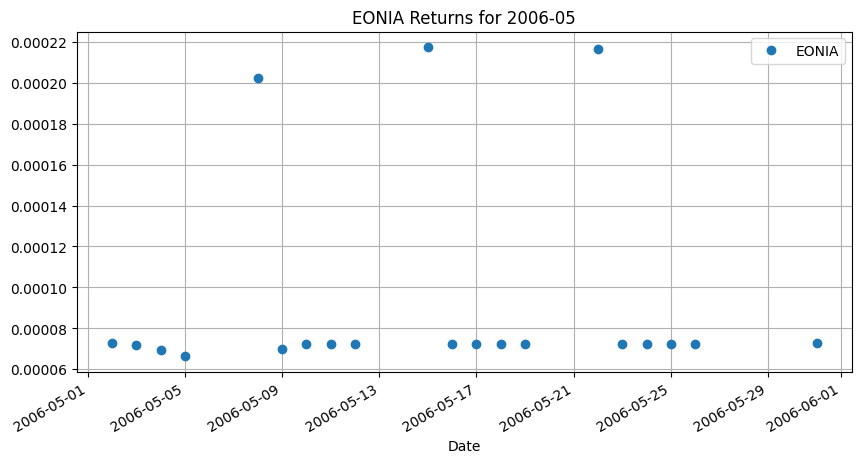

In [4]:
month = '2006-05'  # Change this to the desired year and month (YYYY-MM)
filtered_df = returns_df.loc[month]

# Plot
filtered_df.plot(y='EONIA', marker='o', linestyle='', figsize=(10, 5), grid=True, title=f"EONIA Returns for {month}")



<Axes: xlabel='Date'>

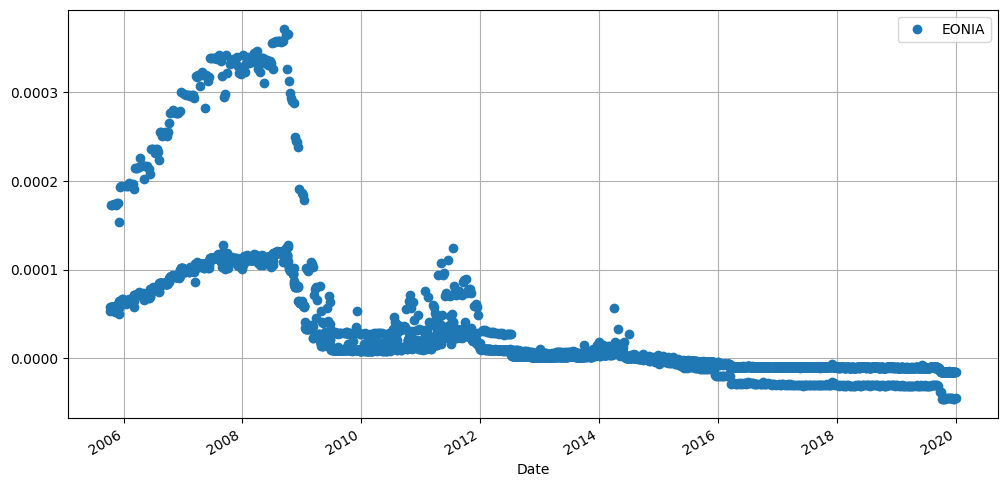

In [5]:
returns_df.plot(y='EONIA', marker='o', linestyle='', figsize=(12,6), grid=True)

In [6]:

from gan10 import GAN10


for asset_name in returns_df.columns:
    print(f"Training WGAN for {asset_name}...")
    asset_returns = returns_df[asset_name]
    
    # Create WGAN instance for the current asset
    gan = GAN10(asset_returns, asset_name)
    
    # Train WGAN for this asset
    gan.train()
    
    print(f"Finished training WGAN for {asset_name}.\n")


Training WGAN for EONIA...


C:\Users\nicka\compute-farm\machine_4\gan10.py:87: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  recency_loss = F.mse_loss(gen_returns.mean(dim=1), real_returns.mean(dim=1))  # Match recent mean trend


[Epoch 0/2000] [Batch 0/25] [D loss: -0.049345627427101135] [G loss: -0.2361600548028946] [Recency Loss: 1.2681828737258911]


[Epoch 0/2000] [Batch 10/25] [D loss: -0.07365626841783524] [G loss: -0.03056914359331131] [Recency Loss: 1.2672760486602783]


[Epoch 0/2000] [Batch 20/25] [D loss: -0.1637827455997467] [G loss: 0.04370580613613129] [Recency Loss: 1.2660505771636963]


C:\Users\nicka\compute-farm\machine_4\gan10.py:87: UserWarning: Using a target size (torch.Size([115, 1])) that is different to the input size (torch.Size([115])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  recency_loss = F.mse_loss(gen_returns.mean(dim=1), real_returns.mean(dim=1))  # Match recent mean trend


[Epoch 1/2000] [Batch 0/25] [D loss: -0.16938726603984833] [G loss: 0.13936126232147217] [Recency Loss: 1.2644479274749756]


[Epoch 1/2000] [Batch 10/25] [D loss: -0.3444949686527252] [G loss: 0.21369193494319916] [Recency Loss: 1.2627179622650146]


[Epoch 1/2000] [Batch 20/25] [D loss: -0.47571927309036255] [G loss: 0.42050668597221375] [Recency Loss: 1.2620474100112915]
[Epoch 2/2000] [Batch 0/25] [D loss: -0.620556116104126] [G loss: 0.5580261945724487] [Recency Loss: 1.2597181797027588]


[Epoch 2/2000] [Batch 10/25] [D loss: -0.9044243097305298] [G loss: 0.7632699608802795] [Recency Loss: 1.2583181858062744]


[Epoch 2/2000] [Batch 20/25] [D loss: -1.2158372402191162] [G loss: 0.8163540959358215] [Recency Loss: 1.2579395771026611]
[Epoch 3/2000] [Batch 0/25] [D loss: -1.3755402565002441] [G loss: 1.1345399618148804] [Recency Loss: 1.2552049160003662]


[Epoch 3/2000] [Batch 10/25] [D loss: -1.7904497385025024] [G loss: 1.4146087169647217] [Recency Loss: 1.2545216083526611]


[Epoch 3/2000] [Batch 20/25] [D loss: -2.1690216064453125] [G loss: 1.706544041633606] [Recency Loss: 1.2522432804107666]
[Epoch 4/2000] [Batch 0/25] [D loss: -2.6670920848846436] [G loss: 2.0143492221832275] [Recency Loss: 1.2512034177780151]


[Epoch 4/2000] [Batch 10/25] [D loss: -3.5684633255004883] [G loss: 2.477252960205078] [Recency Loss: 1.2491527795791626]


[Epoch 4/2000] [Batch 20/25] [D loss: -4.425454139709473] [G loss: 2.6125144958496094] [Recency Loss: 1.2488652467727661]
[Epoch 5/2000] [Batch 0/25] [D loss: -4.531458854675293] [G loss: 3.330381393432617] [Recency Loss: 1.2466411590576172]


[Epoch 5/2000] [Batch 10/25] [D loss: -5.708248615264893] [G loss: 3.9219648838043213] [Recency Loss: 1.2451046705245972]


[Epoch 5/2000] [Batch 20/25] [D loss: -7.203031539916992] [G loss: 4.429843425750732] [Recency Loss: 1.2425012588500977]
[Epoch 6/2000] [Batch 0/25] [D loss: -7.58544921875] [G loss: 4.78501033782959] [Recency Loss: 1.2418766021728516]


[Epoch 6/2000] [Batch 10/25] [D loss: -8.952442169189453] [G loss: 5.5823564529418945] [Recency Loss: 1.2410385608673096]


[Epoch 6/2000] [Batch 20/25] [D loss: -10.64579963684082] [G loss: 6.144741058349609] [Recency Loss: 1.239497423171997]
[Epoch 7/2000] [Batch 0/25] [D loss: -11.308717727661133] [G loss: 6.78286075592041] [Recency Loss: 1.2384774684906006]


[Epoch 7/2000] [Batch 10/25] [D loss: -12.533863067626953] [G loss: 7.285724639892578] [Recency Loss: 1.237223505973816]


[Epoch 7/2000] [Batch 20/25] [D loss: -13.291996002197266] [G loss: 7.854713439941406] [Recency Loss: 1.2358959913253784]
[Epoch 8/2000] [Batch 0/25] [D loss: -15.825818061828613] [G loss: 8.998714447021484] [Recency Loss: 1.234053134918213]


[Epoch 8/2000] [Batch 10/25] [D loss: -17.92864990234375] [G loss: 9.536786079406738] [Recency Loss: 1.2325286865234375]


[Epoch 8/2000] [Batch 20/25] [D loss: -19.954708099365234] [G loss: 9.857733726501465] [Recency Loss: 1.231812596321106]
[Epoch 9/2000] [Batch 0/25] [D loss: -21.05011749267578] [G loss: 11.174788475036621] [Recency Loss: 1.2297931909561157]


[Epoch 9/2000] [Batch 10/25] [D loss: -22.566354751586914] [G loss: 11.558958053588867] [Recency Loss: 1.228896975517273]


[Epoch 9/2000] [Batch 20/25] [D loss: -25.300426483154297] [G loss: 12.932799339294434] [Recency Loss: 1.2266871929168701]
[Epoch 10/2000] [Batch 0/25] [D loss: -24.820926666259766] [G loss: 12.734536170959473] [Recency Loss: 1.2258681058883667]


[Epoch 10/2000] [Batch 10/25] [D loss: -28.68621063232422] [G loss: 14.048028945922852] [Recency Loss: 1.2240643501281738]


[Epoch 10/2000] [Batch 20/25] [D loss: -31.401386260986328] [G loss: 12.983599662780762] [Recency Loss: 1.2238144874572754]
[Epoch 11/2000] [Batch 0/25] [D loss: -31.57658576965332] [G loss: 16.23606300354004] [Recency Loss: 1.2220683097839355]


[Epoch 11/2000] [Batch 10/25] [D loss: -34.49156188964844] [G loss: 18.18902015686035] [Recency Loss: 1.2195568084716797]


[Epoch 11/2000] [Batch 20/25] [D loss: -36.09388732910156] [G loss: 18.750791549682617] [Recency Loss: 1.2167890071868896]
[Epoch 12/2000] [Batch 0/25] [D loss: -38.72600555419922] [G loss: 19.0113525390625] [Recency Loss: 1.216687798500061]


[Epoch 12/2000] [Batch 10/25] [D loss: -39.36006546020508] [G loss: 20.519611358642578] [Recency Loss: 1.2156789302825928]


[Epoch 12/2000] [Batch 20/25] [D loss: -42.55244445800781] [G loss: 20.605438232421875] [Recency Loss: 1.2147177457809448]
[Epoch 13/2000] [Batch 0/25] [D loss: -44.856510162353516] [G loss: 22.53606605529785] [Recency Loss: 1.2126994132995605]


[Epoch 13/2000] [Batch 10/25] [D loss: -49.110069274902344] [G loss: 22.938379287719727] [Recency Loss: 1.2122745513916016]


[Epoch 13/2000] [Batch 20/25] [D loss: -51.863807678222656] [G loss: 25.08466911315918] [Recency Loss: 1.2093313932418823]
[Epoch 14/2000] [Batch 0/25] [D loss: -53.680397033691406] [G loss: 27.010774612426758] [Recency Loss: 1.208122968673706]


[Epoch 14/2000] [Batch 10/25] [D loss: -55.70988845825195] [G loss: 27.14713478088379] [Recency Loss: 1.2065763473510742]


[Epoch 14/2000] [Batch 20/25] [D loss: -59.878318786621094] [G loss: 28.62249755859375] [Recency Loss: 1.2057396173477173]
[Epoch 15/2000] [Batch 0/25] [D loss: -60.682701110839844] [G loss: 30.095539093017578] [Recency Loss: 1.2038389444351196]


[Epoch 15/2000] [Batch 10/25] [D loss: -63.3092155456543] [G loss: 31.03319549560547] [Recency Loss: 1.20212984085083]


[Epoch 15/2000] [Batch 20/25] [D loss: -66.95027160644531] [G loss: 29.631359100341797] [Recency Loss: 1.2017934322357178]
[Epoch 16/2000] [Batch 0/25] [D loss: -70.82827758789062] [G loss: 34.35961151123047] [Recency Loss: 1.1997371912002563]


[Epoch 16/2000] [Batch 10/25] [D loss: -72.16390991210938] [G loss: 34.952579498291016] [Recency Loss: 1.1979670524597168]


[Epoch 16/2000] [Batch 20/25] [D loss: -72.21794128417969] [G loss: 36.5867919921875] [Recency Loss: 1.1961227655410767]
[Epoch 17/2000] [Batch 0/25] [D loss: -73.58406829833984] [G loss: 36.491607666015625] [Recency Loss: 1.1966525316238403]


[Epoch 17/2000] [Batch 10/25] [D loss: -80.2750244140625] [G loss: 40.69083023071289] [Recency Loss: 1.1930406093597412]


[Epoch 17/2000] [Batch 20/25] [D loss: -83.87455749511719] [G loss: 35.0705680847168] [Recency Loss: 1.1938984394073486]
[Epoch 18/2000] [Batch 0/25] [D loss: -85.79328918457031] [G loss: 42.664276123046875] [Recency Loss: 1.1908328533172607]


[Epoch 18/2000] [Batch 10/25] [D loss: -86.50743865966797] [G loss: 40.66462326049805] [Recency Loss: 1.1895281076431274]


[Epoch 18/2000] [Batch 20/25] [D loss: -92.06977844238281] [G loss: 44.562896728515625] [Recency Loss: 1.1884185075759888]
[Epoch 19/2000] [Batch 0/25] [D loss: -87.44085693359375] [G loss: 42.40857696533203] [Recency Loss: 1.1883466243743896]


[Epoch 19/2000] [Batch 10/25] [D loss: -94.62565612792969] [G loss: 47.439334869384766] [Recency Loss: 1.1847715377807617]


[Epoch 19/2000] [Batch 20/25] [D loss: -103.91043090820312] [G loss: 45.90666580200195] [Recency Loss: 1.1836464405059814]
[Epoch 20/2000] [Batch 0/25] [D loss: -107.43293762207031] [G loss: 49.810516357421875] [Recency Loss: 1.1818774938583374]


[Epoch 20/2000] [Batch 10/25] [D loss: -103.4503173828125] [G loss: 51.73283004760742] [Recency Loss: 1.1799434423446655]


[Epoch 20/2000] [Batch 20/25] [D loss: -106.25801086425781] [G loss: 50.0184211730957] [Recency Loss: 1.1793746948242188]
[Epoch 21/2000] [Batch 0/25] [D loss: -108.27764892578125] [G loss: 50.78340530395508] [Recency Loss: 1.1789368391036987]


[Epoch 21/2000] [Batch 10/25] [D loss: -115.63136291503906] [G loss: 55.7376708984375] [Recency Loss: 1.1767578125]


[Epoch 21/2000] [Batch 20/25] [D loss: -118.67710876464844] [G loss: 58.483829498291016] [Recency Loss: 1.1761295795440674]


[Epoch 22/2000] [Batch 0/25] [D loss: -112.00090026855469] [G loss: 52.430908203125] [Recency Loss: 1.174442172050476]


[Epoch 22/2000] [Batch 10/25] [D loss: -131.10675048828125] [G loss: 59.15643310546875] [Recency Loss: 1.1729110479354858]


[Epoch 22/2000] [Batch 20/25] [D loss: -129.13771057128906] [G loss: 59.828468322753906] [Recency Loss: 1.1717627048492432]
[Epoch 23/2000] [Batch 0/25] [D loss: -131.9447479248047] [G loss: 61.34627151489258] [Recency Loss: 1.1690332889556885]


[Epoch 23/2000] [Batch 10/25] [D loss: -136.364501953125] [G loss: 63.87163162231445] [Recency Loss: 1.1693179607391357]


[Epoch 23/2000] [Batch 20/25] [D loss: -144.49032592773438] [G loss: 68.24337768554688] [Recency Loss: 1.1681263446807861]


[Epoch 24/2000] [Batch 0/25] [D loss: -141.20680236816406] [G loss: 65.17411804199219] [Recency Loss: 1.1681268215179443]


[Epoch 24/2000] [Batch 10/25] [D loss: -152.3695831298828] [G loss: 68.56200408935547] [Recency Loss: 1.1649396419525146]


[Epoch 24/2000] [Batch 20/25] [D loss: -146.69732666015625] [G loss: 71.57171630859375] [Recency Loss: 1.163154125213623]
[Epoch 25/2000] [Batch 0/25] [D loss: -151.10049438476562] [G loss: 67.86628723144531] [Recency Loss: 1.162865400314331]


[Epoch 25/2000] [Batch 10/25] [D loss: -164.91624450683594] [G loss: 78.2092514038086] [Recency Loss: 1.1610527038574219]


[Epoch 25/2000] [Batch 20/25] [D loss: -152.31451416015625] [G loss: 76.3156509399414] [Recency Loss: 1.1584773063659668]
[Epoch 26/2000] [Batch 0/25] [D loss: -171.550537109375] [G loss: 78.20738983154297] [Recency Loss: 1.1569054126739502]


[Epoch 26/2000] [Batch 10/25] [D loss: -173.90782165527344] [G loss: 84.29602813720703] [Recency Loss: 1.156014323234558]


[Epoch 26/2000] [Batch 20/25] [D loss: -169.87014770507812] [G loss: 81.20789337158203] [Recency Loss: 1.1556655168533325]
[Epoch 27/2000] [Batch 0/25] [D loss: -180.77975463867188] [G loss: 82.62747955322266] [Recency Loss: 1.1508915424346924]


[Epoch 27/2000] [Batch 10/25] [D loss: -178.5352783203125] [G loss: 85.86478424072266] [Recency Loss: 1.1488730907440186]


[Epoch 27/2000] [Batch 20/25] [D loss: -194.86305236816406] [G loss: 86.14753723144531] [Recency Loss: 1.1492596864700317]


[Epoch 28/2000] [Batch 0/25] [D loss: -189.8682098388672] [G loss: 90.34376525878906] [Recency Loss: 1.147592306137085]


[Epoch 28/2000] [Batch 10/25] [D loss: -198.9488067626953] [G loss: 94.86575317382812] [Recency Loss: 1.146078109741211]


[Epoch 28/2000] [Batch 20/25] [D loss: -202.90093994140625] [G loss: 96.14812469482422] [Recency Loss: 1.1444175243377686]
[Epoch 29/2000] [Batch 0/25] [D loss: -211.45550537109375] [G loss: 99.85607147216797] [Recency Loss: 1.143305778503418]


[Epoch 29/2000] [Batch 10/25] [D loss: -226.9856414794922] [G loss: 97.14163208007812] [Recency Loss: 1.1413575410842896]


[Epoch 29/2000] [Batch 20/25] [D loss: -218.850341796875] [G loss: 101.23625946044922] [Recency Loss: 1.1399928331375122]


[Epoch 30/2000] [Batch 0/25] [D loss: -220.99368286132812] [G loss: 103.5035629272461] [Recency Loss: 1.1376466751098633]


[Epoch 30/2000] [Batch 10/25] [D loss: -229.08575439453125] [G loss: 101.77587890625] [Recency Loss: 1.136252522468567]


[Epoch 30/2000] [Batch 20/25] [D loss: -227.63467407226562] [G loss: 111.07903289794922] [Recency Loss: 1.1343896389007568]
[Epoch 31/2000] [Batch 0/25] [D loss: -239.22369384765625] [G loss: 114.17375183105469] [Recency Loss: 1.1327295303344727]


[Epoch 31/2000] [Batch 10/25] [D loss: -245.8963623046875] [G loss: 112.59803771972656] [Recency Loss: 1.129805326461792]


[Epoch 31/2000] [Batch 20/25] [D loss: -234.79261779785156] [G loss: 113.23275756835938] [Recency Loss: 1.1278585195541382]
[Epoch 32/2000] [Batch 0/25] [D loss: -256.92352294921875] [G loss: 117.82005310058594] [Recency Loss: 1.1257187128067017]


[Epoch 32/2000] [Batch 10/25] [D loss: -257.3908996582031] [G loss: 111.03353881835938] [Recency Loss: 1.1264276504516602]


[Epoch 32/2000] [Batch 20/25] [D loss: -259.8305358886719] [G loss: 120.05121612548828] [Recency Loss: 1.1237376928329468]


[Epoch 33/2000] [Batch 0/25] [D loss: -263.723388671875] [G loss: 120.9891357421875] [Recency Loss: 1.1224936246871948]


[Epoch 33/2000] [Batch 10/25] [D loss: -271.4483337402344] [G loss: 130.9940643310547] [Recency Loss: 1.1197013854980469]


[Epoch 33/2000] [Batch 20/25] [D loss: -287.9581298828125] [G loss: 129.20306396484375] [Recency Loss: 1.11860191822052]
[Epoch 34/2000] [Batch 0/25] [D loss: -290.8125915527344] [G loss: 133.1065673828125] [Recency Loss: 1.117258071899414]


[Epoch 34/2000] [Batch 10/25] [D loss: -284.3778076171875] [G loss: 135.7078399658203] [Recency Loss: 1.1163634061813354]


[Epoch 34/2000] [Batch 20/25] [D loss: -288.7025146484375] [G loss: 130.068603515625] [Recency Loss: 1.115923285484314]
[Epoch 35/2000] [Batch 0/25] [D loss: -306.919189453125] [G loss: 140.12355041503906] [Recency Loss: 1.1149351596832275]


[Epoch 35/2000] [Batch 10/25] [D loss: -306.5518798828125] [G loss: 138.8773956298828] [Recency Loss: 1.1128380298614502]


[Epoch 35/2000] [Batch 20/25] [D loss: -307.4859313964844] [G loss: 143.38626098632812] [Recency Loss: 1.1106412410736084]
[Epoch 36/2000] [Batch 0/25] [D loss: -285.20556640625] [G loss: 129.16024780273438] [Recency Loss: 1.1085625886917114]


[Epoch 36/2000] [Batch 10/25] [D loss: -324.3050537109375] [G loss: 143.77760314941406] [Recency Loss: 1.10736083984375]


[Epoch 36/2000] [Batch 20/25] [D loss: -332.49267578125] [G loss: 151.48101806640625] [Recency Loss: 1.1076909303665161]


[Epoch 37/2000] [Batch 0/25] [D loss: -320.449951171875] [G loss: 154.56256103515625] [Recency Loss: 1.1060981750488281]


[Epoch 37/2000] [Batch 10/25] [D loss: -345.98968505859375] [G loss: 160.1766357421875] [Recency Loss: 1.1021788120269775]


[Epoch 37/2000] [Batch 20/25] [D loss: -343.3271484375] [G loss: 156.91455078125] [Recency Loss: 1.1023653745651245]
[Epoch 38/2000] [Batch 0/25] [D loss: -330.1798095703125] [G loss: 156.43255615234375] [Recency Loss: 1.1008670330047607]


[Epoch 38/2000] [Batch 10/25] [D loss: -365.41632080078125] [G loss: 176.33612060546875] [Recency Loss: 1.0987573862075806]


[Epoch 38/2000] [Batch 20/25] [D loss: -348.9249267578125] [G loss: 155.38429260253906] [Recency Loss: 1.0949718952178955]
[Epoch 39/2000] [Batch 0/25] [D loss: -365.76763916015625] [G loss: 169.11045837402344] [Recency Loss: 1.0957579612731934]


[Epoch 39/2000] [Batch 10/25] [D loss: -379.115966796875] [G loss: 172.18621826171875] [Recency Loss: 1.097884178161621]


[Epoch 39/2000] [Batch 20/25] [D loss: -369.174072265625] [G loss: 183.06533813476562] [Recency Loss: 1.0926194190979004]
[Epoch 40/2000] [Batch 0/25] [D loss: -390.4375] [G loss: 178.14344787597656] [Recency Loss: 1.0945442914962769]


[Epoch 40/2000] [Batch 10/25] [D loss: -389.1629638671875] [G loss: 184.1744842529297] [Recency Loss: 1.0929279327392578]


[Epoch 40/2000] [Batch 20/25] [D loss: -410.0696716308594] [G loss: 178.9324951171875] [Recency Loss: 1.0879658460617065]
[Epoch 41/2000] [Batch 0/25] [D loss: -393.4917297363281] [G loss: 179.97042846679688] [Recency Loss: 1.0862120389938354]


[Epoch 41/2000] [Batch 10/25] [D loss: -419.721435546875] [G loss: 190.85484313964844] [Recency Loss: 1.0838871002197266]


[Epoch 41/2000] [Batch 20/25] [D loss: -413.4706726074219] [G loss: 184.3480987548828] [Recency Loss: 1.0867736339569092]
[Epoch 42/2000] [Batch 0/25] [D loss: -406.8440246582031] [G loss: 194.6169891357422] [Recency Loss: 1.0808604955673218]


[Epoch 42/2000] [Batch 10/25] [D loss: -418.1441650390625] [G loss: 196.6978759765625] [Recency Loss: 1.082472562789917]


[Epoch 42/2000] [Batch 20/25] [D loss: -443.8582763671875] [G loss: 204.39492797851562] [Recency Loss: 1.0805870294570923]
[Epoch 43/2000] [Batch 0/25] [D loss: -409.611083984375] [G loss: 201.7596435546875] [Recency Loss: 1.0790457725524902]


[Epoch 43/2000] [Batch 10/25] [D loss: -450.69573974609375] [G loss: 208.4583740234375] [Recency Loss: 1.08404541015625]


[Epoch 43/2000] [Batch 20/25] [D loss: -455.4628601074219] [G loss: 207.535400390625] [Recency Loss: 1.0739538669586182]
[Epoch 44/2000] [Batch 0/25] [D loss: -479.30291748046875] [G loss: 224.31851196289062] [Recency Loss: 1.0750609636306763]


[Epoch 44/2000] [Batch 10/25] [D loss: -468.3782653808594] [G loss: 229.7541961669922] [Recency Loss: 1.0694477558135986]


[Epoch 44/2000] [Batch 20/25] [D loss: -477.3776550292969] [G loss: 224.03372192382812] [Recency Loss: 1.0672225952148438]
[Epoch 45/2000] [Batch 0/25] [D loss: -494.51934814453125] [G loss: 225.90975952148438] [Recency Loss: 1.0715837478637695]


[Epoch 45/2000] [Batch 10/25] [D loss: -495.0973205566406] [G loss: 215.5146942138672] [Recency Loss: 1.0652477741241455]


[Epoch 45/2000] [Batch 20/25] [D loss: -516.968505859375] [G loss: 229.77374267578125] [Recency Loss: 1.067335605621338]
[Epoch 46/2000] [Batch 0/25] [D loss: -515.5969848632812] [G loss: 232.2857666015625] [Recency Loss: 1.0726203918457031]


[Epoch 46/2000] [Batch 10/25] [D loss: -495.47650146484375] [G loss: 235.42832946777344] [Recency Loss: 1.0615750551223755]


[Epoch 46/2000] [Batch 20/25] [D loss: -498.13604736328125] [G loss: 231.318603515625] [Recency Loss: 1.0622389316558838]


[Epoch 47/2000] [Batch 0/25] [D loss: -534.6376953125] [G loss: 248.65725708007812] [Recency Loss: 1.0591659545898438]


[Epoch 47/2000] [Batch 10/25] [D loss: -524.6832275390625] [G loss: 254.40048217773438] [Recency Loss: 1.0597764253616333]


[Epoch 47/2000] [Batch 20/25] [D loss: -508.8040771484375] [G loss: 243.5150146484375] [Recency Loss: 1.0559707880020142]
[Epoch 48/2000] [Batch 0/25] [D loss: -536.7305908203125] [G loss: 253.2716522216797] [Recency Loss: 1.0572556257247925]


[Epoch 48/2000] [Batch 10/25] [D loss: -553.5899047851562] [G loss: 266.0696105957031] [Recency Loss: 1.0506607294082642]


[Epoch 48/2000] [Batch 20/25] [D loss: -551.283447265625] [G loss: 267.2854309082031] [Recency Loss: 1.0547993183135986]
[Epoch 49/2000] [Batch 0/25] [D loss: -561.5142822265625] [G loss: 256.9751281738281] [Recency Loss: 1.0526726245880127]


[Epoch 49/2000] [Batch 10/25] [D loss: -551.296875] [G loss: 270.45361328125] [Recency Loss: 1.0499919652938843]


[Epoch 49/2000] [Batch 20/25] [D loss: -595.7271728515625] [G loss: 266.8256530761719] [Recency Loss: 1.0457699298858643]
[Epoch 50/2000] [Batch 0/25] [D loss: -587.3460693359375] [G loss: 271.5646667480469] [Recency Loss: 1.0457013845443726]


[Epoch 50/2000] [Batch 10/25] [D loss: -584.1922607421875] [G loss: 269.6329345703125] [Recency Loss: 1.0501108169555664]


[Epoch 50/2000] [Batch 20/25] [D loss: -585.2452392578125] [G loss: 276.328857421875] [Recency Loss: 1.0465915203094482]
[Epoch 51/2000] [Batch 0/25] [D loss: -606.0806884765625] [G loss: 280.9716796875] [Recency Loss: 1.046152949333191]


[Epoch 51/2000] [Batch 10/25] [D loss: -608.2557983398438] [G loss: 276.84454345703125] [Recency Loss: 1.0386021137237549]


[Epoch 51/2000] [Batch 20/25] [D loss: -611.946044921875] [G loss: 282.1972351074219] [Recency Loss: 1.038055181503296]
[Epoch 52/2000] [Batch 0/25] [D loss: -602.2304077148438] [G loss: 281.377685546875] [Recency Loss: 1.0341213941574097]


[Epoch 52/2000] [Batch 10/25] [D loss: -669.0925903320312] [G loss: 287.3359680175781] [Recency Loss: 1.0360510349273682]


[Epoch 52/2000] [Batch 20/25] [D loss: -637.9743041992188] [G loss: 321.3733215332031] [Recency Loss: 1.0340651273727417]
[Epoch 53/2000] [Batch 0/25] [D loss: -643.3079833984375] [G loss: 302.5189208984375] [Recency Loss: 1.0380268096923828]


[Epoch 53/2000] [Batch 10/25] [D loss: -659.5538940429688] [G loss: 295.699462890625] [Recency Loss: 1.0384087562561035]


[Epoch 53/2000] [Batch 20/25] [D loss: -650.0923461914062] [G loss: 285.73040771484375] [Recency Loss: 1.0456715822219849]


[Epoch 54/2000] [Batch 0/25] [D loss: -696.673583984375] [G loss: 329.3356628417969] [Recency Loss: 1.023496150970459]


[Epoch 54/2000] [Batch 10/25] [D loss: -712.6119384765625] [G loss: 334.6072998046875] [Recency Loss: 1.0202665328979492]


[Epoch 54/2000] [Batch 20/25] [D loss: -700.551025390625] [G loss: 334.7008972167969] [Recency Loss: 1.0339155197143555]
[Epoch 55/2000] [Batch 0/25] [D loss: -683.5911865234375] [G loss: 317.9457092285156] [Recency Loss: 1.03081214427948]


[Epoch 55/2000] [Batch 10/25] [D loss: -722.7115478515625] [G loss: 326.53277587890625] [Recency Loss: 1.0293155908584595]


[Epoch 55/2000] [Batch 20/25] [D loss: -707.7613525390625] [G loss: 346.390869140625] [Recency Loss: 1.015730857849121]
[Epoch 56/2000] [Batch 0/25] [D loss: -705.105224609375] [G loss: 334.7626953125] [Recency Loss: 1.0056264400482178]


[Epoch 56/2000] [Batch 10/25] [D loss: -760.5205078125] [G loss: 354.4764099121094] [Recency Loss: 1.0263527631759644]


[Epoch 56/2000] [Batch 20/25] [D loss: -753.05029296875] [G loss: 359.6395263671875] [Recency Loss: 1.0209450721740723]
[Epoch 57/2000] [Batch 0/25] [D loss: -756.51416015625] [G loss: 361.59063720703125] [Recency Loss: 1.0258647203445435]


[Epoch 57/2000] [Batch 10/25] [D loss: -768.691650390625] [G loss: 335.2264099121094] [Recency Loss: 1.001157283782959]


[Epoch 57/2000] [Batch 20/25] [D loss: -788.8211669921875] [G loss: 368.6624450683594] [Recency Loss: 1.016817569732666]
[Epoch 58/2000] [Batch 0/25] [D loss: -790.572021484375] [G loss: 358.0688781738281] [Recency Loss: 1.0128319263458252]


[Epoch 58/2000] [Batch 10/25] [D loss: -776.1160278320312] [G loss: 389.4421691894531] [Recency Loss: 1.0022608041763306]


[Epoch 58/2000] [Batch 20/25] [D loss: -806.3212890625] [G loss: 331.7017822265625] [Recency Loss: 1.0017880201339722]
[Epoch 59/2000] [Batch 0/25] [D loss: -807.99853515625] [G loss: 369.33453369140625] [Recency Loss: 0.9996193647384644]


[Epoch 59/2000] [Batch 10/25] [D loss: -796.779541015625] [G loss: 356.9271545410156] [Recency Loss: 1.0066365003585815]


[Epoch 59/2000] [Batch 20/25] [D loss: -816.6499633789062] [G loss: 367.06982421875] [Recency Loss: 0.9980524778366089]
[Epoch 60/2000] [Batch 0/25] [D loss: -779.239501953125] [G loss: 368.9906005859375] [Recency Loss: 1.0051558017730713]


[Epoch 60/2000] [Batch 10/25] [D loss: -853.067626953125] [G loss: 377.51214599609375] [Recency Loss: 0.9920692443847656]


[Epoch 60/2000] [Batch 20/25] [D loss: -836.1283569335938] [G loss: 392.1336364746094] [Recency Loss: 0.9823411703109741]
[Epoch 61/2000] [Batch 0/25] [D loss: -841.5654296875] [G loss: 385.1602783203125] [Recency Loss: 0.9983645081520081]


[Epoch 61/2000] [Batch 10/25] [D loss: -847.8685913085938] [G loss: 386.12359619140625] [Recency Loss: 0.9869480133056641]


[Epoch 61/2000] [Batch 20/25] [D loss: -877.4181518554688] [G loss: 395.70965576171875] [Recency Loss: 0.9813069701194763]
[Epoch 62/2000] [Batch 0/25] [D loss: -889.4739990234375] [G loss: 406.452392578125] [Recency Loss: 0.9841560125350952]


[Epoch 62/2000] [Batch 10/25] [D loss: -892.6119384765625] [G loss: 395.72393798828125] [Recency Loss: 0.9852575659751892]


[Epoch 62/2000] [Batch 20/25] [D loss: -786.8939208984375] [G loss: 405.7548522949219] [Recency Loss: 0.97958904504776]
[Epoch 63/2000] [Batch 0/25] [D loss: -868.9474487304688] [G loss: 393.98223876953125] [Recency Loss: 0.9815139174461365]


[Epoch 63/2000] [Batch 10/25] [D loss: -928.3159790039062] [G loss: 423.90667724609375] [Recency Loss: 0.9768632650375366]


[Epoch 63/2000] [Batch 20/25] [D loss: -926.5528564453125] [G loss: 437.6929016113281] [Recency Loss: 0.9632641077041626]
[Epoch 64/2000] [Batch 0/25] [D loss: -929.0007934570312] [G loss: 433.5810546875] [Recency Loss: 0.9805972576141357]


[Epoch 64/2000] [Batch 10/25] [D loss: -971.763671875] [G loss: 412.3958740234375] [Recency Loss: 0.9766658544540405]


[Epoch 64/2000] [Batch 20/25] [D loss: -926.9237060546875] [G loss: 434.0661926269531] [Recency Loss: 0.9654744863510132]
[Epoch 65/2000] [Batch 0/25] [D loss: -921.7454833984375] [G loss: 422.2356872558594] [Recency Loss: 0.9703697562217712]


[Epoch 65/2000] [Batch 10/25] [D loss: -925.9444580078125] [G loss: 454.2603759765625] [Recency Loss: 0.9579784274101257]


[Epoch 65/2000] [Batch 20/25] [D loss: -983.0039672851562] [G loss: 423.3725891113281] [Recency Loss: 0.9744837284088135]
[Epoch 66/2000] [Batch 0/25] [D loss: -1012.7724609375] [G loss: 479.524658203125] [Recency Loss: 0.9653195738792419]


[Epoch 66/2000] [Batch 10/25] [D loss: -970.7120361328125] [G loss: 456.6700744628906] [Recency Loss: 0.9634135961532593]


[Epoch 66/2000] [Batch 20/25] [D loss: -1005.4998779296875] [G loss: 452.6680603027344] [Recency Loss: 0.9632588624954224]
[Epoch 67/2000] [Batch 0/25] [D loss: -1049.81884765625] [G loss: 478.46929931640625] [Recency Loss: 0.9598380923271179]


[Epoch 67/2000] [Batch 10/25] [D loss: -1030.587646484375] [G loss: 487.31378173828125] [Recency Loss: 0.964350700378418]


[Epoch 67/2000] [Batch 20/25] [D loss: -1038.4080810546875] [G loss: 487.2900390625] [Recency Loss: 0.9675129055976868]
[Epoch 68/2000] [Batch 0/25] [D loss: -1027.025146484375] [G loss: 456.41229248046875] [Recency Loss: 0.9679409265518188]


[Epoch 68/2000] [Batch 10/25] [D loss: -1103.4697265625] [G loss: 484.7883605957031] [Recency Loss: 0.9673639535903931]


[Epoch 68/2000] [Batch 20/25] [D loss: -1099.8427734375] [G loss: 509.9460144042969] [Recency Loss: 0.9659363627433777]
[Epoch 69/2000] [Batch 0/25] [D loss: -1084.72265625] [G loss: 499.9408264160156] [Recency Loss: 0.9583418965339661]


[Epoch 69/2000] [Batch 10/25] [D loss: -1099.3465576171875] [G loss: 500.0085754394531] [Recency Loss: 0.9574358463287354]


[Epoch 69/2000] [Batch 20/25] [D loss: -1105.269775390625] [G loss: 525.6284790039062] [Recency Loss: 0.9547492265701294]


[Epoch 70/2000] [Batch 0/25] [D loss: -1114.6083984375] [G loss: 505.77490234375] [Recency Loss: 0.9602932333946228]


[Epoch 70/2000] [Batch 10/25] [D loss: -1143.044921875] [G loss: 513.8429565429688] [Recency Loss: 0.9573556780815125]


[Epoch 70/2000] [Batch 20/25] [D loss: -1143.578857421875] [G loss: 497.7882995605469] [Recency Loss: 0.9603577256202698]


[Epoch 71/2000] [Batch 0/25] [D loss: -1149.2630615234375] [G loss: 515.0816650390625] [Recency Loss: 0.9637852311134338]


[Epoch 71/2000] [Batch 10/25] [D loss: -1194.3984375] [G loss: 526.2116088867188] [Recency Loss: 0.962871789932251]


[Epoch 71/2000] [Batch 20/25] [D loss: -1207.9354248046875] [G loss: 517.6776733398438] [Recency Loss: 0.9546475410461426]


[Epoch 72/2000] [Batch 0/25] [D loss: -1194.8402099609375] [G loss: 575.3948364257812] [Recency Loss: 0.9672918319702148]


[Epoch 72/2000] [Batch 10/25] [D loss: -1187.450927734375] [G loss: 522.0894775390625] [Recency Loss: 0.9624685049057007]


[Epoch 72/2000] [Batch 20/25] [D loss: -1204.347412109375] [G loss: 559.8104248046875] [Recency Loss: 0.9534993767738342]
[Epoch 73/2000] [Batch 0/25] [D loss: -1226.812744140625] [G loss: 560.5172729492188] [Recency Loss: 0.9487844109535217]


[Epoch 73/2000] [Batch 10/25] [D loss: -1199.6756591796875] [G loss: 567.1885986328125] [Recency Loss: 0.9606426358222961]


[Epoch 73/2000] [Batch 20/25] [D loss: -1281.8154296875] [G loss: 571.7691040039062] [Recency Loss: 0.947860836982727]


[Epoch 74/2000] [Batch 0/25] [D loss: -1285.06689453125] [G loss: 586.153564453125] [Recency Loss: 0.9674115180969238]


[Epoch 74/2000] [Batch 10/25] [D loss: -1229.80224609375] [G loss: 586.6671752929688] [Recency Loss: 0.9591226577758789]


[Epoch 74/2000] [Batch 20/25] [D loss: -1302.3045654296875] [G loss: 522.183837890625] [Recency Loss: 0.9655311703681946]
[Epoch 75/2000] [Batch 0/25] [D loss: -1278.332763671875] [G loss: 591.7343139648438] [Recency Loss: 0.9490544199943542]


[Epoch 75/2000] [Batch 10/25] [D loss: -1260.9776611328125] [G loss: 613.3704223632812] [Recency Loss: 0.9511096477508545]


[Epoch 75/2000] [Batch 20/25] [D loss: -1302.678955078125] [G loss: 601.4093017578125] [Recency Loss: 0.9508898258209229]


[Epoch 76/2000] [Batch 0/25] [D loss: -1320.4755859375] [G loss: 601.6860961914062] [Recency Loss: 0.9590557813644409]


[Epoch 76/2000] [Batch 10/25] [D loss: -1328.50830078125] [G loss: 635.691162109375] [Recency Loss: 0.9569668173789978]


[Epoch 76/2000] [Batch 20/25] [D loss: -1336.2867431640625] [G loss: 602.7735595703125] [Recency Loss: 0.9544298052787781]


[Epoch 77/2000] [Batch 0/25] [D loss: -1348.9676513671875] [G loss: 616.1504516601562] [Recency Loss: 0.9434893131256104]


[Epoch 77/2000] [Batch 10/25] [D loss: -1383.4410400390625] [G loss: 624.3279418945312] [Recency Loss: 0.9607181549072266]


[Epoch 77/2000] [Batch 20/25] [D loss: -1361.0435791015625] [G loss: 643.3011474609375] [Recency Loss: 0.9564923644065857]
[Epoch 78/2000] [Batch 0/25] [D loss: -1382.9385986328125] [G loss: 630.0817260742188] [Recency Loss: 0.948421835899353]


[Epoch 78/2000] [Batch 10/25] [D loss: -1383.54638671875] [G loss: 636.6030883789062] [Recency Loss: 0.9630693793296814]


[Epoch 78/2000] [Batch 20/25] [D loss: -1382.086669921875] [G loss: 664.9747314453125] [Recency Loss: 0.9500501155853271]
[Epoch 79/2000] [Batch 0/25] [D loss: -1424.5185546875] [G loss: 658.8583374023438] [Recency Loss: 0.9401144981384277]


[Epoch 79/2000] [Batch 10/25] [D loss: -1411.730712890625] [G loss: 676.8187255859375] [Recency Loss: 0.9667036533355713]


[Epoch 79/2000] [Batch 20/25] [D loss: -1481.618896484375] [G loss: 651.2897338867188] [Recency Loss: 0.9501428604125977]
[Epoch 80/2000] [Batch 0/25] [D loss: -1516.4315185546875] [G loss: 712.103759765625] [Recency Loss: 0.9535367488861084]


[Epoch 80/2000] [Batch 10/25] [D loss: -1495.580322265625] [G loss: 639.7528076171875] [Recency Loss: 0.9608472585678101]


[Epoch 80/2000] [Batch 20/25] [D loss: -1522.2913818359375] [G loss: 681.6976318359375] [Recency Loss: 0.9707368016242981]
[Epoch 81/2000] [Batch 0/25] [D loss: -1549.0546875] [G loss: 709.3264770507812] [Recency Loss: 0.9591638445854187]


[Epoch 81/2000] [Batch 10/25] [D loss: -1486.851806640625] [G loss: 662.6506958007812] [Recency Loss: 0.9414328932762146]


[Epoch 81/2000] [Batch 20/25] [D loss: -1522.060302734375] [G loss: 713.36572265625] [Recency Loss: 0.9658095836639404]


[Epoch 82/2000] [Batch 0/25] [D loss: -1528.654052734375] [G loss: 710.478271484375] [Recency Loss: 0.9431922435760498]


[Epoch 82/2000] [Batch 10/25] [D loss: -1504.4874267578125] [G loss: 756.456298828125] [Recency Loss: 0.9456449747085571]


[Epoch 82/2000] [Batch 20/25] [D loss: -1517.191650390625] [G loss: 725.4909057617188] [Recency Loss: 0.9607212543487549]
[Epoch 83/2000] [Batch 0/25] [D loss: -1577.3568115234375] [G loss: 724.0330810546875] [Recency Loss: 0.9423650503158569]


[Epoch 83/2000] [Batch 10/25] [D loss: -1610.13525390625] [G loss: 789.260986328125] [Recency Loss: 0.9414703249931335]


[Epoch 83/2000] [Batch 20/25] [D loss: -1658.677978515625] [G loss: 758.4830932617188] [Recency Loss: 0.9464160799980164]
[Epoch 84/2000] [Batch 0/25] [D loss: -1653.996337890625] [G loss: 732.5239868164062] [Recency Loss: 0.9419270753860474]


[Epoch 84/2000] [Batch 10/25] [D loss: -1630.950927734375] [G loss: 766.1741333007812] [Recency Loss: 0.9332083463668823]


[Epoch 84/2000] [Batch 20/25] [D loss: -1705.272216796875] [G loss: 780.6704711914062] [Recency Loss: 0.937374472618103]
[Epoch 85/2000] [Batch 0/25] [D loss: -1619.77490234375] [G loss: 739.6466064453125] [Recency Loss: 0.9380485415458679]


[Epoch 85/2000] [Batch 10/25] [D loss: -1646.75244140625] [G loss: 809.9473266601562] [Recency Loss: 0.938485860824585]


[Epoch 85/2000] [Batch 20/25] [D loss: -1722.461669921875] [G loss: 760.206298828125] [Recency Loss: 0.9463554620742798]


[Epoch 86/2000] [Batch 0/25] [D loss: -1685.8431396484375] [G loss: 792.6566162109375] [Recency Loss: 0.9385316371917725]


[Epoch 86/2000] [Batch 10/25] [D loss: -1721.5115966796875] [G loss: 824.2640991210938] [Recency Loss: 0.9400308728218079]


[Epoch 86/2000] [Batch 20/25] [D loss: -1711.693115234375] [G loss: 789.9611206054688] [Recency Loss: 0.9485419392585754]
[Epoch 87/2000] [Batch 0/25] [D loss: -1793.049560546875] [G loss: 864.3768310546875] [Recency Loss: 0.9493634700775146]


[Epoch 87/2000] [Batch 10/25] [D loss: -1684.73681640625] [G loss: 823.2733764648438] [Recency Loss: 0.9336353540420532]


[Epoch 87/2000] [Batch 20/25] [D loss: -1704.7845458984375] [G loss: 829.3965454101562] [Recency Loss: 0.9259235858917236]
[Epoch 88/2000] [Batch 0/25] [D loss: -1785.277099609375] [G loss: 823.6036987304688] [Recency Loss: 0.9419238567352295]


[Epoch 88/2000] [Batch 10/25] [D loss: -1825.455810546875] [G loss: 813.4378662109375] [Recency Loss: 0.9394334554672241]


[Epoch 88/2000] [Batch 20/25] [D loss: -1788.95654296875] [G loss: 843.182861328125] [Recency Loss: 0.9316346645355225]
[Epoch 89/2000] [Batch 0/25] [D loss: -1854.521240234375] [G loss: 851.5023803710938] [Recency Loss: 0.9254580736160278]


[Epoch 89/2000] [Batch 10/25] [D loss: -1790.350341796875] [G loss: 854.72900390625] [Recency Loss: 0.9197312593460083]


[Epoch 89/2000] [Batch 20/25] [D loss: -1904.3011474609375] [G loss: 857.0820922851562] [Recency Loss: 0.9342659711837769]
[Epoch 90/2000] [Batch 0/25] [D loss: -1923.458984375] [G loss: 898.14892578125] [Recency Loss: 0.9363009929656982]


[Epoch 90/2000] [Batch 10/25] [D loss: -1870.125] [G loss: 890.3157348632812] [Recency Loss: 0.9282885789871216]


[Epoch 90/2000] [Batch 20/25] [D loss: -1848.05322265625] [G loss: 909.9924926757812] [Recency Loss: 0.9356053471565247]
[Epoch 91/2000] [Batch 0/25] [D loss: -1934.748291015625] [G loss: 906.041748046875] [Recency Loss: 0.936737596988678]


[Epoch 91/2000] [Batch 10/25] [D loss: -1973.7115478515625] [G loss: 833.84375] [Recency Loss: 0.9216247200965881]


[Epoch 91/2000] [Batch 20/25] [D loss: -1963.02587890625] [G loss: 912.2263793945312] [Recency Loss: 0.9210290908813477]
[Epoch 92/2000] [Batch 0/25] [D loss: -2001.6470947265625] [G loss: 895.5503540039062] [Recency Loss: 0.92083740234375]


[Epoch 92/2000] [Batch 10/25] [D loss: -1949.1463623046875] [G loss: 890.7870483398438] [Recency Loss: 0.922889769077301]


[Epoch 92/2000] [Batch 20/25] [D loss: -1907.9940185546875] [G loss: 954.1802978515625] [Recency Loss: 0.9230327010154724]
[Epoch 93/2000] [Batch 0/25] [D loss: -1927.788330078125] [G loss: 919.103759765625] [Recency Loss: 0.9102453589439392]


[Epoch 93/2000] [Batch 10/25] [D loss: -2062.64794921875] [G loss: 940.8804931640625] [Recency Loss: 0.9087483882904053]


[Epoch 93/2000] [Batch 20/25] [D loss: -2000.7108154296875] [G loss: 964.0431518554688] [Recency Loss: 0.9088314771652222]
[Epoch 94/2000] [Batch 0/25] [D loss: -1989.849853515625] [G loss: 941.9168090820312] [Recency Loss: 0.9177662134170532]


[Epoch 94/2000] [Batch 10/25] [D loss: -1993.709716796875] [G loss: 950.9562377929688] [Recency Loss: 0.9166289567947388]


[Epoch 94/2000] [Batch 20/25] [D loss: -2092.49755859375] [G loss: 919.921142578125] [Recency Loss: 0.9157368540763855]
[Epoch 95/2000] [Batch 0/25] [D loss: -2076.81005859375] [G loss: 957.8720703125] [Recency Loss: 0.9093536138534546]


[Epoch 95/2000] [Batch 10/25] [D loss: -1936.010009765625] [G loss: 933.100341796875] [Recency Loss: 0.9023067355155945]


[Epoch 95/2000] [Batch 20/25] [D loss: -2119.1123046875] [G loss: 1012.4652099609375] [Recency Loss: 0.918480634689331]
[Epoch 96/2000] [Batch 0/25] [D loss: -2196.881103515625] [G loss: 1028.8006591796875] [Recency Loss: 0.9027873277664185]


[Epoch 96/2000] [Batch 10/25] [D loss: -2179.38818359375] [G loss: 991.9544067382812] [Recency Loss: 0.9111780524253845]


[Epoch 96/2000] [Batch 20/25] [D loss: -2086.81298828125] [G loss: 978.08984375] [Recency Loss: 0.9297124743461609]
[Epoch 97/2000] [Batch 0/25] [D loss: -2141.803466796875] [G loss: 1021.6649169921875] [Recency Loss: 0.899967610836029]


[Epoch 97/2000] [Batch 10/25] [D loss: -2224.30712890625] [G loss: 1028.5382080078125] [Recency Loss: 0.9199193716049194]


[Epoch 97/2000] [Batch 20/25] [D loss: -2226.758056640625] [G loss: 969.3085327148438] [Recency Loss: 0.9330673217773438]
[Epoch 98/2000] [Batch 0/25] [D loss: -2238.26806640625] [G loss: 1038.4078369140625] [Recency Loss: 0.9079153537750244]


[Epoch 98/2000] [Batch 10/25] [D loss: -2204.79736328125] [G loss: 1026.4761962890625] [Recency Loss: 0.9017915725708008]


[Epoch 98/2000] [Batch 20/25] [D loss: -2280.212646484375] [G loss: 1082.4991455078125] [Recency Loss: 0.9073212146759033]
[Epoch 99/2000] [Batch 0/25] [D loss: -2240.9814453125] [G loss: 1043.4449462890625] [Recency Loss: 0.9034653902053833]


[Epoch 99/2000] [Batch 10/25] [D loss: -2179.355224609375] [G loss: 1055.9554443359375] [Recency Loss: 0.914306104183197]


[Epoch 99/2000] [Batch 20/25] [D loss: -2286.03369140625] [G loss: 1039.95263671875] [Recency Loss: 0.8924081921577454]
[Epoch 100/2000] [Batch 0/25] [D loss: -2250.590087890625] [G loss: 1030.0924072265625] [Recency Loss: 0.8885679244995117]


[Epoch 100/2000] [Batch 10/25] [D loss: -2233.8994140625] [G loss: 1045.845947265625] [Recency Loss: 0.890769362449646]


[Epoch 100/2000] [Batch 20/25] [D loss: -2369.61083984375] [G loss: 1036.30517578125] [Recency Loss: 0.907109260559082]


[Epoch 101/2000] [Batch 0/25] [D loss: -2279.5107421875] [G loss: 1029.828857421875] [Recency Loss: 0.9063504338264465]


[Epoch 101/2000] [Batch 10/25] [D loss: -2380.47021484375] [G loss: 1116.2796630859375] [Recency Loss: 0.8911176323890686]


[Epoch 101/2000] [Batch 20/25] [D loss: -2319.8173828125] [G loss: 1131.580322265625] [Recency Loss: 0.8744114637374878]
[Epoch 102/2000] [Batch 0/25] [D loss: -2380.06005859375] [G loss: 1130.418212890625] [Recency Loss: 0.8990142941474915]


[Epoch 102/2000] [Batch 10/25] [D loss: -2460.4326171875] [G loss: 1134.4376220703125] [Recency Loss: 0.9011939764022827]


[Epoch 102/2000] [Batch 20/25] [D loss: -2529.35888671875] [G loss: 1133.99072265625] [Recency Loss: 0.8916302919387817]
[Epoch 103/2000] [Batch 0/25] [D loss: -2319.42919921875] [G loss: 1059.5704345703125] [Recency Loss: 0.8742270469665527]


[Epoch 103/2000] [Batch 10/25] [D loss: -2515.50634765625] [G loss: 1122.63232421875] [Recency Loss: 0.9198923110961914]


[Epoch 103/2000] [Batch 20/25] [D loss: -2534.61669921875] [G loss: 1149.875] [Recency Loss: 0.9049302935600281]


[Epoch 104/2000] [Batch 0/25] [D loss: -2336.4033203125] [G loss: 1063.8724365234375] [Recency Loss: 0.89321368932724]


[Epoch 104/2000] [Batch 10/25] [D loss: -2446.3154296875] [G loss: 1089.1026611328125] [Recency Loss: 0.881547749042511]


[Epoch 104/2000] [Batch 20/25] [D loss: -2573.1865234375] [G loss: 1090.9932861328125] [Recency Loss: 0.9028970003128052]
[Epoch 105/2000] [Batch 0/25] [D loss: -2514.523193359375] [G loss: 1185.48388671875] [Recency Loss: 0.8710523843765259]


[Epoch 105/2000] [Batch 10/25] [D loss: -2636.83544921875] [G loss: 1091.9735107421875] [Recency Loss: 0.8942738175392151]


[Epoch 105/2000] [Batch 20/25] [D loss: -2605.2734375] [G loss: 1250.11083984375] [Recency Loss: 0.8703140616416931]
[Epoch 106/2000] [Batch 0/25] [D loss: -2641.216064453125] [G loss: 1214.0687255859375] [Recency Loss: 0.8824223875999451]


[Epoch 106/2000] [Batch 10/25] [D loss: -2539.697998046875] [G loss: 1240.26904296875] [Recency Loss: 0.8928433656692505]


[Epoch 106/2000] [Batch 20/25] [D loss: -2622.9716796875] [G loss: 1173.364501953125] [Recency Loss: 0.8792546987533569]


[Epoch 107/2000] [Batch 0/25] [D loss: -2765.99462890625] [G loss: 1262.730712890625] [Recency Loss: 0.8744482398033142]


[Epoch 107/2000] [Batch 10/25] [D loss: -2758.633544921875] [G loss: 1186.317138671875] [Recency Loss: 0.9002794027328491]


[Epoch 107/2000] [Batch 20/25] [D loss: -2691.22216796875] [G loss: 1247.2850341796875] [Recency Loss: 0.8718608617782593]
[Epoch 108/2000] [Batch 0/25] [D loss: -2689.12451171875] [G loss: 1275.506103515625] [Recency Loss: 0.8884216547012329]


[Epoch 108/2000] [Batch 10/25] [D loss: -2800.65771484375] [G loss: 1302.6744384765625] [Recency Loss: 0.866065502166748]


[Epoch 108/2000] [Batch 20/25] [D loss: -2631.94970703125] [G loss: 1272.634765625] [Recency Loss: 0.8622378706932068]
[Epoch 109/2000] [Batch 0/25] [D loss: -2817.8232421875] [G loss: 1292.1466064453125] [Recency Loss: 0.8842772841453552]


[Epoch 109/2000] [Batch 10/25] [D loss: -2738.92822265625] [G loss: 1292.032958984375] [Recency Loss: 0.880473256111145]


[Epoch 109/2000] [Batch 20/25] [D loss: -2758.64599609375] [G loss: 1311.33935546875] [Recency Loss: 0.86931312084198]
[Epoch 110/2000] [Batch 0/25] [D loss: -2877.959716796875] [G loss: 1355.2061767578125] [Recency Loss: 0.8662465810775757]


[Epoch 110/2000] [Batch 10/25] [D loss: -2811.02978515625] [G loss: 1326.894775390625] [Recency Loss: 0.8740963935852051]


[Epoch 110/2000] [Batch 20/25] [D loss: -2522.390625] [G loss: 1349.8651123046875] [Recency Loss: 0.8669930100440979]
[Epoch 111/2000] [Batch 0/25] [D loss: -2725.142822265625] [G loss: 1298.162353515625] [Recency Loss: 0.8614164590835571]


[Epoch 111/2000] [Batch 10/25] [D loss: -2919.15380859375] [G loss: 1380.0203857421875] [Recency Loss: 0.8541746139526367]


[Epoch 111/2000] [Batch 20/25] [D loss: -2959.444091796875] [G loss: 1347.1219482421875] [Recency Loss: 0.8421156406402588]
[Epoch 112/2000] [Batch 0/25] [D loss: -2792.278076171875] [G loss: 1278.96044921875] [Recency Loss: 0.8532716631889343]


[Epoch 112/2000] [Batch 10/25] [D loss: -2910.76904296875] [G loss: 1364.703369140625] [Recency Loss: 0.8704432845115662]


[Epoch 112/2000] [Batch 20/25] [D loss: -2959.33349609375] [G loss: 1375.6322021484375] [Recency Loss: 0.8654694557189941]
[Epoch 113/2000] [Batch 0/25] [D loss: -2968.83203125] [G loss: 1345.2662353515625] [Recency Loss: 0.8400287628173828]


[Epoch 113/2000] [Batch 10/25] [D loss: -3060.034423828125] [G loss: 1412.477783203125] [Recency Loss: 0.8496773838996887]


[Epoch 113/2000] [Batch 20/25] [D loss: -3068.3740234375] [G loss: 1381.3251953125] [Recency Loss: 0.8579733371734619]
[Epoch 114/2000] [Batch 0/25] [D loss: -2925.32177734375] [G loss: 1398.0509033203125] [Recency Loss: 0.8389164805412292]


[Epoch 114/2000] [Batch 10/25] [D loss: -3093.819580078125] [G loss: 1326.853515625] [Recency Loss: 0.8517764806747437]


[Epoch 114/2000] [Batch 20/25] [D loss: -2837.3642578125] [G loss: 1314.2142333984375] [Recency Loss: 0.8332276344299316]
[Epoch 115/2000] [Batch 0/25] [D loss: -3047.718994140625] [G loss: 1442.865478515625] [Recency Loss: 0.8548880815505981]


[Epoch 115/2000] [Batch 10/25] [D loss: -2980.27734375] [G loss: 1469.910400390625] [Recency Loss: 0.8523672819137573]


[Epoch 115/2000] [Batch 20/25] [D loss: -3141.32763671875] [G loss: 1501.2386474609375] [Recency Loss: 0.8471991419792175]
[Epoch 116/2000] [Batch 0/25] [D loss: -3238.187744140625] [G loss: 1525.69873046875] [Recency Loss: 0.841766357421875]


[Epoch 116/2000] [Batch 10/25] [D loss: -3283.649169921875] [G loss: 1521.9730224609375] [Recency Loss: 0.8388050198554993]


[Epoch 116/2000] [Batch 20/25] [D loss: -3179.737060546875] [G loss: 1538.6142578125] [Recency Loss: 0.8351851105690002]
[Epoch 117/2000] [Batch 0/25] [D loss: -3103.083984375] [G loss: 1469.5311279296875] [Recency Loss: 0.8406401872634888]


[Epoch 117/2000] [Batch 10/25] [D loss: -3212.2548828125] [G loss: 1541.237548828125] [Recency Loss: 0.8520703911781311]


[Epoch 117/2000] [Batch 20/25] [D loss: -3064.4384765625] [G loss: 1510.31787109375] [Recency Loss: 0.835246741771698]
[Epoch 118/2000] [Batch 0/25] [D loss: -3219.66455078125] [G loss: 1489.101806640625] [Recency Loss: 0.8442237377166748]


[Epoch 118/2000] [Batch 10/25] [D loss: -3232.759521484375] [G loss: 1554.4287109375] [Recency Loss: 0.8307095170021057]


[Epoch 118/2000] [Batch 20/25] [D loss: -3114.4052734375] [G loss: 1524.8515625] [Recency Loss: 0.8309283256530762]


[Epoch 119/2000] [Batch 0/25] [D loss: -3201.278564453125] [G loss: 1489.413330078125] [Recency Loss: 0.8371785879135132]


[Epoch 119/2000] [Batch 10/25] [D loss: -3300.5673828125] [G loss: 1595.077880859375] [Recency Loss: 0.8256593346595764]


[Epoch 119/2000] [Batch 20/25] [D loss: -3179.040771484375] [G loss: 1548.3223876953125] [Recency Loss: 0.8347922563552856]
[Epoch 120/2000] [Batch 0/25] [D loss: -3439.3857421875] [G loss: 1610.886474609375] [Recency Loss: 0.8377330303192139]


[Epoch 120/2000] [Batch 10/25] [D loss: -3388.087646484375] [G loss: 1580.10498046875] [Recency Loss: 0.8254155516624451]


[Epoch 120/2000] [Batch 20/25] [D loss: -3314.505859375] [G loss: 1641.633544921875] [Recency Loss: 0.8151898980140686]
[Epoch 121/2000] [Batch 0/25] [D loss: -3331.5947265625] [G loss: 1558.461669921875] [Recency Loss: 0.8142600059509277]


[Epoch 121/2000] [Batch 10/25] [D loss: -3428.72265625] [G loss: 1586.0386962890625] [Recency Loss: 0.8403207063674927]


[Epoch 121/2000] [Batch 20/25] [D loss: -3476.1845703125] [G loss: 1620.7186279296875] [Recency Loss: 0.8534805178642273]
[Epoch 122/2000] [Batch 0/25] [D loss: -3502.34814453125] [G loss: 1583.82470703125] [Recency Loss: 0.8352839946746826]


[Epoch 122/2000] [Batch 10/25] [D loss: -3343.2568359375] [G loss: 1647.96533203125] [Recency Loss: 0.8125061392784119]


[Epoch 122/2000] [Batch 20/25] [D loss: -3446.177490234375] [G loss: 1645.50390625] [Recency Loss: 0.8357205390930176]
[Epoch 123/2000] [Batch 0/25] [D loss: -3460.73486328125] [G loss: 1612.865966796875] [Recency Loss: 0.8224835395812988]


[Epoch 123/2000] [Batch 10/25] [D loss: -3463.763427734375] [G loss: 1727.6962890625] [Recency Loss: 0.8257167339324951]


[Epoch 123/2000] [Batch 20/25] [D loss: -3629.458984375] [G loss: 1701.7540283203125] [Recency Loss: 0.8026289343833923]
[Epoch 124/2000] [Batch 0/25] [D loss: -3634.09228515625] [G loss: 1679.2218017578125] [Recency Loss: 0.8221409916877747]


[Epoch 124/2000] [Batch 10/25] [D loss: -3519.6259765625] [G loss: 1628.9697265625] [Recency Loss: 0.8176169395446777]


[Epoch 124/2000] [Batch 20/25] [D loss: -3738.73291015625] [G loss: 1685.86865234375] [Recency Loss: 0.8106101751327515]
[Epoch 125/2000] [Batch 0/25] [D loss: -3751.53369140625] [G loss: 1780.3153076171875] [Recency Loss: 0.8240485787391663]


[Epoch 125/2000] [Batch 10/25] [D loss: -3685.75244140625] [G loss: 1752.68896484375] [Recency Loss: 0.8216665983200073]


[Epoch 125/2000] [Batch 20/25] [D loss: -3817.52392578125] [G loss: 1769.100830078125] [Recency Loss: 0.8091678023338318]
[Epoch 126/2000] [Batch 0/25] [D loss: -3784.828125] [G loss: 1752.1239013671875] [Recency Loss: 0.8293662071228027]


[Epoch 126/2000] [Batch 10/25] [D loss: -3848.946044921875] [G loss: 1711.7392578125] [Recency Loss: 0.7970758080482483]


[Epoch 126/2000] [Batch 20/25] [D loss: -3793.34130859375] [G loss: 1713.229248046875] [Recency Loss: 0.8002233505249023]
[Epoch 127/2000] [Batch 0/25] [D loss: -3797.35205078125] [G loss: 1754.1123046875] [Recency Loss: 0.8159722089767456]


[Epoch 127/2000] [Batch 10/25] [D loss: -3932.86376953125] [G loss: 1798.2796630859375] [Recency Loss: 0.8424563407897949]


[Epoch 127/2000] [Batch 20/25] [D loss: -3974.953125] [G loss: 1842.7821044921875] [Recency Loss: 0.8161078691482544]
[Epoch 128/2000] [Batch 0/25] [D loss: -3822.604736328125] [G loss: 1791.8009033203125] [Recency Loss: 0.8106081485748291]


[Epoch 128/2000] [Batch 10/25] [D loss: -3966.57666015625] [G loss: 1829.482666015625] [Recency Loss: 0.8337607383728027]


[Epoch 128/2000] [Batch 20/25] [D loss: -3941.962646484375] [G loss: 1731.499755859375] [Recency Loss: 0.8275027275085449]


[Epoch 129/2000] [Batch 0/25] [D loss: -3961.283203125] [G loss: 1893.2978515625] [Recency Loss: 0.8249988555908203]


[Epoch 129/2000] [Batch 10/25] [D loss: -3785.111572265625] [G loss: 1826.224365234375] [Recency Loss: 0.8273884057998657]


[Epoch 129/2000] [Batch 20/25] [D loss: -3912.912109375] [G loss: 1834.194580078125] [Recency Loss: 0.8040229082107544]
[Epoch 130/2000] [Batch 0/25] [D loss: -4028.4091796875] [G loss: 1941.5294189453125] [Recency Loss: 0.8264761567115784]


[Epoch 130/2000] [Batch 10/25] [D loss: -3956.5986328125] [G loss: 1903.5579833984375] [Recency Loss: 0.7975796461105347]


[Epoch 130/2000] [Batch 20/25] [D loss: -4055.376708984375] [G loss: 1943.041259765625] [Recency Loss: 0.8141802549362183]
[Epoch 131/2000] [Batch 0/25] [D loss: -3966.7294921875] [G loss: 1879.87890625] [Recency Loss: 0.8153097629547119]


[Epoch 131/2000] [Batch 10/25] [D loss: -4092.416015625] [G loss: 1956.1690673828125] [Recency Loss: 0.8256036043167114]


[Epoch 131/2000] [Batch 20/25] [D loss: -4225.0439453125] [G loss: 1943.246826171875] [Recency Loss: 0.8293073177337646]
[Epoch 132/2000] [Batch 0/25] [D loss: -3987.54150390625] [G loss: 1837.65185546875] [Recency Loss: 0.8042371273040771]


[Epoch 132/2000] [Batch 10/25] [D loss: -4282.69140625] [G loss: 1929.9033203125] [Recency Loss: 0.8114657998085022]


[Epoch 132/2000] [Batch 20/25] [D loss: -4288.9990234375] [G loss: 1818.007568359375] [Recency Loss: 0.8058144450187683]
[Epoch 133/2000] [Batch 0/25] [D loss: -4126.154296875] [G loss: 1937.5450439453125] [Recency Loss: 0.8196788430213928]


[Epoch 133/2000] [Batch 10/25] [D loss: -4078.658203125] [G loss: 1991.0572509765625] [Recency Loss: 0.8281080722808838]


[Epoch 133/2000] [Batch 20/25] [D loss: -4283.5556640625] [G loss: 1923.5972900390625] [Recency Loss: 0.8070558309555054]


[Epoch 134/2000] [Batch 0/25] [D loss: -4207.40478515625] [G loss: 1970.4207763671875] [Recency Loss: 0.8368755578994751]


[Epoch 134/2000] [Batch 10/25] [D loss: -4279.375] [G loss: 1976.5096435546875] [Recency Loss: 0.8293811678886414]


[Epoch 134/2000] [Batch 20/25] [D loss: -4182.251953125] [G loss: 2005.41357421875] [Recency Loss: 0.8087945580482483]
[Epoch 135/2000] [Batch 0/25] [D loss: -4311.767578125] [G loss: 2027.632080078125] [Recency Loss: 0.812937319278717]


[Epoch 135/2000] [Batch 10/25] [D loss: -4351.4150390625] [G loss: 2099.781982421875] [Recency Loss: 0.8161438703536987]


[Epoch 135/2000] [Batch 20/25] [D loss: -4461.8515625] [G loss: 2062.928466796875] [Recency Loss: 0.8382741808891296]
[Epoch 136/2000] [Batch 0/25] [D loss: -4225.50341796875] [G loss: 2009.562744140625] [Recency Loss: 0.805289089679718]


[Epoch 136/2000] [Batch 10/25] [D loss: -4379.177734375] [G loss: 2015.6986083984375] [Recency Loss: 0.8068556785583496]


[Epoch 136/2000] [Batch 20/25] [D loss: -4362.30224609375] [G loss: 2051.955078125] [Recency Loss: 0.7978101968765259]


[Epoch 137/2000] [Batch 0/25] [D loss: -4427.2333984375] [G loss: 2061.17041015625] [Recency Loss: 0.842901349067688]


[Epoch 137/2000] [Batch 10/25] [D loss: -4535.13330078125] [G loss: 2176.619384765625] [Recency Loss: 0.8245772123336792]


[Epoch 137/2000] [Batch 20/25] [D loss: -4619.0234375] [G loss: 2146.1953125] [Recency Loss: 0.8020265102386475]


[Epoch 138/2000] [Batch 0/25] [D loss: -4326.203125] [G loss: 2015.0577392578125] [Recency Loss: 0.7891892194747925]


[Epoch 138/2000] [Batch 10/25] [D loss: -4407.0693359375] [G loss: 2097.980712890625] [Recency Loss: 0.8190913200378418]


[Epoch 138/2000] [Batch 20/25] [D loss: -4460.353515625] [G loss: 2123.8603515625] [Recency Loss: 0.8107498288154602]


[Epoch 139/2000] [Batch 0/25] [D loss: -4645.951171875] [G loss: 2207.048095703125] [Recency Loss: 0.8145697116851807]


[Epoch 139/2000] [Batch 10/25] [D loss: -4637.578125] [G loss: 2194.3623046875] [Recency Loss: 0.7892853021621704]


[Epoch 139/2000] [Batch 20/25] [D loss: -4568.5302734375] [G loss: 2143.426025390625] [Recency Loss: 0.8120036125183105]
[Epoch 140/2000] [Batch 0/25] [D loss: -4414.3525390625] [G loss: 2082.83984375] [Recency Loss: 0.7973363399505615]


[Epoch 140/2000] [Batch 10/25] [D loss: -4564.96337890625] [G loss: 2276.0390625] [Recency Loss: 0.8106260299682617]


[Epoch 140/2000] [Batch 20/25] [D loss: -4679.42431640625] [G loss: 2178.873046875] [Recency Loss: 0.8333624601364136]
[Epoch 141/2000] [Batch 0/25] [D loss: -4792.13671875] [G loss: 2277.479248046875] [Recency Loss: 0.7955003976821899]


[Epoch 141/2000] [Batch 10/25] [D loss: -4827.3955078125] [G loss: 2173.9423828125] [Recency Loss: 0.8089026808738708]


[Epoch 141/2000] [Batch 20/25] [D loss: -4827.0712890625] [G loss: 2215.08056640625] [Recency Loss: 0.7968802452087402]
[Epoch 142/2000] [Batch 0/25] [D loss: -4780.828125] [G loss: 2362.7177734375] [Recency Loss: 0.8138771653175354]


[Epoch 142/2000] [Batch 10/25] [D loss: -4841.7470703125] [G loss: 2296.724609375] [Recency Loss: 0.8180028796195984]


[Epoch 142/2000] [Batch 20/25] [D loss: -4828.90478515625] [G loss: 2328.67138671875] [Recency Loss: 0.8080253005027771]


[Epoch 143/2000] [Batch 0/25] [D loss: -4942.50341796875] [G loss: 2342.30322265625] [Recency Loss: 0.7896273136138916]


[Epoch 143/2000] [Batch 10/25] [D loss: -4611.60205078125] [G loss: 2305.9111328125] [Recency Loss: 0.8134416341781616]


[Epoch 143/2000] [Batch 20/25] [D loss: -4926.2021484375] [G loss: 2251.5322265625] [Recency Loss: 0.8172451257705688]
[Epoch 144/2000] [Batch 0/25] [D loss: -5052.7705078125] [G loss: 2436.578369140625] [Recency Loss: 0.781158983707428]


[Epoch 144/2000] [Batch 10/25] [D loss: -4979.7490234375] [G loss: 2267.157958984375] [Recency Loss: 0.8286982774734497]


[Epoch 144/2000] [Batch 20/25] [D loss: -5044.37646484375] [G loss: 2389.0693359375] [Recency Loss: 0.7927276492118835]


[Epoch 145/2000] [Batch 0/25] [D loss: -4551.18994140625] [G loss: 2049.001953125] [Recency Loss: 0.8081129193305969]


[Epoch 145/2000] [Batch 10/25] [D loss: -4872.572265625] [G loss: 2306.71142578125] [Recency Loss: 0.7910489439964294]


[Epoch 145/2000] [Batch 20/25] [D loss: -4910.1630859375] [G loss: 2367.436279296875] [Recency Loss: 0.794120728969574]
[Epoch 146/2000] [Batch 0/25] [D loss: -4849.931640625] [G loss: 2322.4677734375] [Recency Loss: 0.8145492076873779]


[Epoch 146/2000] [Batch 10/25] [D loss: -5007.8779296875] [G loss: 2490.3466796875] [Recency Loss: 0.7797657251358032]


[Epoch 146/2000] [Batch 20/25] [D loss: -5208.27978515625] [G loss: 2468.820068359375] [Recency Loss: 0.8000709414482117]
[Epoch 147/2000] [Batch 0/25] [D loss: -5032.6630859375] [G loss: 2348.561767578125] [Recency Loss: 0.7948927283287048]


[Epoch 147/2000] [Batch 10/25] [D loss: -5244.26416015625] [G loss: 2448.84326171875] [Recency Loss: 0.8103449940681458]


[Epoch 147/2000] [Batch 20/25] [D loss: -5199.17822265625] [G loss: 2478.901611328125] [Recency Loss: 0.8067946434020996]
[Epoch 148/2000] [Batch 0/25] [D loss: -5200.5234375] [G loss: 2450.36767578125] [Recency Loss: 0.8070764541625977]


[Epoch 148/2000] [Batch 10/25] [D loss: -5229.43212890625] [G loss: 2470.956298828125] [Recency Loss: 0.7910579442977905]


[Epoch 148/2000] [Batch 20/25] [D loss: -5158.4521484375] [G loss: 2414.245361328125] [Recency Loss: 0.7924335598945618]
[Epoch 149/2000] [Batch 0/25] [D loss: -4991.49365234375] [G loss: 2339.897216796875] [Recency Loss: 0.8224654197692871]


[Epoch 149/2000] [Batch 10/25] [D loss: -5213.5791015625] [G loss: 2569.484130859375] [Recency Loss: 0.8038426041603088]


[Epoch 149/2000] [Batch 20/25] [D loss: -5166.33984375] [G loss: 2588.085205078125] [Recency Loss: 0.7959723472595215]


[Epoch 150/2000] [Batch 0/25] [D loss: -5321.087890625] [G loss: 2556.022705078125] [Recency Loss: 0.8089739680290222]


[Epoch 150/2000] [Batch 10/25] [D loss: -5397.73388671875] [G loss: 2558.76171875] [Recency Loss: 0.7833802700042725]


[Epoch 150/2000] [Batch 20/25] [D loss: -5341.3671875] [G loss: 2434.754638671875] [Recency Loss: 0.8013489842414856]
[Epoch 151/2000] [Batch 0/25] [D loss: -5345.2353515625] [G loss: 2520.63720703125] [Recency Loss: 0.8172417283058167]


[Epoch 151/2000] [Batch 10/25] [D loss: -5398.0244140625] [G loss: 2603.74072265625] [Recency Loss: 0.7925154566764832]


[Epoch 151/2000] [Batch 20/25] [D loss: -5444.01123046875] [G loss: 2555.22119140625] [Recency Loss: 0.7606580853462219]


[Epoch 152/2000] [Batch 0/25] [D loss: -5253.14208984375] [G loss: 2530.619384765625] [Recency Loss: 0.7841069102287292]


[Epoch 152/2000] [Batch 10/25] [D loss: -5596.88671875] [G loss: 2583.564697265625] [Recency Loss: 0.7828176617622375]


[Epoch 152/2000] [Batch 20/25] [D loss: -5695.947265625] [G loss: 2571.933349609375] [Recency Loss: 0.7840659022331238]
[Epoch 153/2000] [Batch 0/25] [D loss: -5512.607421875] [G loss: 2619.059326171875] [Recency Loss: 0.7589718103408813]


[Epoch 153/2000] [Batch 10/25] [D loss: -5575.8828125] [G loss: 2679.6435546875] [Recency Loss: 0.8032661080360413]


[Epoch 153/2000] [Batch 20/25] [D loss: -5534.4423828125] [G loss: 2578.283447265625] [Recency Loss: 0.7891157865524292]
[Epoch 154/2000] [Batch 0/25] [D loss: -5824.96728515625] [G loss: 2719.45458984375] [Recency Loss: 0.8014599084854126]


[Epoch 154/2000] [Batch 10/25] [D loss: -5806.03125] [G loss: 2669.243896484375] [Recency Loss: 0.7544329166412354]


[Epoch 154/2000] [Batch 20/25] [D loss: -5699.5048828125] [G loss: 2751.439697265625] [Recency Loss: 0.7824008464813232]
[Epoch 155/2000] [Batch 0/25] [D loss: -5743.8154296875] [G loss: 2740.11279296875] [Recency Loss: 0.7900573015213013]


[Epoch 155/2000] [Batch 10/25] [D loss: -5695.49267578125] [G loss: 2722.39013671875] [Recency Loss: 0.8028541207313538]


[Epoch 155/2000] [Batch 20/25] [D loss: -5511.06689453125] [G loss: 2801.487548828125] [Recency Loss: 0.7796633839607239]
[Epoch 156/2000] [Batch 0/25] [D loss: -5754.486328125] [G loss: 2684.8662109375] [Recency Loss: 0.7565008997917175]


[Epoch 156/2000] [Batch 10/25] [D loss: -5843.6787109375] [G loss: 2831.98828125] [Recency Loss: 0.7961925864219666]


[Epoch 156/2000] [Batch 20/25] [D loss: -5890.765625] [G loss: 2778.339599609375] [Recency Loss: 0.7819340825080872]
[Epoch 157/2000] [Batch 0/25] [D loss: -5798.60595703125] [G loss: 2758.313232421875] [Recency Loss: 0.7806278467178345]


[Epoch 157/2000] [Batch 10/25] [D loss: -5875.2275390625] [G loss: 2821.09619140625] [Recency Loss: 0.7879750728607178]


[Epoch 157/2000] [Batch 20/25] [D loss: -5888.6513671875] [G loss: 2734.95361328125] [Recency Loss: 0.7536169290542603]


[Epoch 158/2000] [Batch 0/25] [D loss: -6173.259765625] [G loss: 2899.433837890625] [Recency Loss: 0.8019135594367981]


[Epoch 158/2000] [Batch 10/25] [D loss: -5829.8369140625] [G loss: 2751.011962890625] [Recency Loss: 0.815837025642395]


[Epoch 158/2000] [Batch 20/25] [D loss: -6118.2490234375] [G loss: 2899.876708984375] [Recency Loss: 0.7955191135406494]
[Epoch 159/2000] [Batch 0/25] [D loss: -5707.20458984375] [G loss: 2763.78466796875] [Recency Loss: 0.8076414465904236]


[Epoch 159/2000] [Batch 10/25] [D loss: -5959.353515625] [G loss: 2770.54345703125] [Recency Loss: 0.7710533142089844]


[Epoch 159/2000] [Batch 20/25] [D loss: -5934.392578125] [G loss: 2862.66064453125] [Recency Loss: 0.7950788736343384]
[Epoch 160/2000] [Batch 0/25] [D loss: -6014.5380859375] [G loss: 2755.124267578125] [Recency Loss: 0.7679076790809631]


[Epoch 160/2000] [Batch 10/25] [D loss: -6236.1298828125] [G loss: 2848.17333984375] [Recency Loss: 0.7706003189086914]


[Epoch 160/2000] [Batch 20/25] [D loss: -5914.7021484375] [G loss: 2881.099609375] [Recency Loss: 0.7441596388816833]
[Epoch 161/2000] [Batch 0/25] [D loss: -6228.451171875] [G loss: 2832.168701171875] [Recency Loss: 0.7905201315879822]


[Epoch 161/2000] [Batch 10/25] [D loss: -5899.58984375] [G loss: 3064.208251953125] [Recency Loss: 0.760731041431427]


[Epoch 161/2000] [Batch 20/25] [D loss: -6393.8642578125] [G loss: 2859.607421875] [Recency Loss: 0.781606912612915]
[Epoch 162/2000] [Batch 0/25] [D loss: -5734.4853515625] [G loss: 2684.33837890625] [Recency Loss: 0.773828387260437]


[Epoch 162/2000] [Batch 10/25] [D loss: -6124.33740234375] [G loss: 2925.903076171875] [Recency Loss: 0.7778569459915161]


[Epoch 162/2000] [Batch 20/25] [D loss: -6102.18408203125] [G loss: 2873.03662109375] [Recency Loss: 0.7895958423614502]


[Epoch 163/2000] [Batch 0/25] [D loss: -6558.869140625] [G loss: 3094.8896484375] [Recency Loss: 0.7756657600402832]


[Epoch 163/2000] [Batch 10/25] [D loss: -6640.271484375] [G loss: 2952.9169921875] [Recency Loss: 0.7736316919326782]


[Epoch 163/2000] [Batch 20/25] [D loss: -6338.107421875] [G loss: 3046.66552734375] [Recency Loss: 0.7393575310707092]
[Epoch 164/2000] [Batch 0/25] [D loss: -6268.22265625] [G loss: 2984.79931640625] [Recency Loss: 0.7917001843452454]


[Epoch 164/2000] [Batch 10/25] [D loss: -6570.2431640625] [G loss: 3133.766357421875] [Recency Loss: 0.7626334428787231]


[Epoch 164/2000] [Batch 20/25] [D loss: -6512.69482421875] [G loss: 3152.22314453125] [Recency Loss: 0.7500308752059937]
[Epoch 165/2000] [Batch 0/25] [D loss: -6638.85888671875] [G loss: 3187.2216796875] [Recency Loss: 0.7748941779136658]


[Epoch 165/2000] [Batch 10/25] [D loss: -6706.73291015625] [G loss: 3143.72265625] [Recency Loss: 0.749073326587677]


[Epoch 165/2000] [Batch 20/25] [D loss: -6440.66357421875] [G loss: 3125.38720703125] [Recency Loss: 0.7488933205604553]
[Epoch 166/2000] [Batch 0/25] [D loss: -6412.0048828125] [G loss: 3051.88134765625] [Recency Loss: 0.7586606740951538]


[Epoch 166/2000] [Batch 10/25] [D loss: -6514.79150390625] [G loss: 3099.16943359375] [Recency Loss: 0.7467857003211975]


[Epoch 166/2000] [Batch 20/25] [D loss: -6277.3232421875] [G loss: 3174.8193359375] [Recency Loss: 0.7621097564697266]
[Epoch 167/2000] [Batch 0/25] [D loss: -6633.51904296875] [G loss: 3232.73193359375] [Recency Loss: 0.7549266815185547]


[Epoch 167/2000] [Batch 10/25] [D loss: -6675.693359375] [G loss: 3242.686279296875] [Recency Loss: 0.7528054714202881]


[Epoch 167/2000] [Batch 20/25] [D loss: -6877.2109375] [G loss: 3258.50390625] [Recency Loss: 0.7597452998161316]
[Epoch 168/2000] [Batch 0/25] [D loss: -6839.376953125] [G loss: 3183.201171875] [Recency Loss: 0.7624249458312988]


[Epoch 168/2000] [Batch 10/25] [D loss: -6684.234375] [G loss: 3176.44287109375] [Recency Loss: 0.7575327754020691]


[Epoch 168/2000] [Batch 20/25] [D loss: -6466.2783203125] [G loss: 3221.75390625] [Recency Loss: 0.7142649292945862]
[Epoch 169/2000] [Batch 0/25] [D loss: -6876.8798828125] [G loss: 3292.447998046875] [Recency Loss: 0.7554234862327576]


[Epoch 169/2000] [Batch 10/25] [D loss: -6712.763671875] [G loss: 3290.540771484375] [Recency Loss: 0.7617246508598328]


[Epoch 169/2000] [Batch 20/25] [D loss: -6774.52734375] [G loss: 3256.075927734375] [Recency Loss: 0.7446364164352417]


[Epoch 170/2000] [Batch 0/25] [D loss: -6872.234375] [G loss: 3287.227294921875] [Recency Loss: 0.7558754086494446]


[Epoch 170/2000] [Batch 10/25] [D loss: -6656.943359375] [G loss: 3077.741943359375] [Recency Loss: 0.7561162710189819]


[Epoch 170/2000] [Batch 20/25] [D loss: -6948.02880859375] [G loss: 3179.9951171875] [Recency Loss: 0.7397294044494629]
[Epoch 171/2000] [Batch 0/25] [D loss: -6938.4677734375] [G loss: 3311.57177734375] [Recency Loss: 0.7463845610618591]


[Epoch 171/2000] [Batch 10/25] [D loss: -7005.541015625] [G loss: 3290.663330078125] [Recency Loss: 0.7411875128746033]


[Epoch 171/2000] [Batch 20/25] [D loss: -7179.64453125] [G loss: 3372.716796875] [Recency Loss: 0.7403829097747803]


[Epoch 172/2000] [Batch 0/25] [D loss: -7165.7001953125] [G loss: 3436.03857421875] [Recency Loss: 0.775473952293396]


[Epoch 172/2000] [Batch 10/25] [D loss: -7248.3759765625] [G loss: 3419.1875] [Recency Loss: 0.7434126734733582]


[Epoch 172/2000] [Batch 20/25] [D loss: -7250.115234375] [G loss: 3470.9892578125] [Recency Loss: 0.7516571283340454]
[Epoch 173/2000] [Batch 0/25] [D loss: -7287.1806640625] [G loss: 3383.4736328125] [Recency Loss: 0.741212010383606]


[Epoch 173/2000] [Batch 10/25] [D loss: -6950.83984375] [G loss: 3401.879150390625] [Recency Loss: 0.7546992897987366]


[Epoch 173/2000] [Batch 20/25] [D loss: -7034.32421875] [G loss: 3332.083251953125] [Recency Loss: 0.7398487329483032]
[Epoch 174/2000] [Batch 0/25] [D loss: -7257.42578125] [G loss: 3374.04296875] [Recency Loss: 0.7551611661911011]


[Epoch 174/2000] [Batch 10/25] [D loss: -7417.86328125] [G loss: 3383.95654296875] [Recency Loss: 0.7543811798095703]


[Epoch 174/2000] [Batch 20/25] [D loss: -7006.3662109375] [G loss: 3654.855224609375] [Recency Loss: 0.7389316558837891]
[Epoch 175/2000] [Batch 0/25] [D loss: -7190.92919921875] [G loss: 3439.11962890625] [Recency Loss: 0.7546781301498413]


[Epoch 175/2000] [Batch 10/25] [D loss: -7151.82470703125] [G loss: 3433.69580078125] [Recency Loss: 0.7667770385742188]


[Epoch 175/2000] [Batch 20/25] [D loss: -7115.708984375] [G loss: 3439.628173828125] [Recency Loss: 0.7359793186187744]
[Epoch 176/2000] [Batch 0/25] [D loss: -7369.47509765625] [G loss: 3518.6142578125] [Recency Loss: 0.7452999949455261]


[Epoch 176/2000] [Batch 10/25] [D loss: -7520.16796875] [G loss: 3224.0517578125] [Recency Loss: 0.7506227493286133]


[Epoch 176/2000] [Batch 20/25] [D loss: -7011.9169921875] [G loss: 3619.64306640625] [Recency Loss: 0.7402350902557373]
[Epoch 177/2000] [Batch 0/25] [D loss: -7570.04443359375] [G loss: 3596.7294921875] [Recency Loss: 0.7513032555580139]


[Epoch 177/2000] [Batch 10/25] [D loss: -7551.84765625] [G loss: 3565.670654296875] [Recency Loss: 0.737420380115509]


[Epoch 177/2000] [Batch 20/25] [D loss: -7427.27783203125] [G loss: 3434.3330078125] [Recency Loss: 0.7587853670120239]
[Epoch 178/2000] [Batch 0/25] [D loss: -7564.271484375] [G loss: 3752.557861328125] [Recency Loss: 0.7461183667182922]


[Epoch 178/2000] [Batch 10/25] [D loss: -7653.478515625] [G loss: 3559.873046875] [Recency Loss: 0.7379575967788696]


[Epoch 178/2000] [Batch 20/25] [D loss: -7732.072265625] [G loss: 3707.047607421875] [Recency Loss: 0.7439150810241699]


[Epoch 179/2000] [Batch 0/25] [D loss: -7530.5107421875] [G loss: 3627.79052734375] [Recency Loss: 0.7399852871894836]


[Epoch 179/2000] [Batch 10/25] [D loss: -7555.69091796875] [G loss: 3722.923095703125] [Recency Loss: 0.7444639801979065]


[Epoch 179/2000] [Batch 20/25] [D loss: -7791.42822265625] [G loss: 3820.1982421875] [Recency Loss: 0.7364069223403931]
[Epoch 180/2000] [Batch 0/25] [D loss: -7917.4326171875] [G loss: 3736.332275390625] [Recency Loss: 0.731197714805603]


[Epoch 180/2000] [Batch 10/25] [D loss: -7830.833984375] [G loss: 3663.9853515625] [Recency Loss: 0.7511473894119263]


[Epoch 180/2000] [Batch 20/25] [D loss: -7867.05029296875] [G loss: 3771.873779296875] [Recency Loss: 0.7046613693237305]
[Epoch 181/2000] [Batch 0/25] [D loss: -7771.97412109375] [G loss: 3563.99169921875] [Recency Loss: 0.741793155670166]


[Epoch 181/2000] [Batch 10/25] [D loss: -8072.7919921875] [G loss: 3737.6650390625] [Recency Loss: 0.7223985195159912]


[Epoch 181/2000] [Batch 20/25] [D loss: -8059.6650390625] [G loss: 3708.143310546875] [Recency Loss: 0.7487058043479919]
[Epoch 182/2000] [Batch 0/25] [D loss: -7998.724609375] [G loss: 3857.398681640625] [Recency Loss: 0.7216770052909851]


[Epoch 182/2000] [Batch 10/25] [D loss: -8065.8330078125] [G loss: 3708.83447265625] [Recency Loss: 0.7486896514892578]


[Epoch 182/2000] [Batch 20/25] [D loss: -8131.185546875] [G loss: 3815.20947265625] [Recency Loss: 0.7351680397987366]
[Epoch 183/2000] [Batch 0/25] [D loss: -7519.62158203125] [G loss: 3476.338623046875] [Recency Loss: 0.7305443286895752]


[Epoch 183/2000] [Batch 10/25] [D loss: -7787.6513671875] [G loss: 3762.969970703125] [Recency Loss: 0.742170512676239]


[Epoch 183/2000] [Batch 20/25] [D loss: -7778.701171875] [G loss: 3847.587890625] [Recency Loss: 0.7352766990661621]
[Epoch 184/2000] [Batch 0/25] [D loss: -8109.7119140625] [G loss: 3923.21337890625] [Recency Loss: 0.7282821536064148]


[Epoch 184/2000] [Batch 10/25] [D loss: -7827.86328125] [G loss: 3812.7421875] [Recency Loss: 0.7313863039016724]


[Epoch 184/2000] [Batch 20/25] [D loss: -8348.6767578125] [G loss: 3661.154296875] [Recency Loss: 0.7241088151931763]


[Epoch 185/2000] [Batch 0/25] [D loss: -8126.8662109375] [G loss: 3996.3623046875] [Recency Loss: 0.7235197424888611]


[Epoch 185/2000] [Batch 10/25] [D loss: -8504.134765625] [G loss: 3941.95361328125] [Recency Loss: 0.7258414626121521]


[Epoch 185/2000] [Batch 20/25] [D loss: -8468.96484375] [G loss: 3929.76171875] [Recency Loss: 0.7286854982376099]
[Epoch 186/2000] [Batch 0/25] [D loss: -8330.984375] [G loss: 3989.58447265625] [Recency Loss: 0.7228010892868042]


[Epoch 186/2000] [Batch 10/25] [D loss: -8386.595703125] [G loss: 3860.09228515625] [Recency Loss: 0.7044512629508972]


[Epoch 186/2000] [Batch 20/25] [D loss: -7796.111328125] [G loss: 3828.94140625] [Recency Loss: 0.7388845682144165]
[Epoch 187/2000] [Batch 0/25] [D loss: -8513.052734375] [G loss: 4055.771484375] [Recency Loss: 0.7043967843055725]


[Epoch 187/2000] [Batch 10/25] [D loss: -8302.845703125] [G loss: 3947.197021484375] [Recency Loss: 0.7415858507156372]


[Epoch 187/2000] [Batch 20/25] [D loss: -8469.78125] [G loss: 4077.484375] [Recency Loss: 0.6832131743431091]


[Epoch 188/2000] [Batch 0/25] [D loss: -8229.943359375] [G loss: 4000.6982421875] [Recency Loss: 0.7185636758804321]


[Epoch 188/2000] [Batch 10/25] [D loss: -8495.99609375] [G loss: 4002.829345703125] [Recency Loss: 0.707867443561554]


[Epoch 188/2000] [Batch 20/25] [D loss: -8613.02734375] [G loss: 3891.865966796875] [Recency Loss: 0.7200245261192322]
[Epoch 189/2000] [Batch 0/25] [D loss: -8306.3447265625] [G loss: 4125.6396484375] [Recency Loss: 0.7088410258293152]


[Epoch 189/2000] [Batch 10/25] [D loss: -8569.283203125] [G loss: 4031.452392578125] [Recency Loss: 0.7329952716827393]


[Epoch 189/2000] [Batch 20/25] [D loss: -8570.576171875] [G loss: 4108.60693359375] [Recency Loss: 0.6995806694030762]


[Epoch 190/2000] [Batch 0/25] [D loss: -8552.23046875] [G loss: 4084.606689453125] [Recency Loss: 0.7027857899665833]


[Epoch 190/2000] [Batch 10/25] [D loss: -8802.578125] [G loss: 4217.60302734375] [Recency Loss: 0.718154788017273]


[Epoch 190/2000] [Batch 20/25] [D loss: -8762.5087890625] [G loss: 4016.45654296875] [Recency Loss: 0.7352690696716309]


[Epoch 191/2000] [Batch 0/25] [D loss: -8655.673828125] [G loss: 4149.55810546875] [Recency Loss: 0.7420399188995361]


[Epoch 191/2000] [Batch 10/25] [D loss: -8754.451171875] [G loss: 4008.12109375] [Recency Loss: 0.7051025032997131]


[Epoch 191/2000] [Batch 20/25] [D loss: -8991.03515625] [G loss: 3988.56103515625] [Recency Loss: 0.6857873201370239]


[Epoch 192/2000] [Batch 0/25] [D loss: -8972.0546875] [G loss: 4406.5634765625] [Recency Loss: 0.707682192325592]


[Epoch 192/2000] [Batch 10/25] [D loss: -9086.0166015625] [G loss: 4162.43212890625] [Recency Loss: 0.7125710248947144]


[Epoch 192/2000] [Batch 20/25] [D loss: -9171.279296875] [G loss: 4122.5087890625] [Recency Loss: 0.72345370054245]
[Epoch 193/2000] [Batch 0/25] [D loss: -9160.173828125] [G loss: 4331.240234375] [Recency Loss: 0.690095067024231]


[Epoch 193/2000] [Batch 10/25] [D loss: -9126.6484375] [G loss: 4405.82373046875] [Recency Loss: 0.7029188275337219]


[Epoch 193/2000] [Batch 20/25] [D loss: -9162.751953125] [G loss: 4391.4990234375] [Recency Loss: 0.6955704689025879]


[Epoch 194/2000] [Batch 0/25] [D loss: -8534.349609375] [G loss: 4097.5634765625] [Recency Loss: 0.7157046794891357]


[Epoch 194/2000] [Batch 10/25] [D loss: -9209.296875] [G loss: 4404.3681640625] [Recency Loss: 0.6988726258277893]


[Epoch 194/2000] [Batch 20/25] [D loss: -9073.2294921875] [G loss: 4215.45263671875] [Recency Loss: 0.673451840877533]
[Epoch 195/2000] [Batch 0/25] [D loss: -9218.5224609375] [G loss: 4342.52734375] [Recency Loss: 0.6938101649284363]


[Epoch 195/2000] [Batch 10/25] [D loss: -9212.373046875] [G loss: 4342.6962890625] [Recency Loss: 0.7013712525367737]


[Epoch 195/2000] [Batch 20/25] [D loss: -8914.083984375] [G loss: 4384.89013671875] [Recency Loss: 0.687973141670227]
[Epoch 196/2000] [Batch 0/25] [D loss: -9223.16796875] [G loss: 4533.65234375] [Recency Loss: 0.693378210067749]


[Epoch 196/2000] [Batch 10/25] [D loss: -8992.4296875] [G loss: 4418.81591796875] [Recency Loss: 0.6866052746772766]


[Epoch 196/2000] [Batch 20/25] [D loss: -9336.771484375] [G loss: 4457.3408203125] [Recency Loss: 0.705866813659668]
[Epoch 197/2000] [Batch 0/25] [D loss: -9061.6640625] [G loss: 4156.3828125] [Recency Loss: 0.7026044726371765]


[Epoch 197/2000] [Batch 10/25] [D loss: -9700.630859375] [G loss: 4426.052734375] [Recency Loss: 0.7140371203422546]


[Epoch 197/2000] [Batch 20/25] [D loss: -9296.95703125] [G loss: 4450.1904296875] [Recency Loss: 0.6958866715431213]
[Epoch 198/2000] [Batch 0/25] [D loss: -9116.267578125] [G loss: 4307.02587890625] [Recency Loss: 0.6924543976783752]


[Epoch 198/2000] [Batch 10/25] [D loss: -9605.900390625] [G loss: 4493.47314453125] [Recency Loss: 0.7097212672233582]


[Epoch 198/2000] [Batch 20/25] [D loss: -9552.3671875] [G loss: 4533.83056640625] [Recency Loss: 0.6869994401931763]
[Epoch 199/2000] [Batch 0/25] [D loss: -9768.91796875] [G loss: 4481.8427734375] [Recency Loss: 0.680899441242218]


[Epoch 199/2000] [Batch 10/25] [D loss: -9848.333984375] [G loss: 4467.0] [Recency Loss: 0.702936053276062]


[Epoch 199/2000] [Batch 20/25] [D loss: -9378.66015625] [G loss: 4587.5107421875] [Recency Loss: 0.7122469544410706]
[Epoch 200/2000] [Batch 0/25] [D loss: -9636.337890625] [G loss: 4604.7578125] [Recency Loss: 0.6927270889282227]


[Epoch 200/2000] [Batch 10/25] [D loss: -9250.0390625] [G loss: 4516.51025390625] [Recency Loss: 0.7092693448066711]


[Epoch 200/2000] [Batch 20/25] [D loss: -9532.845703125] [G loss: 4556.720703125] [Recency Loss: 0.7101239562034607]
[Epoch 201/2000] [Batch 0/25] [D loss: -9742.046875] [G loss: 4612.48681640625] [Recency Loss: 0.6920474767684937]


[Epoch 201/2000] [Batch 10/25] [D loss: -9866.986328125] [G loss: 4518.82177734375] [Recency Loss: 0.6984507441520691]


[Epoch 201/2000] [Batch 20/25] [D loss: -10294.046875] [G loss: 4813.8427734375] [Recency Loss: 0.6875895857810974]
[Epoch 202/2000] [Batch 0/25] [D loss: -9808.912109375] [G loss: 4847.880859375] [Recency Loss: 0.7330408692359924]


[Epoch 202/2000] [Batch 10/25] [D loss: -10035.5712890625] [G loss: 4857.630859375] [Recency Loss: 0.69927978515625]


[Epoch 202/2000] [Batch 20/25] [D loss: -10028.7607421875] [G loss: 4733.96630859375] [Recency Loss: 0.7127166390419006]


[Epoch 203/2000] [Batch 0/25] [D loss: -9537.359375] [G loss: 4472.416015625] [Recency Loss: 0.7020961046218872]


[Epoch 203/2000] [Batch 10/25] [D loss: -10033.15234375] [G loss: 4562.78564453125] [Recency Loss: 0.6822227835655212]


[Epoch 203/2000] [Batch 20/25] [D loss: -9882.6845703125] [G loss: 4656.0517578125] [Recency Loss: 0.6896402835845947]
[Epoch 204/2000] [Batch 0/25] [D loss: -10109.513671875] [G loss: 4809.22119140625] [Recency Loss: 0.6893312931060791]


[Epoch 204/2000] [Batch 10/25] [D loss: -9703.4140625] [G loss: 4892.0615234375] [Recency Loss: 0.7194387912750244]


[Epoch 204/2000] [Batch 20/25] [D loss: -10158.06640625] [G loss: 4939.5] [Recency Loss: 0.7015997767448425]


[Epoch 205/2000] [Batch 0/25] [D loss: -10100.123046875] [G loss: 4856.10693359375] [Recency Loss: 0.714185893535614]


[Epoch 205/2000] [Batch 10/25] [D loss: -10238.84765625] [G loss: 4889.2490234375] [Recency Loss: 0.7102469801902771]


[Epoch 205/2000] [Batch 20/25] [D loss: -10188.6240234375] [G loss: 4688.98291015625] [Recency Loss: 0.6813044548034668]
[Epoch 206/2000] [Batch 0/25] [D loss: -10028.751953125] [G loss: 4766.736328125] [Recency Loss: 0.6981990337371826]


[Epoch 206/2000] [Batch 10/25] [D loss: -10258.1083984375] [G loss: 4832.21923828125] [Recency Loss: 0.7115355730056763]


[Epoch 206/2000] [Batch 20/25] [D loss: -10045.578125] [G loss: 5078.09228515625] [Recency Loss: 0.6708216667175293]
[Epoch 207/2000] [Batch 0/25] [D loss: -10406.6640625] [G loss: 4866.10498046875] [Recency Loss: 0.6912786960601807]


[Epoch 207/2000] [Batch 10/25] [D loss: -9905.189453125] [G loss: 5098.7236328125] [Recency Loss: 0.6953845024108887]


[Epoch 207/2000] [Batch 20/25] [D loss: -10071.095703125] [G loss: 4962.9443359375] [Recency Loss: 0.6847718954086304]
[Epoch 208/2000] [Batch 0/25] [D loss: -10624.341796875] [G loss: 4991.49365234375] [Recency Loss: 0.6657693386077881]


[Epoch 208/2000] [Batch 10/25] [D loss: -10655.095703125] [G loss: 4821.3310546875] [Recency Loss: 0.6723474860191345]


[Epoch 208/2000] [Batch 20/25] [D loss: -10592.294921875] [G loss: 4851.89013671875] [Recency Loss: 0.6547660231590271]
[Epoch 209/2000] [Batch 0/25] [D loss: -10543.546875] [G loss: 5008.12646484375] [Recency Loss: 0.7089042663574219]


[Epoch 209/2000] [Batch 10/25] [D loss: -10656.484375] [G loss: 5003.33349609375] [Recency Loss: 0.6740255951881409]


[Epoch 209/2000] [Batch 20/25] [D loss: -10968.119140625] [G loss: 5052.6455078125] [Recency Loss: 0.6881171464920044]
[Epoch 210/2000] [Batch 0/25] [D loss: -10682.212890625] [G loss: 5000.421875] [Recency Loss: 0.6891376972198486]


[Epoch 210/2000] [Batch 10/25] [D loss: -10642.48046875] [G loss: 5007.64794921875] [Recency Loss: 0.6842179298400879]


[Epoch 210/2000] [Batch 20/25] [D loss: -10452.1005859375] [G loss: 5121.6240234375] [Recency Loss: 0.6811328530311584]
[Epoch 211/2000] [Batch 0/25] [D loss: -11125.541015625] [G loss: 5206.6708984375] [Recency Loss: 0.6589969396591187]


[Epoch 211/2000] [Batch 10/25] [D loss: -10639.28515625] [G loss: 5106.97412109375] [Recency Loss: 0.676283597946167]


[Epoch 211/2000] [Batch 20/25] [D loss: -10373.509765625] [G loss: 5077.337890625] [Recency Loss: 0.6770360469818115]
[Epoch 212/2000] [Batch 0/25] [D loss: -11034.4619140625] [G loss: 5337.91015625] [Recency Loss: 0.6771933436393738]


[Epoch 212/2000] [Batch 10/25] [D loss: -10575.7099609375] [G loss: 5253.0849609375] [Recency Loss: 0.6650530099868774]


[Epoch 212/2000] [Batch 20/25] [D loss: -10650.8828125] [G loss: 5198.82470703125] [Recency Loss: 0.690311074256897]


[Epoch 213/2000] [Batch 0/25] [D loss: -10491.283203125] [G loss: 5035.0546875] [Recency Loss: 0.6736316680908203]


[Epoch 213/2000] [Batch 10/25] [D loss: -10366.966796875] [G loss: 5384.2431640625] [Recency Loss: 0.6537415981292725]


[Epoch 213/2000] [Batch 20/25] [D loss: -11066.513671875] [G loss: 5212.345703125] [Recency Loss: 0.6630375385284424]
[Epoch 214/2000] [Batch 0/25] [D loss: -11217.8330078125] [G loss: 5464.1015625] [Recency Loss: 0.657371997833252]


[Epoch 214/2000] [Batch 10/25] [D loss: -10699.404296875] [G loss: 5308.3466796875] [Recency Loss: 0.6917716860771179]


[Epoch 214/2000] [Batch 20/25] [D loss: -11255.806640625] [G loss: 5102.10986328125] [Recency Loss: 0.6625553369522095]
[Epoch 215/2000] [Batch 0/25] [D loss: -10698.826171875] [G loss: 4892.53466796875] [Recency Loss: 0.6610071659088135]


[Epoch 215/2000] [Batch 10/25] [D loss: -11061.2890625] [G loss: 5331.7119140625] [Recency Loss: 0.6563903093338013]


[Epoch 215/2000] [Batch 20/25] [D loss: -11652.951171875] [G loss: 5388.03173828125] [Recency Loss: 0.6662951111793518]
[Epoch 216/2000] [Batch 0/25] [D loss: -10743.97265625] [G loss: 5276.7001953125] [Recency Loss: 0.6928093433380127]


[Epoch 216/2000] [Batch 10/25] [D loss: -11424.4052734375] [G loss: 5280.2451171875] [Recency Loss: 0.6383249759674072]


[Epoch 216/2000] [Batch 20/25] [D loss: -11501.2109375] [G loss: 5387.42578125] [Recency Loss: 0.6492692232131958]
[Epoch 217/2000] [Batch 0/25] [D loss: -11553.1953125] [G loss: 5461.60107421875] [Recency Loss: 0.6523547768592834]


[Epoch 217/2000] [Batch 10/25] [D loss: -11742.849609375] [G loss: 5506.751953125] [Recency Loss: 0.6698200702667236]


[Epoch 217/2000] [Batch 20/25] [D loss: -11654.142578125] [G loss: 5571.8623046875] [Recency Loss: 0.6600877046585083]
[Epoch 218/2000] [Batch 0/25] [D loss: -11695.69921875] [G loss: 5429.97119140625] [Recency Loss: 0.6699240803718567]


[Epoch 218/2000] [Batch 10/25] [D loss: -11672.650390625] [G loss: 5642.6318359375] [Recency Loss: 0.6577988266944885]


[Epoch 218/2000] [Batch 20/25] [D loss: -11531.490234375] [G loss: 5453.20458984375] [Recency Loss: 0.6761631965637207]
[Epoch 219/2000] [Batch 0/25] [D loss: -11727.873046875] [G loss: 5581.7978515625] [Recency Loss: 0.6562403440475464]


[Epoch 219/2000] [Batch 10/25] [D loss: -11827.521484375] [G loss: 5527.95947265625] [Recency Loss: 0.6219310164451599]


[Epoch 219/2000] [Batch 20/25] [D loss: -11711.810546875] [G loss: 5644.1767578125] [Recency Loss: 0.6450810432434082]
[Epoch 220/2000] [Batch 0/25] [D loss: -11620.8876953125] [G loss: 5496.8994140625] [Recency Loss: 0.634640634059906]


[Epoch 220/2000] [Batch 10/25] [D loss: -11800.638671875] [G loss: 5536.732421875] [Recency Loss: 0.6251302361488342]


[Epoch 220/2000] [Batch 20/25] [D loss: -11543.748046875] [G loss: 5485.64013671875] [Recency Loss: 0.6814424991607666]
[Epoch 221/2000] [Batch 0/25] [D loss: -11847.3828125] [G loss: 5516.9638671875] [Recency Loss: 0.621315598487854]


[Epoch 221/2000] [Batch 10/25] [D loss: -11959.5751953125] [G loss: 5733.62109375] [Recency Loss: 0.6229475140571594]


[Epoch 221/2000] [Batch 20/25] [D loss: -11925.8427734375] [G loss: 5749.68701171875] [Recency Loss: 0.6292223334312439]


[Epoch 222/2000] [Batch 0/25] [D loss: -11998.541015625] [G loss: 5579.47998046875] [Recency Loss: 0.6469610333442688]


[Epoch 222/2000] [Batch 10/25] [D loss: -12016.58984375] [G loss: 5962.87548828125] [Recency Loss: 0.6462412476539612]


[Epoch 222/2000] [Batch 20/25] [D loss: -11999.537109375] [G loss: 5779.4306640625] [Recency Loss: 0.6528255939483643]


[Epoch 223/2000] [Batch 0/25] [D loss: -12127.326171875] [G loss: 5843.177734375] [Recency Loss: 0.6451357007026672]


[Epoch 223/2000] [Batch 10/25] [D loss: -12259.0078125] [G loss: 6053.0537109375] [Recency Loss: 0.636199414730072]


[Epoch 223/2000] [Batch 20/25] [D loss: -11697.689453125] [G loss: 5647.28515625] [Recency Loss: 0.6304908990859985]
[Epoch 224/2000] [Batch 0/25] [D loss: -12250.095703125] [G loss: 5808.4873046875] [Recency Loss: 0.6225367784500122]


[Epoch 224/2000] [Batch 10/25] [D loss: -11847.1611328125] [G loss: 5634.5400390625] [Recency Loss: 0.6394613981246948]


[Epoch 224/2000] [Batch 20/25] [D loss: -11696.7470703125] [G loss: 5764.24755859375] [Recency Loss: 0.644014835357666]
[Epoch 225/2000] [Batch 0/25] [D loss: -12299.783203125] [G loss: 6058.3154296875] [Recency Loss: 0.6089128851890564]


[Epoch 225/2000] [Batch 10/25] [D loss: -12447.671875] [G loss: 5968.052734375] [Recency Loss: 0.6434493064880371]


[Epoch 225/2000] [Batch 20/25] [D loss: -12404.6845703125] [G loss: 5886.91162109375] [Recency Loss: 0.6133689284324646]
[Epoch 226/2000] [Batch 0/25] [D loss: -12859.6171875] [G loss: 6064.38232421875] [Recency Loss: 0.6511971354484558]


[Epoch 226/2000] [Batch 10/25] [D loss: -12393.32421875] [G loss: 5917.51220703125] [Recency Loss: 0.6288694739341736]


[Epoch 226/2000] [Batch 20/25] [D loss: -12443.2099609375] [G loss: 6014.90478515625] [Recency Loss: 0.6126867532730103]
[Epoch 227/2000] [Batch 0/25] [D loss: -12940.12109375] [G loss: 6125.45166015625] [Recency Loss: 0.6106011271476746]


[Epoch 227/2000] [Batch 10/25] [D loss: -12632.642578125] [G loss: 6106.578125] [Recency Loss: 0.6303282976150513]


[Epoch 227/2000] [Batch 20/25] [D loss: -12835.755859375] [G loss: 6086.59228515625] [Recency Loss: 0.6271740794181824]


[Epoch 228/2000] [Batch 0/25] [D loss: -12322.896484375] [G loss: 5562.6591796875] [Recency Loss: 0.6314212679862976]


[Epoch 228/2000] [Batch 10/25] [D loss: -13327.71875] [G loss: 6096.513671875] [Recency Loss: 0.6216540932655334]


[Epoch 228/2000] [Batch 20/25] [D loss: -12555.1923828125] [G loss: 6139.86279296875] [Recency Loss: 0.634586751461029]
[Epoch 229/2000] [Batch 0/25] [D loss: -12627.390625] [G loss: 6088.49658203125] [Recency Loss: 0.6129265427589417]


[Epoch 229/2000] [Batch 10/25] [D loss: -12716.88671875] [G loss: 6095.951171875] [Recency Loss: 0.6088735461235046]


[Epoch 229/2000] [Batch 20/25] [D loss: -13034.162109375] [G loss: 6175.9599609375] [Recency Loss: 0.632137656211853]


[Epoch 230/2000] [Batch 0/25] [D loss: -13194.9560546875] [G loss: 6160.24560546875] [Recency Loss: 0.6221741437911987]


[Epoch 230/2000] [Batch 10/25] [D loss: -13137.6044921875] [G loss: 5922.3984375] [Recency Loss: 0.6058464050292969]


[Epoch 230/2000] [Batch 20/25] [D loss: -12858.90234375] [G loss: 6240.56005859375] [Recency Loss: 0.6215240955352783]
[Epoch 231/2000] [Batch 0/25] [D loss: -13023.2529296875] [G loss: 6173.21484375] [Recency Loss: 0.6103882789611816]


[Epoch 231/2000] [Batch 10/25] [D loss: -13401.1328125] [G loss: 6192.25634765625] [Recency Loss: 0.6018599271774292]


[Epoch 231/2000] [Batch 20/25] [D loss: -12892.326171875] [G loss: 6466.88427734375] [Recency Loss: 0.6280497312545776]
[Epoch 232/2000] [Batch 0/25] [D loss: -13267.38671875] [G loss: 6540.52490234375] [Recency Loss: 0.5980286002159119]


[Epoch 232/2000] [Batch 10/25] [D loss: -13455.212890625] [G loss: 6073.17333984375] [Recency Loss: 0.6046581864356995]


[Epoch 232/2000] [Batch 20/25] [D loss: -13475.11328125] [G loss: 6248.5546875] [Recency Loss: 0.6224418878555298]


[Epoch 233/2000] [Batch 0/25] [D loss: -13307.296875] [G loss: 6274.05517578125] [Recency Loss: 0.57017582654953]


[Epoch 233/2000] [Batch 10/25] [D loss: -13175.0537109375] [G loss: 6422.669921875] [Recency Loss: 0.6122739911079407]


[Epoch 233/2000] [Batch 20/25] [D loss: -12641.865234375] [G loss: 6413.7109375] [Recency Loss: 0.6001824736595154]
[Epoch 234/2000] [Batch 0/25] [D loss: -13731.02734375] [G loss: 6651.3505859375] [Recency Loss: 0.6024345755577087]


[Epoch 234/2000] [Batch 10/25] [D loss: -13720.810546875] [G loss: 6139.91796875] [Recency Loss: 0.599984884262085]


[Epoch 234/2000] [Batch 20/25] [D loss: -13374.345703125] [G loss: 6325.0771484375] [Recency Loss: 0.5921632051467896]


[Epoch 235/2000] [Batch 0/25] [D loss: -13025.7001953125] [G loss: 6364.9326171875] [Recency Loss: 0.6057029366493225]


[Epoch 235/2000] [Batch 10/25] [D loss: -12501.873046875] [G loss: 6299.943359375] [Recency Loss: 0.6005975008010864]


[Epoch 235/2000] [Batch 20/25] [D loss: -13804.9072265625] [G loss: 6099.47119140625] [Recency Loss: 0.5942109823226929]
[Epoch 236/2000] [Batch 0/25] [D loss: -13089.705078125] [G loss: 6017.2783203125] [Recency Loss: 0.6127842664718628]


[Epoch 236/2000] [Batch 10/25] [D loss: -12258.7109375] [G loss: 6496.703125] [Recency Loss: 0.6176263093948364]


[Epoch 236/2000] [Batch 20/25] [D loss: -13771.3359375] [G loss: 6590.08251953125] [Recency Loss: 0.6011686325073242]
[Epoch 237/2000] [Batch 0/25] [D loss: -13830.6015625] [G loss: 6566.0205078125] [Recency Loss: 0.5882991552352905]


[Epoch 237/2000] [Batch 10/25] [D loss: -13837.3955078125] [G loss: 6550.6484375] [Recency Loss: 0.6194413304328918]


[Epoch 237/2000] [Batch 20/25] [D loss: -13936.37109375] [G loss: 6392.47802734375] [Recency Loss: 0.6020641326904297]
[Epoch 238/2000] [Batch 0/25] [D loss: -14182.1201171875] [G loss: 6717.81787109375] [Recency Loss: 0.5988575220108032]


[Epoch 238/2000] [Batch 10/25] [D loss: -14146.78515625] [G loss: 6685.95947265625] [Recency Loss: 0.6011123061180115]


[Epoch 238/2000] [Batch 20/25] [D loss: -14191.2041015625] [G loss: 6535.9755859375] [Recency Loss: 0.5925334692001343]
[Epoch 239/2000] [Batch 0/25] [D loss: -14014.7919921875] [G loss: 6579.4296875] [Recency Loss: 0.604649543762207]


[Epoch 239/2000] [Batch 10/25] [D loss: -14294.1337890625] [G loss: 6674.56640625] [Recency Loss: 0.5877025723457336]


[Epoch 239/2000] [Batch 20/25] [D loss: -13940.939453125] [G loss: 6406.88037109375] [Recency Loss: 0.5828064680099487]
[Epoch 240/2000] [Batch 0/25] [D loss: -14638.66015625] [G loss: 6949.36181640625] [Recency Loss: 0.5743563771247864]


[Epoch 240/2000] [Batch 10/25] [D loss: -14070.103515625] [G loss: 6535.4921875] [Recency Loss: 0.5776609182357788]


[Epoch 240/2000] [Batch 20/25] [D loss: -14108.583984375] [G loss: 6922.75] [Recency Loss: 0.5983965992927551]
[Epoch 241/2000] [Batch 0/25] [D loss: -13859.5810546875] [G loss: 6677.337890625] [Recency Loss: 0.5889015197753906]


[Epoch 241/2000] [Batch 10/25] [D loss: -14521.814453125] [G loss: 6765.455078125] [Recency Loss: 0.5955512523651123]


[Epoch 241/2000] [Batch 20/25] [D loss: -14302.03515625] [G loss: 6679.21826171875] [Recency Loss: 0.5645204782485962]
[Epoch 242/2000] [Batch 0/25] [D loss: -14483.09375] [G loss: 6933.4345703125] [Recency Loss: 0.6000823974609375]


[Epoch 242/2000] [Batch 10/25] [D loss: -14726.798828125] [G loss: 6773.5224609375] [Recency Loss: 0.6057814955711365]


[Epoch 242/2000] [Batch 20/25] [D loss: -14245.21875] [G loss: 6789.31787109375] [Recency Loss: 0.6037980318069458]
[Epoch 243/2000] [Batch 0/25] [D loss: -14350.23828125] [G loss: 6990.6123046875] [Recency Loss: 0.5923519730567932]


[Epoch 243/2000] [Batch 10/25] [D loss: -14065.3095703125] [G loss: 7042.26904296875] [Recency Loss: 0.5825724601745605]


[Epoch 243/2000] [Batch 20/25] [D loss: -14362.8046875] [G loss: 7042.6318359375] [Recency Loss: 0.597562313079834]
[Epoch 244/2000] [Batch 0/25] [D loss: -14044.8544921875] [G loss: 6631.6279296875] [Recency Loss: 0.5922677516937256]


[Epoch 244/2000] [Batch 10/25] [D loss: -14709.056640625] [G loss: 7104.23974609375] [Recency Loss: 0.574450671672821]


[Epoch 244/2000] [Batch 20/25] [D loss: -14050.7177734375] [G loss: 6936.53466796875] [Recency Loss: 0.5812708139419556]
[Epoch 245/2000] [Batch 0/25] [D loss: -14512.390625] [G loss: 6950.619140625] [Recency Loss: 0.5796869397163391]


[Epoch 245/2000] [Batch 10/25] [D loss: -14296.9951171875] [G loss: 7086.57421875] [Recency Loss: 0.5928138494491577]


[Epoch 245/2000] [Batch 20/25] [D loss: -15069.826171875] [G loss: 7068.4794921875] [Recency Loss: 0.5566786527633667]
[Epoch 246/2000] [Batch 0/25] [D loss: -14998.353515625] [G loss: 7194.01171875] [Recency Loss: 0.5711656212806702]


[Epoch 246/2000] [Batch 10/25] [D loss: -14292.7578125] [G loss: 7154.662109375] [Recency Loss: 0.5929911732673645]


[Epoch 246/2000] [Batch 20/25] [D loss: -14612.904296875] [G loss: 6840.64306640625] [Recency Loss: 0.5915663242340088]
[Epoch 247/2000] [Batch 0/25] [D loss: -15066.3212890625] [G loss: 7029.10888671875] [Recency Loss: 0.590137243270874]


[Epoch 247/2000] [Batch 10/25] [D loss: -15091.28515625] [G loss: 7477.4267578125] [Recency Loss: 0.5956205725669861]


[Epoch 247/2000] [Batch 20/25] [D loss: -15287.953125] [G loss: 7049.6474609375] [Recency Loss: 0.5526100397109985]
[Epoch 248/2000] [Batch 0/25] [D loss: -15434.33984375] [G loss: 7195.44189453125] [Recency Loss: 0.5668421983718872]


[Epoch 248/2000] [Batch 10/25] [D loss: -14913.70703125] [G loss: 7054.52783203125] [Recency Loss: 0.565851092338562]


[Epoch 248/2000] [Batch 20/25] [D loss: -15020.57421875] [G loss: 7302.8134765625] [Recency Loss: 0.5840595960617065]
[Epoch 249/2000] [Batch 0/25] [D loss: -14980.568359375] [G loss: 7193.20703125] [Recency Loss: 0.5761606097221375]


[Epoch 249/2000] [Batch 10/25] [D loss: -15192.890625] [G loss: 7140.1259765625] [Recency Loss: 0.5914177298545837]


[Epoch 249/2000] [Batch 20/25] [D loss: -15291.2802734375] [G loss: 7508.8017578125] [Recency Loss: 0.5799840092658997]
[Epoch 250/2000] [Batch 0/25] [D loss: -14795.853515625] [G loss: 6965.5810546875] [Recency Loss: 0.561043381690979]


[Epoch 250/2000] [Batch 10/25] [D loss: -15430.2470703125] [G loss: 7579.73583984375] [Recency Loss: 0.5647271275520325]


[Epoch 250/2000] [Batch 20/25] [D loss: -15350.3662109375] [G loss: 7407.85009765625] [Recency Loss: 0.5755325555801392]
[Epoch 251/2000] [Batch 0/25] [D loss: -15209.76171875] [G loss: 7304.3740234375] [Recency Loss: 0.5676218271255493]


[Epoch 251/2000] [Batch 10/25] [D loss: -15172.638671875] [G loss: 7362.65283203125] [Recency Loss: 0.5665476322174072]


[Epoch 251/2000] [Batch 20/25] [D loss: -15647.09375] [G loss: 7239.4052734375] [Recency Loss: 0.5633950233459473]


[Epoch 252/2000] [Batch 0/25] [D loss: -15606.40625] [G loss: 7573.69921875] [Recency Loss: 0.5802613496780396]


[Epoch 252/2000] [Batch 10/25] [D loss: -15749.00390625] [G loss: 7411.95654296875] [Recency Loss: 0.5498086214065552]


[Epoch 252/2000] [Batch 20/25] [D loss: -15865.923828125] [G loss: 7182.44140625] [Recency Loss: 0.547336757183075]
[Epoch 253/2000] [Batch 0/25] [D loss: -15789.833984375] [G loss: 7726.88525390625] [Recency Loss: 0.5571589469909668]


[Epoch 253/2000] [Batch 10/25] [D loss: -16213.8779296875] [G loss: 7623.26611328125] [Recency Loss: 0.5395598411560059]


[Epoch 253/2000] [Batch 20/25] [D loss: -16073.5361328125] [G loss: 7672.14453125] [Recency Loss: 0.5633204579353333]
[Epoch 254/2000] [Batch 0/25] [D loss: -15989.365234375] [G loss: 7562.7587890625] [Recency Loss: 0.5701547265052795]


[Epoch 254/2000] [Batch 10/25] [D loss: -15862.58203125] [G loss: 7803.908203125] [Recency Loss: 0.5485761165618896]


[Epoch 254/2000] [Batch 20/25] [D loss: -15693.224609375] [G loss: 7181.88671875] [Recency Loss: 0.5588895678520203]
[Epoch 255/2000] [Batch 0/25] [D loss: -16177.927734375] [G loss: 7744.29736328125] [Recency Loss: 0.5453428626060486]


[Epoch 255/2000] [Batch 10/25] [D loss: -16384.18359375] [G loss: 7294.3310546875] [Recency Loss: 0.5550497174263]


[Epoch 255/2000] [Batch 20/25] [D loss: -16188.8681640625] [G loss: 7880.41552734375] [Recency Loss: 0.5494959354400635]
[Epoch 256/2000] [Batch 0/25] [D loss: -16318.4453125] [G loss: 7984.28759765625] [Recency Loss: 0.5740305185317993]


[Epoch 256/2000] [Batch 10/25] [D loss: -16053.826171875] [G loss: 7542.33740234375] [Recency Loss: 0.5623912811279297]


[Epoch 256/2000] [Batch 20/25] [D loss: -16270.080078125] [G loss: 7619.634765625] [Recency Loss: 0.5715627074241638]


[Epoch 257/2000] [Batch 0/25] [D loss: -16646.86328125] [G loss: 7748.125] [Recency Loss: 0.5511776208877563]


[Epoch 257/2000] [Batch 10/25] [D loss: -16632.40625] [G loss: 7647.38330078125] [Recency Loss: 0.5374155044555664]


[Epoch 257/2000] [Batch 20/25] [D loss: -16416.93359375] [G loss: 7909.62841796875] [Recency Loss: 0.5361077785491943]
[Epoch 258/2000] [Batch 0/25] [D loss: -16130.498046875] [G loss: 7656.095703125] [Recency Loss: 0.574805498123169]


[Epoch 258/2000] [Batch 10/25] [D loss: -16420.369140625] [G loss: 7799.39306640625] [Recency Loss: 0.5429794788360596]


[Epoch 258/2000] [Batch 20/25] [D loss: -16343.744140625] [G loss: 7891.0634765625] [Recency Loss: 0.5574774146080017]
[Epoch 259/2000] [Batch 0/25] [D loss: -16014.521484375] [G loss: 7575.376953125] [Recency Loss: 0.5387422442436218]


[Epoch 259/2000] [Batch 10/25] [D loss: -16164.50390625] [G loss: 7738.31640625] [Recency Loss: 0.5368031859397888]


[Epoch 259/2000] [Batch 20/25] [D loss: -16829.8359375] [G loss: 7889.88134765625] [Recency Loss: 0.542190432548523]
[Epoch 260/2000] [Batch 0/25] [D loss: -17078.095703125] [G loss: 7982.0693359375] [Recency Loss: 0.5597594976425171]


[Epoch 260/2000] [Batch 10/25] [D loss: -16180.2744140625] [G loss: 8023.0146484375] [Recency Loss: 0.5542101263999939]


[Epoch 260/2000] [Batch 20/25] [D loss: -17277.69921875] [G loss: 8019.89794921875] [Recency Loss: 0.5650288462638855]


[Epoch 261/2000] [Batch 0/25] [D loss: -16409.06640625] [G loss: 7941.580078125] [Recency Loss: 0.5436820387840271]


[Epoch 261/2000] [Batch 10/25] [D loss: -17109.306640625] [G loss: 7969.18505859375] [Recency Loss: 0.5372388362884521]


[Epoch 261/2000] [Batch 20/25] [D loss: -16186.0703125] [G loss: 8055.673828125] [Recency Loss: 0.5414131879806519]
[Epoch 262/2000] [Batch 0/25] [D loss: -17445.9140625] [G loss: 8192.314453125] [Recency Loss: 0.5388494729995728]


[Epoch 262/2000] [Batch 10/25] [D loss: -16794.9921875] [G loss: 8215.3212890625] [Recency Loss: 0.543182373046875]


[Epoch 262/2000] [Batch 20/25] [D loss: -16767.408203125] [G loss: 8255.9384765625] [Recency Loss: 0.5217437744140625]
[Epoch 263/2000] [Batch 0/25] [D loss: -17292.2890625] [G loss: 8220.759765625] [Recency Loss: 0.5356647372245789]


[Epoch 263/2000] [Batch 10/25] [D loss: -17350.11328125] [G loss: 8200.2802734375] [Recency Loss: 0.5410299301147461]


[Epoch 263/2000] [Batch 20/25] [D loss: -16623.294921875] [G loss: 8104.5908203125] [Recency Loss: 0.5339593887329102]
[Epoch 264/2000] [Batch 0/25] [D loss: -17223.578125] [G loss: 8023.041015625] [Recency Loss: 0.5378638505935669]


[Epoch 264/2000] [Batch 10/25] [D loss: -17620.17578125] [G loss: 8151.6337890625] [Recency Loss: 0.5348214507102966]


[Epoch 264/2000] [Batch 20/25] [D loss: -16709.658203125] [G loss: 8205.4736328125] [Recency Loss: 0.5399982929229736]
[Epoch 265/2000] [Batch 0/25] [D loss: -17098.25] [G loss: 8116.16455078125] [Recency Loss: 0.5448866486549377]


[Epoch 265/2000] [Batch 10/25] [D loss: -17466.0234375] [G loss: 8447.986328125] [Recency Loss: 0.5351384878158569]


[Epoch 265/2000] [Batch 20/25] [D loss: -17796.943359375] [G loss: 8049.5068359375] [Recency Loss: 0.5329462289810181]
[Epoch 266/2000] [Batch 0/25] [D loss: -17575.24609375] [G loss: 8563.810546875] [Recency Loss: 0.5377200841903687]


[Epoch 266/2000] [Batch 10/25] [D loss: -17510.123046875] [G loss: 8116.97314453125] [Recency Loss: 0.5239227414131165]


[Epoch 266/2000] [Batch 20/25] [D loss: -17389.33203125] [G loss: 8449.5146484375] [Recency Loss: 0.5262768268585205]


[Epoch 267/2000] [Batch 0/25] [D loss: -17035.845703125] [G loss: 8037.8583984375] [Recency Loss: 0.5257356762886047]


[Epoch 267/2000] [Batch 10/25] [D loss: -18249.8671875] [G loss: 8670.326171875] [Recency Loss: 0.5366693139076233]


[Epoch 267/2000] [Batch 20/25] [D loss: -17960.203125] [G loss: 8679.4658203125] [Recency Loss: 0.553706705570221]
[Epoch 268/2000] [Batch 0/25] [D loss: -16753.0] [G loss: 7909.35009765625] [Recency Loss: 0.49864038825035095]


[Epoch 268/2000] [Batch 10/25] [D loss: -17358.50390625] [G loss: 8550.8125] [Recency Loss: 0.5312947034835815]


[Epoch 268/2000] [Batch 20/25] [D loss: -18068.880859375] [G loss: 8803.8310546875] [Recency Loss: 0.5378256440162659]


[Epoch 269/2000] [Batch 0/25] [D loss: -18311.26171875] [G loss: 8970.0078125] [Recency Loss: 0.5268346667289734]


[Epoch 269/2000] [Batch 10/25] [D loss: -18472.4765625] [G loss: 9103.70703125] [Recency Loss: 0.5292259454727173]


[Epoch 269/2000] [Batch 20/25] [D loss: -18259.15234375] [G loss: 8494.6650390625] [Recency Loss: 0.5274423956871033]


[Epoch 270/2000] [Batch 0/25] [D loss: -18211.552734375] [G loss: 8822.029296875] [Recency Loss: 0.527658224105835]


[Epoch 270/2000] [Batch 10/25] [D loss: -18694.72265625] [G loss: 8873.126953125] [Recency Loss: 0.5331429243087769]


[Epoch 270/2000] [Batch 20/25] [D loss: -18039.8984375] [G loss: 8270.0712890625] [Recency Loss: 0.5091491937637329]


[Epoch 271/2000] [Batch 0/25] [D loss: -17896.26953125] [G loss: 8712.861328125] [Recency Loss: 0.5378530025482178]


[Epoch 271/2000] [Batch 10/25] [D loss: -18814.478515625] [G loss: 8954.8046875] [Recency Loss: 0.5212243795394897]


[Epoch 271/2000] [Batch 20/25] [D loss: -18319.140625] [G loss: 8893.541015625] [Recency Loss: 0.5015383958816528]
[Epoch 272/2000] [Batch 0/25] [D loss: -18614.87890625] [G loss: 8931.583984375] [Recency Loss: 0.5290305614471436]


[Epoch 272/2000] [Batch 10/25] [D loss: -18771.703125] [G loss: 8871.7021484375] [Recency Loss: 0.5006113648414612]


[Epoch 272/2000] [Batch 20/25] [D loss: -18512.0625] [G loss: 9004.880859375] [Recency Loss: 0.5161592960357666]


[Epoch 273/2000] [Batch 0/25] [D loss: -18061.5703125] [G loss: 8696.927734375] [Recency Loss: 0.5050715208053589]


[Epoch 273/2000] [Batch 10/25] [D loss: -18715.2578125] [G loss: 9209.18359375] [Recency Loss: 0.532302737236023]


[Epoch 273/2000] [Batch 20/25] [D loss: -19133.47265625] [G loss: 8774.0654296875] [Recency Loss: 0.531632661819458]
[Epoch 274/2000] [Batch 0/25] [D loss: -18249.744140625] [G loss: 8939.16015625] [Recency Loss: 0.49270108342170715]


[Epoch 274/2000] [Batch 10/25] [D loss: -18312.9453125] [G loss: 9080.466796875] [Recency Loss: 0.518638551235199]


[Epoch 274/2000] [Batch 20/25] [D loss: -18136.02734375] [G loss: 8558.859375] [Recency Loss: 0.5207429528236389]
[Epoch 275/2000] [Batch 0/25] [D loss: -18255.09375] [G loss: 8574.14453125] [Recency Loss: 0.5092136859893799]


[Epoch 275/2000] [Batch 10/25] [D loss: -18852.595703125] [G loss: 8719.060546875] [Recency Loss: 0.5291182398796082]


[Epoch 275/2000] [Batch 20/25] [D loss: -18642.80859375] [G loss: 8832.2822265625] [Recency Loss: 0.543457567691803]
[Epoch 276/2000] [Batch 0/25] [D loss: -19210.234375] [G loss: 9476.50390625] [Recency Loss: 0.5334646701812744]


[Epoch 276/2000] [Batch 10/25] [D loss: -18503.4453125] [G loss: 9107.3857421875] [Recency Loss: 0.5196291208267212]


[Epoch 276/2000] [Batch 20/25] [D loss: -17666.595703125] [G loss: 9066.287109375] [Recency Loss: 0.5183207988739014]
[Epoch 277/2000] [Batch 0/25] [D loss: -19474.75390625] [G loss: 9405.416015625] [Recency Loss: 0.5134655237197876]


[Epoch 277/2000] [Batch 10/25] [D loss: -19509.466796875] [G loss: 9278.595703125] [Recency Loss: 0.5177309513092041]


[Epoch 277/2000] [Batch 20/25] [D loss: -19460.32421875] [G loss: 9138.1240234375] [Recency Loss: 0.49333614110946655]
[Epoch 278/2000] [Batch 0/25] [D loss: -19910.259765625] [G loss: 9070.98046875] [Recency Loss: 0.5126237869262695]


[Epoch 278/2000] [Batch 10/25] [D loss: -18951.09765625] [G loss: 9309.8623046875] [Recency Loss: 0.5080474019050598]


[Epoch 278/2000] [Batch 20/25] [D loss: -19092.234375] [G loss: 9701.1767578125] [Recency Loss: 0.5025297403335571]
[Epoch 279/2000] [Batch 0/25] [D loss: -19269.876953125] [G loss: 9225.5830078125] [Recency Loss: 0.5114465951919556]


[Epoch 279/2000] [Batch 10/25] [D loss: -19850.77734375] [G loss: 9204.529296875] [Recency Loss: 0.49035388231277466]


[Epoch 279/2000] [Batch 20/25] [D loss: -19132.521484375] [G loss: 8937.267578125] [Recency Loss: 0.49408209323883057]
[Epoch 280/2000] [Batch 0/25] [D loss: -19294.86328125] [G loss: 9235.1513671875] [Recency Loss: 0.5168783068656921]


[Epoch 280/2000] [Batch 10/25] [D loss: -20168.6640625] [G loss: 9667.2744140625] [Recency Loss: 0.5095189213752747]


[Epoch 280/2000] [Batch 20/25] [D loss: -19342.767578125] [G loss: 9584.072265625] [Recency Loss: 0.48011314868927]
[Epoch 281/2000] [Batch 0/25] [D loss: -19939.46875] [G loss: 9422.7607421875] [Recency Loss: 0.4768998324871063]


[Epoch 281/2000] [Batch 10/25] [D loss: -19350.78515625] [G loss: 9675.9189453125] [Recency Loss: 0.5161898136138916]


[Epoch 281/2000] [Batch 20/25] [D loss: -19465.298828125] [G loss: 9377.7373046875] [Recency Loss: 0.5125213265419006]
[Epoch 282/2000] [Batch 0/25] [D loss: -20219.87109375] [G loss: 9878.751953125] [Recency Loss: 0.4834747016429901]


[Epoch 282/2000] [Batch 10/25] [D loss: -19416.51953125] [G loss: 9665.08203125] [Recency Loss: 0.49196314811706543]


[Epoch 282/2000] [Batch 20/25] [D loss: -20376.1796875] [G loss: 9784.658203125] [Recency Loss: 0.4940217137336731]
[Epoch 283/2000] [Batch 0/25] [D loss: -20009.712890625] [G loss: 9478.28515625] [Recency Loss: 0.4979669153690338]


[Epoch 283/2000] [Batch 10/25] [D loss: -20365.3984375] [G loss: 9084.744140625] [Recency Loss: 0.4996773600578308]


[Epoch 283/2000] [Batch 20/25] [D loss: -20295.49609375] [G loss: 9656.427734375] [Recency Loss: 0.5107297897338867]
[Epoch 284/2000] [Batch 0/25] [D loss: -20665.388671875] [G loss: 9607.0380859375] [Recency Loss: 0.5076956152915955]


[Epoch 284/2000] [Batch 10/25] [D loss: -20550.466796875] [G loss: 10140.9462890625] [Recency Loss: 0.4954911470413208]


[Epoch 284/2000] [Batch 20/25] [D loss: -21037.23046875] [G loss: 9667.8828125] [Recency Loss: 0.4905990958213806]
[Epoch 285/2000] [Batch 0/25] [D loss: -20120.814453125] [G loss: 9667.44921875] [Recency Loss: 0.5076478719711304]


[Epoch 285/2000] [Batch 10/25] [D loss: -20792.609375] [G loss: 10001.8837890625] [Recency Loss: 0.49465739727020264]


[Epoch 285/2000] [Batch 20/25] [D loss: -20182.666015625] [G loss: 9881.7490234375] [Recency Loss: 0.48931509256362915]


[Epoch 286/2000] [Batch 0/25] [D loss: -20940.7578125] [G loss: 10040.392578125] [Recency Loss: 0.4889846742153168]


[Epoch 286/2000] [Batch 10/25] [D loss: -20611.59375] [G loss: 9631.0205078125] [Recency Loss: 0.4935287833213806]


[Epoch 286/2000] [Batch 20/25] [D loss: -20584.486328125] [G loss: 9589.89453125] [Recency Loss: 0.4996546804904938]
[Epoch 287/2000] [Batch 0/25] [D loss: -21253.7421875] [G loss: 9861.818359375] [Recency Loss: 0.47623446583747864]


[Epoch 287/2000] [Batch 10/25] [D loss: -20134.041015625] [G loss: 10088.4697265625] [Recency Loss: 0.4935184717178345]


[Epoch 287/2000] [Batch 20/25] [D loss: -20423.392578125] [G loss: 9751.01171875] [Recency Loss: 0.4733836054801941]
[Epoch 288/2000] [Batch 0/25] [D loss: -21089.486328125] [G loss: 10007.509765625] [Recency Loss: 0.4726962149143219]


[Epoch 288/2000] [Batch 10/25] [D loss: -21041.548828125] [G loss: 9974.4033203125] [Recency Loss: 0.49315157532691956]


[Epoch 288/2000] [Batch 20/25] [D loss: -20916.837890625] [G loss: 9787.7744140625] [Recency Loss: 0.48451393842697144]
[Epoch 289/2000] [Batch 0/25] [D loss: -20752.34375] [G loss: 10199.1728515625] [Recency Loss: 0.4801582396030426]


[Epoch 289/2000] [Batch 10/25] [D loss: -21246.78515625] [G loss: 9339.634765625] [Recency Loss: 0.4859282076358795]


[Epoch 289/2000] [Batch 20/25] [D loss: -21357.9375] [G loss: 10139.5478515625] [Recency Loss: 0.4676620066165924]
[Epoch 290/2000] [Batch 0/25] [D loss: -20215.83203125] [G loss: 9679.587890625] [Recency Loss: 0.4765479564666748]


[Epoch 290/2000] [Batch 10/25] [D loss: -21088.03125] [G loss: 9767.6396484375] [Recency Loss: 0.47644996643066406]


[Epoch 290/2000] [Batch 20/25] [D loss: -21826.99609375] [G loss: 10068.0625] [Recency Loss: 0.46394801139831543]
[Epoch 291/2000] [Batch 0/25] [D loss: -21063.12109375] [G loss: 9979.103515625] [Recency Loss: 0.4916453957557678]


[Epoch 291/2000] [Batch 10/25] [D loss: -21286.447265625] [G loss: 9342.728515625] [Recency Loss: 0.47543108463287354]


[Epoch 291/2000] [Batch 20/25] [D loss: -21348.041015625] [G loss: 10033.4619140625] [Recency Loss: 0.46614041924476624]
[Epoch 292/2000] [Batch 0/25] [D loss: -21787.41796875] [G loss: 10290.361328125] [Recency Loss: 0.4613255560398102]


[Epoch 292/2000] [Batch 10/25] [D loss: -21213.8359375] [G loss: 10417.5048828125] [Recency Loss: 0.4649648368358612]


[Epoch 292/2000] [Batch 20/25] [D loss: -21725.80859375] [G loss: 9937.544921875] [Recency Loss: 0.48501142859458923]
[Epoch 293/2000] [Batch 0/25] [D loss: -22290.90234375] [G loss: 10330.1904296875] [Recency Loss: 0.4697135388851166]


[Epoch 293/2000] [Batch 10/25] [D loss: -21681.2265625] [G loss: 9781.8046875] [Recency Loss: 0.4599670171737671]


[Epoch 293/2000] [Batch 20/25] [D loss: -21191.91796875] [G loss: 10277.853515625] [Recency Loss: 0.48037704825401306]
[Epoch 294/2000] [Batch 0/25] [D loss: -21424.40234375] [G loss: 10422.9052734375] [Recency Loss: 0.4696567952632904]


[Epoch 294/2000] [Batch 10/25] [D loss: -21672.302734375] [G loss: 10648.0537109375] [Recency Loss: 0.44457000494003296]


[Epoch 294/2000] [Batch 20/25] [D loss: -21745.595703125] [G loss: 10359.978515625] [Recency Loss: 0.46687471866607666]


[Epoch 295/2000] [Batch 0/25] [D loss: -21947.279296875] [G loss: 10409.31640625] [Recency Loss: 0.4578173756599426]


[Epoch 295/2000] [Batch 10/25] [D loss: -21676.185546875] [G loss: 10513.2900390625] [Recency Loss: 0.4599769115447998]


[Epoch 295/2000] [Batch 20/25] [D loss: -21651.107421875] [G loss: 10518.68359375] [Recency Loss: 0.44358712434768677]
[Epoch 296/2000] [Batch 0/25] [D loss: -21993.5546875] [G loss: 10708.8291015625] [Recency Loss: 0.450531929731369]


[Epoch 296/2000] [Batch 10/25] [D loss: -20806.583984375] [G loss: 10083.146484375] [Recency Loss: 0.4623984396457672]


[Epoch 296/2000] [Batch 20/25] [D loss: -22075.62890625] [G loss: 10086.52734375] [Recency Loss: 0.45536401867866516]
[Epoch 297/2000] [Batch 0/25] [D loss: -21883.7578125] [G loss: 10462.6787109375] [Recency Loss: 0.46470725536346436]


[Epoch 297/2000] [Batch 10/25] [D loss: -22255.74609375] [G loss: 10884.1806640625] [Recency Loss: 0.4493942856788635]


[Epoch 297/2000] [Batch 20/25] [D loss: -22208.07421875] [G loss: 10818.5771484375] [Recency Loss: 0.4591793119907379]
[Epoch 298/2000] [Batch 0/25] [D loss: -22337.763671875] [G loss: 10554.380859375] [Recency Loss: 0.4570080041885376]


[Epoch 298/2000] [Batch 10/25] [D loss: -22458.2109375] [G loss: 10736.21875] [Recency Loss: 0.4404236972332001]


[Epoch 298/2000] [Batch 20/25] [D loss: -21244.681640625] [G loss: 10860.701171875] [Recency Loss: 0.46647515892982483]
[Epoch 299/2000] [Batch 0/25] [D loss: -21934.55078125] [G loss: 10845.158203125] [Recency Loss: 0.4440348446369171]


[Epoch 299/2000] [Batch 10/25] [D loss: -22808.5625] [G loss: 10446.876953125] [Recency Loss: 0.44907110929489136]


[Epoch 299/2000] [Batch 20/25] [D loss: -22300.2109375] [G loss: 11222.140625] [Recency Loss: 0.4427076578140259]
[Epoch 300/2000] [Batch 0/25] [D loss: -23092.875] [G loss: 11184.6064453125] [Recency Loss: 0.4555307924747467]


[Epoch 300/2000] [Batch 10/25] [D loss: -22931.125] [G loss: 10769.5625] [Recency Loss: 0.43761304020881653]


[Epoch 300/2000] [Batch 20/25] [D loss: -22341.12109375] [G loss: 10717.505859375] [Recency Loss: 0.4440610706806183]
[Epoch 301/2000] [Batch 0/25] [D loss: -22572.4296875] [G loss: 10673.810546875] [Recency Loss: 0.46180450916290283]


[Epoch 301/2000] [Batch 10/25] [D loss: -22884.314453125] [G loss: 10093.859375] [Recency Loss: 0.450058251619339]


[Epoch 301/2000] [Batch 20/25] [D loss: -22676.775390625] [G loss: 11111.7353515625] [Recency Loss: 0.44163358211517334]
[Epoch 302/2000] [Batch 0/25] [D loss: -22352.0] [G loss: 11133.2294921875] [Recency Loss: 0.43202364444732666]


[Epoch 302/2000] [Batch 10/25] [D loss: -22219.96875] [G loss: 10795.482421875] [Recency Loss: 0.43678852915763855]


[Epoch 302/2000] [Batch 20/25] [D loss: -23335.203125] [G loss: 11156.9541015625] [Recency Loss: 0.42380577325820923]


[Epoch 303/2000] [Batch 0/25] [D loss: -23359.537109375] [G loss: 11165.15234375] [Recency Loss: 0.4438306391239166]


[Epoch 303/2000] [Batch 10/25] [D loss: -23061.990234375] [G loss: 10879.22265625] [Recency Loss: 0.4256572425365448]


[Epoch 303/2000] [Batch 20/25] [D loss: -23255.59375] [G loss: 11060.71875] [Recency Loss: 0.4232600927352905]
[Epoch 304/2000] [Batch 0/25] [D loss: -23229.87109375] [G loss: 11134.7373046875] [Recency Loss: 0.42491456866264343]


[Epoch 304/2000] [Batch 10/25] [D loss: -23229.677734375] [G loss: 10931.103515625] [Recency Loss: 0.4226164221763611]


[Epoch 304/2000] [Batch 20/25] [D loss: -23211.24609375] [G loss: 10705.3359375] [Recency Loss: 0.4210604429244995]
[Epoch 305/2000] [Batch 0/25] [D loss: -23838.3046875] [G loss: 11373.2607421875] [Recency Loss: 0.42210617661476135]


[Epoch 305/2000] [Batch 10/25] [D loss: -23337.3984375] [G loss: 11283.369140625] [Recency Loss: 0.41462916135787964]


[Epoch 305/2000] [Batch 20/25] [D loss: -23842.203125] [G loss: 11192.859375] [Recency Loss: 0.42834874987602234]
[Epoch 306/2000] [Batch 0/25] [D loss: -23088.80078125] [G loss: 11159.6376953125] [Recency Loss: 0.4118202030658722]


[Epoch 306/2000] [Batch 10/25] [D loss: -23845.9140625] [G loss: 11176.427734375] [Recency Loss: 0.4155460000038147]


[Epoch 306/2000] [Batch 20/25] [D loss: -23808.06640625] [G loss: 11417.2919921875] [Recency Loss: 0.4062303304672241]
[Epoch 307/2000] [Batch 0/25] [D loss: -23727.392578125] [G loss: 11423.9228515625] [Recency Loss: 0.4139758050441742]


[Epoch 307/2000] [Batch 10/25] [D loss: -24007.04296875] [G loss: 11631.875] [Recency Loss: 0.4073403477668762]


[Epoch 307/2000] [Batch 20/25] [D loss: -24056.80859375] [G loss: 10882.712890625] [Recency Loss: 0.4116634428501129]
[Epoch 308/2000] [Batch 0/25] [D loss: -23475.65234375] [G loss: 11462.1201171875] [Recency Loss: 0.4189206659793854]


[Epoch 308/2000] [Batch 10/25] [D loss: -23395.48046875] [G loss: 11827.130859375] [Recency Loss: 0.42877528071403503]


[Epoch 308/2000] [Batch 20/25] [D loss: -24396.73828125] [G loss: 11206.333984375] [Recency Loss: 0.4070535898208618]


[Epoch 309/2000] [Batch 0/25] [D loss: -24108.68359375] [G loss: 11642.6396484375] [Recency Loss: 0.41341155767440796]


[Epoch 309/2000] [Batch 10/25] [D loss: -23932.59375] [G loss: 11403.4130859375] [Recency Loss: 0.41141414642333984]


[Epoch 309/2000] [Batch 20/25] [D loss: -23870.171875] [G loss: 11594.71484375] [Recency Loss: 0.40924882888793945]
[Epoch 310/2000] [Batch 0/25] [D loss: -23094.2890625] [G loss: 10948.4267578125] [Recency Loss: 0.4037761986255646]


[Epoch 310/2000] [Batch 10/25] [D loss: -23958.41015625] [G loss: 11642.1279296875] [Recency Loss: 0.4186602234840393]


[Epoch 310/2000] [Batch 20/25] [D loss: -24456.44921875] [G loss: 11552.73046875] [Recency Loss: 0.4040580689907074]
[Epoch 311/2000] [Batch 0/25] [D loss: -24037.20703125] [G loss: 11556.1767578125] [Recency Loss: 0.4080717861652374]


[Epoch 311/2000] [Batch 10/25] [D loss: -24792.765625] [G loss: 11459.296875] [Recency Loss: 0.4037390947341919]


[Epoch 311/2000] [Batch 20/25] [D loss: -24432.783203125] [G loss: 11697.2021484375] [Recency Loss: 0.4094902575016022]
[Epoch 312/2000] [Batch 0/25] [D loss: -24208.68359375] [G loss: 11848.3623046875] [Recency Loss: 0.4064030051231384]


[Epoch 312/2000] [Batch 10/25] [D loss: -25084.712890625] [G loss: 11554.8232421875] [Recency Loss: 0.3994404971599579]


[Epoch 312/2000] [Batch 20/25] [D loss: -25009.28515625] [G loss: 11185.4375] [Recency Loss: 0.3906707763671875]
[Epoch 313/2000] [Batch 0/25] [D loss: -24638.5703125] [G loss: 11792.1943359375] [Recency Loss: 0.41006410121917725]


[Epoch 313/2000] [Batch 10/25] [D loss: -24408.625] [G loss: 12125.767578125] [Recency Loss: 0.39841216802597046]


[Epoch 313/2000] [Batch 20/25] [D loss: -25733.15234375] [G loss: 11482.9375] [Recency Loss: 0.4098065495491028]


[Epoch 314/2000] [Batch 0/25] [D loss: -23324.681640625] [G loss: 11786.55078125] [Recency Loss: 0.38980236649513245]


[Epoch 314/2000] [Batch 10/25] [D loss: -25215.787109375] [G loss: 11391.92578125] [Recency Loss: 0.39000341296195984]


[Epoch 314/2000] [Batch 20/25] [D loss: -25269.30859375] [G loss: 12152.6083984375] [Recency Loss: 0.39050692319869995]
[Epoch 315/2000] [Batch 0/25] [D loss: -25641.990234375] [G loss: 12171.4990234375] [Recency Loss: 0.3986842930316925]


[Epoch 315/2000] [Batch 10/25] [D loss: -25237.638671875] [G loss: 12324.9384765625] [Recency Loss: 0.39084500074386597]


[Epoch 315/2000] [Batch 20/25] [D loss: -26096.16015625] [G loss: 12365.6279296875] [Recency Loss: 0.39033085107803345]
[Epoch 316/2000] [Batch 0/25] [D loss: -25566.390625] [G loss: 12206.4794921875] [Recency Loss: 0.3935539126396179]


[Epoch 316/2000] [Batch 10/25] [D loss: -25829.70703125] [G loss: 12205.947265625] [Recency Loss: 0.38166216015815735]


[Epoch 316/2000] [Batch 20/25] [D loss: -25754.890625] [G loss: 12023.9521484375] [Recency Loss: 0.3844265937805176]
[Epoch 317/2000] [Batch 0/25] [D loss: -25495.3359375] [G loss: 12039.216796875] [Recency Loss: 0.38603729009628296]


[Epoch 317/2000] [Batch 10/25] [D loss: -25572.033203125] [G loss: 12119.2080078125] [Recency Loss: 0.38034674525260925]


[Epoch 317/2000] [Batch 20/25] [D loss: -24851.5234375] [G loss: 12075.966796875] [Recency Loss: 0.38660144805908203]
[Epoch 318/2000] [Batch 0/25] [D loss: -25184.80078125] [G loss: 11869.2021484375] [Recency Loss: 0.3767039477825165]


[Epoch 318/2000] [Batch 10/25] [D loss: -25835.26953125] [G loss: 12783.802734375] [Recency Loss: 0.38339298963546753]


[Epoch 318/2000] [Batch 20/25] [D loss: -24575.89453125] [G loss: 12577.4013671875] [Recency Loss: 0.37587425112724304]
[Epoch 319/2000] [Batch 0/25] [D loss: -26606.68359375] [G loss: 12768.6298828125] [Recency Loss: 0.37428492307662964]


[Epoch 319/2000] [Batch 10/25] [D loss: -25137.638671875] [G loss: 12479.4169921875] [Recency Loss: 0.38155609369277954]


[Epoch 319/2000] [Batch 20/25] [D loss: -25483.466796875] [G loss: 12316.2353515625] [Recency Loss: 0.3735460042953491]
[Epoch 320/2000] [Batch 0/25] [D loss: -25636.18359375] [G loss: 12232.8515625] [Recency Loss: 0.3787844181060791]


[Epoch 320/2000] [Batch 10/25] [D loss: -23393.6484375] [G loss: 12174.521484375] [Recency Loss: 0.3945092558860779]


[Epoch 320/2000] [Batch 20/25] [D loss: -25315.890625] [G loss: 11936.0751953125] [Recency Loss: 0.3824772834777832]
[Epoch 321/2000] [Batch 0/25] [D loss: -25355.96484375] [G loss: 11794.1201171875] [Recency Loss: 0.37853744626045227]


[Epoch 321/2000] [Batch 10/25] [D loss: -26155.02734375] [G loss: 12431.83203125] [Recency Loss: 0.3765641450881958]


[Epoch 321/2000] [Batch 20/25] [D loss: -25607.478515625] [G loss: 11893.3583984375] [Recency Loss: 0.36523061990737915]
[Epoch 322/2000] [Batch 0/25] [D loss: -25440.49609375] [G loss: 11864.591796875] [Recency Loss: 0.3651736378669739]


[Epoch 322/2000] [Batch 10/25] [D loss: -24254.087890625] [G loss: 13194.5751953125] [Recency Loss: 0.36649882793426514]


[Epoch 322/2000] [Batch 20/25] [D loss: -27113.671875] [G loss: 12443.693359375] [Recency Loss: 0.36577171087265015]


[Epoch 323/2000] [Batch 0/25] [D loss: -26044.3515625] [G loss: 12325.5654296875] [Recency Loss: 0.359366774559021]


[Epoch 323/2000] [Batch 10/25] [D loss: -26265.390625] [G loss: 12537.357421875] [Recency Loss: 0.3693300485610962]


[Epoch 323/2000] [Batch 20/25] [D loss: -26619.8359375] [G loss: 12769.306640625] [Recency Loss: 0.3642898201942444]
[Epoch 324/2000] [Batch 0/25] [D loss: -26416.486328125] [G loss: 12629.806640625] [Recency Loss: 0.3740939497947693]


[Epoch 324/2000] [Batch 10/25] [D loss: -26792.48046875] [G loss: 12973.5732421875] [Recency Loss: 0.36436957120895386]


[Epoch 324/2000] [Batch 20/25] [D loss: -26285.6171875] [G loss: 12376.361328125] [Recency Loss: 0.36930638551712036]
[Epoch 325/2000] [Batch 0/25] [D loss: -26360.76171875] [G loss: 12462.0068359375] [Recency Loss: 0.3590691089630127]


[Epoch 325/2000] [Batch 10/25] [D loss: -27064.8046875] [G loss: 13077.849609375] [Recency Loss: 0.36249595880508423]


[Epoch 325/2000] [Batch 20/25] [D loss: -26584.8359375] [G loss: 12357.916015625] [Recency Loss: 0.36459600925445557]
[Epoch 326/2000] [Batch 0/25] [D loss: -27452.61328125] [G loss: 13279.5400390625] [Recency Loss: 0.35768383741378784]


[Epoch 326/2000] [Batch 10/25] [D loss: -26006.072265625] [G loss: 12160.203125] [Recency Loss: 0.3645728826522827]


[Epoch 326/2000] [Batch 20/25] [D loss: -26843.3125] [G loss: 13013.2392578125] [Recency Loss: 0.3612452745437622]


[Epoch 327/2000] [Batch 0/25] [D loss: -26728.76953125] [G loss: 13159.3984375] [Recency Loss: 0.3655054569244385]


[Epoch 327/2000] [Batch 10/25] [D loss: -26284.19921875] [G loss: 13122.998046875] [Recency Loss: 0.3530077040195465]


[Epoch 327/2000] [Batch 20/25] [D loss: -27709.58203125] [G loss: 13136.9658203125] [Recency Loss: 0.3566875457763672]
[Epoch 328/2000] [Batch 0/25] [D loss: -28002.12890625] [G loss: 13048.1298828125] [Recency Loss: 0.3582724928855896]


[Epoch 328/2000] [Batch 10/25] [D loss: -27780.45703125] [G loss: 13306.8935546875] [Recency Loss: 0.357923686504364]


[Epoch 328/2000] [Batch 20/25] [D loss: -27505.38671875] [G loss: 12948.1396484375] [Recency Loss: 0.34819158911705017]
[Epoch 329/2000] [Batch 0/25] [D loss: -28194.814453125] [G loss: 13280.3271484375] [Recency Loss: 0.3630402982234955]


[Epoch 329/2000] [Batch 10/25] [D loss: -27161.849609375] [G loss: 12998.90234375] [Recency Loss: 0.3547966778278351]


[Epoch 329/2000] [Batch 20/25] [D loss: -27416.228515625] [G loss: 13935.77734375] [Recency Loss: 0.34625840187072754]
[Epoch 330/2000] [Batch 0/25] [D loss: -28939.857421875] [G loss: 13655.7080078125] [Recency Loss: 0.33785808086395264]


[Epoch 330/2000] [Batch 10/25] [D loss: -27740.046875] [G loss: 13134.953125] [Recency Loss: 0.3440098166465759]


[Epoch 330/2000] [Batch 20/25] [D loss: -28324.10546875] [G loss: 13284.634765625] [Recency Loss: 0.33797067403793335]


[Epoch 331/2000] [Batch 0/25] [D loss: -27124.7890625] [G loss: 13195.435546875] [Recency Loss: 0.3482685983181]


[Epoch 331/2000] [Batch 10/25] [D loss: -26800.638671875] [G loss: 13272.8837890625] [Recency Loss: 0.3501114249229431]


[Epoch 331/2000] [Batch 20/25] [D loss: -28499.279296875] [G loss: 13415.6513671875] [Recency Loss: 0.3279695510864258]
[Epoch 332/2000] [Batch 0/25] [D loss: -27378.3125] [G loss: 13058.2333984375] [Recency Loss: 0.34811627864837646]


[Epoch 332/2000] [Batch 10/25] [D loss: -28529.046875] [G loss: 13897.228515625] [Recency Loss: 0.34466344118118286]


[Epoch 332/2000] [Batch 20/25] [D loss: -28544.37109375] [G loss: 13468.1826171875] [Recency Loss: 0.3315439224243164]
[Epoch 333/2000] [Batch 0/25] [D loss: -27567.001953125] [G loss: 12967.3076171875] [Recency Loss: 0.3385281264781952]


[Epoch 333/2000] [Batch 10/25] [D loss: -27870.72265625] [G loss: 14006.7353515625] [Recency Loss: 0.34766897559165955]


[Epoch 333/2000] [Batch 20/25] [D loss: -27914.9609375] [G loss: 13867.5234375] [Recency Loss: 0.35166725516319275]
[Epoch 334/2000] [Batch 0/25] [D loss: -27992.484375] [G loss: 13148.2353515625] [Recency Loss: 0.3329477906227112]


[Epoch 334/2000] [Batch 10/25] [D loss: -29024.05859375] [G loss: 13659.73828125] [Recency Loss: 0.34259119629859924]


[Epoch 334/2000] [Batch 20/25] [D loss: -28743.21484375] [G loss: 13567.8671875] [Recency Loss: 0.34979426860809326]


[Epoch 335/2000] [Batch 0/25] [D loss: -28821.52734375] [G loss: 14076.181640625] [Recency Loss: 0.32914629578590393]


[Epoch 335/2000] [Batch 10/25] [D loss: -28022.7421875] [G loss: 13449.6787109375] [Recency Loss: 0.3403985798358917]


[Epoch 335/2000] [Batch 20/25] [D loss: -29026.185546875] [G loss: 13481.55859375] [Recency Loss: 0.32583045959472656]
[Epoch 336/2000] [Batch 0/25] [D loss: -28567.529296875] [G loss: 13305.0068359375] [Recency Loss: 0.34081724286079407]


[Epoch 336/2000] [Batch 10/25] [D loss: -29626.8125] [G loss: 13852.4296875] [Recency Loss: 0.33308541774749756]


[Epoch 336/2000] [Batch 20/25] [D loss: -29171.3125] [G loss: 13785.76171875] [Recency Loss: 0.34104716777801514]
[Epoch 337/2000] [Batch 0/25] [D loss: -28509.02734375] [G loss: 13577.68359375] [Recency Loss: 0.3148995637893677]


[Epoch 337/2000] [Batch 10/25] [D loss: -29210.537109375] [G loss: 13309.5078125] [Recency Loss: 0.32732242345809937]


[Epoch 337/2000] [Batch 20/25] [D loss: -29530.33203125] [G loss: 14309.630859375] [Recency Loss: 0.3269977271556854]


[Epoch 338/2000] [Batch 0/25] [D loss: -27579.6484375] [G loss: 13587.1494140625] [Recency Loss: 0.32367220520973206]


[Epoch 338/2000] [Batch 10/25] [D loss: -28968.7265625] [G loss: 14009.2822265625] [Recency Loss: 0.3222428858280182]


[Epoch 338/2000] [Batch 20/25] [D loss: -29679.5703125] [G loss: 14221.1376953125] [Recency Loss: 0.3271167576313019]


[Epoch 339/2000] [Batch 0/25] [D loss: -29515.640625] [G loss: 14326.77734375] [Recency Loss: 0.3190993070602417]


[Epoch 339/2000] [Batch 10/25] [D loss: -28743.693359375] [G loss: 13808.1416015625] [Recency Loss: 0.3205887973308563]


[Epoch 339/2000] [Batch 20/25] [D loss: -29328.384765625] [G loss: 13720.0595703125] [Recency Loss: 0.3318132758140564]
[Epoch 340/2000] [Batch 0/25] [D loss: -29617.65625] [G loss: 13873.79296875] [Recency Loss: 0.32302501797676086]


[Epoch 340/2000] [Batch 10/25] [D loss: -30007.578125] [G loss: 14300.62109375] [Recency Loss: 0.3325349986553192]


[Epoch 340/2000] [Batch 20/25] [D loss: -30355.58203125] [G loss: 14309.705078125] [Recency Loss: 0.33575376868247986]
[Epoch 341/2000] [Batch 0/25] [D loss: -29444.796875] [G loss: 13731.8330078125] [Recency Loss: 0.33077386021614075]


[Epoch 341/2000] [Batch 10/25] [D loss: -30226.875] [G loss: 14507.060546875] [Recency Loss: 0.3437436819076538]


[Epoch 341/2000] [Batch 20/25] [D loss: -29424.798828125] [G loss: 14545.0302734375] [Recency Loss: 0.3201921582221985]
[Epoch 342/2000] [Batch 0/25] [D loss: -29433.556640625] [G loss: 14167.708984375] [Recency Loss: 0.32277411222457886]


[Epoch 342/2000] [Batch 10/25] [D loss: -29928.32421875] [G loss: 14580.82421875] [Recency Loss: 0.3173874318599701]


[Epoch 342/2000] [Batch 20/25] [D loss: -30422.70703125] [G loss: 14239.0126953125] [Recency Loss: 0.3195948600769043]


[Epoch 343/2000] [Batch 0/25] [D loss: -30100.748046875] [G loss: 14578.2255859375] [Recency Loss: 0.3114102780818939]


[Epoch 343/2000] [Batch 10/25] [D loss: -30396.91796875] [G loss: 14657.568359375] [Recency Loss: 0.3200470209121704]


[Epoch 343/2000] [Batch 20/25] [D loss: -30676.810546875] [G loss: 14436.171875] [Recency Loss: 0.322589635848999]


[Epoch 344/2000] [Batch 0/25] [D loss: -30365.41015625] [G loss: 14815.615234375] [Recency Loss: 0.32105177640914917]


[Epoch 344/2000] [Batch 10/25] [D loss: -29632.921875] [G loss: 14388.0517578125] [Recency Loss: 0.325867235660553]


[Epoch 344/2000] [Batch 20/25] [D loss: -30687.166015625] [G loss: 14782.2431640625] [Recency Loss: 0.3178095519542694]


[Epoch 345/2000] [Batch 0/25] [D loss: -28749.046875] [G loss: 13403.1357421875] [Recency Loss: 0.3158186674118042]


[Epoch 345/2000] [Batch 10/25] [D loss: -29867.3671875] [G loss: 13725.865234375] [Recency Loss: 0.32211363315582275]


[Epoch 345/2000] [Batch 20/25] [D loss: -28580.578125] [G loss: 14803.7490234375] [Recency Loss: 0.31753894686698914]


[Epoch 346/2000] [Batch 0/25] [D loss: -29864.05859375] [G loss: 14642.265625] [Recency Loss: 0.32526886463165283]


[Epoch 346/2000] [Batch 10/25] [D loss: -29003.51953125] [G loss: 15116.94140625] [Recency Loss: 0.3264373540878296]


[Epoch 346/2000] [Batch 20/25] [D loss: -30954.84375] [G loss: 14725.634765625] [Recency Loss: 0.313701868057251]
[Epoch 347/2000] [Batch 0/25] [D loss: -30032.59375] [G loss: 14389.1103515625] [Recency Loss: 0.31237074732780457]


[Epoch 347/2000] [Batch 10/25] [D loss: -31258.033203125] [G loss: 14827.09375] [Recency Loss: 0.3148404359817505]


[Epoch 347/2000] [Batch 20/25] [D loss: -30988.00390625] [G loss: 14294.22265625] [Recency Loss: 0.3055238425731659]


[Epoch 348/2000] [Batch 0/25] [D loss: -30918.154296875] [G loss: 15013.609375] [Recency Loss: 0.3230806887149811]


[Epoch 348/2000] [Batch 10/25] [D loss: -30908.234375] [G loss: 15004.9267578125] [Recency Loss: 0.330039918422699]


[Epoch 348/2000] [Batch 20/25] [D loss: -30989.623046875] [G loss: 14808.2451171875] [Recency Loss: 0.3031606376171112]
[Epoch 349/2000] [Batch 0/25] [D loss: -31338.51171875] [G loss: 14810.810546875] [Recency Loss: 0.3043653666973114]


[Epoch 349/2000] [Batch 10/25] [D loss: -31252.373046875] [G loss: 15277.7890625] [Recency Loss: 0.31334424018859863]


[Epoch 349/2000] [Batch 20/25] [D loss: -31504.517578125] [G loss: 14840.5126953125] [Recency Loss: 0.3092283010482788]


[Epoch 350/2000] [Batch 0/25] [D loss: -31230.28515625] [G loss: 15042.4541015625] [Recency Loss: 0.32064950466156006]


[Epoch 350/2000] [Batch 10/25] [D loss: -30789.740234375] [G loss: 15687.7421875] [Recency Loss: 0.30657264590263367]


[Epoch 350/2000] [Batch 20/25] [D loss: -31938.833984375] [G loss: 15218.32421875] [Recency Loss: 0.3118666112422943]


[Epoch 351/2000] [Batch 0/25] [D loss: -31611.10546875] [G loss: 15250.50390625] [Recency Loss: 0.31446462869644165]


[Epoch 351/2000] [Batch 10/25] [D loss: -32308.267578125] [G loss: 14997.8720703125] [Recency Loss: 0.3068968653678894]


[Epoch 351/2000] [Batch 20/25] [D loss: -31693.064453125] [G loss: 15261.4560546875] [Recency Loss: 0.3048454821109772]
[Epoch 352/2000] [Batch 0/25] [D loss: -31974.138671875] [G loss: 15164.66015625] [Recency Loss: 0.3068973422050476]


[Epoch 352/2000] [Batch 10/25] [D loss: -31756.544921875] [G loss: 15661.6845703125] [Recency Loss: 0.3053622841835022]


[Epoch 352/2000] [Batch 20/25] [D loss: -30918.94140625] [G loss: 15540.310546875] [Recency Loss: 0.3079373240470886]
[Epoch 353/2000] [Batch 0/25] [D loss: -31359.09375] [G loss: 14946.6142578125] [Recency Loss: 0.3044365644454956]


[Epoch 353/2000] [Batch 10/25] [D loss: -32021.41796875] [G loss: 15886.869140625] [Recency Loss: 0.3166627287864685]


[Epoch 353/2000] [Batch 20/25] [D loss: -32791.8125] [G loss: 15625.3046875] [Recency Loss: 0.2975894808769226]
[Epoch 354/2000] [Batch 0/25] [D loss: -32198.3984375] [G loss: 15194.232421875] [Recency Loss: 0.3032338619232178]


[Epoch 354/2000] [Batch 10/25] [D loss: -29690.298828125] [G loss: 15783.06640625] [Recency Loss: 0.30933892726898193]


[Epoch 354/2000] [Batch 20/25] [D loss: -31802.47265625] [G loss: 14912.5439453125] [Recency Loss: 0.30796557664871216]


[Epoch 355/2000] [Batch 0/25] [D loss: -32187.66796875] [G loss: 15373.671875] [Recency Loss: 0.3187021315097809]


[Epoch 355/2000] [Batch 10/25] [D loss: -33331.859375] [G loss: 15167.51953125] [Recency Loss: 0.29628777503967285]


[Epoch 355/2000] [Batch 20/25] [D loss: -33160.12109375] [G loss: 15541.9892578125] [Recency Loss: 0.29981204867362976]
[Epoch 356/2000] [Batch 0/25] [D loss: -32648.4765625] [G loss: 16045.8251953125] [Recency Loss: 0.2973165512084961]


[Epoch 356/2000] [Batch 10/25] [D loss: -32773.16796875] [G loss: 15274.1025390625] [Recency Loss: 0.28995463252067566]


[Epoch 356/2000] [Batch 20/25] [D loss: -32683.533203125] [G loss: 15384.1171875] [Recency Loss: 0.292228639125824]
[Epoch 357/2000] [Batch 0/25] [D loss: -32720.51953125] [G loss: 15371.9716796875] [Recency Loss: 0.2954763174057007]


[Epoch 357/2000] [Batch 10/25] [D loss: -33401.62109375] [G loss: 16552.5703125] [Recency Loss: 0.29736238718032837]


[Epoch 357/2000] [Batch 20/25] [D loss: -33261.64453125] [G loss: 15906.728515625] [Recency Loss: 0.3005094528198242]
[Epoch 358/2000] [Batch 0/25] [D loss: -32358.4921875] [G loss: 15059.494140625] [Recency Loss: 0.30065852403640747]


[Epoch 358/2000] [Batch 10/25] [D loss: -32310.625] [G loss: 15754.4228515625] [Recency Loss: 0.29978951811790466]


[Epoch 358/2000] [Batch 20/25] [D loss: -33742.0] [G loss: 15810.23046875] [Recency Loss: 0.3029915988445282]
[Epoch 359/2000] [Batch 0/25] [D loss: -31710.71875] [G loss: 14852.580078125] [Recency Loss: 0.3037731647491455]


[Epoch 359/2000] [Batch 10/25] [D loss: -32916.23046875] [G loss: 16690.994140625] [Recency Loss: 0.3014421761035919]


[Epoch 359/2000] [Batch 20/25] [D loss: -32773.984375] [G loss: 15216.4609375] [Recency Loss: 0.30028870701789856]
[Epoch 360/2000] [Batch 0/25] [D loss: -33646.671875] [G loss: 16793.57421875] [Recency Loss: 0.2977374792098999]


[Epoch 360/2000] [Batch 10/25] [D loss: -34246.953125] [G loss: 15630.67578125] [Recency Loss: 0.2909219264984131]


[Epoch 360/2000] [Batch 20/25] [D loss: -32845.84375] [G loss: 15581.4794921875] [Recency Loss: 0.2895316183567047]


[Epoch 361/2000] [Batch 0/25] [D loss: -33172.328125] [G loss: 15544.533203125] [Recency Loss: 0.2934176027774811]


[Epoch 361/2000] [Batch 10/25] [D loss: -33675.7734375] [G loss: 16445.791015625] [Recency Loss: 0.29819267988204956]


[Epoch 361/2000] [Batch 20/25] [D loss: -33834.26171875] [G loss: 16165.5458984375] [Recency Loss: 0.2945161461830139]


[Epoch 362/2000] [Batch 0/25] [D loss: -32463.28515625] [G loss: 16655.30078125] [Recency Loss: 0.29101866483688354]


[Epoch 362/2000] [Batch 10/25] [D loss: -34948.01171875] [G loss: 16208.1015625] [Recency Loss: 0.27743077278137207]


[Epoch 362/2000] [Batch 20/25] [D loss: -33906.171875] [G loss: 16157.8916015625] [Recency Loss: 0.28943660855293274]
[Epoch 363/2000] [Batch 0/25] [D loss: -33953.85546875] [G loss: 16030.96484375] [Recency Loss: 0.2871762812137604]


[Epoch 363/2000] [Batch 10/25] [D loss: -33548.48046875] [G loss: 15665.275390625] [Recency Loss: 0.2925437390804291]


[Epoch 363/2000] [Batch 20/25] [D loss: -34682.3671875] [G loss: 15272.275390625] [Recency Loss: 0.28780490159988403]


[Epoch 364/2000] [Batch 0/25] [D loss: -33139.96484375] [G loss: 15862.2138671875] [Recency Loss: 0.29905495047569275]


[Epoch 364/2000] [Batch 10/25] [D loss: -32283.896484375] [G loss: 16393.970703125] [Recency Loss: 0.29189741611480713]


[Epoch 364/2000] [Batch 20/25] [D loss: -34706.1015625] [G loss: 15896.96484375] [Recency Loss: 0.28733712434768677]


[Epoch 365/2000] [Batch 0/25] [D loss: -35358.11328125] [G loss: 16603.056640625] [Recency Loss: 0.2889564037322998]


[Epoch 365/2000] [Batch 10/25] [D loss: -34429.7421875] [G loss: 16942.279296875] [Recency Loss: 0.28787147998809814]


[Epoch 365/2000] [Batch 20/25] [D loss: -34594.3515625] [G loss: 16128.0625] [Recency Loss: 0.29226329922676086]


[Epoch 366/2000] [Batch 0/25] [D loss: -33282.1875] [G loss: 15156.916015625] [Recency Loss: 0.2856074571609497]


[Epoch 366/2000] [Batch 10/25] [D loss: -35260.6328125] [G loss: 16090.73828125] [Recency Loss: 0.285475492477417]


[Epoch 366/2000] [Batch 20/25] [D loss: -35371.4921875] [G loss: 16568.12109375] [Recency Loss: 0.28668081760406494]
[Epoch 367/2000] [Batch 0/25] [D loss: -35212.2421875] [G loss: 16785.982421875] [Recency Loss: 0.27522486448287964]


[Epoch 367/2000] [Batch 10/25] [D loss: -35780.8203125] [G loss: 16814.546875] [Recency Loss: 0.2795504033565521]


[Epoch 367/2000] [Batch 20/25] [D loss: -34789.546875] [G loss: 17256.982421875] [Recency Loss: 0.27055084705352783]
[Epoch 368/2000] [Batch 0/25] [D loss: -35157.125] [G loss: 17115.171875] [Recency Loss: 0.29016348719596863]


[Epoch 368/2000] [Batch 10/25] [D loss: -35330.3828125] [G loss: 16854.142578125] [Recency Loss: 0.27737143635749817]


[Epoch 368/2000] [Batch 20/25] [D loss: -35287.8359375] [G loss: 16739.37890625] [Recency Loss: 0.2744952142238617]


[Epoch 369/2000] [Batch 0/25] [D loss: -35410.6953125] [G loss: 16853.576171875] [Recency Loss: 0.28249964118003845]


[Epoch 369/2000] [Batch 10/25] [D loss: -34586.328125] [G loss: 16950.4375] [Recency Loss: 0.2829214334487915]


[Epoch 369/2000] [Batch 20/25] [D loss: -35135.5859375] [G loss: 17360.703125] [Recency Loss: 0.28351980447769165]


[Epoch 370/2000] [Batch 0/25] [D loss: -35966.40625] [G loss: 17068.7890625] [Recency Loss: 0.27594318985939026]


[Epoch 370/2000] [Batch 10/25] [D loss: -35730.1640625] [G loss: 17368.5625] [Recency Loss: 0.2756897807121277]


[Epoch 370/2000] [Batch 20/25] [D loss: -34962.375] [G loss: 16469.662109375] [Recency Loss: 0.2682245373725891]
[Epoch 371/2000] [Batch 0/25] [D loss: -36182.0] [G loss: 17591.78125] [Recency Loss: 0.2792043387889862]


[Epoch 371/2000] [Batch 10/25] [D loss: -35295.546875] [G loss: 16667.98046875] [Recency Loss: 0.27572575211524963]


[Epoch 371/2000] [Batch 20/25] [D loss: -35146.578125] [G loss: 17076.3125] [Recency Loss: 0.27857136726379395]


[Epoch 372/2000] [Batch 0/25] [D loss: -34397.1484375] [G loss: 16382.7900390625] [Recency Loss: 0.2789887487888336]


[Epoch 372/2000] [Batch 10/25] [D loss: -35658.03125] [G loss: 17002.275390625] [Recency Loss: 0.26271501183509827]


[Epoch 372/2000] [Batch 20/25] [D loss: -35241.8828125] [G loss: 16833.39453125] [Recency Loss: 0.27339303493499756]


[Epoch 373/2000] [Batch 0/25] [D loss: -36143.25] [G loss: 17355.841796875] [Recency Loss: 0.2657669186592102]


[Epoch 373/2000] [Batch 10/25] [D loss: -36189.71484375] [G loss: 17664.865234375] [Recency Loss: 0.27240562438964844]


[Epoch 373/2000] [Batch 20/25] [D loss: -37146.25] [G loss: 17697.875] [Recency Loss: 0.2645266354084015]
[Epoch 374/2000] [Batch 0/25] [D loss: -36913.875] [G loss: 17984.6875] [Recency Loss: 0.27110525965690613]


[Epoch 374/2000] [Batch 10/25] [D loss: -36991.14453125] [G loss: 18322.59375] [Recency Loss: 0.2689506411552429]


[Epoch 374/2000] [Batch 20/25] [D loss: -35817.3203125] [G loss: 17481.771484375] [Recency Loss: 0.2635709047317505]
[Epoch 375/2000] [Batch 0/25] [D loss: -36689.66796875] [G loss: 17564.10546875] [Recency Loss: 0.26631346344947815]


[Epoch 375/2000] [Batch 10/25] [D loss: -37425.4921875] [G loss: 17964.064453125] [Recency Loss: 0.2563835680484772]


[Epoch 375/2000] [Batch 20/25] [D loss: -35278.24609375] [G loss: 17556.068359375] [Recency Loss: 0.2603921890258789]
[Epoch 376/2000] [Batch 0/25] [D loss: -36649.4140625] [G loss: 17638.1953125] [Recency Loss: 0.2687845230102539]


[Epoch 376/2000] [Batch 10/25] [D loss: -34265.8125] [G loss: 17657.001953125] [Recency Loss: 0.2676917314529419]


[Epoch 376/2000] [Batch 20/25] [D loss: -36115.69921875] [G loss: 17665.287109375] [Recency Loss: 0.266753226518631]


[Epoch 377/2000] [Batch 0/25] [D loss: -36886.3046875] [G loss: 18181.921875] [Recency Loss: 0.26195797324180603]


[Epoch 377/2000] [Batch 10/25] [D loss: -37630.1484375] [G loss: 17835.71875] [Recency Loss: 0.2524150609970093]


[Epoch 377/2000] [Batch 20/25] [D loss: -37591.8828125] [G loss: 18047.583984375] [Recency Loss: 0.26231515407562256]
[Epoch 378/2000] [Batch 0/25] [D loss: -36780.6640625] [G loss: 17751.236328125] [Recency Loss: 0.2642957270145416]


[Epoch 378/2000] [Batch 10/25] [D loss: -37176.1875] [G loss: 17068.103515625] [Recency Loss: 0.2628374695777893]


[Epoch 378/2000] [Batch 20/25] [D loss: -35693.453125] [G loss: 17295.291015625] [Recency Loss: 0.2702788710594177]


[Epoch 379/2000] [Batch 0/25] [D loss: -37162.9765625] [G loss: 17773.134765625] [Recency Loss: 0.25021806359291077]


[Epoch 379/2000] [Batch 10/25] [D loss: -37272.59375] [G loss: 17699.537109375] [Recency Loss: 0.26656246185302734]


[Epoch 379/2000] [Batch 20/25] [D loss: -37988.83203125] [G loss: 18707.365234375] [Recency Loss: 0.2608303129673004]
[Epoch 380/2000] [Batch 0/25] [D loss: -37469.6875] [G loss: 17996.615234375] [Recency Loss: 0.2555137872695923]


[Epoch 380/2000] [Batch 10/25] [D loss: -38648.2265625] [G loss: 18516.70703125] [Recency Loss: 0.2650271952152252]


[Epoch 380/2000] [Batch 20/25] [D loss: -37174.7890625] [G loss: 17369.23046875] [Recency Loss: 0.25688067078590393]
[Epoch 381/2000] [Batch 0/25] [D loss: -37304.515625] [G loss: 17863.97265625] [Recency Loss: 0.24821867048740387]


[Epoch 381/2000] [Batch 10/25] [D loss: -37660.5546875] [G loss: 17739.23828125] [Recency Loss: 0.2655890882015228]


[Epoch 381/2000] [Batch 20/25] [D loss: -36708.796875] [G loss: 18088.423828125] [Recency Loss: 0.26354724168777466]
[Epoch 382/2000] [Batch 0/25] [D loss: -37925.78125] [G loss: 18552.529296875] [Recency Loss: 0.25913316011428833]


[Epoch 382/2000] [Batch 10/25] [D loss: -37811.890625] [G loss: 16919.40625] [Recency Loss: 0.26160022616386414]


[Epoch 382/2000] [Batch 20/25] [D loss: -39355.140625] [G loss: 17509.478515625] [Recency Loss: 0.2628639340400696]
[Epoch 383/2000] [Batch 0/25] [D loss: -37413.0859375] [G loss: 17840.236328125] [Recency Loss: 0.26024243235588074]


[Epoch 383/2000] [Batch 10/25] [D loss: -37359.53515625] [G loss: 18689.998046875] [Recency Loss: 0.2661609351634979]


[Epoch 383/2000] [Batch 20/25] [D loss: -38630.66796875] [G loss: 18894.056640625] [Recency Loss: 0.2491612732410431]
[Epoch 384/2000] [Batch 0/25] [D loss: -38656.3359375] [G loss: 18628.25390625] [Recency Loss: 0.26121020317077637]


[Epoch 384/2000] [Batch 10/25] [D loss: -38238.24609375] [G loss: 18198.68359375] [Recency Loss: 0.25362223386764526]


[Epoch 384/2000] [Batch 20/25] [D loss: -38342.859375] [G loss: 18653.607421875] [Recency Loss: 0.2535995543003082]


[Epoch 385/2000] [Batch 0/25] [D loss: -37731.4609375] [G loss: 17896.240234375] [Recency Loss: 0.24947921931743622]


[Epoch 385/2000] [Batch 10/25] [D loss: -38150.484375] [G loss: 18676.73828125] [Recency Loss: 0.2611909508705139]


[Epoch 385/2000] [Batch 20/25] [D loss: -39647.0546875] [G loss: 19260.640625] [Recency Loss: 0.24612151086330414]


[Epoch 386/2000] [Batch 0/25] [D loss: -38705.875] [G loss: 18318.009765625] [Recency Loss: 0.254187673330307]


[Epoch 386/2000] [Batch 10/25] [D loss: -39255.9375] [G loss: 18606.94140625] [Recency Loss: 0.2610582709312439]


[Epoch 386/2000] [Batch 20/25] [D loss: -36764.3671875] [G loss: 19413.8515625] [Recency Loss: 0.2574551999568939]


[Epoch 387/2000] [Batch 0/25] [D loss: -39647.2265625] [G loss: 19406.5703125] [Recency Loss: 0.2474782019853592]


[Epoch 387/2000] [Batch 10/25] [D loss: -39585.54296875] [G loss: 18253.546875] [Recency Loss: 0.25485551357269287]


[Epoch 387/2000] [Batch 20/25] [D loss: -39407.80078125] [G loss: 19077.138671875] [Recency Loss: 0.2523179352283478]
[Epoch 388/2000] [Batch 0/25] [D loss: -38386.890625] [G loss: 18598.34375] [Recency Loss: 0.23952308297157288]


[Epoch 388/2000] [Batch 10/25] [D loss: -39414.7421875] [G loss: 18067.8984375] [Recency Loss: 0.2553710341453552]


[Epoch 388/2000] [Batch 20/25] [D loss: -40422.9921875] [G loss: 19368.759765625] [Recency Loss: 0.2573363780975342]
[Epoch 389/2000] [Batch 0/25] [D loss: -38699.74609375] [G loss: 18340.01953125] [Recency Loss: 0.24734559655189514]


[Epoch 389/2000] [Batch 10/25] [D loss: -39860.7421875] [G loss: 19154.37109375] [Recency Loss: 0.2529548108577728]


[Epoch 389/2000] [Batch 20/25] [D loss: -40292.5859375] [G loss: 19474.556640625] [Recency Loss: 0.2526409924030304]
[Epoch 390/2000] [Batch 0/25] [D loss: -40509.62890625] [G loss: 19246.330078125] [Recency Loss: 0.25284096598625183]


[Epoch 390/2000] [Batch 10/25] [D loss: -39344.28515625] [G loss: 19871.7734375] [Recency Loss: 0.24526581168174744]


[Epoch 390/2000] [Batch 20/25] [D loss: -40567.90625] [G loss: 19387.171875] [Recency Loss: 0.25568416714668274]


[Epoch 391/2000] [Batch 0/25] [D loss: -38362.61328125] [G loss: 18194.607421875] [Recency Loss: 0.24402858316898346]


[Epoch 391/2000] [Batch 10/25] [D loss: -38806.109375] [G loss: 19276.1328125] [Recency Loss: 0.24781163036823273]


[Epoch 391/2000] [Batch 20/25] [D loss: -38476.58203125] [G loss: 18658.921875] [Recency Loss: 0.24969078600406647]
[Epoch 392/2000] [Batch 0/25] [D loss: -37168.84375] [G loss: 18022.138671875] [Recency Loss: 0.23827818036079407]


[Epoch 392/2000] [Batch 10/25] [D loss: -39709.4453125] [G loss: 18849.83984375] [Recency Loss: 0.24480658769607544]


[Epoch 392/2000] [Batch 20/25] [D loss: -40645.49609375] [G loss: 19014.30859375] [Recency Loss: 0.2378665655851364]


[Epoch 393/2000] [Batch 0/25] [D loss: -40098.5703125] [G loss: 19175.29296875] [Recency Loss: 0.24611207842826843]


[Epoch 393/2000] [Batch 10/25] [D loss: -40529.0390625] [G loss: 19485.14453125] [Recency Loss: 0.2443138211965561]


[Epoch 393/2000] [Batch 20/25] [D loss: -41111.4296875] [G loss: 19390.466796875] [Recency Loss: 0.24454405903816223]
[Epoch 394/2000] [Batch 0/25] [D loss: -40135.0546875] [G loss: 19093.4921875] [Recency Loss: 0.23859742283821106]


[Epoch 394/2000] [Batch 10/25] [D loss: -39700.8125] [G loss: 19264.64453125] [Recency Loss: 0.2385021597146988]


[Epoch 394/2000] [Batch 20/25] [D loss: -40660.3203125] [G loss: 19010.2890625] [Recency Loss: 0.242799311876297]
[Epoch 395/2000] [Batch 0/25] [D loss: -40925.90625] [G loss: 19914.919921875] [Recency Loss: 0.23887836933135986]


[Epoch 395/2000] [Batch 10/25] [D loss: -41787.125] [G loss: 19468.580078125] [Recency Loss: 0.2354130893945694]


[Epoch 395/2000] [Batch 20/25] [D loss: -41864.2734375] [G loss: 19930.29296875] [Recency Loss: 0.24129638075828552]


[Epoch 396/2000] [Batch 0/25] [D loss: -41961.7421875] [G loss: 20348.837890625] [Recency Loss: 0.2372249811887741]


[Epoch 396/2000] [Batch 10/25] [D loss: -42168.97265625] [G loss: 19443.90234375] [Recency Loss: 0.23369984328746796]


[Epoch 396/2000] [Batch 20/25] [D loss: -41511.1953125] [G loss: 20546.1015625] [Recency Loss: 0.22984285652637482]
[Epoch 397/2000] [Batch 0/25] [D loss: -41032.84375] [G loss: 19837.3828125] [Recency Loss: 0.22874413430690765]


[Epoch 397/2000] [Batch 10/25] [D loss: -42419.703125] [G loss: 20472.455078125] [Recency Loss: 0.22703436017036438]


[Epoch 397/2000] [Batch 20/25] [D loss: -41758.4609375] [G loss: 19449.302734375] [Recency Loss: 0.23101340234279633]


[Epoch 398/2000] [Batch 0/25] [D loss: -41609.7421875] [G loss: 19986.373046875] [Recency Loss: 0.23026877641677856]


[Epoch 398/2000] [Batch 10/25] [D loss: -42350.34375] [G loss: 19528.8828125] [Recency Loss: 0.2289416491985321]


[Epoch 398/2000] [Batch 20/25] [D loss: -41184.90234375] [G loss: 20084.76953125] [Recency Loss: 0.23518621921539307]


[Epoch 399/2000] [Batch 0/25] [D loss: -41957.765625] [G loss: 20061.654296875] [Recency Loss: 0.22935663163661957]


[Epoch 399/2000] [Batch 10/25] [D loss: -42437.6328125] [G loss: 20027.046875] [Recency Loss: 0.23804596066474915]


[Epoch 399/2000] [Batch 20/25] [D loss: -40352.890625] [G loss: 19877.62109375] [Recency Loss: 0.22881947457790375]


[Epoch 400/2000] [Batch 0/25] [D loss: -40612.8671875] [G loss: 18968.125] [Recency Loss: 0.2380657196044922]


[Epoch 400/2000] [Batch 10/25] [D loss: -42902.40625] [G loss: 19710.1171875] [Recency Loss: 0.24012641608715057]


[Epoch 400/2000] [Batch 20/25] [D loss: -42675.4921875] [G loss: 20770.0625] [Recency Loss: 0.23451833426952362]
[Epoch 401/2000] [Batch 0/25] [D loss: -42409.2734375] [G loss: 20216.0625] [Recency Loss: 0.23544453084468842]


[Epoch 401/2000] [Batch 10/25] [D loss: -42313.78515625] [G loss: 19992.509765625] [Recency Loss: 0.24304765462875366]


[Epoch 401/2000] [Batch 20/25] [D loss: -43681.61328125] [G loss: 19993.15234375] [Recency Loss: 0.22707173228263855]
[Epoch 402/2000] [Batch 0/25] [D loss: -41570.6640625] [G loss: 19745.53125] [Recency Loss: 0.21821080148220062]


[Epoch 402/2000] [Batch 10/25] [D loss: -43269.5] [G loss: 20652.86328125] [Recency Loss: 0.22771935164928436]


[Epoch 402/2000] [Batch 20/25] [D loss: -40847.6328125] [G loss: 20465.96875] [Recency Loss: 0.22731561958789825]
[Epoch 403/2000] [Batch 0/25] [D loss: -42554.421875] [G loss: 20432.94921875] [Recency Loss: 0.22791890799999237]


[Epoch 403/2000] [Batch 10/25] [D loss: -43926.3828125] [G loss: 19564.947265625] [Recency Loss: 0.23048020899295807]


[Epoch 403/2000] [Batch 20/25] [D loss: -42894.6953125] [G loss: 18937.580078125] [Recency Loss: 0.2245844304561615]
[Epoch 404/2000] [Batch 0/25] [D loss: -41781.3359375] [G loss: 20049.78125] [Recency Loss: 0.23235931992530823]


[Epoch 404/2000] [Batch 10/25] [D loss: -42751.8125] [G loss: 20860.5859375] [Recency Loss: 0.22464430332183838]


[Epoch 404/2000] [Batch 20/25] [D loss: -43576.40234375] [G loss: 21117.9296875] [Recency Loss: 0.22660455107688904]
[Epoch 405/2000] [Batch 0/25] [D loss: -44198.5390625] [G loss: 20949.728515625] [Recency Loss: 0.2275858223438263]


[Epoch 405/2000] [Batch 10/25] [D loss: -43069.9140625] [G loss: 20464.46484375] [Recency Loss: 0.22113431990146637]


[Epoch 405/2000] [Batch 20/25] [D loss: -43468.15625] [G loss: 21119.849609375] [Recency Loss: 0.23153923451900482]


[Epoch 406/2000] [Batch 0/25] [D loss: -41375.078125] [G loss: 20181.02734375] [Recency Loss: 0.2246127426624298]


[Epoch 406/2000] [Batch 10/25] [D loss: -43767.75390625] [G loss: 21349.65234375] [Recency Loss: 0.22555416822433472]


[Epoch 406/2000] [Batch 20/25] [D loss: -44287.265625] [G loss: 21706.53125] [Recency Loss: 0.22129608690738678]


[Epoch 407/2000] [Batch 0/25] [D loss: -43478.8359375] [G loss: 21314.57421875] [Recency Loss: 0.22304409742355347]


[Epoch 407/2000] [Batch 10/25] [D loss: -43461.9453125] [G loss: 21213.91796875] [Recency Loss: 0.21793539822101593]


[Epoch 407/2000] [Batch 20/25] [D loss: -42386.875] [G loss: 19817.01953125] [Recency Loss: 0.22548311948776245]


[Epoch 408/2000] [Batch 0/25] [D loss: -43251.3515625] [G loss: 20899.21484375] [Recency Loss: 0.21390876173973083]


[Epoch 408/2000] [Batch 10/25] [D loss: -43597.04296875] [G loss: 21710.40625] [Recency Loss: 0.22401368618011475]


[Epoch 408/2000] [Batch 20/25] [D loss: -44058.24609375] [G loss: 21050.716796875] [Recency Loss: 0.21903200447559357]
[Epoch 409/2000] [Batch 0/25] [D loss: -44535.91796875] [G loss: 21381.388671875] [Recency Loss: 0.21681255102157593]


[Epoch 409/2000] [Batch 10/25] [D loss: -43314.2734375] [G loss: 20527.154296875] [Recency Loss: 0.2160453349351883]


[Epoch 409/2000] [Batch 20/25] [D loss: -44471.0859375] [G loss: 21224.83984375] [Recency Loss: 0.2167515903711319]
[Epoch 410/2000] [Batch 0/25] [D loss: -45904.73046875] [G loss: 21832.841796875] [Recency Loss: 0.21696779131889343]


[Epoch 410/2000] [Batch 10/25] [D loss: -44964.6640625] [G loss: 21759.7265625] [Recency Loss: 0.2189626395702362]


[Epoch 410/2000] [Batch 20/25] [D loss: -44496.421875] [G loss: 21597.296875] [Recency Loss: 0.20181769132614136]
[Epoch 411/2000] [Batch 0/25] [D loss: -44369.625] [G loss: 21624.5703125] [Recency Loss: 0.21771369874477386]


[Epoch 411/2000] [Batch 10/25] [D loss: -44203.6796875] [G loss: 21582.6796875] [Recency Loss: 0.21436886489391327]


[Epoch 411/2000] [Batch 20/25] [D loss: -44637.81640625] [G loss: 21501.6171875] [Recency Loss: 0.20552437007427216]
[Epoch 412/2000] [Batch 0/25] [D loss: -44865.265625] [G loss: 21390.94921875] [Recency Loss: 0.211544930934906]


[Epoch 412/2000] [Batch 10/25] [D loss: -45254.8203125] [G loss: 21288.89453125] [Recency Loss: 0.20997895300388336]


[Epoch 412/2000] [Batch 20/25] [D loss: -44433.5546875] [G loss: 21975.46875] [Recency Loss: 0.20614533126354218]
[Epoch 413/2000] [Batch 0/25] [D loss: -42567.1328125] [G loss: 19955.109375] [Recency Loss: 0.21616709232330322]


[Epoch 413/2000] [Batch 10/25] [D loss: -45787.359375] [G loss: 21950.630859375] [Recency Loss: 0.20348544418811798]


[Epoch 413/2000] [Batch 20/25] [D loss: -44816.90234375] [G loss: 22052.103515625] [Recency Loss: 0.21112950146198273]
[Epoch 414/2000] [Batch 0/25] [D loss: -46328.1953125] [G loss: 22192.177734375] [Recency Loss: 0.20132608711719513]


[Epoch 414/2000] [Batch 10/25] [D loss: -44159.6640625] [G loss: 22449.203125] [Recency Loss: 0.2050526738166809]


[Epoch 414/2000] [Batch 20/25] [D loss: -45816.96875] [G loss: 22423.892578125] [Recency Loss: 0.20145849883556366]
[Epoch 415/2000] [Batch 0/25] [D loss: -46077.0703125] [G loss: 22161.1484375] [Recency Loss: 0.21923553943634033]


[Epoch 415/2000] [Batch 10/25] [D loss: -45344.8515625] [G loss: 22123.6796875] [Recency Loss: 0.20576487481594086]


[Epoch 415/2000] [Batch 20/25] [D loss: -45247.5390625] [G loss: 22331.556640625] [Recency Loss: 0.21878977119922638]
[Epoch 416/2000] [Batch 0/25] [D loss: -44985.26953125] [G loss: 22058.822265625] [Recency Loss: 0.20610830187797546]


[Epoch 416/2000] [Batch 10/25] [D loss: -46360.15625] [G loss: 22301.84765625] [Recency Loss: 0.21208269894123077]


[Epoch 416/2000] [Batch 20/25] [D loss: -46915.359375] [G loss: 22581.490234375] [Recency Loss: 0.1992471069097519]
[Epoch 417/2000] [Batch 0/25] [D loss: -46502.3203125] [G loss: 22144.197265625] [Recency Loss: 0.21125724911689758]


[Epoch 417/2000] [Batch 10/25] [D loss: -43626.41015625] [G loss: 22172.6171875] [Recency Loss: 0.20238927006721497]


[Epoch 417/2000] [Batch 20/25] [D loss: -46618.15625] [G loss: 22084.904296875] [Recency Loss: 0.20187440514564514]
[Epoch 418/2000] [Batch 0/25] [D loss: -46948.47265625] [G loss: 22062.8046875] [Recency Loss: 0.2016431987285614]


[Epoch 418/2000] [Batch 10/25] [D loss: -46248.6328125] [G loss: 21850.1796875] [Recency Loss: 0.19453540444374084]


[Epoch 418/2000] [Batch 20/25] [D loss: -45943.453125] [G loss: 21511.7890625] [Recency Loss: 0.21703995764255524]
[Epoch 419/2000] [Batch 0/25] [D loss: -44463.4453125] [G loss: 21040.486328125] [Recency Loss: 0.2060256451368332]


[Epoch 419/2000] [Batch 10/25] [D loss: -47726.33203125] [G loss: 23296.6875] [Recency Loss: 0.20596939325332642]


[Epoch 419/2000] [Batch 20/25] [D loss: -47520.1484375] [G loss: 22535.1171875] [Recency Loss: 0.2010941058397293]
[Epoch 420/2000] [Batch 0/25] [D loss: -46156.296875] [G loss: 22717.318359375] [Recency Loss: 0.2080390900373459]


[Epoch 420/2000] [Batch 10/25] [D loss: -47269.6484375] [G loss: 23246.9296875] [Recency Loss: 0.19736427068710327]


[Epoch 420/2000] [Batch 20/25] [D loss: -47660.5] [G loss: 23359.041015625] [Recency Loss: 0.209614098072052]


[Epoch 421/2000] [Batch 0/25] [D loss: -46735.1875] [G loss: 22287.4375] [Recency Loss: 0.2076404094696045]


[Epoch 421/2000] [Batch 10/25] [D loss: -47311.484375] [G loss: 22547.4296875] [Recency Loss: 0.21005091071128845]


[Epoch 421/2000] [Batch 20/25] [D loss: -48301.4375] [G loss: 22712.1015625] [Recency Loss: 0.19245150685310364]
[Epoch 422/2000] [Batch 0/25] [D loss: -47554.2421875] [G loss: 22455.009765625] [Recency Loss: 0.2037840336561203]


[Epoch 422/2000] [Batch 10/25] [D loss: -48595.65234375] [G loss: 22660.779296875] [Recency Loss: 0.21054615080356598]


[Epoch 422/2000] [Batch 20/25] [D loss: -46932.390625] [G loss: 22456.919921875] [Recency Loss: 0.20772531628608704]


[Epoch 423/2000] [Batch 0/25] [D loss: -46646.78125] [G loss: 23035.703125] [Recency Loss: 0.20340882241725922]


[Epoch 423/2000] [Batch 10/25] [D loss: -46269.0234375] [G loss: 22986.109375] [Recency Loss: 0.20838810503482819]


[Epoch 423/2000] [Batch 20/25] [D loss: -48970.640625] [G loss: 23222.6484375] [Recency Loss: 0.2126544862985611]
[Epoch 424/2000] [Batch 0/25] [D loss: -46278.453125] [G loss: 22889.203125] [Recency Loss: 0.2057950347661972]


[Epoch 424/2000] [Batch 10/25] [D loss: -46261.4140625] [G loss: 22949.1328125] [Recency Loss: 0.20231004059314728]


[Epoch 424/2000] [Batch 20/25] [D loss: -48363.73046875] [G loss: 22653.15234375] [Recency Loss: 0.18198221921920776]
[Epoch 425/2000] [Batch 0/25] [D loss: -47909.22265625] [G loss: 23058.556640625] [Recency Loss: 0.20073407888412476]


[Epoch 425/2000] [Batch 10/25] [D loss: -46918.1484375] [G loss: 23414.29296875] [Recency Loss: 0.20356427133083344]


[Epoch 425/2000] [Batch 20/25] [D loss: -47464.328125] [G loss: 21544.17578125] [Recency Loss: 0.19865763187408447]
[Epoch 426/2000] [Batch 0/25] [D loss: -47230.0078125] [G loss: 22516.263671875] [Recency Loss: 0.20326989889144897]


[Epoch 426/2000] [Batch 10/25] [D loss: -46254.91015625] [G loss: 23532.611328125] [Recency Loss: 0.1923435628414154]


[Epoch 426/2000] [Batch 20/25] [D loss: -47297.140625] [G loss: 24333.35546875] [Recency Loss: 0.20819556713104248]
[Epoch 427/2000] [Batch 0/25] [D loss: -48857.6015625] [G loss: 23720.6640625] [Recency Loss: 0.19188834726810455]


[Epoch 427/2000] [Batch 10/25] [D loss: -47749.82421875] [G loss: 23607.9921875] [Recency Loss: 0.19611674547195435]


[Epoch 427/2000] [Batch 20/25] [D loss: -47485.6484375] [G loss: 23516.4453125] [Recency Loss: 0.1836688220500946]
[Epoch 428/2000] [Batch 0/25] [D loss: -48579.078125] [G loss: 23392.548828125] [Recency Loss: 0.1996040642261505]


[Epoch 428/2000] [Batch 10/25] [D loss: -49953.78125] [G loss: 22546.4609375] [Recency Loss: 0.1996067762374878]


[Epoch 428/2000] [Batch 20/25] [D loss: -47780.56640625] [G loss: 23278.1953125] [Recency Loss: 0.19268454611301422]
[Epoch 429/2000] [Batch 0/25] [D loss: -48502.03125] [G loss: 23657.509765625] [Recency Loss: 0.19128353893756866]


[Epoch 429/2000] [Batch 10/25] [D loss: -49846.1796875] [G loss: 24198.724609375] [Recency Loss: 0.1833021640777588]


[Epoch 429/2000] [Batch 20/25] [D loss: -49193.703125] [G loss: 24113.552734375] [Recency Loss: 0.19643615186214447]
[Epoch 430/2000] [Batch 0/25] [D loss: -50002.0234375] [G loss: 24702.388671875] [Recency Loss: 0.19238699972629547]


[Epoch 430/2000] [Batch 10/25] [D loss: -49157.9453125] [G loss: 23086.376953125] [Recency Loss: 0.20122241973876953]


[Epoch 430/2000] [Batch 20/25] [D loss: -48891.578125] [G loss: 23489.98046875] [Recency Loss: 0.1953749656677246]
[Epoch 431/2000] [Batch 0/25] [D loss: -47294.66796875] [G loss: 22781.58203125] [Recency Loss: 0.1956101506948471]


[Epoch 431/2000] [Batch 10/25] [D loss: -48351.125] [G loss: 24198.27734375] [Recency Loss: 0.18697692453861237]


[Epoch 431/2000] [Batch 20/25] [D loss: -50792.46875] [G loss: 23278.568359375] [Recency Loss: 0.19007712602615356]
[Epoch 432/2000] [Batch 0/25] [D loss: -48493.05078125] [G loss: 23881.26953125] [Recency Loss: 0.18698668479919434]


[Epoch 432/2000] [Batch 10/25] [D loss: -50245.15234375] [G loss: 24587.79296875] [Recency Loss: 0.19611747562885284]


[Epoch 432/2000] [Batch 20/25] [D loss: -50694.65234375] [G loss: 24006.603515625] [Recency Loss: 0.18882787227630615]
[Epoch 433/2000] [Batch 0/25] [D loss: -50570.3359375] [G loss: 24110.03515625] [Recency Loss: 0.18312330543994904]


[Epoch 433/2000] [Batch 10/25] [D loss: -50906.04296875] [G loss: 23085.59765625] [Recency Loss: 0.18630291521549225]


[Epoch 433/2000] [Batch 20/25] [D loss: -50814.078125] [G loss: 25331.322265625] [Recency Loss: 0.18866322934627533]
[Epoch 434/2000] [Batch 0/25] [D loss: -49881.046875] [G loss: 24508.3046875] [Recency Loss: 0.18658755719661713]


[Epoch 434/2000] [Batch 10/25] [D loss: -49510.10546875] [G loss: 23759.5546875] [Recency Loss: 0.18611718714237213]


[Epoch 434/2000] [Batch 20/25] [D loss: -51228.2890625] [G loss: 24351.62890625] [Recency Loss: 0.1890670657157898]
[Epoch 435/2000] [Batch 0/25] [D loss: -51214.546875] [G loss: 25026.556640625] [Recency Loss: 0.17972509562969208]


[Epoch 435/2000] [Batch 10/25] [D loss: -51073.9921875] [G loss: 24499.57421875] [Recency Loss: 0.184004008769989]


[Epoch 435/2000] [Batch 20/25] [D loss: -50850.15625] [G loss: 24687.9453125] [Recency Loss: 0.1910225749015808]


[Epoch 436/2000] [Batch 0/25] [D loss: -51286.765625] [G loss: 24088.130859375] [Recency Loss: 0.18509018421173096]


[Epoch 436/2000] [Batch 10/25] [D loss: -49910.49609375] [G loss: 24058.1171875] [Recency Loss: 0.18538860976696014]


[Epoch 436/2000] [Batch 20/25] [D loss: -48511.171875] [G loss: 24204.90234375] [Recency Loss: 0.1912757009267807]
[Epoch 437/2000] [Batch 0/25] [D loss: -50411.5859375] [G loss: 25288.794921875] [Recency Loss: 0.17861196398735046]


[Epoch 437/2000] [Batch 10/25] [D loss: -50293.39453125] [G loss: 25111.646484375] [Recency Loss: 0.1806427538394928]


[Epoch 437/2000] [Batch 20/25] [D loss: -52121.55859375] [G loss: 24325.208984375] [Recency Loss: 0.1886727511882782]


[Epoch 438/2000] [Batch 0/25] [D loss: -51573.40625] [G loss: 25634.76953125] [Recency Loss: 0.1748921126127243]


[Epoch 438/2000] [Batch 10/25] [D loss: -51263.62890625] [G loss: 24473.017578125] [Recency Loss: 0.18565106391906738]


[Epoch 438/2000] [Batch 20/25] [D loss: -51316.625] [G loss: 24454.986328125] [Recency Loss: 0.17905548214912415]
[Epoch 439/2000] [Batch 0/25] [D loss: -51330.3203125] [G loss: 24480.740234375] [Recency Loss: 0.17990323901176453]


[Epoch 439/2000] [Batch 10/25] [D loss: -51876.3671875] [G loss: 24343.79296875] [Recency Loss: 0.18137413263320923]


[Epoch 439/2000] [Batch 20/25] [D loss: -49826.515625] [G loss: 24275.35546875] [Recency Loss: 0.1764245331287384]
[Epoch 440/2000] [Batch 0/25] [D loss: -52746.4921875] [G loss: 25263.68359375] [Recency Loss: 0.17987409234046936]


[Epoch 440/2000] [Batch 10/25] [D loss: -51117.421875] [G loss: 23785.1796875] [Recency Loss: 0.18604964017868042]


[Epoch 440/2000] [Batch 20/25] [D loss: -50262.87890625] [G loss: 24756.953125] [Recency Loss: 0.17810113728046417]
[Epoch 441/2000] [Batch 0/25] [D loss: -52165.0703125] [G loss: 25185.66796875] [Recency Loss: 0.18626876175403595]


[Epoch 441/2000] [Batch 10/25] [D loss: -52554.578125] [G loss: 25501.578125] [Recency Loss: 0.18682436645030975]


[Epoch 441/2000] [Batch 20/25] [D loss: -51562.52734375] [G loss: 23976.94140625] [Recency Loss: 0.18354439735412598]
[Epoch 442/2000] [Batch 0/25] [D loss: -50765.84375] [G loss: 24217.244140625] [Recency Loss: 0.1828078329563141]


[Epoch 442/2000] [Batch 10/25] [D loss: -51256.8515625] [G loss: 25151.8828125] [Recency Loss: 0.18615497648715973]


[Epoch 442/2000] [Batch 20/25] [D loss: -53047.81640625] [G loss: 24863.283203125] [Recency Loss: 0.18958142399787903]


[Epoch 443/2000] [Batch 0/25] [D loss: -53121.328125] [G loss: 25791.6953125] [Recency Loss: 0.1767207384109497]


[Epoch 443/2000] [Batch 10/25] [D loss: -51123.6171875] [G loss: 24919.9140625] [Recency Loss: 0.17358067631721497]


[Epoch 443/2000] [Batch 20/25] [D loss: -53154.921875] [G loss: 24872.13671875] [Recency Loss: 0.18234477937221527]
[Epoch 444/2000] [Batch 0/25] [D loss: -51559.296875] [G loss: 25083.0859375] [Recency Loss: 0.17921064794063568]


[Epoch 444/2000] [Batch 10/25] [D loss: -50993.80078125] [G loss: 25571.865234375] [Recency Loss: 0.17772504687309265]


[Epoch 444/2000] [Batch 20/25] [D loss: -53627.87890625] [G loss: 26975.37890625] [Recency Loss: 0.1729850322008133]


[Epoch 445/2000] [Batch 0/25] [D loss: -54133.2265625] [G loss: 26089.921875] [Recency Loss: 0.17629733681678772]


[Epoch 445/2000] [Batch 10/25] [D loss: -52517.921875] [G loss: 24329.94140625] [Recency Loss: 0.1649257242679596]


[Epoch 445/2000] [Batch 20/25] [D loss: -51332.96484375] [G loss: 24341.05859375] [Recency Loss: 0.17276336252689362]
[Epoch 446/2000] [Batch 0/25] [D loss: -52928.703125] [G loss: 25238.78515625] [Recency Loss: 0.17292743921279907]


[Epoch 446/2000] [Batch 10/25] [D loss: -52806.046875] [G loss: 26567.84375] [Recency Loss: 0.18492759764194489]


[Epoch 446/2000] [Batch 20/25] [D loss: -54028.29296875] [G loss: 25849.357421875] [Recency Loss: 0.17290683090686798]


[Epoch 447/2000] [Batch 0/25] [D loss: -52087.42578125] [G loss: 24614.35546875] [Recency Loss: 0.17652469873428345]


[Epoch 447/2000] [Batch 10/25] [D loss: -53267.6484375] [G loss: 26038.35546875] [Recency Loss: 0.17386740446090698]


[Epoch 447/2000] [Batch 20/25] [D loss: -52549.38671875] [G loss: 24622.232421875] [Recency Loss: 0.16900663077831268]
[Epoch 448/2000] [Batch 0/25] [D loss: -54412.49609375] [G loss: 25656.9375] [Recency Loss: 0.1736680418252945]


[Epoch 448/2000] [Batch 10/25] [D loss: -54313.90625] [G loss: 25963.46484375] [Recency Loss: 0.1697603315114975]


[Epoch 448/2000] [Batch 20/25] [D loss: -54791.06640625] [G loss: 26389.177734375] [Recency Loss: 0.1705237329006195]


[Epoch 449/2000] [Batch 0/25] [D loss: -55046.09765625] [G loss: 26762.974609375] [Recency Loss: 0.1711774468421936]


[Epoch 449/2000] [Batch 10/25] [D loss: -52517.078125] [G loss: 26399.021484375] [Recency Loss: 0.1664513200521469]


[Epoch 449/2000] [Batch 20/25] [D loss: -54386.3984375] [G loss: 26901.18359375] [Recency Loss: 0.17713873088359833]


[Epoch 450/2000] [Batch 0/25] [D loss: -53278.71875] [G loss: 25126.685546875] [Recency Loss: 0.16626447439193726]


[Epoch 450/2000] [Batch 10/25] [D loss: -51819.3984375] [G loss: 26700.8203125] [Recency Loss: 0.17112866044044495]


[Epoch 450/2000] [Batch 20/25] [D loss: -53985.21875] [G loss: 26906.052734375] [Recency Loss: 0.16769631206989288]


[Epoch 451/2000] [Batch 0/25] [D loss: -55350.51171875] [G loss: 26764.7421875] [Recency Loss: 0.1643957942724228]


[Epoch 451/2000] [Batch 10/25] [D loss: -52584.625] [G loss: 26095.2890625] [Recency Loss: 0.16957135498523712]


[Epoch 451/2000] [Batch 20/25] [D loss: -54577.62109375] [G loss: 26435.796875] [Recency Loss: 0.17552940547466278]


[Epoch 452/2000] [Batch 0/25] [D loss: -57125.5234375] [G loss: 26961.939453125] [Recency Loss: 0.1677621752023697]


[Epoch 452/2000] [Batch 10/25] [D loss: -54687.75] [G loss: 25508.505859375] [Recency Loss: 0.17180608212947845]


[Epoch 452/2000] [Batch 20/25] [D loss: -54442.69140625] [G loss: 25541.568359375] [Recency Loss: 0.1650637537240982]
[Epoch 453/2000] [Batch 0/25] [D loss: -54615.1875] [G loss: 26928.91015625] [Recency Loss: 0.16121073067188263]


[Epoch 453/2000] [Batch 10/25] [D loss: -55797.3984375] [G loss: 26452.5] [Recency Loss: 0.16861626505851746]


[Epoch 453/2000] [Batch 20/25] [D loss: -53989.109375] [G loss: 27605.328125] [Recency Loss: 0.17035847902297974]
[Epoch 454/2000] [Batch 0/25] [D loss: -53420.1953125] [G loss: 25213.279296875] [Recency Loss: 0.16610434651374817]


[Epoch 454/2000] [Batch 10/25] [D loss: -54788.7734375] [G loss: 25709.6171875] [Recency Loss: 0.15977902710437775]


[Epoch 454/2000] [Batch 20/25] [D loss: -57428.40625] [G loss: 26934.4765625] [Recency Loss: 0.1584848165512085]
[Epoch 455/2000] [Batch 0/25] [D loss: -55695.51171875] [G loss: 27916.837890625] [Recency Loss: 0.15893448889255524]


[Epoch 455/2000] [Batch 10/25] [D loss: -55784.3671875] [G loss: 27489.302734375] [Recency Loss: 0.1613079160451889]


[Epoch 455/2000] [Batch 20/25] [D loss: -56529.1015625] [G loss: 24863.71875] [Recency Loss: 0.16218744218349457]
[Epoch 456/2000] [Batch 0/25] [D loss: -54275.69140625] [G loss: 25602.0703125] [Recency Loss: 0.159880131483078]


[Epoch 456/2000] [Batch 10/25] [D loss: -54700.90625] [G loss: 27948.7421875] [Recency Loss: 0.15781822800636292]


[Epoch 456/2000] [Batch 20/25] [D loss: -55282.25] [G loss: 26299.087890625] [Recency Loss: 0.16522642970085144]
[Epoch 457/2000] [Batch 0/25] [D loss: -57576.984375] [G loss: 27412.08984375] [Recency Loss: 0.1757095754146576]


[Epoch 457/2000] [Batch 10/25] [D loss: -57782.0] [G loss: 27643.3046875] [Recency Loss: 0.16415388882160187]


[Epoch 457/2000] [Batch 20/25] [D loss: -57036.4609375] [G loss: 26971.173828125] [Recency Loss: 0.1644517034292221]
[Epoch 458/2000] [Batch 0/25] [D loss: -55720.3359375] [G loss: 27421.4453125] [Recency Loss: 0.16165117919445038]


[Epoch 458/2000] [Batch 10/25] [D loss: -56866.265625] [G loss: 27162.376953125] [Recency Loss: 0.16601575911045074]


[Epoch 458/2000] [Batch 20/25] [D loss: -57653.2734375] [G loss: 27654.537109375] [Recency Loss: 0.15607033669948578]


[Epoch 459/2000] [Batch 0/25] [D loss: -58029.03125] [G loss: 27736.59765625] [Recency Loss: 0.1639864593744278]


[Epoch 459/2000] [Batch 10/25] [D loss: -57503.4453125] [G loss: 25326.123046875] [Recency Loss: 0.16348375380039215]


[Epoch 459/2000] [Batch 20/25] [D loss: -58005.453125] [G loss: 28096.49609375] [Recency Loss: 0.16176222264766693]
[Epoch 460/2000] [Batch 0/25] [D loss: -57719.7734375] [G loss: 26737.314453125] [Recency Loss: 0.16056379675865173]


[Epoch 460/2000] [Batch 10/25] [D loss: -58251.8359375] [G loss: 27634.703125] [Recency Loss: 0.16317883133888245]


[Epoch 460/2000] [Batch 20/25] [D loss: -56606.51953125] [G loss: 27537.91015625] [Recency Loss: 0.16465790569782257]
[Epoch 461/2000] [Batch 0/25] [D loss: -58816.07421875] [G loss: 28293.294921875] [Recency Loss: 0.15514637529850006]


[Epoch 461/2000] [Batch 10/25] [D loss: -58441.609375] [G loss: 27603.396484375] [Recency Loss: 0.16217848658561707]


[Epoch 461/2000] [Batch 20/25] [D loss: -58282.15234375] [G loss: 27524.69140625] [Recency Loss: 0.15827496349811554]


[Epoch 462/2000] [Batch 0/25] [D loss: -59091.0546875] [G loss: 27206.45703125] [Recency Loss: 0.1588946431875229]


[Epoch 462/2000] [Batch 10/25] [D loss: -58740.6015625] [G loss: 28182.611328125] [Recency Loss: 0.15529373288154602]


[Epoch 462/2000] [Batch 20/25] [D loss: -56630.5859375] [G loss: 27551.728515625] [Recency Loss: 0.1610276997089386]


[Epoch 463/2000] [Batch 0/25] [D loss: -58602.66796875] [G loss: 27653.169921875] [Recency Loss: 0.16151577234268188]


[Epoch 463/2000] [Batch 10/25] [D loss: -57932.140625] [G loss: 28020.24609375] [Recency Loss: 0.15560069680213928]


[Epoch 463/2000] [Batch 20/25] [D loss: -58077.171875] [G loss: 28045.140625] [Recency Loss: 0.14614728093147278]


[Epoch 464/2000] [Batch 0/25] [D loss: -58173.0546875] [G loss: 28933.123046875] [Recency Loss: 0.1515662670135498]


[Epoch 464/2000] [Batch 10/25] [D loss: -58853.11328125] [G loss: 28374.939453125] [Recency Loss: 0.1557205617427826]


[Epoch 464/2000] [Batch 20/25] [D loss: -57664.0703125] [G loss: 28331.548828125] [Recency Loss: 0.15528252720832825]
[Epoch 465/2000] [Batch 0/25] [D loss: -58071.6796875] [G loss: 28574.6328125] [Recency Loss: 0.1553724855184555]


[Epoch 465/2000] [Batch 10/25] [D loss: -57040.765625] [G loss: 27976.529296875] [Recency Loss: 0.159296452999115]


[Epoch 465/2000] [Batch 20/25] [D loss: -59603.78515625] [G loss: 28342.296875] [Recency Loss: 0.15260198712348938]
[Epoch 466/2000] [Batch 0/25] [D loss: -57401.1484375] [G loss: 28310.482421875] [Recency Loss: 0.15437930822372437]


[Epoch 466/2000] [Batch 10/25] [D loss: -60306.5859375] [G loss: 27162.138671875] [Recency Loss: 0.1523255705833435]


[Epoch 466/2000] [Batch 20/25] [D loss: -55548.76953125] [G loss: 27053.376953125] [Recency Loss: 0.15774522721767426]
[Epoch 467/2000] [Batch 0/25] [D loss: -59170.671875] [G loss: 29495.666015625] [Recency Loss: 0.15502233803272247]


[Epoch 467/2000] [Batch 10/25] [D loss: -59247.92578125] [G loss: 28631.490234375] [Recency Loss: 0.1520881950855255]


[Epoch 467/2000] [Batch 20/25] [D loss: -59842.2109375] [G loss: 28717.091796875] [Recency Loss: 0.15520460903644562]


[Epoch 468/2000] [Batch 0/25] [D loss: -60759.9375] [G loss: 28813.88671875] [Recency Loss: 0.14519226551055908]


[Epoch 468/2000] [Batch 10/25] [D loss: -58780.01171875] [G loss: 28314.09765625] [Recency Loss: 0.14936718344688416]


[Epoch 468/2000] [Batch 20/25] [D loss: -60606.25] [G loss: 27611.548828125] [Recency Loss: 0.15022613108158112]
[Epoch 469/2000] [Batch 0/25] [D loss: -61553.48046875] [G loss: 29744.857421875] [Recency Loss: 0.15333032608032227]


[Epoch 469/2000] [Batch 10/25] [D loss: -59138.8203125] [G loss: 27870.5546875] [Recency Loss: 0.15810996294021606]


[Epoch 469/2000] [Batch 20/25] [D loss: -59182.3515625] [G loss: 29096.904296875] [Recency Loss: 0.15531647205352783]
[Epoch 470/2000] [Batch 0/25] [D loss: -58120.8984375] [G loss: 28545.1953125] [Recency Loss: 0.15021347999572754]


[Epoch 470/2000] [Batch 10/25] [D loss: -61187.2734375] [G loss: 29107.958984375] [Recency Loss: 0.14791254699230194]


[Epoch 470/2000] [Batch 20/25] [D loss: -59093.19140625] [G loss: 28363.732421875] [Recency Loss: 0.14745184779167175]
[Epoch 471/2000] [Batch 0/25] [D loss: -59735.76171875] [G loss: 29814.275390625] [Recency Loss: 0.15087181329727173]


[Epoch 471/2000] [Batch 10/25] [D loss: -61747.9921875] [G loss: 29001.27734375] [Recency Loss: 0.1485828161239624]


[Epoch 471/2000] [Batch 20/25] [D loss: -61439.94140625] [G loss: 29515.744140625] [Recency Loss: 0.15569241344928741]
[Epoch 472/2000] [Batch 0/25] [D loss: -60247.96875] [G loss: 28316.79296875] [Recency Loss: 0.1483377069234848]


[Epoch 472/2000] [Batch 10/25] [D loss: -61087.28125] [G loss: 29508.056640625] [Recency Loss: 0.1519879400730133]


[Epoch 472/2000] [Batch 20/25] [D loss: -60065.62890625] [G loss: 29480.015625] [Recency Loss: 0.14914922416210175]


[Epoch 473/2000] [Batch 0/25] [D loss: -60115.9609375] [G loss: 29025.560546875] [Recency Loss: 0.15427613258361816]


[Epoch 473/2000] [Batch 10/25] [D loss: -61620.48046875] [G loss: 30285.046875] [Recency Loss: 0.14808645844459534]


[Epoch 473/2000] [Batch 20/25] [D loss: -60917.48046875] [G loss: 30172.091796875] [Recency Loss: 0.14913028478622437]


[Epoch 474/2000] [Batch 0/25] [D loss: -60646.9765625] [G loss: 29039.53125] [Recency Loss: 0.15159989893436432]


[Epoch 474/2000] [Batch 10/25] [D loss: -59640.55859375] [G loss: 28816.533203125] [Recency Loss: 0.14836162328720093]


[Epoch 474/2000] [Batch 20/25] [D loss: -61090.64453125] [G loss: 28900.064453125] [Recency Loss: 0.15033739805221558]


[Epoch 475/2000] [Batch 0/25] [D loss: -60712.5625] [G loss: 28878.578125] [Recency Loss: 0.152055025100708]


[Epoch 475/2000] [Batch 10/25] [D loss: -60742.4921875] [G loss: 29473.69921875] [Recency Loss: 0.14482122659683228]


[Epoch 475/2000] [Batch 20/25] [D loss: -59505.8515625] [G loss: 25638.6640625] [Recency Loss: 0.152129128575325]
[Epoch 476/2000] [Batch 0/25] [D loss: -64224.28125] [G loss: 30802.94140625] [Recency Loss: 0.14730620384216309]


[Epoch 476/2000] [Batch 10/25] [D loss: -62603.125] [G loss: 27515.228515625] [Recency Loss: 0.14604070782661438]


[Epoch 476/2000] [Batch 20/25] [D loss: -61146.40234375] [G loss: 29735.0] [Recency Loss: 0.1424923688173294]
[Epoch 477/2000] [Batch 0/25] [D loss: -63974.76171875] [G loss: 30926.951171875] [Recency Loss: 0.1483304351568222]


[Epoch 477/2000] [Batch 10/25] [D loss: -63259.28125] [G loss: 30500.36328125] [Recency Loss: 0.14616572856903076]


[Epoch 477/2000] [Batch 20/25] [D loss: -60733.015625] [G loss: 30427.453125] [Recency Loss: 0.1404954046010971]
[Epoch 478/2000] [Batch 0/25] [D loss: -63297.01171875] [G loss: 30588.345703125] [Recency Loss: 0.1448231339454651]


[Epoch 478/2000] [Batch 10/25] [D loss: -61359.87109375] [G loss: 29999.505859375] [Recency Loss: 0.15426099300384521]


[Epoch 478/2000] [Batch 20/25] [D loss: -62804.3046875] [G loss: 30006.357421875] [Recency Loss: 0.1432380974292755]


[Epoch 479/2000] [Batch 0/25] [D loss: -62344.0625] [G loss: 31084.00390625] [Recency Loss: 0.14688719809055328]


[Epoch 479/2000] [Batch 10/25] [D loss: -62387.8828125] [G loss: 30193.705078125] [Recency Loss: 0.1450897455215454]


[Epoch 479/2000] [Batch 20/25] [D loss: -62732.0390625] [G loss: 31040.2421875] [Recency Loss: 0.1430159956216812]
[Epoch 480/2000] [Batch 0/25] [D loss: -63722.296875] [G loss: 30691.287109375] [Recency Loss: 0.14341695606708527]


[Epoch 480/2000] [Batch 10/25] [D loss: -62789.29296875] [G loss: 30917.3359375] [Recency Loss: 0.14481192827224731]


[Epoch 480/2000] [Batch 20/25] [D loss: -62211.5234375] [G loss: 30455.01171875] [Recency Loss: 0.14084522426128387]


[Epoch 481/2000] [Batch 0/25] [D loss: -62653.70703125] [G loss: 30461.3046875] [Recency Loss: 0.14231301844120026]


[Epoch 481/2000] [Batch 10/25] [D loss: -63336.8203125] [G loss: 30677.880859375] [Recency Loss: 0.14323316514492035]


[Epoch 481/2000] [Batch 20/25] [D loss: -64080.7265625] [G loss: 31416.12109375] [Recency Loss: 0.14426684379577637]


[Epoch 482/2000] [Batch 0/25] [D loss: -63766.515625] [G loss: 32068.828125] [Recency Loss: 0.14194127917289734]


[Epoch 482/2000] [Batch 10/25] [D loss: -57203.89453125] [G loss: 31868.556640625] [Recency Loss: 0.14470572769641876]


[Epoch 482/2000] [Batch 20/25] [D loss: -63780.14453125] [G loss: 30863.099609375] [Recency Loss: 0.1391226351261139]


[Epoch 483/2000] [Batch 0/25] [D loss: -64026.640625] [G loss: 31006.9140625] [Recency Loss: 0.13240215182304382]


[Epoch 483/2000] [Batch 10/25] [D loss: -61387.6328125] [G loss: 30509.8359375] [Recency Loss: 0.1424388885498047]


[Epoch 483/2000] [Batch 20/25] [D loss: -63087.296875] [G loss: 30572.162109375] [Recency Loss: 0.1330205500125885]


[Epoch 484/2000] [Batch 0/25] [D loss: -60512.984375] [G loss: 28831.068359375] [Recency Loss: 0.1367359310388565]


[Epoch 484/2000] [Batch 10/25] [D loss: -65387.2734375] [G loss: 31314.98046875] [Recency Loss: 0.14525744318962097]


[Epoch 484/2000] [Batch 20/25] [D loss: -61364.40625] [G loss: 30484.5390625] [Recency Loss: 0.14395998418331146]
[Epoch 485/2000] [Batch 0/25] [D loss: -63758.453125] [G loss: 29723.98828125] [Recency Loss: 0.1405792236328125]


[Epoch 485/2000] [Batch 10/25] [D loss: -63617.13671875] [G loss: 28969.291015625] [Recency Loss: 0.13691645860671997]


[Epoch 485/2000] [Batch 20/25] [D loss: -65505.32421875] [G loss: 31569.779296875] [Recency Loss: 0.14061510562896729]
[Epoch 486/2000] [Batch 0/25] [D loss: -64292.80859375] [G loss: 30045.515625] [Recency Loss: 0.13178279995918274]


[Epoch 486/2000] [Batch 10/25] [D loss: -65243.8515625] [G loss: 31525.76171875] [Recency Loss: 0.1383339911699295]


[Epoch 486/2000] [Batch 20/25] [D loss: -62069.203125] [G loss: 29910.341796875] [Recency Loss: 0.14222612977027893]
[Epoch 487/2000] [Batch 0/25] [D loss: -63769.4921875] [G loss: 30531.578125] [Recency Loss: 0.1371658444404602]


[Epoch 487/2000] [Batch 10/25] [D loss: -64902.2421875] [G loss: 29774.53125] [Recency Loss: 0.140547513961792]


[Epoch 487/2000] [Batch 20/25] [D loss: -65001.5] [G loss: 30795.91015625] [Recency Loss: 0.13676491379737854]


[Epoch 488/2000] [Batch 0/25] [D loss: -65161.1171875] [G loss: 31291.205078125] [Recency Loss: 0.13582858443260193]


[Epoch 488/2000] [Batch 10/25] [D loss: -64763.6875] [G loss: 31667.87109375] [Recency Loss: 0.1343308389186859]


[Epoch 488/2000] [Batch 20/25] [D loss: -65526.92578125] [G loss: 33106.84375] [Recency Loss: 0.13258597254753113]
[Epoch 489/2000] [Batch 0/25] [D loss: -66171.7109375] [G loss: 31686.39453125] [Recency Loss: 0.140222430229187]


[Epoch 489/2000] [Batch 10/25] [D loss: -64813.55078125] [G loss: 29840.208984375] [Recency Loss: 0.12604127824306488]


[Epoch 489/2000] [Batch 20/25] [D loss: -64186.8046875] [G loss: 30480.845703125] [Recency Loss: 0.1288353055715561]


[Epoch 490/2000] [Batch 0/25] [D loss: -63786.33203125] [G loss: 30668.822265625] [Recency Loss: 0.13058923184871674]


[Epoch 490/2000] [Batch 10/25] [D loss: -64623.1484375] [G loss: 31200.970703125] [Recency Loss: 0.12922699749469757]


[Epoch 490/2000] [Batch 20/25] [D loss: -63464.671875] [G loss: 31240.982421875] [Recency Loss: 0.13004948198795319]
[Epoch 491/2000] [Batch 0/25] [D loss: -64406.0546875] [G loss: 31649.21875] [Recency Loss: 0.1349666565656662]


[Epoch 491/2000] [Batch 10/25] [D loss: -66022.2578125] [G loss: 32294.779296875] [Recency Loss: 0.12837451696395874]


[Epoch 491/2000] [Batch 20/25] [D loss: -64015.390625] [G loss: 30522.6953125] [Recency Loss: 0.13587011396884918]
[Epoch 492/2000] [Batch 0/25] [D loss: -67824.421875] [G loss: 31881.01953125] [Recency Loss: 0.12535962462425232]


[Epoch 492/2000] [Batch 10/25] [D loss: -67697.2890625] [G loss: 31415.271484375] [Recency Loss: 0.12927043437957764]


[Epoch 492/2000] [Batch 20/25] [D loss: -67597.828125] [G loss: 29924.9375] [Recency Loss: 0.12415823340415955]
[Epoch 493/2000] [Batch 0/25] [D loss: -67520.34375] [G loss: 32740.58203125] [Recency Loss: 0.13544002175331116]


[Epoch 493/2000] [Batch 10/25] [D loss: -66555.625] [G loss: 32493.59765625] [Recency Loss: 0.12475492805242538]


[Epoch 493/2000] [Batch 20/25] [D loss: -67675.140625] [G loss: 33154.9609375] [Recency Loss: 0.1330946385860443]


[Epoch 494/2000] [Batch 0/25] [D loss: -69090.515625] [G loss: 33321.51171875] [Recency Loss: 0.12977024912834167]


[Epoch 494/2000] [Batch 10/25] [D loss: -67305.5546875] [G loss: 31525.84765625] [Recency Loss: 0.12922987341880798]


[Epoch 494/2000] [Batch 20/25] [D loss: -64734.2421875] [G loss: 32491.8515625] [Recency Loss: 0.13151714205741882]
[Epoch 495/2000] [Batch 0/25] [D loss: -65852.4375] [G loss: 32686.421875] [Recency Loss: 0.1291705220937729]


[Epoch 495/2000] [Batch 10/25] [D loss: -68605.859375] [G loss: 32111.14453125] [Recency Loss: 0.12697504460811615]


[Epoch 495/2000] [Batch 20/25] [D loss: -68519.578125] [G loss: 32725.61328125] [Recency Loss: 0.1336805671453476]


[Epoch 496/2000] [Batch 0/25] [D loss: -66731.59375] [G loss: 32062.59765625] [Recency Loss: 0.1250985860824585]


[Epoch 496/2000] [Batch 10/25] [D loss: -66898.359375] [G loss: 32313.712890625] [Recency Loss: 0.1309523731470108]


[Epoch 496/2000] [Batch 20/25] [D loss: -65444.7109375] [G loss: 32621.841796875] [Recency Loss: 0.12409424781799316]
[Epoch 497/2000] [Batch 0/25] [D loss: -69492.90625] [G loss: 32611.3359375] [Recency Loss: 0.11789509654045105]


[Epoch 497/2000] [Batch 10/25] [D loss: -67788.203125] [G loss: 33170.74609375] [Recency Loss: 0.12639737129211426]


[Epoch 497/2000] [Batch 20/25] [D loss: -69392.03125] [G loss: 33373.62109375] [Recency Loss: 0.12375903874635696]
[Epoch 498/2000] [Batch 0/25] [D loss: -66049.40625] [G loss: 31703.3828125] [Recency Loss: 0.12308703362941742]


[Epoch 498/2000] [Batch 10/25] [D loss: -69137.59375] [G loss: 32411.67578125] [Recency Loss: 0.122783362865448]


[Epoch 498/2000] [Batch 20/25] [D loss: -69022.5625] [G loss: 34197.859375] [Recency Loss: 0.12697526812553406]
[Epoch 499/2000] [Batch 0/25] [D loss: -68609.4375] [G loss: 33471.66796875] [Recency Loss: 0.12642931938171387]


[Epoch 499/2000] [Batch 10/25] [D loss: -69288.453125] [G loss: 32907.515625] [Recency Loss: 0.12038926035165787]


[Epoch 499/2000] [Batch 20/25] [D loss: -68589.71875] [G loss: 32692.80859375] [Recency Loss: 0.1235375925898552]
[Epoch 500/2000] [Batch 0/25] [D loss: -68608.75] [G loss: 33064.546875] [Recency Loss: 0.12317697703838348]


[Epoch 500/2000] [Batch 10/25] [D loss: -68247.765625] [G loss: 33110.3515625] [Recency Loss: 0.11520560085773468]


[Epoch 500/2000] [Batch 20/25] [D loss: -67905.140625] [G loss: 33116.42578125] [Recency Loss: 0.12139935791492462]
[Epoch 501/2000] [Batch 0/25] [D loss: -67943.2109375] [G loss: 33079.8125] [Recency Loss: 0.12305650860071182]


[Epoch 501/2000] [Batch 10/25] [D loss: -69043.21875] [G loss: 34032.64453125] [Recency Loss: 0.12990641593933105]


[Epoch 501/2000] [Batch 20/25] [D loss: -67467.75] [G loss: 32402.3515625] [Recency Loss: 0.12265007197856903]


[Epoch 502/2000] [Batch 0/25] [D loss: -67236.578125] [G loss: 32754.3046875] [Recency Loss: 0.1246742233633995]


[Epoch 502/2000] [Batch 10/25] [D loss: -70837.75] [G loss: 33285.7890625] [Recency Loss: 0.12224916368722916]


[Epoch 502/2000] [Batch 20/25] [D loss: -67923.0] [G loss: 33132.96875] [Recency Loss: 0.12096301466226578]


[Epoch 503/2000] [Batch 0/25] [D loss: -69211.3125] [G loss: 32659.2734375] [Recency Loss: 0.12199707329273224]


[Epoch 503/2000] [Batch 10/25] [D loss: -70148.53125] [G loss: 34873.6640625] [Recency Loss: 0.1227773129940033]


[Epoch 503/2000] [Batch 20/25] [D loss: -69347.3125] [G loss: 33224.59375] [Recency Loss: 0.11954118311405182]


[Epoch 504/2000] [Batch 0/25] [D loss: -68495.7890625] [G loss: 33480.83984375] [Recency Loss: 0.12411154806613922]


[Epoch 504/2000] [Batch 10/25] [D loss: -69980.0234375] [G loss: 34631.9140625] [Recency Loss: 0.12387259304523468]


[Epoch 504/2000] [Batch 20/25] [D loss: -70808.8359375] [G loss: 33543.4453125] [Recency Loss: 0.12513406574726105]


[Epoch 505/2000] [Batch 0/25] [D loss: -70090.484375] [G loss: 33120.15234375] [Recency Loss: 0.12161599099636078]


[Epoch 505/2000] [Batch 10/25] [D loss: -69706.34375] [G loss: 33137.22265625] [Recency Loss: 0.11698547005653381]


[Epoch 505/2000] [Batch 20/25] [D loss: -72028.28125] [G loss: 34503.19921875] [Recency Loss: 0.11691194772720337]


[Epoch 506/2000] [Batch 0/25] [D loss: -69965.8984375] [G loss: 34076.43359375] [Recency Loss: 0.11954240500926971]


[Epoch 506/2000] [Batch 10/25] [D loss: -67768.953125] [G loss: 34775.37109375] [Recency Loss: 0.11242920160293579]


[Epoch 506/2000] [Batch 20/25] [D loss: -68317.3828125] [G loss: 34608.16796875] [Recency Loss: 0.11886770278215408]
[Epoch 507/2000] [Batch 0/25] [D loss: -69167.203125] [G loss: 32227.283203125] [Recency Loss: 0.12022119015455246]


[Epoch 507/2000] [Batch 10/25] [D loss: -72420.2421875] [G loss: 33161.984375] [Recency Loss: 0.12474433332681656]


[Epoch 507/2000] [Batch 20/25] [D loss: -69613.75] [G loss: 34953.1875] [Recency Loss: 0.11983811855316162]
[Epoch 508/2000] [Batch 0/25] [D loss: -72476.953125] [G loss: 35267.27734375] [Recency Loss: 0.11895637959241867]


[Epoch 508/2000] [Batch 10/25] [D loss: -71875.5] [G loss: 35992.921875] [Recency Loss: 0.12119397521018982]


[Epoch 508/2000] [Batch 20/25] [D loss: -72449.71875] [G loss: 34188.46875] [Recency Loss: 0.114134281873703]


[Epoch 509/2000] [Batch 0/25] [D loss: -70812.4765625] [G loss: 35582.74609375] [Recency Loss: 0.12018140405416489]


[Epoch 509/2000] [Batch 10/25] [D loss: -66185.578125] [G loss: 35864.6484375] [Recency Loss: 0.11752371490001678]


[Epoch 509/2000] [Batch 20/25] [D loss: -71357.046875] [G loss: 31797.47265625] [Recency Loss: 0.11128968000411987]


[Epoch 510/2000] [Batch 0/25] [D loss: -70615.6953125] [G loss: 34348.3203125] [Recency Loss: 0.11434555798768997]


[Epoch 510/2000] [Batch 10/25] [D loss: -70089.5] [G loss: 34618.19921875] [Recency Loss: 0.11496610194444656]


[Epoch 510/2000] [Batch 20/25] [D loss: -72620.15625] [G loss: 34044.84765625] [Recency Loss: 0.11782731860876083]
[Epoch 511/2000] [Batch 0/25] [D loss: -72653.8125] [G loss: 35936.640625] [Recency Loss: 0.11643246561288834]


[Epoch 511/2000] [Batch 10/25] [D loss: -72343.390625] [G loss: 35839.0859375] [Recency Loss: 0.11775027960538864]


[Epoch 511/2000] [Batch 20/25] [D loss: -69864.6171875] [G loss: 35217.93359375] [Recency Loss: 0.12164325267076492]
[Epoch 512/2000] [Batch 0/25] [D loss: -71644.203125] [G loss: 34708.3125] [Recency Loss: 0.11425592005252838]


[Epoch 512/2000] [Batch 10/25] [D loss: -71038.296875] [G loss: 33913.26953125] [Recency Loss: 0.1114075556397438]


[Epoch 512/2000] [Batch 20/25] [D loss: -71365.2578125] [G loss: 34851.203125] [Recency Loss: 0.11207567900419235]
[Epoch 513/2000] [Batch 0/25] [D loss: -74588.421875] [G loss: 34748.1328125] [Recency Loss: 0.1066875159740448]


[Epoch 513/2000] [Batch 10/25] [D loss: -73450.5625] [G loss: 34083.3125] [Recency Loss: 0.12022016197443008]


[Epoch 513/2000] [Batch 20/25] [D loss: -73015.984375] [G loss: 35895.203125] [Recency Loss: 0.11058478057384491]


[Epoch 514/2000] [Batch 0/25] [D loss: -75832.609375] [G loss: 36611.92578125] [Recency Loss: 0.11322849243879318]


[Epoch 514/2000] [Batch 10/25] [D loss: -68938.9140625] [G loss: 35478.3828125] [Recency Loss: 0.11254212260246277]


[Epoch 514/2000] [Batch 20/25] [D loss: -70167.890625] [G loss: 34974.09375] [Recency Loss: 0.10860772430896759]


[Epoch 515/2000] [Batch 0/25] [D loss: -69306.15625] [G loss: 32907.80078125] [Recency Loss: 0.11235274374485016]


[Epoch 515/2000] [Batch 10/25] [D loss: -71768.78125] [G loss: 35451.23828125] [Recency Loss: 0.11131834983825684]


[Epoch 515/2000] [Batch 20/25] [D loss: -73530.859375] [G loss: 36171.96875] [Recency Loss: 0.10827186703681946]
[Epoch 516/2000] [Batch 0/25] [D loss: -73602.5859375] [G loss: 35954.87109375] [Recency Loss: 0.10666519403457642]


[Epoch 516/2000] [Batch 10/25] [D loss: -71918.9140625] [G loss: 34738.91015625] [Recency Loss: 0.11147960275411606]


[Epoch 516/2000] [Batch 20/25] [D loss: -73162.1875] [G loss: 34943.640625] [Recency Loss: 0.11171374469995499]


[Epoch 517/2000] [Batch 0/25] [D loss: -76521.328125] [G loss: 36459.3984375] [Recency Loss: 0.10832352936267853]


[Epoch 517/2000] [Batch 10/25] [D loss: -76535.75] [G loss: 35480.21484375] [Recency Loss: 0.11427942663431168]


[Epoch 517/2000] [Batch 20/25] [D loss: -75564.6875] [G loss: 34951.06640625] [Recency Loss: 0.10795908421278]
[Epoch 518/2000] [Batch 0/25] [D loss: -73952.765625] [G loss: 35445.16015625] [Recency Loss: 0.1124848797917366]


[Epoch 518/2000] [Batch 10/25] [D loss: -74558.46875] [G loss: 35537.16015625] [Recency Loss: 0.10359203070402145]


[Epoch 518/2000] [Batch 20/25] [D loss: -74892.4375] [G loss: 33727.6328125] [Recency Loss: 0.11309735476970673]


[Epoch 519/2000] [Batch 0/25] [D loss: -74736.0625] [G loss: 36664.4921875] [Recency Loss: 0.10312576591968536]


[Epoch 519/2000] [Batch 10/25] [D loss: -73612.0234375] [G loss: 36428.35546875] [Recency Loss: 0.1064358651638031]


[Epoch 519/2000] [Batch 20/25] [D loss: -74645.640625] [G loss: 35598.5390625] [Recency Loss: 0.10763467103242874]


[Epoch 520/2000] [Batch 0/25] [D loss: -73778.6953125] [G loss: 35820.90234375] [Recency Loss: 0.11108580231666565]


[Epoch 520/2000] [Batch 10/25] [D loss: -73893.921875] [G loss: 37004.453125] [Recency Loss: 0.10674895346164703]


[Epoch 520/2000] [Batch 20/25] [D loss: -74575.3203125] [G loss: 35087.66796875] [Recency Loss: 0.11009915173053741]


[Epoch 521/2000] [Batch 0/25] [D loss: -73444.046875] [G loss: 35297.6640625] [Recency Loss: 0.10800692439079285]


[Epoch 521/2000] [Batch 10/25] [D loss: -71684.4140625] [G loss: 37161.65234375] [Recency Loss: 0.10087838768959045]


[Epoch 521/2000] [Batch 20/25] [D loss: -73064.578125] [G loss: 37437.9453125] [Recency Loss: 0.1029086485505104]
[Epoch 522/2000] [Batch 0/25] [D loss: -74142.3828125] [G loss: 35331.1015625] [Recency Loss: 0.10325020551681519]


[Epoch 522/2000] [Batch 10/25] [D loss: -77008.7734375] [G loss: 35937.99609375] [Recency Loss: 0.09450219571590424]


[Epoch 522/2000] [Batch 20/25] [D loss: -74267.890625] [G loss: 37619.9921875] [Recency Loss: 0.10903458297252655]
[Epoch 523/2000] [Batch 0/25] [D loss: -79443.1796875] [G loss: 38054.3984375] [Recency Loss: 0.10460702329874039]


[Epoch 523/2000] [Batch 10/25] [D loss: -75731.796875] [G loss: 36302.0703125] [Recency Loss: 0.10422050952911377]


[Epoch 523/2000] [Batch 20/25] [D loss: -77406.796875] [G loss: 35351.23828125] [Recency Loss: 0.10126284509897232]
[Epoch 524/2000] [Batch 0/25] [D loss: -74916.671875] [G loss: 35681.55078125] [Recency Loss: 0.10748691856861115]


[Epoch 524/2000] [Batch 10/25] [D loss: -76353.109375] [G loss: 36690.2734375] [Recency Loss: 0.10579199343919754]


[Epoch 524/2000] [Batch 20/25] [D loss: -77896.421875] [G loss: 35887.3203125] [Recency Loss: 0.10326197743415833]


[Epoch 525/2000] [Batch 0/25] [D loss: -79301.1484375] [G loss: 36903.3125] [Recency Loss: 0.09604835510253906]


[Epoch 525/2000] [Batch 10/25] [D loss: -77005.9375] [G loss: 37509.1875] [Recency Loss: 0.09999478608369827]


[Epoch 525/2000] [Batch 20/25] [D loss: -76029.59375] [G loss: 38917.62109375] [Recency Loss: 0.1037808209657669]


[Epoch 526/2000] [Batch 0/25] [D loss: -78240.34375] [G loss: 38286.61328125] [Recency Loss: 0.1006576418876648]


[Epoch 526/2000] [Batch 10/25] [D loss: -77699.375] [G loss: 36505.75390625] [Recency Loss: 0.10165895521640778]


[Epoch 526/2000] [Batch 20/25] [D loss: -76743.34375] [G loss: 35503.2265625] [Recency Loss: 0.1041942834854126]
[Epoch 527/2000] [Batch 0/25] [D loss: -76991.0625] [G loss: 37535.34375] [Recency Loss: 0.09851644188165665]


[Epoch 527/2000] [Batch 10/25] [D loss: -76401.28125] [G loss: 37289.1953125] [Recency Loss: 0.09889855980873108]


[Epoch 527/2000] [Batch 20/25] [D loss: -75840.40625] [G loss: 36702.875] [Recency Loss: 0.10266169160604477]


[Epoch 528/2000] [Batch 0/25] [D loss: -76437.2265625] [G loss: 37015.37109375] [Recency Loss: 0.09871072322130203]


[Epoch 528/2000] [Batch 10/25] [D loss: -76194.640625] [G loss: 37346.1875] [Recency Loss: 0.09725359082221985]


[Epoch 528/2000] [Batch 20/25] [D loss: -78340.3125] [G loss: 37472.2421875] [Recency Loss: 0.10091038793325424]
[Epoch 529/2000] [Batch 0/25] [D loss: -77409.5625] [G loss: 36832.6015625] [Recency Loss: 0.09824278950691223]


[Epoch 529/2000] [Batch 10/25] [D loss: -77323.6015625] [G loss: 37281.0546875] [Recency Loss: 0.10255446285009384]


[Epoch 529/2000] [Batch 20/25] [D loss: -79491.40625] [G loss: 36324.19921875] [Recency Loss: 0.10190355777740479]
[Epoch 530/2000] [Batch 0/25] [D loss: -78748.390625] [G loss: 38234.26171875] [Recency Loss: 0.09606482088565826]


[Epoch 530/2000] [Batch 10/25] [D loss: -78708.546875] [G loss: 38086.8828125] [Recency Loss: 0.10127712041139603]


[Epoch 530/2000] [Batch 20/25] [D loss: -77195.2734375] [G loss: 37487.98828125] [Recency Loss: 0.10065765678882599]
[Epoch 531/2000] [Batch 0/25] [D loss: -78417.078125] [G loss: 38199.86328125] [Recency Loss: 0.09548889100551605]


[Epoch 531/2000] [Batch 10/25] [D loss: -80307.265625] [G loss: 36611.92578125] [Recency Loss: 0.09363940358161926]


[Epoch 531/2000] [Batch 20/25] [D loss: -80630.046875] [G loss: 37593.65625] [Recency Loss: 0.10312606394290924]
[Epoch 532/2000] [Batch 0/25] [D loss: -80346.15625] [G loss: 38822.1171875] [Recency Loss: 0.09231816232204437]


[Epoch 532/2000] [Batch 10/25] [D loss: -80614.53125] [G loss: 36888.2109375] [Recency Loss: 0.09633152186870575]


[Epoch 532/2000] [Batch 20/25] [D loss: -78836.984375] [G loss: 37513.37890625] [Recency Loss: 0.09780983626842499]
[Epoch 533/2000] [Batch 0/25] [D loss: -77107.1875] [G loss: 37123.66015625] [Recency Loss: 0.1050805151462555]


[Epoch 533/2000] [Batch 10/25] [D loss: -79936.8828125] [G loss: 38746.99609375] [Recency Loss: 0.08944591134786606]


[Epoch 533/2000] [Batch 20/25] [D loss: -80719.078125] [G loss: 38460.75] [Recency Loss: 0.0895015224814415]
[Epoch 534/2000] [Batch 0/25] [D loss: -79765.0625] [G loss: 38210.1015625] [Recency Loss: 0.10021501779556274]


[Epoch 534/2000] [Batch 10/25] [D loss: -80996.09375] [G loss: 38524.0] [Recency Loss: 0.09622375667095184]


[Epoch 534/2000] [Batch 20/25] [D loss: -78772.3125] [G loss: 37985.2578125] [Recency Loss: 0.0921887755393982]
[Epoch 535/2000] [Batch 0/25] [D loss: -77973.265625] [G loss: 38027.8671875] [Recency Loss: 0.09391150623559952]


[Epoch 535/2000] [Batch 10/25] [D loss: -80154.90625] [G loss: 38450.8359375] [Recency Loss: 0.089789479970932]


[Epoch 535/2000] [Batch 20/25] [D loss: -78435.7578125] [G loss: 38671.36328125] [Recency Loss: 0.09012314677238464]


[Epoch 536/2000] [Batch 0/25] [D loss: -76674.3125] [G loss: 37242.3515625] [Recency Loss: 0.09644730389118195]


[Epoch 536/2000] [Batch 10/25] [D loss: -79562.578125] [G loss: 37281.96875] [Recency Loss: 0.10420586913824081]


[Epoch 536/2000] [Batch 20/25] [D loss: -81258.2421875] [G loss: 38207.09765625] [Recency Loss: 0.09222355484962463]


[Epoch 537/2000] [Batch 0/25] [D loss: -81995.9140625] [G loss: 39410.61328125] [Recency Loss: 0.10195030272006989]


[Epoch 537/2000] [Batch 10/25] [D loss: -81529.890625] [G loss: 37903.8203125] [Recency Loss: 0.09683477878570557]


[Epoch 537/2000] [Batch 20/25] [D loss: -77633.640625] [G loss: 39939.34375] [Recency Loss: 0.09493717551231384]
[Epoch 538/2000] [Batch 0/25] [D loss: -79714.375] [G loss: 39315.8828125] [Recency Loss: 0.09826510399580002]


[Epoch 538/2000] [Batch 10/25] [D loss: -80424.046875] [G loss: 36530.03125] [Recency Loss: 0.09298311173915863]


[Epoch 538/2000] [Batch 20/25] [D loss: -81707.0078125] [G loss: 38570.15625] [Recency Loss: 0.08861969411373138]


[Epoch 539/2000] [Batch 0/25] [D loss: -81064.53125] [G loss: 39108.3828125] [Recency Loss: 0.10154294967651367]


[Epoch 539/2000] [Batch 10/25] [D loss: -80781.453125] [G loss: 39837.6953125] [Recency Loss: 0.0871860459446907]


[Epoch 539/2000] [Batch 20/25] [D loss: -82534.328125] [G loss: 40555.97265625] [Recency Loss: 0.09165993332862854]
[Epoch 540/2000] [Batch 0/25] [D loss: -81799.4140625] [G loss: 38884.90234375] [Recency Loss: 0.09660845994949341]


[Epoch 540/2000] [Batch 10/25] [D loss: -79926.6171875] [G loss: 40709.44921875] [Recency Loss: 0.08174733072519302]


[Epoch 540/2000] [Batch 20/25] [D loss: -79793.7578125] [G loss: 36689.1328125] [Recency Loss: 0.09169730544090271]
[Epoch 541/2000] [Batch 0/25] [D loss: -81999.2421875] [G loss: 38576.96875] [Recency Loss: 0.09035986661911011]


[Epoch 541/2000] [Batch 10/25] [D loss: -81435.21875] [G loss: 40255.61328125] [Recency Loss: 0.08716309070587158]


[Epoch 541/2000] [Batch 20/25] [D loss: -82080.578125] [G loss: 39018.32421875] [Recency Loss: 0.0915900319814682]
[Epoch 542/2000] [Batch 0/25] [D loss: -81484.0] [G loss: 39446.0390625] [Recency Loss: 0.08997523039579391]


[Epoch 542/2000] [Batch 10/25] [D loss: -84474.109375] [G loss: 38072.5] [Recency Loss: 0.08236147463321686]


[Epoch 542/2000] [Batch 20/25] [D loss: -81646.875] [G loss: 38878.03515625] [Recency Loss: 0.08342687785625458]


[Epoch 543/2000] [Batch 0/25] [D loss: -83511.7109375] [G loss: 39665.7421875] [Recency Loss: 0.09280993044376373]


[Epoch 543/2000] [Batch 10/25] [D loss: -86164.6328125] [G loss: 40247.296875] [Recency Loss: 0.08858299255371094]


[Epoch 543/2000] [Batch 20/25] [D loss: -82824.984375] [G loss: 40462.9765625] [Recency Loss: 0.09535540640354156]


[Epoch 544/2000] [Batch 0/25] [D loss: -83598.53125] [G loss: 41395.11328125] [Recency Loss: 0.0866440162062645]


[Epoch 544/2000] [Batch 10/25] [D loss: -81418.8046875] [G loss: 39997.80859375] [Recency Loss: 0.0900927484035492]


[Epoch 544/2000] [Batch 20/25] [D loss: -84736.90625] [G loss: 41196.734375] [Recency Loss: 0.0844229906797409]
[Epoch 545/2000] [Batch 0/25] [D loss: -83052.53125] [G loss: 40096.5546875] [Recency Loss: 0.08462519198656082]


[Epoch 545/2000] [Batch 10/25] [D loss: -83477.6640625] [G loss: 39554.42578125] [Recency Loss: 0.08585812151432037]


[Epoch 545/2000] [Batch 20/25] [D loss: -82939.140625] [G loss: 39895.796875] [Recency Loss: 0.08229231834411621]


[Epoch 546/2000] [Batch 0/25] [D loss: -83923.2578125] [G loss: 41842.69140625] [Recency Loss: 0.08193649351596832]


[Epoch 546/2000] [Batch 10/25] [D loss: -83698.03125] [G loss: 40317.83203125] [Recency Loss: 0.08219065517187119]


[Epoch 546/2000] [Batch 20/25] [D loss: -84434.921875] [G loss: 41460.16796875] [Recency Loss: 0.0863935649394989]


[Epoch 547/2000] [Batch 0/25] [D loss: -81491.828125] [G loss: 40116.51953125] [Recency Loss: 0.08548157662153244]


[Epoch 547/2000] [Batch 10/25] [D loss: -80436.578125] [G loss: 41339.7109375] [Recency Loss: 0.08111459761857986]


[Epoch 547/2000] [Batch 20/25] [D loss: -84427.734375] [G loss: 41117.046875] [Recency Loss: 0.08690012246370316]


[Epoch 548/2000] [Batch 0/25] [D loss: -83735.78125] [G loss: 41161.23828125] [Recency Loss: 0.07855270802974701]


[Epoch 548/2000] [Batch 10/25] [D loss: -85775.140625] [G loss: 40407.41015625] [Recency Loss: 0.07909364998340607]


[Epoch 548/2000] [Batch 20/25] [D loss: -86120.328125] [G loss: 41499.53125] [Recency Loss: 0.07940075546503067]


[Epoch 549/2000] [Batch 0/25] [D loss: -86028.8125] [G loss: 39430.19140625] [Recency Loss: 0.07747268676757812]


[Epoch 549/2000] [Batch 10/25] [D loss: -87154.921875] [G loss: 40811.28125] [Recency Loss: 0.08196420222520828]


[Epoch 549/2000] [Batch 20/25] [D loss: -87531.390625] [G loss: 42218.09765625] [Recency Loss: 0.080896757543087]


[Epoch 550/2000] [Batch 0/25] [D loss: -83493.734375] [G loss: 41607.5859375] [Recency Loss: 0.08175428956747055]


[Epoch 550/2000] [Batch 10/25] [D loss: -86551.234375] [G loss: 41318.3359375] [Recency Loss: 0.07791174203157425]


[Epoch 550/2000] [Batch 20/25] [D loss: -83748.859375] [G loss: 43285.42578125] [Recency Loss: 0.07789990305900574]


[Epoch 551/2000] [Batch 0/25] [D loss: -82045.828125] [G loss: 40947.3203125] [Recency Loss: 0.07852889597415924]


[Epoch 551/2000] [Batch 10/25] [D loss: -88454.9375] [G loss: 41213.40234375] [Recency Loss: 0.07540921866893768]


[Epoch 551/2000] [Batch 20/25] [D loss: -83887.5546875] [G loss: 39721.828125] [Recency Loss: 0.07447291910648346]
[Epoch 552/2000] [Batch 0/25] [D loss: -83793.40625] [G loss: 42425.4375] [Recency Loss: 0.07865134626626968]


[Epoch 552/2000] [Batch 10/25] [D loss: -84912.90625] [G loss: 40024.171875] [Recency Loss: 0.0766075849533081]


[Epoch 552/2000] [Batch 20/25] [D loss: -87973.59375] [G loss: 41187.40625] [Recency Loss: 0.08331194519996643]


[Epoch 553/2000] [Batch 0/25] [D loss: -87419.4765625] [G loss: 42859.625] [Recency Loss: 0.07909634709358215]


[Epoch 553/2000] [Batch 10/25] [D loss: -86253.25] [G loss: 38166.3046875] [Recency Loss: 0.07524511218070984]


[Epoch 553/2000] [Batch 20/25] [D loss: -86601.2734375] [G loss: 40060.68359375] [Recency Loss: 0.07731379568576813]


[Epoch 554/2000] [Batch 0/25] [D loss: -85558.6015625] [G loss: 42302.6171875] [Recency Loss: 0.07548442482948303]


[Epoch 554/2000] [Batch 10/25] [D loss: -82725.7109375] [G loss: 41792.08203125] [Recency Loss: 0.08099828660488129]


[Epoch 554/2000] [Batch 20/25] [D loss: -86983.734375] [G loss: 42183.86328125] [Recency Loss: 0.0805680900812149]


[Epoch 555/2000] [Batch 0/25] [D loss: -85222.09375] [G loss: 40163.2578125] [Recency Loss: 0.07833683490753174]


[Epoch 555/2000] [Batch 10/25] [D loss: -87893.5] [G loss: 42869.21875] [Recency Loss: 0.07942697405815125]


[Epoch 555/2000] [Batch 20/25] [D loss: -86174.0] [G loss: 42170.171875] [Recency Loss: 0.07964226603507996]


[Epoch 556/2000] [Batch 0/25] [D loss: -83906.28125] [G loss: 39653.81640625] [Recency Loss: 0.0750451609492302]


[Epoch 556/2000] [Batch 10/25] [D loss: -87222.6484375] [G loss: 42580.546875] [Recency Loss: 0.07771414518356323]


[Epoch 556/2000] [Batch 20/25] [D loss: -90434.3203125] [G loss: 41541.85546875] [Recency Loss: 0.07783548533916473]
[Epoch 557/2000] [Batch 0/25] [D loss: -84690.390625] [G loss: 40293.46484375] [Recency Loss: 0.07804679125547409]


[Epoch 557/2000] [Batch 10/25] [D loss: -85925.0] [G loss: 42324.95703125] [Recency Loss: 0.06934964656829834]


[Epoch 557/2000] [Batch 20/25] [D loss: -89329.9140625] [G loss: 42031.4921875] [Recency Loss: 0.07605595886707306]
[Epoch 558/2000] [Batch 0/25] [D loss: -87765.5703125] [G loss: 42325.33203125] [Recency Loss: 0.07820481061935425]


[Epoch 558/2000] [Batch 10/25] [D loss: -89805.578125] [G loss: 43040.1953125] [Recency Loss: 0.07219114899635315]


[Epoch 558/2000] [Batch 20/25] [D loss: -86267.6875] [G loss: 41240.6796875] [Recency Loss: 0.07525862753391266]


[Epoch 559/2000] [Batch 0/25] [D loss: -87120.7265625] [G loss: 42769.578125] [Recency Loss: 0.07506485283374786]


[Epoch 559/2000] [Batch 10/25] [D loss: -85605.046875] [G loss: 42171.5859375] [Recency Loss: 0.07708945125341415]


[Epoch 559/2000] [Batch 20/25] [D loss: -89278.828125] [G loss: 42955.265625] [Recency Loss: 0.08042293787002563]
[Epoch 560/2000] [Batch 0/25] [D loss: -87913.7734375] [G loss: 42291.8515625] [Recency Loss: 0.07608972489833832]


[Epoch 560/2000] [Batch 10/25] [D loss: -88799.921875] [G loss: 42714.33984375] [Recency Loss: 0.07726327329874039]


[Epoch 560/2000] [Batch 20/25] [D loss: -85309.359375] [G loss: 43304.55078125] [Recency Loss: 0.07962571829557419]
[Epoch 561/2000] [Batch 0/25] [D loss: -88504.2265625] [G loss: 42921.71875] [Recency Loss: 0.08177641779184341]


[Epoch 561/2000] [Batch 10/25] [D loss: -85641.125] [G loss: 43593.02734375] [Recency Loss: 0.07635703682899475]


[Epoch 561/2000] [Batch 20/25] [D loss: -88431.875] [G loss: 42128.5703125] [Recency Loss: 0.0748148262500763]
[Epoch 562/2000] [Batch 0/25] [D loss: -89615.265625] [G loss: 43037.57421875] [Recency Loss: 0.07510676980018616]


[Epoch 562/2000] [Batch 10/25] [D loss: -90937.078125] [G loss: 43060.4765625] [Recency Loss: 0.07529427111148834]


[Epoch 562/2000] [Batch 20/25] [D loss: -85068.21875] [G loss: 42370.51171875] [Recency Loss: 0.07665829360485077]
[Epoch 563/2000] [Batch 0/25] [D loss: -89442.234375] [G loss: 43134.34765625] [Recency Loss: 0.07455262541770935]


[Epoch 563/2000] [Batch 10/25] [D loss: -87712.875] [G loss: 44108.875] [Recency Loss: 0.07284418493509293]


[Epoch 563/2000] [Batch 20/25] [D loss: -92010.078125] [G loss: 43488.91015625] [Recency Loss: 0.07468130439519882]


[Epoch 564/2000] [Batch 0/25] [D loss: -92889.15625] [G loss: 44551.82421875] [Recency Loss: 0.07427740842103958]


[Epoch 564/2000] [Batch 10/25] [D loss: -91036.75] [G loss: 43314.9296875] [Recency Loss: 0.07661241292953491]


[Epoch 564/2000] [Batch 20/25] [D loss: -90472.890625] [G loss: 44880.99609375] [Recency Loss: 0.07380615174770355]


[Epoch 565/2000] [Batch 0/25] [D loss: -89168.0703125] [G loss: 42447.671875] [Recency Loss: 0.07545287907123566]


[Epoch 565/2000] [Batch 10/25] [D loss: -90724.84375] [G loss: 45257.15234375] [Recency Loss: 0.07199928164482117]


[Epoch 565/2000] [Batch 20/25] [D loss: -90038.359375] [G loss: 42519.3046875] [Recency Loss: 0.07266856729984283]
[Epoch 566/2000] [Batch 0/25] [D loss: -91338.0703125] [G loss: 44467.4921875] [Recency Loss: 0.06993871927261353]


[Epoch 566/2000] [Batch 10/25] [D loss: -91218.0] [G loss: 43444.625] [Recency Loss: 0.06904242932796478]


[Epoch 566/2000] [Batch 20/25] [D loss: -93022.3125] [G loss: 43697.4296875] [Recency Loss: 0.07358355820178986]
[Epoch 567/2000] [Batch 0/25] [D loss: -92023.46875] [G loss: 45255.10546875] [Recency Loss: 0.07316810637712479]


[Epoch 567/2000] [Batch 10/25] [D loss: -92945.09375] [G loss: 45650.4765625] [Recency Loss: 0.07220476865768433]


[Epoch 567/2000] [Batch 20/25] [D loss: -92853.203125] [G loss: 45510.77734375] [Recency Loss: 0.07261385023593903]


[Epoch 568/2000] [Batch 0/25] [D loss: -90018.796875] [G loss: 43448.328125] [Recency Loss: 0.07386656105518341]


[Epoch 568/2000] [Batch 10/25] [D loss: -92248.875] [G loss: 45578.8203125] [Recency Loss: 0.06761407852172852]


[Epoch 568/2000] [Batch 20/25] [D loss: -94465.46875] [G loss: 43011.22265625] [Recency Loss: 0.06970492750406265]


[Epoch 569/2000] [Batch 0/25] [D loss: -91707.9765625] [G loss: 43121.15625] [Recency Loss: 0.06993170082569122]


[Epoch 569/2000] [Batch 10/25] [D loss: -92912.75] [G loss: 43481.015625] [Recency Loss: 0.07116204500198364]


[Epoch 569/2000] [Batch 20/25] [D loss: -91645.84375] [G loss: 44257.7265625] [Recency Loss: 0.07008922100067139]


[Epoch 570/2000] [Batch 0/25] [D loss: -93444.2578125] [G loss: 45835.6640625] [Recency Loss: 0.07105599343776703]


[Epoch 570/2000] [Batch 10/25] [D loss: -92135.6875] [G loss: 41070.75390625] [Recency Loss: 0.06825145334005356]


[Epoch 570/2000] [Batch 20/25] [D loss: -94948.125] [G loss: 43833.41015625] [Recency Loss: 0.06847565621137619]
[Epoch 571/2000] [Batch 0/25] [D loss: -94255.484375] [G loss: 45662.7265625] [Recency Loss: 0.06746672093868256]


[Epoch 571/2000] [Batch 10/25] [D loss: -91095.28125] [G loss: 44365.46875] [Recency Loss: 0.06782211363315582]


[Epoch 571/2000] [Batch 20/25] [D loss: -93706.421875] [G loss: 44466.765625] [Recency Loss: 0.06407231837511063]
[Epoch 572/2000] [Batch 0/25] [D loss: -91868.4375] [G loss: 45378.79296875] [Recency Loss: 0.06641817837953568]


[Epoch 572/2000] [Batch 10/25] [D loss: -90394.6953125] [G loss: 44940.9140625] [Recency Loss: 0.06805228441953659]


[Epoch 572/2000] [Batch 20/25] [D loss: -95043.765625] [G loss: 47491.9609375] [Recency Loss: 0.06620405614376068]


[Epoch 573/2000] [Batch 0/25] [D loss: -94777.921875] [G loss: 45746.37109375] [Recency Loss: 0.0680551528930664]


[Epoch 573/2000] [Batch 10/25] [D loss: -92910.59375] [G loss: 43946.0234375] [Recency Loss: 0.06788001954555511]


[Epoch 573/2000] [Batch 20/25] [D loss: -94335.34375] [G loss: 46168.76171875] [Recency Loss: 0.06458420306444168]


[Epoch 574/2000] [Batch 0/25] [D loss: -92698.921875] [G loss: 44967.33984375] [Recency Loss: 0.06734547764062881]


[Epoch 574/2000] [Batch 10/25] [D loss: -92945.390625] [G loss: 46114.171875] [Recency Loss: 0.06662356108427048]


[Epoch 574/2000] [Batch 20/25] [D loss: -93237.234375] [G loss: 44479.08203125] [Recency Loss: 0.06645867228507996]
[Epoch 575/2000] [Batch 0/25] [D loss: -94390.328125] [G loss: 45782.26171875] [Recency Loss: 0.0661344900727272]


[Epoch 575/2000] [Batch 10/25] [D loss: -91089.03125] [G loss: 45833.58984375] [Recency Loss: 0.06930426508188248]


[Epoch 575/2000] [Batch 20/25] [D loss: -96839.3984375] [G loss: 44246.26953125] [Recency Loss: 0.06362725049257278]


[Epoch 576/2000] [Batch 0/25] [D loss: -94268.7578125] [G loss: 46247.7890625] [Recency Loss: 0.06266484409570694]


[Epoch 576/2000] [Batch 10/25] [D loss: -93512.96875] [G loss: 46699.08203125] [Recency Loss: 0.06386145204305649]


[Epoch 576/2000] [Batch 20/25] [D loss: -96373.7890625] [G loss: 46909.6328125] [Recency Loss: 0.06446873396635056]


[Epoch 577/2000] [Batch 0/25] [D loss: -93992.234375] [G loss: 45805.96875] [Recency Loss: 0.06215420365333557]


[Epoch 577/2000] [Batch 10/25] [D loss: -94583.78125] [G loss: 45213.2265625] [Recency Loss: 0.06548091769218445]


[Epoch 577/2000] [Batch 20/25] [D loss: -95006.796875] [G loss: 46917.61328125] [Recency Loss: 0.06279431283473969]


[Epoch 578/2000] [Batch 0/25] [D loss: -93664.828125] [G loss: 45123.03125] [Recency Loss: 0.06467525660991669]


[Epoch 578/2000] [Batch 10/25] [D loss: -93518.21875] [G loss: 46353.640625] [Recency Loss: 0.06324705481529236]


[Epoch 578/2000] [Batch 20/25] [D loss: -96095.34375] [G loss: 44339.9921875] [Recency Loss: 0.0646795779466629]
[Epoch 579/2000] [Batch 0/25] [D loss: -96449.796875] [G loss: 45061.75] [Recency Loss: 0.06044252589344978]


[Epoch 579/2000] [Batch 10/25] [D loss: -90996.5859375] [G loss: 46360.7578125] [Recency Loss: 0.059378962963819504]


[Epoch 579/2000] [Batch 20/25] [D loss: -95510.2265625] [G loss: 45440.8984375] [Recency Loss: 0.06208158656954765]


[Epoch 580/2000] [Batch 0/25] [D loss: -95951.5625] [G loss: 45554.203125] [Recency Loss: 0.059977199882268906]


[Epoch 580/2000] [Batch 10/25] [D loss: -89229.765625] [G loss: 48663.8125] [Recency Loss: 0.06322696059942245]


[Epoch 580/2000] [Batch 20/25] [D loss: -94288.1640625] [G loss: 44561.7421875] [Recency Loss: 0.05940266698598862]


[Epoch 581/2000] [Batch 0/25] [D loss: -97939.1171875] [G loss: 48344.30859375] [Recency Loss: 0.062078770250082016]


[Epoch 581/2000] [Batch 10/25] [D loss: -91722.109375] [G loss: 47656.2734375] [Recency Loss: 0.05976898968219757]


[Epoch 581/2000] [Batch 20/25] [D loss: -96975.859375] [G loss: 47911.27734375] [Recency Loss: 0.062439870089292526]


[Epoch 582/2000] [Batch 0/25] [D loss: -95503.234375] [G loss: 46593.14453125] [Recency Loss: 0.058254506438970566]


[Epoch 582/2000] [Batch 10/25] [D loss: -94657.765625] [G loss: 48233.01171875] [Recency Loss: 0.060978494584560394]


[Epoch 582/2000] [Batch 20/25] [D loss: -94568.984375] [G loss: 46965.78125] [Recency Loss: 0.0552930012345314]


[Epoch 583/2000] [Batch 0/25] [D loss: -99007.703125] [G loss: 46846.8125] [Recency Loss: 0.05617368966341019]


[Epoch 583/2000] [Batch 10/25] [D loss: -95545.171875] [G loss: 48099.1328125] [Recency Loss: 0.05638541281223297]


[Epoch 583/2000] [Batch 20/25] [D loss: -98030.9375] [G loss: 46724.80859375] [Recency Loss: 0.05619150400161743]
[Epoch 584/2000] [Batch 0/25] [D loss: -91149.390625] [G loss: 43218.40625] [Recency Loss: 0.055297594517469406]


[Epoch 584/2000] [Batch 10/25] [D loss: -96638.9296875] [G loss: 47535.4296875] [Recency Loss: 0.06075156107544899]


[Epoch 584/2000] [Batch 20/25] [D loss: -95306.7421875] [G loss: 47075.70703125] [Recency Loss: 0.05559317395091057]
[Epoch 585/2000] [Batch 0/25] [D loss: -101167.015625] [G loss: 48941.5078125] [Recency Loss: 0.05533263832330704]


[Epoch 585/2000] [Batch 10/25] [D loss: -95235.671875] [G loss: 46931.2890625] [Recency Loss: 0.053522467613220215]


[Epoch 585/2000] [Batch 20/25] [D loss: -97481.96875] [G loss: 47254.8515625] [Recency Loss: 0.05893094092607498]


[Epoch 586/2000] [Batch 0/25] [D loss: -93847.375] [G loss: 45513.5625] [Recency Loss: 0.056525155901908875]


[Epoch 586/2000] [Batch 10/25] [D loss: -99078.84375] [G loss: 47655.66796875] [Recency Loss: 0.05552532151341438]


[Epoch 586/2000] [Batch 20/25] [D loss: -98086.890625] [G loss: 48709.078125] [Recency Loss: 0.055602990090847015]
[Epoch 587/2000] [Batch 0/25] [D loss: -100499.1875] [G loss: 48404.8828125] [Recency Loss: 0.05478108674287796]


[Epoch 587/2000] [Batch 10/25] [D loss: -100417.296875] [G loss: 47503.16796875] [Recency Loss: 0.06146462261676788]


[Epoch 587/2000] [Batch 20/25] [D loss: -100511.109375] [G loss: 47412.73828125] [Recency Loss: 0.05794840306043625]


[Epoch 588/2000] [Batch 0/25] [D loss: -97087.78125] [G loss: 45092.7578125] [Recency Loss: 0.05570223554968834]


[Epoch 588/2000] [Batch 10/25] [D loss: -98996.265625] [G loss: 49309.0703125] [Recency Loss: 0.052524134516716]


[Epoch 588/2000] [Batch 20/25] [D loss: -99484.09375] [G loss: 49294.203125] [Recency Loss: 0.053761228919029236]
[Epoch 589/2000] [Batch 0/25] [D loss: -95386.8203125] [G loss: 46785.79296875] [Recency Loss: 0.05397527292370796]


[Epoch 589/2000] [Batch 10/25] [D loss: -101040.84375] [G loss: 46151.375] [Recency Loss: 0.05239543318748474]


[Epoch 589/2000] [Batch 20/25] [D loss: -98360.96875] [G loss: 49015.1328125] [Recency Loss: 0.051032278686761856]
[Epoch 590/2000] [Batch 0/25] [D loss: -101049.734375] [G loss: 48684.91015625] [Recency Loss: 0.0551423616707325]


[Epoch 590/2000] [Batch 10/25] [D loss: -98850.0859375] [G loss: 49385.16015625] [Recency Loss: 0.05345018580555916]


[Epoch 590/2000] [Batch 20/25] [D loss: -98724.453125] [G loss: 46537.42578125] [Recency Loss: 0.05341096222400665]
[Epoch 591/2000] [Batch 0/25] [D loss: -101161.75] [G loss: 48839.6640625] [Recency Loss: 0.051865313202142715]


[Epoch 591/2000] [Batch 10/25] [D loss: -100414.5625] [G loss: 50668.74609375] [Recency Loss: 0.05453205481171608]


[Epoch 591/2000] [Batch 20/25] [D loss: -101321.9453125] [G loss: 48257.1953125] [Recency Loss: 0.05589029937982559]
[Epoch 592/2000] [Batch 0/25] [D loss: -94746.28125] [G loss: 47068.2890625] [Recency Loss: 0.05341973528265953]


[Epoch 592/2000] [Batch 10/25] [D loss: -100177.859375] [G loss: 44511.3359375] [Recency Loss: 0.05563189461827278]


[Epoch 592/2000] [Batch 20/25] [D loss: -102041.25] [G loss: 49699.28125] [Recency Loss: 0.05311676859855652]
[Epoch 593/2000] [Batch 0/25] [D loss: -102144.640625] [G loss: 50123.7265625] [Recency Loss: 0.05558798462152481]


[Epoch 593/2000] [Batch 10/25] [D loss: -101531.3125] [G loss: 48438.53125] [Recency Loss: 0.052587274461984634]


[Epoch 593/2000] [Batch 20/25] [D loss: -101577.5390625] [G loss: 47454.4296875] [Recency Loss: 0.055912770330905914]
[Epoch 594/2000] [Batch 0/25] [D loss: -101755.78125] [G loss: 48361.546875] [Recency Loss: 0.051224786788225174]


[Epoch 594/2000] [Batch 10/25] [D loss: -103263.421875] [G loss: 47985.6953125] [Recency Loss: 0.05250270664691925]


[Epoch 594/2000] [Batch 20/25] [D loss: -101676.640625] [G loss: 50395.21484375] [Recency Loss: 0.0540408119559288]


[Epoch 595/2000] [Batch 0/25] [D loss: -99647.625] [G loss: 48904.57421875] [Recency Loss: 0.053022533655166626]


[Epoch 595/2000] [Batch 10/25] [D loss: -99892.5625] [G loss: 50572.56640625] [Recency Loss: 0.053128305822610855]


[Epoch 595/2000] [Batch 20/25] [D loss: -102878.921875] [G loss: 49354.0078125] [Recency Loss: 0.051620230078697205]
[Epoch 596/2000] [Batch 0/25] [D loss: -104441.3046875] [G loss: 50937.65234375] [Recency Loss: 0.04904264211654663]


[Epoch 596/2000] [Batch 10/25] [D loss: -101571.3046875] [G loss: 49323.53515625] [Recency Loss: 0.05014977604150772]


[Epoch 596/2000] [Batch 20/25] [D loss: -99344.984375] [G loss: 47582.203125] [Recency Loss: 0.053843412548303604]
[Epoch 597/2000] [Batch 0/25] [D loss: -101279.40625] [G loss: 50380.75] [Recency Loss: 0.05121075361967087]


[Epoch 597/2000] [Batch 10/25] [D loss: -105046.6484375] [G loss: 48421.9765625] [Recency Loss: 0.05245191231369972]


[Epoch 597/2000] [Batch 20/25] [D loss: -102096.5390625] [G loss: 49557.125] [Recency Loss: 0.049739591777324677]


[Epoch 598/2000] [Batch 0/25] [D loss: -103206.75] [G loss: 49405.4921875] [Recency Loss: 0.05156075581908226]


[Epoch 598/2000] [Batch 10/25] [D loss: -104683.8125] [G loss: 51503.0078125] [Recency Loss: 0.0465397983789444]


[Epoch 598/2000] [Batch 20/25] [D loss: -104155.5078125] [G loss: 50438.64453125] [Recency Loss: 0.048770155757665634]


[Epoch 599/2000] [Batch 0/25] [D loss: -106678.3046875] [G loss: 50725.1484375] [Recency Loss: 0.05062065273523331]


[Epoch 599/2000] [Batch 10/25] [D loss: -104648.734375] [G loss: 50734.6875] [Recency Loss: 0.04905187711119652]


[Epoch 599/2000] [Batch 20/25] [D loss: -103120.703125] [G loss: 51041.4375] [Recency Loss: 0.05226738750934601]
[Epoch 600/2000] [Batch 0/25] [D loss: -107311.484375] [G loss: 50783.59765625] [Recency Loss: 0.05218253657221794]


[Epoch 600/2000] [Batch 10/25] [D loss: -105020.7421875] [G loss: 50399.75] [Recency Loss: 0.047673773020505905]


[Epoch 600/2000] [Batch 20/25] [D loss: -102468.1875] [G loss: 50455.234375] [Recency Loss: 0.04922919720411301]


[Epoch 601/2000] [Batch 0/25] [D loss: -100719.078125] [G loss: 48621.0703125] [Recency Loss: 0.05187830328941345]


[Epoch 601/2000] [Batch 10/25] [D loss: -104065.328125] [G loss: 50652.58984375] [Recency Loss: 0.04833522066473961]


[Epoch 601/2000] [Batch 20/25] [D loss: -102506.109375] [G loss: 51244.8203125] [Recency Loss: 0.04681992530822754]


[Epoch 602/2000] [Batch 0/25] [D loss: -101784.546875] [G loss: 49796.1875] [Recency Loss: 0.05516647547483444]


[Epoch 602/2000] [Batch 10/25] [D loss: -104863.7109375] [G loss: 50611.77734375] [Recency Loss: 0.05280793085694313]


[Epoch 602/2000] [Batch 20/25] [D loss: -106639.375] [G loss: 50252.625] [Recency Loss: 0.04756433144211769]
[Epoch 603/2000] [Batch 0/25] [D loss: -104587.484375] [G loss: 50262.234375] [Recency Loss: 0.05346943438053131]


[Epoch 603/2000] [Batch 10/25] [D loss: -99998.375] [G loss: 49770.51171875] [Recency Loss: 0.04907238483428955]


[Epoch 603/2000] [Batch 20/25] [D loss: -104424.890625] [G loss: 51763.375] [Recency Loss: 0.0518491305410862]


[Epoch 604/2000] [Batch 0/25] [D loss: -105971.0] [G loss: 51485.1328125] [Recency Loss: 0.05320724844932556]


[Epoch 604/2000] [Batch 10/25] [D loss: -105087.609375] [G loss: 50161.40625] [Recency Loss: 0.05160221457481384]


[Epoch 604/2000] [Batch 20/25] [D loss: -104450.625] [G loss: 47247.78125] [Recency Loss: 0.05062757804989815]


[Epoch 605/2000] [Batch 0/25] [D loss: -106615.625] [G loss: 51821.47265625] [Recency Loss: 0.047696664929389954]


[Epoch 605/2000] [Batch 10/25] [D loss: -106909.5] [G loss: 50063.09375] [Recency Loss: 0.050578001886606216]


[Epoch 605/2000] [Batch 20/25] [D loss: -104263.921875] [G loss: 50317.921875] [Recency Loss: 0.04940165579319]


[Epoch 606/2000] [Batch 0/25] [D loss: -105627.84375] [G loss: 52515.046875] [Recency Loss: 0.05116306245326996]


[Epoch 606/2000] [Batch 10/25] [D loss: -108486.2265625] [G loss: 50019.0] [Recency Loss: 0.04935406520962715]


[Epoch 606/2000] [Batch 20/25] [D loss: -104639.515625] [G loss: 49533.26171875] [Recency Loss: 0.057043422013521194]


[Epoch 607/2000] [Batch 0/25] [D loss: -107998.6953125] [G loss: 51379.59765625] [Recency Loss: 0.05047645419836044]


[Epoch 607/2000] [Batch 10/25] [D loss: -101809.7265625] [G loss: 50479.48046875] [Recency Loss: 0.053200725466012955]


[Epoch 607/2000] [Batch 20/25] [D loss: -104453.53125] [G loss: 51651.49609375] [Recency Loss: 0.05183741822838783]
[Epoch 608/2000] [Batch 0/25] [D loss: -106923.515625] [G loss: 51736.73828125] [Recency Loss: 0.04920944571495056]


[Epoch 608/2000] [Batch 10/25] [D loss: -110138.90625] [G loss: 50773.3046875] [Recency Loss: 0.048998989164829254]


[Epoch 608/2000] [Batch 20/25] [D loss: -105213.2421875] [G loss: 53407.44921875] [Recency Loss: 0.05028146877884865]
[Epoch 609/2000] [Batch 0/25] [D loss: -107912.671875] [G loss: 51250.53125] [Recency Loss: 0.05253760889172554]


[Epoch 609/2000] [Batch 10/25] [D loss: -106070.5] [G loss: 51888.625] [Recency Loss: 0.04636462777853012]


[Epoch 609/2000] [Batch 20/25] [D loss: -107383.203125] [G loss: 48826.05859375] [Recency Loss: 0.05022159591317177]


[Epoch 610/2000] [Batch 0/25] [D loss: -106248.71875] [G loss: 52010.859375] [Recency Loss: 0.04833115637302399]


[Epoch 610/2000] [Batch 10/25] [D loss: -104738.5078125] [G loss: 52144.1328125] [Recency Loss: 0.04378881677985191]


[Epoch 610/2000] [Batch 20/25] [D loss: -105476.9609375] [G loss: 52347.64453125] [Recency Loss: 0.04716385155916214]


[Epoch 611/2000] [Batch 0/25] [D loss: -107218.84375] [G loss: 53202.9609375] [Recency Loss: 0.046912387013435364]


[Epoch 611/2000] [Batch 10/25] [D loss: -109451.21875] [G loss: 53663.0078125] [Recency Loss: 0.046113211661577225]


[Epoch 611/2000] [Batch 20/25] [D loss: -110020.421875] [G loss: 52966.51171875] [Recency Loss: 0.04429803788661957]
[Epoch 612/2000] [Batch 0/25] [D loss: -110894.203125] [G loss: 53151.9609375] [Recency Loss: 0.046228110790252686]


[Epoch 612/2000] [Batch 10/25] [D loss: -111441.46875] [G loss: 54676.609375] [Recency Loss: 0.04564197361469269]


[Epoch 612/2000] [Batch 20/25] [D loss: -104454.0] [G loss: 53217.5625] [Recency Loss: 0.045396335422992706]
[Epoch 613/2000] [Batch 0/25] [D loss: -105214.59375] [G loss: 52797.63671875] [Recency Loss: 0.04441269487142563]


[Epoch 613/2000] [Batch 10/25] [D loss: -107737.734375] [G loss: 52495.7578125] [Recency Loss: 0.04699445888400078]


[Epoch 613/2000] [Batch 20/25] [D loss: -107956.53125] [G loss: 51834.1796875] [Recency Loss: 0.05041566118597984]


[Epoch 614/2000] [Batch 0/25] [D loss: -106410.765625] [G loss: 50707.640625] [Recency Loss: 0.04356953501701355]


[Epoch 614/2000] [Batch 10/25] [D loss: -109220.140625] [G loss: 51903.62109375] [Recency Loss: 0.04996279999613762]


[Epoch 614/2000] [Batch 20/25] [D loss: -111921.765625] [G loss: 52995.69921875] [Recency Loss: 0.04690937697887421]
[Epoch 615/2000] [Batch 0/25] [D loss: -106704.8125] [G loss: 51020.19140625] [Recency Loss: 0.046838052570819855]


[Epoch 615/2000] [Batch 10/25] [D loss: -110730.890625] [G loss: 53461.27734375] [Recency Loss: 0.05035654455423355]


[Epoch 615/2000] [Batch 20/25] [D loss: -111030.3125] [G loss: 51645.453125] [Recency Loss: 0.04662773013114929]
[Epoch 616/2000] [Batch 0/25] [D loss: -113031.078125] [G loss: 53942.4609375] [Recency Loss: 0.04789569973945618]


[Epoch 616/2000] [Batch 10/25] [D loss: -104932.265625] [G loss: 52504.6484375] [Recency Loss: 0.042857300490140915]


[Epoch 616/2000] [Batch 20/25] [D loss: -112855.421875] [G loss: 55501.21875] [Recency Loss: 0.04559776186943054]


[Epoch 617/2000] [Batch 0/25] [D loss: -108763.15625] [G loss: 53114.125] [Recency Loss: 0.04667188227176666]


[Epoch 617/2000] [Batch 10/25] [D loss: -110452.625] [G loss: 52872.48046875] [Recency Loss: 0.043630216270685196]


[Epoch 617/2000] [Batch 20/25] [D loss: -112314.4609375] [G loss: 51295.109375] [Recency Loss: 0.04439395293593407]


[Epoch 618/2000] [Batch 0/25] [D loss: -109252.9375] [G loss: 52890.34765625] [Recency Loss: 0.043761178851127625]


[Epoch 618/2000] [Batch 10/25] [D loss: -109881.078125] [G loss: 55011.875] [Recency Loss: 0.04797416180372238]


[Epoch 618/2000] [Batch 20/25] [D loss: -111314.84375] [G loss: 52352.984375] [Recency Loss: 0.047192513942718506]


[Epoch 619/2000] [Batch 0/25] [D loss: -110526.484375] [G loss: 52655.75] [Recency Loss: 0.045136794447898865]


[Epoch 619/2000] [Batch 10/25] [D loss: -114271.0625] [G loss: 55616.1171875] [Recency Loss: 0.050605956465005875]


[Epoch 619/2000] [Batch 20/25] [D loss: -111109.90625] [G loss: 55165.3671875] [Recency Loss: 0.04425116628408432]
[Epoch 620/2000] [Batch 0/25] [D loss: -113157.140625] [G loss: 54537.6953125] [Recency Loss: 0.0473116897046566]


[Epoch 620/2000] [Batch 10/25] [D loss: -108630.1171875] [G loss: 53655.92578125] [Recency Loss: 0.0470392107963562]


[Epoch 620/2000] [Batch 20/25] [D loss: -110721.8125] [G loss: 54409.15625] [Recency Loss: 0.04510907828807831]


[Epoch 621/2000] [Batch 0/25] [D loss: -112093.8515625] [G loss: 54650.359375] [Recency Loss: 0.04417630657553673]


[Epoch 621/2000] [Batch 10/25] [D loss: -106920.1171875] [G loss: 55964.43359375] [Recency Loss: 0.04372485354542732]


[Epoch 621/2000] [Batch 20/25] [D loss: -112451.546875] [G loss: 55323.33203125] [Recency Loss: 0.047793421894311905]
[Epoch 622/2000] [Batch 0/25] [D loss: -113957.6796875] [G loss: 53557.76953125] [Recency Loss: 0.04476061463356018]


[Epoch 622/2000] [Batch 10/25] [D loss: -109307.953125] [G loss: 53411.1328125] [Recency Loss: 0.04913521185517311]


[Epoch 622/2000] [Batch 20/25] [D loss: -114129.9765625] [G loss: 54237.2109375] [Recency Loss: 0.04645650088787079]
[Epoch 623/2000] [Batch 0/25] [D loss: -114013.796875] [G loss: 54915.53125] [Recency Loss: 0.04766181483864784]


[Epoch 623/2000] [Batch 10/25] [D loss: -112735.8046875] [G loss: 53941.65234375] [Recency Loss: 0.04621676728129387]


[Epoch 623/2000] [Batch 20/25] [D loss: -115713.0] [G loss: 56611.75390625] [Recency Loss: 0.04318792745471001]
[Epoch 624/2000] [Batch 0/25] [D loss: -113850.46875] [G loss: 54945.9375] [Recency Loss: 0.04085169732570648]


[Epoch 624/2000] [Batch 10/25] [D loss: -115281.90625] [G loss: 53219.0078125] [Recency Loss: 0.041971370577812195]


[Epoch 624/2000] [Batch 20/25] [D loss: -117139.890625] [G loss: 54542.3359375] [Recency Loss: 0.04512646421790123]


[Epoch 625/2000] [Batch 0/25] [D loss: -112320.3515625] [G loss: 55134.703125] [Recency Loss: 0.043565064668655396]


[Epoch 625/2000] [Batch 10/25] [D loss: -114436.4609375] [G loss: 56195.79296875] [Recency Loss: 0.04541962221264839]


[Epoch 625/2000] [Batch 20/25] [D loss: -111943.046875] [G loss: 55597.52734375] [Recency Loss: 0.04165889322757721]


[Epoch 626/2000] [Batch 0/25] [D loss: -113326.96875] [G loss: 55102.15625] [Recency Loss: 0.040015146136283875]


[Epoch 626/2000] [Batch 10/25] [D loss: -114283.78125] [G loss: 54818.9609375] [Recency Loss: 0.037765104323625565]


[Epoch 626/2000] [Batch 20/25] [D loss: -115203.046875] [G loss: 55605.265625] [Recency Loss: 0.044806383550167084]


[Epoch 627/2000] [Batch 0/25] [D loss: -115478.0703125] [G loss: 56165.0] [Recency Loss: 0.04351654648780823]


[Epoch 627/2000] [Batch 10/25] [D loss: -113227.6484375] [G loss: 57313.73046875] [Recency Loss: 0.042131029069423676]


[Epoch 627/2000] [Batch 20/25] [D loss: -113821.328125] [G loss: 55642.56640625] [Recency Loss: 0.04248715937137604]
[Epoch 628/2000] [Batch 0/25] [D loss: -113849.796875] [G loss: 54273.7890625] [Recency Loss: 0.04024443402886391]


[Epoch 628/2000] [Batch 10/25] [D loss: -114225.6875] [G loss: 56784.5234375] [Recency Loss: 0.041427675634622574]


[Epoch 628/2000] [Batch 20/25] [D loss: -113819.5078125] [G loss: 56495.6484375] [Recency Loss: 0.04207304120063782]
[Epoch 629/2000] [Batch 0/25] [D loss: -110690.921875] [G loss: 52559.58984375] [Recency Loss: 0.044898390769958496]


[Epoch 629/2000] [Batch 10/25] [D loss: -111064.2890625] [G loss: 56594.67578125] [Recency Loss: 0.04596826434135437]


[Epoch 629/2000] [Batch 20/25] [D loss: -115173.3125] [G loss: 57207.16015625] [Recency Loss: 0.04554994776844978]
[Epoch 630/2000] [Batch 0/25] [D loss: -115118.703125] [G loss: 56644.015625] [Recency Loss: 0.040978312492370605]


[Epoch 630/2000] [Batch 10/25] [D loss: -111895.046875] [G loss: 57073.62890625] [Recency Loss: 0.03992182016372681]


[Epoch 630/2000] [Batch 20/25] [D loss: -117970.9609375] [G loss: 51598.30859375] [Recency Loss: 0.04178604483604431]


[Epoch 631/2000] [Batch 0/25] [D loss: -116756.890625] [G loss: 57518.1015625] [Recency Loss: 0.045400358736515045]


[Epoch 631/2000] [Batch 10/25] [D loss: -115083.5859375] [G loss: 54480.265625] [Recency Loss: 0.04203328490257263]


[Epoch 631/2000] [Batch 20/25] [D loss: -117046.578125] [G loss: 57388.54296875] [Recency Loss: 0.037513092160224915]


[Epoch 632/2000] [Batch 0/25] [D loss: -116759.6171875] [G loss: 55958.9609375] [Recency Loss: 0.04026968032121658]


[Epoch 632/2000] [Batch 10/25] [D loss: -117367.625] [G loss: 56923.69921875] [Recency Loss: 0.03663620725274086]


[Epoch 632/2000] [Batch 20/25] [D loss: -117442.421875] [G loss: 57223.4296875] [Recency Loss: 0.04339177906513214]
[Epoch 633/2000] [Batch 0/25] [D loss: -117612.453125] [G loss: 56205.57421875] [Recency Loss: 0.039626818150281906]


[Epoch 633/2000] [Batch 10/25] [D loss: -118402.734375] [G loss: 55147.79296875] [Recency Loss: 0.03931322321295738]


[Epoch 633/2000] [Batch 20/25] [D loss: -113925.1484375] [G loss: 54332.703125] [Recency Loss: 0.040345486253499985]
[Epoch 634/2000] [Batch 0/25] [D loss: -118401.171875] [G loss: 58212.1875] [Recency Loss: 0.041963666677474976]


[Epoch 634/2000] [Batch 10/25] [D loss: -114747.9375] [G loss: 59456.35546875] [Recency Loss: 0.041577160358428955]


[Epoch 634/2000] [Batch 20/25] [D loss: -119630.0234375] [G loss: 55652.28125] [Recency Loss: 0.040422502905130386]
[Epoch 635/2000] [Batch 0/25] [D loss: -116277.078125] [G loss: 56810.25] [Recency Loss: 0.04195369780063629]


[Epoch 635/2000] [Batch 10/25] [D loss: -118333.34375] [G loss: 56079.87109375] [Recency Loss: 0.03950226679444313]


[Epoch 635/2000] [Batch 20/25] [D loss: -114087.078125] [G loss: 57962.44140625] [Recency Loss: 0.04013189673423767]


[Epoch 636/2000] [Batch 0/25] [D loss: -122384.609375] [G loss: 57925.31640625] [Recency Loss: 0.03747674077749252]


[Epoch 636/2000] [Batch 10/25] [D loss: -121185.75] [G loss: 53730.421875] [Recency Loss: 0.04073888435959816]


[Epoch 636/2000] [Batch 20/25] [D loss: -120128.2265625] [G loss: 54131.875] [Recency Loss: 0.039156198501586914]


[Epoch 637/2000] [Batch 0/25] [D loss: -118359.5390625] [G loss: 56798.69140625] [Recency Loss: 0.04287849739193916]


[Epoch 637/2000] [Batch 10/25] [D loss: -117577.1796875] [G loss: 54268.16796875] [Recency Loss: 0.03661004826426506]


[Epoch 637/2000] [Batch 20/25] [D loss: -119454.109375] [G loss: 58257.82421875] [Recency Loss: 0.03561072051525116]


[Epoch 638/2000] [Batch 0/25] [D loss: -118929.40625] [G loss: 59147.05078125] [Recency Loss: 0.03698108345270157]


[Epoch 638/2000] [Batch 10/25] [D loss: -118384.578125] [G loss: 58634.72265625] [Recency Loss: 0.03848930075764656]


[Epoch 638/2000] [Batch 20/25] [D loss: -121723.1796875] [G loss: 57602.4609375] [Recency Loss: 0.03861822932958603]


[Epoch 639/2000] [Batch 0/25] [D loss: -118165.171875] [G loss: 57164.484375] [Recency Loss: 0.036548249423503876]


[Epoch 639/2000] [Batch 10/25] [D loss: -117571.6875] [G loss: 57844.296875] [Recency Loss: 0.03888962045311928]


[Epoch 639/2000] [Batch 20/25] [D loss: -122920.921875] [G loss: 60048.109375] [Recency Loss: 0.040651556104421616]


[Epoch 640/2000] [Batch 0/25] [D loss: -119580.46875] [G loss: 57072.3984375] [Recency Loss: 0.03935926407575607]


[Epoch 640/2000] [Batch 10/25] [D loss: -121272.0625] [G loss: 58741.5546875] [Recency Loss: 0.03935784474015236]


[Epoch 640/2000] [Batch 20/25] [D loss: -116193.921875] [G loss: 56915.03515625] [Recency Loss: 0.033635012805461884]
[Epoch 641/2000] [Batch 0/25] [D loss: -120034.703125] [G loss: 58837.3671875] [Recency Loss: 0.0351865217089653]


[Epoch 641/2000] [Batch 10/25] [D loss: -114820.40625] [G loss: 57593.60546875] [Recency Loss: 0.035578642040491104]


[Epoch 641/2000] [Batch 20/25] [D loss: -116303.8125] [G loss: 56224.89453125] [Recency Loss: 0.03491150215268135]
[Epoch 642/2000] [Batch 0/25] [D loss: -122526.59375] [G loss: 60104.0859375] [Recency Loss: 0.0418228954076767]


[Epoch 642/2000] [Batch 10/25] [D loss: -121564.671875] [G loss: 59670.125] [Recency Loss: 0.038283880800008774]


[Epoch 642/2000] [Batch 20/25] [D loss: -119714.8671875] [G loss: 59599.0703125] [Recency Loss: 0.03898869454860687]


[Epoch 643/2000] [Batch 0/25] [D loss: -121549.25] [G loss: 59565.26953125] [Recency Loss: 0.039446376264095306]


[Epoch 643/2000] [Batch 10/25] [D loss: -122109.40625] [G loss: 56489.62890625] [Recency Loss: 0.037826526910066605]


[Epoch 643/2000] [Batch 20/25] [D loss: -122079.1796875] [G loss: 54764.93359375] [Recency Loss: 0.03723306953907013]


[Epoch 644/2000] [Batch 0/25] [D loss: -120518.7109375] [G loss: 60295.296875] [Recency Loss: 0.03664586693048477]


[Epoch 644/2000] [Batch 10/25] [D loss: -125590.6328125] [G loss: 57936.19140625] [Recency Loss: 0.039164841175079346]


[Epoch 644/2000] [Batch 20/25] [D loss: -119519.3125] [G loss: 61205.5] [Recency Loss: 0.03788392245769501]


[Epoch 645/2000] [Batch 0/25] [D loss: -123800.046875] [G loss: 60673.8984375] [Recency Loss: 0.0390317440032959]


[Epoch 645/2000] [Batch 10/25] [D loss: -122663.484375] [G loss: 57955.96484375] [Recency Loss: 0.03461805358529091]


[Epoch 645/2000] [Batch 20/25] [D loss: -125961.1875] [G loss: 58948.30078125] [Recency Loss: 0.03735170140862465]
[Epoch 646/2000] [Batch 0/25] [D loss: -123995.65625] [G loss: 58639.0859375] [Recency Loss: 0.03678147494792938]


[Epoch 646/2000] [Batch 10/25] [D loss: -120444.4296875] [G loss: 58856.72265625] [Recency Loss: 0.0377887487411499]


[Epoch 646/2000] [Batch 20/25] [D loss: -125803.5078125] [G loss: 58596.1953125] [Recency Loss: 0.037522442638874054]
[Epoch 647/2000] [Batch 0/25] [D loss: -119220.703125] [G loss: 57666.52734375] [Recency Loss: 0.03217232599854469]


[Epoch 647/2000] [Batch 10/25] [D loss: -122441.296875] [G loss: 59782.6015625] [Recency Loss: 0.03483128547668457]


[Epoch 647/2000] [Batch 20/25] [D loss: -122919.125] [G loss: 59420.671875] [Recency Loss: 0.033449240028858185]
[Epoch 648/2000] [Batch 0/25] [D loss: -124790.1015625] [G loss: 60972.9765625] [Recency Loss: 0.035054825246334076]


[Epoch 648/2000] [Batch 10/25] [D loss: -123323.546875] [G loss: 60278.2265625] [Recency Loss: 0.03359431028366089]


[Epoch 648/2000] [Batch 20/25] [D loss: -125618.96875] [G loss: 58870.55859375] [Recency Loss: 0.03507789224386215]
[Epoch 649/2000] [Batch 0/25] [D loss: -125505.046875] [G loss: 61410.84765625] [Recency Loss: 0.03469850867986679]


[Epoch 649/2000] [Batch 10/25] [D loss: -120397.40625] [G loss: 59519.78515625] [Recency Loss: 0.03623415157198906]


[Epoch 649/2000] [Batch 20/25] [D loss: -119980.6796875] [G loss: 60214.8515625] [Recency Loss: 0.03690465912222862]
[Epoch 650/2000] [Batch 0/25] [D loss: -128014.5859375] [G loss: 62763.64453125] [Recency Loss: 0.03894080966711044]


[Epoch 650/2000] [Batch 10/25] [D loss: -125181.21875] [G loss: 59438.32421875] [Recency Loss: 0.034757599234580994]


[Epoch 650/2000] [Batch 20/25] [D loss: -125045.8203125] [G loss: 61834.0703125] [Recency Loss: 0.031027350574731827]
[Epoch 651/2000] [Batch 0/25] [D loss: -125515.1484375] [G loss: 60906.66796875] [Recency Loss: 0.03588886559009552]


[Epoch 651/2000] [Batch 10/25] [D loss: -126211.9296875] [G loss: 58678.66796875] [Recency Loss: 0.034030817449092865]


[Epoch 651/2000] [Batch 20/25] [D loss: -126324.890625] [G loss: 58542.08203125] [Recency Loss: 0.03453560173511505]


[Epoch 652/2000] [Batch 0/25] [D loss: -125127.296875] [G loss: 59838.30859375] [Recency Loss: 0.03252981975674629]


[Epoch 652/2000] [Batch 10/25] [D loss: -125314.5078125] [G loss: 60790.1484375] [Recency Loss: 0.03348469361662865]


[Epoch 652/2000] [Batch 20/25] [D loss: -124878.6328125] [G loss: 62282.03125] [Recency Loss: 0.034566618502140045]


[Epoch 653/2000] [Batch 0/25] [D loss: -122012.671875] [G loss: 59448.46875] [Recency Loss: 0.0337819904088974]


[Epoch 653/2000] [Batch 10/25] [D loss: -119674.25] [G loss: 59895.55859375] [Recency Loss: 0.038135334849357605]


[Epoch 653/2000] [Batch 20/25] [D loss: -128119.171875] [G loss: 59480.6875] [Recency Loss: 0.031115826219320297]


[Epoch 654/2000] [Batch 0/25] [D loss: -123482.375] [G loss: 59343.90234375] [Recency Loss: 0.033559031784534454]


[Epoch 654/2000] [Batch 10/25] [D loss: -126157.75] [G loss: 58361.1796875] [Recency Loss: 0.03227262943983078]


[Epoch 654/2000] [Batch 20/25] [D loss: -129719.4765625] [G loss: 63341.66796875] [Recency Loss: 0.03244706988334656]


[Epoch 655/2000] [Batch 0/25] [D loss: -123429.1875] [G loss: 58699.33203125] [Recency Loss: 0.03371403366327286]


[Epoch 655/2000] [Batch 10/25] [D loss: -125398.6953125] [G loss: 62605.015625] [Recency Loss: 0.032768331468105316]


[Epoch 655/2000] [Batch 20/25] [D loss: -123185.890625] [G loss: 59544.9453125] [Recency Loss: 0.03329320251941681]
[Epoch 656/2000] [Batch 0/25] [D loss: -122413.921875] [G loss: 58298.00390625] [Recency Loss: 0.034534670412540436]


[Epoch 656/2000] [Batch 10/25] [D loss: -126999.25] [G loss: 63621.68359375] [Recency Loss: 0.03286357969045639]


[Epoch 656/2000] [Batch 20/25] [D loss: -129827.546875] [G loss: 60629.0859375] [Recency Loss: 0.03454533964395523]


[Epoch 657/2000] [Batch 0/25] [D loss: -129705.1015625] [G loss: 62682.515625] [Recency Loss: 0.03207167237997055]


[Epoch 657/2000] [Batch 10/25] [D loss: -127102.1171875] [G loss: 62396.921875] [Recency Loss: 0.029027855023741722]


[Epoch 657/2000] [Batch 20/25] [D loss: -132876.296875] [G loss: 62304.30859375] [Recency Loss: 0.033770620822906494]


[Epoch 658/2000] [Batch 0/25] [D loss: -131328.21875] [G loss: 65229.92578125] [Recency Loss: 0.035069022327661514]


[Epoch 658/2000] [Batch 10/25] [D loss: -117193.015625] [G loss: 63242.734375] [Recency Loss: 0.031495556235313416]


[Epoch 658/2000] [Batch 20/25] [D loss: -128567.25] [G loss: 61942.3203125] [Recency Loss: 0.03278568014502525]
[Epoch 659/2000] [Batch 0/25] [D loss: -127705.234375] [G loss: 63209.265625] [Recency Loss: 0.031068705022335052]


[Epoch 659/2000] [Batch 10/25] [D loss: -128423.609375] [G loss: 62023.92578125] [Recency Loss: 0.034399911761283875]


[Epoch 659/2000] [Batch 20/25] [D loss: -128161.1328125] [G loss: 64211.24609375] [Recency Loss: 0.032435666769742966]


[Epoch 660/2000] [Batch 0/25] [D loss: -129526.65625] [G loss: 63497.3515625] [Recency Loss: 0.030770322307944298]


[Epoch 660/2000] [Batch 10/25] [D loss: -132266.40625] [G loss: 64048.203125] [Recency Loss: 0.03407829999923706]


[Epoch 660/2000] [Batch 20/25] [D loss: -129049.0] [G loss: 64333.6484375] [Recency Loss: 0.03609837591648102]
[Epoch 661/2000] [Batch 0/25] [D loss: -128725.671875] [G loss: 63182.48828125] [Recency Loss: 0.03315310552716255]


[Epoch 661/2000] [Batch 10/25] [D loss: -127005.453125] [G loss: 63575.734375] [Recency Loss: 0.03000403195619583]


[Epoch 661/2000] [Batch 20/25] [D loss: -132031.171875] [G loss: 63968.7734375] [Recency Loss: 0.03289303556084633]
[Epoch 662/2000] [Batch 0/25] [D loss: -130059.1015625] [G loss: 64057.015625] [Recency Loss: 0.03467544540762901]


[Epoch 662/2000] [Batch 10/25] [D loss: -130490.2265625] [G loss: 63934.7578125] [Recency Loss: 0.03348415717482567]


[Epoch 662/2000] [Batch 20/25] [D loss: -131622.078125] [G loss: 63694.32421875] [Recency Loss: 0.03375222906470299]


[Epoch 663/2000] [Batch 0/25] [D loss: -130113.5234375] [G loss: 65227.76953125] [Recency Loss: 0.03316881135106087]


[Epoch 663/2000] [Batch 10/25] [D loss: -132559.90625] [G loss: 64850.1171875] [Recency Loss: 0.030504409223794937]


[Epoch 663/2000] [Batch 20/25] [D loss: -134845.46875] [G loss: 64859.984375] [Recency Loss: 0.0296128299087286]
[Epoch 664/2000] [Batch 0/25] [D loss: -129275.8046875] [G loss: 63569.2578125] [Recency Loss: 0.03690366819500923]


[Epoch 664/2000] [Batch 10/25] [D loss: -130798.734375] [G loss: 62204.6484375] [Recency Loss: 0.031037326902151108]


[Epoch 664/2000] [Batch 20/25] [D loss: -131478.65625] [G loss: 62751.9453125] [Recency Loss: 0.0338713675737381]
[Epoch 665/2000] [Batch 0/25] [D loss: -133179.84375] [G loss: 63784.21875] [Recency Loss: 0.034667909145355225]


[Epoch 665/2000] [Batch 10/25] [D loss: -129103.578125] [G loss: 63699.5546875] [Recency Loss: 0.032232943922281265]


[Epoch 665/2000] [Batch 20/25] [D loss: -134205.6875] [G loss: 63465.16015625] [Recency Loss: 0.031241806223988533]


[Epoch 666/2000] [Batch 0/25] [D loss: -135565.8125] [G loss: 65312.3828125] [Recency Loss: 0.033281560987234116]


[Epoch 666/2000] [Batch 10/25] [D loss: -128642.453125] [G loss: 62882.6484375] [Recency Loss: 0.02932795137166977]


[Epoch 666/2000] [Batch 20/25] [D loss: -133649.28125] [G loss: 64786.359375] [Recency Loss: 0.029526574537158012]


[Epoch 667/2000] [Batch 0/25] [D loss: -135907.34375] [G loss: 64570.25390625] [Recency Loss: 0.030412379652261734]


[Epoch 667/2000] [Batch 10/25] [D loss: -124550.34375] [G loss: 65100.55859375] [Recency Loss: 0.03352039307355881]


[Epoch 667/2000] [Batch 20/25] [D loss: -133250.1875] [G loss: 60288.63671875] [Recency Loss: 0.03184804320335388]


[Epoch 668/2000] [Batch 0/25] [D loss: -133769.78125] [G loss: 66952.3203125] [Recency Loss: 0.028655102476477623]


[Epoch 668/2000] [Batch 10/25] [D loss: -134323.3125] [G loss: 67392.921875] [Recency Loss: 0.030307631939649582]


[Epoch 668/2000] [Batch 20/25] [D loss: -135530.21875] [G loss: 63008.43359375] [Recency Loss: 0.02735486626625061]
[Epoch 669/2000] [Batch 0/25] [D loss: -132402.203125] [G loss: 64876.21875] [Recency Loss: 0.029749978333711624]


[Epoch 669/2000] [Batch 10/25] [D loss: -127486.0625] [G loss: 61728.3203125] [Recency Loss: 0.030992045998573303]


[Epoch 669/2000] [Batch 20/25] [D loss: -131254.9375] [G loss: 62885.15234375] [Recency Loss: 0.028992516919970512]
[Epoch 670/2000] [Batch 0/25] [D loss: -135114.71875] [G loss: 64844.328125] [Recency Loss: 0.030212830752134323]


[Epoch 670/2000] [Batch 10/25] [D loss: -133502.3125] [G loss: 60645.6328125] [Recency Loss: 0.028658553957939148]


[Epoch 670/2000] [Batch 20/25] [D loss: -135652.84375] [G loss: 66211.3046875] [Recency Loss: 0.030862003564834595]


[Epoch 671/2000] [Batch 0/25] [D loss: -130744.5] [G loss: 63534.81640625] [Recency Loss: 0.02900451235473156]


[Epoch 671/2000] [Batch 10/25] [D loss: -132514.3125] [G loss: 67094.296875] [Recency Loss: 0.028620924800634384]


[Epoch 671/2000] [Batch 20/25] [D loss: -135852.484375] [G loss: 64941.203125] [Recency Loss: 0.03203975036740303]
[Epoch 672/2000] [Batch 0/25] [D loss: -131231.125] [G loss: 62515.1015625] [Recency Loss: 0.02810758724808693]


[Epoch 672/2000] [Batch 10/25] [D loss: -138071.078125] [G loss: 65960.640625] [Recency Loss: 0.029703233391046524]


[Epoch 672/2000] [Batch 20/25] [D loss: -136854.96875] [G loss: 63068.6796875] [Recency Loss: 0.027387985959649086]


[Epoch 673/2000] [Batch 0/25] [D loss: -135307.8125] [G loss: 66239.328125] [Recency Loss: 0.03219848498702049]


[Epoch 673/2000] [Batch 10/25] [D loss: -134765.9375] [G loss: 63273.2265625] [Recency Loss: 0.029654785990715027]


[Epoch 673/2000] [Batch 20/25] [D loss: -137506.9375] [G loss: 66740.8671875] [Recency Loss: 0.03241349011659622]
[Epoch 674/2000] [Batch 0/25] [D loss: -134972.0625] [G loss: 67692.7421875] [Recency Loss: 0.027445927262306213]


[Epoch 674/2000] [Batch 10/25] [D loss: -136213.6875] [G loss: 68388.4765625] [Recency Loss: 0.030224192887544632]


[Epoch 674/2000] [Batch 20/25] [D loss: -136431.84375] [G loss: 63996.42578125] [Recency Loss: 0.02862633392214775]


[Epoch 675/2000] [Batch 0/25] [D loss: -134986.09375] [G loss: 65889.7734375] [Recency Loss: 0.025735562667250633]


[Epoch 675/2000] [Batch 10/25] [D loss: -134881.5] [G loss: 66139.546875] [Recency Loss: 0.030107911676168442]


[Epoch 675/2000] [Batch 20/25] [D loss: -135247.5625] [G loss: 65897.3046875] [Recency Loss: 0.028012773022055626]
[Epoch 676/2000] [Batch 0/25] [D loss: -136242.78125] [G loss: 66148.5859375] [Recency Loss: 0.02851562201976776]


[Epoch 676/2000] [Batch 10/25] [D loss: -136765.734375] [G loss: 66735.3515625] [Recency Loss: 0.026160206645727158]


[Epoch 676/2000] [Batch 20/25] [D loss: -131793.3125] [G loss: 67073.5859375] [Recency Loss: 0.028322702273726463]
[Epoch 677/2000] [Batch 0/25] [D loss: -130320.828125] [G loss: 62582.2578125] [Recency Loss: 0.026020679622888565]


[Epoch 677/2000] [Batch 10/25] [D loss: -133528.65625] [G loss: 67130.53125] [Recency Loss: 0.027250006794929504]


[Epoch 677/2000] [Batch 20/25] [D loss: -136000.59375] [G loss: 68088.1796875] [Recency Loss: 0.027072811499238014]
[Epoch 678/2000] [Batch 0/25] [D loss: -133853.453125] [G loss: 63086.25] [Recency Loss: 0.030235882848501205]


[Epoch 678/2000] [Batch 10/25] [D loss: -138010.875] [G loss: 68263.8046875] [Recency Loss: 0.028892118483781815]


[Epoch 678/2000] [Batch 20/25] [D loss: -141918.4375] [G loss: 65259.0234375] [Recency Loss: 0.028901008889079094]
[Epoch 679/2000] [Batch 0/25] [D loss: -130812.796875] [G loss: 63903.09765625] [Recency Loss: 0.028975341469049454]


[Epoch 679/2000] [Batch 10/25] [D loss: -134209.421875] [G loss: 66007.5625] [Recency Loss: 0.027702689170837402]


[Epoch 679/2000] [Batch 20/25] [D loss: -138648.5] [G loss: 68745.796875] [Recency Loss: 0.029293935745954514]
[Epoch 680/2000] [Batch 0/25] [D loss: -136458.0] [G loss: 65050.05859375] [Recency Loss: 0.031786978244781494]


[Epoch 680/2000] [Batch 10/25] [D loss: -139319.75] [G loss: 63647.890625] [Recency Loss: 0.02920391969382763]


[Epoch 680/2000] [Batch 20/25] [D loss: -138170.5] [G loss: 66259.28125] [Recency Loss: 0.028564663603901863]
[Epoch 681/2000] [Batch 0/25] [D loss: -140603.484375] [G loss: 69194.0703125] [Recency Loss: 0.03067164495587349]


[Epoch 681/2000] [Batch 10/25] [D loss: -132508.484375] [G loss: 68937.9453125] [Recency Loss: 0.026289433240890503]


[Epoch 681/2000] [Batch 20/25] [D loss: -138411.40625] [G loss: 67437.8046875] [Recency Loss: 0.027947891503572464]
[Epoch 682/2000] [Batch 0/25] [D loss: -142392.90625] [G loss: 68138.4921875] [Recency Loss: 0.02521788701415062]


[Epoch 682/2000] [Batch 10/25] [D loss: -135652.03125] [G loss: 66363.2890625] [Recency Loss: 0.024516550824046135]


[Epoch 682/2000] [Batch 20/25] [D loss: -136256.8125] [G loss: 65123.15234375] [Recency Loss: 0.024413106963038445]
[Epoch 683/2000] [Batch 0/25] [D loss: -138673.96875] [G loss: 66316.9609375] [Recency Loss: 0.02578873001039028]


[Epoch 683/2000] [Batch 10/25] [D loss: -139578.53125] [G loss: 69588.09375] [Recency Loss: 0.02498180791735649]


[Epoch 683/2000] [Batch 20/25] [D loss: -137016.25] [G loss: 68602.7109375] [Recency Loss: 0.02523667924106121]
[Epoch 684/2000] [Batch 0/25] [D loss: -138730.625] [G loss: 69465.609375] [Recency Loss: 0.027238035574555397]


[Epoch 684/2000] [Batch 10/25] [D loss: -144686.46875] [G loss: 65808.0234375] [Recency Loss: 0.02509172074496746]


[Epoch 684/2000] [Batch 20/25] [D loss: -141995.046875] [G loss: 69127.015625] [Recency Loss: 0.028373798355460167]
[Epoch 685/2000] [Batch 0/25] [D loss: -142155.65625] [G loss: 70172.6015625] [Recency Loss: 0.027626914903521538]


[Epoch 685/2000] [Batch 10/25] [D loss: -140986.84375] [G loss: 69468.8125] [Recency Loss: 0.02628929540514946]


[Epoch 685/2000] [Batch 20/25] [D loss: -138452.53125] [G loss: 64941.85546875] [Recency Loss: 0.02520209364593029]
[Epoch 686/2000] [Batch 0/25] [D loss: -141980.921875] [G loss: 68298.0625] [Recency Loss: 0.029159022495150566]


[Epoch 686/2000] [Batch 10/25] [D loss: -138747.921875] [G loss: 69390.59375] [Recency Loss: 0.028665577992796898]


[Epoch 686/2000] [Batch 20/25] [D loss: -142477.484375] [G loss: 69006.25] [Recency Loss: 0.024567242711782455]


[Epoch 687/2000] [Batch 0/25] [D loss: -142408.46875] [G loss: 67433.7890625] [Recency Loss: 0.0276755690574646]


[Epoch 687/2000] [Batch 10/25] [D loss: -139416.8125] [G loss: 70292.9765625] [Recency Loss: 0.027453599497675896]


[Epoch 687/2000] [Batch 20/25] [D loss: -136178.6875] [G loss: 67206.34375] [Recency Loss: 0.029328133910894394]
[Epoch 688/2000] [Batch 0/25] [D loss: -140795.1875] [G loss: 66385.9375] [Recency Loss: 0.028313832357525826]


[Epoch 688/2000] [Batch 10/25] [D loss: -145273.46875] [G loss: 69869.8359375] [Recency Loss: 0.028913084417581558]


[Epoch 688/2000] [Batch 20/25] [D loss: -137731.265625] [G loss: 66509.15625] [Recency Loss: 0.025530925020575523]


[Epoch 689/2000] [Batch 0/25] [D loss: -146210.5] [G loss: 70610.875] [Recency Loss: 0.026778222993016243]


[Epoch 689/2000] [Batch 10/25] [D loss: -146354.671875] [G loss: 69754.3125] [Recency Loss: 0.024751054123044014]


[Epoch 689/2000] [Batch 20/25] [D loss: -141941.0625] [G loss: 67805.859375] [Recency Loss: 0.025783654302358627]


[Epoch 690/2000] [Batch 0/25] [D loss: -144503.59375] [G loss: 68934.453125] [Recency Loss: 0.02613535337150097]


[Epoch 690/2000] [Batch 10/25] [D loss: -139998.1875] [G loss: 69302.9609375] [Recency Loss: 0.02517290599644184]


[Epoch 690/2000] [Batch 20/25] [D loss: -140482.59375] [G loss: 70193.3203125] [Recency Loss: 0.027723928913474083]
[Epoch 691/2000] [Batch 0/25] [D loss: -145129.6875] [G loss: 70791.8125] [Recency Loss: 0.025560475885868073]


[Epoch 691/2000] [Batch 10/25] [D loss: -145024.625] [G loss: 70709.6484375] [Recency Loss: 0.029820658266544342]


[Epoch 691/2000] [Batch 20/25] [D loss: -145107.5] [G loss: 71059.4296875] [Recency Loss: 0.025096025317907333]
[Epoch 692/2000] [Batch 0/25] [D loss: -145557.15625] [G loss: 68893.3125] [Recency Loss: 0.025913044810295105]


[Epoch 692/2000] [Batch 10/25] [D loss: -143641.390625] [G loss: 65429.609375] [Recency Loss: 0.024311689659953117]


[Epoch 692/2000] [Batch 20/25] [D loss: -143719.0] [G loss: 69388.546875] [Recency Loss: 0.025016088038682938]


[Epoch 693/2000] [Batch 0/25] [D loss: -139338.59375] [G loss: 67247.2109375] [Recency Loss: 0.024092596024274826]


[Epoch 693/2000] [Batch 10/25] [D loss: -149212.6875] [G loss: 72972.6484375] [Recency Loss: 0.02676127851009369]


[Epoch 693/2000] [Batch 20/25] [D loss: -145870.71875] [G loss: 69389.65625] [Recency Loss: 0.02605457790195942]
[Epoch 694/2000] [Batch 0/25] [D loss: -139584.390625] [G loss: 70560.578125] [Recency Loss: 0.027986768633127213]


[Epoch 694/2000] [Batch 10/25] [D loss: -147232.1875] [G loss: 68388.5] [Recency Loss: 0.026452234014868736]


[Epoch 694/2000] [Batch 20/25] [D loss: -148620.75] [G loss: 73067.4140625] [Recency Loss: 0.025917161256074905]
[Epoch 695/2000] [Batch 0/25] [D loss: -147752.96875] [G loss: 70825.296875] [Recency Loss: 0.025230415165424347]


[Epoch 695/2000] [Batch 10/25] [D loss: -146804.5] [G loss: 65097.80078125] [Recency Loss: 0.025942333042621613]


[Epoch 695/2000] [Batch 20/25] [D loss: -140744.34375] [G loss: 71244.125] [Recency Loss: 0.025547152385115623]


[Epoch 696/2000] [Batch 0/25] [D loss: -140308.875] [G loss: 71017.5390625] [Recency Loss: 0.02515268884599209]


[Epoch 696/2000] [Batch 10/25] [D loss: -148571.796875] [G loss: 70296.4765625] [Recency Loss: 0.026029327884316444]


[Epoch 696/2000] [Batch 20/25] [D loss: -144644.25] [G loss: 72290.390625] [Recency Loss: 0.02444910630583763]


[Epoch 697/2000] [Batch 0/25] [D loss: -147622.03125] [G loss: 71439.8125] [Recency Loss: 0.02681119367480278]


[Epoch 697/2000] [Batch 10/25] [D loss: -149928.90625] [G loss: 71216.9765625] [Recency Loss: 0.025663068518042564]


[Epoch 697/2000] [Batch 20/25] [D loss: -146462.3125] [G loss: 71622.484375] [Recency Loss: 0.026496514678001404]


[Epoch 698/2000] [Batch 0/25] [D loss: -146774.96875] [G loss: 70310.578125] [Recency Loss: 0.024130763486027718]


[Epoch 698/2000] [Batch 10/25] [D loss: -140604.234375] [G loss: 73030.34375] [Recency Loss: 0.024205921217799187]


[Epoch 698/2000] [Batch 20/25] [D loss: -148018.3125] [G loss: 70202.75] [Recency Loss: 0.023588020354509354]
[Epoch 699/2000] [Batch 0/25] [D loss: -141498.96875] [G loss: 67309.5859375] [Recency Loss: 0.02267254889011383]


[Epoch 699/2000] [Batch 10/25] [D loss: -147322.28125] [G loss: 72458.15625] [Recency Loss: 0.025699591264128685]


[Epoch 699/2000] [Batch 20/25] [D loss: -146756.5625] [G loss: 69120.84375] [Recency Loss: 0.025969402864575386]


[Epoch 700/2000] [Batch 0/25] [D loss: -149696.59375] [G loss: 71816.90625] [Recency Loss: 0.022842086851596832]


[Epoch 700/2000] [Batch 10/25] [D loss: -144958.296875] [G loss: 70929.953125] [Recency Loss: 0.023863106966018677]


[Epoch 700/2000] [Batch 20/25] [D loss: -148929.640625] [G loss: 72243.9609375] [Recency Loss: 0.023175831884145737]


[Epoch 701/2000] [Batch 0/25] [D loss: -147501.1875] [G loss: 70730.4375] [Recency Loss: 0.025710217654705048]


[Epoch 701/2000] [Batch 10/25] [D loss: -151177.65625] [G loss: 72323.5234375] [Recency Loss: 0.023451345041394234]


[Epoch 701/2000] [Batch 20/25] [D loss: -143428.578125] [G loss: 70700.9453125] [Recency Loss: 0.02324901707470417]


[Epoch 702/2000] [Batch 0/25] [D loss: -149182.046875] [G loss: 71596.078125] [Recency Loss: 0.024537554010748863]


[Epoch 702/2000] [Batch 10/25] [D loss: -149059.078125] [G loss: 70147.890625] [Recency Loss: 0.026603179052472115]


[Epoch 702/2000] [Batch 20/25] [D loss: -152468.296875] [G loss: 70726.625] [Recency Loss: 0.021486736834049225]
[Epoch 703/2000] [Batch 0/25] [D loss: -152634.78125] [G loss: 71068.609375] [Recency Loss: 0.02417655661702156]


[Epoch 703/2000] [Batch 10/25] [D loss: -151222.875] [G loss: 74990.4765625] [Recency Loss: 0.02443571202456951]


[Epoch 703/2000] [Batch 20/25] [D loss: -151222.25] [G loss: 71720.671875] [Recency Loss: 0.02207668498158455]


[Epoch 704/2000] [Batch 0/25] [D loss: -153613.40625] [G loss: 73076.25] [Recency Loss: 0.02443816140294075]


[Epoch 704/2000] [Batch 10/25] [D loss: -147983.0625] [G loss: 73358.296875] [Recency Loss: 0.024217549711465836]


[Epoch 704/2000] [Batch 20/25] [D loss: -153461.03125] [G loss: 71667.171875] [Recency Loss: 0.021559566259384155]
[Epoch 705/2000] [Batch 0/25] [D loss: -149020.53125] [G loss: 72547.59375] [Recency Loss: 0.024397611618041992]


[Epoch 705/2000] [Batch 10/25] [D loss: -151817.75] [G loss: 70213.109375] [Recency Loss: 0.024033430963754654]


[Epoch 705/2000] [Batch 20/25] [D loss: -150855.796875] [G loss: 73118.609375] [Recency Loss: 0.02424466237425804]


[Epoch 706/2000] [Batch 0/25] [D loss: -149669.96875] [G loss: 72566.328125] [Recency Loss: 0.023194406181573868]


[Epoch 706/2000] [Batch 10/25] [D loss: -150474.59375] [G loss: 73979.65625] [Recency Loss: 0.0232244860380888]


[Epoch 706/2000] [Batch 20/25] [D loss: -150491.75] [G loss: 73459.109375] [Recency Loss: 0.022822311148047447]
[Epoch 707/2000] [Batch 0/25] [D loss: -148209.75] [G loss: 71251.796875] [Recency Loss: 0.024141909554600716]


[Epoch 707/2000] [Batch 10/25] [D loss: -137026.03125] [G loss: 73953.65625] [Recency Loss: 0.023739410564303398]


[Epoch 707/2000] [Batch 20/25] [D loss: -151368.75] [G loss: 70419.7734375] [Recency Loss: 0.021537601947784424]
[Epoch 708/2000] [Batch 0/25] [D loss: -148799.875] [G loss: 75188.875] [Recency Loss: 0.021742841228842735]


[Epoch 708/2000] [Batch 10/25] [D loss: -146314.78125] [G loss: 70763.609375] [Recency Loss: 0.023249831050634384]


[Epoch 708/2000] [Batch 20/25] [D loss: -155806.90625] [G loss: 73486.921875] [Recency Loss: 0.021321946755051613]


[Epoch 709/2000] [Batch 0/25] [D loss: -156435.59375] [G loss: 74795.890625] [Recency Loss: 0.02339589223265648]


[Epoch 709/2000] [Batch 10/25] [D loss: -153307.90625] [G loss: 74529.53125] [Recency Loss: 0.02185242250561714]


[Epoch 709/2000] [Batch 20/25] [D loss: -153331.65625] [G loss: 75272.78125] [Recency Loss: 0.024727728217840195]
[Epoch 710/2000] [Batch 0/25] [D loss: -152555.671875] [G loss: 75632.7890625] [Recency Loss: 0.02453708089888096]


[Epoch 710/2000] [Batch 10/25] [D loss: -152552.203125] [G loss: 70219.96875] [Recency Loss: 0.022463969886302948]


[Epoch 710/2000] [Batch 20/25] [D loss: -146383.3125] [G loss: 76186.640625] [Recency Loss: 0.024654224514961243]
[Epoch 711/2000] [Batch 0/25] [D loss: -156956.78125] [G loss: 76461.125] [Recency Loss: 0.021045180037617683]


[Epoch 711/2000] [Batch 10/25] [D loss: -155166.96875] [G loss: 74741.296875] [Recency Loss: 0.02066958136856556]


[Epoch 711/2000] [Batch 20/25] [D loss: -153387.90625] [G loss: 75343.421875] [Recency Loss: 0.022845160216093063]
[Epoch 712/2000] [Batch 0/25] [D loss: -159088.359375] [G loss: 74107.7578125] [Recency Loss: 0.023463446646928787]


[Epoch 712/2000] [Batch 10/25] [D loss: -158130.625] [G loss: 75501.4609375] [Recency Loss: 0.022269701585173607]


[Epoch 712/2000] [Batch 20/25] [D loss: -155696.125] [G loss: 74930.4921875] [Recency Loss: 0.023679807782173157]
[Epoch 713/2000] [Batch 0/25] [D loss: -157038.828125] [G loss: 75743.0] [Recency Loss: 0.022884612902998924]


[Epoch 713/2000] [Batch 10/25] [D loss: -153670.84375] [G loss: 76458.1640625] [Recency Loss: 0.022479668259620667]


[Epoch 713/2000] [Batch 20/25] [D loss: -157724.859375] [G loss: 75032.078125] [Recency Loss: 0.0218474380671978]
[Epoch 714/2000] [Batch 0/25] [D loss: -157228.59375] [G loss: 75635.46875] [Recency Loss: 0.022775962948799133]


[Epoch 714/2000] [Batch 10/25] [D loss: -148634.78125] [G loss: 70633.265625] [Recency Loss: 0.02052222192287445]


[Epoch 714/2000] [Batch 20/25] [D loss: -155153.75] [G loss: 77455.015625] [Recency Loss: 0.018327346071600914]


[Epoch 715/2000] [Batch 0/25] [D loss: -156896.921875] [G loss: 76280.75] [Recency Loss: 0.02088913321495056]


[Epoch 715/2000] [Batch 10/25] [D loss: -157468.0] [G loss: 74874.84375] [Recency Loss: 0.02048632688820362]


[Epoch 715/2000] [Batch 20/25] [D loss: -159851.65625] [G loss: 75691.359375] [Recency Loss: 0.021259035915136337]


[Epoch 716/2000] [Batch 0/25] [D loss: -158223.890625] [G loss: 75766.296875] [Recency Loss: 0.020977934822440147]


[Epoch 716/2000] [Batch 10/25] [D loss: -152061.8125] [G loss: 77270.4453125] [Recency Loss: 0.021452264860272408]


[Epoch 716/2000] [Batch 20/25] [D loss: -156719.609375] [G loss: 75394.9375] [Recency Loss: 0.01977233961224556]
[Epoch 717/2000] [Batch 0/25] [D loss: -156049.296875] [G loss: 75789.3125] [Recency Loss: 0.023761864751577377]


[Epoch 717/2000] [Batch 10/25] [D loss: -159283.15625] [G loss: 75908.7265625] [Recency Loss: 0.024702973663806915]


[Epoch 717/2000] [Batch 20/25] [D loss: -155710.40625] [G loss: 75687.9296875] [Recency Loss: 0.021906813606619835]
[Epoch 718/2000] [Batch 0/25] [D loss: -157005.25] [G loss: 75805.484375] [Recency Loss: 0.020178673788905144]


[Epoch 718/2000] [Batch 10/25] [D loss: -158618.25] [G loss: 77607.6875] [Recency Loss: 0.022338323295116425]


[Epoch 718/2000] [Batch 20/25] [D loss: -159954.3125] [G loss: 76742.4296875] [Recency Loss: 0.023625392466783524]


[Epoch 719/2000] [Batch 0/25] [D loss: -160573.25] [G loss: 77887.375] [Recency Loss: 0.025000082328915596]


[Epoch 719/2000] [Batch 10/25] [D loss: -156888.90625] [G loss: 74703.1796875] [Recency Loss: 0.022884484380483627]


[Epoch 719/2000] [Batch 20/25] [D loss: -150484.40625] [G loss: 76727.4453125] [Recency Loss: 0.021823178976774216]
[Epoch 720/2000] [Batch 0/25] [D loss: -162833.0] [G loss: 78155.40625] [Recency Loss: 0.024218019098043442]


[Epoch 720/2000] [Batch 10/25] [D loss: -162447.21875] [G loss: 72559.6875] [Recency Loss: 0.021649889647960663]


[Epoch 720/2000] [Batch 20/25] [D loss: -159109.90625] [G loss: 72117.921875] [Recency Loss: 0.0234387144446373]
[Epoch 721/2000] [Batch 0/25] [D loss: -156058.34375] [G loss: 76265.0390625] [Recency Loss: 0.022193025797605515]


[Epoch 721/2000] [Batch 10/25] [D loss: -160398.984375] [G loss: 73951.9375] [Recency Loss: 0.023771734908223152]


[Epoch 721/2000] [Batch 20/25] [D loss: -158437.125] [G loss: 77054.3046875] [Recency Loss: 0.019775832071900368]
[Epoch 722/2000] [Batch 0/25] [D loss: -159041.28125] [G loss: 76426.8828125] [Recency Loss: 0.02451358363032341]


[Epoch 722/2000] [Batch 10/25] [D loss: -156262.109375] [G loss: 77930.609375] [Recency Loss: 0.02329489402472973]


[Epoch 722/2000] [Batch 20/25] [D loss: -160888.40625] [G loss: 74784.1328125] [Recency Loss: 0.024099184200167656]


[Epoch 723/2000] [Batch 0/25] [D loss: -158459.0] [G loss: 77091.2109375] [Recency Loss: 0.023642348125576973]


[Epoch 723/2000] [Batch 10/25] [D loss: -157439.5] [G loss: 72593.9296875] [Recency Loss: 0.023850684985518456]


[Epoch 723/2000] [Batch 20/25] [D loss: -163461.84375] [G loss: 78338.328125] [Recency Loss: 0.019972924143075943]


[Epoch 724/2000] [Batch 0/25] [D loss: -166255.8125] [G loss: 78240.328125] [Recency Loss: 0.02297767624258995]


[Epoch 724/2000] [Batch 10/25] [D loss: -162408.921875] [G loss: 77190.8125] [Recency Loss: 0.021849798038601875]


[Epoch 724/2000] [Batch 20/25] [D loss: -163614.75] [G loss: 72997.6484375] [Recency Loss: 0.020088130608201027]


[Epoch 725/2000] [Batch 0/25] [D loss: -162278.8125] [G loss: 81508.96875] [Recency Loss: 0.022659815847873688]


[Epoch 725/2000] [Batch 10/25] [D loss: -161100.71875] [G loss: 76608.921875] [Recency Loss: 0.021077092736959457]


[Epoch 725/2000] [Batch 20/25] [D loss: -161732.5625] [G loss: 78489.84375] [Recency Loss: 0.024654585868120193]


[Epoch 726/2000] [Batch 0/25] [D loss: -158285.484375] [G loss: 78410.625] [Recency Loss: 0.022242171689867973]


[Epoch 726/2000] [Batch 10/25] [D loss: -159447.328125] [G loss: 78379.0703125] [Recency Loss: 0.021066108718514442]


[Epoch 726/2000] [Batch 20/25] [D loss: -155882.0625] [G loss: 76170.421875] [Recency Loss: 0.02209458313882351]


[Epoch 727/2000] [Batch 0/25] [D loss: -163833.21875] [G loss: 79336.34375] [Recency Loss: 0.0233867596834898]


[Epoch 727/2000] [Batch 10/25] [D loss: -158318.6875] [G loss: 77657.6796875] [Recency Loss: 0.020054668188095093]


[Epoch 727/2000] [Batch 20/25] [D loss: -157412.03125] [G loss: 81601.6953125] [Recency Loss: 0.018884237855672836]
[Epoch 728/2000] [Batch 0/25] [D loss: -160265.4375] [G loss: 75368.765625] [Recency Loss: 0.018222542479634285]


[Epoch 728/2000] [Batch 10/25] [D loss: -159577.4375] [G loss: 79195.6796875] [Recency Loss: 0.01987653598189354]


[Epoch 728/2000] [Batch 20/25] [D loss: -163170.125] [G loss: 80614.953125] [Recency Loss: 0.02108229324221611]


[Epoch 729/2000] [Batch 0/25] [D loss: -165916.65625] [G loss: 79026.71875] [Recency Loss: 0.019671950489282608]


[Epoch 729/2000] [Batch 10/25] [D loss: -160880.125] [G loss: 77607.1796875] [Recency Loss: 0.019925154745578766]


[Epoch 729/2000] [Batch 20/25] [D loss: -162379.484375] [G loss: 78029.3828125] [Recency Loss: 0.02042403258383274]
[Epoch 730/2000] [Batch 0/25] [D loss: -164232.1875] [G loss: 80309.71875] [Recency Loss: 0.02276715822517872]


[Epoch 730/2000] [Batch 10/25] [D loss: -164278.8125] [G loss: 76216.0703125] [Recency Loss: 0.021539799869060516]


[Epoch 730/2000] [Batch 20/25] [D loss: -160903.84375] [G loss: 80188.9375] [Recency Loss: 0.019265957176685333]
[Epoch 731/2000] [Batch 0/25] [D loss: -167754.1875] [G loss: 80052.5546875] [Recency Loss: 0.016686631366610527]


[Epoch 731/2000] [Batch 10/25] [D loss: -161506.03125] [G loss: 81711.8046875] [Recency Loss: 0.018115432932972908]


[Epoch 731/2000] [Batch 20/25] [D loss: -161938.453125] [G loss: 76265.875] [Recency Loss: 0.022578570991754532]
[Epoch 732/2000] [Batch 0/25] [D loss: -166297.34375] [G loss: 80072.921875] [Recency Loss: 0.01721062883734703]


[Epoch 732/2000] [Batch 10/25] [D loss: -165188.84375] [G loss: 80193.765625] [Recency Loss: 0.018891915678977966]


[Epoch 732/2000] [Batch 20/25] [D loss: -163797.96875] [G loss: 78684.0] [Recency Loss: 0.02277868054807186]
[Epoch 733/2000] [Batch 0/25] [D loss: -166473.53125] [G loss: 79787.28125] [Recency Loss: 0.02082190290093422]


[Epoch 733/2000] [Batch 10/25] [D loss: -164011.9375] [G loss: 81043.6875] [Recency Loss: 0.0198527704924345]


[Epoch 733/2000] [Batch 20/25] [D loss: -159150.75] [G loss: 79425.4296875] [Recency Loss: 0.01924785040318966]
[Epoch 734/2000] [Batch 0/25] [D loss: -159265.625] [G loss: 74988.859375] [Recency Loss: 0.019744547083973885]


[Epoch 734/2000] [Batch 10/25] [D loss: -165178.640625] [G loss: 81222.0078125] [Recency Loss: 0.02014867216348648]


[Epoch 734/2000] [Batch 20/25] [D loss: -159839.59375] [G loss: 80538.4765625] [Recency Loss: 0.019763197749853134]
[Epoch 735/2000] [Batch 0/25] [D loss: -167256.359375] [G loss: 80184.96875] [Recency Loss: 0.018842333927750587]


[Epoch 735/2000] [Batch 10/25] [D loss: -164478.46875] [G loss: 82595.78125] [Recency Loss: 0.016385622322559357]


[Epoch 735/2000] [Batch 20/25] [D loss: -168835.25] [G loss: 78985.4296875] [Recency Loss: 0.02077864296734333]
[Epoch 736/2000] [Batch 0/25] [D loss: -167527.421875] [G loss: 82280.1171875] [Recency Loss: 0.018565606325864792]


[Epoch 736/2000] [Batch 10/25] [D loss: -166596.1875] [G loss: 81855.4453125] [Recency Loss: 0.01838522031903267]


[Epoch 736/2000] [Batch 20/25] [D loss: -166343.90625] [G loss: 72281.8203125] [Recency Loss: 0.01869775541126728]
[Epoch 737/2000] [Batch 0/25] [D loss: -162111.671875] [G loss: 79777.4296875] [Recency Loss: 0.01925864815711975]


[Epoch 737/2000] [Batch 10/25] [D loss: -170598.15625] [G loss: 82998.4765625] [Recency Loss: 0.018107818439602852]


[Epoch 737/2000] [Batch 20/25] [D loss: -163123.0] [G loss: 82488.1484375] [Recency Loss: 0.01676718145608902]
[Epoch 738/2000] [Batch 0/25] [D loss: -168076.078125] [G loss: 81291.1796875] [Recency Loss: 0.018445152789354324]


[Epoch 738/2000] [Batch 10/25] [D loss: -170884.65625] [G loss: 83704.9375] [Recency Loss: 0.014800386503338814]


[Epoch 738/2000] [Batch 20/25] [D loss: -169178.15625] [G loss: 83112.3984375] [Recency Loss: 0.020043371245265007]
[Epoch 739/2000] [Batch 0/25] [D loss: -163154.125] [G loss: 80173.125] [Recency Loss: 0.020474713295698166]


[Epoch 739/2000] [Batch 10/25] [D loss: -165951.09375] [G loss: 79743.1875] [Recency Loss: 0.017890263348817825]


[Epoch 739/2000] [Batch 20/25] [D loss: -168433.875] [G loss: 84740.953125] [Recency Loss: 0.017270315438508987]


[Epoch 740/2000] [Batch 0/25] [D loss: -169584.5] [G loss: 85186.578125] [Recency Loss: 0.015479433350265026]


[Epoch 740/2000] [Batch 10/25] [D loss: -164922.265625] [G loss: 82435.8984375] [Recency Loss: 0.01941540837287903]


[Epoch 740/2000] [Batch 20/25] [D loss: -171415.78125] [G loss: 77626.0234375] [Recency Loss: 0.014279017224907875]


[Epoch 741/2000] [Batch 0/25] [D loss: -173165.0625] [G loss: 85421.828125] [Recency Loss: 0.017680378630757332]


[Epoch 741/2000] [Batch 10/25] [D loss: -173040.90625] [G loss: 82716.0390625] [Recency Loss: 0.01700490526854992]


[Epoch 741/2000] [Batch 20/25] [D loss: -169212.34375] [G loss: 82007.3203125] [Recency Loss: 0.01610375940799713]
[Epoch 742/2000] [Batch 0/25] [D loss: -169455.859375] [G loss: 83243.90625] [Recency Loss: 0.01721445471048355]


[Epoch 742/2000] [Batch 10/25] [D loss: -169831.015625] [G loss: 83367.5859375] [Recency Loss: 0.017923105508089066]


[Epoch 742/2000] [Batch 20/25] [D loss: -162892.5] [G loss: 85600.265625] [Recency Loss: 0.017943866550922394]
[Epoch 743/2000] [Batch 0/25] [D loss: -170050.3125] [G loss: 81775.71875] [Recency Loss: 0.018397822976112366]


[Epoch 743/2000] [Batch 10/25] [D loss: -166222.25] [G loss: 77705.6328125] [Recency Loss: 0.020115353167057037]


[Epoch 743/2000] [Batch 20/25] [D loss: -170658.28125] [G loss: 79831.546875] [Recency Loss: 0.016451440751552582]
[Epoch 744/2000] [Batch 0/25] [D loss: -170372.90625] [G loss: 82271.640625] [Recency Loss: 0.01649821549654007]


[Epoch 744/2000] [Batch 10/25] [D loss: -172144.46875] [G loss: 81733.875] [Recency Loss: 0.016354478895664215]


[Epoch 744/2000] [Batch 20/25] [D loss: -168378.59375] [G loss: 82083.1796875] [Recency Loss: 0.01905948482453823]
[Epoch 745/2000] [Batch 0/25] [D loss: -172299.3125] [G loss: 85545.828125] [Recency Loss: 0.018681330606341362]


[Epoch 745/2000] [Batch 10/25] [D loss: -169273.3125] [G loss: 81122.9140625] [Recency Loss: 0.016528554260730743]


[Epoch 745/2000] [Batch 20/25] [D loss: -170585.84375] [G loss: 83576.796875] [Recency Loss: 0.014992475509643555]
[Epoch 746/2000] [Batch 0/25] [D loss: -170501.765625] [G loss: 82734.09375] [Recency Loss: 0.019065050408244133]


[Epoch 746/2000] [Batch 10/25] [D loss: -170796.5625] [G loss: 85137.4921875] [Recency Loss: 0.01586483046412468]


[Epoch 746/2000] [Batch 20/25] [D loss: -176670.40625] [G loss: 79565.53125] [Recency Loss: 0.015539108775556087]
[Epoch 747/2000] [Batch 0/25] [D loss: -171306.25] [G loss: 84614.234375] [Recency Loss: 0.015807442367076874]


[Epoch 747/2000] [Batch 10/25] [D loss: -170391.375] [G loss: 86921.6953125] [Recency Loss: 0.01743459329009056]


[Epoch 747/2000] [Batch 20/25] [D loss: -169493.0] [G loss: 84900.671875] [Recency Loss: 0.01762470416724682]
[Epoch 748/2000] [Batch 0/25] [D loss: -173539.953125] [G loss: 83817.28125] [Recency Loss: 0.016420014202594757]


[Epoch 748/2000] [Batch 10/25] [D loss: -169346.671875] [G loss: 81494.7109375] [Recency Loss: 0.01921381615102291]


[Epoch 748/2000] [Batch 20/25] [D loss: -171484.484375] [G loss: 85691.7890625] [Recency Loss: 0.016114618629217148]


[Epoch 749/2000] [Batch 0/25] [D loss: -171240.40625] [G loss: 83766.125] [Recency Loss: 0.014909802004694939]


[Epoch 749/2000] [Batch 10/25] [D loss: -177534.671875] [G loss: 85888.4609375] [Recency Loss: 0.018751248717308044]


[Epoch 749/2000] [Batch 20/25] [D loss: -169440.5] [G loss: 83571.46875] [Recency Loss: 0.017974039539694786]


[Epoch 750/2000] [Batch 0/25] [D loss: -166203.890625] [G loss: 78667.4375] [Recency Loss: 0.016750717535614967]


[Epoch 750/2000] [Batch 10/25] [D loss: -175540.3125] [G loss: 86249.84375] [Recency Loss: 0.016170905902981758]


[Epoch 750/2000] [Batch 20/25] [D loss: -180351.3125] [G loss: 83611.484375] [Recency Loss: 0.018004877492785454]
[Epoch 751/2000] [Batch 0/25] [D loss: -172183.421875] [G loss: 83268.28125] [Recency Loss: 0.015161501243710518]


[Epoch 751/2000] [Batch 10/25] [D loss: -168430.90625] [G loss: 86046.921875] [Recency Loss: 0.016574712470173836]


[Epoch 751/2000] [Batch 20/25] [D loss: -171932.0] [G loss: 84452.59375] [Recency Loss: 0.014424552209675312]


[Epoch 752/2000] [Batch 0/25] [D loss: -170428.46875] [G loss: 80722.59375] [Recency Loss: 0.012743360362946987]


[Epoch 752/2000] [Batch 10/25] [D loss: -180376.8125] [G loss: 85715.7421875] [Recency Loss: 0.015125238336622715]


[Epoch 752/2000] [Batch 20/25] [D loss: -172981.0625] [G loss: 86941.28125] [Recency Loss: 0.016517195850610733]


[Epoch 753/2000] [Batch 0/25] [D loss: -176215.96875] [G loss: 85082.2265625] [Recency Loss: 0.013535140082240105]


[Epoch 753/2000] [Batch 10/25] [D loss: -175532.265625] [G loss: 81169.3203125] [Recency Loss: 0.01603412628173828]


[Epoch 753/2000] [Batch 20/25] [D loss: -179897.015625] [G loss: 83182.1640625] [Recency Loss: 0.018671531230211258]


[Epoch 754/2000] [Batch 0/25] [D loss: -169794.375] [G loss: 82405.3125] [Recency Loss: 0.01432851329445839]


[Epoch 754/2000] [Batch 10/25] [D loss: -170193.3125] [G loss: 83964.9765625] [Recency Loss: 0.014184637926518917]


[Epoch 754/2000] [Batch 20/25] [D loss: -175136.078125] [G loss: 86088.6328125] [Recency Loss: 0.017385974526405334]


[Epoch 755/2000] [Batch 0/25] [D loss: -179106.34375] [G loss: 86032.9375] [Recency Loss: 0.016353819519281387]


[Epoch 755/2000] [Batch 10/25] [D loss: -176439.46875] [G loss: 86642.671875] [Recency Loss: 0.016708845272660255]


[Epoch 755/2000] [Batch 20/25] [D loss: -168655.75] [G loss: 87558.6796875] [Recency Loss: 0.015095299109816551]
[Epoch 756/2000] [Batch 0/25] [D loss: -178505.40625] [G loss: 88019.0859375] [Recency Loss: 0.013651636429131031]


[Epoch 756/2000] [Batch 10/25] [D loss: -168361.953125] [G loss: 87127.40625] [Recency Loss: 0.01729905605316162]


[Epoch 756/2000] [Batch 20/25] [D loss: -178616.59375] [G loss: 79749.234375] [Recency Loss: 0.01617179624736309]


[Epoch 757/2000] [Batch 0/25] [D loss: -183540.765625] [G loss: 87497.546875] [Recency Loss: 0.016159456223249435]


[Epoch 757/2000] [Batch 10/25] [D loss: -175249.5625] [G loss: 87563.5078125] [Recency Loss: 0.013225376605987549]


[Epoch 757/2000] [Batch 20/25] [D loss: -177800.390625] [G loss: 89155.078125] [Recency Loss: 0.013920469209551811]
[Epoch 758/2000] [Batch 0/25] [D loss: -177756.359375] [G loss: 83641.375] [Recency Loss: 0.01598014310002327]


[Epoch 758/2000] [Batch 10/25] [D loss: -183058.640625] [G loss: 86389.921875] [Recency Loss: 0.016637708991765976]


[Epoch 758/2000] [Batch 20/25] [D loss: -179521.15625] [G loss: 86166.296875] [Recency Loss: 0.016285821795463562]
[Epoch 759/2000] [Batch 0/25] [D loss: -175895.625] [G loss: 84352.5703125] [Recency Loss: 0.013665985316038132]


[Epoch 759/2000] [Batch 10/25] [D loss: -172908.96875] [G loss: 87570.84375] [Recency Loss: 0.012780825607478619]


[Epoch 759/2000] [Batch 20/25] [D loss: -182806.78125] [G loss: 88255.953125] [Recency Loss: 0.013794267550110817]


[Epoch 760/2000] [Batch 0/25] [D loss: -179391.671875] [G loss: 84747.953125] [Recency Loss: 0.013896779157221317]


[Epoch 760/2000] [Batch 10/25] [D loss: -176595.015625] [G loss: 89536.9921875] [Recency Loss: 0.013072348199784756]


[Epoch 760/2000] [Batch 20/25] [D loss: -180394.65625] [G loss: 85564.125] [Recency Loss: 0.01421740185469389]
[Epoch 761/2000] [Batch 0/25] [D loss: -183467.734375] [G loss: 88018.0390625] [Recency Loss: 0.01358905341476202]


[Epoch 761/2000] [Batch 10/25] [D loss: -178607.4375] [G loss: 88330.53125] [Recency Loss: 0.014524141326546669]


[Epoch 761/2000] [Batch 20/25] [D loss: -182321.65625] [G loss: 86776.0546875] [Recency Loss: 0.013241210952401161]
[Epoch 762/2000] [Batch 0/25] [D loss: -176444.03125] [G loss: 85231.1328125] [Recency Loss: 0.015301325358450413]


[Epoch 762/2000] [Batch 10/25] [D loss: -186102.5] [G loss: 89109.6953125] [Recency Loss: 0.015025853179395199]


[Epoch 762/2000] [Batch 20/25] [D loss: -173509.90625] [G loss: 82991.46875] [Recency Loss: 0.012311647646129131]
[Epoch 763/2000] [Batch 0/25] [D loss: -187968.96875] [G loss: 89684.953125] [Recency Loss: 0.012961647473275661]


[Epoch 763/2000] [Batch 10/25] [D loss: -183494.0625] [G loss: 88074.9921875] [Recency Loss: 0.011196797713637352]


[Epoch 763/2000] [Batch 20/25] [D loss: -180398.03125] [G loss: 88840.953125] [Recency Loss: 0.013065478764474392]
[Epoch 764/2000] [Batch 0/25] [D loss: -179614.84375] [G loss: 87436.15625] [Recency Loss: 0.012432927265763283]


[Epoch 764/2000] [Batch 10/25] [D loss: -173356.125] [G loss: 82370.4609375] [Recency Loss: 0.010438183322548866]


[Epoch 764/2000] [Batch 20/25] [D loss: -182620.40625] [G loss: 89369.4375] [Recency Loss: 0.011291404254734516]
[Epoch 765/2000] [Batch 0/25] [D loss: -181971.296875] [G loss: 87786.125] [Recency Loss: 0.012663769535720348]


[Epoch 765/2000] [Batch 10/25] [D loss: -183087.5625] [G loss: 88081.2734375] [Recency Loss: 0.011571004055440426]


[Epoch 765/2000] [Batch 20/25] [D loss: -183027.5625] [G loss: 88759.234375] [Recency Loss: 0.012468485161662102]
[Epoch 766/2000] [Batch 0/25] [D loss: -172796.40625] [G loss: 83769.3125] [Recency Loss: 0.013012675568461418]


[Epoch 766/2000] [Batch 10/25] [D loss: -177319.5625] [G loss: 82095.8046875] [Recency Loss: 0.011235455051064491]


[Epoch 766/2000] [Batch 20/25] [D loss: -182220.015625] [G loss: 94183.125] [Recency Loss: 0.011796493083238602]
[Epoch 767/2000] [Batch 0/25] [D loss: -182261.546875] [G loss: 88785.5859375] [Recency Loss: 0.011231203563511372]


[Epoch 767/2000] [Batch 10/25] [D loss: -182521.21875] [G loss: 88467.40625] [Recency Loss: 0.012044260278344154]


[Epoch 767/2000] [Batch 20/25] [D loss: -184979.484375] [G loss: 88687.140625] [Recency Loss: 0.01333724893629551]
[Epoch 768/2000] [Batch 0/25] [D loss: -188649.9375] [G loss: 90530.3359375] [Recency Loss: 0.01259109377861023]


[Epoch 768/2000] [Batch 10/25] [D loss: -184425.9375] [G loss: 89384.0] [Recency Loss: 0.0116087906062603]


[Epoch 768/2000] [Batch 20/25] [D loss: -186395.375] [G loss: 92706.2109375] [Recency Loss: 0.011549560353159904]


[Epoch 769/2000] [Batch 0/25] [D loss: -180513.75] [G loss: 86381.34375] [Recency Loss: 0.011587461456656456]


[Epoch 769/2000] [Batch 10/25] [D loss: -185299.125] [G loss: 91178.7578125] [Recency Loss: 0.01069866493344307]


[Epoch 769/2000] [Batch 20/25] [D loss: -183222.078125] [G loss: 89826.640625] [Recency Loss: 0.01084539107978344]


[Epoch 770/2000] [Batch 0/25] [D loss: -185226.828125] [G loss: 90760.3359375] [Recency Loss: 0.012177582830190659]


[Epoch 770/2000] [Batch 10/25] [D loss: -184404.578125] [G loss: 88596.25] [Recency Loss: 0.010092617012560368]


[Epoch 770/2000] [Batch 20/25] [D loss: -182943.03125] [G loss: 91958.078125] [Recency Loss: 0.00915625412017107]
[Epoch 771/2000] [Batch 0/25] [D loss: -186193.71875] [G loss: 92765.390625] [Recency Loss: 0.009254773147404194]


[Epoch 771/2000] [Batch 10/25] [D loss: -185012.234375] [G loss: 90085.53125] [Recency Loss: 0.011569560505449772]


[Epoch 771/2000] [Batch 20/25] [D loss: -185462.375] [G loss: 91114.7890625] [Recency Loss: 0.008638088591396809]
[Epoch 772/2000] [Batch 0/25] [D loss: -186852.8125] [G loss: 91846.4609375] [Recency Loss: 0.012295665219426155]


[Epoch 772/2000] [Batch 10/25] [D loss: -188993.71875] [G loss: 87797.3359375] [Recency Loss: 0.011091643013060093]


[Epoch 772/2000] [Batch 20/25] [D loss: -189849.28125] [G loss: 86690.0546875] [Recency Loss: 0.0096224844455719]


[Epoch 773/2000] [Batch 0/25] [D loss: -188541.375] [G loss: 90728.65625] [Recency Loss: 0.008216558024287224]


[Epoch 773/2000] [Batch 10/25] [D loss: -182614.75] [G loss: 93283.6328125] [Recency Loss: 0.009709619916975498]


[Epoch 773/2000] [Batch 20/25] [D loss: -184733.3125] [G loss: 93329.234375] [Recency Loss: 0.009477599523961544]


[Epoch 774/2000] [Batch 0/25] [D loss: -181755.8125] [G loss: 87285.078125] [Recency Loss: 0.010205947794020176]


[Epoch 774/2000] [Batch 10/25] [D loss: -181587.796875] [G loss: 91218.046875] [Recency Loss: 0.010479304939508438]


[Epoch 774/2000] [Batch 20/25] [D loss: -193526.40625] [G loss: 93766.421875] [Recency Loss: 0.008053970523178577]


[Epoch 775/2000] [Batch 0/25] [D loss: -182846.890625] [G loss: 92055.921875] [Recency Loss: 0.00926045048981905]


[Epoch 775/2000] [Batch 10/25] [D loss: -183506.390625] [G loss: 92479.8046875] [Recency Loss: 0.008207667618989944]


[Epoch 775/2000] [Batch 20/25] [D loss: -190151.28125] [G loss: 93896.1484375] [Recency Loss: 0.008591550402343273]
[Epoch 776/2000] [Batch 0/25] [D loss: -186598.390625] [G loss: 90925.546875] [Recency Loss: 0.008932767435908318]


[Epoch 776/2000] [Batch 10/25] [D loss: -183327.0625] [G loss: 91457.84375] [Recency Loss: 0.010426733642816544]


[Epoch 776/2000] [Batch 20/25] [D loss: -189273.828125] [G loss: 91728.0390625] [Recency Loss: 0.008598284795880318]


[Epoch 777/2000] [Batch 0/25] [D loss: -191390.625] [G loss: 92772.609375] [Recency Loss: 0.010361699387431145]


[Epoch 777/2000] [Batch 10/25] [D loss: -184377.15625] [G loss: 90398.0859375] [Recency Loss: 0.009680526331067085]


[Epoch 777/2000] [Batch 20/25] [D loss: -180239.28125] [G loss: 94473.8046875] [Recency Loss: 0.010022835806012154]


[Epoch 778/2000] [Batch 0/25] [D loss: -193529.71875] [G loss: 92583.8125] [Recency Loss: 0.0090885479003191]


[Epoch 778/2000] [Batch 10/25] [D loss: -191944.1875] [G loss: 91804.234375] [Recency Loss: 0.009222752414643764]


[Epoch 778/2000] [Batch 20/25] [D loss: -191534.25] [G loss: 91933.3515625] [Recency Loss: 0.009947500191628933]


[Epoch 779/2000] [Batch 0/25] [D loss: -179854.0] [G loss: 84911.5234375] [Recency Loss: 0.009271848946809769]


[Epoch 779/2000] [Batch 10/25] [D loss: -192996.25] [G loss: 92917.5] [Recency Loss: 0.011147997342050076]


[Epoch 779/2000] [Batch 20/25] [D loss: -186535.28125] [G loss: 87493.7734375] [Recency Loss: 0.010280643589794636]


[Epoch 780/2000] [Batch 0/25] [D loss: -187846.09375] [G loss: 95899.6015625] [Recency Loss: 0.010190503671765327]


[Epoch 780/2000] [Batch 10/25] [D loss: -192908.640625] [G loss: 94164.625] [Recency Loss: 0.008655821904540062]


[Epoch 780/2000] [Batch 20/25] [D loss: -190744.34375] [G loss: 92643.3125] [Recency Loss: 0.009804897010326385]


[Epoch 781/2000] [Batch 0/25] [D loss: -188310.78125] [G loss: 90749.1484375] [Recency Loss: 0.009722422808408737]


[Epoch 781/2000] [Batch 10/25] [D loss: -192678.5] [G loss: 93534.6640625] [Recency Loss: 0.009688322432339191]


[Epoch 781/2000] [Batch 20/25] [D loss: -191744.8125] [G loss: 90367.453125] [Recency Loss: 0.008932473137974739]
[Epoch 782/2000] [Batch 0/25] [D loss: -195530.46875] [G loss: 95603.1171875] [Recency Loss: 0.009569138288497925]


[Epoch 782/2000] [Batch 10/25] [D loss: -195515.484375] [G loss: 92921.1640625] [Recency Loss: 0.008140765130519867]


[Epoch 782/2000] [Batch 20/25] [D loss: -191318.21875] [G loss: 92081.609375] [Recency Loss: 0.008601718582212925]


[Epoch 783/2000] [Batch 0/25] [D loss: -187726.171875] [G loss: 90976.453125] [Recency Loss: 0.00869226548820734]


[Epoch 783/2000] [Batch 10/25] [D loss: -196667.65625] [G loss: 91696.0625] [Recency Loss: 0.008276186883449554]


[Epoch 783/2000] [Batch 20/25] [D loss: -194270.75] [G loss: 95623.734375] [Recency Loss: 0.008220838382840157]
[Epoch 784/2000] [Batch 0/25] [D loss: -188867.1875] [G loss: 95160.5234375] [Recency Loss: 0.00825843121856451]


[Epoch 784/2000] [Batch 10/25] [D loss: -194851.71875] [G loss: 90024.4140625] [Recency Loss: 0.008358229883015156]


[Epoch 784/2000] [Batch 20/25] [D loss: -193577.078125] [G loss: 93445.453125] [Recency Loss: 0.009054362773895264]
[Epoch 785/2000] [Batch 0/25] [D loss: -189764.90625] [G loss: 90480.65625] [Recency Loss: 0.008952846750617027]


[Epoch 785/2000] [Batch 10/25] [D loss: -193583.546875] [G loss: 95908.2109375] [Recency Loss: 0.008780115284025669]


[Epoch 785/2000] [Batch 20/25] [D loss: -193631.59375] [G loss: 95553.53125] [Recency Loss: 0.008382871747016907]
[Epoch 786/2000] [Batch 0/25] [D loss: -196094.09375] [G loss: 93888.3828125] [Recency Loss: 0.008512848056852818]


[Epoch 786/2000] [Batch 10/25] [D loss: -199523.625] [G loss: 92914.9375] [Recency Loss: 0.0090781906619668]


[Epoch 786/2000] [Batch 20/25] [D loss: -195161.09375] [G loss: 92449.5] [Recency Loss: 0.007575865834951401]
[Epoch 787/2000] [Batch 0/25] [D loss: -189809.46875] [G loss: 92969.6328125] [Recency Loss: 0.0076818522065877914]


[Epoch 787/2000] [Batch 10/25] [D loss: -191513.46875] [G loss: 95030.21875] [Recency Loss: 0.008768795058131218]


[Epoch 787/2000] [Batch 20/25] [D loss: -186973.578125] [G loss: 95586.703125] [Recency Loss: 0.00876699760556221]
[Epoch 788/2000] [Batch 0/25] [D loss: -199461.8125] [G loss: 93710.5390625] [Recency Loss: 0.007576772943139076]


[Epoch 788/2000] [Batch 10/25] [D loss: -193298.75] [G loss: 94813.875] [Recency Loss: 0.007451540324836969]


[Epoch 788/2000] [Batch 20/25] [D loss: -196908.484375] [G loss: 88627.7109375] [Recency Loss: 0.0075231087394058704]
[Epoch 789/2000] [Batch 0/25] [D loss: -195484.21875] [G loss: 94038.046875] [Recency Loss: 0.008141709491610527]


[Epoch 789/2000] [Batch 10/25] [D loss: -199387.640625] [G loss: 96855.078125] [Recency Loss: 0.007777359336614609]


[Epoch 789/2000] [Batch 20/25] [D loss: -192676.984375] [G loss: 94624.265625] [Recency Loss: 0.006468107458204031]


[Epoch 790/2000] [Batch 0/25] [D loss: -201520.59375] [G loss: 99778.046875] [Recency Loss: 0.007156871724873781]


[Epoch 790/2000] [Batch 10/25] [D loss: -196879.3125] [G loss: 98175.421875] [Recency Loss: 0.008841091766953468]


[Epoch 790/2000] [Batch 20/25] [D loss: -202423.96875] [G loss: 96066.59375] [Recency Loss: 0.006526287645101547]
[Epoch 791/2000] [Batch 0/25] [D loss: -195801.828125] [G loss: 94234.3046875] [Recency Loss: 0.0054924567230045795]


[Epoch 791/2000] [Batch 10/25] [D loss: -192655.53125] [G loss: 96344.0078125] [Recency Loss: 0.007050392683595419]


[Epoch 791/2000] [Batch 20/25] [D loss: -196880.828125] [G loss: 93069.78125] [Recency Loss: 0.007546631619334221]
[Epoch 792/2000] [Batch 0/25] [D loss: -198627.3125] [G loss: 93778.3984375] [Recency Loss: 0.006969416979700327]


[Epoch 792/2000] [Batch 10/25] [D loss: -193538.5625] [G loss: 95262.1328125] [Recency Loss: 0.008392835967242718]


[Epoch 792/2000] [Batch 20/25] [D loss: -196054.8125] [G loss: 96053.0390625] [Recency Loss: 0.00750646460801363]


[Epoch 793/2000] [Batch 0/25] [D loss: -198343.828125] [G loss: 97301.1484375] [Recency Loss: 0.0075988308526575565]


[Epoch 793/2000] [Batch 10/25] [D loss: -192953.78125] [G loss: 93069.2265625] [Recency Loss: 0.007551329676061869]


[Epoch 793/2000] [Batch 20/25] [D loss: -197992.40625] [G loss: 97096.453125] [Recency Loss: 0.008804199285805225]


[Epoch 794/2000] [Batch 0/25] [D loss: -199596.265625] [G loss: 98234.734375] [Recency Loss: 0.008290838450193405]


[Epoch 794/2000] [Batch 10/25] [D loss: -196640.78125] [G loss: 97995.65625] [Recency Loss: 0.0069092800840735435]


[Epoch 794/2000] [Batch 20/25] [D loss: -200703.5625] [G loss: 95055.4140625] [Recency Loss: 0.008214140310883522]
[Epoch 795/2000] [Batch 0/25] [D loss: -200011.46875] [G loss: 96464.8203125] [Recency Loss: 0.0071065411902964115]


[Epoch 795/2000] [Batch 10/25] [D loss: -202890.84375] [G loss: 96772.8203125] [Recency Loss: 0.0064547378569841385]


[Epoch 795/2000] [Batch 20/25] [D loss: -197242.96875] [G loss: 97307.21875] [Recency Loss: 0.006504155695438385]
[Epoch 796/2000] [Batch 0/25] [D loss: -201765.84375] [G loss: 94974.96875] [Recency Loss: 0.007412726059556007]


[Epoch 796/2000] [Batch 10/25] [D loss: -204281.46875] [G loss: 97577.6796875] [Recency Loss: 0.007822315208613873]


[Epoch 796/2000] [Batch 20/25] [D loss: -202718.1875] [G loss: 100163.515625] [Recency Loss: 0.00707622105255723]


[Epoch 797/2000] [Batch 0/25] [D loss: -199244.625] [G loss: 94576.75] [Recency Loss: 0.0070075360126793385]


[Epoch 797/2000] [Batch 10/25] [D loss: -193801.875] [G loss: 97725.4453125] [Recency Loss: 0.006639385595917702]


[Epoch 797/2000] [Batch 20/25] [D loss: -192409.59375] [G loss: 98012.359375] [Recency Loss: 0.006992527283728123]


[Epoch 798/2000] [Batch 0/25] [D loss: -207736.328125] [G loss: 99048.96875] [Recency Loss: 0.00651948805898428]


[Epoch 798/2000] [Batch 10/25] [D loss: -199332.546875] [G loss: 94140.90625] [Recency Loss: 0.007510714698582888]


[Epoch 798/2000] [Batch 20/25] [D loss: -194416.046875] [G loss: 93614.6953125] [Recency Loss: 0.007408936507999897]
[Epoch 799/2000] [Batch 0/25] [D loss: -203736.78125] [G loss: 102579.1875] [Recency Loss: 0.00627101818099618]


[Epoch 799/2000] [Batch 10/25] [D loss: -205093.65625] [G loss: 98513.546875] [Recency Loss: 0.006373074371367693]


[Epoch 799/2000] [Batch 20/25] [D loss: -203324.0625] [G loss: 99865.890625] [Recency Loss: 0.007400456350296736]
[Epoch 800/2000] [Batch 0/25] [D loss: -201692.375] [G loss: 99151.1015625] [Recency Loss: 0.007185076363384724]


[Epoch 800/2000] [Batch 10/25] [D loss: -206196.3125] [G loss: 94527.3984375] [Recency Loss: 0.006346207112073898]


[Epoch 800/2000] [Batch 20/25] [D loss: -202133.90625] [G loss: 97141.2734375] [Recency Loss: 0.00749594159424305]


[Epoch 801/2000] [Batch 0/25] [D loss: -200634.25] [G loss: 101438.828125] [Recency Loss: 0.0057904357090592384]


[Epoch 801/2000] [Batch 10/25] [D loss: -206440.75] [G loss: 98076.53125] [Recency Loss: 0.005932945292443037]


[Epoch 801/2000] [Batch 20/25] [D loss: -206256.09375] [G loss: 98123.2734375] [Recency Loss: 0.007304416038095951]
[Epoch 802/2000] [Batch 0/25] [D loss: -205533.0625] [G loss: 98042.359375] [Recency Loss: 0.0069298031739890575]


[Epoch 802/2000] [Batch 10/25] [D loss: -206023.65625] [G loss: 101786.296875] [Recency Loss: 0.006474476773291826]


[Epoch 802/2000] [Batch 20/25] [D loss: -207649.125] [G loss: 96069.34375] [Recency Loss: 0.00693871546536684]
[Epoch 803/2000] [Batch 0/25] [D loss: -207837.46875] [G loss: 103982.2734375] [Recency Loss: 0.0070573692210018635]


[Epoch 803/2000] [Batch 10/25] [D loss: -199893.96875] [G loss: 100859.0390625] [Recency Loss: 0.007529727648943663]


[Epoch 803/2000] [Batch 20/25] [D loss: -201063.875] [G loss: 98897.0234375] [Recency Loss: 0.00798521377146244]


[Epoch 804/2000] [Batch 0/25] [D loss: -208575.78125] [G loss: 99717.6171875] [Recency Loss: 0.005653703585267067]


[Epoch 804/2000] [Batch 10/25] [D loss: -207327.8125] [G loss: 99715.296875] [Recency Loss: 0.006973252631723881]


[Epoch 804/2000] [Batch 20/25] [D loss: -199380.984375] [G loss: 97745.625] [Recency Loss: 0.008466707542538643]
[Epoch 805/2000] [Batch 0/25] [D loss: -204488.21875] [G loss: 98444.46875] [Recency Loss: 0.006977809593081474]


[Epoch 805/2000] [Batch 10/25] [D loss: -209700.71875] [G loss: 100841.9765625] [Recency Loss: 0.007215553894639015]


[Epoch 805/2000] [Batch 20/25] [D loss: -199153.0] [G loss: 99578.84375] [Recency Loss: 0.006778901442885399]


[Epoch 806/2000] [Batch 0/25] [D loss: -203949.484375] [G loss: 98419.625] [Recency Loss: 0.005904308520257473]


[Epoch 806/2000] [Batch 10/25] [D loss: -205599.46875] [G loss: 97450.8671875] [Recency Loss: 0.0063968440517783165]


[Epoch 806/2000] [Batch 20/25] [D loss: -207728.0] [G loss: 101847.828125] [Recency Loss: 0.007017119787633419]


[Epoch 807/2000] [Batch 0/25] [D loss: -208216.21875] [G loss: 100464.890625] [Recency Loss: 0.007596100680530071]


[Epoch 807/2000] [Batch 10/25] [D loss: -200251.0] [G loss: 100788.1171875] [Recency Loss: 0.007525174412876368]


[Epoch 807/2000] [Batch 20/25] [D loss: -209739.84375] [G loss: 96315.9921875] [Recency Loss: 0.006422149483114481]


[Epoch 808/2000] [Batch 0/25] [D loss: -207149.78125] [G loss: 100247.703125] [Recency Loss: 0.006454579997807741]


[Epoch 808/2000] [Batch 10/25] [D loss: -210806.46875] [G loss: 100343.78125] [Recency Loss: 0.00655644666403532]


[Epoch 808/2000] [Batch 20/25] [D loss: -209289.046875] [G loss: 96362.5546875] [Recency Loss: 0.0063645546324551105]


[Epoch 809/2000] [Batch 0/25] [D loss: -213630.0625] [G loss: 103392.28125] [Recency Loss: 0.006981443613767624]


[Epoch 809/2000] [Batch 10/25] [D loss: -206008.3125] [G loss: 98083.234375] [Recency Loss: 0.0057142749428749084]


[Epoch 809/2000] [Batch 20/25] [D loss: -199143.4375] [G loss: 98195.9375] [Recency Loss: 0.005946282763034105]
[Epoch 810/2000] [Batch 0/25] [D loss: -203035.609375] [G loss: 99639.6875] [Recency Loss: 0.0069096265360713005]


[Epoch 810/2000] [Batch 10/25] [D loss: -210207.046875] [G loss: 104039.8515625] [Recency Loss: 0.006252936087548733]


[Epoch 810/2000] [Batch 20/25] [D loss: -210461.609375] [G loss: 98728.796875] [Recency Loss: 0.006650284398347139]
[Epoch 811/2000] [Batch 0/25] [D loss: -207013.03125] [G loss: 99112.9140625] [Recency Loss: 0.0074578034691512585]


[Epoch 811/2000] [Batch 10/25] [D loss: -200278.1875] [G loss: 99682.9296875] [Recency Loss: 0.0060432530008256435]


[Epoch 811/2000] [Batch 20/25] [D loss: -210584.96875] [G loss: 101379.7734375] [Recency Loss: 0.006501188036054373]


[Epoch 812/2000] [Batch 0/25] [D loss: -202363.015625] [G loss: 97559.2265625] [Recency Loss: 0.006457589101046324]


[Epoch 812/2000] [Batch 10/25] [D loss: -211266.765625] [G loss: 101685.4921875] [Recency Loss: 0.0057759881019592285]


[Epoch 812/2000] [Batch 20/25] [D loss: -215689.5] [G loss: 96277.265625] [Recency Loss: 0.006943924352526665]
[Epoch 813/2000] [Batch 0/25] [D loss: -193232.90625] [G loss: 92080.125] [Recency Loss: 0.007135487161576748]


[Epoch 813/2000] [Batch 10/25] [D loss: -210736.953125] [G loss: 101650.0390625] [Recency Loss: 0.007113996427506208]


[Epoch 813/2000] [Batch 20/25] [D loss: -210359.28125] [G loss: 101554.4375] [Recency Loss: 0.0060072606429457664]


[Epoch 814/2000] [Batch 0/25] [D loss: -206013.0625] [G loss: 101516.921875] [Recency Loss: 0.0069554513320326805]


[Epoch 814/2000] [Batch 10/25] [D loss: -200867.796875] [G loss: 93855.34375] [Recency Loss: 0.0076845558360219]


[Epoch 814/2000] [Batch 20/25] [D loss: -210685.171875] [G loss: 103722.0625] [Recency Loss: 0.007015075068920851]
[Epoch 815/2000] [Batch 0/25] [D loss: -214774.453125] [G loss: 101810.0546875] [Recency Loss: 0.006438319571316242]


[Epoch 815/2000] [Batch 10/25] [D loss: -210368.3125] [G loss: 101646.0703125] [Recency Loss: 0.0068034036085009575]


[Epoch 815/2000] [Batch 20/25] [D loss: -211099.375] [G loss: 98984.6875] [Recency Loss: 0.005913994275033474]
[Epoch 816/2000] [Batch 0/25] [D loss: -209291.875] [G loss: 99000.2421875] [Recency Loss: 0.008423293009400368]


[Epoch 816/2000] [Batch 10/25] [D loss: -214820.625] [G loss: 103435.9375] [Recency Loss: 0.006247302517294884]


[Epoch 816/2000] [Batch 20/25] [D loss: -211203.375] [G loss: 103069.0625] [Recency Loss: 0.006707041058689356]
[Epoch 817/2000] [Batch 0/25] [D loss: -213938.5] [G loss: 105014.765625] [Recency Loss: 0.005434686783701181]


[Epoch 817/2000] [Batch 10/25] [D loss: -206862.125] [G loss: 102541.0234375] [Recency Loss: 0.006510570179671049]


[Epoch 817/2000] [Batch 20/25] [D loss: -216780.28125] [G loss: 102130.125] [Recency Loss: 0.0077294777147471905]
[Epoch 818/2000] [Batch 0/25] [D loss: -215811.25] [G loss: 104149.4453125] [Recency Loss: 0.007043842691928148]


[Epoch 818/2000] [Batch 10/25] [D loss: -214669.953125] [G loss: 105932.3984375] [Recency Loss: 0.007139773573726416]


[Epoch 818/2000] [Batch 20/25] [D loss: -219186.96875] [G loss: 101542.6328125] [Recency Loss: 0.007549327798187733]


[Epoch 819/2000] [Batch 0/25] [D loss: -214081.484375] [G loss: 105641.953125] [Recency Loss: 0.006231055594980717]


[Epoch 819/2000] [Batch 10/25] [D loss: -208847.78125] [G loss: 104854.8515625] [Recency Loss: 0.008073302917182446]


[Epoch 819/2000] [Batch 20/25] [D loss: -211396.25] [G loss: 101501.6640625] [Recency Loss: 0.005957556888461113]


[Epoch 820/2000] [Batch 0/25] [D loss: -218517.328125] [G loss: 100915.65625] [Recency Loss: 0.006934865843504667]


[Epoch 820/2000] [Batch 10/25] [D loss: -212611.234375] [G loss: 103229.0625] [Recency Loss: 0.006776722148060799]


[Epoch 820/2000] [Batch 20/25] [D loss: -214839.28125] [G loss: 103138.3125] [Recency Loss: 0.005949400365352631]
[Epoch 821/2000] [Batch 0/25] [D loss: -212547.6875] [G loss: 104047.328125] [Recency Loss: 0.004844457842409611]


[Epoch 821/2000] [Batch 10/25] [D loss: -218117.984375] [G loss: 102284.453125] [Recency Loss: 0.005361086223274469]


[Epoch 821/2000] [Batch 20/25] [D loss: -209536.59375] [G loss: 107183.140625] [Recency Loss: 0.0064970143139362335]


[Epoch 822/2000] [Batch 0/25] [D loss: -214267.40625] [G loss: 104900.3359375] [Recency Loss: 0.004854331724345684]


[Epoch 822/2000] [Batch 10/25] [D loss: -217008.5625] [G loss: 104962.828125] [Recency Loss: 0.007039864081889391]


[Epoch 822/2000] [Batch 20/25] [D loss: -212787.890625] [G loss: 104225.4375] [Recency Loss: 0.006811266764998436]


[Epoch 823/2000] [Batch 0/25] [D loss: -221353.09375] [G loss: 106036.7109375] [Recency Loss: 0.006964133121073246]


[Epoch 823/2000] [Batch 10/25] [D loss: -217055.5] [G loss: 104406.703125] [Recency Loss: 0.007268559653311968]


[Epoch 823/2000] [Batch 20/25] [D loss: -207308.578125] [G loss: 105287.40625] [Recency Loss: 0.006636551581323147]


[Epoch 824/2000] [Batch 0/25] [D loss: -211374.484375] [G loss: 98785.3125] [Recency Loss: 0.006422832608222961]


[Epoch 824/2000] [Batch 10/25] [D loss: -209743.78125] [G loss: 107677.859375] [Recency Loss: 0.0070046959444880486]


[Epoch 824/2000] [Batch 20/25] [D loss: -218007.640625] [G loss: 106298.421875] [Recency Loss: 0.0058171493001282215]
[Epoch 825/2000] [Batch 0/25] [D loss: -213618.1875] [G loss: 104270.640625] [Recency Loss: 0.006741534918546677]


[Epoch 825/2000] [Batch 10/25] [D loss: -213944.515625] [G loss: 97810.671875] [Recency Loss: 0.0062783691100776196]


[Epoch 825/2000] [Batch 20/25] [D loss: -198718.375] [G loss: 108329.421875] [Recency Loss: 0.006989332381635904]


[Epoch 826/2000] [Batch 0/25] [D loss: -208859.03125] [G loss: 99436.5] [Recency Loss: 0.006838030647486448]


[Epoch 826/2000] [Batch 10/25] [D loss: -222080.53125] [G loss: 97836.09375] [Recency Loss: 0.006638183258473873]


[Epoch 826/2000] [Batch 20/25] [D loss: -221216.21875] [G loss: 110386.59375] [Recency Loss: 0.0068320767022669315]


[Epoch 827/2000] [Batch 0/25] [D loss: -215321.984375] [G loss: 103431.15625] [Recency Loss: 0.006527534686028957]


[Epoch 827/2000] [Batch 10/25] [D loss: -216557.875] [G loss: 106748.859375] [Recency Loss: 0.0055173770524561405]


[Epoch 827/2000] [Batch 20/25] [D loss: -223045.3125] [G loss: 107661.25] [Recency Loss: 0.006421450525522232]


[Epoch 828/2000] [Batch 0/25] [D loss: -226925.6875] [G loss: 108356.421875] [Recency Loss: 0.005452604033052921]


[Epoch 828/2000] [Batch 10/25] [D loss: -227400.71875] [G loss: 102020.71875] [Recency Loss: 0.006423128303140402]


[Epoch 828/2000] [Batch 20/25] [D loss: -209000.109375] [G loss: 110387.84375] [Recency Loss: 0.005443853791803122]


[Epoch 829/2000] [Batch 0/25] [D loss: -218488.609375] [G loss: 104637.4140625] [Recency Loss: 0.005686787888407707]


[Epoch 829/2000] [Batch 10/25] [D loss: -223778.375] [G loss: 109918.0390625] [Recency Loss: 0.004594451282173395]


[Epoch 829/2000] [Batch 20/25] [D loss: -212047.328125] [G loss: 108489.203125] [Recency Loss: 0.006079561542719603]


[Epoch 830/2000] [Batch 0/25] [D loss: -224861.0] [G loss: 110022.640625] [Recency Loss: 0.006069107912480831]


[Epoch 830/2000] [Batch 10/25] [D loss: -224303.40625] [G loss: 109072.515625] [Recency Loss: 0.0045431312173604965]


[Epoch 830/2000] [Batch 20/25] [D loss: -209952.9375] [G loss: 108222.875] [Recency Loss: 0.006249131169170141]
[Epoch 831/2000] [Batch 0/25] [D loss: -227296.1875] [G loss: 109677.1015625] [Recency Loss: 0.006752151530236006]


[Epoch 831/2000] [Batch 10/25] [D loss: -221908.6875] [G loss: 112426.984375] [Recency Loss: 0.005841841921210289]


[Epoch 831/2000] [Batch 20/25] [D loss: -224864.828125] [G loss: 105512.953125] [Recency Loss: 0.006336680147796869]


[Epoch 832/2000] [Batch 0/25] [D loss: -225662.53125] [G loss: 109600.9296875] [Recency Loss: 0.0057072266936302185]


[Epoch 832/2000] [Batch 10/25] [D loss: -215640.671875] [G loss: 107586.9609375] [Recency Loss: 0.005849052220582962]


[Epoch 832/2000] [Batch 20/25] [D loss: -222955.9375] [G loss: 104804.984375] [Recency Loss: 0.0051917582750320435]


[Epoch 833/2000] [Batch 0/25] [D loss: -226441.5625] [G loss: 106588.28125] [Recency Loss: 0.004540834575891495]


[Epoch 833/2000] [Batch 10/25] [D loss: -221691.578125] [G loss: 107831.7734375] [Recency Loss: 0.0065062581561505795]


[Epoch 833/2000] [Batch 20/25] [D loss: -222170.109375] [G loss: 102024.3828125] [Recency Loss: 0.0052657281048595905]


[Epoch 834/2000] [Batch 0/25] [D loss: -222489.5625] [G loss: 110946.3515625] [Recency Loss: 0.004901191219687462]


[Epoch 834/2000] [Batch 10/25] [D loss: -213783.1875] [G loss: 111366.890625] [Recency Loss: 0.0044695246033370495]


[Epoch 834/2000] [Batch 20/25] [D loss: -225085.0625] [G loss: 106211.1796875] [Recency Loss: 0.005382605362683535]
[Epoch 835/2000] [Batch 0/25] [D loss: -223134.75] [G loss: 108221.453125] [Recency Loss: 0.005303829908370972]


[Epoch 835/2000] [Batch 10/25] [D loss: -218916.03125] [G loss: 107862.40625] [Recency Loss: 0.004146544728428125]


[Epoch 835/2000] [Batch 20/25] [D loss: -223861.984375] [G loss: 109350.90625] [Recency Loss: 0.005740863271057606]
[Epoch 836/2000] [Batch 0/25] [D loss: -220566.625] [G loss: 109491.7421875] [Recency Loss: 0.006299073342233896]


[Epoch 836/2000] [Batch 10/25] [D loss: -222007.1875] [G loss: 109695.5] [Recency Loss: 0.004938745871186256]


[Epoch 836/2000] [Batch 20/25] [D loss: -224642.25] [G loss: 114957.4375] [Recency Loss: 0.004788150079548359]
[Epoch 837/2000] [Batch 0/25] [D loss: -223758.375] [G loss: 110874.6171875] [Recency Loss: 0.004881687927991152]


[Epoch 837/2000] [Batch 10/25] [D loss: -227726.21875] [G loss: 109139.7890625] [Recency Loss: 0.005132048856467009]


[Epoch 837/2000] [Batch 20/25] [D loss: -219207.765625] [G loss: 111238.171875] [Recency Loss: 0.004924408160150051]


[Epoch 838/2000] [Batch 0/25] [D loss: -224627.75] [G loss: 109593.46875] [Recency Loss: 0.0048744333907961845]


[Epoch 838/2000] [Batch 10/25] [D loss: -226875.5] [G loss: 112451.0859375] [Recency Loss: 0.004738712217658758]


[Epoch 838/2000] [Batch 20/25] [D loss: -229669.0] [G loss: 110023.328125] [Recency Loss: 0.005068573169410229]


[Epoch 839/2000] [Batch 0/25] [D loss: -230271.5] [G loss: 113008.28125] [Recency Loss: 0.005154630169272423]


[Epoch 839/2000] [Batch 10/25] [D loss: -220501.265625] [G loss: 102966.9609375] [Recency Loss: 0.005198195111006498]


[Epoch 839/2000] [Batch 20/25] [D loss: -215622.6875] [G loss: 107607.703125] [Recency Loss: 0.005586655344814062]
[Epoch 840/2000] [Batch 0/25] [D loss: -225736.8125] [G loss: 109139.9765625] [Recency Loss: 0.0045838248915970325]


[Epoch 840/2000] [Batch 10/25] [D loss: -214627.34375] [G loss: 112772.9609375] [Recency Loss: 0.004962325561791658]


[Epoch 840/2000] [Batch 20/25] [D loss: -230782.859375] [G loss: 107406.7421875] [Recency Loss: 0.005047619808465242]


[Epoch 841/2000] [Batch 0/25] [D loss: -222451.84375] [G loss: 107987.4921875] [Recency Loss: 0.0047335270792245865]


[Epoch 841/2000] [Batch 10/25] [D loss: -216069.34375] [G loss: 100783.234375] [Recency Loss: 0.006173355504870415]


[Epoch 841/2000] [Batch 20/25] [D loss: -224060.875] [G loss: 114030.03125] [Recency Loss: 0.005280759651213884]
[Epoch 842/2000] [Batch 0/25] [D loss: -232597.90625] [G loss: 113435.546875] [Recency Loss: 0.004979253280907869]


[Epoch 842/2000] [Batch 10/25] [D loss: -228328.5] [G loss: 111312.8359375] [Recency Loss: 0.004729720763862133]


[Epoch 842/2000] [Batch 20/25] [D loss: -215663.40625] [G loss: 111300.953125] [Recency Loss: 0.00471080094575882]
[Epoch 843/2000] [Batch 0/25] [D loss: -228847.5] [G loss: 110740.921875] [Recency Loss: 0.0051552788354456425]


[Epoch 843/2000] [Batch 10/25] [D loss: -231947.734375] [G loss: 109207.0703125] [Recency Loss: 0.005110179539769888]


[Epoch 843/2000] [Batch 20/25] [D loss: -233856.0625] [G loss: 105948.5546875] [Recency Loss: 0.004719738382846117]
[Epoch 844/2000] [Batch 0/25] [D loss: -226454.59375] [G loss: 111525.3203125] [Recency Loss: 0.0052458010613918304]


[Epoch 844/2000] [Batch 10/25] [D loss: -227385.21875] [G loss: 108960.828125] [Recency Loss: 0.005017945542931557]


[Epoch 844/2000] [Batch 20/25] [D loss: -225530.0625] [G loss: 117897.2265625] [Recency Loss: 0.004465101752430201]
[Epoch 845/2000] [Batch 0/25] [D loss: -230148.875] [G loss: 111633.640625] [Recency Loss: 0.005397062748670578]


[Epoch 845/2000] [Batch 10/25] [D loss: -228551.9375] [G loss: 115313.2265625] [Recency Loss: 0.005089645739644766]


[Epoch 845/2000] [Batch 20/25] [D loss: -227769.265625] [G loss: 109696.7578125] [Recency Loss: 0.005607730243355036]
[Epoch 846/2000] [Batch 0/25] [D loss: -222575.375] [G loss: 107397.5078125] [Recency Loss: 0.005577881820499897]


[Epoch 846/2000] [Batch 10/25] [D loss: -222231.6875] [G loss: 116750.1796875] [Recency Loss: 0.005517435725778341]


[Epoch 846/2000] [Batch 20/25] [D loss: -227574.359375] [G loss: 113429.8671875] [Recency Loss: 0.0057601104490458965]


[Epoch 847/2000] [Batch 0/25] [D loss: -230494.40625] [G loss: 115678.171875] [Recency Loss: 0.005175775848329067]


[Epoch 847/2000] [Batch 10/25] [D loss: -227808.53125] [G loss: 108301.3203125] [Recency Loss: 0.005423449911177158]


[Epoch 847/2000] [Batch 20/25] [D loss: -234266.78125] [G loss: 116372.6875] [Recency Loss: 0.005288842134177685]
[Epoch 848/2000] [Batch 0/25] [D loss: -233905.5625] [G loss: 114672.0625] [Recency Loss: 0.005804650019854307]


[Epoch 848/2000] [Batch 10/25] [D loss: -232886.5625] [G loss: 114447.796875] [Recency Loss: 0.006129191257059574]


[Epoch 848/2000] [Batch 20/25] [D loss: -233630.6875] [G loss: 110113.5234375] [Recency Loss: 0.006100682076066732]


[Epoch 849/2000] [Batch 0/25] [D loss: -234782.953125] [G loss: 114836.5] [Recency Loss: 0.005102916155010462]


[Epoch 849/2000] [Batch 10/25] [D loss: -234902.078125] [G loss: 113748.078125] [Recency Loss: 0.004555637016892433]


[Epoch 849/2000] [Batch 20/25] [D loss: -235095.09375] [G loss: 113102.59375] [Recency Loss: 0.005244082305580378]
[Epoch 850/2000] [Batch 0/25] [D loss: -229216.25] [G loss: 112137.2265625] [Recency Loss: 0.005747874267399311]


[Epoch 850/2000] [Batch 10/25] [D loss: -233795.265625] [G loss: 112954.859375] [Recency Loss: 0.0050143771804869175]


[Epoch 850/2000] [Batch 20/25] [D loss: -236652.65625] [G loss: 108316.59375] [Recency Loss: 0.005943137686699629]


[Epoch 851/2000] [Batch 0/25] [D loss: -231980.75] [G loss: 113405.40625] [Recency Loss: 0.004365557339042425]


[Epoch 851/2000] [Batch 10/25] [D loss: -234105.4375] [G loss: 115617.890625] [Recency Loss: 0.005196077283471823]


[Epoch 851/2000] [Batch 20/25] [D loss: -215861.5] [G loss: 111098.0859375] [Recency Loss: 0.005374386440962553]
[Epoch 852/2000] [Batch 0/25] [D loss: -227592.6875] [G loss: 106999.421875] [Recency Loss: 0.004955945070832968]


[Epoch 852/2000] [Batch 10/25] [D loss: -235430.125] [G loss: 116827.4375] [Recency Loss: 0.005546715576201677]


[Epoch 852/2000] [Batch 20/25] [D loss: -237670.46875] [G loss: 115464.4921875] [Recency Loss: 0.004563566297292709]


[Epoch 853/2000] [Batch 0/25] [D loss: -222724.90625] [G loss: 105979.4609375] [Recency Loss: 0.006193315610289574]


[Epoch 853/2000] [Batch 10/25] [D loss: -236507.828125] [G loss: 114335.265625] [Recency Loss: 0.006706058047711849]


[Epoch 853/2000] [Batch 20/25] [D loss: -239388.9375] [G loss: 112055.53125] [Recency Loss: 0.005123295821249485]


[Epoch 854/2000] [Batch 0/25] [D loss: -242452.28125] [G loss: 113779.0390625] [Recency Loss: 0.0049789114855229855]


[Epoch 854/2000] [Batch 10/25] [D loss: -233822.546875] [G loss: 117517.8046875] [Recency Loss: 0.005109093151986599]


[Epoch 854/2000] [Batch 20/25] [D loss: -230038.78125] [G loss: 117820.453125] [Recency Loss: 0.004687558393925428]
[Epoch 855/2000] [Batch 0/25] [D loss: -235584.375] [G loss: 113866.640625] [Recency Loss: 0.004776621703058481]


[Epoch 855/2000] [Batch 10/25] [D loss: -240568.90625] [G loss: 118734.171875] [Recency Loss: 0.005320356227457523]


[Epoch 855/2000] [Batch 20/25] [D loss: -235507.484375] [G loss: 119047.6484375] [Recency Loss: 0.005439698230475187]
[Epoch 856/2000] [Batch 0/25] [D loss: -242321.734375] [G loss: 117888.359375] [Recency Loss: 0.0043775420635938644]


[Epoch 856/2000] [Batch 10/25] [D loss: -239617.3125] [G loss: 117861.234375] [Recency Loss: 0.005516655743122101]


[Epoch 856/2000] [Batch 20/25] [D loss: -240101.59375] [G loss: 102535.6484375] [Recency Loss: 0.006517225410789251]


[Epoch 857/2000] [Batch 0/25] [D loss: -239559.1875] [G loss: 115917.875] [Recency Loss: 0.0041945152916014194]


[Epoch 857/2000] [Batch 10/25] [D loss: -240987.1875] [G loss: 118523.3984375] [Recency Loss: 0.003808553097769618]


[Epoch 857/2000] [Batch 20/25] [D loss: -248391.4375] [G loss: 120477.453125] [Recency Loss: 0.005133418366312981]


[Epoch 858/2000] [Batch 0/25] [D loss: -242719.28125] [G loss: 117421.15625] [Recency Loss: 0.0045100064016878605]


[Epoch 858/2000] [Batch 10/25] [D loss: -221244.90625] [G loss: 116191.1796875] [Recency Loss: 0.006211990024894476]


[Epoch 858/2000] [Batch 20/25] [D loss: -248694.953125] [G loss: 118048.6015625] [Recency Loss: 0.004544916562736034]
[Epoch 859/2000] [Batch 0/25] [D loss: -233641.09375] [G loss: 110808.3046875] [Recency Loss: 0.00531955948099494]


[Epoch 859/2000] [Batch 10/25] [D loss: -235730.796875] [G loss: 113740.453125] [Recency Loss: 0.00522712292149663]


[Epoch 859/2000] [Batch 20/25] [D loss: -234473.0] [G loss: 117442.75] [Recency Loss: 0.005745322909206152]
[Epoch 860/2000] [Batch 0/25] [D loss: -238671.296875] [G loss: 115648.109375] [Recency Loss: 0.004238522611558437]


[Epoch 860/2000] [Batch 10/25] [D loss: -245793.90625] [G loss: 115031.6640625] [Recency Loss: 0.0050444165244698524]


[Epoch 860/2000] [Batch 20/25] [D loss: -247870.875] [G loss: 111151.2890625] [Recency Loss: 0.004557284526526928]


[Epoch 861/2000] [Batch 0/25] [D loss: -250600.09375] [G loss: 120723.0859375] [Recency Loss: 0.004997639451175928]


[Epoch 861/2000] [Batch 10/25] [D loss: -241676.78125] [G loss: 119352.3359375] [Recency Loss: 0.004985665436834097]


[Epoch 861/2000] [Batch 20/25] [D loss: -238111.671875] [G loss: 115833.203125] [Recency Loss: 0.005859890952706337]
[Epoch 862/2000] [Batch 0/25] [D loss: -239343.59375] [G loss: 111289.7890625] [Recency Loss: 0.004059096332639456]


[Epoch 862/2000] [Batch 10/25] [D loss: -235071.921875] [G loss: 117116.1015625] [Recency Loss: 0.003925582394003868]


[Epoch 862/2000] [Batch 20/25] [D loss: -245866.5] [G loss: 119287.5546875] [Recency Loss: 0.004686244763433933]
[Epoch 863/2000] [Batch 0/25] [D loss: -241494.515625] [G loss: 113684.671875] [Recency Loss: 0.004201225936412811]


[Epoch 863/2000] [Batch 10/25] [D loss: -229596.65625] [G loss: 119483.984375] [Recency Loss: 0.00454128859564662]


[Epoch 863/2000] [Batch 20/25] [D loss: -237254.125] [G loss: 118498.78125] [Recency Loss: 0.004725645296275616]
[Epoch 864/2000] [Batch 0/25] [D loss: -234784.078125] [G loss: 115310.1875] [Recency Loss: 0.005595692433416843]


[Epoch 864/2000] [Batch 10/25] [D loss: -244486.53125] [G loss: 118577.6796875] [Recency Loss: 0.004272724036127329]


[Epoch 864/2000] [Batch 20/25] [D loss: -234545.46875] [G loss: 115396.90625] [Recency Loss: 0.005658932030200958]
[Epoch 865/2000] [Batch 0/25] [D loss: -237658.9375] [G loss: 115582.453125] [Recency Loss: 0.003961300943046808]


[Epoch 865/2000] [Batch 10/25] [D loss: -239805.484375] [G loss: 122529.5234375] [Recency Loss: 0.004706018604338169]


[Epoch 865/2000] [Batch 20/25] [D loss: -243514.0] [G loss: 120639.46875] [Recency Loss: 0.003886943217366934]


[Epoch 866/2000] [Batch 0/25] [D loss: -247059.875] [G loss: 120239.3046875] [Recency Loss: 0.005761877167969942]


[Epoch 866/2000] [Batch 10/25] [D loss: -241346.703125] [G loss: 121875.859375] [Recency Loss: 0.004502076655626297]


[Epoch 866/2000] [Batch 20/25] [D loss: -246677.0] [G loss: 117650.2734375] [Recency Loss: 0.0055811647325754166]
[Epoch 867/2000] [Batch 0/25] [D loss: -246278.9375] [G loss: 122385.96875] [Recency Loss: 0.0039043889846652746]


[Epoch 867/2000] [Batch 10/25] [D loss: -244584.640625] [G loss: 118232.984375] [Recency Loss: 0.005269722081720829]


[Epoch 867/2000] [Batch 20/25] [D loss: -229170.6875] [G loss: 113364.296875] [Recency Loss: 0.0044908830896019936]


[Epoch 868/2000] [Batch 0/25] [D loss: -249569.78125] [G loss: 121151.9375] [Recency Loss: 0.004969764966517687]


[Epoch 868/2000] [Batch 10/25] [D loss: -248808.109375] [G loss: 118664.0859375] [Recency Loss: 0.0053659463301301]


[Epoch 868/2000] [Batch 20/25] [D loss: -251565.796875] [G loss: 120722.078125] [Recency Loss: 0.005701140500605106]


[Epoch 869/2000] [Batch 0/25] [D loss: -247653.09375] [G loss: 122456.0] [Recency Loss: 0.004349216818809509]


[Epoch 869/2000] [Batch 10/25] [D loss: -248764.828125] [G loss: 115992.9453125] [Recency Loss: 0.006159778218716383]


[Epoch 869/2000] [Batch 20/25] [D loss: -245746.8125] [G loss: 118840.5625] [Recency Loss: 0.0060763731598854065]
[Epoch 870/2000] [Batch 0/25] [D loss: -250676.9375] [G loss: 121664.328125] [Recency Loss: 0.0054987347684800625]


[Epoch 870/2000] [Batch 10/25] [D loss: -246750.8125] [G loss: 118325.84375] [Recency Loss: 0.003788023255765438]


[Epoch 870/2000] [Batch 20/25] [D loss: -253952.5625] [G loss: 120314.1484375] [Recency Loss: 0.005416944157332182]
[Epoch 871/2000] [Batch 0/25] [D loss: -242737.5] [G loss: 118367.7734375] [Recency Loss: 0.0042287507094442844]


[Epoch 871/2000] [Batch 10/25] [D loss: -246537.40625] [G loss: 121899.15625] [Recency Loss: 0.00534620089456439]


[Epoch 871/2000] [Batch 20/25] [D loss: -240240.90625] [G loss: 120407.125] [Recency Loss: 0.005177849903702736]


[Epoch 872/2000] [Batch 0/25] [D loss: -248767.15625] [G loss: 119507.3125] [Recency Loss: 0.005185994785279036]


[Epoch 872/2000] [Batch 10/25] [D loss: -251621.59375] [G loss: 121393.5] [Recency Loss: 0.0041066789999604225]


[Epoch 872/2000] [Batch 20/25] [D loss: -247367.5625] [G loss: 121147.125] [Recency Loss: 0.004489208571612835]


[Epoch 873/2000] [Batch 0/25] [D loss: -237597.953125] [G loss: 115146.0859375] [Recency Loss: 0.0052337138913571835]


[Epoch 873/2000] [Batch 10/25] [D loss: -256929.0625] [G loss: 122567.8515625] [Recency Loss: 0.0034956522285938263]


[Epoch 873/2000] [Batch 20/25] [D loss: -255851.625] [G loss: 117771.9765625] [Recency Loss: 0.005606353282928467]


[Epoch 874/2000] [Batch 0/25] [D loss: -250450.0625] [G loss: 123162.703125] [Recency Loss: 0.005350629799067974]


[Epoch 874/2000] [Batch 10/25] [D loss: -250319.84375] [G loss: 117547.578125] [Recency Loss: 0.003993653226643801]


[Epoch 874/2000] [Batch 20/25] [D loss: -246675.65625] [G loss: 123561.5234375] [Recency Loss: 0.00505101541057229]
[Epoch 875/2000] [Batch 0/25] [D loss: -251376.5625] [G loss: 124846.796875] [Recency Loss: 0.00512191466987133]


[Epoch 875/2000] [Batch 10/25] [D loss: -245754.046875] [G loss: 125311.5078125] [Recency Loss: 0.004950229078531265]


[Epoch 875/2000] [Batch 20/25] [D loss: -248378.84375] [G loss: 118983.9453125] [Recency Loss: 0.006330887321382761]
[Epoch 876/2000] [Batch 0/25] [D loss: -241292.25] [G loss: 113711.203125] [Recency Loss: 0.005396235268563032]


[Epoch 876/2000] [Batch 10/25] [D loss: -252237.96875] [G loss: 128943.671875] [Recency Loss: 0.005167445167899132]


[Epoch 876/2000] [Batch 20/25] [D loss: -253536.65625] [G loss: 122084.3515625] [Recency Loss: 0.005358793307095766]


[Epoch 877/2000] [Batch 0/25] [D loss: -249293.9375] [G loss: 117409.3125] [Recency Loss: 0.00552384415641427]


[Epoch 877/2000] [Batch 10/25] [D loss: -254340.09375] [G loss: 120399.640625] [Recency Loss: 0.005605191923677921]


[Epoch 877/2000] [Batch 20/25] [D loss: -254245.96875] [G loss: 118722.890625] [Recency Loss: 0.006075366400182247]
[Epoch 878/2000] [Batch 0/25] [D loss: -255935.375] [G loss: 124130.4921875] [Recency Loss: 0.004795496352016926]


[Epoch 878/2000] [Batch 10/25] [D loss: -247238.84375] [G loss: 125562.0234375] [Recency Loss: 0.004784818273037672]


[Epoch 878/2000] [Batch 20/25] [D loss: -251134.515625] [G loss: 120595.5546875] [Recency Loss: 0.005630733910948038]
[Epoch 879/2000] [Batch 0/25] [D loss: -248426.015625] [G loss: 117232.5625] [Recency Loss: 0.0044432166032493114]


[Epoch 879/2000] [Batch 10/25] [D loss: -260247.0] [G loss: 128423.1875] [Recency Loss: 0.005939997732639313]


[Epoch 879/2000] [Batch 20/25] [D loss: -247942.3125] [G loss: 125035.71875] [Recency Loss: 0.004002083092927933]


[Epoch 880/2000] [Batch 0/25] [D loss: -255718.265625] [G loss: 121815.1484375] [Recency Loss: 0.005364172626286745]


[Epoch 880/2000] [Batch 10/25] [D loss: -254774.828125] [G loss: 123706.5546875] [Recency Loss: 0.004001550376415253]


[Epoch 880/2000] [Batch 20/25] [D loss: -250653.5625] [G loss: 120176.9296875] [Recency Loss: 0.004583000671118498]
[Epoch 881/2000] [Batch 0/25] [D loss: -244739.046875] [G loss: 118656.28125] [Recency Loss: 0.007021541707217693]


[Epoch 881/2000] [Batch 10/25] [D loss: -241310.890625] [G loss: 123544.3125] [Recency Loss: 0.005945027340203524]


[Epoch 881/2000] [Batch 20/25] [D loss: -254552.484375] [G loss: 122333.984375] [Recency Loss: 0.004639226011931896]
[Epoch 882/2000] [Batch 0/25] [D loss: -256022.0625] [G loss: 130298.25] [Recency Loss: 0.004623019136488438]


[Epoch 882/2000] [Batch 10/25] [D loss: -247255.765625] [G loss: 125598.578125] [Recency Loss: 0.0052480548620224]


[Epoch 882/2000] [Batch 20/25] [D loss: -258367.84375] [G loss: 124347.21875] [Recency Loss: 0.005186104215681553]


[Epoch 883/2000] [Batch 0/25] [D loss: -257806.140625] [G loss: 123440.4453125] [Recency Loss: 0.004902801476418972]


[Epoch 883/2000] [Batch 10/25] [D loss: -259776.625] [G loss: 127045.84375] [Recency Loss: 0.005798995494842529]


[Epoch 883/2000] [Batch 20/25] [D loss: -260380.359375] [G loss: 122365.484375] [Recency Loss: 0.00430943351238966]
[Epoch 884/2000] [Batch 0/25] [D loss: -259037.25] [G loss: 125372.3203125] [Recency Loss: 0.005587172694504261]


[Epoch 884/2000] [Batch 10/25] [D loss: -246794.9375] [G loss: 124961.5] [Recency Loss: 0.003840166376903653]


[Epoch 884/2000] [Batch 20/25] [D loss: -253741.890625] [G loss: 127389.5625] [Recency Loss: 0.00601319782435894]
[Epoch 885/2000] [Batch 0/25] [D loss: -255471.5625] [G loss: 125455.65625] [Recency Loss: 0.004536155611276627]


[Epoch 885/2000] [Batch 10/25] [D loss: -254255.984375] [G loss: 125357.90625] [Recency Loss: 0.005363519303500652]


[Epoch 885/2000] [Batch 20/25] [D loss: -246245.59375] [G loss: 119337.9765625] [Recency Loss: 0.0052445996552705765]


[Epoch 886/2000] [Batch 0/25] [D loss: -262246.9375] [G loss: 122900.6328125] [Recency Loss: 0.004641602747142315]


[Epoch 886/2000] [Batch 10/25] [D loss: -256839.1875] [G loss: 129409.4296875] [Recency Loss: 0.005228997208178043]


[Epoch 886/2000] [Batch 20/25] [D loss: -261279.15625] [G loss: 128021.921875] [Recency Loss: 0.0044648488983511925]


[Epoch 887/2000] [Batch 0/25] [D loss: -259934.125] [G loss: 124239.390625] [Recency Loss: 0.005216306075453758]


[Epoch 887/2000] [Batch 10/25] [D loss: -250060.40625] [G loss: 123975.25] [Recency Loss: 0.005752200726419687]


[Epoch 887/2000] [Batch 20/25] [D loss: -251508.015625] [G loss: 122298.921875] [Recency Loss: 0.005080715287476778]


[Epoch 888/2000] [Batch 0/25] [D loss: -250674.875] [G loss: 117722.609375] [Recency Loss: 0.004852054174989462]


[Epoch 888/2000] [Batch 10/25] [D loss: -261393.3125] [G loss: 127292.34375] [Recency Loss: 0.004825865849852562]


[Epoch 888/2000] [Batch 20/25] [D loss: -260915.5] [G loss: 126217.34375] [Recency Loss: 0.005580662749707699]
[Epoch 889/2000] [Batch 0/25] [D loss: -260086.640625] [G loss: 127453.5] [Recency Loss: 0.005069877952337265]


[Epoch 889/2000] [Batch 10/25] [D loss: -268960.75] [G loss: 126581.71875] [Recency Loss: 0.005002488382160664]


[Epoch 889/2000] [Batch 20/25] [D loss: -263974.375] [G loss: 126063.25] [Recency Loss: 0.004831003490835428]


[Epoch 890/2000] [Batch 0/25] [D loss: -267264.46875] [G loss: 129667.7578125] [Recency Loss: 0.006718835793435574]


[Epoch 890/2000] [Batch 10/25] [D loss: -266314.78125] [G loss: 127365.34375] [Recency Loss: 0.005321189295500517]


[Epoch 890/2000] [Batch 20/25] [D loss: -257742.78125] [G loss: 122490.421875] [Recency Loss: 0.005728992633521557]


[Epoch 891/2000] [Batch 0/25] [D loss: -257163.0] [G loss: 125168.640625] [Recency Loss: 0.004347020294517279]


[Epoch 891/2000] [Batch 10/25] [D loss: -265581.5] [G loss: 129480.5546875] [Recency Loss: 0.005444855894893408]


[Epoch 891/2000] [Batch 20/25] [D loss: -257358.0] [G loss: 128301.3203125] [Recency Loss: 0.004855094477534294]


[Epoch 892/2000] [Batch 0/25] [D loss: -264592.15625] [G loss: 128020.765625] [Recency Loss: 0.006015479564666748]


[Epoch 892/2000] [Batch 10/25] [D loss: -252794.625] [G loss: 128318.421875] [Recency Loss: 0.004598630126565695]


[Epoch 892/2000] [Batch 20/25] [D loss: -243188.28125] [G loss: 128762.546875] [Recency Loss: 0.004812667146325111]
[Epoch 893/2000] [Batch 0/25] [D loss: -256853.703125] [G loss: 124128.53125] [Recency Loss: 0.004556058906018734]


[Epoch 893/2000] [Batch 10/25] [D loss: -263738.84375] [G loss: 131306.765625] [Recency Loss: 0.0065204729326069355]


[Epoch 893/2000] [Batch 20/25] [D loss: -269756.59375] [G loss: 125852.59375] [Recency Loss: 0.005543861072510481]
[Epoch 894/2000] [Batch 0/25] [D loss: -262659.75] [G loss: 127688.8984375] [Recency Loss: 0.006640493404120207]


[Epoch 894/2000] [Batch 10/25] [D loss: -259974.515625] [G loss: 126906.65625] [Recency Loss: 0.006562677677720785]


[Epoch 894/2000] [Batch 20/25] [D loss: -255718.78125] [G loss: 127263.8671875] [Recency Loss: 0.0046443999744951725]
[Epoch 895/2000] [Batch 0/25] [D loss: -270619.5] [G loss: 132246.671875] [Recency Loss: 0.004880362655967474]


[Epoch 895/2000] [Batch 10/25] [D loss: -263926.0] [G loss: 123599.6640625] [Recency Loss: 0.004882450681179762]


[Epoch 895/2000] [Batch 20/25] [D loss: -261987.5] [G loss: 125418.3125] [Recency Loss: 0.004888752941042185]


[Epoch 896/2000] [Batch 0/25] [D loss: -266603.375] [G loss: 128941.953125] [Recency Loss: 0.004450652282685041]


[Epoch 896/2000] [Batch 10/25] [D loss: -264564.875] [G loss: 124534.46875] [Recency Loss: 0.004215846303850412]


[Epoch 896/2000] [Batch 20/25] [D loss: -263017.375] [G loss: 129560.703125] [Recency Loss: 0.0057347738184034824]


[Epoch 897/2000] [Batch 0/25] [D loss: -259123.0] [G loss: 130987.671875] [Recency Loss: 0.0037021576426923275]


[Epoch 897/2000] [Batch 10/25] [D loss: -264810.53125] [G loss: 127753.046875] [Recency Loss: 0.0052016545087099075]


[Epoch 897/2000] [Batch 20/25] [D loss: -258544.015625] [G loss: 128308.734375] [Recency Loss: 0.005757184699177742]


[Epoch 898/2000] [Batch 0/25] [D loss: -268714.34375] [G loss: 130150.7109375] [Recency Loss: 0.005381514318287373]


[Epoch 898/2000] [Batch 10/25] [D loss: -262947.8125] [G loss: 127966.2890625] [Recency Loss: 0.005331540014594793]


[Epoch 898/2000] [Batch 20/25] [D loss: -263691.125] [G loss: 127752.0390625] [Recency Loss: 0.005792701151221991]
[Epoch 899/2000] [Batch 0/25] [D loss: -273529.9375] [G loss: 131355.9375] [Recency Loss: 0.004256230778992176]


[Epoch 899/2000] [Batch 10/25] [D loss: -267010.5625] [G loss: 133274.90625] [Recency Loss: 0.005043049342930317]


[Epoch 899/2000] [Batch 20/25] [D loss: -260281.921875] [G loss: 132588.796875] [Recency Loss: 0.0040868232026696205]
[Epoch 900/2000] [Batch 0/25] [D loss: -269456.125] [G loss: 133619.390625] [Recency Loss: 0.004657808691263199]


[Epoch 900/2000] [Batch 10/25] [D loss: -270930.6875] [G loss: 132422.5625] [Recency Loss: 0.004942575003951788]


[Epoch 900/2000] [Batch 20/25] [D loss: -268192.65625] [G loss: 127458.3125] [Recency Loss: 0.004507635720074177]


[Epoch 901/2000] [Batch 0/25] [D loss: -266770.1875] [G loss: 130874.125] [Recency Loss: 0.006226047407835722]


[Epoch 901/2000] [Batch 10/25] [D loss: -275884.9375] [G loss: 127212.03125] [Recency Loss: 0.0039815944619476795]


[Epoch 901/2000] [Batch 20/25] [D loss: -269779.78125] [G loss: 131656.671875] [Recency Loss: 0.004502276889979839]
[Epoch 902/2000] [Batch 0/25] [D loss: -276561.375] [G loss: 132304.609375] [Recency Loss: 0.004180280026048422]


[Epoch 902/2000] [Batch 10/25] [D loss: -270265.21875] [G loss: 125059.4765625] [Recency Loss: 0.004878252744674683]


[Epoch 902/2000] [Batch 20/25] [D loss: -268721.15625] [G loss: 131305.046875] [Recency Loss: 0.0055921352468431]
[Epoch 903/2000] [Batch 0/25] [D loss: -270880.0] [G loss: 129344.328125] [Recency Loss: 0.004197918344289064]


[Epoch 903/2000] [Batch 10/25] [D loss: -269403.40625] [G loss: 130812.8671875] [Recency Loss: 0.005702843889594078]


[Epoch 903/2000] [Batch 20/25] [D loss: -268554.0625] [G loss: 125637.375] [Recency Loss: 0.0048299068585038185]
[Epoch 904/2000] [Batch 0/25] [D loss: -269983.53125] [G loss: 132288.171875] [Recency Loss: 0.0048047397285699844]


[Epoch 904/2000] [Batch 10/25] [D loss: -264573.78125] [G loss: 128171.3046875] [Recency Loss: 0.004222249612212181]


[Epoch 904/2000] [Batch 20/25] [D loss: -273507.75] [G loss: 127632.140625] [Recency Loss: 0.005145268514752388]


[Epoch 905/2000] [Batch 0/25] [D loss: -271814.71875] [G loss: 130378.421875] [Recency Loss: 0.004285239148885012]


[Epoch 905/2000] [Batch 10/25] [D loss: -272659.75] [G loss: 133419.3125] [Recency Loss: 0.005449638236314058]


[Epoch 905/2000] [Batch 20/25] [D loss: -272465.34375] [G loss: 132064.953125] [Recency Loss: 0.004330476280301809]


[Epoch 906/2000] [Batch 0/25] [D loss: -273401.1875] [G loss: 130163.4765625] [Recency Loss: 0.004633153788745403]


[Epoch 906/2000] [Batch 10/25] [D loss: -265378.0] [G loss: 130777.671875] [Recency Loss: 0.00463362131267786]


[Epoch 906/2000] [Batch 20/25] [D loss: -267399.78125] [G loss: 130548.390625] [Recency Loss: 0.005236131139099598]


[Epoch 907/2000] [Batch 0/25] [D loss: -276215.125] [G loss: 131897.0625] [Recency Loss: 0.004280155524611473]


[Epoch 907/2000] [Batch 10/25] [D loss: -271556.3125] [G loss: 133792.640625] [Recency Loss: 0.005700448527932167]


[Epoch 907/2000] [Batch 20/25] [D loss: -271534.125] [G loss: 131697.65625] [Recency Loss: 0.003834877861663699]
[Epoch 908/2000] [Batch 0/25] [D loss: -277532.875] [G loss: 133129.171875] [Recency Loss: 0.005570144858211279]


[Epoch 908/2000] [Batch 10/25] [D loss: -272032.09375] [G loss: 135748.34375] [Recency Loss: 0.005771662574261427]


[Epoch 908/2000] [Batch 20/25] [D loss: -277236.125] [G loss: 129202.1953125] [Recency Loss: 0.004202590323984623]
[Epoch 909/2000] [Batch 0/25] [D loss: -273080.5625] [G loss: 132964.03125] [Recency Loss: 0.00454312190413475]


[Epoch 909/2000] [Batch 10/25] [D loss: -272628.25] [G loss: 129187.9140625] [Recency Loss: 0.0042940350249409676]


[Epoch 909/2000] [Batch 20/25] [D loss: -273926.6875] [G loss: 133452.359375] [Recency Loss: 0.004825718235224485]


[Epoch 910/2000] [Batch 0/25] [D loss: -279304.96875] [G loss: 136147.9375] [Recency Loss: 0.00617685541510582]


[Epoch 910/2000] [Batch 10/25] [D loss: -275190.875] [G loss: 134618.765625] [Recency Loss: 0.00491653848439455]


[Epoch 910/2000] [Batch 20/25] [D loss: -268103.75] [G loss: 139080.28125] [Recency Loss: 0.004283093381673098]
[Epoch 911/2000] [Batch 0/25] [D loss: -283911.34375] [G loss: 136623.765625] [Recency Loss: 0.0047734398394823074]


[Epoch 911/2000] [Batch 10/25] [D loss: -280867.9375] [G loss: 135216.71875] [Recency Loss: 0.00467604398727417]


[Epoch 911/2000] [Batch 20/25] [D loss: -279532.375] [G loss: 136534.875] [Recency Loss: 0.003768067341297865]
[Epoch 912/2000] [Batch 0/25] [D loss: -275191.875] [G loss: 135171.796875] [Recency Loss: 0.004330003168433905]


[Epoch 912/2000] [Batch 10/25] [D loss: -277774.75] [G loss: 131947.0625] [Recency Loss: 0.004874575417488813]


[Epoch 912/2000] [Batch 20/25] [D loss: -270390.84375] [G loss: 131575.890625] [Recency Loss: 0.004388872068375349]
[Epoch 913/2000] [Batch 0/25] [D loss: -279608.5625] [G loss: 140188.328125] [Recency Loss: 0.004892077762633562]


[Epoch 913/2000] [Batch 10/25] [D loss: -277439.03125] [G loss: 133122.671875] [Recency Loss: 0.004466515500098467]


[Epoch 913/2000] [Batch 20/25] [D loss: -279635.90625] [G loss: 136049.0625] [Recency Loss: 0.004534481093287468]
[Epoch 914/2000] [Batch 0/25] [D loss: -273365.25] [G loss: 132793.5] [Recency Loss: 0.005030759610235691]


[Epoch 914/2000] [Batch 10/25] [D loss: -280264.625] [G loss: 136378.09375] [Recency Loss: 0.004530081059783697]


[Epoch 914/2000] [Batch 20/25] [D loss: -277696.0625] [G loss: 127922.203125] [Recency Loss: 0.004388075787574053]
[Epoch 915/2000] [Batch 0/25] [D loss: -277028.3125] [G loss: 136431.3125] [Recency Loss: 0.0042348639108240604]


[Epoch 915/2000] [Batch 10/25] [D loss: -282289.71875] [G loss: 138420.09375] [Recency Loss: 0.005018759518861771]


[Epoch 915/2000] [Batch 20/25] [D loss: -281835.59375] [G loss: 132272.15625] [Recency Loss: 0.0049438816495239735]
[Epoch 916/2000] [Batch 0/25] [D loss: -274794.8125] [G loss: 134495.78125] [Recency Loss: 0.0057878876104950905]


[Epoch 916/2000] [Batch 10/25] [D loss: -277537.90625] [G loss: 135153.515625] [Recency Loss: 0.005139984656125307]


[Epoch 916/2000] [Batch 20/25] [D loss: -276838.59375] [G loss: 139056.734375] [Recency Loss: 0.005687601398676634]


[Epoch 917/2000] [Batch 0/25] [D loss: -282313.0] [G loss: 133591.1875] [Recency Loss: 0.004778177943080664]


[Epoch 917/2000] [Batch 10/25] [D loss: -289522.0] [G loss: 135075.71875] [Recency Loss: 0.004264814779162407]


[Epoch 917/2000] [Batch 20/25] [D loss: -283262.875] [G loss: 132374.4375] [Recency Loss: 0.004718328360468149]
[Epoch 918/2000] [Batch 0/25] [D loss: -274720.3125] [G loss: 131931.953125] [Recency Loss: 0.0041909851133823395]


[Epoch 918/2000] [Batch 10/25] [D loss: -282493.28125] [G loss: 139156.265625] [Recency Loss: 0.005182710941880941]


[Epoch 918/2000] [Batch 20/25] [D loss: -273172.78125] [G loss: 140083.4375] [Recency Loss: 0.003350387793034315]


[Epoch 919/2000] [Batch 0/25] [D loss: -278135.5] [G loss: 134318.328125] [Recency Loss: 0.004760773852467537]


[Epoch 919/2000] [Batch 10/25] [D loss: -289315.875] [G loss: 131008.4609375] [Recency Loss: 0.0051358831115067005]


[Epoch 919/2000] [Batch 20/25] [D loss: -280649.1875] [G loss: 136477.875] [Recency Loss: 0.004747368860989809]


[Epoch 920/2000] [Batch 0/25] [D loss: -278907.8125] [G loss: 131240.8125] [Recency Loss: 0.004186066333204508]


[Epoch 920/2000] [Batch 10/25] [D loss: -282179.125] [G loss: 137509.9375] [Recency Loss: 0.003910623490810394]


[Epoch 920/2000] [Batch 20/25] [D loss: -286042.875] [G loss: 134856.5625] [Recency Loss: 0.004794010892510414]
[Epoch 921/2000] [Batch 0/25] [D loss: -281347.15625] [G loss: 135009.765625] [Recency Loss: 0.004345596767961979]


[Epoch 921/2000] [Batch 10/25] [D loss: -283099.5] [G loss: 131323.15625] [Recency Loss: 0.004229508340358734]


[Epoch 921/2000] [Batch 20/25] [D loss: -276766.25] [G loss: 136559.578125] [Recency Loss: 0.005373530555516481]
[Epoch 922/2000] [Batch 0/25] [D loss: -281242.375] [G loss: 136746.96875] [Recency Loss: 0.0049566240049898624]


[Epoch 922/2000] [Batch 10/25] [D loss: -287425.375] [G loss: 141692.78125] [Recency Loss: 0.0040601445361971855]


[Epoch 922/2000] [Batch 20/25] [D loss: -286874.8125] [G loss: 138437.71875] [Recency Loss: 0.0048752520233392715]
[Epoch 923/2000] [Batch 0/25] [D loss: -287403.9375] [G loss: 134773.78125] [Recency Loss: 0.005391422659158707]


[Epoch 923/2000] [Batch 10/25] [D loss: -274839.84375] [G loss: 137856.5625] [Recency Loss: 0.004308896139264107]


[Epoch 923/2000] [Batch 20/25] [D loss: -277588.8125] [G loss: 139286.0625] [Recency Loss: 0.004625518340617418]


[Epoch 924/2000] [Batch 0/25] [D loss: -285989.0625] [G loss: 139636.0] [Recency Loss: 0.0050597842782735825]


[Epoch 924/2000] [Batch 10/25] [D loss: -287987.125] [G loss: 116837.546875] [Recency Loss: 0.003846259554848075]


[Epoch 924/2000] [Batch 20/25] [D loss: -274975.21875] [G loss: 126555.9921875] [Recency Loss: 0.005115630105137825]


[Epoch 925/2000] [Batch 0/25] [D loss: -270428.8125] [G loss: 131000.5859375] [Recency Loss: 0.003921016119420528]


[Epoch 925/2000] [Batch 10/25] [D loss: -279110.625] [G loss: 139117.15625] [Recency Loss: 0.004178714007139206]


[Epoch 925/2000] [Batch 20/25] [D loss: -283651.4375] [G loss: 138504.5] [Recency Loss: 0.004513451363891363]
[Epoch 926/2000] [Batch 0/25] [D loss: -282904.5625] [G loss: 136530.0] [Recency Loss: 0.004751850850880146]


[Epoch 926/2000] [Batch 10/25] [D loss: -283869.0] [G loss: 136566.40625] [Recency Loss: 0.004050128161907196]


[Epoch 926/2000] [Batch 20/25] [D loss: -293844.25] [G loss: 135247.953125] [Recency Loss: 0.004545706789940596]


[Epoch 927/2000] [Batch 0/25] [D loss: -290599.25] [G loss: 140134.5] [Recency Loss: 0.004705943167209625]


[Epoch 927/2000] [Batch 10/25] [D loss: -282369.3125] [G loss: 131180.5625] [Recency Loss: 0.0044794888235628605]


[Epoch 927/2000] [Batch 20/25] [D loss: -291949.0625] [G loss: 138158.90625] [Recency Loss: 0.004807871300727129]
[Epoch 928/2000] [Batch 0/25] [D loss: -294112.5] [G loss: 144508.640625] [Recency Loss: 0.003314470872282982]


[Epoch 928/2000] [Batch 10/25] [D loss: -290007.375] [G loss: 137985.515625] [Recency Loss: 0.004024023190140724]


[Epoch 928/2000] [Batch 20/25] [D loss: -284059.5625] [G loss: 140460.3125] [Recency Loss: 0.0048062559217214584]


[Epoch 929/2000] [Batch 0/25] [D loss: -297890.4375] [G loss: 144052.5625] [Recency Loss: 0.004659404046833515]


[Epoch 929/2000] [Batch 10/25] [D loss: -289652.8125] [G loss: 136684.03125] [Recency Loss: 0.0045806048437952995]


[Epoch 929/2000] [Batch 20/25] [D loss: -287641.25] [G loss: 132976.609375] [Recency Loss: 0.003737048711627722]
[Epoch 930/2000] [Batch 0/25] [D loss: -294723.8125] [G loss: 138818.71875] [Recency Loss: 0.0036289088893681765]


[Epoch 930/2000] [Batch 10/25] [D loss: -288966.8125] [G loss: 138483.203125] [Recency Loss: 0.003983371891081333]


[Epoch 930/2000] [Batch 20/25] [D loss: -298191.0] [G loss: 125713.0546875] [Recency Loss: 0.004139328841120005]
[Epoch 931/2000] [Batch 0/25] [D loss: -293109.9375] [G loss: 143430.75] [Recency Loss: 0.004014576319605112]


[Epoch 931/2000] [Batch 10/25] [D loss: -282633.53125] [G loss: 141722.46875] [Recency Loss: 0.0037883480545133352]


[Epoch 931/2000] [Batch 20/25] [D loss: -285065.59375] [G loss: 143761.484375] [Recency Loss: 0.003939179237931967]
[Epoch 932/2000] [Batch 0/25] [D loss: -284813.3125] [G loss: 140114.96875] [Recency Loss: 0.004745218902826309]


[Epoch 932/2000] [Batch 10/25] [D loss: -280881.25] [G loss: 145560.328125] [Recency Loss: 0.003984266426414251]


[Epoch 932/2000] [Batch 20/25] [D loss: -292339.6875] [G loss: 141173.828125] [Recency Loss: 0.0038696990814059973]
[Epoch 933/2000] [Batch 0/25] [D loss: -295680.75] [G loss: 145108.1875] [Recency Loss: 0.003970644436776638]


[Epoch 933/2000] [Batch 10/25] [D loss: -292717.125] [G loss: 140868.875] [Recency Loss: 0.004472692031413317]


[Epoch 933/2000] [Batch 20/25] [D loss: -291100.5625] [G loss: 135881.875] [Recency Loss: 0.004259265493601561]
[Epoch 934/2000] [Batch 0/25] [D loss: -299714.34375] [G loss: 145332.5625] [Recency Loss: 0.004267708398401737]


[Epoch 934/2000] [Batch 10/25] [D loss: -297673.0625] [G loss: 140789.75] [Recency Loss: 0.0038756572175771]


[Epoch 934/2000] [Batch 20/25] [D loss: -285399.78125] [G loss: 138245.515625] [Recency Loss: 0.005052199587225914]
[Epoch 935/2000] [Batch 0/25] [D loss: -290087.375] [G loss: 138384.09375] [Recency Loss: 0.0035970478784292936]


[Epoch 935/2000] [Batch 10/25] [D loss: -287815.75] [G loss: 139176.515625] [Recency Loss: 0.004021070431917906]


[Epoch 935/2000] [Batch 20/25] [D loss: -297880.875] [G loss: 143420.265625] [Recency Loss: 0.004352884367108345]
[Epoch 936/2000] [Batch 0/25] [D loss: -289849.0625] [G loss: 139367.09375] [Recency Loss: 0.0036008916795253754]


[Epoch 936/2000] [Batch 10/25] [D loss: -289523.625] [G loss: 138896.953125] [Recency Loss: 0.003239658661186695]


[Epoch 936/2000] [Batch 20/25] [D loss: -289799.625] [G loss: 139230.546875] [Recency Loss: 0.0034742734860628843]
[Epoch 937/2000] [Batch 0/25] [D loss: -290444.21875] [G loss: 141475.65625] [Recency Loss: 0.00395515002310276]


[Epoch 937/2000] [Batch 10/25] [D loss: -292506.6875] [G loss: 136651.078125] [Recency Loss: 0.0035170800983905792]


[Epoch 937/2000] [Batch 20/25] [D loss: -284577.84375] [G loss: 140013.78125] [Recency Loss: 0.0045713093131780624]


[Epoch 938/2000] [Batch 0/25] [D loss: -297349.625] [G loss: 150198.296875] [Recency Loss: 0.004535331390798092]


[Epoch 938/2000] [Batch 10/25] [D loss: -288149.03125] [G loss: 145680.9375] [Recency Loss: 0.003953100182116032]


[Epoch 938/2000] [Batch 20/25] [D loss: -291418.9375] [G loss: 131346.09375] [Recency Loss: 0.004320983774960041]
[Epoch 939/2000] [Batch 0/25] [D loss: -302441.4375] [G loss: 145946.5] [Recency Loss: 0.003915261942893267]


[Epoch 939/2000] [Batch 10/25] [D loss: -301908.34375] [G loss: 142656.546875] [Recency Loss: 0.0036339100915938616]


[Epoch 939/2000] [Batch 20/25] [D loss: -296036.6875] [G loss: 143253.921875] [Recency Loss: 0.003077438799664378]
[Epoch 940/2000] [Batch 0/25] [D loss: -302721.0] [G loss: 145969.40625] [Recency Loss: 0.0039810910820961]


[Epoch 940/2000] [Batch 10/25] [D loss: -303116.5625] [G loss: 136229.3125] [Recency Loss: 0.005452627781778574]


[Epoch 940/2000] [Batch 20/25] [D loss: -289633.0] [G loss: 146831.40625] [Recency Loss: 0.00404840474948287]


[Epoch 941/2000] [Batch 0/25] [D loss: -300629.09375] [G loss: 146997.25] [Recency Loss: 0.0041698855347931385]


[Epoch 941/2000] [Batch 10/25] [D loss: -307938.1875] [G loss: 145982.53125] [Recency Loss: 0.003975911531597376]


[Epoch 941/2000] [Batch 20/25] [D loss: -297695.5] [G loss: 147759.09375] [Recency Loss: 0.004771166946738958]
[Epoch 942/2000] [Batch 0/25] [D loss: -290512.9375] [G loss: 140882.984375] [Recency Loss: 0.004348703194409609]


[Epoch 942/2000] [Batch 10/25] [D loss: -296280.46875] [G loss: 143890.25] [Recency Loss: 0.0038027246482670307]


[Epoch 942/2000] [Batch 20/25] [D loss: -299923.71875] [G loss: 145275.640625] [Recency Loss: 0.0037251634057611227]
[Epoch 943/2000] [Batch 0/25] [D loss: -304089.9375] [G loss: 146956.09375] [Recency Loss: 0.00331872864626348]


[Epoch 943/2000] [Batch 10/25] [D loss: -301629.9375] [G loss: 142909.203125] [Recency Loss: 0.00413507129997015]


[Epoch 943/2000] [Batch 20/25] [D loss: -299852.1875] [G loss: 143494.609375] [Recency Loss: 0.004564282018691301]
[Epoch 944/2000] [Batch 0/25] [D loss: -291759.875] [G loss: 141465.09375] [Recency Loss: 0.003607206977903843]


[Epoch 944/2000] [Batch 10/25] [D loss: -286258.3125] [G loss: 147427.484375] [Recency Loss: 0.004336947575211525]


[Epoch 944/2000] [Batch 20/25] [D loss: -309220.84375] [G loss: 142670.59375] [Recency Loss: 0.00459021981805563]


[Epoch 945/2000] [Batch 0/25] [D loss: -309178.78125] [G loss: 150034.59375] [Recency Loss: 0.004019391722977161]


[Epoch 945/2000] [Batch 10/25] [D loss: -293287.25] [G loss: 141258.984375] [Recency Loss: 0.00421302393078804]


[Epoch 945/2000] [Batch 20/25] [D loss: -311886.8125] [G loss: 141249.515625] [Recency Loss: 0.0042138006538152695]
[Epoch 946/2000] [Batch 0/25] [D loss: -305407.09375] [G loss: 148995.078125] [Recency Loss: 0.0038574333302676678]


[Epoch 946/2000] [Batch 10/25] [D loss: -300945.5] [G loss: 142378.546875] [Recency Loss: 0.0049633304588496685]


[Epoch 946/2000] [Batch 20/25] [D loss: -303412.1875] [G loss: 131848.921875] [Recency Loss: 0.004529389552772045]
[Epoch 947/2000] [Batch 0/25] [D loss: -303310.875] [G loss: 151119.109375] [Recency Loss: 0.004460270516574383]


[Epoch 947/2000] [Batch 10/25] [D loss: -305180.1875] [G loss: 143768.6875] [Recency Loss: 0.004288641270250082]


[Epoch 947/2000] [Batch 20/25] [D loss: -304118.40625] [G loss: 144531.59375] [Recency Loss: 0.004252616316080093]


[Epoch 948/2000] [Batch 0/25] [D loss: -306932.9375] [G loss: 150397.53125] [Recency Loss: 0.004129580222070217]


[Epoch 948/2000] [Batch 10/25] [D loss: -310220.5625] [G loss: 146944.234375] [Recency Loss: 0.004426348023116589]


[Epoch 948/2000] [Batch 20/25] [D loss: -301562.90625] [G loss: 148718.34375] [Recency Loss: 0.004432716406881809]


[Epoch 949/2000] [Batch 0/25] [D loss: -308468.53125] [G loss: 146186.234375] [Recency Loss: 0.0035813141148537397]


[Epoch 949/2000] [Batch 10/25] [D loss: -300169.0] [G loss: 149007.5] [Recency Loss: 0.003888996783643961]


[Epoch 949/2000] [Batch 20/25] [D loss: -308456.6875] [G loss: 149636.65625] [Recency Loss: 0.0040266006253659725]
[Epoch 950/2000] [Batch 0/25] [D loss: -302673.65625] [G loss: 145319.390625] [Recency Loss: 0.004215961322188377]


[Epoch 950/2000] [Batch 10/25] [D loss: -310120.8125] [G loss: 148475.671875] [Recency Loss: 0.003902799217030406]


[Epoch 950/2000] [Batch 20/25] [D loss: -309177.9375] [G loss: 139215.921875] [Recency Loss: 0.0044648488983511925]
[Epoch 951/2000] [Batch 0/25] [D loss: -308695.90625] [G loss: 150463.8125] [Recency Loss: 0.0037062405608594418]


[Epoch 951/2000] [Batch 10/25] [D loss: -300147.9375] [G loss: 151085.9375] [Recency Loss: 0.0044533670879900455]


[Epoch 951/2000] [Batch 20/25] [D loss: -304791.5] [G loss: 147554.546875] [Recency Loss: 0.004776437301188707]
[Epoch 952/2000] [Batch 0/25] [D loss: -311139.6875] [G loss: 147436.90625] [Recency Loss: 0.00410676933825016]


[Epoch 952/2000] [Batch 10/25] [D loss: -296176.5] [G loss: 151663.34375] [Recency Loss: 0.00462944945320487]


[Epoch 952/2000] [Batch 20/25] [D loss: -313652.6875] [G loss: 153067.046875] [Recency Loss: 0.0031985745299607515]
[Epoch 953/2000] [Batch 0/25] [D loss: -296979.09375] [G loss: 142449.109375] [Recency Loss: 0.004104823339730501]


[Epoch 953/2000] [Batch 10/25] [D loss: -310619.34375] [G loss: 144070.1875] [Recency Loss: 0.0040846518240869045]


[Epoch 953/2000] [Batch 20/25] [D loss: -306911.4375] [G loss: 150501.375] [Recency Loss: 0.0044817072339355946]
[Epoch 954/2000] [Batch 0/25] [D loss: -313225.25] [G loss: 148522.375] [Recency Loss: 0.00397334573790431]


[Epoch 954/2000] [Batch 10/25] [D loss: -310510.625] [G loss: 146072.375] [Recency Loss: 0.003783619496971369]


[Epoch 954/2000] [Batch 20/25] [D loss: -298069.40625] [G loss: 149991.71875] [Recency Loss: 0.003967129159718752]
[Epoch 955/2000] [Batch 0/25] [D loss: -303370.375] [G loss: 147851.3125] [Recency Loss: 0.004308788571506739]


[Epoch 955/2000] [Batch 10/25] [D loss: -299697.5] [G loss: 149330.0] [Recency Loss: 0.004096326418220997]


[Epoch 955/2000] [Batch 20/25] [D loss: -315904.65625] [G loss: 156035.859375] [Recency Loss: 0.004033221863210201]
[Epoch 956/2000] [Batch 0/25] [D loss: -311552.71875] [G loss: 153134.65625] [Recency Loss: 0.0041404301300644875]


[Epoch 956/2000] [Batch 10/25] [D loss: -300182.0] [G loss: 154171.96875] [Recency Loss: 0.004513413645327091]


[Epoch 956/2000] [Batch 20/25] [D loss: -306089.25] [G loss: 147785.625] [Recency Loss: 0.0036351229064166546]


[Epoch 957/2000] [Batch 0/25] [D loss: -307348.96875] [G loss: 149287.21875] [Recency Loss: 0.0033302707597613335]


[Epoch 957/2000] [Batch 10/25] [D loss: -308469.46875] [G loss: 156440.5625] [Recency Loss: 0.004555999301373959]


[Epoch 957/2000] [Batch 20/25] [D loss: -313307.90625] [G loss: 144730.875] [Recency Loss: 0.0034838111605495214]


[Epoch 958/2000] [Batch 0/25] [D loss: -307222.9375] [G loss: 151239.40625] [Recency Loss: 0.004412760492414236]


[Epoch 958/2000] [Batch 10/25] [D loss: -313898.1875] [G loss: 149827.90625] [Recency Loss: 0.0041473074816167355]


[Epoch 958/2000] [Batch 20/25] [D loss: -315114.625] [G loss: 156237.09375] [Recency Loss: 0.004012867342680693]


[Epoch 959/2000] [Batch 0/25] [D loss: -302308.0625] [G loss: 149612.09375] [Recency Loss: 0.003916100133210421]


[Epoch 959/2000] [Batch 10/25] [D loss: -300390.875] [G loss: 155065.546875] [Recency Loss: 0.004125882871448994]


[Epoch 959/2000] [Batch 20/25] [D loss: -313053.0] [G loss: 153931.5] [Recency Loss: 0.003813458140939474]


[Epoch 960/2000] [Batch 0/25] [D loss: -309869.84375] [G loss: 149466.78125] [Recency Loss: 0.004649651702493429]


[Epoch 960/2000] [Batch 10/25] [D loss: -302967.0625] [G loss: 150256.0] [Recency Loss: 0.004579175729304552]


[Epoch 960/2000] [Batch 20/25] [D loss: -305199.59375] [G loss: 154466.875] [Recency Loss: 0.004983040038496256]
[Epoch 961/2000] [Batch 0/25] [D loss: -318561.09375] [G loss: 155148.15625] [Recency Loss: 0.005228715483099222]


[Epoch 961/2000] [Batch 10/25] [D loss: -317837.84375] [G loss: 153463.375] [Recency Loss: 0.004559903405606747]


[Epoch 961/2000] [Batch 20/25] [D loss: -316482.8125] [G loss: 156046.9375] [Recency Loss: 0.004248841665685177]


[Epoch 962/2000] [Batch 0/25] [D loss: -314870.34375] [G loss: 154071.40625] [Recency Loss: 0.004148550797253847]


[Epoch 962/2000] [Batch 10/25] [D loss: -317375.875] [G loss: 154079.359375] [Recency Loss: 0.004091154783964157]


[Epoch 962/2000] [Batch 20/25] [D loss: -322032.5625] [G loss: 152247.328125] [Recency Loss: 0.004098983481526375]


[Epoch 963/2000] [Batch 0/25] [D loss: -316189.3125] [G loss: 156352.96875] [Recency Loss: 0.004476625006645918]


[Epoch 963/2000] [Batch 10/25] [D loss: -316902.03125] [G loss: 154485.5625] [Recency Loss: 0.003742773551493883]


[Epoch 963/2000] [Batch 20/25] [D loss: -318618.625] [G loss: 154949.859375] [Recency Loss: 0.004688049666583538]
[Epoch 964/2000] [Batch 0/25] [D loss: -283741.3125] [G loss: 143821.40625] [Recency Loss: 0.004151192959398031]


[Epoch 964/2000] [Batch 10/25] [D loss: -316747.0] [G loss: 152347.359375] [Recency Loss: 0.004567984025925398]


[Epoch 964/2000] [Batch 20/25] [D loss: -315396.71875] [G loss: 152565.921875] [Recency Loss: 0.0038164975121617317]


[Epoch 965/2000] [Batch 0/25] [D loss: -321860.0] [G loss: 156858.65625] [Recency Loss: 0.0047676037065684795]


[Epoch 965/2000] [Batch 10/25] [D loss: -321364.65625] [G loss: 144453.71875] [Recency Loss: 0.004112042486667633]


[Epoch 965/2000] [Batch 20/25] [D loss: -316778.78125] [G loss: 149172.015625] [Recency Loss: 0.003963638097047806]
[Epoch 966/2000] [Batch 0/25] [D loss: -314819.625] [G loss: 151386.234375] [Recency Loss: 0.00452024070546031]


[Epoch 966/2000] [Batch 10/25] [D loss: -317173.0625] [G loss: 150891.453125] [Recency Loss: 0.004866806790232658]


[Epoch 966/2000] [Batch 20/25] [D loss: -314176.125] [G loss: 154082.78125] [Recency Loss: 0.00468032993376255]
[Epoch 967/2000] [Batch 0/25] [D loss: -318126.25] [G loss: 157626.375] [Recency Loss: 0.0044524590484797955]


[Epoch 967/2000] [Batch 10/25] [D loss: -315941.9375] [G loss: 156068.765625] [Recency Loss: 0.004372370894998312]


[Epoch 967/2000] [Batch 20/25] [D loss: -306576.40625] [G loss: 154885.59375] [Recency Loss: 0.004613584838807583]
[Epoch 968/2000] [Batch 0/25] [D loss: -324301.8125] [G loss: 153748.03125] [Recency Loss: 0.004612932913005352]


[Epoch 968/2000] [Batch 10/25] [D loss: -294155.75] [G loss: 150228.984375] [Recency Loss: 0.004190532956272364]


[Epoch 968/2000] [Batch 20/25] [D loss: -308775.9375] [G loss: 154264.265625] [Recency Loss: 0.004741591867059469]
[Epoch 969/2000] [Batch 0/25] [D loss: -322990.0] [G loss: 158753.9375] [Recency Loss: 0.0037959835026413202]


[Epoch 969/2000] [Batch 10/25] [D loss: -322213.3125] [G loss: 156105.953125] [Recency Loss: 0.0037596854381263256]


[Epoch 969/2000] [Batch 20/25] [D loss: -327112.1875] [G loss: 159002.375] [Recency Loss: 0.0034348443150520325]


[Epoch 970/2000] [Batch 0/25] [D loss: -324683.4375] [G loss: 157843.0625] [Recency Loss: 0.004634481854736805]


[Epoch 970/2000] [Batch 10/25] [D loss: -301694.1875] [G loss: 155951.296875] [Recency Loss: 0.004231775179505348]


[Epoch 970/2000] [Batch 20/25] [D loss: -326333.375] [G loss: 157952.890625] [Recency Loss: 0.004755362402647734]


[Epoch 971/2000] [Batch 0/25] [D loss: -320559.625] [G loss: 155978.703125] [Recency Loss: 0.004746256396174431]


[Epoch 971/2000] [Batch 10/25] [D loss: -318640.78125] [G loss: 157473.34375] [Recency Loss: 0.005551256239414215]


[Epoch 971/2000] [Batch 20/25] [D loss: -317398.71875] [G loss: 158140.46875] [Recency Loss: 0.004427074454724789]
[Epoch 972/2000] [Batch 0/25] [D loss: -310050.5] [G loss: 146666.984375] [Recency Loss: 0.0046923523768782616]


[Epoch 972/2000] [Batch 10/25] [D loss: -321735.625] [G loss: 145009.09375] [Recency Loss: 0.004940688144415617]


[Epoch 972/2000] [Batch 20/25] [D loss: -318576.125] [G loss: 156859.875] [Recency Loss: 0.005155019927769899]


[Epoch 973/2000] [Batch 0/25] [D loss: -331093.8125] [G loss: 157078.1875] [Recency Loss: 0.004329572897404432]


[Epoch 973/2000] [Batch 10/25] [D loss: -317025.8125] [G loss: 152346.65625] [Recency Loss: 0.004588528070598841]


[Epoch 973/2000] [Batch 20/25] [D loss: -319930.8125] [G loss: 155531.125] [Recency Loss: 0.004926118068397045]


[Epoch 974/2000] [Batch 0/25] [D loss: -315778.53125] [G loss: 153751.484375] [Recency Loss: 0.0035404134541749954]


[Epoch 974/2000] [Batch 10/25] [D loss: -314495.75] [G loss: 155687.703125] [Recency Loss: 0.005098607391119003]


[Epoch 974/2000] [Batch 20/25] [D loss: -311439.40625] [G loss: 158442.3125] [Recency Loss: 0.004164529964327812]
[Epoch 975/2000] [Batch 0/25] [D loss: -329603.625] [G loss: 161521.328125] [Recency Loss: 0.004028236493468285]


[Epoch 975/2000] [Batch 10/25] [D loss: -319834.0625] [G loss: 156940.21875] [Recency Loss: 0.003860561177134514]


[Epoch 975/2000] [Batch 20/25] [D loss: -324462.3125] [G loss: 154687.84375] [Recency Loss: 0.004386162385344505]
[Epoch 976/2000] [Batch 0/25] [D loss: -324993.9375] [G loss: 157235.5625] [Recency Loss: 0.00406291289255023]


[Epoch 976/2000] [Batch 10/25] [D loss: -308770.28125] [G loss: 156106.921875] [Recency Loss: 0.005183433648198843]


[Epoch 976/2000] [Batch 20/25] [D loss: -315937.59375] [G loss: 159681.9375] [Recency Loss: 0.004290414042770863]
[Epoch 977/2000] [Batch 0/25] [D loss: -330306.1875] [G loss: 161925.046875] [Recency Loss: 0.005257067270576954]


[Epoch 977/2000] [Batch 10/25] [D loss: -323360.125] [G loss: 157642.65625] [Recency Loss: 0.003597039030864835]


[Epoch 977/2000] [Batch 20/25] [D loss: -323898.75] [G loss: 153571.640625] [Recency Loss: 0.0035564214922487736]
[Epoch 978/2000] [Batch 0/25] [D loss: -323407.0625] [G loss: 158752.8125] [Recency Loss: 0.004419924225658178]


[Epoch 978/2000] [Batch 10/25] [D loss: -336077.625] [G loss: 162664.65625] [Recency Loss: 0.005090900231152773]


[Epoch 978/2000] [Batch 20/25] [D loss: -333307.125] [G loss: 155622.609375] [Recency Loss: 0.004643351770937443]


[Epoch 979/2000] [Batch 0/25] [D loss: -326354.125] [G loss: 157529.390625] [Recency Loss: 0.004893781617283821]


[Epoch 979/2000] [Batch 10/25] [D loss: -325552.4375] [G loss: 161339.625] [Recency Loss: 0.0036639366298913956]


[Epoch 979/2000] [Batch 20/25] [D loss: -323100.8125] [G loss: 156367.84375] [Recency Loss: 0.004805548116564751]


[Epoch 980/2000] [Batch 0/25] [D loss: -322584.21875] [G loss: 153951.53125] [Recency Loss: 0.005134948994964361]


[Epoch 980/2000] [Batch 10/25] [D loss: -324857.03125] [G loss: 161535.796875] [Recency Loss: 0.004602265078574419]


[Epoch 980/2000] [Batch 20/25] [D loss: -328240.75] [G loss: 155695.65625] [Recency Loss: 0.00491245836019516]
[Epoch 981/2000] [Batch 0/25] [D loss: -329837.25] [G loss: 157101.140625] [Recency Loss: 0.004503763280808926]


[Epoch 981/2000] [Batch 10/25] [D loss: -330107.625] [G loss: 161737.625] [Recency Loss: 0.004650247283279896]


[Epoch 981/2000] [Batch 20/25] [D loss: -336901.625] [G loss: 153950.421875] [Recency Loss: 0.004763874225318432]
[Epoch 982/2000] [Batch 0/25] [D loss: -330558.0625] [G loss: 161739.578125] [Recency Loss: 0.004783877171576023]


[Epoch 982/2000] [Batch 10/25] [D loss: -310496.625] [G loss: 161552.21875] [Recency Loss: 0.004470369312912226]


[Epoch 982/2000] [Batch 20/25] [D loss: -328503.71875] [G loss: 150637.96875] [Recency Loss: 0.004446118138730526]
[Epoch 983/2000] [Batch 0/25] [D loss: -325998.8125] [G loss: 158281.84375] [Recency Loss: 0.0037005385383963585]


[Epoch 983/2000] [Batch 10/25] [D loss: -330932.65625] [G loss: 162960.96875] [Recency Loss: 0.004987985361367464]


[Epoch 983/2000] [Batch 20/25] [D loss: -327194.625] [G loss: 164786.171875] [Recency Loss: 0.004613588564097881]


[Epoch 984/2000] [Batch 0/25] [D loss: -336404.15625] [G loss: 165874.578125] [Recency Loss: 0.00451352633535862]


[Epoch 984/2000] [Batch 10/25] [D loss: -323764.15625] [G loss: 165194.75] [Recency Loss: 0.0038721011951565742]


[Epoch 984/2000] [Batch 20/25] [D loss: -324579.375] [G loss: 165683.078125] [Recency Loss: 0.005287942476570606]
[Epoch 985/2000] [Batch 0/25] [D loss: -339631.625] [G loss: 162269.734375] [Recency Loss: 0.004229152575135231]


[Epoch 985/2000] [Batch 10/25] [D loss: -338153.21875] [G loss: 160022.0] [Recency Loss: 0.004469721112400293]


[Epoch 985/2000] [Batch 20/25] [D loss: -337029.34375] [G loss: 159905.03125] [Recency Loss: 0.0031591937877237797]
[Epoch 986/2000] [Batch 0/25] [D loss: -314093.3125] [G loss: 149848.171875] [Recency Loss: 0.004348560702055693]


[Epoch 986/2000] [Batch 10/25] [D loss: -337390.5] [G loss: 159232.90625] [Recency Loss: 0.0041322484612464905]


[Epoch 986/2000] [Batch 20/25] [D loss: -334055.90625] [G loss: 165018.375] [Recency Loss: 0.004847419448196888]
[Epoch 987/2000] [Batch 0/25] [D loss: -323379.375] [G loss: 157065.1875] [Recency Loss: 0.0038032555021345615]


[Epoch 987/2000] [Batch 10/25] [D loss: -336305.9375] [G loss: 164592.78125] [Recency Loss: 0.004060278180986643]


[Epoch 987/2000] [Batch 20/25] [D loss: -324204.71875] [G loss: 155961.3125] [Recency Loss: 0.004928442649543285]
[Epoch 988/2000] [Batch 0/25] [D loss: -337720.53125] [G loss: 164337.5625] [Recency Loss: 0.004379148595035076]


[Epoch 988/2000] [Batch 10/25] [D loss: -326584.84375] [G loss: 161896.84375] [Recency Loss: 0.004600987304002047]


[Epoch 988/2000] [Batch 20/25] [D loss: -330192.84375] [G loss: 162760.546875] [Recency Loss: 0.004205102100968361]
[Epoch 989/2000] [Batch 0/25] [D loss: -325687.09375] [G loss: 156488.671875] [Recency Loss: 0.004242272116243839]


[Epoch 989/2000] [Batch 10/25] [D loss: -341103.625] [G loss: 167093.640625] [Recency Loss: 0.004012232646346092]


[Epoch 989/2000] [Batch 20/25] [D loss: -324399.375] [G loss: 166478.796875] [Recency Loss: 0.004151985980570316]
[Epoch 990/2000] [Batch 0/25] [D loss: -334919.40625] [G loss: 163349.140625] [Recency Loss: 0.004785028751939535]


[Epoch 990/2000] [Batch 10/25] [D loss: -317709.25] [G loss: 164333.421875] [Recency Loss: 0.00424817344173789]


[Epoch 990/2000] [Batch 20/25] [D loss: -338619.03125] [G loss: 163160.765625] [Recency Loss: 0.003980020992457867]


[Epoch 991/2000] [Batch 0/25] [D loss: -337584.1875] [G loss: 161790.171875] [Recency Loss: 0.0042493888176977634]


[Epoch 991/2000] [Batch 10/25] [D loss: -333936.34375] [G loss: 164341.734375] [Recency Loss: 0.0046885451301932335]


[Epoch 991/2000] [Batch 20/25] [D loss: -330329.90625] [G loss: 158556.890625] [Recency Loss: 0.0038639369886368513]


[Epoch 992/2000] [Batch 0/25] [D loss: -332810.1875] [G loss: 164229.453125] [Recency Loss: 0.004210923798382282]


[Epoch 992/2000] [Batch 10/25] [D loss: -337813.25] [G loss: 164059.46875] [Recency Loss: 0.004720077849924564]


[Epoch 992/2000] [Batch 20/25] [D loss: -330914.1875] [G loss: 163868.203125] [Recency Loss: 0.0040409802459180355]
[Epoch 993/2000] [Batch 0/25] [D loss: -341179.4375] [G loss: 163630.828125] [Recency Loss: 0.004383930936455727]


[Epoch 993/2000] [Batch 10/25] [D loss: -347137.375] [G loss: 166103.46875] [Recency Loss: 0.0041216639801859856]


[Epoch 993/2000] [Batch 20/25] [D loss: -342487.9375] [G loss: 167062.3125] [Recency Loss: 0.004145817831158638]
[Epoch 994/2000] [Batch 0/25] [D loss: -345616.34375] [G loss: 169415.125] [Recency Loss: 0.004271996673196554]


[Epoch 994/2000] [Batch 10/25] [D loss: -334677.90625] [G loss: 161326.765625] [Recency Loss: 0.004757111892104149]


[Epoch 994/2000] [Batch 20/25] [D loss: -351308.3125] [G loss: 168515.859375] [Recency Loss: 0.0037818162236362696]


[Epoch 995/2000] [Batch 0/25] [D loss: -340447.875] [G loss: 169385.828125] [Recency Loss: 0.0037412643432617188]


[Epoch 995/2000] [Batch 10/25] [D loss: -335948.8125] [G loss: 160101.078125] [Recency Loss: 0.003585139289498329]


[Epoch 995/2000] [Batch 20/25] [D loss: -342881.6875] [G loss: 161751.390625] [Recency Loss: 0.004532645922154188]


[Epoch 996/2000] [Batch 0/25] [D loss: -327620.9375] [G loss: 161947.703125] [Recency Loss: 0.004415696021169424]


[Epoch 996/2000] [Batch 10/25] [D loss: -321828.0625] [G loss: 161813.328125] [Recency Loss: 0.004296483937650919]


[Epoch 996/2000] [Batch 20/25] [D loss: -343152.46875] [G loss: 161074.1875] [Recency Loss: 0.004484499804675579]


[Epoch 997/2000] [Batch 0/25] [D loss: -333804.71875] [G loss: 165530.375] [Recency Loss: 0.004706678446382284]


[Epoch 997/2000] [Batch 10/25] [D loss: -344059.4375] [G loss: 169107.578125] [Recency Loss: 0.0042664832435548306]


[Epoch 997/2000] [Batch 20/25] [D loss: -344681.375] [G loss: 169822.390625] [Recency Loss: 0.004246183205395937]
[Epoch 998/2000] [Batch 0/25] [D loss: -347763.0625] [G loss: 171262.921875] [Recency Loss: 0.0041483305394649506]


[Epoch 998/2000] [Batch 10/25] [D loss: -349560.375] [G loss: 173030.75] [Recency Loss: 0.0050207749009132385]


[Epoch 998/2000] [Batch 20/25] [D loss: -351363.0625] [G loss: 167817.4375] [Recency Loss: 0.003951875492930412]
[Epoch 999/2000] [Batch 0/25] [D loss: -344214.3125] [G loss: 165764.859375] [Recency Loss: 0.003850578796118498]


[Epoch 999/2000] [Batch 10/25] [D loss: -351937.125] [G loss: 167484.828125] [Recency Loss: 0.004352543503046036]


[Epoch 999/2000] [Batch 20/25] [D loss: -342676.3125] [G loss: 166012.0625] [Recency Loss: 0.00342565611936152]


[Epoch 1000/2000] [Batch 0/25] [D loss: -345168.4375] [G loss: 162291.21875] [Recency Loss: 0.004913860000669956]


[Epoch 1000/2000] [Batch 10/25] [D loss: -347621.875] [G loss: 174452.234375] [Recency Loss: 0.004326990339905024]


[Epoch 1000/2000] [Batch 20/25] [D loss: -348276.1875] [G loss: 166094.84375] [Recency Loss: 0.004449308849871159]


[Epoch 1001/2000] [Batch 0/25] [D loss: -337712.65625] [G loss: 166818.046875] [Recency Loss: 0.004130581393837929]


[Epoch 1001/2000] [Batch 10/25] [D loss: -356904.21875] [G loss: 165914.703125] [Recency Loss: 0.0039217486046254635]


[Epoch 1001/2000] [Batch 20/25] [D loss: -347243.1875] [G loss: 173000.953125] [Recency Loss: 0.004196484573185444]
[Epoch 1002/2000] [Batch 0/25] [D loss: -346825.3125] [G loss: 168379.65625] [Recency Loss: 0.004081800114363432]


[Epoch 1002/2000] [Batch 10/25] [D loss: -343489.8125] [G loss: 157814.078125] [Recency Loss: 0.003244014922529459]


[Epoch 1002/2000] [Batch 20/25] [D loss: -344179.71875] [G loss: 170289.8125] [Recency Loss: 0.0035089929588139057]
[Epoch 1003/2000] [Batch 0/25] [D loss: -332306.15625] [G loss: 166434.28125] [Recency Loss: 0.0037749158218503]


[Epoch 1003/2000] [Batch 10/25] [D loss: -345885.8125] [G loss: 171018.21875] [Recency Loss: 0.0038341376930475235]


[Epoch 1003/2000] [Batch 20/25] [D loss: -358769.5] [G loss: 169352.0625] [Recency Loss: 0.004263906739652157]
[Epoch 1004/2000] [Batch 0/25] [D loss: -360691.71875] [G loss: 173958.15625] [Recency Loss: 0.003908115439116955]


[Epoch 1004/2000] [Batch 10/25] [D loss: -357182.71875] [G loss: 168176.09375] [Recency Loss: 0.004262885544449091]


[Epoch 1004/2000] [Batch 20/25] [D loss: -351045.125] [G loss: 170986.40625] [Recency Loss: 0.004678881261497736]
[Epoch 1005/2000] [Batch 0/25] [D loss: -331152.6875] [G loss: 164662.0] [Recency Loss: 0.004211307968944311]


[Epoch 1005/2000] [Batch 10/25] [D loss: -350235.4375] [G loss: 174347.40625] [Recency Loss: 0.003650546772405505]


[Epoch 1005/2000] [Batch 20/25] [D loss: -354099.8125] [G loss: 168664.84375] [Recency Loss: 0.004760243929922581]


[Epoch 1006/2000] [Batch 0/25] [D loss: -350749.75] [G loss: 171861.203125] [Recency Loss: 0.0034382431767880917]


[Epoch 1006/2000] [Batch 10/25] [D loss: -348996.375] [G loss: 172666.546875] [Recency Loss: 0.0037983774673193693]


[Epoch 1006/2000] [Batch 20/25] [D loss: -350610.28125] [G loss: 170879.8125] [Recency Loss: 0.004551267251372337]
[Epoch 1007/2000] [Batch 0/25] [D loss: -354926.1875] [G loss: 178162.09375] [Recency Loss: 0.003897040616720915]


[Epoch 1007/2000] [Batch 10/25] [D loss: -353175.3125] [G loss: 171086.09375] [Recency Loss: 0.002900406252592802]


[Epoch 1007/2000] [Batch 20/25] [D loss: -348307.25] [G loss: 163220.75] [Recency Loss: 0.003981865476816893]


[Epoch 1008/2000] [Batch 0/25] [D loss: -354782.75] [G loss: 173628.171875] [Recency Loss: 0.0035484705585986376]


[Epoch 1008/2000] [Batch 10/25] [D loss: -357153.4375] [G loss: 173534.703125] [Recency Loss: 0.004345929250121117]


[Epoch 1008/2000] [Batch 20/25] [D loss: -354982.3125] [G loss: 169953.265625] [Recency Loss: 0.003765342989936471]


[Epoch 1009/2000] [Batch 0/25] [D loss: -346686.1875] [G loss: 169377.5] [Recency Loss: 0.003766943234950304]


[Epoch 1009/2000] [Batch 10/25] [D loss: -354480.0] [G loss: 164238.4375] [Recency Loss: 0.003740923246368766]


[Epoch 1009/2000] [Batch 20/25] [D loss: -343342.71875] [G loss: 173021.375] [Recency Loss: 0.004034825600683689]


[Epoch 1010/2000] [Batch 0/25] [D loss: -355375.0] [G loss: 172108.078125] [Recency Loss: 0.0030766953714191914]


[Epoch 1010/2000] [Batch 10/25] [D loss: -348324.59375] [G loss: 172882.75] [Recency Loss: 0.004184456076472998]


[Epoch 1010/2000] [Batch 20/25] [D loss: -344378.59375] [G loss: 170511.34375] [Recency Loss: 0.003361251438036561]


[Epoch 1011/2000] [Batch 0/25] [D loss: -363017.71875] [G loss: 175246.3125] [Recency Loss: 0.004214735236018896]


[Epoch 1011/2000] [Batch 10/25] [D loss: -357833.5625] [G loss: 167884.71875] [Recency Loss: 0.004392810631543398]


[Epoch 1011/2000] [Batch 20/25] [D loss: -356580.96875] [G loss: 174832.15625] [Recency Loss: 0.004480321425944567]
[Epoch 1012/2000] [Batch 0/25] [D loss: -353391.40625] [G loss: 171091.5] [Recency Loss: 0.003856105962768197]


[Epoch 1012/2000] [Batch 10/25] [D loss: -350226.5] [G loss: 170863.3125] [Recency Loss: 0.0034551990684121847]


[Epoch 1012/2000] [Batch 20/25] [D loss: -364728.1875] [G loss: 173269.671875] [Recency Loss: 0.003821208141744137]
[Epoch 1013/2000] [Batch 0/25] [D loss: -343913.78125] [G loss: 157547.59375] [Recency Loss: 0.004146674182265997]


[Epoch 1013/2000] [Batch 10/25] [D loss: -352134.3125] [G loss: 167227.03125] [Recency Loss: 0.0034354536328464746]


[Epoch 1013/2000] [Batch 20/25] [D loss: -354728.71875] [G loss: 171933.203125] [Recency Loss: 0.0033831794280558825]
[Epoch 1014/2000] [Batch 0/25] [D loss: -364873.3125] [G loss: 176387.6875] [Recency Loss: 0.0031797862611711025]


[Epoch 1014/2000] [Batch 10/25] [D loss: -365330.9375] [G loss: 175430.375] [Recency Loss: 0.0032633806113153696]


[Epoch 1014/2000] [Batch 20/25] [D loss: -359489.6875] [G loss: 176533.71875] [Recency Loss: 0.003152521327137947]
[Epoch 1015/2000] [Batch 0/25] [D loss: -360348.5625] [G loss: 174179.1875] [Recency Loss: 0.0035137436352670193]


[Epoch 1015/2000] [Batch 10/25] [D loss: -357761.9375] [G loss: 172057.140625] [Recency Loss: 0.003878382034599781]


[Epoch 1015/2000] [Batch 20/25] [D loss: -351012.5] [G loss: 172911.96875] [Recency Loss: 0.0034937295131385326]
[Epoch 1016/2000] [Batch 0/25] [D loss: -370588.1875] [G loss: 176599.6875] [Recency Loss: 0.00350411469116807]


[Epoch 1016/2000] [Batch 10/25] [D loss: -351598.375] [G loss: 172551.5] [Recency Loss: 0.0035448234993964434]


[Epoch 1016/2000] [Batch 20/25] [D loss: -357740.34375] [G loss: 169859.890625] [Recency Loss: 0.0034265564754605293]
[Epoch 1017/2000] [Batch 0/25] [D loss: -361380.875] [G loss: 180273.59375] [Recency Loss: 0.004133481532335281]


[Epoch 1017/2000] [Batch 10/25] [D loss: -361887.28125] [G loss: 174719.0625] [Recency Loss: 0.004808010067790747]


[Epoch 1017/2000] [Batch 20/25] [D loss: -360628.40625] [G loss: 175883.84375] [Recency Loss: 0.003883115481585264]
[Epoch 1018/2000] [Batch 0/25] [D loss: -337422.25] [G loss: 161517.421875] [Recency Loss: 0.003650164697319269]


[Epoch 1018/2000] [Batch 10/25] [D loss: -361078.0] [G loss: 175405.609375] [Recency Loss: 0.003599458606913686]


[Epoch 1018/2000] [Batch 20/25] [D loss: -358718.75] [G loss: 179856.34375] [Recency Loss: 0.0038654974196106195]
[Epoch 1019/2000] [Batch 0/25] [D loss: -369105.28125] [G loss: 176813.046875] [Recency Loss: 0.0034623341634869576]


[Epoch 1019/2000] [Batch 10/25] [D loss: -370543.0] [G loss: 177540.265625] [Recency Loss: 0.0031918222084641457]


[Epoch 1019/2000] [Batch 20/25] [D loss: -335350.1875] [G loss: 178205.1875] [Recency Loss: 0.003838704666122794]


[Epoch 1020/2000] [Batch 0/25] [D loss: -358597.875] [G loss: 176856.296875] [Recency Loss: 0.0033647497184574604]


[Epoch 1020/2000] [Batch 10/25] [D loss: -355727.65625] [G loss: 172905.640625] [Recency Loss: 0.003447372931987047]


[Epoch 1020/2000] [Batch 20/25] [D loss: -366075.4375] [G loss: 179811.046875] [Recency Loss: 0.00328571698628366]
[Epoch 1021/2000] [Batch 0/25] [D loss: -372525.59375] [G loss: 181151.4375] [Recency Loss: 0.0034805063623934984]


[Epoch 1021/2000] [Batch 10/25] [D loss: -366073.8125] [G loss: 179458.9375] [Recency Loss: 0.0038933604955673218]


[Epoch 1021/2000] [Batch 20/25] [D loss: -347467.1875] [G loss: 174653.046875] [Recency Loss: 0.0038781859911978245]


[Epoch 1022/2000] [Batch 0/25] [D loss: -347837.1875] [G loss: 163808.578125] [Recency Loss: 0.0035601777490228415]


[Epoch 1022/2000] [Batch 10/25] [D loss: -345007.15625] [G loss: 170593.984375] [Recency Loss: 0.002998610958456993]


[Epoch 1022/2000] [Batch 20/25] [D loss: -367662.625] [G loss: 181900.21875] [Recency Loss: 0.00381711358204484]


[Epoch 1023/2000] [Batch 0/25] [D loss: -369034.5625] [G loss: 180459.46875] [Recency Loss: 0.0030193240381777287]


[Epoch 1023/2000] [Batch 10/25] [D loss: -371058.75] [G loss: 170841.6875] [Recency Loss: 0.0027817003428936005]


[Epoch 1023/2000] [Batch 20/25] [D loss: -363501.375] [G loss: 179365.828125] [Recency Loss: 0.0033992459066212177]


[Epoch 1024/2000] [Batch 0/25] [D loss: -362758.96875] [G loss: 179649.734375] [Recency Loss: 0.003409722587093711]


[Epoch 1024/2000] [Batch 10/25] [D loss: -353435.75] [G loss: 175467.046875] [Recency Loss: 0.004343960899859667]


[Epoch 1024/2000] [Batch 20/25] [D loss: -355873.625] [G loss: 185200.734375] [Recency Loss: 0.0030917609110474586]
[Epoch 1025/2000] [Batch 0/25] [D loss: -364837.8125] [G loss: 173888.25] [Recency Loss: 0.003516813274472952]


[Epoch 1025/2000] [Batch 10/25] [D loss: -363802.3125] [G loss: 180166.796875] [Recency Loss: 0.0035303495824337006]


[Epoch 1025/2000] [Batch 20/25] [D loss: -368780.875] [G loss: 181913.859375] [Recency Loss: 0.0031625600531697273]
[Epoch 1026/2000] [Batch 0/25] [D loss: -349052.875] [G loss: 169656.5625] [Recency Loss: 0.0038638305850327015]


[Epoch 1026/2000] [Batch 10/25] [D loss: -376951.71875] [G loss: 178141.65625] [Recency Loss: 0.0031982590444386005]


[Epoch 1026/2000] [Batch 20/25] [D loss: -365798.375] [G loss: 180217.28125] [Recency Loss: 0.0022621219977736473]


[Epoch 1027/2000] [Batch 0/25] [D loss: -361708.1875] [G loss: 175977.21875] [Recency Loss: 0.0030366380233317614]


[Epoch 1027/2000] [Batch 10/25] [D loss: -355160.25] [G loss: 185147.625] [Recency Loss: 0.0035603216383606195]


[Epoch 1027/2000] [Batch 20/25] [D loss: -345088.125] [G loss: 180453.09375] [Recency Loss: 0.00428658165037632]
[Epoch 1028/2000] [Batch 0/25] [D loss: -372993.75] [G loss: 182524.953125] [Recency Loss: 0.0033761211670935154]


[Epoch 1028/2000] [Batch 10/25] [D loss: -377515.3125] [G loss: 179650.734375] [Recency Loss: 0.0031714029610157013]


[Epoch 1028/2000] [Batch 20/25] [D loss: -373394.3125] [G loss: 183125.078125] [Recency Loss: 0.004298137500882149]


[Epoch 1029/2000] [Batch 0/25] [D loss: -375394.5] [G loss: 179252.21875] [Recency Loss: 0.003440496511757374]


[Epoch 1029/2000] [Batch 10/25] [D loss: -355930.21875] [G loss: 181359.234375] [Recency Loss: 0.004330155905336142]


[Epoch 1029/2000] [Batch 20/25] [D loss: -361821.8125] [G loss: 172873.5] [Recency Loss: 0.003654021769762039]
[Epoch 1030/2000] [Batch 0/25] [D loss: -377316.90625] [G loss: 180025.265625] [Recency Loss: 0.004004921764135361]


[Epoch 1030/2000] [Batch 10/25] [D loss: -367538.96875] [G loss: 169991.03125] [Recency Loss: 0.003965160809457302]


[Epoch 1030/2000] [Batch 20/25] [D loss: -386756.46875] [G loss: 184192.96875] [Recency Loss: 0.0037710238248109818]


[Epoch 1031/2000] [Batch 0/25] [D loss: -374930.875] [G loss: 187737.5625] [Recency Loss: 0.003910702653229237]


[Epoch 1031/2000] [Batch 10/25] [D loss: -368964.4375] [G loss: 185406.46875] [Recency Loss: 0.0042373365722596645]


[Epoch 1031/2000] [Batch 20/25] [D loss: -378764.5625] [G loss: 182901.609375] [Recency Loss: 0.004121317528188229]


[Epoch 1032/2000] [Batch 0/25] [D loss: -379734.9375] [G loss: 182914.890625] [Recency Loss: 0.003282510442659259]


[Epoch 1032/2000] [Batch 10/25] [D loss: -377287.25] [G loss: 177760.625] [Recency Loss: 0.0030354338232427835]


[Epoch 1032/2000] [Batch 20/25] [D loss: -360838.8125] [G loss: 174396.015625] [Recency Loss: 0.004066073335707188]
[Epoch 1033/2000] [Batch 0/25] [D loss: -383691.75] [G loss: 180286.96875] [Recency Loss: 0.003562195925042033]


[Epoch 1033/2000] [Batch 10/25] [D loss: -377840.40625] [G loss: 184990.671875] [Recency Loss: 0.0036225842777639627]


[Epoch 1033/2000] [Batch 20/25] [D loss: -372943.34375] [G loss: 180633.640625] [Recency Loss: 0.004251048434525728]


[Epoch 1034/2000] [Batch 0/25] [D loss: -376561.375] [G loss: 184849.671875] [Recency Loss: 0.003504647873342037]


[Epoch 1034/2000] [Batch 10/25] [D loss: -361724.875] [G loss: 185641.625] [Recency Loss: 0.0038602175191044807]


[Epoch 1034/2000] [Batch 20/25] [D loss: -379747.8125] [G loss: 183091.78125] [Recency Loss: 0.0036421639379113913]


[Epoch 1035/2000] [Batch 0/25] [D loss: -360998.125] [G loss: 179242.6875] [Recency Loss: 0.0035487283021211624]


[Epoch 1035/2000] [Batch 10/25] [D loss: -380635.625] [G loss: 179710.140625] [Recency Loss: 0.0036656884476542473]


[Epoch 1035/2000] [Batch 20/25] [D loss: -378894.34375] [G loss: 179478.125] [Recency Loss: 0.003626075806096196]


[Epoch 1036/2000] [Batch 0/25] [D loss: -378318.3125] [G loss: 188475.578125] [Recency Loss: 0.004871383309364319]


[Epoch 1036/2000] [Batch 10/25] [D loss: -376832.5625] [G loss: 188839.953125] [Recency Loss: 0.0036913687363266945]


[Epoch 1036/2000] [Batch 20/25] [D loss: -367174.0625] [G loss: 187586.90625] [Recency Loss: 0.0030746455304324627]


[Epoch 1037/2000] [Batch 0/25] [D loss: -375857.125] [G loss: 179189.03125] [Recency Loss: 0.0035589439794421196]


[Epoch 1037/2000] [Batch 10/25] [D loss: -374984.75] [G loss: 186218.359375] [Recency Loss: 0.003653957275673747]


[Epoch 1037/2000] [Batch 20/25] [D loss: -384995.3125] [G loss: 183912.375] [Recency Loss: 0.004831267055124044]


[Epoch 1038/2000] [Batch 0/25] [D loss: -388726.25] [G loss: 178644.171875] [Recency Loss: 0.0037765621673315763]


[Epoch 1038/2000] [Batch 10/25] [D loss: -378347.9375] [G loss: 190940.796875] [Recency Loss: 0.004169702064245939]


[Epoch 1038/2000] [Batch 20/25] [D loss: -378714.3125] [G loss: 178376.328125] [Recency Loss: 0.0037049329839646816]


[Epoch 1039/2000] [Batch 0/25] [D loss: -374441.4375] [G loss: 182274.28125] [Recency Loss: 0.0037586637772619724]


[Epoch 1039/2000] [Batch 10/25] [D loss: -387321.0] [G loss: 182833.984375] [Recency Loss: 0.003630897030234337]


[Epoch 1039/2000] [Batch 20/25] [D loss: -386822.0625] [G loss: 182531.40625] [Recency Loss: 0.004410859197378159]
[Epoch 1040/2000] [Batch 0/25] [D loss: -365565.8125] [G loss: 178788.25] [Recency Loss: 0.0038679579738527536]


[Epoch 1040/2000] [Batch 10/25] [D loss: -368269.25] [G loss: 188140.671875] [Recency Loss: 0.003942935261875391]


[Epoch 1040/2000] [Batch 20/25] [D loss: -385397.1875] [G loss: 189107.390625] [Recency Loss: 0.003836336312815547]


[Epoch 1041/2000] [Batch 0/25] [D loss: -376189.5] [G loss: 182150.765625] [Recency Loss: 0.003994992468506098]


[Epoch 1041/2000] [Batch 10/25] [D loss: -387005.5625] [G loss: 189199.765625] [Recency Loss: 0.0044210730120539665]


[Epoch 1041/2000] [Batch 20/25] [D loss: -373814.4375] [G loss: 187357.203125] [Recency Loss: 0.0038275474216789007]


[Epoch 1042/2000] [Batch 0/25] [D loss: -365728.3125] [G loss: 173336.28125] [Recency Loss: 0.004289239179342985]


[Epoch 1042/2000] [Batch 10/25] [D loss: -381617.03125] [G loss: 181396.109375] [Recency Loss: 0.004149916116148233]


[Epoch 1042/2000] [Batch 20/25] [D loss: -382177.0] [G loss: 176533.359375] [Recency Loss: 0.003590128617361188]
[Epoch 1043/2000] [Batch 0/25] [D loss: -382133.125] [G loss: 183163.15625] [Recency Loss: 0.004160343669354916]


[Epoch 1043/2000] [Batch 10/25] [D loss: -376593.4375] [G loss: 176559.984375] [Recency Loss: 0.0030189622193574905]


[Epoch 1043/2000] [Batch 20/25] [D loss: -373590.875] [G loss: 181163.9375] [Recency Loss: 0.0033231256529688835]
[Epoch 1044/2000] [Batch 0/25] [D loss: -349259.3125] [G loss: 165168.65625] [Recency Loss: 0.003716025035828352]


[Epoch 1044/2000] [Batch 10/25] [D loss: -367651.59375] [G loss: 188121.40625] [Recency Loss: 0.00399626512080431]


[Epoch 1044/2000] [Batch 20/25] [D loss: -375130.25] [G loss: 187793.6875] [Recency Loss: 0.003895979607477784]


[Epoch 1045/2000] [Batch 0/25] [D loss: -374576.0625] [G loss: 181285.28125] [Recency Loss: 0.0032692323438823223]


[Epoch 1045/2000] [Batch 10/25] [D loss: -380893.78125] [G loss: 176655.765625] [Recency Loss: 0.004122314043343067]


[Epoch 1045/2000] [Batch 20/25] [D loss: -381287.4375] [G loss: 189116.53125] [Recency Loss: 0.004030948039144278]


[Epoch 1046/2000] [Batch 0/25] [D loss: -332634.78125] [G loss: 168539.3125] [Recency Loss: 0.0034218947403132915]


[Epoch 1046/2000] [Batch 10/25] [D loss: -385171.5625] [G loss: 187826.15625] [Recency Loss: 0.0037857997231185436]


[Epoch 1046/2000] [Batch 20/25] [D loss: -378237.125] [G loss: 195275.53125] [Recency Loss: 0.0035001873038709164]


[Epoch 1047/2000] [Batch 0/25] [D loss: -377371.625] [G loss: 182686.03125] [Recency Loss: 0.003695978783071041]


[Epoch 1047/2000] [Batch 10/25] [D loss: -389833.8125] [G loss: 189050.703125] [Recency Loss: 0.004314293619245291]


[Epoch 1047/2000] [Batch 20/25] [D loss: -396805.8125] [G loss: 184301.640625] [Recency Loss: 0.0038495755288749933]
[Epoch 1048/2000] [Batch 0/25] [D loss: -381867.875] [G loss: 186626.140625] [Recency Loss: 0.0025521996431052685]


[Epoch 1048/2000] [Batch 10/25] [D loss: -386192.6875] [G loss: 190575.03125] [Recency Loss: 0.0031102292705327272]


[Epoch 1048/2000] [Batch 20/25] [D loss: -388022.3125] [G loss: 183945.296875] [Recency Loss: 0.0037639648653566837]


[Epoch 1049/2000] [Batch 0/25] [D loss: -379136.6875] [G loss: 183089.421875] [Recency Loss: 0.004220488015562296]


[Epoch 1049/2000] [Batch 10/25] [D loss: -388606.40625] [G loss: 186161.390625] [Recency Loss: 0.003979307133704424]


[Epoch 1049/2000] [Batch 20/25] [D loss: -396224.0625] [G loss: 188582.109375] [Recency Loss: 0.0035541073884814978]


[Epoch 1050/2000] [Batch 0/25] [D loss: -374122.625] [G loss: 181101.375] [Recency Loss: 0.003667801385745406]


[Epoch 1050/2000] [Batch 10/25] [D loss: -377785.40625] [G loss: 182498.78125] [Recency Loss: 0.004048170056194067]


[Epoch 1050/2000] [Batch 20/25] [D loss: -388772.40625] [G loss: 186419.640625] [Recency Loss: 0.004209967330098152]
[Epoch 1051/2000] [Batch 0/25] [D loss: -387987.25] [G loss: 191449.671875] [Recency Loss: 0.004136338829994202]


[Epoch 1051/2000] [Batch 10/25] [D loss: -384917.78125] [G loss: 188252.703125] [Recency Loss: 0.0036951773799955845]


[Epoch 1051/2000] [Batch 20/25] [D loss: -390935.03125] [G loss: 190333.21875] [Recency Loss: 0.004213469568639994]
[Epoch 1052/2000] [Batch 0/25] [D loss: -387873.875] [G loss: 189582.359375] [Recency Loss: 0.0038998269010335207]


[Epoch 1052/2000] [Batch 10/25] [D loss: -393850.125] [G loss: 189884.40625] [Recency Loss: 0.0037626007106155157]


[Epoch 1052/2000] [Batch 20/25] [D loss: -378105.75] [G loss: 188804.515625] [Recency Loss: 0.0034115598537027836]


[Epoch 1053/2000] [Batch 0/25] [D loss: -383872.9375] [G loss: 189119.328125] [Recency Loss: 0.00376280234195292]


[Epoch 1053/2000] [Batch 10/25] [D loss: -385241.8125] [G loss: 192636.296875] [Recency Loss: 0.003740249201655388]


[Epoch 1053/2000] [Batch 20/25] [D loss: -386663.15625] [G loss: 180469.109375] [Recency Loss: 0.003230545436963439]


[Epoch 1054/2000] [Batch 0/25] [D loss: -399296.5625] [G loss: 196837.5] [Recency Loss: 0.004966049920767546]


[Epoch 1054/2000] [Batch 10/25] [D loss: -394333.6875] [G loss: 190003.40625] [Recency Loss: 0.0038227206096053123]


[Epoch 1054/2000] [Batch 20/25] [D loss: -392064.0] [G loss: 193168.1875] [Recency Loss: 0.0038610235787928104]
[Epoch 1055/2000] [Batch 0/25] [D loss: -394753.1875] [G loss: 196802.6875] [Recency Loss: 0.004149259068071842]


[Epoch 1055/2000] [Batch 10/25] [D loss: -378271.84375] [G loss: 186651.71875] [Recency Loss: 0.004424654878675938]


[Epoch 1055/2000] [Batch 20/25] [D loss: -395114.6875] [G loss: 187339.6875] [Recency Loss: 0.004648004192858934]
[Epoch 1056/2000] [Batch 0/25] [D loss: -377483.625] [G loss: 183530.5625] [Recency Loss: 0.0046629230491817]


[Epoch 1056/2000] [Batch 10/25] [D loss: -395244.34375] [G loss: 189007.03125] [Recency Loss: 0.004776979796588421]


[Epoch 1056/2000] [Batch 20/25] [D loss: -396740.875] [G loss: 192160.125] [Recency Loss: 0.003986079711467028]


[Epoch 1057/2000] [Batch 0/25] [D loss: -403185.6875] [G loss: 190406.875] [Recency Loss: 0.0038322466425597668]


[Epoch 1057/2000] [Batch 10/25] [D loss: -387541.8125] [G loss: 199600.09375] [Recency Loss: 0.003854132955893874]


[Epoch 1057/2000] [Batch 20/25] [D loss: -405380.125] [G loss: 202180.09375] [Recency Loss: 0.004503647331148386]


[Epoch 1058/2000] [Batch 0/25] [D loss: -395139.625] [G loss: 195059.390625] [Recency Loss: 0.003118994878605008]


[Epoch 1058/2000] [Batch 10/25] [D loss: -388290.96875] [G loss: 197522.703125] [Recency Loss: 0.003512355498969555]


[Epoch 1058/2000] [Batch 20/25] [D loss: -403972.8125] [G loss: 195670.34375] [Recency Loss: 0.003993226680904627]


[Epoch 1059/2000] [Batch 0/25] [D loss: -391427.8125] [G loss: 185890.265625] [Recency Loss: 0.003860700177028775]


[Epoch 1059/2000] [Batch 10/25] [D loss: -404937.25] [G loss: 198674.03125] [Recency Loss: 0.004014716483652592]


[Epoch 1059/2000] [Batch 20/25] [D loss: -389793.53125] [G loss: 196508.75] [Recency Loss: 0.004471696447581053]


[Epoch 1060/2000] [Batch 0/25] [D loss: -387478.5625] [G loss: 190977.15625] [Recency Loss: 0.003996824845671654]


[Epoch 1060/2000] [Batch 10/25] [D loss: -405510.71875] [G loss: 197991.25] [Recency Loss: 0.003603460267186165]


[Epoch 1060/2000] [Batch 20/25] [D loss: -396955.5625] [G loss: 186431.265625] [Recency Loss: 0.003821626538410783]
[Epoch 1061/2000] [Batch 0/25] [D loss: -396973.5625] [G loss: 194718.0] [Recency Loss: 0.003654327243566513]


[Epoch 1061/2000] [Batch 10/25] [D loss: -400643.09375] [G loss: 193879.796875] [Recency Loss: 0.005072328727692366]


[Epoch 1061/2000] [Batch 20/25] [D loss: -410377.25] [G loss: 196791.625] [Recency Loss: 0.0033901522401720285]
[Epoch 1062/2000] [Batch 0/25] [D loss: -411726.6875] [G loss: 197049.03125] [Recency Loss: 0.003449230920523405]


[Epoch 1062/2000] [Batch 10/25] [D loss: -391388.8125] [G loss: 198488.46875] [Recency Loss: 0.0038436735048890114]


[Epoch 1062/2000] [Batch 20/25] [D loss: -391691.1875] [G loss: 199113.6875] [Recency Loss: 0.0035874033346772194]
[Epoch 1063/2000] [Batch 0/25] [D loss: -400098.28125] [G loss: 190980.859375] [Recency Loss: 0.0035197853576391935]


[Epoch 1063/2000] [Batch 10/25] [D loss: -399485.5] [G loss: 192857.65625] [Recency Loss: 0.004571500699967146]


[Epoch 1063/2000] [Batch 20/25] [D loss: -400940.96875] [G loss: 187193.453125] [Recency Loss: 0.004756131675094366]


[Epoch 1064/2000] [Batch 0/25] [D loss: -410375.75] [G loss: 196990.90625] [Recency Loss: 0.004685878288000822]


[Epoch 1064/2000] [Batch 10/25] [D loss: -395311.21875] [G loss: 188227.78125] [Recency Loss: 0.004300848580896854]


[Epoch 1064/2000] [Batch 20/25] [D loss: -410247.6875] [G loss: 198204.8125] [Recency Loss: 0.003454403020441532]


[Epoch 1065/2000] [Batch 0/25] [D loss: -408867.03125] [G loss: 202539.53125] [Recency Loss: 0.004791668616235256]


[Epoch 1065/2000] [Batch 10/25] [D loss: -405915.375] [G loss: 196334.1875] [Recency Loss: 0.0038519464433193207]


[Epoch 1065/2000] [Batch 20/25] [D loss: -409637.03125] [G loss: 191598.46875] [Recency Loss: 0.004621800966560841]
[Epoch 1066/2000] [Batch 0/25] [D loss: -405473.78125] [G loss: 192802.421875] [Recency Loss: 0.0049188449047505856]


[Epoch 1066/2000] [Batch 10/25] [D loss: -390444.65625] [G loss: 194288.9375] [Recency Loss: 0.004596261773258448]


[Epoch 1066/2000] [Batch 20/25] [D loss: -408057.0625] [G loss: 203897.0625] [Recency Loss: 0.003995414823293686]
[Epoch 1067/2000] [Batch 0/25] [D loss: -383331.8125] [G loss: 185945.84375] [Recency Loss: 0.00508498540148139]


[Epoch 1067/2000] [Batch 10/25] [D loss: -410595.9375] [G loss: 199296.078125] [Recency Loss: 0.0053257630206644535]


[Epoch 1067/2000] [Batch 20/25] [D loss: -411582.09375] [G loss: 188074.578125] [Recency Loss: 0.00487909559160471]
[Epoch 1068/2000] [Batch 0/25] [D loss: -407713.71875] [G loss: 204235.625] [Recency Loss: 0.0044965134002268314]


[Epoch 1068/2000] [Batch 10/25] [D loss: -404031.5625] [G loss: 199946.0] [Recency Loss: 0.0050278701819479465]


[Epoch 1068/2000] [Batch 20/25] [D loss: -402605.59375] [G loss: 198897.53125] [Recency Loss: 0.005074646789580584]


[Epoch 1069/2000] [Batch 0/25] [D loss: -394664.65625] [G loss: 191423.0625] [Recency Loss: 0.005001707933843136]


[Epoch 1069/2000] [Batch 10/25] [D loss: -399527.5] [G loss: 192981.609375] [Recency Loss: 0.004737446550279856]


[Epoch 1069/2000] [Batch 20/25] [D loss: -413418.125] [G loss: 196905.953125] [Recency Loss: 0.0047469111159443855]
[Epoch 1070/2000] [Batch 0/25] [D loss: -389095.3125] [G loss: 186431.5] [Recency Loss: 0.004977370146661997]


[Epoch 1070/2000] [Batch 10/25] [D loss: -396302.375] [G loss: 197737.0] [Recency Loss: 0.004839245695620775]


[Epoch 1070/2000] [Batch 20/25] [D loss: -413800.125] [G loss: 202670.625] [Recency Loss: 0.005521247163414955]
[Epoch 1071/2000] [Batch 0/25] [D loss: -404159.46875] [G loss: 192465.59375] [Recency Loss: 0.004859551787376404]


[Epoch 1071/2000] [Batch 10/25] [D loss: -404313.8125] [G loss: 197508.3125] [Recency Loss: 0.004887073766440153]


[Epoch 1071/2000] [Batch 20/25] [D loss: -411214.96875] [G loss: 187935.828125] [Recency Loss: 0.004674280062317848]
[Epoch 1072/2000] [Batch 0/25] [D loss: -413116.6875] [G loss: 203955.5] [Recency Loss: 0.0054046381264925]


[Epoch 1072/2000] [Batch 10/25] [D loss: -420574.625] [G loss: 199346.203125] [Recency Loss: 0.00631374679505825]


[Epoch 1072/2000] [Batch 20/25] [D loss: -413322.28125] [G loss: 204579.296875] [Recency Loss: 0.005392829421907663]


[Epoch 1073/2000] [Batch 0/25] [D loss: -399285.375] [G loss: 201562.953125] [Recency Loss: 0.005816394928842783]


[Epoch 1073/2000] [Batch 10/25] [D loss: -401097.75] [G loss: 195041.015625] [Recency Loss: 0.003820565063506365]


[Epoch 1073/2000] [Batch 20/25] [D loss: -405600.03125] [G loss: 201317.859375] [Recency Loss: 0.006304058711975813]
[Epoch 1074/2000] [Batch 0/25] [D loss: -413426.1875] [G loss: 198420.59375] [Recency Loss: 0.004587442614138126]


[Epoch 1074/2000] [Batch 10/25] [D loss: -415540.5] [G loss: 202756.984375] [Recency Loss: 0.004884077236056328]


[Epoch 1074/2000] [Batch 20/25] [D loss: -380657.125] [G loss: 203700.1875] [Recency Loss: 0.005426463671028614]
[Epoch 1075/2000] [Batch 0/25] [D loss: -412609.1875] [G loss: 205709.375] [Recency Loss: 0.005256947595626116]


[Epoch 1075/2000] [Batch 10/25] [D loss: -410622.84375] [G loss: 200874.15625] [Recency Loss: 0.004212121479213238]


[Epoch 1075/2000] [Batch 20/25] [D loss: -406657.375] [G loss: 203362.203125] [Recency Loss: 0.0053397174924612045]


[Epoch 1076/2000] [Batch 0/25] [D loss: -417688.4375] [G loss: 206507.328125] [Recency Loss: 0.005562987178564072]


[Epoch 1076/2000] [Batch 10/25] [D loss: -394178.625] [G loss: 197730.390625] [Recency Loss: 0.006959782913327217]


[Epoch 1076/2000] [Batch 20/25] [D loss: -417599.5625] [G loss: 187601.0] [Recency Loss: 0.005221731960773468]


[Epoch 1077/2000] [Batch 0/25] [D loss: -400334.3125] [G loss: 195945.5] [Recency Loss: 0.005381228402256966]


[Epoch 1077/2000] [Batch 10/25] [D loss: -411035.625] [G loss: 198472.78125] [Recency Loss: 0.0041971164755523205]


[Epoch 1077/2000] [Batch 20/25] [D loss: -420663.625] [G loss: 203245.765625] [Recency Loss: 0.006379346828907728]


[Epoch 1078/2000] [Batch 0/25] [D loss: -413189.875] [G loss: 199552.15625] [Recency Loss: 0.005012143403291702]


[Epoch 1078/2000] [Batch 10/25] [D loss: -416040.8125] [G loss: 206381.640625] [Recency Loss: 0.005235826596617699]


[Epoch 1078/2000] [Batch 20/25] [D loss: -404149.3125] [G loss: 202081.5625] [Recency Loss: 0.004135838709771633]


[Epoch 1079/2000] [Batch 0/25] [D loss: -435934.5] [G loss: 204118.453125] [Recency Loss: 0.004391588270664215]


[Epoch 1079/2000] [Batch 10/25] [D loss: -419758.3125] [G loss: 209174.90625] [Recency Loss: 0.005541475489735603]


[Epoch 1079/2000] [Batch 20/25] [D loss: -401220.875] [G loss: 202337.34375] [Recency Loss: 0.0059837475419044495]


[Epoch 1080/2000] [Batch 0/25] [D loss: -423874.125] [G loss: 210243.40625] [Recency Loss: 0.005103953182697296]


[Epoch 1080/2000] [Batch 10/25] [D loss: -424752.59375] [G loss: 209756.484375] [Recency Loss: 0.00423097750172019]


[Epoch 1080/2000] [Batch 20/25] [D loss: -411113.1875] [G loss: 194529.46875] [Recency Loss: 0.005342377349734306]
[Epoch 1081/2000] [Batch 0/25] [D loss: -421109.71875] [G loss: 204243.453125] [Recency Loss: 0.004416952840983868]


[Epoch 1081/2000] [Batch 10/25] [D loss: -414436.5625] [G loss: 203281.390625] [Recency Loss: 0.004979992285370827]


[Epoch 1081/2000] [Batch 20/25] [D loss: -409254.84375] [G loss: 197846.0] [Recency Loss: 0.005106291733682156]


[Epoch 1082/2000] [Batch 0/25] [D loss: -424679.1875] [G loss: 204283.140625] [Recency Loss: 0.004692208021879196]


[Epoch 1082/2000] [Batch 10/25] [D loss: -423881.375] [G loss: 199435.390625] [Recency Loss: 0.005026416387408972]


[Epoch 1082/2000] [Batch 20/25] [D loss: -415777.4375] [G loss: 193364.046875] [Recency Loss: 0.003688226453959942]


[Epoch 1083/2000] [Batch 0/25] [D loss: -419756.96875] [G loss: 213556.03125] [Recency Loss: 0.004854897502809763]


[Epoch 1083/2000] [Batch 10/25] [D loss: -413735.84375] [G loss: 204877.28125] [Recency Loss: 0.006087873596698046]


[Epoch 1083/2000] [Batch 20/25] [D loss: -418811.6875] [G loss: 207280.15625] [Recency Loss: 0.005423498805612326]
[Epoch 1084/2000] [Batch 0/25] [D loss: -425387.625] [G loss: 207818.34375] [Recency Loss: 0.004370737820863724]


[Epoch 1084/2000] [Batch 10/25] [D loss: -397465.84375] [G loss: 203694.671875] [Recency Loss: 0.005715804640203714]


[Epoch 1084/2000] [Batch 20/25] [D loss: -425435.125] [G loss: 200359.796875] [Recency Loss: 0.004455268383026123]


[Epoch 1085/2000] [Batch 0/25] [D loss: -418033.8125] [G loss: 196851.171875] [Recency Loss: 0.0046194507740437984]


[Epoch 1085/2000] [Batch 10/25] [D loss: -423264.71875] [G loss: 200149.71875] [Recency Loss: 0.004049376584589481]


[Epoch 1085/2000] [Batch 20/25] [D loss: -417885.78125] [G loss: 204149.109375] [Recency Loss: 0.005134941078722477]
[Epoch 1086/2000] [Batch 0/25] [D loss: -428893.9375] [G loss: 207927.796875] [Recency Loss: 0.0037035285495221615]


[Epoch 1086/2000] [Batch 10/25] [D loss: -428208.0] [G loss: 199889.65625] [Recency Loss: 0.005040882155299187]


[Epoch 1086/2000] [Batch 20/25] [D loss: -417844.75] [G loss: 208497.75] [Recency Loss: 0.004929250106215477]
[Epoch 1087/2000] [Batch 0/25] [D loss: -433348.5] [G loss: 209353.65625] [Recency Loss: 0.005660770460963249]


[Epoch 1087/2000] [Batch 10/25] [D loss: -415350.25] [G loss: 199807.421875] [Recency Loss: 0.00510413758456707]


[Epoch 1087/2000] [Batch 20/25] [D loss: -430152.0625] [G loss: 209572.265625] [Recency Loss: 0.00564139848574996]


[Epoch 1088/2000] [Batch 0/25] [D loss: -411733.46875] [G loss: 195854.53125] [Recency Loss: 0.004373324103653431]


[Epoch 1088/2000] [Batch 10/25] [D loss: -408464.875] [G loss: 204293.0625] [Recency Loss: 0.005118184722959995]


[Epoch 1088/2000] [Batch 20/25] [D loss: -420681.4375] [G loss: 204494.0625] [Recency Loss: 0.004001443739980459]
[Epoch 1089/2000] [Batch 0/25] [D loss: -431916.1875] [G loss: 206829.65625] [Recency Loss: 0.004013955593109131]


[Epoch 1089/2000] [Batch 10/25] [D loss: -410825.3125] [G loss: 204290.71875] [Recency Loss: 0.0056362515315413475]


[Epoch 1089/2000] [Batch 20/25] [D loss: -431289.6875] [G loss: 206063.1875] [Recency Loss: 0.006304090842604637]


[Epoch 1090/2000] [Batch 0/25] [D loss: -416065.75] [G loss: 197241.859375] [Recency Loss: 0.005517872050404549]


[Epoch 1090/2000] [Batch 10/25] [D loss: -431442.125] [G loss: 208872.171875] [Recency Loss: 0.004755482543259859]


[Epoch 1090/2000] [Batch 20/25] [D loss: -426911.5625] [G loss: 209871.234375] [Recency Loss: 0.005146875511854887]
[Epoch 1091/2000] [Batch 0/25] [D loss: -422405.625] [G loss: 203709.09375] [Recency Loss: 0.005364065524190664]


[Epoch 1091/2000] [Batch 10/25] [D loss: -416784.9375] [G loss: 207167.890625] [Recency Loss: 0.005249765235930681]


[Epoch 1091/2000] [Batch 20/25] [D loss: -414342.96875] [G loss: 205761.140625] [Recency Loss: 0.004510439466685057]


[Epoch 1092/2000] [Batch 0/25] [D loss: -437412.84375] [G loss: 207392.875] [Recency Loss: 0.004250392317771912]


[Epoch 1092/2000] [Batch 10/25] [D loss: -421157.5] [G loss: 195181.5625] [Recency Loss: 0.004807770252227783]


[Epoch 1092/2000] [Batch 20/25] [D loss: -420488.5625] [G loss: 205852.828125] [Recency Loss: 0.004339596256613731]


[Epoch 1093/2000] [Batch 0/25] [D loss: -416392.90625] [G loss: 202182.09375] [Recency Loss: 0.0053867134265601635]


[Epoch 1093/2000] [Batch 10/25] [D loss: -429541.53125] [G loss: 208051.328125] [Recency Loss: 0.004422446712851524]


[Epoch 1093/2000] [Batch 20/25] [D loss: -425177.34375] [G loss: 207462.40625] [Recency Loss: 0.004662691615521908]


[Epoch 1094/2000] [Batch 0/25] [D loss: -431430.0625] [G loss: 215521.359375] [Recency Loss: 0.005247312597930431]


[Epoch 1094/2000] [Batch 10/25] [D loss: -426281.5625] [G loss: 213153.46875] [Recency Loss: 0.00494647491723299]


[Epoch 1094/2000] [Batch 20/25] [D loss: -422731.78125] [G loss: 202247.109375] [Recency Loss: 0.006258639972656965]


[Epoch 1095/2000] [Batch 0/25] [D loss: -440931.9375] [G loss: 211985.640625] [Recency Loss: 0.004762253724038601]


[Epoch 1095/2000] [Batch 10/25] [D loss: -434065.21875] [G loss: 190535.125] [Recency Loss: 0.003932809457182884]


[Epoch 1095/2000] [Batch 20/25] [D loss: -441224.625] [G loss: 214784.515625] [Recency Loss: 0.005352928303182125]
[Epoch 1096/2000] [Batch 0/25] [D loss: -429685.28125] [G loss: 202577.203125] [Recency Loss: 0.0054265838116407394]


[Epoch 1096/2000] [Batch 10/25] [D loss: -438279.4375] [G loss: 204121.96875] [Recency Loss: 0.004430865403264761]


[Epoch 1096/2000] [Batch 20/25] [D loss: -430434.8125] [G loss: 200199.09375] [Recency Loss: 0.005016906186938286]
[Epoch 1097/2000] [Batch 0/25] [D loss: -433601.5] [G loss: 213590.453125] [Recency Loss: 0.004727335646748543]


[Epoch 1097/2000] [Batch 10/25] [D loss: -416260.75] [G loss: 197359.265625] [Recency Loss: 0.00498963613063097]


[Epoch 1097/2000] [Batch 20/25] [D loss: -437553.5] [G loss: 201904.21875] [Recency Loss: 0.005201161839067936]
[Epoch 1098/2000] [Batch 0/25] [D loss: -415805.0] [G loss: 201378.40625] [Recency Loss: 0.004204539582133293]


[Epoch 1098/2000] [Batch 10/25] [D loss: -443054.8125] [G loss: 200962.890625] [Recency Loss: 0.005677714012563229]


[Epoch 1098/2000] [Batch 20/25] [D loss: -417105.3125] [G loss: 202025.796875] [Recency Loss: 0.004851084202528]
[Epoch 1099/2000] [Batch 0/25] [D loss: -425968.4375] [G loss: 199158.921875] [Recency Loss: 0.003729816060513258]


[Epoch 1099/2000] [Batch 10/25] [D loss: -436679.53125] [G loss: 218272.59375] [Recency Loss: 0.004134760703891516]


[Epoch 1099/2000] [Batch 20/25] [D loss: -441647.1875] [G loss: 207856.671875] [Recency Loss: 0.0053341505117714405]


[Epoch 1100/2000] [Batch 0/25] [D loss: -446527.6875] [G loss: 216687.5625] [Recency Loss: 0.004502368159592152]


[Epoch 1100/2000] [Batch 10/25] [D loss: -430128.25] [G loss: 213534.125] [Recency Loss: 0.003975242841988802]


[Epoch 1100/2000] [Batch 20/25] [D loss: -429776.78125] [G loss: 215831.671875] [Recency Loss: 0.004608361981809139]


[Epoch 1101/2000] [Batch 0/25] [D loss: -439623.875] [G loss: 212202.109375] [Recency Loss: 0.004322215914726257]


[Epoch 1101/2000] [Batch 10/25] [D loss: -417599.8125] [G loss: 207608.375] [Recency Loss: 0.004394742660224438]


[Epoch 1101/2000] [Batch 20/25] [D loss: -438385.3125] [G loss: 212407.875] [Recency Loss: 0.003787174355238676]


[Epoch 1102/2000] [Batch 0/25] [D loss: -431462.0] [G loss: 216247.09375] [Recency Loss: 0.004026955459266901]


[Epoch 1102/2000] [Batch 10/25] [D loss: -439622.1875] [G loss: 202335.875] [Recency Loss: 0.004679181147366762]


[Epoch 1102/2000] [Batch 20/25] [D loss: -449863.8125] [G loss: 213078.875] [Recency Loss: 0.004982572048902512]


[Epoch 1103/2000] [Batch 0/25] [D loss: -438310.4375] [G loss: 204018.484375] [Recency Loss: 0.004618661478161812]


[Epoch 1103/2000] [Batch 10/25] [D loss: -441110.5] [G loss: 218331.953125] [Recency Loss: 0.00383139424957335]


[Epoch 1103/2000] [Batch 20/25] [D loss: -428730.96875] [G loss: 213901.8125] [Recency Loss: 0.00434885686263442]
[Epoch 1104/2000] [Batch 0/25] [D loss: -433844.625] [G loss: 211164.34375] [Recency Loss: 0.005645605269819498]


[Epoch 1104/2000] [Batch 10/25] [D loss: -415201.5] [G loss: 218612.6875] [Recency Loss: 0.004405199084430933]


[Epoch 1104/2000] [Batch 20/25] [D loss: -439087.59375] [G loss: 207337.25] [Recency Loss: 0.0040624747052788734]
[Epoch 1105/2000] [Batch 0/25] [D loss: -450496.5] [G loss: 213967.15625] [Recency Loss: 0.0039212643168866634]


[Epoch 1105/2000] [Batch 10/25] [D loss: -441890.625] [G loss: 211495.078125] [Recency Loss: 0.00535717373713851]


[Epoch 1105/2000] [Batch 20/25] [D loss: -432390.5] [G loss: 216597.40625] [Recency Loss: 0.004409124609082937]
[Epoch 1106/2000] [Batch 0/25] [D loss: -450259.4375] [G loss: 218738.171875] [Recency Loss: 0.0036528364289551973]


[Epoch 1106/2000] [Batch 10/25] [D loss: -437368.0] [G loss: 218141.125] [Recency Loss: 0.004043055698275566]


[Epoch 1106/2000] [Batch 20/25] [D loss: -438438.125] [G loss: 203084.359375] [Recency Loss: 0.003488123184069991]
[Epoch 1107/2000] [Batch 0/25] [D loss: -433567.1875] [G loss: 210450.109375] [Recency Loss: 0.0038564682472497225]


[Epoch 1107/2000] [Batch 10/25] [D loss: -443754.375] [G loss: 203650.546875] [Recency Loss: 0.004236798733472824]


[Epoch 1107/2000] [Batch 20/25] [D loss: -457791.0625] [G loss: 214593.734375] [Recency Loss: 0.004756417125463486]


[Epoch 1108/2000] [Batch 0/25] [D loss: -423993.5625] [G loss: 198424.234375] [Recency Loss: 0.003242100588977337]


[Epoch 1108/2000] [Batch 10/25] [D loss: -450046.5625] [G loss: 210910.046875] [Recency Loss: 0.004683895036578178]


[Epoch 1108/2000] [Batch 20/25] [D loss: -445808.9375] [G loss: 218953.171875] [Recency Loss: 0.004704125691205263]


[Epoch 1109/2000] [Batch 0/25] [D loss: -434239.1875] [G loss: 212974.515625] [Recency Loss: 0.003572455607354641]


[Epoch 1109/2000] [Batch 10/25] [D loss: -445823.8125] [G loss: 212369.953125] [Recency Loss: 0.003974228166043758]


[Epoch 1109/2000] [Batch 20/25] [D loss: -449469.5625] [G loss: 209801.171875] [Recency Loss: 0.004215517546981573]


[Epoch 1110/2000] [Batch 0/25] [D loss: -447634.65625] [G loss: 214008.6875] [Recency Loss: 0.004206292796880007]


[Epoch 1110/2000] [Batch 10/25] [D loss: -429140.65625] [G loss: 211315.65625] [Recency Loss: 0.003941099625080824]


[Epoch 1110/2000] [Batch 20/25] [D loss: -439289.96875] [G loss: 219514.53125] [Recency Loss: 0.0039678579196333885]


[Epoch 1111/2000] [Batch 0/25] [D loss: -448748.0625] [G loss: 215592.65625] [Recency Loss: 0.004027847666293383]


[Epoch 1111/2000] [Batch 10/25] [D loss: -453330.6875] [G loss: 213200.5] [Recency Loss: 0.004463539458811283]


[Epoch 1111/2000] [Batch 20/25] [D loss: -406482.8125] [G loss: 218175.078125] [Recency Loss: 0.004039725288748741]


[Epoch 1112/2000] [Batch 0/25] [D loss: -439281.9375] [G loss: 212202.78125] [Recency Loss: 0.005267536733299494]


[Epoch 1112/2000] [Batch 10/25] [D loss: -444088.4375] [G loss: 219396.65625] [Recency Loss: 0.002984026214107871]


[Epoch 1112/2000] [Batch 20/25] [D loss: -436167.8125] [G loss: 215531.3125] [Recency Loss: 0.004404919687658548]


[Epoch 1113/2000] [Batch 0/25] [D loss: -445116.25] [G loss: 218935.421875] [Recency Loss: 0.004039053805172443]


[Epoch 1113/2000] [Batch 10/25] [D loss: -435068.5] [G loss: 220244.640625] [Recency Loss: 0.003847294021397829]


[Epoch 1113/2000] [Batch 20/25] [D loss: -449894.6875] [G loss: 220112.9375] [Recency Loss: 0.003992695827037096]


[Epoch 1114/2000] [Batch 0/25] [D loss: -447129.5625] [G loss: 213622.84375] [Recency Loss: 0.004033554811030626]


[Epoch 1114/2000] [Batch 10/25] [D loss: -437236.625] [G loss: 216974.96875] [Recency Loss: 0.004555852152407169]


[Epoch 1114/2000] [Batch 20/25] [D loss: -451665.90625] [G loss: 215440.375] [Recency Loss: 0.0038149948231875896]


[Epoch 1115/2000] [Batch 0/25] [D loss: -460079.25] [G loss: 225150.09375] [Recency Loss: 0.003610562067478895]


[Epoch 1115/2000] [Batch 10/25] [D loss: -446363.75] [G loss: 218370.5] [Recency Loss: 0.004264612216502428]


[Epoch 1115/2000] [Batch 20/25] [D loss: -453862.875] [G loss: 212609.0] [Recency Loss: 0.004181291442364454]
[Epoch 1116/2000] [Batch 0/25] [D loss: -447923.75] [G loss: 219499.765625] [Recency Loss: 0.0034451065585017204]


[Epoch 1116/2000] [Batch 10/25] [D loss: -451840.96875] [G loss: 206762.28125] [Recency Loss: 0.004149110987782478]


[Epoch 1116/2000] [Batch 20/25] [D loss: -410069.46875] [G loss: 218993.5] [Recency Loss: 0.004217205103486776]
[Epoch 1117/2000] [Batch 0/25] [D loss: -460493.75] [G loss: 226102.1875] [Recency Loss: 0.0032218368723988533]


[Epoch 1117/2000] [Batch 10/25] [D loss: -463048.125] [G loss: 221310.046875] [Recency Loss: 0.0037995795719325542]


[Epoch 1117/2000] [Batch 20/25] [D loss: -450062.6875] [G loss: 201512.890625] [Recency Loss: 0.004388625733554363]


[Epoch 1118/2000] [Batch 0/25] [D loss: -457530.375] [G loss: 226804.0625] [Recency Loss: 0.003428557887673378]


[Epoch 1118/2000] [Batch 10/25] [D loss: -450320.5] [G loss: 213213.75] [Recency Loss: 0.004262739326804876]


[Epoch 1118/2000] [Batch 20/25] [D loss: -449921.0] [G loss: 210178.265625] [Recency Loss: 0.003788177389651537]
[Epoch 1119/2000] [Batch 0/25] [D loss: -462816.0625] [G loss: 228043.9375] [Recency Loss: 0.0031281113624572754]


[Epoch 1119/2000] [Batch 10/25] [D loss: -459007.15625] [G loss: 225898.703125] [Recency Loss: 0.003589130472391844]


[Epoch 1119/2000] [Batch 20/25] [D loss: -450706.5625] [G loss: 213236.53125] [Recency Loss: 0.003867805004119873]


[Epoch 1120/2000] [Batch 0/25] [D loss: -449732.4375] [G loss: 219230.03125] [Recency Loss: 0.003593313042074442]


[Epoch 1120/2000] [Batch 10/25] [D loss: -463591.125] [G loss: 220037.625] [Recency Loss: 0.0032563935965299606]


[Epoch 1120/2000] [Batch 20/25] [D loss: -461153.3125] [G loss: 219098.875] [Recency Loss: 0.0025996831245720387]


[Epoch 1121/2000] [Batch 0/25] [D loss: -453758.21875] [G loss: 221322.5] [Recency Loss: 0.003753642551600933]


[Epoch 1121/2000] [Batch 10/25] [D loss: -468065.71875] [G loss: 224697.0625] [Recency Loss: 0.003752406919375062]


[Epoch 1121/2000] [Batch 20/25] [D loss: -455608.1875] [G loss: 220363.84375] [Recency Loss: 0.0033732065930962563]
[Epoch 1122/2000] [Batch 0/25] [D loss: -465450.875] [G loss: 224419.75] [Recency Loss: 0.0034481966868042946]


[Epoch 1122/2000] [Batch 10/25] [D loss: -464766.71875] [G loss: 216276.21875] [Recency Loss: 0.003708035219460726]


[Epoch 1122/2000] [Batch 20/25] [D loss: -464583.9375] [G loss: 223919.15625] [Recency Loss: 0.003702904563397169]


[Epoch 1123/2000] [Batch 0/25] [D loss: -460983.625] [G loss: 223333.078125] [Recency Loss: 0.0038457096088677645]


[Epoch 1123/2000] [Batch 10/25] [D loss: -460086.0625] [G loss: 220310.359375] [Recency Loss: 0.0030371355824172497]


[Epoch 1123/2000] [Batch 20/25] [D loss: -438467.0] [G loss: 231272.8125] [Recency Loss: 0.0036751937586814165]
[Epoch 1124/2000] [Batch 0/25] [D loss: -456294.1875] [G loss: 229081.0625] [Recency Loss: 0.003175838151946664]


[Epoch 1124/2000] [Batch 10/25] [D loss: -456259.4375] [G loss: 224298.078125] [Recency Loss: 0.003843839280307293]


[Epoch 1124/2000] [Batch 20/25] [D loss: -471194.25] [G loss: 223394.078125] [Recency Loss: 0.0034244381822645664]


[Epoch 1125/2000] [Batch 0/25] [D loss: -468771.25] [G loss: 226730.90625] [Recency Loss: 0.003956732805818319]


[Epoch 1125/2000] [Batch 10/25] [D loss: -431747.5] [G loss: 219338.953125] [Recency Loss: 0.0031658215448260307]


[Epoch 1125/2000] [Batch 20/25] [D loss: -439637.4375] [G loss: 234679.890625] [Recency Loss: 0.0031723622232675552]
[Epoch 1126/2000] [Batch 0/25] [D loss: -464207.75] [G loss: 226806.90625] [Recency Loss: 0.004390592221170664]


[Epoch 1126/2000] [Batch 10/25] [D loss: -433747.625] [G loss: 236152.0625] [Recency Loss: 0.0035340506583452225]


[Epoch 1126/2000] [Batch 20/25] [D loss: -463359.3125] [G loss: 226914.359375] [Recency Loss: 0.00367404380813241]


[Epoch 1127/2000] [Batch 0/25] [D loss: -466039.5] [G loss: 225352.796875] [Recency Loss: 0.004142091143876314]


[Epoch 1127/2000] [Batch 10/25] [D loss: -470347.59375] [G loss: 211301.8125] [Recency Loss: 0.003622193820774555]


[Epoch 1127/2000] [Batch 20/25] [D loss: -452515.3125] [G loss: 220098.28125] [Recency Loss: 0.003695531515404582]


[Epoch 1128/2000] [Batch 0/25] [D loss: -456792.3125] [G loss: 224646.28125] [Recency Loss: 0.0037213866598904133]


[Epoch 1128/2000] [Batch 10/25] [D loss: -461374.375] [G loss: 224173.640625] [Recency Loss: 0.0029904209077358246]


[Epoch 1128/2000] [Batch 20/25] [D loss: -462525.75] [G loss: 222710.125] [Recency Loss: 0.0034803717862814665]
[Epoch 1129/2000] [Batch 0/25] [D loss: -467586.09375] [G loss: 224281.03125] [Recency Loss: 0.0033484569285064936]


[Epoch 1129/2000] [Batch 10/25] [D loss: -455792.4375] [G loss: 216502.1875] [Recency Loss: 0.00323742744512856]


[Epoch 1129/2000] [Batch 20/25] [D loss: -459732.4375] [G loss: 226314.78125] [Recency Loss: 0.004299027845263481]


[Epoch 1130/2000] [Batch 0/25] [D loss: -457298.1875] [G loss: 225238.75] [Recency Loss: 0.0040441397577524185]


[Epoch 1130/2000] [Batch 10/25] [D loss: -469958.09375] [G loss: 229324.375] [Recency Loss: 0.004625252448022366]


[Epoch 1130/2000] [Batch 20/25] [D loss: -473328.90625] [G loss: 222064.78125] [Recency Loss: 0.004719216842204332]
[Epoch 1131/2000] [Batch 0/25] [D loss: -465364.25] [G loss: 227005.953125] [Recency Loss: 0.004768757149577141]


[Epoch 1131/2000] [Batch 10/25] [D loss: -464690.9375] [G loss: 220959.046875] [Recency Loss: 0.003440182190388441]


[Epoch 1131/2000] [Batch 20/25] [D loss: -472388.875] [G loss: 228313.890625] [Recency Loss: 0.004453236237168312]
[Epoch 1132/2000] [Batch 0/25] [D loss: -461515.90625] [G loss: 222476.171875] [Recency Loss: 0.0039951070211827755]


[Epoch 1132/2000] [Batch 10/25] [D loss: -470723.96875] [G loss: 228037.21875] [Recency Loss: 0.003567848587408662]


[Epoch 1132/2000] [Batch 20/25] [D loss: -477714.375] [G loss: 229433.359375] [Recency Loss: 0.004638276528567076]


[Epoch 1133/2000] [Batch 0/25] [D loss: -471690.9375] [G loss: 224975.640625] [Recency Loss: 0.003917365800589323]


[Epoch 1133/2000] [Batch 10/25] [D loss: -470217.6875] [G loss: 230369.203125] [Recency Loss: 0.004284448456019163]


[Epoch 1133/2000] [Batch 20/25] [D loss: -468404.71875] [G loss: 239111.890625] [Recency Loss: 0.0045936512760818005]


[Epoch 1134/2000] [Batch 0/25] [D loss: -477954.4375] [G loss: 228463.59375] [Recency Loss: 0.003702495014294982]


[Epoch 1134/2000] [Batch 10/25] [D loss: -451907.25] [G loss: 232817.625] [Recency Loss: 0.004681441467255354]


[Epoch 1134/2000] [Batch 20/25] [D loss: -471190.625] [G loss: 218281.125] [Recency Loss: 0.003851213026791811]
[Epoch 1135/2000] [Batch 0/25] [D loss: -466074.40625] [G loss: 221918.25] [Recency Loss: 0.0036105632316321135]


[Epoch 1135/2000] [Batch 10/25] [D loss: -469273.40625] [G loss: 239611.328125] [Recency Loss: 0.006011837627738714]


[Epoch 1135/2000] [Batch 20/25] [D loss: -465712.90625] [G loss: 230015.96875] [Recency Loss: 0.003975123632699251]


[Epoch 1136/2000] [Batch 0/25] [D loss: -464360.6875] [G loss: 233954.203125] [Recency Loss: 0.004743076860904694]


[Epoch 1136/2000] [Batch 10/25] [D loss: -457760.5] [G loss: 228775.09375] [Recency Loss: 0.005068440455943346]


[Epoch 1136/2000] [Batch 20/25] [D loss: -476563.09375] [G loss: 221791.96875] [Recency Loss: 0.004409291315823793]
[Epoch 1137/2000] [Batch 0/25] [D loss: -487120.5] [G loss: 240667.375] [Recency Loss: 0.005472278688102961]


[Epoch 1137/2000] [Batch 10/25] [D loss: -478981.03125] [G loss: 238019.4375] [Recency Loss: 0.004313764628022909]


[Epoch 1137/2000] [Batch 20/25] [D loss: -461366.5] [G loss: 229568.296875] [Recency Loss: 0.004205712582916021]
[Epoch 1138/2000] [Batch 0/25] [D loss: -479944.3125] [G loss: 237145.703125] [Recency Loss: 0.004622522741556168]


[Epoch 1138/2000] [Batch 10/25] [D loss: -473898.6875] [G loss: 233812.25] [Recency Loss: 0.003502818290144205]


[Epoch 1138/2000] [Batch 20/25] [D loss: -471794.3125] [G loss: 231658.96875] [Recency Loss: 0.004663076717406511]
[Epoch 1139/2000] [Batch 0/25] [D loss: -477578.21875] [G loss: 227963.359375] [Recency Loss: 0.005248900502920151]


[Epoch 1139/2000] [Batch 10/25] [D loss: -462518.0] [G loss: 235197.8125] [Recency Loss: 0.004223037511110306]


[Epoch 1139/2000] [Batch 20/25] [D loss: -476256.0] [G loss: 234249.40625] [Recency Loss: 0.005211491137742996]
[Epoch 1140/2000] [Batch 0/25] [D loss: -472423.375] [G loss: 227609.125] [Recency Loss: 0.004287202376872301]


[Epoch 1140/2000] [Batch 10/25] [D loss: -469041.0] [G loss: 233201.109375] [Recency Loss: 0.004158861469477415]


[Epoch 1140/2000] [Batch 20/25] [D loss: -471336.46875] [G loss: 239694.4375] [Recency Loss: 0.003998882602900267]
[Epoch 1141/2000] [Batch 0/25] [D loss: -486393.59375] [G loss: 236472.40625] [Recency Loss: 0.004886228125542402]


[Epoch 1141/2000] [Batch 10/25] [D loss: -473024.40625] [G loss: 223029.453125] [Recency Loss: 0.004423154983669519]


[Epoch 1141/2000] [Batch 20/25] [D loss: -449941.46875] [G loss: 229515.21875] [Recency Loss: 0.004325760528445244]


[Epoch 1142/2000] [Batch 0/25] [D loss: -483688.25] [G loss: 227967.1875] [Recency Loss: 0.004721029661595821]


[Epoch 1142/2000] [Batch 10/25] [D loss: -477908.84375] [G loss: 235630.875] [Recency Loss: 0.003758329199627042]


[Epoch 1142/2000] [Batch 20/25] [D loss: -480589.75] [G loss: 226006.0625] [Recency Loss: 0.0054567307233810425]
[Epoch 1143/2000] [Batch 0/25] [D loss: -449377.625] [G loss: 216653.453125] [Recency Loss: 0.0038657747209072113]


[Epoch 1143/2000] [Batch 10/25] [D loss: -471666.40625] [G loss: 228578.21875] [Recency Loss: 0.004799129441380501]


[Epoch 1143/2000] [Batch 20/25] [D loss: -482262.15625] [G loss: 223529.234375] [Recency Loss: 0.004225266166031361]
[Epoch 1144/2000] [Batch 0/25] [D loss: -474305.34375] [G loss: 233554.46875] [Recency Loss: 0.004267019685357809]


[Epoch 1144/2000] [Batch 10/25] [D loss: -483806.21875] [G loss: 237111.453125] [Recency Loss: 0.0034776905085891485]


[Epoch 1144/2000] [Batch 20/25] [D loss: -486600.0625] [G loss: 230614.28125] [Recency Loss: 0.004067033063620329]


[Epoch 1145/2000] [Batch 0/25] [D loss: -481364.375] [G loss: 238699.40625] [Recency Loss: 0.0037028566002845764]


[Epoch 1145/2000] [Batch 10/25] [D loss: -478628.40625] [G loss: 237147.0625] [Recency Loss: 0.0043796063400805]


[Epoch 1145/2000] [Batch 20/25] [D loss: -479107.59375] [G loss: 234735.390625] [Recency Loss: 0.004528566263616085]
[Epoch 1146/2000] [Batch 0/25] [D loss: -486645.25] [G loss: 232549.90625] [Recency Loss: 0.004390208516269922]


[Epoch 1146/2000] [Batch 10/25] [D loss: -497001.1875] [G loss: 234815.21875] [Recency Loss: 0.004714528098702431]


[Epoch 1146/2000] [Batch 20/25] [D loss: -494465.625] [G loss: 243465.703125] [Recency Loss: 0.0038524880073964596]


[Epoch 1147/2000] [Batch 0/25] [D loss: -478428.75] [G loss: 239869.65625] [Recency Loss: 0.004985037259757519]


[Epoch 1147/2000] [Batch 10/25] [D loss: -484478.5625] [G loss: 238670.96875] [Recency Loss: 0.003704862669110298]


[Epoch 1147/2000] [Batch 20/25] [D loss: -498963.1875] [G loss: 236126.5] [Recency Loss: 0.004223006311804056]


[Epoch 1148/2000] [Batch 0/25] [D loss: -489045.4375] [G loss: 236782.734375] [Recency Loss: 0.0045507545582950115]


[Epoch 1148/2000] [Batch 10/25] [D loss: -479827.5] [G loss: 237812.265625] [Recency Loss: 0.00580196687951684]


[Epoch 1148/2000] [Batch 20/25] [D loss: -481774.84375] [G loss: 218387.328125] [Recency Loss: 0.003960146568715572]
[Epoch 1149/2000] [Batch 0/25] [D loss: -491174.0625] [G loss: 236252.984375] [Recency Loss: 0.0038631961215287447]


[Epoch 1149/2000] [Batch 10/25] [D loss: -437253.5] [G loss: 239588.671875] [Recency Loss: 0.0037872930988669395]


[Epoch 1149/2000] [Batch 20/25] [D loss: -485447.25] [G loss: 235571.5] [Recency Loss: 0.005414721090346575]


[Epoch 1150/2000] [Batch 0/25] [D loss: -489279.0] [G loss: 236074.53125] [Recency Loss: 0.0034914640709757805]


[Epoch 1150/2000] [Batch 10/25] [D loss: -469073.5625] [G loss: 234703.5] [Recency Loss: 0.0044318148866295815]


[Epoch 1150/2000] [Batch 20/25] [D loss: -449670.125] [G loss: 243356.5625] [Recency Loss: 0.004432898946106434]
[Epoch 1151/2000] [Batch 0/25] [D loss: -496101.78125] [G loss: 237281.125] [Recency Loss: 0.0035858345218002796]


[Epoch 1151/2000] [Batch 10/25] [D loss: -486883.1875] [G loss: 234173.71875] [Recency Loss: 0.00432593934237957]


[Epoch 1151/2000] [Batch 20/25] [D loss: -473203.34375] [G loss: 223637.28125] [Recency Loss: 0.0038124762941151857]


[Epoch 1152/2000] [Batch 0/25] [D loss: -489083.46875] [G loss: 241583.703125] [Recency Loss: 0.0034544875379651785]


[Epoch 1152/2000] [Batch 10/25] [D loss: -486394.0625] [G loss: 243196.140625] [Recency Loss: 0.004265911411494017]


[Epoch 1152/2000] [Batch 20/25] [D loss: -492548.78125] [G loss: 238374.578125] [Recency Loss: 0.005408070050179958]
[Epoch 1153/2000] [Batch 0/25] [D loss: -480337.0] [G loss: 224639.65625] [Recency Loss: 0.00467991316691041]


[Epoch 1153/2000] [Batch 10/25] [D loss: -490449.3125] [G loss: 230147.296875] [Recency Loss: 0.0047246841713786125]


[Epoch 1153/2000] [Batch 20/25] [D loss: -489979.96875] [G loss: 237181.1875] [Recency Loss: 0.004634639713913202]
[Epoch 1154/2000] [Batch 0/25] [D loss: -474720.6875] [G loss: 233774.6875] [Recency Loss: 0.004548617172986269]


[Epoch 1154/2000] [Batch 10/25] [D loss: -499610.8125] [G loss: 239762.21875] [Recency Loss: 0.004880276508629322]


[Epoch 1154/2000] [Batch 20/25] [D loss: -486811.125] [G loss: 240506.3125] [Recency Loss: 0.00519979652017355]
[Epoch 1155/2000] [Batch 0/25] [D loss: -492354.65625] [G loss: 238068.375] [Recency Loss: 0.0037991744466125965]


[Epoch 1155/2000] [Batch 10/25] [D loss: -491633.4375] [G loss: 231677.0] [Recency Loss: 0.0037025045603513718]


[Epoch 1155/2000] [Batch 20/25] [D loss: -508409.25] [G loss: 223283.9375] [Recency Loss: 0.004476556554436684]


[Epoch 1156/2000] [Batch 0/25] [D loss: -499119.375] [G loss: 244375.171875] [Recency Loss: 0.00466942461207509]


[Epoch 1156/2000] [Batch 10/25] [D loss: -481919.625] [G loss: 244275.109375] [Recency Loss: 0.005006525665521622]


[Epoch 1156/2000] [Batch 20/25] [D loss: -490889.9375] [G loss: 237034.78125] [Recency Loss: 0.004266036674380302]
[Epoch 1157/2000] [Batch 0/25] [D loss: -484878.75] [G loss: 231844.21875] [Recency Loss: 0.0050792936235666275]


[Epoch 1157/2000] [Batch 10/25] [D loss: -472259.6875] [G loss: 241602.90625] [Recency Loss: 0.0037042787298560143]


[Epoch 1157/2000] [Batch 20/25] [D loss: -491604.125] [G loss: 241805.671875] [Recency Loss: 0.005357293877750635]
[Epoch 1158/2000] [Batch 0/25] [D loss: -475724.6875] [G loss: 220477.625] [Recency Loss: 0.003706634510308504]


[Epoch 1158/2000] [Batch 10/25] [D loss: -483848.1875] [G loss: 247858.25] [Recency Loss: 0.004358535632491112]


[Epoch 1158/2000] [Batch 20/25] [D loss: -458639.4375] [G loss: 236135.0] [Recency Loss: 0.005578292068094015]


[Epoch 1159/2000] [Batch 0/25] [D loss: -472410.21875] [G loss: 228707.640625] [Recency Loss: 0.006177904084324837]


[Epoch 1159/2000] [Batch 10/25] [D loss: -488908.09375] [G loss: 234862.171875] [Recency Loss: 0.0057912119664251804]


[Epoch 1159/2000] [Batch 20/25] [D loss: -495009.25] [G loss: 229188.0] [Recency Loss: 0.004648264031857252]


[Epoch 1160/2000] [Batch 0/25] [D loss: -490302.6875] [G loss: 235640.734375] [Recency Loss: 0.005926044657826424]


[Epoch 1160/2000] [Batch 10/25] [D loss: -492739.6875] [G loss: 241046.609375] [Recency Loss: 0.004818325862288475]


[Epoch 1160/2000] [Batch 20/25] [D loss: -480277.78125] [G loss: 246812.53125] [Recency Loss: 0.005107284989207983]


[Epoch 1161/2000] [Batch 0/25] [D loss: -505632.875] [G loss: 246589.875] [Recency Loss: 0.004954999312758446]


[Epoch 1161/2000] [Batch 10/25] [D loss: -502953.5] [G loss: 246553.375] [Recency Loss: 0.005076654255390167]


[Epoch 1161/2000] [Batch 20/25] [D loss: -493173.0625] [G loss: 242936.5625] [Recency Loss: 0.005665775388479233]


[Epoch 1162/2000] [Batch 0/25] [D loss: -477487.59375] [G loss: 230826.296875] [Recency Loss: 0.0053073447197675705]


[Epoch 1162/2000] [Batch 10/25] [D loss: -494530.1875] [G loss: 246374.453125] [Recency Loss: 0.0052120862528681755]


[Epoch 1162/2000] [Batch 20/25] [D loss: -492405.3125] [G loss: 237243.703125] [Recency Loss: 0.004018727224320173]
[Epoch 1163/2000] [Batch 0/25] [D loss: -504021.59375] [G loss: 245435.3125] [Recency Loss: 0.004717747215181589]


[Epoch 1163/2000] [Batch 10/25] [D loss: -461071.0625] [G loss: 222163.21875] [Recency Loss: 0.0045296684838831425]


[Epoch 1163/2000] [Batch 20/25] [D loss: -494085.78125] [G loss: 253384.1875] [Recency Loss: 0.005102070048451424]


[Epoch 1164/2000] [Batch 0/25] [D loss: -508344.1875] [G loss: 239226.625] [Recency Loss: 0.005497568752616644]


[Epoch 1164/2000] [Batch 10/25] [D loss: -485603.4375] [G loss: 229269.015625] [Recency Loss: 0.0038071167655289173]


[Epoch 1164/2000] [Batch 20/25] [D loss: -497049.75] [G loss: 240862.09375] [Recency Loss: 0.0058174291625618935]
[Epoch 1165/2000] [Batch 0/25] [D loss: -499326.9375] [G loss: 236053.421875] [Recency Loss: 0.00504950201138854]


[Epoch 1165/2000] [Batch 10/25] [D loss: -503672.5] [G loss: 250736.5625] [Recency Loss: 0.005201771855354309]


[Epoch 1165/2000] [Batch 20/25] [D loss: -510694.125] [G loss: 250898.9375] [Recency Loss: 0.004743534605950117]


[Epoch 1166/2000] [Batch 0/25] [D loss: -495774.71875] [G loss: 240564.390625] [Recency Loss: 0.005229169502854347]


[Epoch 1166/2000] [Batch 10/25] [D loss: -503896.75] [G loss: 247160.0625] [Recency Loss: 0.006129267159849405]


[Epoch 1166/2000] [Batch 20/25] [D loss: -490791.40625] [G loss: 236451.390625] [Recency Loss: 0.005441953428089619]
[Epoch 1167/2000] [Batch 0/25] [D loss: -501490.25] [G loss: 241844.171875] [Recency Loss: 0.004722672048956156]


[Epoch 1167/2000] [Batch 10/25] [D loss: -509109.125] [G loss: 235997.265625] [Recency Loss: 0.006594228092581034]


[Epoch 1167/2000] [Batch 20/25] [D loss: -507858.40625] [G loss: 242191.203125] [Recency Loss: 0.005378447473049164]
[Epoch 1168/2000] [Batch 0/25] [D loss: -489535.40625] [G loss: 229496.75] [Recency Loss: 0.005317119415849447]


[Epoch 1168/2000] [Batch 10/25] [D loss: -497560.4375] [G loss: 240739.46875] [Recency Loss: 0.0061004734598100185]


[Epoch 1168/2000] [Batch 20/25] [D loss: -492821.625] [G loss: 247428.59375] [Recency Loss: 0.005166779272258282]


[Epoch 1169/2000] [Batch 0/25] [D loss: -517255.6875] [G loss: 247575.984375] [Recency Loss: 0.006298615597188473]


[Epoch 1169/2000] [Batch 10/25] [D loss: -510279.65625] [G loss: 240926.0625] [Recency Loss: 0.005883719306439161]


[Epoch 1169/2000] [Batch 20/25] [D loss: -508986.8125] [G loss: 249549.265625] [Recency Loss: 0.005761117208749056]


[Epoch 1170/2000] [Batch 0/25] [D loss: -506386.3125] [G loss: 247193.421875] [Recency Loss: 0.00571824237704277]


[Epoch 1170/2000] [Batch 10/25] [D loss: -510600.125] [G loss: 234811.3125] [Recency Loss: 0.005477369297295809]


[Epoch 1170/2000] [Batch 20/25] [D loss: -505210.28125] [G loss: 248165.6875] [Recency Loss: 0.005866975523531437]


[Epoch 1171/2000] [Batch 0/25] [D loss: -511833.4375] [G loss: 243870.28125] [Recency Loss: 0.006808045320212841]


[Epoch 1171/2000] [Batch 10/25] [D loss: -514567.21875] [G loss: 247106.140625] [Recency Loss: 0.005390480626374483]


[Epoch 1171/2000] [Batch 20/25] [D loss: -506908.375] [G loss: 236591.484375] [Recency Loss: 0.0057474588975310326]
[Epoch 1172/2000] [Batch 0/25] [D loss: -509732.6875] [G loss: 252057.265625] [Recency Loss: 0.004434346221387386]


[Epoch 1172/2000] [Batch 10/25] [D loss: -512227.25] [G loss: 252918.0] [Recency Loss: 0.005034288391470909]


[Epoch 1172/2000] [Batch 20/25] [D loss: -511383.09375] [G loss: 256040.40625] [Recency Loss: 0.0054763066582381725]
[Epoch 1173/2000] [Batch 0/25] [D loss: -507242.3125] [G loss: 243818.890625] [Recency Loss: 0.006963290739804506]


[Epoch 1173/2000] [Batch 10/25] [D loss: -517957.3125] [G loss: 247395.046875] [Recency Loss: 0.006042846012860537]


[Epoch 1173/2000] [Batch 20/25] [D loss: -518003.75] [G loss: 244271.609375] [Recency Loss: 0.00545299518853426]
[Epoch 1174/2000] [Batch 0/25] [D loss: -477436.34375] [G loss: 229541.40625] [Recency Loss: 0.006744862999767065]


[Epoch 1174/2000] [Batch 10/25] [D loss: -526994.125] [G loss: 253611.28125] [Recency Loss: 0.006077215541154146]


[Epoch 1174/2000] [Batch 20/25] [D loss: -519033.3125] [G loss: 232568.875] [Recency Loss: 0.0054277656599879265]
[Epoch 1175/2000] [Batch 0/25] [D loss: -515045.6875] [G loss: 258704.5] [Recency Loss: 0.007197437342256308]


[Epoch 1175/2000] [Batch 10/25] [D loss: -513285.5] [G loss: 243232.40625] [Recency Loss: 0.005670070182532072]


[Epoch 1175/2000] [Batch 20/25] [D loss: -513854.0] [G loss: 254067.203125] [Recency Loss: 0.005934087093919516]
[Epoch 1176/2000] [Batch 0/25] [D loss: -517420.0] [G loss: 256178.640625] [Recency Loss: 0.007085895165801048]


[Epoch 1176/2000] [Batch 10/25] [D loss: -524057.78125] [G loss: 244442.296875] [Recency Loss: 0.005017915740609169]


[Epoch 1176/2000] [Batch 20/25] [D loss: -519089.4375] [G loss: 259329.09375] [Recency Loss: 0.005753173492848873]


[Epoch 1177/2000] [Batch 0/25] [D loss: -517771.59375] [G loss: 251459.75] [Recency Loss: 0.006764245219528675]


[Epoch 1177/2000] [Batch 10/25] [D loss: -504490.125] [G loss: 238763.9375] [Recency Loss: 0.006770548410713673]


[Epoch 1177/2000] [Batch 20/25] [D loss: -526197.6875] [G loss: 230906.640625] [Recency Loss: 0.0055764103308320045]
[Epoch 1178/2000] [Batch 0/25] [D loss: -495976.75] [G loss: 239731.96875] [Recency Loss: 0.006378269288688898]


[Epoch 1178/2000] [Batch 10/25] [D loss: -514378.15625] [G loss: 258057.875] [Recency Loss: 0.007907897233963013]


[Epoch 1178/2000] [Batch 20/25] [D loss: -517430.875] [G loss: 252803.53125] [Recency Loss: 0.0068785944022238255]
[Epoch 1179/2000] [Batch 0/25] [D loss: -527665.6875] [G loss: 252917.03125] [Recency Loss: 0.005730681121349335]


[Epoch 1179/2000] [Batch 10/25] [D loss: -504479.625] [G loss: 256787.5] [Recency Loss: 0.005340464413166046]


[Epoch 1179/2000] [Batch 20/25] [D loss: -516151.6875] [G loss: 244164.6875] [Recency Loss: 0.0067134033888578415]


[Epoch 1180/2000] [Batch 0/25] [D loss: -525430.0625] [G loss: 257482.0625] [Recency Loss: 0.0070462822914123535]


[Epoch 1180/2000] [Batch 10/25] [D loss: -520641.9375] [G loss: 263682.28125] [Recency Loss: 0.007415677420794964]


[Epoch 1180/2000] [Batch 20/25] [D loss: -518821.375] [G loss: 254593.9375] [Recency Loss: 0.0063055409118533134]


[Epoch 1181/2000] [Batch 0/25] [D loss: -510898.375] [G loss: 244462.25] [Recency Loss: 0.0061929067596793175]


[Epoch 1181/2000] [Batch 10/25] [D loss: -524333.4375] [G loss: 254818.640625] [Recency Loss: 0.007143327966332436]


[Epoch 1181/2000] [Batch 20/25] [D loss: -513348.6875] [G loss: 260041.328125] [Recency Loss: 0.008285664021968842]


[Epoch 1182/2000] [Batch 0/25] [D loss: -530012.8125] [G loss: 257940.75] [Recency Loss: 0.008099030703306198]


[Epoch 1182/2000] [Batch 10/25] [D loss: -512714.625] [G loss: 252830.296875] [Recency Loss: 0.007507849484682083]


[Epoch 1182/2000] [Batch 20/25] [D loss: -487037.5] [G loss: 247184.953125] [Recency Loss: 0.007243400439620018]


[Epoch 1183/2000] [Batch 0/25] [D loss: -517033.25] [G loss: 248997.234375] [Recency Loss: 0.006223983131349087]


[Epoch 1183/2000] [Batch 10/25] [D loss: -525153.5] [G loss: 245561.265625] [Recency Loss: 0.007956024259328842]


[Epoch 1183/2000] [Batch 20/25] [D loss: -529717.375] [G loss: 261440.609375] [Recency Loss: 0.00770420441403985]


[Epoch 1184/2000] [Batch 0/25] [D loss: -520354.0] [G loss: 261883.90625] [Recency Loss: 0.006603320129215717]


[Epoch 1184/2000] [Batch 10/25] [D loss: -505335.6875] [G loss: 238410.34375] [Recency Loss: 0.005732511170208454]


[Epoch 1184/2000] [Batch 20/25] [D loss: -519410.875] [G loss: 241530.171875] [Recency Loss: 0.0071403877809643745]


[Epoch 1185/2000] [Batch 0/25] [D loss: -522222.1875] [G loss: 258362.75] [Recency Loss: 0.007603401318192482]


[Epoch 1185/2000] [Batch 10/25] [D loss: -527463.75] [G loss: 252545.3125] [Recency Loss: 0.006568169686943293]


[Epoch 1185/2000] [Batch 20/25] [D loss: -518805.0] [G loss: 234346.90625] [Recency Loss: 0.007017744705080986]
[Epoch 1186/2000] [Batch 0/25] [D loss: -521590.96875] [G loss: 250276.125] [Recency Loss: 0.006665858440101147]


[Epoch 1186/2000] [Batch 10/25] [D loss: -530278.125] [G loss: 253111.125] [Recency Loss: 0.005946829449385405]


[Epoch 1186/2000] [Batch 20/25] [D loss: -503414.96875] [G loss: 257771.15625] [Recency Loss: 0.00690845213830471]


[Epoch 1187/2000] [Batch 0/25] [D loss: -532287.3125] [G loss: 258691.296875] [Recency Loss: 0.007285150699317455]


[Epoch 1187/2000] [Batch 10/25] [D loss: -532979.1875] [G loss: 259723.03125] [Recency Loss: 0.006271191872656345]


[Epoch 1187/2000] [Batch 20/25] [D loss: -505229.28125] [G loss: 250705.890625] [Recency Loss: 0.006997278425842524]
[Epoch 1188/2000] [Batch 0/25] [D loss: -527620.0] [G loss: 246942.015625] [Recency Loss: 0.005809876602143049]


[Epoch 1188/2000] [Batch 10/25] [D loss: -516987.875] [G loss: 248103.265625] [Recency Loss: 0.007957575842738152]


[Epoch 1188/2000] [Batch 20/25] [D loss: -518996.0625] [G loss: 254651.734375] [Recency Loss: 0.008849048987030983]
[Epoch 1189/2000] [Batch 0/25] [D loss: -528630.125] [G loss: 258239.96875] [Recency Loss: 0.007777899503707886]


[Epoch 1189/2000] [Batch 10/25] [D loss: -534543.375] [G loss: 257297.109375] [Recency Loss: 0.008746438659727573]


[Epoch 1189/2000] [Batch 20/25] [D loss: -520844.625] [G loss: 262667.15625] [Recency Loss: 0.006939079146832228]
[Epoch 1190/2000] [Batch 0/25] [D loss: -537120.375] [G loss: 249286.453125] [Recency Loss: 0.00586281344294548]


[Epoch 1190/2000] [Batch 10/25] [D loss: -514373.90625] [G loss: 256937.328125] [Recency Loss: 0.008301564492285252]


[Epoch 1190/2000] [Batch 20/25] [D loss: -523735.875] [G loss: 254994.65625] [Recency Loss: 0.00710745994001627]
[Epoch 1191/2000] [Batch 0/25] [D loss: -530592.3125] [G loss: 266977.75] [Recency Loss: 0.009951857849955559]


[Epoch 1191/2000] [Batch 10/25] [D loss: -528493.5] [G loss: 248548.65625] [Recency Loss: 0.008192047476768494]


[Epoch 1191/2000] [Batch 20/25] [D loss: -486042.1875] [G loss: 251872.40625] [Recency Loss: 0.00667482428252697]
[Epoch 1192/2000] [Batch 0/25] [D loss: -539722.125] [G loss: 254106.015625] [Recency Loss: 0.007551741320639849]


[Epoch 1192/2000] [Batch 10/25] [D loss: -534236.5] [G loss: 259138.09375] [Recency Loss: 0.007628130726516247]


[Epoch 1192/2000] [Batch 20/25] [D loss: -531454.5] [G loss: 254460.0] [Recency Loss: 0.008354201912879944]
[Epoch 1193/2000] [Batch 0/25] [D loss: -520866.34375] [G loss: 255195.3125] [Recency Loss: 0.007369622588157654]


[Epoch 1193/2000] [Batch 10/25] [D loss: -505896.28125] [G loss: 256599.875] [Recency Loss: 0.008416363969445229]


[Epoch 1193/2000] [Batch 20/25] [D loss: -539076.1875] [G loss: 256590.515625] [Recency Loss: 0.006247757002711296]
[Epoch 1194/2000] [Batch 0/25] [D loss: -530996.3125] [G loss: 249243.25] [Recency Loss: 0.006714709103107452]


[Epoch 1194/2000] [Batch 10/25] [D loss: -469082.34375] [G loss: 263501.5] [Recency Loss: 0.0072028543800115585]


[Epoch 1194/2000] [Batch 20/25] [D loss: -531248.1875] [G loss: 259144.3125] [Recency Loss: 0.007440510671585798]
[Epoch 1195/2000] [Batch 0/25] [D loss: -530916.375] [G loss: 256372.296875] [Recency Loss: 0.009075901471078396]


[Epoch 1195/2000] [Batch 10/25] [D loss: -531813.0] [G loss: 255712.46875] [Recency Loss: 0.008243891410529613]


[Epoch 1195/2000] [Batch 20/25] [D loss: -533598.5] [G loss: 258692.71875] [Recency Loss: 0.006185200065374374]
[Epoch 1196/2000] [Batch 0/25] [D loss: -527777.3125] [G loss: 259568.5] [Recency Loss: 0.0056039271876215935]


[Epoch 1196/2000] [Batch 10/25] [D loss: -542421.25] [G loss: 258136.90625] [Recency Loss: 0.007090471684932709]


[Epoch 1196/2000] [Batch 20/25] [D loss: -545130.375] [G loss: 264764.0] [Recency Loss: 0.007545475848019123]
[Epoch 1197/2000] [Batch 0/25] [D loss: -538486.875] [G loss: 265847.625] [Recency Loss: 0.005039769224822521]


[Epoch 1197/2000] [Batch 10/25] [D loss: -531106.625] [G loss: 254253.6875] [Recency Loss: 0.004986268002539873]


[Epoch 1197/2000] [Batch 20/25] [D loss: -530973.8125] [G loss: 268204.0625] [Recency Loss: 0.005192880984395742]
[Epoch 1198/2000] [Batch 0/25] [D loss: -546631.125] [G loss: 268349.53125] [Recency Loss: 0.006861054338514805]


[Epoch 1198/2000] [Batch 10/25] [D loss: -550937.875] [G loss: 268926.5] [Recency Loss: 0.006225429009646177]


[Epoch 1198/2000] [Batch 20/25] [D loss: -543109.125] [G loss: 259247.578125] [Recency Loss: 0.006109106354415417]


[Epoch 1199/2000] [Batch 0/25] [D loss: -505613.8125] [G loss: 245995.515625] [Recency Loss: 0.007232985459268093]


[Epoch 1199/2000] [Batch 10/25] [D loss: -535849.625] [G loss: 262951.34375] [Recency Loss: 0.007699196692556143]


[Epoch 1199/2000] [Batch 20/25] [D loss: -528768.875] [G loss: 269858.3125] [Recency Loss: 0.007912012748420238]


[Epoch 1200/2000] [Batch 0/25] [D loss: -544011.75] [G loss: 260122.609375] [Recency Loss: 0.007003740407526493]


[Epoch 1200/2000] [Batch 10/25] [D loss: -538735.625] [G loss: 258176.921875] [Recency Loss: 0.006882738787680864]


[Epoch 1200/2000] [Batch 20/25] [D loss: -535680.8125] [G loss: 264976.25] [Recency Loss: 0.0062254490330815315]
[Epoch 1201/2000] [Batch 0/25] [D loss: -546120.8125] [G loss: 266890.625] [Recency Loss: 0.0068319374695420265]


[Epoch 1201/2000] [Batch 10/25] [D loss: -538113.4375] [G loss: 255629.375] [Recency Loss: 0.006261446978896856]


[Epoch 1201/2000] [Batch 20/25] [D loss: -530731.25] [G loss: 266751.125] [Recency Loss: 0.005604199133813381]
[Epoch 1202/2000] [Batch 0/25] [D loss: -532324.0] [G loss: 258563.71875] [Recency Loss: 0.0057319216430187225]


[Epoch 1202/2000] [Batch 10/25] [D loss: -538332.8125] [G loss: 267211.5625] [Recency Loss: 0.00840352289378643]


[Epoch 1202/2000] [Batch 20/25] [D loss: -539308.625] [G loss: 268660.25] [Recency Loss: 0.006631390191614628]
[Epoch 1203/2000] [Batch 0/25] [D loss: -543797.5] [G loss: 260522.890625] [Recency Loss: 0.006773481145501137]


[Epoch 1203/2000] [Batch 10/25] [D loss: -541581.8125] [G loss: 252788.671875] [Recency Loss: 0.005969482008367777]


[Epoch 1203/2000] [Batch 20/25] [D loss: -533848.8125] [G loss: 262035.375] [Recency Loss: 0.007853572256863117]


[Epoch 1204/2000] [Batch 0/25] [D loss: -499402.75] [G loss: 246616.65625] [Recency Loss: 0.007272143382579088]


[Epoch 1204/2000] [Batch 10/25] [D loss: -544002.0] [G loss: 268714.90625] [Recency Loss: 0.008207974024116993]


[Epoch 1204/2000] [Batch 20/25] [D loss: -545930.5] [G loss: 262526.40625] [Recency Loss: 0.007241016253829002]


[Epoch 1205/2000] [Batch 0/25] [D loss: -548674.25] [G loss: 259486.78125] [Recency Loss: 0.007358352653682232]


[Epoch 1205/2000] [Batch 10/25] [D loss: -552365.125] [G loss: 261135.734375] [Recency Loss: 0.007309539709240198]


[Epoch 1205/2000] [Batch 20/25] [D loss: -521910.09375] [G loss: 257261.546875] [Recency Loss: 0.0077462708577513695]


[Epoch 1206/2000] [Batch 0/25] [D loss: -547982.125] [G loss: 274033.5625] [Recency Loss: 0.007382262032479048]


[Epoch 1206/2000] [Batch 10/25] [D loss: -524833.6875] [G loss: 262559.375] [Recency Loss: 0.005821440368890762]


[Epoch 1206/2000] [Batch 20/25] [D loss: -544032.125] [G loss: 264048.40625] [Recency Loss: 0.005740826949477196]
[Epoch 1207/2000] [Batch 0/25] [D loss: -533776.3125] [G loss: 260914.375] [Recency Loss: 0.00774493720382452]


[Epoch 1207/2000] [Batch 10/25] [D loss: -522869.875] [G loss: 255788.9375] [Recency Loss: 0.0064945705235004425]


[Epoch 1207/2000] [Batch 20/25] [D loss: -528649.5] [G loss: 271250.03125] [Recency Loss: 0.005752481520175934]


[Epoch 1208/2000] [Batch 0/25] [D loss: -555729.75] [G loss: 265907.21875] [Recency Loss: 0.00633076298981905]


[Epoch 1208/2000] [Batch 10/25] [D loss: -536909.75] [G loss: 254913.421875] [Recency Loss: 0.0075438013300299644]


[Epoch 1208/2000] [Batch 20/25] [D loss: -546292.75] [G loss: 270450.5625] [Recency Loss: 0.008089978247880936]
[Epoch 1209/2000] [Batch 0/25] [D loss: -548299.375] [G loss: 269486.65625] [Recency Loss: 0.00740503054112196]


[Epoch 1209/2000] [Batch 10/25] [D loss: -549399.9375] [G loss: 273557.75] [Recency Loss: 0.005982596427202225]


[Epoch 1209/2000] [Batch 20/25] [D loss: -555656.4375] [G loss: 240658.484375] [Recency Loss: 0.006698195822536945]
[Epoch 1210/2000] [Batch 0/25] [D loss: -547960.9375] [G loss: 273436.5] [Recency Loss: 0.008519281633198261]


[Epoch 1210/2000] [Batch 10/25] [D loss: -543567.625] [G loss: 273334.78125] [Recency Loss: 0.006737447343766689]


[Epoch 1210/2000] [Batch 20/25] [D loss: -541495.25] [G loss: 262764.875] [Recency Loss: 0.006184444297105074]
[Epoch 1211/2000] [Batch 0/25] [D loss: -556109.875] [G loss: 265790.25] [Recency Loss: 0.005953025538474321]


[Epoch 1211/2000] [Batch 10/25] [D loss: -553043.8125] [G loss: 248858.296875] [Recency Loss: 0.007634827867150307]


[Epoch 1211/2000] [Batch 20/25] [D loss: -553732.0] [G loss: 250410.65625] [Recency Loss: 0.007322828285396099]


[Epoch 1212/2000] [Batch 0/25] [D loss: -556688.375] [G loss: 272403.625] [Recency Loss: 0.006428882014006376]


[Epoch 1212/2000] [Batch 10/25] [D loss: -561924.875] [G loss: 269861.1875] [Recency Loss: 0.006286270916461945]


[Epoch 1212/2000] [Batch 20/25] [D loss: -562456.75] [G loss: 278110.03125] [Recency Loss: 0.006153149995952845]


[Epoch 1213/2000] [Batch 0/25] [D loss: -542658.1875] [G loss: 272828.0] [Recency Loss: 0.006431491579860449]


[Epoch 1213/2000] [Batch 10/25] [D loss: -535986.875] [G loss: 267279.4375] [Recency Loss: 0.006205062847584486]


[Epoch 1213/2000] [Batch 20/25] [D loss: -541230.0625] [G loss: 261239.375] [Recency Loss: 0.0065699233673512936]
[Epoch 1214/2000] [Batch 0/25] [D loss: -556085.3125] [G loss: 273659.65625] [Recency Loss: 0.007674664258956909]


[Epoch 1214/2000] [Batch 10/25] [D loss: -568291.5] [G loss: 271619.59375] [Recency Loss: 0.007137511391192675]


[Epoch 1214/2000] [Batch 20/25] [D loss: -524678.3125] [G loss: 264600.1875] [Recency Loss: 0.005050921346992254]
[Epoch 1215/2000] [Batch 0/25] [D loss: -542267.875] [G loss: 261657.390625] [Recency Loss: 0.007564666215330362]


[Epoch 1215/2000] [Batch 10/25] [D loss: -556381.25] [G loss: 269720.875] [Recency Loss: 0.005354648921638727]


[Epoch 1215/2000] [Batch 20/25] [D loss: -558609.125] [G loss: 266333.3125] [Recency Loss: 0.007031806278973818]


[Epoch 1216/2000] [Batch 0/25] [D loss: -550184.0] [G loss: 269174.8125] [Recency Loss: 0.006712866947054863]


[Epoch 1216/2000] [Batch 10/25] [D loss: -557597.6875] [G loss: 268264.9375] [Recency Loss: 0.007398024667054415]


[Epoch 1216/2000] [Batch 20/25] [D loss: -563295.5] [G loss: 267996.5625] [Recency Loss: 0.007475676015019417]
[Epoch 1217/2000] [Batch 0/25] [D loss: -553617.75] [G loss: 259212.453125] [Recency Loss: 0.006866248324513435]


[Epoch 1217/2000] [Batch 10/25] [D loss: -548098.875] [G loss: 271886.3125] [Recency Loss: 0.0051471637561917305]


[Epoch 1217/2000] [Batch 20/25] [D loss: -566968.5] [G loss: 280423.90625] [Recency Loss: 0.007485473062843084]
[Epoch 1218/2000] [Batch 0/25] [D loss: -557923.75] [G loss: 269792.46875] [Recency Loss: 0.007769172079861164]


[Epoch 1218/2000] [Batch 10/25] [D loss: -549070.75] [G loss: 275171.0] [Recency Loss: 0.007928627543151379]


[Epoch 1218/2000] [Batch 20/25] [D loss: -555479.4375] [G loss: 276758.46875] [Recency Loss: 0.005550004076212645]
[Epoch 1219/2000] [Batch 0/25] [D loss: -568747.75] [G loss: 279223.625] [Recency Loss: 0.006926447153091431]


[Epoch 1219/2000] [Batch 10/25] [D loss: -570124.5] [G loss: 275197.5] [Recency Loss: 0.0068334611132740974]


[Epoch 1219/2000] [Batch 20/25] [D loss: -562533.375] [G loss: 276718.375] [Recency Loss: 0.00781465508043766]
[Epoch 1220/2000] [Batch 0/25] [D loss: -537710.5625] [G loss: 273643.28125] [Recency Loss: 0.008051774464547634]


[Epoch 1220/2000] [Batch 10/25] [D loss: -573668.4375] [G loss: 279166.3125] [Recency Loss: 0.007988017983734608]


[Epoch 1220/2000] [Batch 20/25] [D loss: -579869.875] [G loss: 288588.9375] [Recency Loss: 0.006048029288649559]
[Epoch 1221/2000] [Batch 0/25] [D loss: -560620.5] [G loss: 278412.6875] [Recency Loss: 0.00797234382480383]


[Epoch 1221/2000] [Batch 10/25] [D loss: -570062.0] [G loss: 273359.4375] [Recency Loss: 0.008461924269795418]


[Epoch 1221/2000] [Batch 20/25] [D loss: -561035.0] [G loss: 278104.875] [Recency Loss: 0.008178837597370148]
[Epoch 1222/2000] [Batch 0/25] [D loss: -553937.5] [G loss: 274497.0625] [Recency Loss: 0.008617512881755829]


[Epoch 1222/2000] [Batch 10/25] [D loss: -553592.25] [G loss: 278101.3125] [Recency Loss: 0.00772026926279068]


[Epoch 1222/2000] [Batch 20/25] [D loss: -565016.75] [G loss: 279832.53125] [Recency Loss: 0.007222315296530724]


[Epoch 1223/2000] [Batch 0/25] [D loss: -568466.8125] [G loss: 280771.75] [Recency Loss: 0.008169126696884632]


[Epoch 1223/2000] [Batch 10/25] [D loss: -560476.375] [G loss: 268394.96875] [Recency Loss: 0.008030385710299015]


[Epoch 1223/2000] [Batch 20/25] [D loss: -566251.5] [G loss: 286551.46875] [Recency Loss: 0.0061327069997787476]
[Epoch 1224/2000] [Batch 0/25] [D loss: -544910.125] [G loss: 267026.75] [Recency Loss: 0.00882199127227068]


[Epoch 1224/2000] [Batch 10/25] [D loss: -567039.125] [G loss: 266838.8125] [Recency Loss: 0.007901185192167759]


[Epoch 1224/2000] [Batch 20/25] [D loss: -573663.375] [G loss: 279946.375] [Recency Loss: 0.007538357749581337]


[Epoch 1225/2000] [Batch 0/25] [D loss: -524018.5] [G loss: 251348.546875] [Recency Loss: 0.007151971571147442]


[Epoch 1225/2000] [Batch 10/25] [D loss: -557082.0] [G loss: 269235.8125] [Recency Loss: 0.007323593832552433]


[Epoch 1225/2000] [Batch 20/25] [D loss: -541793.625] [G loss: 288086.59375] [Recency Loss: 0.007989305071532726]


[Epoch 1226/2000] [Batch 0/25] [D loss: -576362.875] [G loss: 283105.59375] [Recency Loss: 0.008837578818202019]


[Epoch 1226/2000] [Batch 10/25] [D loss: -560564.5625] [G loss: 271231.125] [Recency Loss: 0.0055075292475521564]


[Epoch 1226/2000] [Batch 20/25] [D loss: -574044.25] [G loss: 254881.390625] [Recency Loss: 0.008576566353440285]


[Epoch 1227/2000] [Batch 0/25] [D loss: -573756.1875] [G loss: 278533.25] [Recency Loss: 0.005795483011752367]


[Epoch 1227/2000] [Batch 10/25] [D loss: -570779.4375] [G loss: 286417.09375] [Recency Loss: 0.0069515095092356205]


[Epoch 1227/2000] [Batch 20/25] [D loss: -571167.5] [G loss: 266092.90625] [Recency Loss: 0.008008740842342377]
[Epoch 1228/2000] [Batch 0/25] [D loss: -583159.5] [G loss: 280754.03125] [Recency Loss: 0.007146503776311874]


[Epoch 1228/2000] [Batch 10/25] [D loss: -581056.375] [G loss: 283722.75] [Recency Loss: 0.00806295033544302]


[Epoch 1228/2000] [Batch 20/25] [D loss: -576023.25] [G loss: 274574.90625] [Recency Loss: 0.008339827880263329]


[Epoch 1229/2000] [Batch 0/25] [D loss: -569041.875] [G loss: 270287.25] [Recency Loss: 0.006488933227956295]


[Epoch 1229/2000] [Batch 10/25] [D loss: -553333.125] [G loss: 283484.75] [Recency Loss: 0.007793479133397341]


[Epoch 1229/2000] [Batch 20/25] [D loss: -560896.75] [G loss: 270588.0625] [Recency Loss: 0.005267277359962463]
[Epoch 1230/2000] [Batch 0/25] [D loss: -570065.875] [G loss: 269377.46875] [Recency Loss: 0.00699875270947814]


[Epoch 1230/2000] [Batch 10/25] [D loss: -573409.75] [G loss: 289331.5625] [Recency Loss: 0.00753231905400753]


[Epoch 1230/2000] [Batch 20/25] [D loss: -560624.5] [G loss: 282024.15625] [Recency Loss: 0.007853834889829159]
[Epoch 1231/2000] [Batch 0/25] [D loss: -556711.25] [G loss: 275168.3125] [Recency Loss: 0.006715740077197552]


[Epoch 1231/2000] [Batch 10/25] [D loss: -584036.125] [G loss: 278281.53125] [Recency Loss: 0.008041834458708763]


[Epoch 1231/2000] [Batch 20/25] [D loss: -586897.125] [G loss: 271883.90625] [Recency Loss: 0.00628866720944643]
[Epoch 1232/2000] [Batch 0/25] [D loss: -569386.5] [G loss: 271939.78125] [Recency Loss: 0.007521567400544882]


[Epoch 1232/2000] [Batch 10/25] [D loss: -585914.25] [G loss: 275774.21875] [Recency Loss: 0.007574086543172598]


[Epoch 1232/2000] [Batch 20/25] [D loss: -578536.125] [G loss: 259891.21875] [Recency Loss: 0.006495925597846508]
[Epoch 1233/2000] [Batch 0/25] [D loss: -571309.625] [G loss: 276736.65625] [Recency Loss: 0.007574113551527262]


[Epoch 1233/2000] [Batch 10/25] [D loss: -583737.625] [G loss: 283432.84375] [Recency Loss: 0.007286889012902975]


[Epoch 1233/2000] [Batch 20/25] [D loss: -571708.4375] [G loss: 290582.125] [Recency Loss: 0.007141518872231245]


[Epoch 1234/2000] [Batch 0/25] [D loss: -571775.875] [G loss: 281305.34375] [Recency Loss: 0.007039519026875496]


[Epoch 1234/2000] [Batch 10/25] [D loss: -591658.6875] [G loss: 285691.78125] [Recency Loss: 0.0060592456720769405]


[Epoch 1234/2000] [Batch 20/25] [D loss: -575540.0] [G loss: 276402.3125] [Recency Loss: 0.007873153313994408]


[Epoch 1235/2000] [Batch 0/25] [D loss: -561525.1875] [G loss: 277946.75] [Recency Loss: 0.007174697704613209]


[Epoch 1235/2000] [Batch 10/25] [D loss: -571248.9375] [G loss: 280625.9375] [Recency Loss: 0.005995016545057297]


[Epoch 1235/2000] [Batch 20/25] [D loss: -578347.0] [G loss: 281684.40625] [Recency Loss: 0.008190327323973179]
[Epoch 1236/2000] [Batch 0/25] [D loss: -534389.5625] [G loss: 261334.25] [Recency Loss: 0.006242635194212198]


[Epoch 1236/2000] [Batch 10/25] [D loss: -568077.375] [G loss: 285974.21875] [Recency Loss: 0.00660161254927516]


[Epoch 1236/2000] [Batch 20/25] [D loss: -573320.9375] [G loss: 285757.09375] [Recency Loss: 0.007326570805162191]
[Epoch 1237/2000] [Batch 0/25] [D loss: -550522.375] [G loss: 266909.84375] [Recency Loss: 0.007110104896128178]


[Epoch 1237/2000] [Batch 10/25] [D loss: -578595.0] [G loss: 280896.34375] [Recency Loss: 0.0073625631630420685]


[Epoch 1237/2000] [Batch 20/25] [D loss: -565671.5] [G loss: 267690.1875] [Recency Loss: 0.006344028748571873]
[Epoch 1238/2000] [Batch 0/25] [D loss: -584240.625] [G loss: 281997.0] [Recency Loss: 0.006934203207492828]


[Epoch 1238/2000] [Batch 10/25] [D loss: -586952.0] [G loss: 288793.75] [Recency Loss: 0.00869273766875267]


[Epoch 1238/2000] [Batch 20/25] [D loss: -576972.0] [G loss: 283309.5625] [Recency Loss: 0.006536324508488178]
[Epoch 1239/2000] [Batch 0/25] [D loss: -601880.125] [G loss: 287796.5] [Recency Loss: 0.007838761433959007]


[Epoch 1239/2000] [Batch 10/25] [D loss: -580870.0] [G loss: 270802.875] [Recency Loss: 0.007739001419395208]


[Epoch 1239/2000] [Batch 20/25] [D loss: -580566.0] [G loss: 269225.0] [Recency Loss: 0.0070518609136343]
[Epoch 1240/2000] [Batch 0/25] [D loss: -570928.9375] [G loss: 280571.09375] [Recency Loss: 0.006906133610755205]


[Epoch 1240/2000] [Batch 10/25] [D loss: -576742.375] [G loss: 282922.46875] [Recency Loss: 0.009512702003121376]


[Epoch 1240/2000] [Batch 20/25] [D loss: -581349.3125] [G loss: 278499.59375] [Recency Loss: 0.007133461534976959]
[Epoch 1241/2000] [Batch 0/25] [D loss: -588652.125] [G loss: 289293.5625] [Recency Loss: 0.007640013005584478]


[Epoch 1241/2000] [Batch 10/25] [D loss: -589015.625] [G loss: 278427.84375] [Recency Loss: 0.006869344040751457]


[Epoch 1241/2000] [Batch 20/25] [D loss: -569702.625] [G loss: 282441.09375] [Recency Loss: 0.008371567353606224]
[Epoch 1242/2000] [Batch 0/25] [D loss: -562418.9375] [G loss: 275478.375] [Recency Loss: 0.007135062478482723]


[Epoch 1242/2000] [Batch 10/25] [D loss: -582983.6875] [G loss: 280799.25] [Recency Loss: 0.007582572754472494]


[Epoch 1242/2000] [Batch 20/25] [D loss: -589759.3125] [G loss: 275942.8125] [Recency Loss: 0.008221964351832867]
[Epoch 1243/2000] [Batch 0/25] [D loss: -575795.125] [G loss: 282718.25] [Recency Loss: 0.006685425527393818]


[Epoch 1243/2000] [Batch 10/25] [D loss: -574786.5] [G loss: 289881.25] [Recency Loss: 0.00876683834940195]


[Epoch 1243/2000] [Batch 20/25] [D loss: -566586.25] [G loss: 289299.28125] [Recency Loss: 0.007854592986404896]
[Epoch 1244/2000] [Batch 0/25] [D loss: -593693.3125] [G loss: 297596.5625] [Recency Loss: 0.008144417777657509]


[Epoch 1244/2000] [Batch 10/25] [D loss: -572101.6875] [G loss: 287017.03125] [Recency Loss: 0.009633148089051247]


[Epoch 1244/2000] [Batch 20/25] [D loss: -598294.625] [G loss: 294629.125] [Recency Loss: 0.0075075761415064335]
[Epoch 1245/2000] [Batch 0/25] [D loss: -591045.6875] [G loss: 294290.59375] [Recency Loss: 0.009491863660514355]


[Epoch 1245/2000] [Batch 10/25] [D loss: -585842.875] [G loss: 283273.59375] [Recency Loss: 0.0075067440047860146]


[Epoch 1245/2000] [Batch 20/25] [D loss: -602682.75] [G loss: 299498.9375] [Recency Loss: 0.007127322722226381]
[Epoch 1246/2000] [Batch 0/25] [D loss: -601383.75] [G loss: 286568.75] [Recency Loss: 0.006688002962619066]


[Epoch 1246/2000] [Batch 10/25] [D loss: -600179.125] [G loss: 280171.5625] [Recency Loss: 0.008288610726594925]


[Epoch 1246/2000] [Batch 20/25] [D loss: -584206.25] [G loss: 291530.8125] [Recency Loss: 0.00537352729588747]
[Epoch 1247/2000] [Batch 0/25] [D loss: -605175.9375] [G loss: 292383.875] [Recency Loss: 0.007329266984015703]


[Epoch 1247/2000] [Batch 10/25] [D loss: -573673.6875] [G loss: 290047.5] [Recency Loss: 0.008388630114495754]


[Epoch 1247/2000] [Batch 20/25] [D loss: -587450.625] [G loss: 291421.84375] [Recency Loss: 0.008361440151929855]


[Epoch 1248/2000] [Batch 0/25] [D loss: -587208.5] [G loss: 292647.125] [Recency Loss: 0.006592388264834881]


[Epoch 1248/2000] [Batch 10/25] [D loss: -597053.125] [G loss: 290333.03125] [Recency Loss: 0.008795099332928658]


[Epoch 1248/2000] [Batch 20/25] [D loss: -602201.125] [G loss: 278525.03125] [Recency Loss: 0.007554555311799049]


[Epoch 1249/2000] [Batch 0/25] [D loss: -588494.0] [G loss: 280469.15625] [Recency Loss: 0.007091767154633999]


[Epoch 1249/2000] [Batch 10/25] [D loss: -600747.5] [G loss: 286043.625] [Recency Loss: 0.00635536527261138]


[Epoch 1249/2000] [Batch 20/25] [D loss: -590148.625] [G loss: 279625.53125] [Recency Loss: 0.009084463119506836]
[Epoch 1250/2000] [Batch 0/25] [D loss: -600538.375] [G loss: 289183.40625] [Recency Loss: 0.007043674122542143]


[Epoch 1250/2000] [Batch 10/25] [D loss: -583147.75] [G loss: 285495.125] [Recency Loss: 0.008792883716523647]


[Epoch 1250/2000] [Batch 20/25] [D loss: -587214.375] [G loss: 290076.8125] [Recency Loss: 0.006993626244366169]


[Epoch 1251/2000] [Batch 0/25] [D loss: -611000.5] [G loss: 295458.15625] [Recency Loss: 0.006866242736577988]


[Epoch 1251/2000] [Batch 10/25] [D loss: -600068.875] [G loss: 300019.34375] [Recency Loss: 0.006135996431112289]


[Epoch 1251/2000] [Batch 20/25] [D loss: -603726.6875] [G loss: 294635.1875] [Recency Loss: 0.00859249010682106]
[Epoch 1252/2000] [Batch 0/25] [D loss: -619075.1875] [G loss: 297848.0625] [Recency Loss: 0.0074993642047047615]


[Epoch 1252/2000] [Batch 10/25] [D loss: -586649.0] [G loss: 292704.5625] [Recency Loss: 0.006943007931113243]


[Epoch 1252/2000] [Batch 20/25] [D loss: -593917.75] [G loss: 288654.09375] [Recency Loss: 0.007420022040605545]
[Epoch 1253/2000] [Batch 0/25] [D loss: -582515.0625] [G loss: 289903.96875] [Recency Loss: 0.007387467194348574]


[Epoch 1253/2000] [Batch 10/25] [D loss: -596416.375] [G loss: 289908.0625] [Recency Loss: 0.007658847142010927]


[Epoch 1253/2000] [Batch 20/25] [D loss: -605765.375] [G loss: 290149.0625] [Recency Loss: 0.007277194410562515]


[Epoch 1254/2000] [Batch 0/25] [D loss: -602168.875] [G loss: 287133.8125] [Recency Loss: 0.007671236991882324]


[Epoch 1254/2000] [Batch 10/25] [D loss: -610551.0625] [G loss: 296289.5] [Recency Loss: 0.007778098341077566]


[Epoch 1254/2000] [Batch 20/25] [D loss: -605173.125] [G loss: 298208.53125] [Recency Loss: 0.007138703018426895]
[Epoch 1255/2000] [Batch 0/25] [D loss: -603767.8125] [G loss: 295618.0625] [Recency Loss: 0.0084303617477417]


[Epoch 1255/2000] [Batch 10/25] [D loss: -603844.6875] [G loss: 299611.46875] [Recency Loss: 0.008724202401936054]


[Epoch 1255/2000] [Batch 20/25] [D loss: -606209.625] [G loss: 291539.84375] [Recency Loss: 0.007182189729064703]
[Epoch 1256/2000] [Batch 0/25] [D loss: -608669.3125] [G loss: 298805.59375] [Recency Loss: 0.007981930859386921]


[Epoch 1256/2000] [Batch 10/25] [D loss: -613090.25] [G loss: 264665.125] [Recency Loss: 0.007403397001326084]


[Epoch 1256/2000] [Batch 20/25] [D loss: -606084.625] [G loss: 289160.125] [Recency Loss: 0.00886188168078661]


[Epoch 1257/2000] [Batch 0/25] [D loss: -591834.6875] [G loss: 278859.09375] [Recency Loss: 0.006796479690819979]


[Epoch 1257/2000] [Batch 10/25] [D loss: -600923.4375] [G loss: 288365.0625] [Recency Loss: 0.008007957600057125]


[Epoch 1257/2000] [Batch 20/25] [D loss: -577639.375] [G loss: 294326.53125] [Recency Loss: 0.008791236206889153]


[Epoch 1258/2000] [Batch 0/25] [D loss: -627440.625] [G loss: 301688.03125] [Recency Loss: 0.008147681131958961]


[Epoch 1258/2000] [Batch 10/25] [D loss: -611936.5] [G loss: 285656.90625] [Recency Loss: 0.006491176318377256]


[Epoch 1258/2000] [Batch 20/25] [D loss: -608807.5] [G loss: 287272.03125] [Recency Loss: 0.009593463502824306]
[Epoch 1259/2000] [Batch 0/25] [D loss: -603666.75] [G loss: 294224.375] [Recency Loss: 0.007123909424990416]


[Epoch 1259/2000] [Batch 10/25] [D loss: -608274.875] [G loss: 299924.25] [Recency Loss: 0.006576382089406252]


[Epoch 1259/2000] [Batch 20/25] [D loss: -588425.875] [G loss: 291034.0625] [Recency Loss: 0.006979696452617645]


[Epoch 1260/2000] [Batch 0/25] [D loss: -621525.875] [G loss: 305569.09375] [Recency Loss: 0.006640042643994093]


[Epoch 1260/2000] [Batch 10/25] [D loss: -607335.5] [G loss: 288839.625] [Recency Loss: 0.007171591743826866]


[Epoch 1260/2000] [Batch 20/25] [D loss: -604726.5625] [G loss: 295517.5625] [Recency Loss: 0.00585591048002243]
[Epoch 1261/2000] [Batch 0/25] [D loss: -602826.8125] [G loss: 294112.09375] [Recency Loss: 0.006402778439223766]


[Epoch 1261/2000] [Batch 10/25] [D loss: -606643.75] [G loss: 286565.6875] [Recency Loss: 0.006122755352407694]


[Epoch 1261/2000] [Batch 20/25] [D loss: -621136.875] [G loss: 287174.03125] [Recency Loss: 0.005865243263542652]
[Epoch 1262/2000] [Batch 0/25] [D loss: -599443.875] [G loss: 291734.71875] [Recency Loss: 0.005777215585112572]


[Epoch 1262/2000] [Batch 10/25] [D loss: -616442.6875] [G loss: 317734.875] [Recency Loss: 0.006332096643745899]


[Epoch 1262/2000] [Batch 20/25] [D loss: -597708.5] [G loss: 294999.78125] [Recency Loss: 0.006192209664732218]
[Epoch 1263/2000] [Batch 0/25] [D loss: -616674.75] [G loss: 294458.03125] [Recency Loss: 0.004966201260685921]


[Epoch 1263/2000] [Batch 10/25] [D loss: -609736.875] [G loss: 297707.84375] [Recency Loss: 0.004825193900614977]


[Epoch 1263/2000] [Batch 20/25] [D loss: -603693.9375] [G loss: 296792.75] [Recency Loss: 0.004756667651236057]
[Epoch 1264/2000] [Batch 0/25] [D loss: -615174.875] [G loss: 298723.375] [Recency Loss: 0.0061734640039503574]


[Epoch 1264/2000] [Batch 10/25] [D loss: -614811.375] [G loss: 300289.15625] [Recency Loss: 0.006151294801384211]


[Epoch 1264/2000] [Batch 20/25] [D loss: -615393.25] [G loss: 293704.84375] [Recency Loss: 0.006396736949682236]
[Epoch 1265/2000] [Batch 0/25] [D loss: -623588.0] [G loss: 307974.0] [Recency Loss: 0.004896314349025488]


[Epoch 1265/2000] [Batch 10/25] [D loss: -604237.875] [G loss: 300618.75] [Recency Loss: 0.007026983425021172]


[Epoch 1265/2000] [Batch 20/25] [D loss: -627050.4375] [G loss: 290472.375] [Recency Loss: 0.008025359362363815]
[Epoch 1266/2000] [Batch 0/25] [D loss: -594556.625] [G loss: 297089.78125] [Recency Loss: 0.006667942274361849]


[Epoch 1266/2000] [Batch 10/25] [D loss: -622125.9375] [G loss: 305159.5625] [Recency Loss: 0.005986805073916912]


[Epoch 1266/2000] [Batch 20/25] [D loss: -625365.1875] [G loss: 303308.75] [Recency Loss: 0.007891170680522919]


[Epoch 1267/2000] [Batch 0/25] [D loss: -589660.125] [G loss: 280630.71875] [Recency Loss: 0.006113608367741108]


[Epoch 1267/2000] [Batch 10/25] [D loss: -615578.1875] [G loss: 301786.9375] [Recency Loss: 0.007578342687338591]


[Epoch 1267/2000] [Batch 20/25] [D loss: -631283.5] [G loss: 289075.40625] [Recency Loss: 0.006888521835207939]


[Epoch 1268/2000] [Batch 0/25] [D loss: -629233.75] [G loss: 295227.8125] [Recency Loss: 0.007632752880454063]


[Epoch 1268/2000] [Batch 10/25] [D loss: -627880.625] [G loss: 301570.15625] [Recency Loss: 0.006677698343992233]


[Epoch 1268/2000] [Batch 20/25] [D loss: -613729.375] [G loss: 296980.125] [Recency Loss: 0.006004433147609234]
[Epoch 1269/2000] [Batch 0/25] [D loss: -605630.1875] [G loss: 285531.65625] [Recency Loss: 0.006299480330199003]


[Epoch 1269/2000] [Batch 10/25] [D loss: -613059.625] [G loss: 280359.71875] [Recency Loss: 0.0064562843181192875]


[Epoch 1269/2000] [Batch 20/25] [D loss: -637442.5625] [G loss: 297601.71875] [Recency Loss: 0.0075072916224598885]
[Epoch 1270/2000] [Batch 0/25] [D loss: -636333.5] [G loss: 304629.59375] [Recency Loss: 0.0063492716290056705]


[Epoch 1270/2000] [Batch 10/25] [D loss: -631996.25] [G loss: 304596.875] [Recency Loss: 0.006125449202954769]


[Epoch 1270/2000] [Batch 20/25] [D loss: -626923.625] [G loss: 298465.875] [Recency Loss: 0.006214243359863758]
[Epoch 1271/2000] [Batch 0/25] [D loss: -628626.4375] [G loss: 301448.84375] [Recency Loss: 0.005835028365254402]


[Epoch 1271/2000] [Batch 10/25] [D loss: -614467.375] [G loss: 295209.6875] [Recency Loss: 0.005066747311502695]


[Epoch 1271/2000] [Batch 20/25] [D loss: -593170.8125] [G loss: 311813.0] [Recency Loss: 0.006290480960160494]
[Epoch 1272/2000] [Batch 0/25] [D loss: -610677.0625] [G loss: 297052.5] [Recency Loss: 0.0056116231717169285]


[Epoch 1272/2000] [Batch 10/25] [D loss: -629009.5625] [G loss: 303639.8125] [Recency Loss: 0.005152360536158085]


[Epoch 1272/2000] [Batch 20/25] [D loss: -591376.9375] [G loss: 304535.4375] [Recency Loss: 0.006036257371306419]
[Epoch 1273/2000] [Batch 0/25] [D loss: -611102.0] [G loss: 306735.6875] [Recency Loss: 0.006070568226277828]


[Epoch 1273/2000] [Batch 10/25] [D loss: -639020.5625] [G loss: 295419.9375] [Recency Loss: 0.005308565218001604]


[Epoch 1273/2000] [Batch 20/25] [D loss: -633669.875] [G loss: 299262.5] [Recency Loss: 0.00599001906812191]
[Epoch 1274/2000] [Batch 0/25] [D loss: -614209.0] [G loss: 297877.9375] [Recency Loss: 0.005509497132152319]


[Epoch 1274/2000] [Batch 10/25] [D loss: -617540.75] [G loss: 298832.71875] [Recency Loss: 0.004940249491482973]


[Epoch 1274/2000] [Batch 20/25] [D loss: -631135.3125] [G loss: 300828.59375] [Recency Loss: 0.005342897493392229]
[Epoch 1275/2000] [Batch 0/25] [D loss: -630458.875] [G loss: 315524.9375] [Recency Loss: 0.004398894961923361]


[Epoch 1275/2000] [Batch 10/25] [D loss: -630219.625] [G loss: 302918.4375] [Recency Loss: 0.005924126598984003]


[Epoch 1275/2000] [Batch 20/25] [D loss: -617598.25] [G loss: 297947.625] [Recency Loss: 0.00510541582480073]


[Epoch 1276/2000] [Batch 0/25] [D loss: -643176.5625] [G loss: 315110.75] [Recency Loss: 0.005054686218500137]


[Epoch 1276/2000] [Batch 10/25] [D loss: -607103.125] [G loss: 292326.53125] [Recency Loss: 0.004775332752615213]


[Epoch 1276/2000] [Batch 20/25] [D loss: -632680.125] [G loss: 305715.4375] [Recency Loss: 0.005371124483644962]
[Epoch 1277/2000] [Batch 0/25] [D loss: -630599.5] [G loss: 307123.34375] [Recency Loss: 0.00459939893335104]


[Epoch 1277/2000] [Batch 10/25] [D loss: -611366.125] [G loss: 315761.59375] [Recency Loss: 0.0053434534929692745]


[Epoch 1277/2000] [Batch 20/25] [D loss: -633941.8125] [G loss: 311875.25] [Recency Loss: 0.006101141683757305]
[Epoch 1278/2000] [Batch 0/25] [D loss: -627600.875] [G loss: 307391.5625] [Recency Loss: 0.004413659684360027]


[Epoch 1278/2000] [Batch 10/25] [D loss: -595424.875] [G loss: 292254.625] [Recency Loss: 0.004672558046877384]


[Epoch 1278/2000] [Batch 20/25] [D loss: -622607.0] [G loss: 314280.125] [Recency Loss: 0.004490516148507595]
[Epoch 1279/2000] [Batch 0/25] [D loss: -619441.6875] [G loss: 301754.34375] [Recency Loss: 0.004427317064255476]


[Epoch 1279/2000] [Batch 10/25] [D loss: -636897.625] [G loss: 275210.15625] [Recency Loss: 0.005415679886937141]


[Epoch 1279/2000] [Batch 20/25] [D loss: -642922.375] [G loss: 303957.0] [Recency Loss: 0.0054354979656636715]


[Epoch 1280/2000] [Batch 0/25] [D loss: -638778.25] [G loss: 311152.59375] [Recency Loss: 0.0048956843093037605]


[Epoch 1280/2000] [Batch 10/25] [D loss: -625074.0] [G loss: 305847.375] [Recency Loss: 0.004975654184818268]


[Epoch 1280/2000] [Batch 20/25] [D loss: -608019.25] [G loss: 307294.625] [Recency Loss: 0.004529062658548355]
[Epoch 1281/2000] [Batch 0/25] [D loss: -637492.1875] [G loss: 314835.125] [Recency Loss: 0.003961506765335798]


[Epoch 1281/2000] [Batch 10/25] [D loss: -601967.75] [G loss: 310639.3125] [Recency Loss: 0.0054960246197879314]


[Epoch 1281/2000] [Batch 20/25] [D loss: -649310.0] [G loss: 320986.875] [Recency Loss: 0.004767041653394699]
[Epoch 1282/2000] [Batch 0/25] [D loss: -632045.9375] [G loss: 308216.1875] [Recency Loss: 0.004304978065192699]


[Epoch 1282/2000] [Batch 10/25] [D loss: -627560.75] [G loss: 312185.8125] [Recency Loss: 0.0042199632152915]


[Epoch 1282/2000] [Batch 20/25] [D loss: -620788.375] [G loss: 311125.625] [Recency Loss: 0.005197457503527403]


[Epoch 1283/2000] [Batch 0/25] [D loss: -629031.5] [G loss: 305597.75] [Recency Loss: 0.005388518795371056]


[Epoch 1283/2000] [Batch 10/25] [D loss: -611707.5] [G loss: 314815.4375] [Recency Loss: 0.0034583539236336946]


[Epoch 1283/2000] [Batch 20/25] [D loss: -621717.4375] [G loss: 312086.25] [Recency Loss: 0.004296314902603626]
[Epoch 1284/2000] [Batch 0/25] [D loss: -637450.0625] [G loss: 305336.6875] [Recency Loss: 0.004855051636695862]


[Epoch 1284/2000] [Batch 10/25] [D loss: -638600.625] [G loss: 312226.71875] [Recency Loss: 0.004670105874538422]


[Epoch 1284/2000] [Batch 20/25] [D loss: -631016.125] [G loss: 300216.03125] [Recency Loss: 0.004644528031349182]


[Epoch 1285/2000] [Batch 0/25] [D loss: -634407.5625] [G loss: 301019.59375] [Recency Loss: 0.004323255270719528]


[Epoch 1285/2000] [Batch 10/25] [D loss: -634601.125] [G loss: 301223.28125] [Recency Loss: 0.0037266795989125967]


[Epoch 1285/2000] [Batch 20/25] [D loss: -639497.8125] [G loss: 322695.3125] [Recency Loss: 0.005020878743380308]
[Epoch 1286/2000] [Batch 0/25] [D loss: -597526.1875] [G loss: 288470.96875] [Recency Loss: 0.003896464128047228]


[Epoch 1286/2000] [Batch 10/25] [D loss: -650373.375] [G loss: 293516.1875] [Recency Loss: 0.004876045510172844]


[Epoch 1286/2000] [Batch 20/25] [D loss: -637469.625] [G loss: 303288.5625] [Recency Loss: 0.003606057958677411]
[Epoch 1287/2000] [Batch 0/25] [D loss: -612952.0] [G loss: 303132.25] [Recency Loss: 0.004365749191492796]


[Epoch 1287/2000] [Batch 10/25] [D loss: -621004.875] [G loss: 312197.78125] [Recency Loss: 0.004501718562096357]


[Epoch 1287/2000] [Batch 20/25] [D loss: -647393.625] [G loss: 313226.78125] [Recency Loss: 0.004718995187431574]


[Epoch 1288/2000] [Batch 0/25] [D loss: -642682.4375] [G loss: 318951.875] [Recency Loss: 0.004989474546164274]


[Epoch 1288/2000] [Batch 10/25] [D loss: -636976.125] [G loss: 314684.0625] [Recency Loss: 0.00403197668492794]


[Epoch 1288/2000] [Batch 20/25] [D loss: -646709.0] [G loss: 312314.53125] [Recency Loss: 0.004629709292203188]


[Epoch 1289/2000] [Batch 0/25] [D loss: -635764.125] [G loss: 308484.375] [Recency Loss: 0.004015568643808365]


[Epoch 1289/2000] [Batch 10/25] [D loss: -655580.1875] [G loss: 316164.03125] [Recency Loss: 0.00424765981733799]


[Epoch 1289/2000] [Batch 20/25] [D loss: -647867.125] [G loss: 324426.75] [Recency Loss: 0.004224449396133423]
[Epoch 1290/2000] [Batch 0/25] [D loss: -642480.0] [G loss: 316146.3125] [Recency Loss: 0.00448857294395566]


[Epoch 1290/2000] [Batch 10/25] [D loss: -636726.25] [G loss: 306138.03125] [Recency Loss: 0.004251995589584112]


[Epoch 1290/2000] [Batch 20/25] [D loss: -642967.9375] [G loss: 316640.6875] [Recency Loss: 0.004510794300585985]


[Epoch 1291/2000] [Batch 0/25] [D loss: -645381.375] [G loss: 321511.0] [Recency Loss: 0.002866914728656411]


[Epoch 1291/2000] [Batch 10/25] [D loss: -664931.1875] [G loss: 285835.8125] [Recency Loss: 0.0031809809152036905]


[Epoch 1291/2000] [Batch 20/25] [D loss: -645504.25] [G loss: 323997.1875] [Recency Loss: 0.003995845559984446]
[Epoch 1292/2000] [Batch 0/25] [D loss: -637066.5] [G loss: 298284.71875] [Recency Loss: 0.003837642725557089]


[Epoch 1292/2000] [Batch 10/25] [D loss: -654121.8125] [G loss: 310777.03125] [Recency Loss: 0.0044080158695578575]


[Epoch 1292/2000] [Batch 20/25] [D loss: -657589.5] [G loss: 321030.90625] [Recency Loss: 0.0029242457821965218]
[Epoch 1293/2000] [Batch 0/25] [D loss: -637007.75] [G loss: 306799.25] [Recency Loss: 0.0036184387281537056]


[Epoch 1293/2000] [Batch 10/25] [D loss: -647948.3125] [G loss: 311561.71875] [Recency Loss: 0.0038312843535095453]


[Epoch 1293/2000] [Batch 20/25] [D loss: -657672.125] [G loss: 314392.9375] [Recency Loss: 0.0036939061246812344]


[Epoch 1294/2000] [Batch 0/25] [D loss: -658618.0] [G loss: 324079.34375] [Recency Loss: 0.003852908033877611]


[Epoch 1294/2000] [Batch 10/25] [D loss: -633857.125] [G loss: 310907.0625] [Recency Loss: 0.004075894597917795]


[Epoch 1294/2000] [Batch 20/25] [D loss: -662516.875] [G loss: 299333.875] [Recency Loss: 0.003949408419430256]
[Epoch 1295/2000] [Batch 0/25] [D loss: -654673.0] [G loss: 318541.28125] [Recency Loss: 0.003522236831486225]


[Epoch 1295/2000] [Batch 10/25] [D loss: -642265.875] [G loss: 327418.625] [Recency Loss: 0.003890600986778736]


[Epoch 1295/2000] [Batch 20/25] [D loss: -655397.375] [G loss: 314514.6875] [Recency Loss: 0.00445358594879508]
[Epoch 1296/2000] [Batch 0/25] [D loss: -653750.0] [G loss: 302324.75] [Recency Loss: 0.003702095476910472]


[Epoch 1296/2000] [Batch 10/25] [D loss: -630705.5] [G loss: 318144.4375] [Recency Loss: 0.0034760620910674334]


[Epoch 1296/2000] [Batch 20/25] [D loss: -653445.4375] [G loss: 293715.96875] [Recency Loss: 0.0038436497561633587]
[Epoch 1297/2000] [Batch 0/25] [D loss: -657536.875] [G loss: 328886.53125] [Recency Loss: 0.003642662428319454]


[Epoch 1297/2000] [Batch 10/25] [D loss: -654734.875] [G loss: 328525.8125] [Recency Loss: 0.00412019994109869]


[Epoch 1297/2000] [Batch 20/25] [D loss: -659991.75] [G loss: 327562.625] [Recency Loss: 0.002719765529036522]
[Epoch 1298/2000] [Batch 0/25] [D loss: -650170.25] [G loss: 311384.46875] [Recency Loss: 0.003800770500674844]


[Epoch 1298/2000] [Batch 10/25] [D loss: -660563.1875] [G loss: 329819.53125] [Recency Loss: 0.0036295766476541758]


[Epoch 1298/2000] [Batch 20/25] [D loss: -658052.1875] [G loss: 327553.34375] [Recency Loss: 0.0027811413165181875]


[Epoch 1299/2000] [Batch 0/25] [D loss: -627444.625] [G loss: 310853.03125] [Recency Loss: 0.003504337975755334]


[Epoch 1299/2000] [Batch 10/25] [D loss: -649255.25] [G loss: 309234.3125] [Recency Loss: 0.0036505581811070442]


[Epoch 1299/2000] [Batch 20/25] [D loss: -628896.0625] [G loss: 315686.21875] [Recency Loss: 0.0033387739676982164]


[Epoch 1300/2000] [Batch 0/25] [D loss: -634886.125] [G loss: 305724.0] [Recency Loss: 0.004995169583708048]


[Epoch 1300/2000] [Batch 10/25] [D loss: -663287.0] [G loss: 313680.25] [Recency Loss: 0.0030309921130537987]


[Epoch 1300/2000] [Batch 20/25] [D loss: -648857.625] [G loss: 324654.28125] [Recency Loss: 0.003064360236749053]


[Epoch 1301/2000] [Batch 0/25] [D loss: -654238.125] [G loss: 320389.21875] [Recency Loss: 0.0036892902571707964]


[Epoch 1301/2000] [Batch 10/25] [D loss: -660316.25] [G loss: 310964.6875] [Recency Loss: 0.003498129080981016]


[Epoch 1301/2000] [Batch 20/25] [D loss: -671696.625] [G loss: 312632.46875] [Recency Loss: 0.003628343343734741]


[Epoch 1302/2000] [Batch 0/25] [D loss: -653055.125] [G loss: 310882.0625] [Recency Loss: 0.0034581050276756287]


[Epoch 1302/2000] [Batch 10/25] [D loss: -624828.25] [G loss: 328679.625] [Recency Loss: 0.0032382956705987453]


[Epoch 1302/2000] [Batch 20/25] [D loss: -639248.875] [G loss: 328030.84375] [Recency Loss: 0.0038184868171811104]


[Epoch 1303/2000] [Batch 0/25] [D loss: -644830.5] [G loss: 317724.0] [Recency Loss: 0.003336106427013874]


[Epoch 1303/2000] [Batch 10/25] [D loss: -667972.8125] [G loss: 319151.34375] [Recency Loss: 0.003001650795340538]


[Epoch 1303/2000] [Batch 20/25] [D loss: -679940.8125] [G loss: 307675.3125] [Recency Loss: 0.0033812676556408405]
[Epoch 1304/2000] [Batch 0/25] [D loss: -665948.875] [G loss: 331923.28125] [Recency Loss: 0.003385950578376651]


[Epoch 1304/2000] [Batch 10/25] [D loss: -650262.125] [G loss: 322478.8125] [Recency Loss: 0.0035878161434084177]


[Epoch 1304/2000] [Batch 20/25] [D loss: -648298.875] [G loss: 317080.9375] [Recency Loss: 0.0035399282351136208]


[Epoch 1305/2000] [Batch 0/25] [D loss: -668361.4375] [G loss: 322945.0625] [Recency Loss: 0.00353261805139482]


[Epoch 1305/2000] [Batch 10/25] [D loss: -669883.125] [G loss: 322289.84375] [Recency Loss: 0.0034867520444095135]


[Epoch 1305/2000] [Batch 20/25] [D loss: -653316.5] [G loss: 326115.9375] [Recency Loss: 0.0033523784950375557]


[Epoch 1306/2000] [Batch 0/25] [D loss: -642620.6875] [G loss: 310584.125] [Recency Loss: 0.003760137828066945]


[Epoch 1306/2000] [Batch 10/25] [D loss: -637910.875] [G loss: 326140.15625] [Recency Loss: 0.003141012042760849]


[Epoch 1306/2000] [Batch 20/25] [D loss: -677212.375] [G loss: 327906.84375] [Recency Loss: 0.003337066387757659]
[Epoch 1307/2000] [Batch 0/25] [D loss: -672414.0625] [G loss: 331678.1875] [Recency Loss: 0.0033003361895680428]


[Epoch 1307/2000] [Batch 10/25] [D loss: -619181.75] [G loss: 321050.09375] [Recency Loss: 0.0033987064380198717]


[Epoch 1307/2000] [Batch 20/25] [D loss: -670523.875] [G loss: 313317.1875] [Recency Loss: 0.0038713852409273386]
[Epoch 1308/2000] [Batch 0/25] [D loss: -681961.875] [G loss: 324579.75] [Recency Loss: 0.003636379260569811]


[Epoch 1308/2000] [Batch 10/25] [D loss: -642380.875] [G loss: 316201.53125] [Recency Loss: 0.002911575138568878]


[Epoch 1308/2000] [Batch 20/25] [D loss: -668453.25] [G loss: 340383.6875] [Recency Loss: 0.003242695238441229]


[Epoch 1309/2000] [Batch 0/25] [D loss: -667506.75] [G loss: 329536.25] [Recency Loss: 0.003553560934960842]


[Epoch 1309/2000] [Batch 10/25] [D loss: -667884.5625] [G loss: 332026.40625] [Recency Loss: 0.0031692180782556534]


[Epoch 1309/2000] [Batch 20/25] [D loss: -664794.0] [G loss: 322711.125] [Recency Loss: 0.0026278304867446423]
[Epoch 1310/2000] [Batch 0/25] [D loss: -663188.25] [G loss: 321204.5] [Recency Loss: 0.0032816892489790916]


[Epoch 1310/2000] [Batch 10/25] [D loss: -670265.75] [G loss: 321944.03125] [Recency Loss: 0.003059256821870804]


[Epoch 1310/2000] [Batch 20/25] [D loss: -660957.75] [G loss: 341284.03125] [Recency Loss: 0.002864319831132889]
[Epoch 1311/2000] [Batch 0/25] [D loss: -657396.75] [G loss: 319137.34375] [Recency Loss: 0.0033566211350262165]


[Epoch 1311/2000] [Batch 10/25] [D loss: -682327.125] [G loss: 330788.3125] [Recency Loss: 0.003401530208066106]


[Epoch 1311/2000] [Batch 20/25] [D loss: -639646.1875] [G loss: 318764.25] [Recency Loss: 0.0032648888882249594]


[Epoch 1312/2000] [Batch 0/25] [D loss: -671745.875] [G loss: 334888.34375] [Recency Loss: 0.0028157324995845556]


[Epoch 1312/2000] [Batch 10/25] [D loss: -656137.25] [G loss: 316494.125] [Recency Loss: 0.002867012284696102]


[Epoch 1312/2000] [Batch 20/25] [D loss: -677587.875] [G loss: 331831.71875] [Recency Loss: 0.0030106266494840384]
[Epoch 1313/2000] [Batch 0/25] [D loss: -612942.0] [G loss: 291110.875] [Recency Loss: 0.003101668320596218]


[Epoch 1313/2000] [Batch 10/25] [D loss: -689863.375] [G loss: 331140.25] [Recency Loss: 0.003585644531995058]


[Epoch 1313/2000] [Batch 20/25] [D loss: -643991.0] [G loss: 315159.6875] [Recency Loss: 0.002948230132460594]
[Epoch 1314/2000] [Batch 0/25] [D loss: -669286.8125] [G loss: 326267.5625] [Recency Loss: 0.002525320742279291]


[Epoch 1314/2000] [Batch 10/25] [D loss: -686953.4375] [G loss: 339205.5625] [Recency Loss: 0.0031597267370671034]


[Epoch 1314/2000] [Batch 20/25] [D loss: -658877.5] [G loss: 334813.09375] [Recency Loss: 0.0029576083179563284]
[Epoch 1315/2000] [Batch 0/25] [D loss: -656101.75] [G loss: 320281.8125] [Recency Loss: 0.0031705640722066164]


[Epoch 1315/2000] [Batch 10/25] [D loss: -676260.1875] [G loss: 317381.71875] [Recency Loss: 0.0030232276767492294]


[Epoch 1315/2000] [Batch 20/25] [D loss: -648471.625] [G loss: 321992.9375] [Recency Loss: 0.003225907450541854]
[Epoch 1316/2000] [Batch 0/25] [D loss: -673397.5] [G loss: 333627.0625] [Recency Loss: 0.003071503946557641]


[Epoch 1316/2000] [Batch 10/25] [D loss: -662333.0] [G loss: 332960.125] [Recency Loss: 0.0029090060852468014]


[Epoch 1316/2000] [Batch 20/25] [D loss: -657921.0625] [G loss: 340258.46875] [Recency Loss: 0.003505378495901823]
[Epoch 1317/2000] [Batch 0/25] [D loss: -659486.0] [G loss: 314409.4375] [Recency Loss: 0.0033798906952142715]


[Epoch 1317/2000] [Batch 10/25] [D loss: -670376.0625] [G loss: 342125.0625] [Recency Loss: 0.002962080528959632]


[Epoch 1317/2000] [Batch 20/25] [D loss: -691562.375] [G loss: 336664.6875] [Recency Loss: 0.0032513190526515245]
[Epoch 1318/2000] [Batch 0/25] [D loss: -664444.25] [G loss: 336691.375] [Recency Loss: 0.003345899283885956]


[Epoch 1318/2000] [Batch 10/25] [D loss: -646472.3125] [G loss: 330363.625] [Recency Loss: 0.0032892897725105286]


[Epoch 1318/2000] [Batch 20/25] [D loss: -683224.25] [G loss: 317627.15625] [Recency Loss: 0.0037342507857829332]


[Epoch 1319/2000] [Batch 0/25] [D loss: -685351.375] [G loss: 341014.8125] [Recency Loss: 0.0030425928998738527]


[Epoch 1319/2000] [Batch 10/25] [D loss: -663588.125] [G loss: 320760.84375] [Recency Loss: 0.0031799431890249252]


[Epoch 1319/2000] [Batch 20/25] [D loss: -688849.625] [G loss: 315963.625] [Recency Loss: 0.003997588064521551]


[Epoch 1320/2000] [Batch 0/25] [D loss: -685051.75] [G loss: 337314.875] [Recency Loss: 0.0027193380519747734]


[Epoch 1320/2000] [Batch 10/25] [D loss: -658124.125] [G loss: 335494.40625] [Recency Loss: 0.0033670966513454914]


[Epoch 1320/2000] [Batch 20/25] [D loss: -687801.75] [G loss: 340276.3125] [Recency Loss: 0.002933247946202755]
[Epoch 1321/2000] [Batch 0/25] [D loss: -677653.5] [G loss: 333348.5625] [Recency Loss: 0.003089996287599206]


[Epoch 1321/2000] [Batch 10/25] [D loss: -685544.25] [G loss: 333488.75] [Recency Loss: 0.003414580598473549]


[Epoch 1321/2000] [Batch 20/25] [D loss: -677758.75] [G loss: 340371.90625] [Recency Loss: 0.002851474564522505]
[Epoch 1322/2000] [Batch 0/25] [D loss: -695672.5] [G loss: 332927.53125] [Recency Loss: 0.0034770106431096792]


[Epoch 1322/2000] [Batch 10/25] [D loss: -643449.5] [G loss: 331795.53125] [Recency Loss: 0.003477624384686351]


[Epoch 1322/2000] [Batch 20/25] [D loss: -687717.8125] [G loss: 316832.4375] [Recency Loss: 0.0036781728267669678]


[Epoch 1323/2000] [Batch 0/25] [D loss: -690364.6875] [G loss: 327652.5625] [Recency Loss: 0.003552990732714534]


[Epoch 1323/2000] [Batch 10/25] [D loss: -699726.75] [G loss: 336021.0] [Recency Loss: 0.003537258366122842]


[Epoch 1323/2000] [Batch 20/25] [D loss: -676176.875] [G loss: 313757.625] [Recency Loss: 0.0032495923805981874]
[Epoch 1324/2000] [Batch 0/25] [D loss: -688794.625] [G loss: 334524.8125] [Recency Loss: 0.0035658380948007107]


[Epoch 1324/2000] [Batch 10/25] [D loss: -686285.0625] [G loss: 313819.75] [Recency Loss: 0.0026036000344902277]


[Epoch 1324/2000] [Batch 20/25] [D loss: -693625.625] [G loss: 333195.75] [Recency Loss: 0.003440734464675188]
[Epoch 1325/2000] [Batch 0/25] [D loss: -697168.75] [G loss: 338419.46875] [Recency Loss: 0.0035532342735677958]


[Epoch 1325/2000] [Batch 10/25] [D loss: -694736.0] [G loss: 315382.1875] [Recency Loss: 0.0033600148744881153]


[Epoch 1325/2000] [Batch 20/25] [D loss: -689526.125] [G loss: 329728.3125] [Recency Loss: 0.0035910261794924736]


[Epoch 1326/2000] [Batch 0/25] [D loss: -689428.0] [G loss: 326101.8125] [Recency Loss: 0.003290686523541808]


[Epoch 1326/2000] [Batch 10/25] [D loss: -670385.9375] [G loss: 333152.65625] [Recency Loss: 0.0033351501915603876]


[Epoch 1326/2000] [Batch 20/25] [D loss: -679041.4375] [G loss: 321588.125] [Recency Loss: 0.003375941189005971]
[Epoch 1327/2000] [Batch 0/25] [D loss: -697619.25] [G loss: 336149.125] [Recency Loss: 0.002978858072310686]


[Epoch 1327/2000] [Batch 10/25] [D loss: -671247.875] [G loss: 323621.1875] [Recency Loss: 0.004387990105897188]


[Epoch 1327/2000] [Batch 20/25] [D loss: -703378.875] [G loss: 333639.1875] [Recency Loss: 0.003181545063853264]
[Epoch 1328/2000] [Batch 0/25] [D loss: -696619.4375] [G loss: 338250.46875] [Recency Loss: 0.0028350038919597864]


[Epoch 1328/2000] [Batch 10/25] [D loss: -690143.0] [G loss: 342621.03125] [Recency Loss: 0.0030336861964315176]


[Epoch 1328/2000] [Batch 20/25] [D loss: -698171.4375] [G loss: 342100.8125] [Recency Loss: 0.003707895055413246]
[Epoch 1329/2000] [Batch 0/25] [D loss: -673067.875] [G loss: 315265.6875] [Recency Loss: 0.003626360325142741]


[Epoch 1329/2000] [Batch 10/25] [D loss: -634503.8125] [G loss: 330697.03125] [Recency Loss: 0.0029925827402621508]


[Epoch 1329/2000] [Batch 20/25] [D loss: -674855.0] [G loss: 338690.0] [Recency Loss: 0.0029328104574233294]
[Epoch 1330/2000] [Batch 0/25] [D loss: -683065.75] [G loss: 331561.9375] [Recency Loss: 0.003914852626621723]


[Epoch 1330/2000] [Batch 10/25] [D loss: -701649.25] [G loss: 330477.625] [Recency Loss: 0.0034224847331643105]


[Epoch 1330/2000] [Batch 20/25] [D loss: -672904.3125] [G loss: 327915.40625] [Recency Loss: 0.004058638587594032]


[Epoch 1331/2000] [Batch 0/25] [D loss: -689786.1875] [G loss: 333262.78125] [Recency Loss: 0.003445120994001627]


[Epoch 1331/2000] [Batch 10/25] [D loss: -672037.5] [G loss: 344781.0625] [Recency Loss: 0.0037999162450432777]


[Epoch 1331/2000] [Batch 20/25] [D loss: -663081.375] [G loss: 337724.90625] [Recency Loss: 0.003412350080907345]


[Epoch 1332/2000] [Batch 0/25] [D loss: -718078.625] [G loss: 347227.3125] [Recency Loss: 0.004509642254561186]


[Epoch 1332/2000] [Batch 10/25] [D loss: -693939.0625] [G loss: 346310.9375] [Recency Loss: 0.004528515040874481]


[Epoch 1332/2000] [Batch 20/25] [D loss: -690881.5] [G loss: 317791.0625] [Recency Loss: 0.0038905267138034105]
[Epoch 1333/2000] [Batch 0/25] [D loss: -708353.125] [G loss: 342488.1875] [Recency Loss: 0.0038432455621659756]


[Epoch 1333/2000] [Batch 10/25] [D loss: -708259.3125] [G loss: 348406.9375] [Recency Loss: 0.0031072362326085567]


[Epoch 1333/2000] [Batch 20/25] [D loss: -719215.25] [G loss: 329205.1875] [Recency Loss: 0.004498814232647419]


[Epoch 1334/2000] [Batch 0/25] [D loss: -703557.5] [G loss: 342623.0625] [Recency Loss: 0.002705551218241453]


[Epoch 1334/2000] [Batch 10/25] [D loss: -699771.125] [G loss: 316945.4375] [Recency Loss: 0.0036504599265754223]


[Epoch 1334/2000] [Batch 20/25] [D loss: -702191.0] [G loss: 348377.90625] [Recency Loss: 0.004424705635756254]
[Epoch 1335/2000] [Batch 0/25] [D loss: -711601.25] [G loss: 346741.25] [Recency Loss: 0.004227297380566597]


[Epoch 1335/2000] [Batch 10/25] [D loss: -673249.0625] [G loss: 328067.59375] [Recency Loss: 0.0037126499228179455]


[Epoch 1335/2000] [Batch 20/25] [D loss: -713723.6875] [G loss: 343504.9375] [Recency Loss: 0.004228377714753151]


[Epoch 1336/2000] [Batch 0/25] [D loss: -683646.625] [G loss: 341934.75] [Recency Loss: 0.003155254991725087]


[Epoch 1336/2000] [Batch 10/25] [D loss: -720982.9375] [G loss: 347757.6875] [Recency Loss: 0.0031062557827681303]


[Epoch 1336/2000] [Batch 20/25] [D loss: -684670.6875] [G loss: 344582.0625] [Recency Loss: 0.003572510089725256]


[Epoch 1337/2000] [Batch 0/25] [D loss: -704928.3125] [G loss: 341188.4375] [Recency Loss: 0.004019629210233688]


[Epoch 1337/2000] [Batch 10/25] [D loss: -702047.625] [G loss: 347330.34375] [Recency Loss: 0.003959994297474623]


[Epoch 1337/2000] [Batch 20/25] [D loss: -717417.875] [G loss: 340949.6875] [Recency Loss: 0.004511335399001837]


[Epoch 1338/2000] [Batch 0/25] [D loss: -713478.0] [G loss: 341285.875] [Recency Loss: 0.0036752959713339806]


[Epoch 1338/2000] [Batch 10/25] [D loss: -699863.625] [G loss: 327453.6875] [Recency Loss: 0.004452980123460293]


[Epoch 1338/2000] [Batch 20/25] [D loss: -706840.5] [G loss: 331410.65625] [Recency Loss: 0.003386251162737608]


[Epoch 1339/2000] [Batch 0/25] [D loss: -684644.4375] [G loss: 339797.875] [Recency Loss: 0.003743079025298357]


[Epoch 1339/2000] [Batch 10/25] [D loss: -664000.9375] [G loss: 345688.71875] [Recency Loss: 0.0048656165599823]


[Epoch 1339/2000] [Batch 20/25] [D loss: -721269.25] [G loss: 329868.5625] [Recency Loss: 0.004093257710337639]


[Epoch 1340/2000] [Batch 0/25] [D loss: -682201.875] [G loss: 323745.25] [Recency Loss: 0.003240251448005438]


[Epoch 1340/2000] [Batch 10/25] [D loss: -713359.6875] [G loss: 342360.5625] [Recency Loss: 0.004290447104722261]


[Epoch 1340/2000] [Batch 20/25] [D loss: -709460.5] [G loss: 353721.5] [Recency Loss: 0.003695473773404956]


[Epoch 1341/2000] [Batch 0/25] [D loss: -706438.625] [G loss: 345768.71875] [Recency Loss: 0.004690435715019703]


[Epoch 1341/2000] [Batch 10/25] [D loss: -701320.5] [G loss: 342038.1875] [Recency Loss: 0.004553046077489853]


[Epoch 1341/2000] [Batch 20/25] [D loss: -696858.625] [G loss: 353817.0625] [Recency Loss: 0.0044250767678022385]


[Epoch 1342/2000] [Batch 0/25] [D loss: -714221.6875] [G loss: 347633.78125] [Recency Loss: 0.003930194303393364]


[Epoch 1342/2000] [Batch 10/25] [D loss: -693539.25] [G loss: 356041.28125] [Recency Loss: 0.004606911912560463]


[Epoch 1342/2000] [Batch 20/25] [D loss: -719924.375] [G loss: 348241.90625] [Recency Loss: 0.003775925375521183]
[Epoch 1343/2000] [Batch 0/25] [D loss: -719777.25] [G loss: 345132.125] [Recency Loss: 0.004681308753788471]


[Epoch 1343/2000] [Batch 10/25] [D loss: -727858.625] [G loss: 349498.40625] [Recency Loss: 0.003913571126759052]


[Epoch 1343/2000] [Batch 20/25] [D loss: -673055.6875] [G loss: 349156.375] [Recency Loss: 0.003334160428494215]


[Epoch 1344/2000] [Batch 0/25] [D loss: -711854.6875] [G loss: 335137.65625] [Recency Loss: 0.003253922564908862]


[Epoch 1344/2000] [Batch 10/25] [D loss: -727075.375] [G loss: 362798.65625] [Recency Loss: 0.004120293073356152]


[Epoch 1344/2000] [Batch 20/25] [D loss: -729622.8125] [G loss: 357609.65625] [Recency Loss: 0.004878979176282883]


[Epoch 1345/2000] [Batch 0/25] [D loss: -714426.625] [G loss: 336473.84375] [Recency Loss: 0.003524365834891796]


[Epoch 1345/2000] [Batch 10/25] [D loss: -725071.3125] [G loss: 346637.40625] [Recency Loss: 0.004406949505209923]


[Epoch 1345/2000] [Batch 20/25] [D loss: -690657.75] [G loss: 354246.78125] [Recency Loss: 0.0034618170466274023]


[Epoch 1346/2000] [Batch 0/25] [D loss: -724848.375] [G loss: 343509.625] [Recency Loss: 0.0033527789637446404]


[Epoch 1346/2000] [Batch 10/25] [D loss: -723848.875] [G loss: 359472.0] [Recency Loss: 0.004311669152230024]


[Epoch 1346/2000] [Batch 20/25] [D loss: -708987.375] [G loss: 326947.1875] [Recency Loss: 0.0035965668503195047]
[Epoch 1347/2000] [Batch 0/25] [D loss: -693956.125] [G loss: 335682.9375] [Recency Loss: 0.004889570642262697]


[Epoch 1347/2000] [Batch 10/25] [D loss: -715676.75] [G loss: 331106.15625] [Recency Loss: 0.004493037238717079]


[Epoch 1347/2000] [Batch 20/25] [D loss: -731068.125] [G loss: 339290.125] [Recency Loss: 0.004981008358299732]


[Epoch 1348/2000] [Batch 0/25] [D loss: -739673.625] [G loss: 358130.375] [Recency Loss: 0.004398639779537916]


[Epoch 1348/2000] [Batch 10/25] [D loss: -710462.375] [G loss: 327306.09375] [Recency Loss: 0.00409615458920598]


[Epoch 1348/2000] [Batch 20/25] [D loss: -722472.0] [G loss: 342373.03125] [Recency Loss: 0.003602821147069335]
[Epoch 1349/2000] [Batch 0/25] [D loss: -725877.375] [G loss: 356014.53125] [Recency Loss: 0.004781350959092379]


[Epoch 1349/2000] [Batch 10/25] [D loss: -748376.25] [G loss: 356201.0625] [Recency Loss: 0.0031291635241359472]


[Epoch 1349/2000] [Batch 20/25] [D loss: -729205.25] [G loss: 352635.15625] [Recency Loss: 0.0046411920338869095]


[Epoch 1350/2000] [Batch 0/25] [D loss: -698099.875] [G loss: 343063.8125] [Recency Loss: 0.00366829801350832]


[Epoch 1350/2000] [Batch 10/25] [D loss: -712211.75] [G loss: 343834.59375] [Recency Loss: 0.004145156126469374]


[Epoch 1350/2000] [Batch 20/25] [D loss: -697414.625] [G loss: 345211.0] [Recency Loss: 0.0042723398655653]
[Epoch 1351/2000] [Batch 0/25] [D loss: -723739.3125] [G loss: 340832.5] [Recency Loss: 0.004071658011525869]


[Epoch 1351/2000] [Batch 10/25] [D loss: -685926.375] [G loss: 343222.84375] [Recency Loss: 0.0047250110656023026]


[Epoch 1351/2000] [Batch 20/25] [D loss: -726188.6875] [G loss: 355311.0625] [Recency Loss: 0.003752318676561117]
[Epoch 1352/2000] [Batch 0/25] [D loss: -728663.75] [G loss: 354910.9375] [Recency Loss: 0.004807192366570234]


[Epoch 1352/2000] [Batch 10/25] [D loss: -735729.875] [G loss: 359209.1875] [Recency Loss: 0.0043556406162679195]


[Epoch 1352/2000] [Batch 20/25] [D loss: -727365.375] [G loss: 353200.875] [Recency Loss: 0.003941492177546024]


[Epoch 1353/2000] [Batch 0/25] [D loss: -710720.75] [G loss: 344721.4375] [Recency Loss: 0.004095134325325489]


[Epoch 1353/2000] [Batch 10/25] [D loss: -737022.125] [G loss: 357790.84375] [Recency Loss: 0.00459888344630599]


[Epoch 1353/2000] [Batch 20/25] [D loss: -732205.0] [G loss: 365295.09375] [Recency Loss: 0.0041516805067658424]


[Epoch 1354/2000] [Batch 0/25] [D loss: -687309.5625] [G loss: 331800.875] [Recency Loss: 0.004824551288038492]


[Epoch 1354/2000] [Batch 10/25] [D loss: -744208.0] [G loss: 360457.71875] [Recency Loss: 0.003965116571635008]


[Epoch 1354/2000] [Batch 20/25] [D loss: -731568.125] [G loss: 365524.3125] [Recency Loss: 0.003731135744601488]


[Epoch 1355/2000] [Batch 0/25] [D loss: -749961.0] [G loss: 354573.1875] [Recency Loss: 0.0038949258159846067]


[Epoch 1355/2000] [Batch 10/25] [D loss: -744116.25] [G loss: 356758.5] [Recency Loss: 0.004421279300004244]


[Epoch 1355/2000] [Batch 20/25] [D loss: -724660.3125] [G loss: 356835.125] [Recency Loss: 0.004019245505332947]


[Epoch 1356/2000] [Batch 0/25] [D loss: -739895.5] [G loss: 366892.875] [Recency Loss: 0.004807178862392902]


[Epoch 1356/2000] [Batch 10/25] [D loss: -736540.875] [G loss: 362293.6875] [Recency Loss: 0.003755885874852538]


[Epoch 1356/2000] [Batch 20/25] [D loss: -722262.5625] [G loss: 357802.0] [Recency Loss: 0.003841233905404806]
[Epoch 1357/2000] [Batch 0/25] [D loss: -743220.75] [G loss: 361189.21875] [Recency Loss: 0.00364637840539217]


[Epoch 1357/2000] [Batch 10/25] [D loss: -737511.5625] [G loss: 346395.375] [Recency Loss: 0.004165162332355976]


[Epoch 1357/2000] [Batch 20/25] [D loss: -746802.125] [G loss: 366930.9375] [Recency Loss: 0.004161873832345009]
[Epoch 1358/2000] [Batch 0/25] [D loss: -737131.375] [G loss: 358862.375] [Recency Loss: 0.003820723621174693]


[Epoch 1358/2000] [Batch 10/25] [D loss: -739587.375] [G loss: 356591.21875] [Recency Loss: 0.003956982400268316]


[Epoch 1358/2000] [Batch 20/25] [D loss: -712083.5] [G loss: 355442.65625] [Recency Loss: 0.002983677200973034]
[Epoch 1359/2000] [Batch 0/25] [D loss: -737656.625] [G loss: 352393.1875] [Recency Loss: 0.0035600028932094574]


[Epoch 1359/2000] [Batch 10/25] [D loss: -727744.375] [G loss: 368336.96875] [Recency Loss: 0.003408354241400957]


[Epoch 1359/2000] [Batch 20/25] [D loss: -717673.875] [G loss: 337347.75] [Recency Loss: 0.0031941458582878113]
[Epoch 1360/2000] [Batch 0/25] [D loss: -750536.1875] [G loss: 357708.78125] [Recency Loss: 0.003663079347461462]


[Epoch 1360/2000] [Batch 10/25] [D loss: -725701.0] [G loss: 380905.59375] [Recency Loss: 0.002567719202488661]


[Epoch 1360/2000] [Batch 20/25] [D loss: -733663.4375] [G loss: 356468.6875] [Recency Loss: 0.0032833507284522057]
[Epoch 1361/2000] [Batch 0/25] [D loss: -733725.0] [G loss: 352891.65625] [Recency Loss: 0.0034968869294971228]


[Epoch 1361/2000] [Batch 10/25] [D loss: -747388.0] [G loss: 356599.78125] [Recency Loss: 0.0037329774349927902]


[Epoch 1361/2000] [Batch 20/25] [D loss: -750062.9375] [G loss: 351212.21875] [Recency Loss: 0.0031361912842839956]


[Epoch 1362/2000] [Batch 0/25] [D loss: -741440.6875] [G loss: 362350.28125] [Recency Loss: 0.0035561234690248966]


[Epoch 1362/2000] [Batch 10/25] [D loss: -748683.3125] [G loss: 341741.9375] [Recency Loss: 0.0038262768648564816]


[Epoch 1362/2000] [Batch 20/25] [D loss: -760270.0] [G loss: 323912.5] [Recency Loss: 0.0038313311524689198]
[Epoch 1363/2000] [Batch 0/25] [D loss: -712674.625] [G loss: 348617.78125] [Recency Loss: 0.0034305546432733536]


[Epoch 1363/2000] [Batch 10/25] [D loss: -754908.125] [G loss: 352924.09375] [Recency Loss: 0.003160645253956318]


[Epoch 1363/2000] [Batch 20/25] [D loss: -703156.125] [G loss: 362178.1875] [Recency Loss: 0.0031517529860138893]
[Epoch 1364/2000] [Batch 0/25] [D loss: -751326.75] [G loss: 367301.1875] [Recency Loss: 0.004098270088434219]


[Epoch 1364/2000] [Batch 10/25] [D loss: -732635.25] [G loss: 366498.625] [Recency Loss: 0.003757752478122711]


[Epoch 1364/2000] [Batch 20/25] [D loss: -758730.0] [G loss: 339631.96875] [Recency Loss: 0.0029653015080839396]
[Epoch 1365/2000] [Batch 0/25] [D loss: -738900.875] [G loss: 372388.9375] [Recency Loss: 0.004005843307822943]


[Epoch 1365/2000] [Batch 10/25] [D loss: -743383.1875] [G loss: 356344.875] [Recency Loss: 0.004157057031989098]


[Epoch 1365/2000] [Batch 20/25] [D loss: -749272.125] [G loss: 359598.8125] [Recency Loss: 0.0035811930429190397]
[Epoch 1366/2000] [Batch 0/25] [D loss: -744923.25] [G loss: 364228.5] [Recency Loss: 0.0034507152158766985]


[Epoch 1366/2000] [Batch 10/25] [D loss: -696545.125] [G loss: 376954.875] [Recency Loss: 0.003508517285808921]


[Epoch 1366/2000] [Batch 20/25] [D loss: -750297.5] [G loss: 347062.03125] [Recency Loss: 0.0038784886710345745]
[Epoch 1367/2000] [Batch 0/25] [D loss: -691215.75] [G loss: 326614.1875] [Recency Loss: 0.004219662398099899]


[Epoch 1367/2000] [Batch 10/25] [D loss: -738909.25] [G loss: 358193.1875] [Recency Loss: 0.003986612427979708]


[Epoch 1367/2000] [Batch 20/25] [D loss: -771375.625] [G loss: 353263.0] [Recency Loss: 0.0032348246313631535]


[Epoch 1368/2000] [Batch 0/25] [D loss: -746877.75] [G loss: 376524.375] [Recency Loss: 0.004049405455589294]


[Epoch 1368/2000] [Batch 10/25] [D loss: -729075.375] [G loss: 353870.5625] [Recency Loss: 0.0037245936691761017]


[Epoch 1368/2000] [Batch 20/25] [D loss: -744968.875] [G loss: 366689.5] [Recency Loss: 0.0037061264738440514]
[Epoch 1369/2000] [Batch 0/25] [D loss: -737924.0] [G loss: 355210.09375] [Recency Loss: 0.003997866529971361]


[Epoch 1369/2000] [Batch 10/25] [D loss: -705534.375] [G loss: 365428.40625] [Recency Loss: 0.004167560953646898]


[Epoch 1369/2000] [Batch 20/25] [D loss: -761044.625] [G loss: 334534.625] [Recency Loss: 0.004082828294485807]
[Epoch 1370/2000] [Batch 0/25] [D loss: -737246.5] [G loss: 357405.8125] [Recency Loss: 0.003782888874411583]


[Epoch 1370/2000] [Batch 10/25] [D loss: -715063.875] [G loss: 376714.9375] [Recency Loss: 0.003925637807697058]


[Epoch 1370/2000] [Batch 20/25] [D loss: -760307.75] [G loss: 360578.375] [Recency Loss: 0.00285178329795599]


[Epoch 1371/2000] [Batch 0/25] [D loss: -761082.3125] [G loss: 357121.21875] [Recency Loss: 0.0035229716449975967]


[Epoch 1371/2000] [Batch 10/25] [D loss: -756992.875] [G loss: 366732.8125] [Recency Loss: 0.004481016658246517]


[Epoch 1371/2000] [Batch 20/25] [D loss: -761063.0] [G loss: 354221.9375] [Recency Loss: 0.0035181089770048857]
[Epoch 1372/2000] [Batch 0/25] [D loss: -714260.0] [G loss: 347120.3125] [Recency Loss: 0.003474394092336297]


[Epoch 1372/2000] [Batch 10/25] [D loss: -717530.5] [G loss: 366606.1875] [Recency Loss: 0.0035397387109696865]


[Epoch 1372/2000] [Batch 20/25] [D loss: -688265.125] [G loss: 350448.6875] [Recency Loss: 0.003898179391399026]
[Epoch 1373/2000] [Batch 0/25] [D loss: -759491.0625] [G loss: 365422.8125] [Recency Loss: 0.003534728894010186]


[Epoch 1373/2000] [Batch 10/25] [D loss: -730149.4375] [G loss: 347307.0625] [Recency Loss: 0.0035485064145177603]


[Epoch 1373/2000] [Batch 20/25] [D loss: -743380.75] [G loss: 371183.71875] [Recency Loss: 0.0037805663887411356]


[Epoch 1374/2000] [Batch 0/25] [D loss: -761513.875] [G loss: 363782.71875] [Recency Loss: 0.003802328836172819]


[Epoch 1374/2000] [Batch 10/25] [D loss: -745829.0] [G loss: 339543.875] [Recency Loss: 0.004264088347554207]


[Epoch 1374/2000] [Batch 20/25] [D loss: -736039.875] [G loss: 385311.90625] [Recency Loss: 0.0034795370884239674]
[Epoch 1375/2000] [Batch 0/25] [D loss: -706513.875] [G loss: 344744.65625] [Recency Loss: 0.003428530413657427]


[Epoch 1375/2000] [Batch 10/25] [D loss: -729506.1875] [G loss: 373718.03125] [Recency Loss: 0.0031381130684167147]


[Epoch 1375/2000] [Batch 20/25] [D loss: -753604.875] [G loss: 375731.5625] [Recency Loss: 0.0038262782618403435]


[Epoch 1376/2000] [Batch 0/25] [D loss: -753654.4375] [G loss: 366728.59375] [Recency Loss: 0.004733203910291195]


[Epoch 1376/2000] [Batch 10/25] [D loss: -761968.375] [G loss: 374190.375] [Recency Loss: 0.004221942741423845]


[Epoch 1376/2000] [Batch 20/25] [D loss: -738493.25] [G loss: 365230.34375] [Recency Loss: 0.004378682002425194]
[Epoch 1377/2000] [Batch 0/25] [D loss: -780088.375] [G loss: 379989.75] [Recency Loss: 0.0033464361913502216]


[Epoch 1377/2000] [Batch 10/25] [D loss: -749588.125] [G loss: 361458.65625] [Recency Loss: 0.003493289230391383]


[Epoch 1377/2000] [Batch 20/25] [D loss: -763896.375] [G loss: 356755.90625] [Recency Loss: 0.0038468148559331894]
[Epoch 1378/2000] [Batch 0/25] [D loss: -742063.25] [G loss: 365029.4375] [Recency Loss: 0.004294031299650669]


[Epoch 1378/2000] [Batch 10/25] [D loss: -766181.625] [G loss: 378857.21875] [Recency Loss: 0.0035586117301136255]


[Epoch 1378/2000] [Batch 20/25] [D loss: -761951.4375] [G loss: 369188.125] [Recency Loss: 0.0042860619723796844]


[Epoch 1379/2000] [Batch 0/25] [D loss: -751102.375] [G loss: 360757.09375] [Recency Loss: 0.0037556092720478773]


[Epoch 1379/2000] [Batch 10/25] [D loss: -770891.125] [G loss: 369736.125] [Recency Loss: 0.0038474288303405046]


[Epoch 1379/2000] [Batch 20/25] [D loss: -758902.6875] [G loss: 367812.0] [Recency Loss: 0.0038986720610409975]


[Epoch 1380/2000] [Batch 0/25] [D loss: -756340.125] [G loss: 370873.6875] [Recency Loss: 0.004369960632175207]


[Epoch 1380/2000] [Batch 10/25] [D loss: -781391.875] [G loss: 373799.3125] [Recency Loss: 0.0032701711170375347]


[Epoch 1380/2000] [Batch 20/25] [D loss: -780118.375] [G loss: 348688.0625] [Recency Loss: 0.002938436111435294]
[Epoch 1381/2000] [Batch 0/25] [D loss: -752582.8125] [G loss: 372557.53125] [Recency Loss: 0.0037844814360141754]


[Epoch 1381/2000] [Batch 10/25] [D loss: -741588.625] [G loss: 371489.1875] [Recency Loss: 0.003527713241055608]


[Epoch 1381/2000] [Batch 20/25] [D loss: -777804.0] [G loss: 392984.78125] [Recency Loss: 0.004074891097843647]


[Epoch 1382/2000] [Batch 0/25] [D loss: -766893.375] [G loss: 367346.875] [Recency Loss: 0.0032685743644833565]


[Epoch 1382/2000] [Batch 10/25] [D loss: -785749.75] [G loss: 354337.34375] [Recency Loss: 0.003219843143597245]


[Epoch 1382/2000] [Batch 20/25] [D loss: -758897.25] [G loss: 372930.0] [Recency Loss: 0.0038272133097052574]


[Epoch 1383/2000] [Batch 0/25] [D loss: -751569.625] [G loss: 358504.0625] [Recency Loss: 0.0041283490136265755]


[Epoch 1383/2000] [Batch 10/25] [D loss: -782484.25] [G loss: 370200.46875] [Recency Loss: 0.004224129021167755]


[Epoch 1383/2000] [Batch 20/25] [D loss: -748889.5] [G loss: 367465.4375] [Recency Loss: 0.003054065629839897]
[Epoch 1384/2000] [Batch 0/25] [D loss: -751352.875] [G loss: 363468.46875] [Recency Loss: 0.003406329546123743]


[Epoch 1384/2000] [Batch 10/25] [D loss: -788294.875] [G loss: 367935.21875] [Recency Loss: 0.002869510557502508]


[Epoch 1384/2000] [Batch 20/25] [D loss: -770061.25] [G loss: 372305.6875] [Recency Loss: 0.0039062215946614742]
[Epoch 1385/2000] [Batch 0/25] [D loss: -756473.875] [G loss: 381968.03125] [Recency Loss: 0.003387520322576165]


[Epoch 1385/2000] [Batch 10/25] [D loss: -741281.125] [G loss: 374283.5] [Recency Loss: 0.0035685694310814142]


[Epoch 1385/2000] [Batch 20/25] [D loss: -750000.625] [G loss: 378024.125] [Recency Loss: 0.003321155207231641]
[Epoch 1386/2000] [Batch 0/25] [D loss: -763714.25] [G loss: 371297.5625] [Recency Loss: 0.003964729607105255]


[Epoch 1386/2000] [Batch 10/25] [D loss: -782951.5] [G loss: 382211.4375] [Recency Loss: 0.0038174160290509462]


[Epoch 1386/2000] [Batch 20/25] [D loss: -783068.125] [G loss: 373905.71875] [Recency Loss: 0.0034133768640458584]
[Epoch 1387/2000] [Batch 0/25] [D loss: -736280.875] [G loss: 362134.53125] [Recency Loss: 0.0038000456988811493]


[Epoch 1387/2000] [Batch 10/25] [D loss: -782259.875] [G loss: 370490.25] [Recency Loss: 0.003541167126968503]


[Epoch 1387/2000] [Batch 20/25] [D loss: -774728.0] [G loss: 376639.71875] [Recency Loss: 0.004100210033357143]


[Epoch 1388/2000] [Batch 0/25] [D loss: -789778.25] [G loss: 382478.625] [Recency Loss: 0.0038819429464638233]


[Epoch 1388/2000] [Batch 10/25] [D loss: -770534.625] [G loss: 385472.0625] [Recency Loss: 0.0047439574263989925]


[Epoch 1388/2000] [Batch 20/25] [D loss: -763665.75] [G loss: 379804.78125] [Recency Loss: 0.0029927073046565056]
[Epoch 1389/2000] [Batch 0/25] [D loss: -792085.125] [G loss: 384592.375] [Recency Loss: 0.0034644610714167356]


[Epoch 1389/2000] [Batch 10/25] [D loss: -780194.0625] [G loss: 377604.25] [Recency Loss: 0.0038937788922339678]


[Epoch 1389/2000] [Batch 20/25] [D loss: -776553.5625] [G loss: 378734.6875] [Recency Loss: 0.0034213149920105934]
[Epoch 1390/2000] [Batch 0/25] [D loss: -782088.6875] [G loss: 385139.3125] [Recency Loss: 0.0031177541241049767]


[Epoch 1390/2000] [Batch 10/25] [D loss: -769591.5625] [G loss: 373208.875] [Recency Loss: 0.003497546771541238]


[Epoch 1390/2000] [Batch 20/25] [D loss: -787672.8125] [G loss: 374771.90625] [Recency Loss: 0.004553946200758219]


[Epoch 1391/2000] [Batch 0/25] [D loss: -778154.5] [G loss: 384548.5] [Recency Loss: 0.003772230353206396]


[Epoch 1391/2000] [Batch 10/25] [D loss: -805419.875] [G loss: 375685.375] [Recency Loss: 0.004162896890193224]


[Epoch 1391/2000] [Batch 20/25] [D loss: -791078.8125] [G loss: 378555.46875] [Recency Loss: 0.0034998562186956406]


[Epoch 1392/2000] [Batch 0/25] [D loss: -784134.75] [G loss: 381894.8125] [Recency Loss: 0.0032809386029839516]


[Epoch 1392/2000] [Batch 10/25] [D loss: -773102.4375] [G loss: 373546.5625] [Recency Loss: 0.0032709448132663965]


[Epoch 1392/2000] [Batch 20/25] [D loss: -771337.125] [G loss: 374499.71875] [Recency Loss: 0.0047010136768221855]


[Epoch 1393/2000] [Batch 0/25] [D loss: -804857.0] [G loss: 391188.1875] [Recency Loss: 0.0035973330959677696]


[Epoch 1393/2000] [Batch 10/25] [D loss: -763327.1875] [G loss: 394549.53125] [Recency Loss: 0.0033546292688697577]


[Epoch 1393/2000] [Batch 20/25] [D loss: -771652.25] [G loss: 375734.21875] [Recency Loss: 0.0038006703834980726]
[Epoch 1394/2000] [Batch 0/25] [D loss: -789468.5] [G loss: 378876.53125] [Recency Loss: 0.002910969778895378]


[Epoch 1394/2000] [Batch 10/25] [D loss: -779348.0] [G loss: 396305.4375] [Recency Loss: 0.004189082887023687]


[Epoch 1394/2000] [Batch 20/25] [D loss: -787935.625] [G loss: 382471.8125] [Recency Loss: 0.004015829414129257]
[Epoch 1395/2000] [Batch 0/25] [D loss: -759629.125] [G loss: 372988.71875] [Recency Loss: 0.0034769787453114986]


[Epoch 1395/2000] [Batch 10/25] [D loss: -775560.5625] [G loss: 362063.25] [Recency Loss: 0.004188214428722858]


[Epoch 1395/2000] [Batch 20/25] [D loss: -762266.5625] [G loss: 370155.6875] [Recency Loss: 0.0037408843636512756]
[Epoch 1396/2000] [Batch 0/25] [D loss: -770225.75] [G loss: 384394.78125] [Recency Loss: 0.003850252367556095]


[Epoch 1396/2000] [Batch 10/25] [D loss: -783686.0] [G loss: 384560.9375] [Recency Loss: 0.003952098079025745]


[Epoch 1396/2000] [Batch 20/25] [D loss: -812508.6875] [G loss: 372738.4375] [Recency Loss: 0.003440357744693756]


[Epoch 1397/2000] [Batch 0/25] [D loss: -771776.875] [G loss: 366170.84375] [Recency Loss: 0.0031049083918333054]


[Epoch 1397/2000] [Batch 10/25] [D loss: -798228.75] [G loss: 370031.4375] [Recency Loss: 0.0032796694431453943]


[Epoch 1397/2000] [Batch 20/25] [D loss: -754753.5] [G loss: 378474.96875] [Recency Loss: 0.004078267607837915]
[Epoch 1398/2000] [Batch 0/25] [D loss: -795202.8125] [G loss: 387101.09375] [Recency Loss: 0.002977925119921565]


[Epoch 1398/2000] [Batch 10/25] [D loss: -797246.375] [G loss: 366477.78125] [Recency Loss: 0.003705129958689213]


[Epoch 1398/2000] [Batch 20/25] [D loss: -764245.75] [G loss: 380306.03125] [Recency Loss: 0.003365051234140992]


[Epoch 1399/2000] [Batch 0/25] [D loss: -779153.625] [G loss: 373656.6875] [Recency Loss: 0.003406631527468562]


[Epoch 1399/2000] [Batch 10/25] [D loss: -781493.5] [G loss: 365149.125] [Recency Loss: 0.0035970972385257483]


[Epoch 1399/2000] [Batch 20/25] [D loss: -777458.875] [G loss: 378570.3125] [Recency Loss: 0.0032807474490255117]
[Epoch 1400/2000] [Batch 0/25] [D loss: -802142.4375] [G loss: 390777.90625] [Recency Loss: 0.004083272535353899]


[Epoch 1400/2000] [Batch 10/25] [D loss: -783715.9375] [G loss: 386368.09375] [Recency Loss: 0.003475345205515623]


[Epoch 1400/2000] [Batch 20/25] [D loss: -812979.75] [G loss: 392277.40625] [Recency Loss: 0.0038460134528577328]


[Epoch 1401/2000] [Batch 0/25] [D loss: -774614.9375] [G loss: 371694.34375] [Recency Loss: 0.003795233555138111]


[Epoch 1401/2000] [Batch 10/25] [D loss: -773376.8125] [G loss: 392945.90625] [Recency Loss: 0.0035668490454554558]


[Epoch 1401/2000] [Batch 20/25] [D loss: -792518.375] [G loss: 388509.15625] [Recency Loss: 0.0030779042281210423]


[Epoch 1402/2000] [Batch 0/25] [D loss: -799117.875] [G loss: 382666.28125] [Recency Loss: 0.0037406953051686287]


[Epoch 1402/2000] [Batch 10/25] [D loss: -801606.25] [G loss: 375049.4375] [Recency Loss: 0.003579499665647745]


[Epoch 1402/2000] [Batch 20/25] [D loss: -775132.875] [G loss: 397553.8125] [Recency Loss: 0.0035538224037736654]
[Epoch 1403/2000] [Batch 0/25] [D loss: -784565.25] [G loss: 375013.8125] [Recency Loss: 0.003433430567383766]


[Epoch 1403/2000] [Batch 10/25] [D loss: -803185.75] [G loss: 395056.75] [Recency Loss: 0.0032023433595895767]


[Epoch 1403/2000] [Batch 20/25] [D loss: -798858.0] [G loss: 402050.5625] [Recency Loss: 0.0036408945452421904]


[Epoch 1404/2000] [Batch 0/25] [D loss: -783607.25] [G loss: 376540.15625] [Recency Loss: 0.004370981827378273]


[Epoch 1404/2000] [Batch 10/25] [D loss: -771926.125] [G loss: 380385.8125] [Recency Loss: 0.003378292778506875]


[Epoch 1404/2000] [Batch 20/25] [D loss: -812450.25] [G loss: 379495.875] [Recency Loss: 0.003523834515362978]


[Epoch 1405/2000] [Batch 0/25] [D loss: -788623.75] [G loss: 394683.75] [Recency Loss: 0.005432416219264269]


[Epoch 1405/2000] [Batch 10/25] [D loss: -815943.75] [G loss: 382888.65625] [Recency Loss: 0.0034995011519640684]


[Epoch 1405/2000] [Batch 20/25] [D loss: -796562.0] [G loss: 402695.9375] [Recency Loss: 0.003597097937017679]
[Epoch 1406/2000] [Batch 0/25] [D loss: -793099.3125] [G loss: 388158.84375] [Recency Loss: 0.003553086891770363]


[Epoch 1406/2000] [Batch 10/25] [D loss: -821971.625] [G loss: 384528.5] [Recency Loss: 0.0031017966102808714]


[Epoch 1406/2000] [Batch 20/25] [D loss: -799870.0] [G loss: 385584.46875] [Recency Loss: 0.0039006404113024473]


[Epoch 1407/2000] [Batch 0/25] [D loss: -805956.5] [G loss: 387841.6875] [Recency Loss: 0.0038209985941648483]


[Epoch 1407/2000] [Batch 10/25] [D loss: -774695.25] [G loss: 373559.96875] [Recency Loss: 0.004112619906663895]


[Epoch 1407/2000] [Batch 20/25] [D loss: -798927.9375] [G loss: 395231.5] [Recency Loss: 0.0037297557573765516]
[Epoch 1408/2000] [Batch 0/25] [D loss: -820547.625] [G loss: 393386.59375] [Recency Loss: 0.0038919781800359488]


[Epoch 1408/2000] [Batch 10/25] [D loss: -784691.125] [G loss: 390632.75] [Recency Loss: 0.004063550382852554]


[Epoch 1408/2000] [Batch 20/25] [D loss: -802853.6875] [G loss: 389950.8125] [Recency Loss: 0.0027879977133125067]
[Epoch 1409/2000] [Batch 0/25] [D loss: -810243.125] [G loss: 391073.5625] [Recency Loss: 0.0035420439671725035]


[Epoch 1409/2000] [Batch 10/25] [D loss: -798732.75] [G loss: 394477.375] [Recency Loss: 0.004078266676515341]


[Epoch 1409/2000] [Batch 20/25] [D loss: -805895.375] [G loss: 373612.59375] [Recency Loss: 0.0035956907086074352]


[Epoch 1410/2000] [Batch 0/25] [D loss: -799358.25] [G loss: 393972.84375] [Recency Loss: 0.0041875084862113]


[Epoch 1410/2000] [Batch 10/25] [D loss: -785940.25] [G loss: 388342.46875] [Recency Loss: 0.0041144429706037045]


[Epoch 1410/2000] [Batch 20/25] [D loss: -809817.5] [G loss: 398216.59375] [Recency Loss: 0.003674697130918503]


[Epoch 1411/2000] [Batch 0/25] [D loss: -779069.0] [G loss: 376679.84375] [Recency Loss: 0.0032273768447339535]


[Epoch 1411/2000] [Batch 10/25] [D loss: -816172.6875] [G loss: 393307.875] [Recency Loss: 0.004161307122558355]


[Epoch 1411/2000] [Batch 20/25] [D loss: -818879.25] [G loss: 362147.03125] [Recency Loss: 0.0036181991454213858]


[Epoch 1412/2000] [Batch 0/25] [D loss: -792721.875] [G loss: 391593.9375] [Recency Loss: 0.003804469481110573]


[Epoch 1412/2000] [Batch 10/25] [D loss: -793881.75] [G loss: 400803.90625] [Recency Loss: 0.004427631851285696]


[Epoch 1412/2000] [Batch 20/25] [D loss: -801362.75] [G loss: 399352.0625] [Recency Loss: 0.0042085531167685986]
[Epoch 1413/2000] [Batch 0/25] [D loss: -792703.75] [G loss: 382178.46875] [Recency Loss: 0.0044781966134905815]


[Epoch 1413/2000] [Batch 10/25] [D loss: -813676.25] [G loss: 392750.8125] [Recency Loss: 0.004548287950456142]


[Epoch 1413/2000] [Batch 20/25] [D loss: -801031.375] [G loss: 374364.71875] [Recency Loss: 0.004322702065110207]


[Epoch 1414/2000] [Batch 0/25] [D loss: -839241.875] [G loss: 393809.0] [Recency Loss: 0.003931948449462652]


[Epoch 1414/2000] [Batch 10/25] [D loss: -808135.875] [G loss: 401444.5] [Recency Loss: 0.004869621712714434]


[Epoch 1414/2000] [Batch 20/25] [D loss: -811561.625] [G loss: 395853.53125] [Recency Loss: 0.004662416875362396]


[Epoch 1415/2000] [Batch 0/25] [D loss: -809989.0625] [G loss: 400120.78125] [Recency Loss: 0.0040413434617221355]


[Epoch 1415/2000] [Batch 10/25] [D loss: -814814.625] [G loss: 398463.96875] [Recency Loss: 0.004030497279018164]


[Epoch 1415/2000] [Batch 20/25] [D loss: -811617.625] [G loss: 393376.75] [Recency Loss: 0.0041942535899579525]


[Epoch 1416/2000] [Batch 0/25] [D loss: -810388.5625] [G loss: 399550.0] [Recency Loss: 0.004179697483778]


[Epoch 1416/2000] [Batch 10/25] [D loss: -823514.875] [G loss: 393932.5625] [Recency Loss: 0.00454500038176775]


[Epoch 1416/2000] [Batch 20/25] [D loss: -797716.9375] [G loss: 403402.0] [Recency Loss: 0.003907343838363886]


[Epoch 1417/2000] [Batch 0/25] [D loss: -817293.875] [G loss: 397943.875] [Recency Loss: 0.0044151232577860355]


[Epoch 1417/2000] [Batch 10/25] [D loss: -824793.375] [G loss: 410634.625] [Recency Loss: 0.004014161415398121]


[Epoch 1417/2000] [Batch 20/25] [D loss: -834609.375] [G loss: 393096.53125] [Recency Loss: 0.004745899233967066]


[Epoch 1418/2000] [Batch 0/25] [D loss: -778093.625] [G loss: 371003.8125] [Recency Loss: 0.005080264527350664]


[Epoch 1418/2000] [Batch 10/25] [D loss: -828215.0625] [G loss: 399650.78125] [Recency Loss: 0.0036945082247257233]


[Epoch 1418/2000] [Batch 20/25] [D loss: -808893.375] [G loss: 401519.5] [Recency Loss: 0.004393358249217272]


[Epoch 1419/2000] [Batch 0/25] [D loss: -806927.0] [G loss: 389199.75] [Recency Loss: 0.004256183281540871]


[Epoch 1419/2000] [Batch 10/25] [D loss: -832127.25] [G loss: 383971.6875] [Recency Loss: 0.004531056620180607]


[Epoch 1419/2000] [Batch 20/25] [D loss: -816482.375] [G loss: 410584.9375] [Recency Loss: 0.004639314953237772]
[Epoch 1420/2000] [Batch 0/25] [D loss: -806597.875] [G loss: 394245.875] [Recency Loss: 0.0049741556867957115]


[Epoch 1420/2000] [Batch 10/25] [D loss: -826749.625] [G loss: 403651.96875] [Recency Loss: 0.005741421598941088]


[Epoch 1420/2000] [Batch 20/25] [D loss: -790214.3125] [G loss: 366057.0] [Recency Loss: 0.004960386548191309]


[Epoch 1421/2000] [Batch 0/25] [D loss: -813813.75] [G loss: 392268.75] [Recency Loss: 0.0038729929365217686]


[Epoch 1421/2000] [Batch 10/25] [D loss: -805002.25] [G loss: 406634.0] [Recency Loss: 0.0033999881707131863]


[Epoch 1421/2000] [Batch 20/25] [D loss: -831721.8125] [G loss: 410738.4375] [Recency Loss: 0.005367056466639042]


[Epoch 1422/2000] [Batch 0/25] [D loss: -806019.375] [G loss: 395049.3125] [Recency Loss: 0.004804051946848631]


[Epoch 1422/2000] [Batch 10/25] [D loss: -814884.8125] [G loss: 401607.21875] [Recency Loss: 0.004219016060233116]


[Epoch 1422/2000] [Batch 20/25] [D loss: -825264.0625] [G loss: 403093.6875] [Recency Loss: 0.005409696139395237]
[Epoch 1423/2000] [Batch 0/25] [D loss: -824384.875] [G loss: 400512.75] [Recency Loss: 0.004752694629132748]


[Epoch 1423/2000] [Batch 10/25] [D loss: -761244.125] [G loss: 409916.0] [Recency Loss: 0.005483903922140598]


[Epoch 1423/2000] [Batch 20/25] [D loss: -837111.0] [G loss: 382914.46875] [Recency Loss: 0.00577370123937726]


[Epoch 1424/2000] [Batch 0/25] [D loss: -782816.0] [G loss: 370988.59375] [Recency Loss: 0.006168880499899387]


[Epoch 1424/2000] [Batch 10/25] [D loss: -846230.3125] [G loss: 412688.53125] [Recency Loss: 0.0038160327821969986]


[Epoch 1424/2000] [Batch 20/25] [D loss: -845459.625] [G loss: 384832.15625] [Recency Loss: 0.0045507075265049934]
[Epoch 1425/2000] [Batch 0/25] [D loss: -833374.75] [G loss: 400034.125] [Recency Loss: 0.006116740871220827]


[Epoch 1425/2000] [Batch 10/25] [D loss: -844743.75] [G loss: 407381.1875] [Recency Loss: 0.004637587815523148]


[Epoch 1425/2000] [Batch 20/25] [D loss: -848804.25] [G loss: 385789.6875] [Recency Loss: 0.0051165916956961155]


[Epoch 1426/2000] [Batch 0/25] [D loss: -834704.8125] [G loss: 392653.96875] [Recency Loss: 0.005101793445646763]


[Epoch 1426/2000] [Batch 10/25] [D loss: -819150.125] [G loss: 395265.40625] [Recency Loss: 0.005745906848460436]


[Epoch 1426/2000] [Batch 20/25] [D loss: -811721.125] [G loss: 407419.46875] [Recency Loss: 0.005696692503988743]


[Epoch 1427/2000] [Batch 0/25] [D loss: -819940.1875] [G loss: 409897.90625] [Recency Loss: 0.005528208799660206]


[Epoch 1427/2000] [Batch 10/25] [D loss: -834197.5625] [G loss: 414960.5] [Recency Loss: 0.007284609135240316]


[Epoch 1427/2000] [Batch 20/25] [D loss: -821513.75] [G loss: 385869.4375] [Recency Loss: 0.006097109988331795]


[Epoch 1428/2000] [Batch 0/25] [D loss: -839770.5] [G loss: 414236.40625] [Recency Loss: 0.00641564279794693]


[Epoch 1428/2000] [Batch 10/25] [D loss: -831332.4375] [G loss: 397665.6875] [Recency Loss: 0.005566706415265799]


[Epoch 1428/2000] [Batch 20/25] [D loss: -840555.25] [G loss: 404557.28125] [Recency Loss: 0.00491767143830657]


[Epoch 1429/2000] [Batch 0/25] [D loss: -855523.0625] [G loss: 424330.0625] [Recency Loss: 0.0052454499527812]


[Epoch 1429/2000] [Batch 10/25] [D loss: -807526.6875] [G loss: 404991.71875] [Recency Loss: 0.005422286223620176]


[Epoch 1429/2000] [Batch 20/25] [D loss: -807725.375] [G loss: 380362.65625] [Recency Loss: 0.005164726171642542]
[Epoch 1430/2000] [Batch 0/25] [D loss: -815685.5] [G loss: 400835.96875] [Recency Loss: 0.006387638859450817]


[Epoch 1430/2000] [Batch 10/25] [D loss: -834265.375] [G loss: 401945.0625] [Recency Loss: 0.005546260625123978]


[Epoch 1430/2000] [Batch 20/25] [D loss: -854059.375] [G loss: 412030.6875] [Recency Loss: 0.006526708137243986]
[Epoch 1431/2000] [Batch 0/25] [D loss: -827833.5] [G loss: 406968.0] [Recency Loss: 0.005251226015388966]


[Epoch 1431/2000] [Batch 10/25] [D loss: -847021.5625] [G loss: 411466.0] [Recency Loss: 0.0050133829936385155]


[Epoch 1431/2000] [Batch 20/25] [D loss: -797224.625] [G loss: 408796.84375] [Recency Loss: 0.005832445342093706]


[Epoch 1432/2000] [Batch 0/25] [D loss: -830588.625] [G loss: 413446.0625] [Recency Loss: 0.0069317566230893135]


[Epoch 1432/2000] [Batch 10/25] [D loss: -802819.75] [G loss: 407688.15625] [Recency Loss: 0.005303478799760342]


[Epoch 1432/2000] [Batch 20/25] [D loss: -828169.125] [G loss: 409970.46875] [Recency Loss: 0.005333037115633488]
[Epoch 1433/2000] [Batch 0/25] [D loss: -841741.0] [G loss: 412921.34375] [Recency Loss: 0.004641866311430931]


[Epoch 1433/2000] [Batch 10/25] [D loss: -835277.5625] [G loss: 413966.8125] [Recency Loss: 0.005969895049929619]


[Epoch 1433/2000] [Batch 20/25] [D loss: -835602.375] [G loss: 421509.8125] [Recency Loss: 0.005443580914288759]
[Epoch 1434/2000] [Batch 0/25] [D loss: -848105.3125] [G loss: 405103.9375] [Recency Loss: 0.005665808450430632]


[Epoch 1434/2000] [Batch 10/25] [D loss: -835626.75] [G loss: 423863.90625] [Recency Loss: 0.007241738960146904]


[Epoch 1434/2000] [Batch 20/25] [D loss: -799616.125] [G loss: 410448.75] [Recency Loss: 0.006437194533646107]
[Epoch 1435/2000] [Batch 0/25] [D loss: -870461.25] [G loss: 418747.25] [Recency Loss: 0.005826693028211594]


[Epoch 1435/2000] [Batch 10/25] [D loss: -822779.0] [G loss: 415588.375] [Recency Loss: 0.006082163192331791]


[Epoch 1435/2000] [Batch 20/25] [D loss: -842529.875] [G loss: 401357.96875] [Recency Loss: 0.005563896615058184]
[Epoch 1436/2000] [Batch 0/25] [D loss: -859920.0] [G loss: 419894.40625] [Recency Loss: 0.004969130270183086]


[Epoch 1436/2000] [Batch 10/25] [D loss: -834833.375] [G loss: 408242.875] [Recency Loss: 0.004762168973684311]


[Epoch 1436/2000] [Batch 20/25] [D loss: -763557.125] [G loss: 429765.15625] [Recency Loss: 0.005098284222185612]
[Epoch 1437/2000] [Batch 0/25] [D loss: -853429.125] [G loss: 420858.875] [Recency Loss: 0.006235429085791111]


[Epoch 1437/2000] [Batch 10/25] [D loss: -862230.25] [G loss: 409455.1875] [Recency Loss: 0.005934732034802437]


[Epoch 1437/2000] [Batch 20/25] [D loss: -854394.6875] [G loss: 428201.0] [Recency Loss: 0.006751502398401499]


[Epoch 1438/2000] [Batch 0/25] [D loss: -846557.125] [G loss: 402242.6875] [Recency Loss: 0.0053065260872244835]


[Epoch 1438/2000] [Batch 10/25] [D loss: -833257.375] [G loss: 397671.21875] [Recency Loss: 0.004583733156323433]


[Epoch 1438/2000] [Batch 20/25] [D loss: -870243.625] [G loss: 410429.3125] [Recency Loss: 0.006693996023386717]


[Epoch 1439/2000] [Batch 0/25] [D loss: -796057.875] [G loss: 394773.09375] [Recency Loss: 0.004359590820968151]


[Epoch 1439/2000] [Batch 10/25] [D loss: -855704.25] [G loss: 400298.84375] [Recency Loss: 0.005912926513701677]


[Epoch 1439/2000] [Batch 20/25] [D loss: -856544.75] [G loss: 405513.125] [Recency Loss: 0.006271684542298317]


[Epoch 1440/2000] [Batch 0/25] [D loss: -838389.625] [G loss: 423865.9375] [Recency Loss: 0.005882252473384142]


[Epoch 1440/2000] [Batch 10/25] [D loss: -856131.8125] [G loss: 412839.75] [Recency Loss: 0.006586203817278147]


[Epoch 1440/2000] [Batch 20/25] [D loss: -824221.5] [G loss: 422520.375] [Recency Loss: 0.005957628134638071]
[Epoch 1441/2000] [Batch 0/25] [D loss: -865787.0625] [G loss: 413278.59375] [Recency Loss: 0.00751027325168252]


[Epoch 1441/2000] [Batch 10/25] [D loss: -849472.9375] [G loss: 396760.1875] [Recency Loss: 0.005770389921963215]


[Epoch 1441/2000] [Batch 20/25] [D loss: -842438.375] [G loss: 402131.75] [Recency Loss: 0.007034213747829199]


[Epoch 1442/2000] [Batch 0/25] [D loss: -850259.8125] [G loss: 407150.375] [Recency Loss: 0.006290317513048649]


[Epoch 1442/2000] [Batch 10/25] [D loss: -855026.25] [G loss: 415300.71875] [Recency Loss: 0.006188108120113611]


[Epoch 1442/2000] [Batch 20/25] [D loss: -856139.0] [G loss: 406485.0] [Recency Loss: 0.006307572592049837]
[Epoch 1443/2000] [Batch 0/25] [D loss: -844949.25] [G loss: 417857.25] [Recency Loss: 0.0043279449455440044]


[Epoch 1443/2000] [Batch 10/25] [D loss: -871361.375] [G loss: 424906.9375] [Recency Loss: 0.0062215435318648815]


[Epoch 1443/2000] [Batch 20/25] [D loss: -850388.625] [G loss: 411641.4375] [Recency Loss: 0.005882693454623222]
[Epoch 1444/2000] [Batch 0/25] [D loss: -808637.75] [G loss: 393631.46875] [Recency Loss: 0.006019483786076307]


[Epoch 1444/2000] [Batch 10/25] [D loss: -852746.875] [G loss: 429225.09375] [Recency Loss: 0.006473173387348652]


[Epoch 1444/2000] [Batch 20/25] [D loss: -862749.875] [G loss: 420191.5] [Recency Loss: 0.005347743630409241]
[Epoch 1445/2000] [Batch 0/25] [D loss: -852573.8125] [G loss: 416103.25] [Recency Loss: 0.005730007775127888]


[Epoch 1445/2000] [Batch 10/25] [D loss: -856693.25] [G loss: 408499.3125] [Recency Loss: 0.005888731684535742]


[Epoch 1445/2000] [Batch 20/25] [D loss: -853239.625] [G loss: 419920.84375] [Recency Loss: 0.006237955763936043]
[Epoch 1446/2000] [Batch 0/25] [D loss: -839931.125] [G loss: 405870.9375] [Recency Loss: 0.006104519125074148]


[Epoch 1446/2000] [Batch 10/25] [D loss: -870902.9375] [G loss: 419954.25] [Recency Loss: 0.00508342869579792]


[Epoch 1446/2000] [Batch 20/25] [D loss: -853005.5] [G loss: 412861.71875] [Recency Loss: 0.0071500139310956]
[Epoch 1447/2000] [Batch 0/25] [D loss: -851957.75] [G loss: 425314.84375] [Recency Loss: 0.00655591394752264]


[Epoch 1447/2000] [Batch 10/25] [D loss: -829637.25] [G loss: 437039.375] [Recency Loss: 0.005359619855880737]


[Epoch 1447/2000] [Batch 20/25] [D loss: -879370.25] [G loss: 415642.0] [Recency Loss: 0.006967209745198488]
[Epoch 1448/2000] [Batch 0/25] [D loss: -880925.75] [G loss: 423368.59375] [Recency Loss: 0.0061762211844325066]


[Epoch 1448/2000] [Batch 10/25] [D loss: -844691.8125] [G loss: 426274.21875] [Recency Loss: 0.004703558050096035]


[Epoch 1448/2000] [Batch 20/25] [D loss: -871713.125] [G loss: 404513.625] [Recency Loss: 0.00558359595015645]


[Epoch 1449/2000] [Batch 0/25] [D loss: -860436.125] [G loss: 409822.1875] [Recency Loss: 0.0060475231148302555]


[Epoch 1449/2000] [Batch 10/25] [D loss: -881440.5] [G loss: 425051.875] [Recency Loss: 0.005488427355885506]


[Epoch 1449/2000] [Batch 20/25] [D loss: -754616.75] [G loss: 429641.0625] [Recency Loss: 0.005032366141676903]
[Epoch 1450/2000] [Batch 0/25] [D loss: -867700.375] [G loss: 414065.46875] [Recency Loss: 0.005908848252147436]


[Epoch 1450/2000] [Batch 10/25] [D loss: -890652.8125] [G loss: 396065.84375] [Recency Loss: 0.005953001789748669]


[Epoch 1450/2000] [Batch 20/25] [D loss: -873027.375] [G loss: 428766.4375] [Recency Loss: 0.0052436222322285175]


[Epoch 1451/2000] [Batch 0/25] [D loss: -864773.6875] [G loss: 401857.75] [Recency Loss: 0.005830247420817614]


[Epoch 1451/2000] [Batch 10/25] [D loss: -847167.9375] [G loss: 416605.25] [Recency Loss: 0.005331238266080618]


[Epoch 1451/2000] [Batch 20/25] [D loss: -873832.25] [G loss: 430415.71875] [Recency Loss: 0.006623600609600544]
[Epoch 1452/2000] [Batch 0/25] [D loss: -867640.6875] [G loss: 425311.5625] [Recency Loss: 0.006946371402591467]


[Epoch 1452/2000] [Batch 10/25] [D loss: -833307.5] [G loss: 436012.09375] [Recency Loss: 0.005334197077900171]


[Epoch 1452/2000] [Batch 20/25] [D loss: -891014.625] [G loss: 435308.28125] [Recency Loss: 0.00616169348359108]


[Epoch 1453/2000] [Batch 0/25] [D loss: -853396.5625] [G loss: 423521.03125] [Recency Loss: 0.005809827707707882]


[Epoch 1453/2000] [Batch 10/25] [D loss: -785583.0] [G loss: 424854.1875] [Recency Loss: 0.005597728304564953]


[Epoch 1453/2000] [Batch 20/25] [D loss: -862119.375] [G loss: 437673.1875] [Recency Loss: 0.004938283935189247]
[Epoch 1454/2000] [Batch 0/25] [D loss: -884104.8125] [G loss: 434350.78125] [Recency Loss: 0.00614619767293334]


[Epoch 1454/2000] [Batch 10/25] [D loss: -877196.0625] [G loss: 426862.40625] [Recency Loss: 0.006500063929706812]


[Epoch 1454/2000] [Batch 20/25] [D loss: -877746.9375] [G loss: 387903.25] [Recency Loss: 0.006248808465898037]


[Epoch 1455/2000] [Batch 0/25] [D loss: -861753.75] [G loss: 414983.8125] [Recency Loss: 0.0065673114731907845]


[Epoch 1455/2000] [Batch 10/25] [D loss: -885523.0625] [G loss: 422526.46875] [Recency Loss: 0.00777097512036562]


[Epoch 1455/2000] [Batch 20/25] [D loss: -876459.875] [G loss: 408481.3125] [Recency Loss: 0.006521068047732115]


[Epoch 1456/2000] [Batch 0/25] [D loss: -873271.25] [G loss: 433576.78125] [Recency Loss: 0.007669490296393633]


[Epoch 1456/2000] [Batch 10/25] [D loss: -889069.5] [G loss: 426922.9375] [Recency Loss: 0.005932742729783058]


[Epoch 1456/2000] [Batch 20/25] [D loss: -886403.375] [G loss: 432535.84375] [Recency Loss: 0.007173518184572458]
[Epoch 1457/2000] [Batch 0/25] [D loss: -880666.5] [G loss: 427803.40625] [Recency Loss: 0.007093638647347689]


[Epoch 1457/2000] [Batch 10/25] [D loss: -866739.625] [G loss: 403667.71875] [Recency Loss: 0.0067809452302753925]


[Epoch 1457/2000] [Batch 20/25] [D loss: -869389.75] [G loss: 430311.84375] [Recency Loss: 0.008426741696894169]


[Epoch 1458/2000] [Batch 0/25] [D loss: -860480.9375] [G loss: 408220.53125] [Recency Loss: 0.0069958604872226715]


[Epoch 1458/2000] [Batch 10/25] [D loss: -865308.9375] [G loss: 430523.34375] [Recency Loss: 0.007529177702963352]


[Epoch 1458/2000] [Batch 20/25] [D loss: -880904.0] [G loss: 434956.9375] [Recency Loss: 0.007135627791285515]


[Epoch 1459/2000] [Batch 0/25] [D loss: -894700.125] [G loss: 433095.28125] [Recency Loss: 0.007507083471864462]


[Epoch 1459/2000] [Batch 10/25] [D loss: -872958.8125] [G loss: 419259.25] [Recency Loss: 0.008749308064579964]


[Epoch 1459/2000] [Batch 20/25] [D loss: -883301.0] [G loss: 436238.40625] [Recency Loss: 0.00824236124753952]
[Epoch 1460/2000] [Batch 0/25] [D loss: -889692.4375] [G loss: 430205.75] [Recency Loss: 0.008128125220537186]


[Epoch 1460/2000] [Batch 10/25] [D loss: -874627.875] [G loss: 423980.59375] [Recency Loss: 0.007914036512374878]


[Epoch 1460/2000] [Batch 20/25] [D loss: -868274.875] [G loss: 428783.9375] [Recency Loss: 0.007415115833282471]
[Epoch 1461/2000] [Batch 0/25] [D loss: -862924.75] [G loss: 429327.40625] [Recency Loss: 0.005986046977341175]


[Epoch 1461/2000] [Batch 10/25] [D loss: -910088.3125] [G loss: 436858.125] [Recency Loss: 0.00917414017021656]


[Epoch 1461/2000] [Batch 20/25] [D loss: -902214.375] [G loss: 425042.375] [Recency Loss: 0.008366275578737259]


[Epoch 1462/2000] [Batch 0/25] [D loss: -854645.6875] [G loss: 412966.9375] [Recency Loss: 0.007370127364993095]


[Epoch 1462/2000] [Batch 10/25] [D loss: -887631.5] [G loss: 399446.3125] [Recency Loss: 0.006579365581274033]


[Epoch 1462/2000] [Batch 20/25] [D loss: -895589.25] [G loss: 440414.28125] [Recency Loss: 0.008483024314045906]
[Epoch 1463/2000] [Batch 0/25] [D loss: -865204.75] [G loss: 435095.53125] [Recency Loss: 0.004847428295761347]


[Epoch 1463/2000] [Batch 10/25] [D loss: -875999.125] [G loss: 418934.6875] [Recency Loss: 0.008078875951468945]


[Epoch 1463/2000] [Batch 20/25] [D loss: -901937.5] [G loss: 424547.875] [Recency Loss: 0.0067521072924137115]
[Epoch 1464/2000] [Batch 0/25] [D loss: -885867.75] [G loss: 431319.59375] [Recency Loss: 0.00782159622758627]


[Epoch 1464/2000] [Batch 10/25] [D loss: -833773.8125] [G loss: 421169.875] [Recency Loss: 0.0071149966679513454]


[Epoch 1464/2000] [Batch 20/25] [D loss: -870501.4375] [G loss: 444966.40625] [Recency Loss: 0.008171328343451023]
[Epoch 1465/2000] [Batch 0/25] [D loss: -880751.5] [G loss: 444669.1875] [Recency Loss: 0.006654064171016216]


[Epoch 1465/2000] [Batch 10/25] [D loss: -877072.3125] [G loss: 452607.9375] [Recency Loss: 0.008371064439415932]


[Epoch 1465/2000] [Batch 20/25] [D loss: -878618.625] [G loss: 398310.0] [Recency Loss: 0.006531889084726572]
[Epoch 1466/2000] [Batch 0/25] [D loss: -855560.25] [G loss: 429690.5] [Recency Loss: 0.00789040420204401]


[Epoch 1466/2000] [Batch 10/25] [D loss: -882820.0] [G loss: 427925.28125] [Recency Loss: 0.006953902076929808]


[Epoch 1466/2000] [Batch 20/25] [D loss: -887281.5] [G loss: 418607.75] [Recency Loss: 0.007719889283180237]
[Epoch 1467/2000] [Batch 0/25] [D loss: -850184.875] [G loss: 404626.28125] [Recency Loss: 0.007524033077061176]


[Epoch 1467/2000] [Batch 10/25] [D loss: -886644.8125] [G loss: 450917.625] [Recency Loss: 0.0063551040366292]


[Epoch 1467/2000] [Batch 20/25] [D loss: -882394.5625] [G loss: 449767.125] [Recency Loss: 0.008811021223664284]


[Epoch 1468/2000] [Batch 0/25] [D loss: -898242.1875] [G loss: 430928.03125] [Recency Loss: 0.00778620271012187]


[Epoch 1468/2000] [Batch 10/25] [D loss: -904343.25] [G loss: 430835.40625] [Recency Loss: 0.007917076349258423]


[Epoch 1468/2000] [Batch 20/25] [D loss: -890948.75] [G loss: 421122.0] [Recency Loss: 0.007606975734233856]


[Epoch 1469/2000] [Batch 0/25] [D loss: -870081.125] [G loss: 420616.25] [Recency Loss: 0.008074343204498291]


[Epoch 1469/2000] [Batch 10/25] [D loss: -896362.3125] [G loss: 427202.21875] [Recency Loss: 0.008023438043892384]


[Epoch 1469/2000] [Batch 20/25] [D loss: -907051.375] [G loss: 418136.75] [Recency Loss: 0.00693838857114315]
[Epoch 1470/2000] [Batch 0/25] [D loss: -894924.0] [G loss: 432869.09375] [Recency Loss: 0.007957147434353828]


[Epoch 1470/2000] [Batch 10/25] [D loss: -888876.5625] [G loss: 440897.21875] [Recency Loss: 0.006771713495254517]


[Epoch 1470/2000] [Batch 20/25] [D loss: -838177.75] [G loss: 417091.03125] [Recency Loss: 0.006297687068581581]
[Epoch 1471/2000] [Batch 0/25] [D loss: -896307.1875] [G loss: 438926.9375] [Recency Loss: 0.0075368937104940414]


[Epoch 1471/2000] [Batch 10/25] [D loss: -902963.625] [G loss: 428569.1875] [Recency Loss: 0.007031697779893875]


[Epoch 1471/2000] [Batch 20/25] [D loss: -882624.875] [G loss: 438867.25] [Recency Loss: 0.009238740429282188]
[Epoch 1472/2000] [Batch 0/25] [D loss: -881937.0625] [G loss: 430869.25] [Recency Loss: 0.007356009911745787]


[Epoch 1472/2000] [Batch 10/25] [D loss: -835835.5] [G loss: 445353.78125] [Recency Loss: 0.007724490016698837]


[Epoch 1472/2000] [Batch 20/25] [D loss: -898463.25] [G loss: 443895.4375] [Recency Loss: 0.008000675588846207]


[Epoch 1473/2000] [Batch 0/25] [D loss: -884810.125] [G loss: 432306.03125] [Recency Loss: 0.009549503214657307]


[Epoch 1473/2000] [Batch 10/25] [D loss: -882275.25] [G loss: 395581.3125] [Recency Loss: 0.006848836783319712]


[Epoch 1473/2000] [Batch 20/25] [D loss: -911880.375] [G loss: 431216.40625] [Recency Loss: 0.00786701962351799]


[Epoch 1474/2000] [Batch 0/25] [D loss: -891078.0] [G loss: 429522.09375] [Recency Loss: 0.00678571593016386]


[Epoch 1474/2000] [Batch 10/25] [D loss: -890723.4375] [G loss: 447295.125] [Recency Loss: 0.007443051785230637]


[Epoch 1474/2000] [Batch 20/25] [D loss: -877352.75] [G loss: 446648.5] [Recency Loss: 0.010334772989153862]


[Epoch 1475/2000] [Batch 0/25] [D loss: -892985.375] [G loss: 444799.09375] [Recency Loss: 0.007917746901512146]


[Epoch 1475/2000] [Batch 10/25] [D loss: -907115.8125] [G loss: 443268.46875] [Recency Loss: 0.006692350376397371]


[Epoch 1475/2000] [Batch 20/25] [D loss: -904611.75] [G loss: 435269.03125] [Recency Loss: 0.008502975106239319]
[Epoch 1476/2000] [Batch 0/25] [D loss: -885861.75] [G loss: 443846.4375] [Recency Loss: 0.0073264483362436295]


[Epoch 1476/2000] [Batch 10/25] [D loss: -929884.1875] [G loss: 435181.71875] [Recency Loss: 0.008120819926261902]


[Epoch 1476/2000] [Batch 20/25] [D loss: -916599.875] [G loss: 430138.0] [Recency Loss: 0.007627222221344709]


[Epoch 1477/2000] [Batch 0/25] [D loss: -918371.5] [G loss: 454792.21875] [Recency Loss: 0.009500399231910706]


[Epoch 1477/2000] [Batch 10/25] [D loss: -901786.75] [G loss: 459574.53125] [Recency Loss: 0.007549779489636421]


[Epoch 1477/2000] [Batch 20/25] [D loss: -873694.0625] [G loss: 422858.625] [Recency Loss: 0.00904946681112051]
[Epoch 1478/2000] [Batch 0/25] [D loss: -887563.6875] [G loss: 441455.0625] [Recency Loss: 0.009311219677329063]


[Epoch 1478/2000] [Batch 10/25] [D loss: -912660.8125] [G loss: 452513.25] [Recency Loss: 0.007592403795570135]


[Epoch 1478/2000] [Batch 20/25] [D loss: -879615.75] [G loss: 410038.5] [Recency Loss: 0.008899814449250698]
[Epoch 1479/2000] [Batch 0/25] [D loss: -916520.4375] [G loss: 439473.9375] [Recency Loss: 0.006932462565600872]


[Epoch 1479/2000] [Batch 10/25] [D loss: -929288.25] [G loss: 434543.5625] [Recency Loss: 0.007426762022078037]


[Epoch 1479/2000] [Batch 20/25] [D loss: -903684.25] [G loss: 453175.40625] [Recency Loss: 0.008972832933068275]


[Epoch 1480/2000] [Batch 0/25] [D loss: -904775.5] [G loss: 435239.8125] [Recency Loss: 0.008856745436787605]


[Epoch 1480/2000] [Batch 10/25] [D loss: -895409.75] [G loss: 406779.65625] [Recency Loss: 0.010453786700963974]


[Epoch 1480/2000] [Batch 20/25] [D loss: -903337.875] [G loss: 443446.9375] [Recency Loss: 0.007762237451970577]


[Epoch 1481/2000] [Batch 0/25] [D loss: -913129.625] [G loss: 440291.03125] [Recency Loss: 0.0073487949557602406]


[Epoch 1481/2000] [Batch 10/25] [D loss: -917956.0625] [G loss: 438823.40625] [Recency Loss: 0.00801023282110691]


[Epoch 1481/2000] [Batch 20/25] [D loss: -929969.875] [G loss: 439392.28125] [Recency Loss: 0.008412312716245651]
[Epoch 1482/2000] [Batch 0/25] [D loss: -928037.0] [G loss: 455540.46875] [Recency Loss: 0.007235529366880655]


[Epoch 1482/2000] [Batch 10/25] [D loss: -924511.1875] [G loss: 445700.71875] [Recency Loss: 0.006548222154378891]


[Epoch 1482/2000] [Batch 20/25] [D loss: -910682.25] [G loss: 455311.78125] [Recency Loss: 0.008596169762313366]


[Epoch 1483/2000] [Batch 0/25] [D loss: -887834.625] [G loss: 446063.03125] [Recency Loss: 0.008936488069593906]


[Epoch 1483/2000] [Batch 10/25] [D loss: -894664.25] [G loss: 436486.53125] [Recency Loss: 0.009767363779246807]


[Epoch 1483/2000] [Batch 20/25] [D loss: -877425.625] [G loss: 456579.125] [Recency Loss: 0.011815370060503483]
[Epoch 1484/2000] [Batch 0/25] [D loss: -897308.125] [G loss: 430510.75] [Recency Loss: 0.00793755054473877]


[Epoch 1484/2000] [Batch 10/25] [D loss: -918379.125] [G loss: 440332.96875] [Recency Loss: 0.008443735539913177]


[Epoch 1484/2000] [Batch 20/25] [D loss: -885525.25] [G loss: 458521.90625] [Recency Loss: 0.01117805764079094]
[Epoch 1485/2000] [Batch 0/25] [D loss: -942405.875] [G loss: 446507.09375] [Recency Loss: 0.008385862223803997]


[Epoch 1485/2000] [Batch 10/25] [D loss: -952436.0625] [G loss: 452130.625] [Recency Loss: 0.008398443460464478]


[Epoch 1485/2000] [Batch 20/25] [D loss: -939297.875] [G loss: 448249.0] [Recency Loss: 0.009159842506051064]
[Epoch 1486/2000] [Batch 0/25] [D loss: -927438.875] [G loss: 439187.09375] [Recency Loss: 0.010819091461598873]


[Epoch 1486/2000] [Batch 10/25] [D loss: -913319.625] [G loss: 430259.4375] [Recency Loss: 0.008025575429201126]


[Epoch 1486/2000] [Batch 20/25] [D loss: -905560.25] [G loss: 459259.09375] [Recency Loss: 0.008832980878651142]
[Epoch 1487/2000] [Batch 0/25] [D loss: -865849.25] [G loss: 428619.84375] [Recency Loss: 0.013352630659937859]


[Epoch 1487/2000] [Batch 10/25] [D loss: -923500.5] [G loss: 437689.875] [Recency Loss: 0.010196106508374214]


[Epoch 1487/2000] [Batch 20/25] [D loss: -916150.625] [G loss: 456899.3125] [Recency Loss: 0.010533086024224758]
[Epoch 1488/2000] [Batch 0/25] [D loss: -922755.625] [G loss: 447621.4375] [Recency Loss: 0.00900707021355629]


[Epoch 1488/2000] [Batch 10/25] [D loss: -932233.4375] [G loss: 447419.1875] [Recency Loss: 0.010394548065960407]


[Epoch 1488/2000] [Batch 20/25] [D loss: -927054.75] [G loss: 434769.5625] [Recency Loss: 0.009188743308186531]
[Epoch 1489/2000] [Batch 0/25] [D loss: -862572.625] [G loss: 411181.5] [Recency Loss: 0.010153653100132942]


[Epoch 1489/2000] [Batch 10/25] [D loss: -914614.125] [G loss: 457471.625] [Recency Loss: 0.010267868638038635]


[Epoch 1489/2000] [Batch 20/25] [D loss: -911694.875] [G loss: 452439.6875] [Recency Loss: 0.009383104741573334]
[Epoch 1490/2000] [Batch 0/25] [D loss: -912382.0] [G loss: 428912.65625] [Recency Loss: 0.008463773876428604]


[Epoch 1490/2000] [Batch 10/25] [D loss: -927351.625] [G loss: 437807.46875] [Recency Loss: 0.008802625350654125]


[Epoch 1490/2000] [Batch 20/25] [D loss: -926175.375] [G loss: 445497.46875] [Recency Loss: 0.009221715852618217]


[Epoch 1491/2000] [Batch 0/25] [D loss: -933699.625] [G loss: 472028.125] [Recency Loss: 0.0086585134267807]


[Epoch 1491/2000] [Batch 10/25] [D loss: -933870.5] [G loss: 454734.375] [Recency Loss: 0.006069631315767765]


[Epoch 1491/2000] [Batch 20/25] [D loss: -938567.0625] [G loss: 462044.84375] [Recency Loss: 0.007775540463626385]


[Epoch 1492/2000] [Batch 0/25] [D loss: -934129.5] [G loss: 447247.28125] [Recency Loss: 0.007750584278255701]


[Epoch 1492/2000] [Batch 10/25] [D loss: -923884.0] [G loss: 440216.8125] [Recency Loss: 0.006089146248996258]


[Epoch 1492/2000] [Batch 20/25] [D loss: -942439.375] [G loss: 454076.875] [Recency Loss: 0.007577632553875446]
[Epoch 1493/2000] [Batch 0/25] [D loss: -889791.0] [G loss: 446910.6875] [Recency Loss: 0.008527617901563644]


[Epoch 1493/2000] [Batch 10/25] [D loss: -939104.4375] [G loss: 458438.6875] [Recency Loss: 0.007082657888531685]


[Epoch 1493/2000] [Batch 20/25] [D loss: -916742.4375] [G loss: 448505.46875] [Recency Loss: 0.0075205424800515175]
[Epoch 1494/2000] [Batch 0/25] [D loss: -935444.5625] [G loss: 449750.375] [Recency Loss: 0.009023195132613182]


[Epoch 1494/2000] [Batch 10/25] [D loss: -876187.75] [G loss: 442441.8125] [Recency Loss: 0.007769271731376648]


[Epoch 1494/2000] [Batch 20/25] [D loss: -918503.25] [G loss: 437703.65625] [Recency Loss: 0.008344583213329315]
[Epoch 1495/2000] [Batch 0/25] [D loss: -901144.6875] [G loss: 445212.21875] [Recency Loss: 0.008830179460346699]


[Epoch 1495/2000] [Batch 10/25] [D loss: -948819.5] [G loss: 453998.875] [Recency Loss: 0.007085619959980249]


[Epoch 1495/2000] [Batch 20/25] [D loss: -938387.5] [G loss: 463022.6875] [Recency Loss: 0.008927336893975735]


[Epoch 1496/2000] [Batch 0/25] [D loss: -928185.75] [G loss: 452642.625] [Recency Loss: 0.007178646977990866]


[Epoch 1496/2000] [Batch 10/25] [D loss: -911116.125] [G loss: 467669.6875] [Recency Loss: 0.0063941581174731255]


[Epoch 1496/2000] [Batch 20/25] [D loss: -959433.125] [G loss: 459998.84375] [Recency Loss: 0.00730133056640625]


[Epoch 1497/2000] [Batch 0/25] [D loss: -914497.25] [G loss: 450908.875] [Recency Loss: 0.006975625641644001]


[Epoch 1497/2000] [Batch 10/25] [D loss: -937864.6875] [G loss: 454111.15625] [Recency Loss: 0.00831503327935934]


[Epoch 1497/2000] [Batch 20/25] [D loss: -930854.5] [G loss: 460241.40625] [Recency Loss: 0.006950749550014734]


[Epoch 1498/2000] [Batch 0/25] [D loss: -921217.375] [G loss: 451036.53125] [Recency Loss: 0.008925375528633595]


[Epoch 1498/2000] [Batch 10/25] [D loss: -939333.25] [G loss: 446014.4375] [Recency Loss: 0.005269250832498074]


[Epoch 1498/2000] [Batch 20/25] [D loss: -937219.25] [G loss: 447071.0625] [Recency Loss: 0.007939030416309834]


[Epoch 1499/2000] [Batch 0/25] [D loss: -936591.25] [G loss: 467598.28125] [Recency Loss: 0.008396522141993046]


[Epoch 1499/2000] [Batch 10/25] [D loss: -945115.25] [G loss: 461104.65625] [Recency Loss: 0.0075571658089756966]


[Epoch 1499/2000] [Batch 20/25] [D loss: -940891.125] [G loss: 465849.5625] [Recency Loss: 0.00768723338842392]
[Epoch 1500/2000] [Batch 0/25] [D loss: -925835.25] [G loss: 447939.1875] [Recency Loss: 0.008120253682136536]


[Epoch 1500/2000] [Batch 10/25] [D loss: -951078.0] [G loss: 454341.625] [Recency Loss: 0.007189569994807243]


[Epoch 1500/2000] [Batch 20/25] [D loss: -925691.375] [G loss: 458738.0625] [Recency Loss: 0.0065790512599051]
[Epoch 1501/2000] [Batch 0/25] [D loss: -964313.0] [G loss: 458787.6875] [Recency Loss: 0.00637645972892642]


[Epoch 1501/2000] [Batch 10/25] [D loss: -947310.25] [G loss: 449638.75] [Recency Loss: 0.007370783947408199]


[Epoch 1501/2000] [Batch 20/25] [D loss: -954562.625] [G loss: 459075.21875] [Recency Loss: 0.0074845412746071815]


[Epoch 1502/2000] [Batch 0/25] [D loss: -957558.3125] [G loss: 464117.71875] [Recency Loss: 0.006613058038055897]


[Epoch 1502/2000] [Batch 10/25] [D loss: -964534.125] [G loss: 429539.1875] [Recency Loss: 0.0067069679498672485]


[Epoch 1502/2000] [Batch 20/25] [D loss: -942690.125] [G loss: 465693.65625] [Recency Loss: 0.007809327449649572]


[Epoch 1503/2000] [Batch 0/25] [D loss: -927702.375] [G loss: 455977.09375] [Recency Loss: 0.007617682218551636]


[Epoch 1503/2000] [Batch 10/25] [D loss: -931819.0] [G loss: 456999.0625] [Recency Loss: 0.007081890944391489]


[Epoch 1503/2000] [Batch 20/25] [D loss: -943132.4375] [G loss: 456792.34375] [Recency Loss: 0.005882052704691887]
[Epoch 1504/2000] [Batch 0/25] [D loss: -926143.5] [G loss: 448543.78125] [Recency Loss: 0.006292086560279131]


[Epoch 1504/2000] [Batch 10/25] [D loss: -930975.875] [G loss: 451101.125] [Recency Loss: 0.008147000335156918]


[Epoch 1504/2000] [Batch 20/25] [D loss: -909897.875] [G loss: 454354.28125] [Recency Loss: 0.006264350842684507]
[Epoch 1505/2000] [Batch 0/25] [D loss: -957333.6875] [G loss: 461585.125] [Recency Loss: 0.00621076300740242]


[Epoch 1505/2000] [Batch 10/25] [D loss: -966269.0] [G loss: 462997.6875] [Recency Loss: 0.007744785863906145]


[Epoch 1505/2000] [Batch 20/25] [D loss: -954068.0625] [G loss: 471127.8125] [Recency Loss: 0.0067151193507015705]
[Epoch 1506/2000] [Batch 0/25] [D loss: -954725.125] [G loss: 476959.5] [Recency Loss: 0.006026576738804579]


[Epoch 1506/2000] [Batch 10/25] [D loss: -940108.75] [G loss: 476374.84375] [Recency Loss: 0.006550850346684456]


[Epoch 1506/2000] [Batch 20/25] [D loss: -922794.125] [G loss: 473892.15625] [Recency Loss: 0.0059321243315935135]
[Epoch 1507/2000] [Batch 0/25] [D loss: -928901.4375] [G loss: 433471.0] [Recency Loss: 0.008554916828870773]


[Epoch 1507/2000] [Batch 10/25] [D loss: -955489.75] [G loss: 471850.75] [Recency Loss: 0.007136572152376175]


[Epoch 1507/2000] [Batch 20/25] [D loss: -974266.625] [G loss: 437420.25] [Recency Loss: 0.007672250270843506]


[Epoch 1508/2000] [Batch 0/25] [D loss: -934389.25] [G loss: 458605.375] [Recency Loss: 0.006904360372573137]


[Epoch 1508/2000] [Batch 10/25] [D loss: -887496.1875] [G loss: 477408.34375] [Recency Loss: 0.006364673376083374]


[Epoch 1508/2000] [Batch 20/25] [D loss: -960074.1875] [G loss: 464944.9375] [Recency Loss: 0.006173261441290379]
[Epoch 1509/2000] [Batch 0/25] [D loss: -965014.0] [G loss: 470751.65625] [Recency Loss: 0.007465987466275692]


[Epoch 1509/2000] [Batch 10/25] [D loss: -944187.125] [G loss: 437979.8125] [Recency Loss: 0.007561934180557728]


[Epoch 1509/2000] [Batch 20/25] [D loss: -963306.875] [G loss: 472266.8125] [Recency Loss: 0.007815699093043804]


[Epoch 1510/2000] [Batch 0/25] [D loss: -941053.8125] [G loss: 457799.5625] [Recency Loss: 0.00803872849792242]


[Epoch 1510/2000] [Batch 10/25] [D loss: -960451.125] [G loss: 466836.9375] [Recency Loss: 0.0068681915290653706]


[Epoch 1510/2000] [Batch 20/25] [D loss: -929566.6875] [G loss: 465264.6875] [Recency Loss: 0.006974619813263416]
[Epoch 1511/2000] [Batch 0/25] [D loss: -965307.875] [G loss: 467028.96875] [Recency Loss: 0.006350018549710512]


[Epoch 1511/2000] [Batch 10/25] [D loss: -961286.375] [G loss: 452651.59375] [Recency Loss: 0.00714420061558485]


[Epoch 1511/2000] [Batch 20/25] [D loss: -973012.625] [G loss: 449421.65625] [Recency Loss: 0.008238404989242554]


[Epoch 1512/2000] [Batch 0/25] [D loss: -972648.125] [G loss: 476520.375] [Recency Loss: 0.007675485219806433]


[Epoch 1512/2000] [Batch 10/25] [D loss: -939089.0] [G loss: 464987.625] [Recency Loss: 0.006736528594046831]


[Epoch 1512/2000] [Batch 20/25] [D loss: -941985.8125] [G loss: 468011.46875] [Recency Loss: 0.006249559111893177]
[Epoch 1513/2000] [Batch 0/25] [D loss: -981112.3125] [G loss: 478493.4375] [Recency Loss: 0.006516857538372278]


[Epoch 1513/2000] [Batch 10/25] [D loss: -942118.125] [G loss: 467519.5] [Recency Loss: 0.007538958452641964]


[Epoch 1513/2000] [Batch 20/25] [D loss: -956676.0] [G loss: 473437.65625] [Recency Loss: 0.006449855864048004]
[Epoch 1514/2000] [Batch 0/25] [D loss: -958032.25] [G loss: 466115.875] [Recency Loss: 0.006776169408112764]


[Epoch 1514/2000] [Batch 10/25] [D loss: -926504.75] [G loss: 442396.9375] [Recency Loss: 0.00608012406155467]


[Epoch 1514/2000] [Batch 20/25] [D loss: -931925.625] [G loss: 432912.9375] [Recency Loss: 0.007994846440851688]


[Epoch 1515/2000] [Batch 0/25] [D loss: -973493.0625] [G loss: 467468.40625] [Recency Loss: 0.005356656387448311]


[Epoch 1515/2000] [Batch 10/25] [D loss: -978025.3125] [G loss: 451652.5625] [Recency Loss: 0.007762552239000797]


[Epoch 1515/2000] [Batch 20/25] [D loss: -976487.25] [G loss: 472794.625] [Recency Loss: 0.0069079832173883915]


[Epoch 1516/2000] [Batch 0/25] [D loss: -951580.5] [G loss: 465593.96875] [Recency Loss: 0.007186700124293566]


[Epoch 1516/2000] [Batch 10/25] [D loss: -951424.5] [G loss: 472186.25] [Recency Loss: 0.006163537967950106]


[Epoch 1516/2000] [Batch 20/25] [D loss: -966987.4375] [G loss: 448769.0] [Recency Loss: 0.006202023476362228]


[Epoch 1517/2000] [Batch 0/25] [D loss: -978354.125] [G loss: 472791.0625] [Recency Loss: 0.006502427626401186]


[Epoch 1517/2000] [Batch 10/25] [D loss: -926776.0] [G loss: 483987.78125] [Recency Loss: 0.008288314566016197]


[Epoch 1517/2000] [Batch 20/25] [D loss: -960179.0] [G loss: 467452.3125] [Recency Loss: 0.007460815832018852]
[Epoch 1518/2000] [Batch 0/25] [D loss: -984750.125] [G loss: 480206.3125] [Recency Loss: 0.006383251398801804]


[Epoch 1518/2000] [Batch 10/25] [D loss: -953529.25] [G loss: 483508.0] [Recency Loss: 0.006342646665871143]


[Epoch 1518/2000] [Batch 20/25] [D loss: -975624.375] [G loss: 462761.5] [Recency Loss: 0.006788467522710562]


[Epoch 1519/2000] [Batch 0/25] [D loss: -984235.9375] [G loss: 467576.5625] [Recency Loss: 0.007654397748410702]


[Epoch 1519/2000] [Batch 10/25] [D loss: -951324.125] [G loss: 491955.96875] [Recency Loss: 0.007331990636885166]


[Epoch 1519/2000] [Batch 20/25] [D loss: -951210.0625] [G loss: 457336.1875] [Recency Loss: 0.007121497765183449]


[Epoch 1520/2000] [Batch 0/25] [D loss: -986983.8125] [G loss: 483468.53125] [Recency Loss: 0.005592039320617914]


[Epoch 1520/2000] [Batch 10/25] [D loss: -972645.4375] [G loss: 442605.5] [Recency Loss: 0.0054346006363630295]


[Epoch 1520/2000] [Batch 20/25] [D loss: -989609.375] [G loss: 451271.21875] [Recency Loss: 0.00654433760792017]


[Epoch 1521/2000] [Batch 0/25] [D loss: -929663.375] [G loss: 460506.6875] [Recency Loss: 0.00740270409733057]


[Epoch 1521/2000] [Batch 10/25] [D loss: -985347.25] [G loss: 479662.125] [Recency Loss: 0.008551793172955513]


[Epoch 1521/2000] [Batch 20/25] [D loss: -982491.3125] [G loss: 477834.34375] [Recency Loss: 0.0070198532193899155]
[Epoch 1522/2000] [Batch 0/25] [D loss: -993391.6875] [G loss: 478203.96875] [Recency Loss: 0.00686998525634408]


[Epoch 1522/2000] [Batch 10/25] [D loss: -970688.5] [G loss: 490941.25] [Recency Loss: 0.006740794982761145]


[Epoch 1522/2000] [Batch 20/25] [D loss: -984630.4375] [G loss: 450650.4375] [Recency Loss: 0.006011156365275383]
[Epoch 1523/2000] [Batch 0/25] [D loss: -983677.75] [G loss: 475136.4375] [Recency Loss: 0.006719859316945076]


[Epoch 1523/2000] [Batch 10/25] [D loss: -964577.5] [G loss: 466571.34375] [Recency Loss: 0.005829544737935066]


[Epoch 1523/2000] [Batch 20/25] [D loss: -974170.9375] [G loss: 457413.90625] [Recency Loss: 0.005513318814337254]
[Epoch 1524/2000] [Batch 0/25] [D loss: -976832.875] [G loss: 477734.3125] [Recency Loss: 0.005977393127977848]


[Epoch 1524/2000] [Batch 10/25] [D loss: -964434.75] [G loss: 477569.96875] [Recency Loss: 0.006511641666293144]


[Epoch 1524/2000] [Batch 20/25] [D loss: -1019605.625] [G loss: 490607.5] [Recency Loss: 0.005506552290171385]
[Epoch 1525/2000] [Batch 0/25] [D loss: -954338.125] [G loss: 480584.15625] [Recency Loss: 0.006451113615185022]


[Epoch 1525/2000] [Batch 10/25] [D loss: -1004100.125] [G loss: 493197.65625] [Recency Loss: 0.006403549574315548]


[Epoch 1525/2000] [Batch 20/25] [D loss: -975447.625] [G loss: 455349.25] [Recency Loss: 0.00741081265732646]
[Epoch 1526/2000] [Batch 0/25] [D loss: -976881.5] [G loss: 474519.78125] [Recency Loss: 0.004383245948702097]


[Epoch 1526/2000] [Batch 10/25] [D loss: -988885.125] [G loss: 482418.8125] [Recency Loss: 0.00678508635610342]


[Epoch 1526/2000] [Batch 20/25] [D loss: -986110.25] [G loss: 492784.96875] [Recency Loss: 0.006891154684126377]
[Epoch 1527/2000] [Batch 0/25] [D loss: -991968.25] [G loss: 479495.0625] [Recency Loss: 0.006177101284265518]


[Epoch 1527/2000] [Batch 10/25] [D loss: -999138.75] [G loss: 460604.15625] [Recency Loss: 0.0066779302433133125]


[Epoch 1527/2000] [Batch 20/25] [D loss: -1005060.875] [G loss: 478156.375] [Recency Loss: 0.00795786827802658]
[Epoch 1528/2000] [Batch 0/25] [D loss: -983333.125] [G loss: 491200.0625] [Recency Loss: 0.007090866100043058]


[Epoch 1528/2000] [Batch 10/25] [D loss: -979772.5] [G loss: 475979.59375] [Recency Loss: 0.007087014615535736]


[Epoch 1528/2000] [Batch 20/25] [D loss: -967496.5] [G loss: 475748.9375] [Recency Loss: 0.006709629204124212]
[Epoch 1529/2000] [Batch 0/25] [D loss: -974649.625] [G loss: 482812.90625] [Recency Loss: 0.007184454705566168]


[Epoch 1529/2000] [Batch 10/25] [D loss: -982275.5625] [G loss: 443298.3125] [Recency Loss: 0.005810174159705639]


[Epoch 1529/2000] [Batch 20/25] [D loss: -978857.8125] [G loss: 498244.875] [Recency Loss: 0.00794675201177597]
[Epoch 1530/2000] [Batch 0/25] [D loss: -962656.625] [G loss: 472597.25] [Recency Loss: 0.0066535864025354385]


[Epoch 1530/2000] [Batch 10/25] [D loss: -983726.0625] [G loss: 493325.375] [Recency Loss: 0.009552499279379845]


[Epoch 1530/2000] [Batch 20/25] [D loss: -960942.875] [G loss: 490571.59375] [Recency Loss: 0.007948248647153378]
[Epoch 1531/2000] [Batch 0/25] [D loss: -994865.0625] [G loss: 487198.34375] [Recency Loss: 0.008822307921946049]


[Epoch 1531/2000] [Batch 10/25] [D loss: -969667.4375] [G loss: 473620.46875] [Recency Loss: 0.008473769761621952]


[Epoch 1531/2000] [Batch 20/25] [D loss: -1009743.9375] [G loss: 479091.0625] [Recency Loss: 0.008258853107690811]


[Epoch 1532/2000] [Batch 0/25] [D loss: -948977.375] [G loss: 465502.40625] [Recency Loss: 0.008297118358314037]


[Epoch 1532/2000] [Batch 10/25] [D loss: -972112.25] [G loss: 493385.40625] [Recency Loss: 0.008035345934331417]


[Epoch 1532/2000] [Batch 20/25] [D loss: -957252.4375] [G loss: 460282.21875] [Recency Loss: 0.007537096738815308]


[Epoch 1533/2000] [Batch 0/25] [D loss: -987921.5] [G loss: 478208.5625] [Recency Loss: 0.010093675926327705]


[Epoch 1533/2000] [Batch 10/25] [D loss: -961426.875] [G loss: 414973.90625] [Recency Loss: 0.006579145323485136]


[Epoch 1533/2000] [Batch 20/25] [D loss: -1014646.1875] [G loss: 484570.84375] [Recency Loss: 0.00785205326974392]
[Epoch 1534/2000] [Batch 0/25] [D loss: -1014461.625] [G loss: 488487.6875] [Recency Loss: 0.009236443787813187]


[Epoch 1534/2000] [Batch 10/25] [D loss: -1009628.0] [G loss: 490135.4375] [Recency Loss: 0.008127357810735703]


[Epoch 1534/2000] [Batch 20/25] [D loss: -1018092.75] [G loss: 497683.4375] [Recency Loss: 0.00666168425232172]


[Epoch 1535/2000] [Batch 0/25] [D loss: -991750.5625] [G loss: 504957.78125] [Recency Loss: 0.008796273730695248]


[Epoch 1535/2000] [Batch 10/25] [D loss: -991062.4375] [G loss: 483356.53125] [Recency Loss: 0.00814892165362835]


[Epoch 1535/2000] [Batch 20/25] [D loss: -1002486.625] [G loss: 488163.5] [Recency Loss: 0.007237988989800215]
[Epoch 1536/2000] [Batch 0/25] [D loss: -997267.125] [G loss: 500430.0] [Recency Loss: 0.007066074758768082]


[Epoch 1536/2000] [Batch 10/25] [D loss: -986085.0] [G loss: 499865.03125] [Recency Loss: 0.007811274379491806]


[Epoch 1536/2000] [Batch 20/25] [D loss: -984060.875] [G loss: 483140.375] [Recency Loss: 0.008621332235634327]


[Epoch 1537/2000] [Batch 0/25] [D loss: -999149.0] [G loss: 496811.84375] [Recency Loss: 0.007569422014057636]


[Epoch 1537/2000] [Batch 10/25] [D loss: -947297.25] [G loss: 478091.59375] [Recency Loss: 0.011172669939696789]


[Epoch 1537/2000] [Batch 20/25] [D loss: -981137.75] [G loss: 489341.25] [Recency Loss: 0.007348674349486828]


[Epoch 1538/2000] [Batch 0/25] [D loss: -999071.5] [G loss: 488447.21875] [Recency Loss: 0.007644945289939642]


[Epoch 1538/2000] [Batch 10/25] [D loss: -924561.625] [G loss: 477166.40625] [Recency Loss: 0.009721722453832626]


[Epoch 1538/2000] [Batch 20/25] [D loss: -1016180.9375] [G loss: 483078.21875] [Recency Loss: 0.008938956074416637]
[Epoch 1539/2000] [Batch 0/25] [D loss: -1015515.5625] [G loss: 492633.0625] [Recency Loss: 0.00867210142314434]


[Epoch 1539/2000] [Batch 10/25] [D loss: -993699.75] [G loss: 454013.34375] [Recency Loss: 0.008113115094602108]


[Epoch 1539/2000] [Batch 20/25] [D loss: -1012305.125] [G loss: 479944.4375] [Recency Loss: 0.00830171536654234]
[Epoch 1540/2000] [Batch 0/25] [D loss: -998264.5625] [G loss: 492487.6875] [Recency Loss: 0.009794419631361961]


[Epoch 1540/2000] [Batch 10/25] [D loss: -1011962.1875] [G loss: 483130.09375] [Recency Loss: 0.008857646957039833]


[Epoch 1540/2000] [Batch 20/25] [D loss: -1018853.3125] [G loss: 494502.875] [Recency Loss: 0.008197053335607052]


[Epoch 1541/2000] [Batch 0/25] [D loss: -990134.5] [G loss: 467438.09375] [Recency Loss: 0.008476710878312588]


[Epoch 1541/2000] [Batch 10/25] [D loss: -999846.875] [G loss: 480867.75] [Recency Loss: 0.008393056690692902]


[Epoch 1541/2000] [Batch 20/25] [D loss: -1000018.0] [G loss: 458286.25] [Recency Loss: 0.007786133326590061]


[Epoch 1542/2000] [Batch 0/25] [D loss: -1002541.0625] [G loss: 498025.90625] [Recency Loss: 0.008658865466713905]


[Epoch 1542/2000] [Batch 10/25] [D loss: -1016203.3125] [G loss: 499284.125] [Recency Loss: 0.007644490338861942]


[Epoch 1542/2000] [Batch 20/25] [D loss: -1027745.375] [G loss: 499604.6875] [Recency Loss: 0.007860252633690834]


[Epoch 1543/2000] [Batch 0/25] [D loss: -1012110.375] [G loss: 494653.625] [Recency Loss: 0.008795591071248055]


[Epoch 1543/2000] [Batch 10/25] [D loss: -960568.3125] [G loss: 486726.78125] [Recency Loss: 0.009690328501164913]


[Epoch 1543/2000] [Batch 20/25] [D loss: -1012976.375] [G loss: 502524.3125] [Recency Loss: 0.009044861420989037]
[Epoch 1544/2000] [Batch 0/25] [D loss: -1022534.125] [G loss: 501747.3125] [Recency Loss: 0.007446288596838713]


[Epoch 1544/2000] [Batch 10/25] [D loss: -949724.0] [G loss: 494829.46875] [Recency Loss: 0.008806522004306316]


[Epoch 1544/2000] [Batch 20/25] [D loss: -1026084.25] [G loss: 493042.5] [Recency Loss: 0.00855364091694355]


[Epoch 1545/2000] [Batch 0/25] [D loss: -1001246.75] [G loss: 485168.125] [Recency Loss: 0.008041570894420147]


[Epoch 1545/2000] [Batch 10/25] [D loss: -1024921.6875] [G loss: 507987.125] [Recency Loss: 0.006516680121421814]


[Epoch 1545/2000] [Batch 20/25] [D loss: -1011588.5] [G loss: 504728.25] [Recency Loss: 0.006264439318329096]


[Epoch 1546/2000] [Batch 0/25] [D loss: -1003126.125] [G loss: 479663.46875] [Recency Loss: 0.00788330938667059]


[Epoch 1546/2000] [Batch 10/25] [D loss: -1027698.625] [G loss: 476343.25] [Recency Loss: 0.007078670896589756]


[Epoch 1546/2000] [Batch 20/25] [D loss: -1021969.375] [G loss: 489705.0] [Recency Loss: 0.009544775821268559]
[Epoch 1547/2000] [Batch 0/25] [D loss: -964583.75] [G loss: 480357.53125] [Recency Loss: 0.006800544913858175]


[Epoch 1547/2000] [Batch 10/25] [D loss: -1015640.0] [G loss: 462322.8125] [Recency Loss: 0.008649143390357494]


[Epoch 1547/2000] [Batch 20/25] [D loss: -992706.5625] [G loss: 488109.4375] [Recency Loss: 0.006788347847759724]
[Epoch 1548/2000] [Batch 0/25] [D loss: -1028824.375] [G loss: 496421.90625] [Recency Loss: 0.008129697293043137]


[Epoch 1548/2000] [Batch 10/25] [D loss: -1023992.875] [G loss: 490528.0] [Recency Loss: 0.007490276359021664]


[Epoch 1548/2000] [Batch 20/25] [D loss: -989214.5] [G loss: 507603.875] [Recency Loss: 0.009250059723854065]
[Epoch 1549/2000] [Batch 0/25] [D loss: -1010442.5] [G loss: 500398.15625] [Recency Loss: 0.007517707999795675]


[Epoch 1549/2000] [Batch 10/25] [D loss: -1017822.75] [G loss: 504579.15625] [Recency Loss: 0.006613083183765411]


[Epoch 1549/2000] [Batch 20/25] [D loss: -990754.4375] [G loss: 506696.5625] [Recency Loss: 0.007118845358490944]
[Epoch 1550/2000] [Batch 0/25] [D loss: -1001063.875] [G loss: 472284.09375] [Recency Loss: 0.00857075396925211]


[Epoch 1550/2000] [Batch 10/25] [D loss: -997084.3125] [G loss: 484094.625] [Recency Loss: 0.006517365574836731]


[Epoch 1550/2000] [Batch 20/25] [D loss: -1035564.625] [G loss: 515924.25] [Recency Loss: 0.007985503412783146]
[Epoch 1551/2000] [Batch 0/25] [D loss: -1000913.25] [G loss: 489735.625] [Recency Loss: 0.007249721325933933]


[Epoch 1551/2000] [Batch 10/25] [D loss: -1050519.875] [G loss: 463072.3125] [Recency Loss: 0.008973199874162674]


[Epoch 1551/2000] [Batch 20/25] [D loss: -1049794.375] [G loss: 487233.625] [Recency Loss: 0.008907387033104897]


[Epoch 1552/2000] [Batch 0/25] [D loss: -1019904.5625] [G loss: 487800.09375] [Recency Loss: 0.0077851009555161]


[Epoch 1552/2000] [Batch 10/25] [D loss: -1008572.75] [G loss: 500630.625] [Recency Loss: 0.007437493186444044]


[Epoch 1552/2000] [Batch 20/25] [D loss: -1013873.75] [G loss: 519626.6875] [Recency Loss: 0.007540510036051273]
[Epoch 1553/2000] [Batch 0/25] [D loss: -989916.8125] [G loss: 492227.1875] [Recency Loss: 0.008186368271708488]


[Epoch 1553/2000] [Batch 10/25] [D loss: -1029323.625] [G loss: 492395.9375] [Recency Loss: 0.009267072193324566]


[Epoch 1553/2000] [Batch 20/25] [D loss: -1030798.375] [G loss: 488585.5625] [Recency Loss: 0.007314965128898621]
[Epoch 1554/2000] [Batch 0/25] [D loss: -1038706.375] [G loss: 495359.75] [Recency Loss: 0.008781571872532368]


[Epoch 1554/2000] [Batch 10/25] [D loss: -976268.5] [G loss: 489945.09375] [Recency Loss: 0.010873071849346161]


[Epoch 1554/2000] [Batch 20/25] [D loss: -1049155.375] [G loss: 496362.0] [Recency Loss: 0.008785704150795937]


[Epoch 1555/2000] [Batch 0/25] [D loss: -1048696.0] [G loss: 511868.5625] [Recency Loss: 0.00803313497453928]


[Epoch 1555/2000] [Batch 10/25] [D loss: -1049006.75] [G loss: 512484.46875] [Recency Loss: 0.007283532060682774]


[Epoch 1555/2000] [Batch 20/25] [D loss: -1040914.0] [G loss: 501609.5625] [Recency Loss: 0.007142215967178345]
[Epoch 1556/2000] [Batch 0/25] [D loss: -1007678.875] [G loss: 517535.125] [Recency Loss: 0.008437303826212883]


[Epoch 1556/2000] [Batch 10/25] [D loss: -941035.9375] [G loss: 480189.1875] [Recency Loss: 0.007653183303773403]


[Epoch 1556/2000] [Batch 20/25] [D loss: -1048876.125] [G loss: 492913.375] [Recency Loss: 0.008746573701500893]
[Epoch 1557/2000] [Batch 0/25] [D loss: -984529.625] [G loss: 477846.21875] [Recency Loss: 0.007199543993920088]


[Epoch 1557/2000] [Batch 10/25] [D loss: -1048477.125] [G loss: 525234.875] [Recency Loss: 0.007737648207694292]


[Epoch 1557/2000] [Batch 20/25] [D loss: -1042355.125] [G loss: 510578.53125] [Recency Loss: 0.007879278622567654]


[Epoch 1558/2000] [Batch 0/25] [D loss: -1052227.5] [G loss: 514064.0] [Recency Loss: 0.007701869588345289]


[Epoch 1558/2000] [Batch 10/25] [D loss: -958437.0] [G loss: 479702.15625] [Recency Loss: 0.007764842361211777]


[Epoch 1558/2000] [Batch 20/25] [D loss: -1028605.375] [G loss: 509562.5625] [Recency Loss: 0.008016605861485004]
[Epoch 1559/2000] [Batch 0/25] [D loss: -1010044.375] [G loss: 488419.375] [Recency Loss: 0.007941171526908875]


[Epoch 1559/2000] [Batch 10/25] [D loss: -1031381.5] [G loss: 512870.75] [Recency Loss: 0.008255906403064728]


[Epoch 1559/2000] [Batch 20/25] [D loss: -1049632.5] [G loss: 487930.5] [Recency Loss: 0.007795985788106918]
[Epoch 1560/2000] [Batch 0/25] [D loss: -1061377.125] [G loss: 534577.375] [Recency Loss: 0.00703764520585537]


[Epoch 1560/2000] [Batch 10/25] [D loss: -1028839.25] [G loss: 500101.8125] [Recency Loss: 0.008130115456879139]


[Epoch 1560/2000] [Batch 20/25] [D loss: -1038190.25] [G loss: 456521.75] [Recency Loss: 0.010408470407128334]
[Epoch 1561/2000] [Batch 0/25] [D loss: -1060293.0] [G loss: 523226.03125] [Recency Loss: 0.007782769855111837]


[Epoch 1561/2000] [Batch 10/25] [D loss: -1058162.875] [G loss: 492738.8125] [Recency Loss: 0.008364053443074226]


[Epoch 1561/2000] [Batch 20/25] [D loss: -1067764.75] [G loss: 504770.25] [Recency Loss: 0.00807325541973114]
[Epoch 1562/2000] [Batch 0/25] [D loss: -1049201.125] [G loss: 497970.78125] [Recency Loss: 0.00897350162267685]


[Epoch 1562/2000] [Batch 10/25] [D loss: -1067409.125] [G loss: 499449.09375] [Recency Loss: 0.00788192916661501]


[Epoch 1562/2000] [Batch 20/25] [D loss: -1050053.5] [G loss: 501034.09375] [Recency Loss: 0.007385808974504471]


[Epoch 1563/2000] [Batch 0/25] [D loss: -1060363.875] [G loss: 505493.4375] [Recency Loss: 0.008076654747128487]


[Epoch 1563/2000] [Batch 10/25] [D loss: -1017857.0] [G loss: 505893.5625] [Recency Loss: 0.007311819586902857]


[Epoch 1563/2000] [Batch 20/25] [D loss: -1065773.25] [G loss: 523897.78125] [Recency Loss: 0.007220091763883829]


[Epoch 1564/2000] [Batch 0/25] [D loss: -1033003.5] [G loss: 490919.90625] [Recency Loss: 0.006538248620927334]


[Epoch 1564/2000] [Batch 10/25] [D loss: -1030973.375] [G loss: 508133.03125] [Recency Loss: 0.008188817650079727]


[Epoch 1564/2000] [Batch 20/25] [D loss: -1047053.75] [G loss: 516243.125] [Recency Loss: 0.007406454998999834]
[Epoch 1565/2000] [Batch 0/25] [D loss: -1079577.125] [G loss: 529344.75] [Recency Loss: 0.008218456991016865]


[Epoch 1565/2000] [Batch 10/25] [D loss: -1049049.25] [G loss: 495989.8125] [Recency Loss: 0.00786892231553793]


[Epoch 1565/2000] [Batch 20/25] [D loss: -1014269.625] [G loss: 472899.5] [Recency Loss: 0.007621758617460728]
[Epoch 1566/2000] [Batch 0/25] [D loss: -1005108.5] [G loss: 481719.8125] [Recency Loss: 0.006605695001780987]


[Epoch 1566/2000] [Batch 10/25] [D loss: -1059559.0] [G loss: 512553.09375] [Recency Loss: 0.007604706101119518]


[Epoch 1566/2000] [Batch 20/25] [D loss: -1031527.125] [G loss: 514302.9375] [Recency Loss: 0.006746266968548298]
[Epoch 1567/2000] [Batch 0/25] [D loss: -1012400.25] [G loss: 477262.21875] [Recency Loss: 0.007175870705395937]


[Epoch 1567/2000] [Batch 10/25] [D loss: -1016673.5625] [G loss: 508881.03125] [Recency Loss: 0.00681188702583313]


[Epoch 1567/2000] [Batch 20/25] [D loss: -1039140.9375] [G loss: 512575.8125] [Recency Loss: 0.007890155538916588]
[Epoch 1568/2000] [Batch 0/25] [D loss: -1074959.5] [G loss: 514049.5625] [Recency Loss: 0.006317698862403631]


[Epoch 1568/2000] [Batch 10/25] [D loss: -1041455.4375] [G loss: 496879.0] [Recency Loss: 0.007968484424054623]


[Epoch 1568/2000] [Batch 20/25] [D loss: -1039163.125] [G loss: 509373.21875] [Recency Loss: 0.008545326068997383]
[Epoch 1569/2000] [Batch 0/25] [D loss: -1080231.25] [G loss: 511559.78125] [Recency Loss: 0.00637111347168684]


[Epoch 1569/2000] [Batch 10/25] [D loss: -1020412.625] [G loss: 500319.125] [Recency Loss: 0.008497895672917366]


[Epoch 1569/2000] [Batch 20/25] [D loss: -1052523.625] [G loss: 519491.0625] [Recency Loss: 0.008030998520553112]
[Epoch 1570/2000] [Batch 0/25] [D loss: -1064615.625] [G loss: 509503.125] [Recency Loss: 0.007081439718604088]


[Epoch 1570/2000] [Batch 10/25] [D loss: -1036006.25] [G loss: 510279.1875] [Recency Loss: 0.007053816225379705]


[Epoch 1570/2000] [Batch 20/25] [D loss: -1065696.5] [G loss: 514029.1875] [Recency Loss: 0.00933678075671196]


[Epoch 1571/2000] [Batch 0/25] [D loss: -1099469.25] [G loss: 544129.375] [Recency Loss: 0.0078777140006423]


[Epoch 1571/2000] [Batch 10/25] [D loss: -1030465.625] [G loss: 520135.375] [Recency Loss: 0.008022194728255272]


[Epoch 1571/2000] [Batch 20/25] [D loss: -1064938.5] [G loss: 518058.0625] [Recency Loss: 0.00680877361446619]


[Epoch 1572/2000] [Batch 0/25] [D loss: -1073111.875] [G loss: 534985.3125] [Recency Loss: 0.008157666772603989]


[Epoch 1572/2000] [Batch 10/25] [D loss: -1080011.375] [G loss: 483522.21875] [Recency Loss: 0.008950047194957733]


[Epoch 1572/2000] [Batch 20/25] [D loss: -1062780.5] [G loss: 524554.4375] [Recency Loss: 0.008200111798942089]


[Epoch 1573/2000] [Batch 0/25] [D loss: -1053177.25] [G loss: 505391.71875] [Recency Loss: 0.0072961063124239445]


[Epoch 1573/2000] [Batch 10/25] [D loss: -1015928.375] [G loss: 526221.0625] [Recency Loss: 0.008323239162564278]


[Epoch 1573/2000] [Batch 20/25] [D loss: -1077540.5] [G loss: 515444.28125] [Recency Loss: 0.008457454852759838]


[Epoch 1574/2000] [Batch 0/25] [D loss: -1060746.5] [G loss: 521409.0625] [Recency Loss: 0.010116775520145893]


[Epoch 1574/2000] [Batch 10/25] [D loss: -1044813.25] [G loss: 516847.625] [Recency Loss: 0.009870868176221848]


[Epoch 1574/2000] [Batch 20/25] [D loss: -1050833.0] [G loss: 538070.625] [Recency Loss: 0.008761872537434101]


[Epoch 1575/2000] [Batch 0/25] [D loss: -1079150.625] [G loss: 526832.25] [Recency Loss: 0.008299958892166615]


[Epoch 1575/2000] [Batch 10/25] [D loss: -1025938.125] [G loss: 511313.40625] [Recency Loss: 0.010750693269073963]


[Epoch 1575/2000] [Batch 20/25] [D loss: -1080801.75] [G loss: 534029.125] [Recency Loss: 0.010039348155260086]


[Epoch 1576/2000] [Batch 0/25] [D loss: -1055632.25] [G loss: 504731.96875] [Recency Loss: 0.009684305638074875]


[Epoch 1576/2000] [Batch 10/25] [D loss: -1076218.375] [G loss: 500489.5] [Recency Loss: 0.009970341809093952]


[Epoch 1576/2000] [Batch 20/25] [D loss: -1052814.75] [G loss: 513768.0625] [Recency Loss: 0.009383155964314938]
[Epoch 1577/2000] [Batch 0/25] [D loss: -1028477.8125] [G loss: 498407.59375] [Recency Loss: 0.008459041826426983]


[Epoch 1577/2000] [Batch 10/25] [D loss: -1051914.25] [G loss: 491847.9375] [Recency Loss: 0.009676672518253326]


[Epoch 1577/2000] [Batch 20/25] [D loss: -1090402.375] [G loss: 542729.5625] [Recency Loss: 0.009887638501822948]
[Epoch 1578/2000] [Batch 0/25] [D loss: -1005135.75] [G loss: 484679.4375] [Recency Loss: 0.009907905012369156]


[Epoch 1578/2000] [Batch 10/25] [D loss: -1083483.75] [G loss: 525219.6875] [Recency Loss: 0.009242186322808266]


[Epoch 1578/2000] [Batch 20/25] [D loss: -1078259.75] [G loss: 520296.875] [Recency Loss: 0.008681261911988258]


[Epoch 1579/2000] [Batch 0/25] [D loss: -1053149.25] [G loss: 518545.78125] [Recency Loss: 0.008465222083032131]


[Epoch 1579/2000] [Batch 10/25] [D loss: -1080034.875] [G loss: 519298.1875] [Recency Loss: 0.009198815561830997]


[Epoch 1579/2000] [Batch 20/25] [D loss: -1081611.5] [G loss: 538000.875] [Recency Loss: 0.010211351327598095]


[Epoch 1580/2000] [Batch 0/25] [D loss: -1095795.75] [G loss: 533818.5] [Recency Loss: 0.008988399058580399]


[Epoch 1580/2000] [Batch 10/25] [D loss: -1104319.5] [G loss: 521283.4375] [Recency Loss: 0.010264120995998383]


[Epoch 1580/2000] [Batch 20/25] [D loss: -1072918.5] [G loss: 521032.9375] [Recency Loss: 0.008468992076814175]
[Epoch 1581/2000] [Batch 0/25] [D loss: -1061929.25] [G loss: 535192.5625] [Recency Loss: 0.011002999730408192]


[Epoch 1581/2000] [Batch 10/25] [D loss: -1080289.875] [G loss: 527774.75] [Recency Loss: 0.007411564234644175]


[Epoch 1581/2000] [Batch 20/25] [D loss: -1093648.5] [G loss: 544703.625] [Recency Loss: 0.00804842822253704]
[Epoch 1582/2000] [Batch 0/25] [D loss: -1072711.875] [G loss: 528721.0] [Recency Loss: 0.008327504619956017]


[Epoch 1582/2000] [Batch 10/25] [D loss: -1093484.375] [G loss: 512764.8125] [Recency Loss: 0.009058075957000256]


[Epoch 1582/2000] [Batch 20/25] [D loss: -1082076.0] [G loss: 506803.25] [Recency Loss: 0.01049873698502779]


[Epoch 1583/2000] [Batch 0/25] [D loss: -1090970.25] [G loss: 530043.1875] [Recency Loss: 0.011397292837500572]


[Epoch 1583/2000] [Batch 10/25] [D loss: -1063887.5] [G loss: 529354.25] [Recency Loss: 0.01091463677585125]


[Epoch 1583/2000] [Batch 20/25] [D loss: -1060452.25] [G loss: 527889.5] [Recency Loss: 0.009841950610280037]
[Epoch 1584/2000] [Batch 0/25] [D loss: -1046491.375] [G loss: 496186.96875] [Recency Loss: 0.009606749750673771]


[Epoch 1584/2000] [Batch 10/25] [D loss: -1076539.75] [G loss: 505419.6875] [Recency Loss: 0.009843111969530582]


[Epoch 1584/2000] [Batch 20/25] [D loss: -1097449.625] [G loss: 471631.25] [Recency Loss: 0.010176210664212704]


[Epoch 1585/2000] [Batch 0/25] [D loss: -1072313.875] [G loss: 534606.6875] [Recency Loss: 0.009708976373076439]


[Epoch 1585/2000] [Batch 10/25] [D loss: -1071183.25] [G loss: 522358.4375] [Recency Loss: 0.009898053482174873]


[Epoch 1585/2000] [Batch 20/25] [D loss: -1086226.0] [G loss: 542291.125] [Recency Loss: 0.008591261692345142]
[Epoch 1586/2000] [Batch 0/25] [D loss: -1105590.75] [G loss: 533280.3125] [Recency Loss: 0.008044869638979435]


[Epoch 1586/2000] [Batch 10/25] [D loss: -1125872.375] [G loss: 541814.3125] [Recency Loss: 0.012029143050312996]


[Epoch 1586/2000] [Batch 20/25] [D loss: -1066680.5] [G loss: 536219.125] [Recency Loss: 0.00870541762560606]
[Epoch 1587/2000] [Batch 0/25] [D loss: -1019260.1875] [G loss: 483763.0] [Recency Loss: 0.00908620934933424]


[Epoch 1587/2000] [Batch 10/25] [D loss: -1042979.875] [G loss: 522886.28125] [Recency Loss: 0.009616655297577381]


[Epoch 1587/2000] [Batch 20/25] [D loss: -1080929.75] [G loss: 500492.78125] [Recency Loss: 0.010790921747684479]


[Epoch 1588/2000] [Batch 0/25] [D loss: -1108684.0] [G loss: 539623.125] [Recency Loss: 0.00900872703641653]


[Epoch 1588/2000] [Batch 10/25] [D loss: -1066240.75] [G loss: 529317.1875] [Recency Loss: 0.00809190608561039]


[Epoch 1588/2000] [Batch 20/25] [D loss: -1086007.0] [G loss: 522367.6875] [Recency Loss: 0.00923997350037098]


[Epoch 1589/2000] [Batch 0/25] [D loss: -1074043.125] [G loss: 528328.5] [Recency Loss: 0.009201142005622387]


[Epoch 1589/2000] [Batch 10/25] [D loss: -1097557.25] [G loss: 535478.8125] [Recency Loss: 0.010057522915303707]


[Epoch 1589/2000] [Batch 20/25] [D loss: -1115149.125] [G loss: 509312.28125] [Recency Loss: 0.010006146505475044]


[Epoch 1590/2000] [Batch 0/25] [D loss: -1086831.25] [G loss: 538070.4375] [Recency Loss: 0.009033572860062122]


[Epoch 1590/2000] [Batch 10/25] [D loss: -1023167.625] [G loss: 526550.75] [Recency Loss: 0.008836542256176472]


[Epoch 1590/2000] [Batch 20/25] [D loss: -1066114.0] [G loss: 541686.3125] [Recency Loss: 0.009212959557771683]


[Epoch 1591/2000] [Batch 0/25] [D loss: -1122488.625] [G loss: 542437.3125] [Recency Loss: 0.009621579200029373]


[Epoch 1591/2000] [Batch 10/25] [D loss: -1080144.625] [G loss: 529553.5625] [Recency Loss: 0.008846108801662922]


[Epoch 1591/2000] [Batch 20/25] [D loss: -1099244.5] [G loss: 552002.125] [Recency Loss: 0.007882677949965]


[Epoch 1592/2000] [Batch 0/25] [D loss: -1106442.75] [G loss: 535045.3125] [Recency Loss: 0.008099518716335297]


[Epoch 1592/2000] [Batch 10/25] [D loss: -974963.375] [G loss: 520835.0625] [Recency Loss: 0.010066520422697067]


[Epoch 1592/2000] [Batch 20/25] [D loss: -1102425.0] [G loss: 516249.09375] [Recency Loss: 0.007647442165762186]
[Epoch 1593/2000] [Batch 0/25] [D loss: -1067245.75] [G loss: 537153.0] [Recency Loss: 0.009119332768023014]


[Epoch 1593/2000] [Batch 10/25] [D loss: -1092842.75] [G loss: 531007.1875] [Recency Loss: 0.008230393752455711]


[Epoch 1593/2000] [Batch 20/25] [D loss: -1049541.75] [G loss: 536233.75] [Recency Loss: 0.009779433719813824]


[Epoch 1594/2000] [Batch 0/25] [D loss: -1118401.0] [G loss: 546133.3125] [Recency Loss: 0.008450686931610107]


[Epoch 1594/2000] [Batch 10/25] [D loss: -1108411.125] [G loss: 525108.8125] [Recency Loss: 0.009639546275138855]


[Epoch 1594/2000] [Batch 20/25] [D loss: -1075017.75] [G loss: 557466.3125] [Recency Loss: 0.008545760065317154]


[Epoch 1595/2000] [Batch 0/25] [D loss: -1062520.25] [G loss: 496582.03125] [Recency Loss: 0.009545538574457169]


[Epoch 1595/2000] [Batch 10/25] [D loss: -1102188.375] [G loss: 512668.15625] [Recency Loss: 0.008699759840965271]


[Epoch 1595/2000] [Batch 20/25] [D loss: -1050701.0] [G loss: 520313.3125] [Recency Loss: 0.009344297461211681]


[Epoch 1596/2000] [Batch 0/25] [D loss: -1121728.25] [G loss: 537512.8125] [Recency Loss: 0.008910015225410461]


[Epoch 1596/2000] [Batch 10/25] [D loss: -1064867.75] [G loss: 483346.15625] [Recency Loss: 0.009509209543466568]


[Epoch 1596/2000] [Batch 20/25] [D loss: -1096647.0] [G loss: 523094.53125] [Recency Loss: 0.010760144330561161]


[Epoch 1597/2000] [Batch 0/25] [D loss: -1101318.375] [G loss: 558137.0] [Recency Loss: 0.009875238873064518]


[Epoch 1597/2000] [Batch 10/25] [D loss: -1097663.0] [G loss: 532728.0625] [Recency Loss: 0.008404654450714588]


[Epoch 1597/2000] [Batch 20/25] [D loss: -1089460.5] [G loss: 543114.25] [Recency Loss: 0.008327202871441841]
[Epoch 1598/2000] [Batch 0/25] [D loss: -1077439.75] [G loss: 517947.4375] [Recency Loss: 0.0088341711089015]


[Epoch 1598/2000] [Batch 10/25] [D loss: -1092602.75] [G loss: 541154.375] [Recency Loss: 0.011306398548185825]


[Epoch 1598/2000] [Batch 20/25] [D loss: -1081518.25] [G loss: 543133.1875] [Recency Loss: 0.007613550405949354]
[Epoch 1599/2000] [Batch 0/25] [D loss: -1099396.125] [G loss: 534937.25] [Recency Loss: 0.009250077418982983]


[Epoch 1599/2000] [Batch 10/25] [D loss: -1118290.25] [G loss: 528653.0] [Recency Loss: 0.009118309244513512]


[Epoch 1599/2000] [Batch 20/25] [D loss: -1054644.0] [G loss: 544936.3125] [Recency Loss: 0.009603843092918396]


[Epoch 1600/2000] [Batch 0/25] [D loss: -1100575.25] [G loss: 519958.0] [Recency Loss: 0.010096272453665733]


[Epoch 1600/2000] [Batch 10/25] [D loss: -1031588.0] [G loss: 518823.875] [Recency Loss: 0.008272097446024418]


[Epoch 1600/2000] [Batch 20/25] [D loss: -1097766.875] [G loss: 536316.375] [Recency Loss: 0.007809397764503956]


[Epoch 1601/2000] [Batch 0/25] [D loss: -1110697.75] [G loss: 539301.4375] [Recency Loss: 0.009852306917309761]


[Epoch 1601/2000] [Batch 10/25] [D loss: -1135333.75] [G loss: 524360.1875] [Recency Loss: 0.00891372561454773]


[Epoch 1601/2000] [Batch 20/25] [D loss: -1136105.75] [G loss: 540752.5] [Recency Loss: 0.007638922892510891]
[Epoch 1602/2000] [Batch 0/25] [D loss: -1129722.875] [G loss: 552927.5] [Recency Loss: 0.00923938024789095]


[Epoch 1602/2000] [Batch 10/25] [D loss: -1120143.625] [G loss: 518907.0] [Recency Loss: 0.010108803398907185]


[Epoch 1602/2000] [Batch 20/25] [D loss: -1111965.0] [G loss: 513252.4375] [Recency Loss: 0.00958957802504301]


[Epoch 1603/2000] [Batch 0/25] [D loss: -1013413.625] [G loss: 494872.53125] [Recency Loss: 0.00989676732569933]


[Epoch 1603/2000] [Batch 10/25] [D loss: -1099615.25] [G loss: 516225.59375] [Recency Loss: 0.008905421011149883]


[Epoch 1603/2000] [Batch 20/25] [D loss: -1131847.375] [G loss: 560991.9375] [Recency Loss: 0.00816729199141264]


[Epoch 1604/2000] [Batch 0/25] [D loss: -1097465.25] [G loss: 538225.875] [Recency Loss: 0.009617753326892853]


[Epoch 1604/2000] [Batch 10/25] [D loss: -1122712.625] [G loss: 564802.625] [Recency Loss: 0.00858704000711441]


[Epoch 1604/2000] [Batch 20/25] [D loss: -1118443.75] [G loss: 519600.78125] [Recency Loss: 0.008319307118654251]
[Epoch 1605/2000] [Batch 0/25] [D loss: -1095035.75] [G loss: 537415.5625] [Recency Loss: 0.008718986064195633]


[Epoch 1605/2000] [Batch 10/25] [D loss: -1075600.625] [G loss: 554349.1875] [Recency Loss: 0.009958927519619465]


[Epoch 1605/2000] [Batch 20/25] [D loss: -1097901.625] [G loss: 524240.0625] [Recency Loss: 0.00864713080227375]


[Epoch 1606/2000] [Batch 0/25] [D loss: -1124433.75] [G loss: 547596.0625] [Recency Loss: 0.008854895830154419]


[Epoch 1606/2000] [Batch 10/25] [D loss: -1116383.0] [G loss: 569956.6875] [Recency Loss: 0.009977241978049278]


[Epoch 1606/2000] [Batch 20/25] [D loss: -1122720.0] [G loss: 556570.5625] [Recency Loss: 0.008416893891990185]
[Epoch 1607/2000] [Batch 0/25] [D loss: -1105729.25] [G loss: 548154.0625] [Recency Loss: 0.008114884607493877]


[Epoch 1607/2000] [Batch 10/25] [D loss: -1130970.25] [G loss: 532700.875] [Recency Loss: 0.007944109849631786]


[Epoch 1607/2000] [Batch 20/25] [D loss: -1110380.875] [G loss: 497040.03125] [Recency Loss: 0.009444192051887512]


[Epoch 1608/2000] [Batch 0/25] [D loss: -1137017.0] [G loss: 544679.4375] [Recency Loss: 0.006357240490615368]


[Epoch 1608/2000] [Batch 10/25] [D loss: -1118376.125] [G loss: 549841.625] [Recency Loss: 0.00936963316053152]


[Epoch 1608/2000] [Batch 20/25] [D loss: -1113086.25] [G loss: 555977.1875] [Recency Loss: 0.008663506247103214]


[Epoch 1609/2000] [Batch 0/25] [D loss: -1118929.125] [G loss: 571834.125] [Recency Loss: 0.009976821020245552]


[Epoch 1609/2000] [Batch 10/25] [D loss: -1119549.125] [G loss: 539352.125] [Recency Loss: 0.009328605607151985]


[Epoch 1609/2000] [Batch 20/25] [D loss: -1105759.75] [G loss: 555370.375] [Recency Loss: 0.008043922483921051]


[Epoch 1610/2000] [Batch 0/25] [D loss: -1097158.625] [G loss: 531614.625] [Recency Loss: 0.009524638764560223]


[Epoch 1610/2000] [Batch 10/25] [D loss: -1131922.5] [G loss: 548022.0625] [Recency Loss: 0.011290546506643295]


[Epoch 1610/2000] [Batch 20/25] [D loss: -1127033.5] [G loss: 522585.78125] [Recency Loss: 0.008365766145288944]
[Epoch 1611/2000] [Batch 0/25] [D loss: -1128232.5] [G loss: 565954.625] [Recency Loss: 0.00847138836979866]


[Epoch 1611/2000] [Batch 10/25] [D loss: -1059841.75] [G loss: 512615.5625] [Recency Loss: 0.009408260695636272]


[Epoch 1611/2000] [Batch 20/25] [D loss: -1143732.625] [G loss: 546925.125] [Recency Loss: 0.007715815212577581]


[Epoch 1612/2000] [Batch 0/25] [D loss: -1140944.375] [G loss: 557127.75] [Recency Loss: 0.008715145289897919]


[Epoch 1612/2000] [Batch 10/25] [D loss: -1114922.875] [G loss: 557700.25] [Recency Loss: 0.008729514665901661]


[Epoch 1612/2000] [Batch 20/25] [D loss: -1105940.75] [G loss: 546016.1875] [Recency Loss: 0.00822371244430542]


[Epoch 1613/2000] [Batch 0/25] [D loss: -1095813.0] [G loss: 516940.6875] [Recency Loss: 0.010959038510918617]


[Epoch 1613/2000] [Batch 10/25] [D loss: -1148844.125] [G loss: 570868.3125] [Recency Loss: 0.010463236831128597]


[Epoch 1613/2000] [Batch 20/25] [D loss: -1071355.25] [G loss: 554390.875] [Recency Loss: 0.009336594492197037]
[Epoch 1614/2000] [Batch 0/25] [D loss: -1134707.5] [G loss: 538740.125] [Recency Loss: 0.008310879580676556]


[Epoch 1614/2000] [Batch 10/25] [D loss: -1130354.5] [G loss: 554196.5] [Recency Loss: 0.009344677440822124]


[Epoch 1614/2000] [Batch 20/25] [D loss: -1137702.625] [G loss: 548710.125] [Recency Loss: 0.009750316850841045]


[Epoch 1615/2000] [Batch 0/25] [D loss: -1105712.25] [G loss: 528472.75] [Recency Loss: 0.008140905760228634]


[Epoch 1615/2000] [Batch 10/25] [D loss: -1126558.5] [G loss: 563445.3125] [Recency Loss: 0.010892748832702637]


[Epoch 1615/2000] [Batch 20/25] [D loss: -1156196.75] [G loss: 550775.5] [Recency Loss: 0.007770763244479895]
[Epoch 1616/2000] [Batch 0/25] [D loss: -1135015.25] [G loss: 553843.5] [Recency Loss: 0.010165911167860031]


[Epoch 1616/2000] [Batch 10/25] [D loss: -1098089.125] [G loss: 504292.125] [Recency Loss: 0.007504423148930073]


[Epoch 1616/2000] [Batch 20/25] [D loss: -1122960.375] [G loss: 570593.75] [Recency Loss: 0.009526187554001808]


[Epoch 1617/2000] [Batch 0/25] [D loss: -1141344.0] [G loss: 563858.0] [Recency Loss: 0.00925303716212511]


[Epoch 1617/2000] [Batch 10/25] [D loss: -1121142.0] [G loss: 558862.5] [Recency Loss: 0.00811450369656086]


[Epoch 1617/2000] [Batch 20/25] [D loss: -1146394.25] [G loss: 548700.375] [Recency Loss: 0.0092385932803154]


[Epoch 1618/2000] [Batch 0/25] [D loss: -1150253.25] [G loss: 565369.625] [Recency Loss: 0.008085626177489758]


[Epoch 1618/2000] [Batch 10/25] [D loss: -1124751.75] [G loss: 543479.0625] [Recency Loss: 0.008573876693844795]


[Epoch 1618/2000] [Batch 20/25] [D loss: -1099190.875] [G loss: 558496.5] [Recency Loss: 0.00923073198646307]
[Epoch 1619/2000] [Batch 0/25] [D loss: -1152288.0] [G loss: 554722.625] [Recency Loss: 0.009215258993208408]


[Epoch 1619/2000] [Batch 10/25] [D loss: -1118282.875] [G loss: 571216.5] [Recency Loss: 0.00918673351407051]


[Epoch 1619/2000] [Batch 20/25] [D loss: -1162494.625] [G loss: 567209.5] [Recency Loss: 0.008272266015410423]
[Epoch 1620/2000] [Batch 0/25] [D loss: -1130504.25] [G loss: 556205.125] [Recency Loss: 0.008457663469016552]


[Epoch 1620/2000] [Batch 10/25] [D loss: -1095463.875] [G loss: 568116.375] [Recency Loss: 0.00853652972728014]


[Epoch 1620/2000] [Batch 20/25] [D loss: -1067341.75] [G loss: 544039.25] [Recency Loss: 0.00844623800367117]


[Epoch 1621/2000] [Batch 0/25] [D loss: -1135632.25] [G loss: 555663.875] [Recency Loss: 0.010067164897918701]


[Epoch 1621/2000] [Batch 10/25] [D loss: -1157191.5] [G loss: 512581.96875] [Recency Loss: 0.008085433393716812]


[Epoch 1621/2000] [Batch 20/25] [D loss: -1117595.5] [G loss: 489945.875] [Recency Loss: 0.008755065500736237]


[Epoch 1622/2000] [Batch 0/25] [D loss: -1135671.25] [G loss: 546894.3125] [Recency Loss: 0.007095477543771267]


[Epoch 1622/2000] [Batch 10/25] [D loss: -1148411.25] [G loss: 511481.125] [Recency Loss: 0.008826657198369503]


[Epoch 1622/2000] [Batch 20/25] [D loss: -1137279.75] [G loss: 533171.875] [Recency Loss: 0.009415549226105213]


[Epoch 1623/2000] [Batch 0/25] [D loss: -1118698.25] [G loss: 544615.9375] [Recency Loss: 0.008915903978049755]


[Epoch 1623/2000] [Batch 10/25] [D loss: -1130949.625] [G loss: 556766.125] [Recency Loss: 0.007704251445829868]


[Epoch 1623/2000] [Batch 20/25] [D loss: -1150606.5] [G loss: 549688.3125] [Recency Loss: 0.009608693420886993]
[Epoch 1624/2000] [Batch 0/25] [D loss: -1144895.5] [G loss: 554086.625] [Recency Loss: 0.007556681055575609]


[Epoch 1624/2000] [Batch 10/25] [D loss: -1160223.0] [G loss: 559159.8125] [Recency Loss: 0.006425667554140091]


[Epoch 1624/2000] [Batch 20/25] [D loss: -1181523.0] [G loss: 555661.375] [Recency Loss: 0.007017001509666443]


[Epoch 1625/2000] [Batch 0/25] [D loss: -1156767.875] [G loss: 563673.4375] [Recency Loss: 0.007152406964451075]


[Epoch 1625/2000] [Batch 10/25] [D loss: -1170748.125] [G loss: 565719.75] [Recency Loss: 0.00715298019349575]


[Epoch 1625/2000] [Batch 20/25] [D loss: -1169406.625] [G loss: 560316.9375] [Recency Loss: 0.008614755235612392]
[Epoch 1626/2000] [Batch 0/25] [D loss: -1159045.25] [G loss: 550974.625] [Recency Loss: 0.006388308480381966]


[Epoch 1626/2000] [Batch 10/25] [D loss: -1189518.75] [G loss: 505267.3125] [Recency Loss: 0.009212826378643513]


[Epoch 1626/2000] [Batch 20/25] [D loss: -1102176.125] [G loss: 557912.875] [Recency Loss: 0.009112049825489521]


[Epoch 1627/2000] [Batch 0/25] [D loss: -1180678.75] [G loss: 551601.4375] [Recency Loss: 0.00717296963557601]


[Epoch 1627/2000] [Batch 10/25] [D loss: -1170818.375] [G loss: 556962.6875] [Recency Loss: 0.007403153460472822]


[Epoch 1627/2000] [Batch 20/25] [D loss: -1167007.0] [G loss: 540604.375] [Recency Loss: 0.007753913290798664]
[Epoch 1628/2000] [Batch 0/25] [D loss: -1145186.0] [G loss: 550721.5] [Recency Loss: 0.006754418835043907]


[Epoch 1628/2000] [Batch 10/25] [D loss: -1145506.0] [G loss: 548695.5] [Recency Loss: 0.008171704597771168]


[Epoch 1628/2000] [Batch 20/25] [D loss: -1162444.75] [G loss: 565823.5] [Recency Loss: 0.007582321297377348]


[Epoch 1629/2000] [Batch 0/25] [D loss: -1178021.0] [G loss: 578712.375] [Recency Loss: 0.007151520811021328]


[Epoch 1629/2000] [Batch 10/25] [D loss: -1143747.25] [G loss: 543390.9375] [Recency Loss: 0.006903322413563728]


[Epoch 1629/2000] [Batch 20/25] [D loss: -1173239.75] [G loss: 563368.5] [Recency Loss: 0.0073859551921486855]


[Epoch 1630/2000] [Batch 0/25] [D loss: -1152012.75] [G loss: 549589.375] [Recency Loss: 0.0076475017704069614]


[Epoch 1630/2000] [Batch 10/25] [D loss: -1188545.25] [G loss: 526663.875] [Recency Loss: 0.0071792458184063435]


[Epoch 1630/2000] [Batch 20/25] [D loss: -1184155.75] [G loss: 564889.875] [Recency Loss: 0.006766403093934059]


[Epoch 1631/2000] [Batch 0/25] [D loss: -1155578.75] [G loss: 553043.6875] [Recency Loss: 0.00890872348099947]


[Epoch 1631/2000] [Batch 10/25] [D loss: -1149585.875] [G loss: 554843.125] [Recency Loss: 0.007427165750414133]


[Epoch 1631/2000] [Batch 20/25] [D loss: -1168937.875] [G loss: 541785.0625] [Recency Loss: 0.006827769335359335]


[Epoch 1632/2000] [Batch 0/25] [D loss: -1170745.125] [G loss: 576046.75] [Recency Loss: 0.006220576353371143]


[Epoch 1632/2000] [Batch 10/25] [D loss: -1156188.5] [G loss: 588708.0] [Recency Loss: 0.006798774469643831]


[Epoch 1632/2000] [Batch 20/25] [D loss: -1160307.25] [G loss: 553067.0] [Recency Loss: 0.007322449702769518]


[Epoch 1633/2000] [Batch 0/25] [D loss: -1155302.0] [G loss: 554164.625] [Recency Loss: 0.00704712700098753]


[Epoch 1633/2000] [Batch 10/25] [D loss: -1119276.125] [G loss: 567365.0625] [Recency Loss: 0.0059292311780154705]


[Epoch 1633/2000] [Batch 20/25] [D loss: -1167329.0] [G loss: 573235.0625] [Recency Loss: 0.006380122620612383]
[Epoch 1634/2000] [Batch 0/25] [D loss: -1189004.0] [G loss: 585722.125] [Recency Loss: 0.007214576471596956]


[Epoch 1634/2000] [Batch 10/25] [D loss: -1175612.0] [G loss: 574828.875] [Recency Loss: 0.00679683405905962]


[Epoch 1634/2000] [Batch 20/25] [D loss: -1046246.375] [G loss: 539038.625] [Recency Loss: 0.008078519254922867]
[Epoch 1635/2000] [Batch 0/25] [D loss: -1164452.375] [G loss: 582914.875] [Recency Loss: 0.007610337343066931]


[Epoch 1635/2000] [Batch 10/25] [D loss: -1175199.25] [G loss: 549895.0625] [Recency Loss: 0.007514377124607563]


[Epoch 1635/2000] [Batch 20/25] [D loss: -1189642.125] [G loss: 565096.375] [Recency Loss: 0.007237156853079796]


[Epoch 1636/2000] [Batch 0/25] [D loss: -1182580.75] [G loss: 570882.375] [Recency Loss: 0.00846987497061491]


[Epoch 1636/2000] [Batch 10/25] [D loss: -1164964.375] [G loss: 555860.625] [Recency Loss: 0.007360702380537987]


[Epoch 1636/2000] [Batch 20/25] [D loss: -1144698.0] [G loss: 576411.0625] [Recency Loss: 0.007635422050952911]


[Epoch 1637/2000] [Batch 0/25] [D loss: -1184120.5] [G loss: 578223.625] [Recency Loss: 0.005806558765470982]


[Epoch 1637/2000] [Batch 10/25] [D loss: -1173106.625] [G loss: 573985.375] [Recency Loss: 0.006824539043009281]


[Epoch 1637/2000] [Batch 20/25] [D loss: -1191312.75] [G loss: 534779.8125] [Recency Loss: 0.006315592676401138]
[Epoch 1638/2000] [Batch 0/25] [D loss: -1121729.25] [G loss: 531928.125] [Recency Loss: 0.007869787514209747]


[Epoch 1638/2000] [Batch 10/25] [D loss: -1156861.5] [G loss: 524519.25] [Recency Loss: 0.005981572903692722]


[Epoch 1638/2000] [Batch 20/25] [D loss: -1200999.375] [G loss: 561875.0] [Recency Loss: 0.006493699736893177]


[Epoch 1639/2000] [Batch 0/25] [D loss: -1193560.5] [G loss: 579806.25] [Recency Loss: 0.006148007232695818]


[Epoch 1639/2000] [Batch 10/25] [D loss: -1208596.0] [G loss: 587504.5625] [Recency Loss: 0.007059938739985228]


[Epoch 1639/2000] [Batch 20/25] [D loss: -1186886.75] [G loss: 532091.875] [Recency Loss: 0.00716998428106308]


[Epoch 1640/2000] [Batch 0/25] [D loss: -1196818.5] [G loss: 592570.8125] [Recency Loss: 0.008534202352166176]


[Epoch 1640/2000] [Batch 10/25] [D loss: -1174242.75] [G loss: 581922.75] [Recency Loss: 0.008016047067940235]


[Epoch 1640/2000] [Batch 20/25] [D loss: -1175443.75] [G loss: 549304.0] [Recency Loss: 0.007506676018238068]
[Epoch 1641/2000] [Batch 0/25] [D loss: -1183903.0] [G loss: 570376.0625] [Recency Loss: 0.006629405543208122]


[Epoch 1641/2000] [Batch 10/25] [D loss: -1194408.125] [G loss: 567235.8125] [Recency Loss: 0.0068307900801301]


[Epoch 1641/2000] [Batch 20/25] [D loss: -1146950.75] [G loss: 577884.3125] [Recency Loss: 0.006150387693196535]
[Epoch 1642/2000] [Batch 0/25] [D loss: -1183642.0] [G loss: 586835.125] [Recency Loss: 0.006465830374509096]


[Epoch 1642/2000] [Batch 10/25] [D loss: -1175799.75] [G loss: 577598.625] [Recency Loss: 0.005325165577232838]


[Epoch 1642/2000] [Batch 20/25] [D loss: -1182481.0] [G loss: 600293.8125] [Recency Loss: 0.006281030829995871]
[Epoch 1643/2000] [Batch 0/25] [D loss: -1193171.875] [G loss: 562266.625] [Recency Loss: 0.007663514465093613]


[Epoch 1643/2000] [Batch 10/25] [D loss: -1152271.25] [G loss: 526249.125] [Recency Loss: 0.005837061442434788]


[Epoch 1643/2000] [Batch 20/25] [D loss: -1190059.5] [G loss: 565832.875] [Recency Loss: 0.006625930778682232]


[Epoch 1644/2000] [Batch 0/25] [D loss: -1174258.25] [G loss: 553991.3125] [Recency Loss: 0.005998646374791861]


[Epoch 1644/2000] [Batch 10/25] [D loss: -1181301.75] [G loss: 580240.3125] [Recency Loss: 0.006218576803803444]


[Epoch 1644/2000] [Batch 20/25] [D loss: -1216577.25] [G loss: 594822.8125] [Recency Loss: 0.005420722533017397]
[Epoch 1645/2000] [Batch 0/25] [D loss: -1184956.75] [G loss: 572813.75] [Recency Loss: 0.008144238032400608]


[Epoch 1645/2000] [Batch 10/25] [D loss: -1188710.375] [G loss: 577541.375] [Recency Loss: 0.006750859785825014]


[Epoch 1645/2000] [Batch 20/25] [D loss: -1183972.25] [G loss: 573265.875] [Recency Loss: 0.006559118628501892]
[Epoch 1646/2000] [Batch 0/25] [D loss: -1174534.5] [G loss: 562911.5625] [Recency Loss: 0.006866807118058205]


[Epoch 1646/2000] [Batch 10/25] [D loss: -1204718.5] [G loss: 568005.375] [Recency Loss: 0.0060905516147613525]


[Epoch 1646/2000] [Batch 20/25] [D loss: -1233050.375] [G loss: 539053.9375] [Recency Loss: 0.0060349684208631516]


[Epoch 1647/2000] [Batch 0/25] [D loss: -1173452.5] [G loss: 566059.8125] [Recency Loss: 0.007020129822194576]


[Epoch 1647/2000] [Batch 10/25] [D loss: -1184342.75] [G loss: 563030.1875] [Recency Loss: 0.006731298286467791]


[Epoch 1647/2000] [Batch 20/25] [D loss: -1164982.5] [G loss: 559448.4375] [Recency Loss: 0.008321871049702168]
[Epoch 1648/2000] [Batch 0/25] [D loss: -1185563.125] [G loss: 565943.4375] [Recency Loss: 0.006203962489962578]


[Epoch 1648/2000] [Batch 10/25] [D loss: -1179261.25] [G loss: 579743.75] [Recency Loss: 0.007632420398294926]


[Epoch 1648/2000] [Batch 20/25] [D loss: -1161446.5] [G loss: 590479.8125] [Recency Loss: 0.0074616847559809685]
[Epoch 1649/2000] [Batch 0/25] [D loss: -1194317.25] [G loss: 586307.3125] [Recency Loss: 0.006055084522813559]


[Epoch 1649/2000] [Batch 10/25] [D loss: -1188395.5] [G loss: 556714.6875] [Recency Loss: 0.006068351678550243]


[Epoch 1649/2000] [Batch 20/25] [D loss: -1187743.25] [G loss: 563574.5] [Recency Loss: 0.006603483110666275]
[Epoch 1650/2000] [Batch 0/25] [D loss: -1207151.625] [G loss: 588772.125] [Recency Loss: 0.007257605902850628]


[Epoch 1650/2000] [Batch 10/25] [D loss: -1192530.875] [G loss: 579764.5] [Recency Loss: 0.007437906693667173]


[Epoch 1650/2000] [Batch 20/25] [D loss: -1094311.5] [G loss: 565802.375] [Recency Loss: 0.008055907674133778]


[Epoch 1651/2000] [Batch 0/25] [D loss: -1186192.5] [G loss: 593069.75] [Recency Loss: 0.006029573269188404]


[Epoch 1651/2000] [Batch 10/25] [D loss: -1155629.5] [G loss: 590401.0] [Recency Loss: 0.007515466772019863]


[Epoch 1651/2000] [Batch 20/25] [D loss: -1204282.75] [G loss: 586262.8125] [Recency Loss: 0.008441335521638393]
[Epoch 1652/2000] [Batch 0/25] [D loss: -1209993.0] [G loss: 584664.3125] [Recency Loss: 0.00700528547167778]


[Epoch 1652/2000] [Batch 10/25] [D loss: -1237489.25] [G loss: 599465.3125] [Recency Loss: 0.007711547892540693]


[Epoch 1652/2000] [Batch 20/25] [D loss: -1214297.5] [G loss: 594019.1875] [Recency Loss: 0.007436090614646673]
[Epoch 1653/2000] [Batch 0/25] [D loss: -1198797.5] [G loss: 578573.25] [Recency Loss: 0.008360081352293491]


[Epoch 1653/2000] [Batch 10/25] [D loss: -1135642.375] [G loss: 577643.75] [Recency Loss: 0.007347943261265755]


[Epoch 1653/2000] [Batch 20/25] [D loss: -1206949.0] [G loss: 562846.1875] [Recency Loss: 0.007224838715046644]
[Epoch 1654/2000] [Batch 0/25] [D loss: -1218304.0] [G loss: 591318.75] [Recency Loss: 0.0064603956416249275]


[Epoch 1654/2000] [Batch 10/25] [D loss: -1205336.25] [G loss: 550575.0625] [Recency Loss: 0.006644114386290312]


[Epoch 1654/2000] [Batch 20/25] [D loss: -1218570.875] [G loss: 557987.6875] [Recency Loss: 0.007124145515263081]
[Epoch 1655/2000] [Batch 0/25] [D loss: -1186407.75] [G loss: 576290.75] [Recency Loss: 0.006782089825719595]


[Epoch 1655/2000] [Batch 10/25] [D loss: -1216383.5] [G loss: 608193.875] [Recency Loss: 0.006802431773394346]


[Epoch 1655/2000] [Batch 20/25] [D loss: -1216876.25] [G loss: 570518.5625] [Recency Loss: 0.007751988247036934]


[Epoch 1656/2000] [Batch 0/25] [D loss: -1232738.0] [G loss: 603742.8125] [Recency Loss: 0.007501016370952129]


[Epoch 1656/2000] [Batch 10/25] [D loss: -1193977.75] [G loss: 564365.1875] [Recency Loss: 0.008523011580109596]


[Epoch 1656/2000] [Batch 20/25] [D loss: -1187635.25] [G loss: 552133.8125] [Recency Loss: 0.0068466877564787865]
[Epoch 1657/2000] [Batch 0/25] [D loss: -1239338.375] [G loss: 575699.75] [Recency Loss: 0.006875653751194477]


[Epoch 1657/2000] [Batch 10/25] [D loss: -1220373.25] [G loss: 587045.0] [Recency Loss: 0.006964412517845631]


[Epoch 1657/2000] [Batch 20/25] [D loss: -1200809.25] [G loss: 591135.5625] [Recency Loss: 0.007656469009816647]


[Epoch 1658/2000] [Batch 0/25] [D loss: -1218444.5] [G loss: 604120.0] [Recency Loss: 0.0077149877324700356]


[Epoch 1658/2000] [Batch 10/25] [D loss: -1201683.25] [G loss: 588614.9375] [Recency Loss: 0.007759746629744768]


[Epoch 1658/2000] [Batch 20/25] [D loss: -1200570.125] [G loss: 592444.6875] [Recency Loss: 0.007132587488740683]


[Epoch 1659/2000] [Batch 0/25] [D loss: -1208009.5] [G loss: 596199.0] [Recency Loss: 0.008248670026659966]


[Epoch 1659/2000] [Batch 10/25] [D loss: -1208144.875] [G loss: 607039.875] [Recency Loss: 0.007396737113595009]


[Epoch 1659/2000] [Batch 20/25] [D loss: -1231848.5] [G loss: 605418.875] [Recency Loss: 0.005757960490882397]
[Epoch 1660/2000] [Batch 0/25] [D loss: -1204976.25] [G loss: 581706.5] [Recency Loss: 0.008112842217087746]


[Epoch 1660/2000] [Batch 10/25] [D loss: -1217840.75] [G loss: 600169.25] [Recency Loss: 0.007911530323326588]


[Epoch 1660/2000] [Batch 20/25] [D loss: -1207810.75] [G loss: 603164.875] [Recency Loss: 0.006820378825068474]


[Epoch 1661/2000] [Batch 0/25] [D loss: -1150384.375] [G loss: 537330.0] [Recency Loss: 0.006125264335423708]


[Epoch 1661/2000] [Batch 10/25] [D loss: -1237709.125] [G loss: 609098.25] [Recency Loss: 0.008208894170820713]


[Epoch 1661/2000] [Batch 20/25] [D loss: -1205911.25] [G loss: 563329.0625] [Recency Loss: 0.007045114878565073]
[Epoch 1662/2000] [Batch 0/25] [D loss: -1199417.375] [G loss: 573476.625] [Recency Loss: 0.005758662708103657]


[Epoch 1662/2000] [Batch 10/25] [D loss: -1228811.75] [G loss: 585050.375] [Recency Loss: 0.00829763151705265]


[Epoch 1662/2000] [Batch 20/25] [D loss: -1184848.75] [G loss: 552869.3125] [Recency Loss: 0.007651132997125387]


[Epoch 1663/2000] [Batch 0/25] [D loss: -1186966.875] [G loss: 586904.5625] [Recency Loss: 0.0069760847836732864]


[Epoch 1663/2000] [Batch 10/25] [D loss: -1163145.0] [G loss: 582390.0] [Recency Loss: 0.007182725239545107]


[Epoch 1663/2000] [Batch 20/25] [D loss: -1254195.375] [G loss: 618415.0] [Recency Loss: 0.0073595112189650536]
[Epoch 1664/2000] [Batch 0/25] [D loss: -1189096.75] [G loss: 559343.625] [Recency Loss: 0.007824352942407131]


[Epoch 1664/2000] [Batch 10/25] [D loss: -1159505.25] [G loss: 609503.0] [Recency Loss: 0.007508439011871815]


[Epoch 1664/2000] [Batch 20/25] [D loss: -1195131.0] [G loss: 596123.875] [Recency Loss: 0.007172029931098223]


[Epoch 1665/2000] [Batch 0/25] [D loss: -1245873.375] [G loss: 612916.5625] [Recency Loss: 0.007148919627070427]


[Epoch 1665/2000] [Batch 10/25] [D loss: -1175511.0] [G loss: 602849.5] [Recency Loss: 0.007363363169133663]


[Epoch 1665/2000] [Batch 20/25] [D loss: -1227222.0] [G loss: 595053.5625] [Recency Loss: 0.0063715483993291855]
[Epoch 1666/2000] [Batch 0/25] [D loss: -1212613.5] [G loss: 576438.375] [Recency Loss: 0.007216393947601318]


[Epoch 1666/2000] [Batch 10/25] [D loss: -1214620.75] [G loss: 600425.9375] [Recency Loss: 0.008529785089194775]


[Epoch 1666/2000] [Batch 20/25] [D loss: -1240033.25] [G loss: 605626.8125] [Recency Loss: 0.008705733343958855]


[Epoch 1667/2000] [Batch 0/25] [D loss: -1203640.5] [G loss: 591147.875] [Recency Loss: 0.006930437870323658]


[Epoch 1667/2000] [Batch 10/25] [D loss: -1212769.75] [G loss: 594090.9375] [Recency Loss: 0.0077860732562839985]


[Epoch 1667/2000] [Batch 20/25] [D loss: -1232461.5] [G loss: 603955.0625] [Recency Loss: 0.008208577521145344]
[Epoch 1668/2000] [Batch 0/25] [D loss: -1234085.25] [G loss: 604317.375] [Recency Loss: 0.007363231386989355]


[Epoch 1668/2000] [Batch 10/25] [D loss: -1248123.75] [G loss: 604708.1875] [Recency Loss: 0.007757178507745266]


[Epoch 1668/2000] [Batch 20/25] [D loss: -1240664.0] [G loss: 533468.875] [Recency Loss: 0.008375899866223335]


[Epoch 1669/2000] [Batch 0/25] [D loss: -1255722.875] [G loss: 615631.125] [Recency Loss: 0.007503455504775047]


[Epoch 1669/2000] [Batch 10/25] [D loss: -1274096.5] [G loss: 584987.5625] [Recency Loss: 0.007527578622102737]


[Epoch 1669/2000] [Batch 20/25] [D loss: -1241664.25] [G loss: 592030.3125] [Recency Loss: 0.008632485754787922]


[Epoch 1670/2000] [Batch 0/25] [D loss: -1241517.5] [G loss: 632130.5] [Recency Loss: 0.006809145212173462]


[Epoch 1670/2000] [Batch 10/25] [D loss: -1243409.625] [G loss: 599774.1875] [Recency Loss: 0.008274258114397526]


[Epoch 1670/2000] [Batch 20/25] [D loss: -1213806.5] [G loss: 627092.375] [Recency Loss: 0.007348909974098206]
[Epoch 1671/2000] [Batch 0/25] [D loss: -1227931.5] [G loss: 600344.1875] [Recency Loss: 0.008423104882240295]


[Epoch 1671/2000] [Batch 10/25] [D loss: -1197039.0] [G loss: 591108.25] [Recency Loss: 0.006467237137258053]


[Epoch 1671/2000] [Batch 20/25] [D loss: -1203918.5] [G loss: 576295.8125] [Recency Loss: 0.008077011443674564]
[Epoch 1672/2000] [Batch 0/25] [D loss: -1189803.75] [G loss: 561552.25] [Recency Loss: 0.006925047840923071]


[Epoch 1672/2000] [Batch 10/25] [D loss: -1234530.5] [G loss: 605386.625] [Recency Loss: 0.007903626188635826]


[Epoch 1672/2000] [Batch 20/25] [D loss: -1231431.5] [G loss: 558595.8125] [Recency Loss: 0.006491096690297127]
[Epoch 1673/2000] [Batch 0/25] [D loss: -1210139.75] [G loss: 568235.875] [Recency Loss: 0.006964431144297123]


[Epoch 1673/2000] [Batch 10/25] [D loss: -1196186.375] [G loss: 599946.3125] [Recency Loss: 0.007310880348086357]


[Epoch 1673/2000] [Batch 20/25] [D loss: -1183495.75] [G loss: 609250.4375] [Recency Loss: 0.007178395055234432]


[Epoch 1674/2000] [Batch 0/25] [D loss: -1236334.0] [G loss: 597943.375] [Recency Loss: 0.006810192484408617]


[Epoch 1674/2000] [Batch 10/25] [D loss: -1235101.0] [G loss: 598846.0] [Recency Loss: 0.006443926598876715]


[Epoch 1674/2000] [Batch 20/25] [D loss: -1243854.0] [G loss: 618829.4375] [Recency Loss: 0.007374603766947985]
[Epoch 1675/2000] [Batch 0/25] [D loss: -1266044.125] [G loss: 619432.8125] [Recency Loss: 0.008169787004590034]


[Epoch 1675/2000] [Batch 10/25] [D loss: -1278020.5] [G loss: 603466.625] [Recency Loss: 0.007163372356444597]


[Epoch 1675/2000] [Batch 20/25] [D loss: -1237971.5] [G loss: 602742.6875] [Recency Loss: 0.006530843675136566]


[Epoch 1676/2000] [Batch 0/25] [D loss: -1216037.25] [G loss: 589063.5] [Recency Loss: 0.00678810803219676]


[Epoch 1676/2000] [Batch 10/25] [D loss: -1191913.375] [G loss: 596438.875] [Recency Loss: 0.007064006291329861]


[Epoch 1676/2000] [Batch 20/25] [D loss: -1258996.5] [G loss: 597767.625] [Recency Loss: 0.006527816876769066]


[Epoch 1677/2000] [Batch 0/25] [D loss: -1255121.875] [G loss: 614564.5625] [Recency Loss: 0.006888840813189745]


[Epoch 1677/2000] [Batch 10/25] [D loss: -1251908.25] [G loss: 610897.875] [Recency Loss: 0.006537126377224922]


[Epoch 1677/2000] [Batch 20/25] [D loss: -1267196.0] [G loss: 611693.5625] [Recency Loss: 0.005562950391322374]
[Epoch 1678/2000] [Batch 0/25] [D loss: -1257901.25] [G loss: 607629.5625] [Recency Loss: 0.006671476177871227]


[Epoch 1678/2000] [Batch 10/25] [D loss: -1177496.875] [G loss: 622881.875] [Recency Loss: 0.006297832354903221]


[Epoch 1678/2000] [Batch 20/25] [D loss: -1241955.5] [G loss: 597371.0] [Recency Loss: 0.008449111133813858]
[Epoch 1679/2000] [Batch 0/25] [D loss: -1199994.5] [G loss: 563935.625] [Recency Loss: 0.006752203218638897]


[Epoch 1679/2000] [Batch 10/25] [D loss: -1191019.5] [G loss: 586446.5625] [Recency Loss: 0.006660946644842625]


[Epoch 1679/2000] [Batch 20/25] [D loss: -1179697.625] [G loss: 625523.5] [Recency Loss: 0.008147777989506721]
[Epoch 1680/2000] [Batch 0/25] [D loss: -1260689.75] [G loss: 626488.25] [Recency Loss: 0.008045924827456474]


[Epoch 1680/2000] [Batch 10/25] [D loss: -1255233.5] [G loss: 596035.0625] [Recency Loss: 0.006187622435390949]


[Epoch 1680/2000] [Batch 20/25] [D loss: -1251125.25] [G loss: 613812.5625] [Recency Loss: 0.006795085966587067]
[Epoch 1681/2000] [Batch 0/25] [D loss: -1285696.875] [G loss: 623314.125] [Recency Loss: 0.008205505087971687]


[Epoch 1681/2000] [Batch 10/25] [D loss: -1248008.25] [G loss: 613496.875] [Recency Loss: 0.0074251508340239525]


[Epoch 1681/2000] [Batch 20/25] [D loss: -1249045.0] [G loss: 575692.375] [Recency Loss: 0.007104530930519104]


[Epoch 1682/2000] [Batch 0/25] [D loss: -1232156.25] [G loss: 609193.25] [Recency Loss: 0.008281907998025417]


[Epoch 1682/2000] [Batch 10/25] [D loss: -1177567.875] [G loss: 580643.0] [Recency Loss: 0.006311656441539526]


[Epoch 1682/2000] [Batch 20/25] [D loss: -1196946.75] [G loss: 619651.0625] [Recency Loss: 0.006766119040548801]


[Epoch 1683/2000] [Batch 0/25] [D loss: -1231714.125] [G loss: 597366.75] [Recency Loss: 0.007738979533314705]


[Epoch 1683/2000] [Batch 10/25] [D loss: -1235746.625] [G loss: 596507.75] [Recency Loss: 0.006722751073539257]


[Epoch 1683/2000] [Batch 20/25] [D loss: -1289291.625] [G loss: 603498.9375] [Recency Loss: 0.006215652916580439]
[Epoch 1684/2000] [Batch 0/25] [D loss: -1236615.375] [G loss: 625728.25] [Recency Loss: 0.0056128669530153275]


[Epoch 1684/2000] [Batch 10/25] [D loss: -1245043.25] [G loss: 563700.6875] [Recency Loss: 0.007840930484235287]


[Epoch 1684/2000] [Batch 20/25] [D loss: -1289053.25] [G loss: 601282.8125] [Recency Loss: 0.005822178907692432]


[Epoch 1685/2000] [Batch 0/25] [D loss: -1273513.125] [G loss: 597006.0] [Recency Loss: 0.007399848196655512]


[Epoch 1685/2000] [Batch 10/25] [D loss: -1242595.875] [G loss: 606446.625] [Recency Loss: 0.006596768740564585]


[Epoch 1685/2000] [Batch 20/25] [D loss: -1193434.5] [G loss: 611121.6875] [Recency Loss: 0.006098929792642593]
[Epoch 1686/2000] [Batch 0/25] [D loss: -1218191.75] [G loss: 583426.375] [Recency Loss: 0.006262920796871185]


[Epoch 1686/2000] [Batch 10/25] [D loss: -1278047.25] [G loss: 561512.0625] [Recency Loss: 0.007000247947871685]


[Epoch 1686/2000] [Batch 20/25] [D loss: -1239302.375] [G loss: 596358.0625] [Recency Loss: 0.007408790290355682]
[Epoch 1687/2000] [Batch 0/25] [D loss: -1258645.5] [G loss: 606281.75] [Recency Loss: 0.005894106347113848]


[Epoch 1687/2000] [Batch 10/25] [D loss: -1280908.25] [G loss: 618002.875] [Recency Loss: 0.007530379109084606]


[Epoch 1687/2000] [Batch 20/25] [D loss: -1262777.0] [G loss: 603420.25] [Recency Loss: 0.0066430214792490005]
[Epoch 1688/2000] [Batch 0/25] [D loss: -1274331.75] [G loss: 618840.5625] [Recency Loss: 0.006544032134115696]


[Epoch 1688/2000] [Batch 10/25] [D loss: -1290356.75] [G loss: 611968.375] [Recency Loss: 0.006147032603621483]


[Epoch 1688/2000] [Batch 20/25] [D loss: -1258816.25] [G loss: 611391.125] [Recency Loss: 0.007910134270787239]


[Epoch 1689/2000] [Batch 0/25] [D loss: -1268308.5] [G loss: 634142.4375] [Recency Loss: 0.0057283686473965645]


[Epoch 1689/2000] [Batch 10/25] [D loss: -1285742.5] [G loss: 614230.3125] [Recency Loss: 0.007144767325371504]


[Epoch 1689/2000] [Batch 20/25] [D loss: -1289851.25] [G loss: 597530.4375] [Recency Loss: 0.00442107068374753]
[Epoch 1690/2000] [Batch 0/25] [D loss: -1279206.25] [G loss: 611486.6875] [Recency Loss: 0.006529581733047962]


[Epoch 1690/2000] [Batch 10/25] [D loss: -1257587.75] [G loss: 613652.4375] [Recency Loss: 0.006169903092086315]


[Epoch 1690/2000] [Batch 20/25] [D loss: -1277753.25] [G loss: 632997.25] [Recency Loss: 0.007552664261311293]
[Epoch 1691/2000] [Batch 0/25] [D loss: -1268177.125] [G loss: 629365.5] [Recency Loss: 0.004666862078011036]


[Epoch 1691/2000] [Batch 10/25] [D loss: -1258368.75] [G loss: 635381.875] [Recency Loss: 0.00658263498917222]


[Epoch 1691/2000] [Batch 20/25] [D loss: -1239892.0] [G loss: 626461.0] [Recency Loss: 0.006868239026516676]
[Epoch 1692/2000] [Batch 0/25] [D loss: -1289620.5] [G loss: 624108.125] [Recency Loss: 0.005470894742757082]


[Epoch 1692/2000] [Batch 10/25] [D loss: -1264088.75] [G loss: 620966.0625] [Recency Loss: 0.005490301642566919]


[Epoch 1692/2000] [Batch 20/25] [D loss: -1247507.125] [G loss: 640287.6875] [Recency Loss: 0.006673763040453196]
[Epoch 1693/2000] [Batch 0/25] [D loss: -1288061.0] [G loss: 617696.625] [Recency Loss: 0.006560887675732374]


[Epoch 1693/2000] [Batch 10/25] [D loss: -1221229.75] [G loss: 629451.6875] [Recency Loss: 0.00550116365775466]


[Epoch 1693/2000] [Batch 20/25] [D loss: -1295507.25] [G loss: 641305.75] [Recency Loss: 0.006176082417368889]
[Epoch 1694/2000] [Batch 0/25] [D loss: -1268827.25] [G loss: 639721.8125] [Recency Loss: 0.005315652582794428]


[Epoch 1694/2000] [Batch 10/25] [D loss: -1257391.5] [G loss: 609429.25] [Recency Loss: 0.006516984198242426]


[Epoch 1694/2000] [Batch 20/25] [D loss: -1297596.5] [G loss: 625404.375] [Recency Loss: 0.006142985541373491]


[Epoch 1695/2000] [Batch 0/25] [D loss: -1292244.375] [G loss: 629459.3125] [Recency Loss: 0.005272515118122101]


[Epoch 1695/2000] [Batch 10/25] [D loss: -1302997.5] [G loss: 606535.625] [Recency Loss: 0.006351356394588947]


[Epoch 1695/2000] [Batch 20/25] [D loss: -1311686.875] [G loss: 615547.875] [Recency Loss: 0.0053231255151331425]


[Epoch 1696/2000] [Batch 0/25] [D loss: -1269435.75] [G loss: 615352.3125] [Recency Loss: 0.0059981499798595905]


[Epoch 1696/2000] [Batch 10/25] [D loss: -1315106.75] [G loss: 622964.1875] [Recency Loss: 0.005424837581813335]


[Epoch 1696/2000] [Batch 20/25] [D loss: -1173323.25] [G loss: 604594.375] [Recency Loss: 0.006755448877811432]
[Epoch 1697/2000] [Batch 0/25] [D loss: -1311820.125] [G loss: 637271.9375] [Recency Loss: 0.005188998766243458]


[Epoch 1697/2000] [Batch 10/25] [D loss: -1241659.625] [G loss: 616270.875] [Recency Loss: 0.005994865205138922]


[Epoch 1697/2000] [Batch 20/25] [D loss: -1290864.25] [G loss: 638404.75] [Recency Loss: 0.006466797087341547]
[Epoch 1698/2000] [Batch 0/25] [D loss: -1247451.75] [G loss: 613950.625] [Recency Loss: 0.006273026578128338]


[Epoch 1698/2000] [Batch 10/25] [D loss: -1292731.5] [G loss: 634033.6875] [Recency Loss: 0.004806937649846077]


[Epoch 1698/2000] [Batch 20/25] [D loss: -1280571.75] [G loss: 651795.75] [Recency Loss: 0.006389348302036524]


[Epoch 1699/2000] [Batch 0/25] [D loss: -1286037.75] [G loss: 608642.25] [Recency Loss: 0.004365566652268171]


[Epoch 1699/2000] [Batch 10/25] [D loss: -1279986.25] [G loss: 620331.25] [Recency Loss: 0.005275700706988573]


[Epoch 1699/2000] [Batch 20/25] [D loss: -1284955.25] [G loss: 639906.25] [Recency Loss: 0.005802659783512354]
[Epoch 1700/2000] [Batch 0/25] [D loss: -1290873.0] [G loss: 616653.5] [Recency Loss: 0.006850902922451496]


[Epoch 1700/2000] [Batch 10/25] [D loss: -1290313.875] [G loss: 624570.9375] [Recency Loss: 0.005965723656117916]


[Epoch 1700/2000] [Batch 20/25] [D loss: -1297618.75] [G loss: 597335.75] [Recency Loss: 0.0066996123641729355]


[Epoch 1701/2000] [Batch 0/25] [D loss: -1241637.25] [G loss: 601310.5] [Recency Loss: 0.006415985990315676]


[Epoch 1701/2000] [Batch 10/25] [D loss: -1300082.0] [G loss: 590839.25] [Recency Loss: 0.00645447988063097]


[Epoch 1701/2000] [Batch 20/25] [D loss: -1299808.0] [G loss: 647073.0] [Recency Loss: 0.00798278022557497]
[Epoch 1702/2000] [Batch 0/25] [D loss: -1116601.25] [G loss: 524414.0] [Recency Loss: 0.005875861272215843]


[Epoch 1702/2000] [Batch 10/25] [D loss: -1312517.25] [G loss: 635112.8125] [Recency Loss: 0.006183532997965813]


[Epoch 1702/2000] [Batch 20/25] [D loss: -1276266.5] [G loss: 614659.5] [Recency Loss: 0.005381939932703972]
[Epoch 1703/2000] [Batch 0/25] [D loss: -1329902.25] [G loss: 636047.5] [Recency Loss: 0.005848595406860113]


[Epoch 1703/2000] [Batch 10/25] [D loss: -1292885.5] [G loss: 627831.0625] [Recency Loss: 0.005837659351527691]


[Epoch 1703/2000] [Batch 20/25] [D loss: -1288481.5] [G loss: 645023.75] [Recency Loss: 0.0049483333714306355]
[Epoch 1704/2000] [Batch 0/25] [D loss: -1268377.25] [G loss: 606652.5] [Recency Loss: 0.007136703468859196]


[Epoch 1704/2000] [Batch 10/25] [D loss: -1331285.25] [G loss: 636209.5] [Recency Loss: 0.006633174605667591]


[Epoch 1704/2000] [Batch 20/25] [D loss: -1293409.75] [G loss: 608383.4375] [Recency Loss: 0.0070634037256240845]
[Epoch 1705/2000] [Batch 0/25] [D loss: -1265741.25] [G loss: 614567.5625] [Recency Loss: 0.004959298763424158]


[Epoch 1705/2000] [Batch 10/25] [D loss: -1303246.75] [G loss: 630425.625] [Recency Loss: 0.007015978917479515]


[Epoch 1705/2000] [Batch 20/25] [D loss: -1325383.5] [G loss: 629527.9375] [Recency Loss: 0.00493527902290225]
[Epoch 1706/2000] [Batch 0/25] [D loss: -1222335.125] [G loss: 566250.0] [Recency Loss: 0.0063244933262467384]


[Epoch 1706/2000] [Batch 10/25] [D loss: -1288862.0] [G loss: 625416.0625] [Recency Loss: 0.0058527747169137]


[Epoch 1706/2000] [Batch 20/25] [D loss: -1338422.5] [G loss: 603550.3125] [Recency Loss: 0.0061202505603432655]
[Epoch 1707/2000] [Batch 0/25] [D loss: -1244336.0] [G loss: 598109.375] [Recency Loss: 0.005902964621782303]


[Epoch 1707/2000] [Batch 10/25] [D loss: -1272872.5] [G loss: 632311.6875] [Recency Loss: 0.00620123278349638]


[Epoch 1707/2000] [Batch 20/25] [D loss: -1301314.75] [G loss: 651246.25] [Recency Loss: 0.0040297373197972775]
[Epoch 1708/2000] [Batch 0/25] [D loss: -1301791.0] [G loss: 641346.0] [Recency Loss: 0.006499646231532097]


[Epoch 1708/2000] [Batch 10/25] [D loss: -1300308.875] [G loss: 641442.875] [Recency Loss: 0.006131273694336414]


[Epoch 1708/2000] [Batch 20/25] [D loss: -1324977.5] [G loss: 635605.875] [Recency Loss: 0.006244007498025894]


[Epoch 1709/2000] [Batch 0/25] [D loss: -1292961.25] [G loss: 610794.25] [Recency Loss: 0.005162287037819624]


[Epoch 1709/2000] [Batch 10/25] [D loss: -1323702.75] [G loss: 647023.5] [Recency Loss: 0.00578225776553154]


[Epoch 1709/2000] [Batch 20/25] [D loss: -1301191.25] [G loss: 646645.8125] [Recency Loss: 0.0065192063339054585]
[Epoch 1710/2000] [Batch 0/25] [D loss: -1311996.375] [G loss: 624044.1875] [Recency Loss: 0.00492756487801671]


[Epoch 1710/2000] [Batch 10/25] [D loss: -1331727.75] [G loss: 638734.9375] [Recency Loss: 0.0069521889090538025]


[Epoch 1710/2000] [Batch 20/25] [D loss: -1302148.625] [G loss: 649311.25] [Recency Loss: 0.005586856510490179]
[Epoch 1711/2000] [Batch 0/25] [D loss: -1330882.5] [G loss: 640255.1875] [Recency Loss: 0.006356649566441774]


[Epoch 1711/2000] [Batch 10/25] [D loss: -1328576.25] [G loss: 646798.5625] [Recency Loss: 0.0066381413489580154]


[Epoch 1711/2000] [Batch 20/25] [D loss: -1328798.75] [G loss: 645395.5] [Recency Loss: 0.005375588312745094]
[Epoch 1712/2000] [Batch 0/25] [D loss: -1305303.25] [G loss: 621081.25] [Recency Loss: 0.006408984772861004]


[Epoch 1712/2000] [Batch 10/25] [D loss: -1324814.25] [G loss: 621051.625] [Recency Loss: 0.0065664686262607574]


[Epoch 1712/2000] [Batch 20/25] [D loss: -1311033.25] [G loss: 609383.5] [Recency Loss: 0.007734503597021103]


[Epoch 1713/2000] [Batch 0/25] [D loss: -1282122.75] [G loss: 631904.5] [Recency Loss: 0.006608316209167242]


[Epoch 1713/2000] [Batch 10/25] [D loss: -1229214.0] [G loss: 645701.9375] [Recency Loss: 0.006491871550679207]


[Epoch 1713/2000] [Batch 20/25] [D loss: -1290846.0] [G loss: 614956.0] [Recency Loss: 0.0062254611402750015]
[Epoch 1714/2000] [Batch 0/25] [D loss: -1334947.875] [G loss: 646426.5] [Recency Loss: 0.0068520852364599705]


[Epoch 1714/2000] [Batch 10/25] [D loss: -1327829.25] [G loss: 616254.75] [Recency Loss: 0.0065733096562325954]


[Epoch 1714/2000] [Batch 20/25] [D loss: -1244149.625] [G loss: 646774.875] [Recency Loss: 0.006749704480171204]
[Epoch 1715/2000] [Batch 0/25] [D loss: -1239492.5] [G loss: 598344.625] [Recency Loss: 0.006673235911875963]


[Epoch 1715/2000] [Batch 10/25] [D loss: -1319456.0] [G loss: 639793.5625] [Recency Loss: 0.006337805185467005]


[Epoch 1715/2000] [Batch 20/25] [D loss: -1210833.75] [G loss: 634158.625] [Recency Loss: 0.006336110644042492]


[Epoch 1716/2000] [Batch 0/25] [D loss: -1226374.75] [G loss: 573214.0625] [Recency Loss: 0.005402253475040197]


[Epoch 1716/2000] [Batch 10/25] [D loss: -1335202.5] [G loss: 616993.6875] [Recency Loss: 0.006501446012407541]


[Epoch 1716/2000] [Batch 20/25] [D loss: -1326570.125] [G loss: 639047.875] [Recency Loss: 0.0061080576851964]
[Epoch 1717/2000] [Batch 0/25] [D loss: -1269551.125] [G loss: 617322.25] [Recency Loss: 0.008131611160933971]


[Epoch 1717/2000] [Batch 10/25] [D loss: -1291116.0] [G loss: 622527.5] [Recency Loss: 0.007265143096446991]


[Epoch 1717/2000] [Batch 20/25] [D loss: -1298377.0] [G loss: 636962.4375] [Recency Loss: 0.006313920021057129]


[Epoch 1718/2000] [Batch 0/25] [D loss: -1315918.75] [G loss: 624739.75] [Recency Loss: 0.008168390952050686]


[Epoch 1718/2000] [Batch 10/25] [D loss: -1335541.5] [G loss: 639941.75] [Recency Loss: 0.007924829609692097]


[Epoch 1718/2000] [Batch 20/25] [D loss: -1350712.75] [G loss: 657355.5] [Recency Loss: 0.007123312447220087]
[Epoch 1719/2000] [Batch 0/25] [D loss: -1349364.875] [G loss: 648429.5] [Recency Loss: 0.007001832127571106]


[Epoch 1719/2000] [Batch 10/25] [D loss: -1317924.375] [G loss: 648525.1875] [Recency Loss: 0.0072559877298772335]


[Epoch 1719/2000] [Batch 20/25] [D loss: -1340671.75] [G loss: 630296.625] [Recency Loss: 0.00801762193441391]


[Epoch 1720/2000] [Batch 0/25] [D loss: -1298102.75] [G loss: 631859.0] [Recency Loss: 0.008006980642676353]


[Epoch 1720/2000] [Batch 10/25] [D loss: -1297327.0] [G loss: 642334.25] [Recency Loss: 0.006949305068701506]


[Epoch 1720/2000] [Batch 20/25] [D loss: -1307035.25] [G loss: 656113.25] [Recency Loss: 0.007399108726531267]


[Epoch 1721/2000] [Batch 0/25] [D loss: -1328245.0] [G loss: 641212.875] [Recency Loss: 0.0069778976030647755]


[Epoch 1721/2000] [Batch 10/25] [D loss: -1288020.5] [G loss: 626728.8125] [Recency Loss: 0.009221848100423813]


[Epoch 1721/2000] [Batch 20/25] [D loss: -1341418.875] [G loss: 619137.625] [Recency Loss: 0.009574295952916145]


[Epoch 1722/2000] [Batch 0/25] [D loss: -1315186.5] [G loss: 644708.875] [Recency Loss: 0.007104502059519291]


[Epoch 1722/2000] [Batch 10/25] [D loss: -1300178.5] [G loss: 650923.5] [Recency Loss: 0.00841983687132597]


[Epoch 1722/2000] [Batch 20/25] [D loss: -1337731.5] [G loss: 647845.25] [Recency Loss: 0.007516704965382814]


[Epoch 1723/2000] [Batch 0/25] [D loss: -1285041.5] [G loss: 624482.25] [Recency Loss: 0.00784392561763525]


[Epoch 1723/2000] [Batch 10/25] [D loss: -1366925.75] [G loss: 656482.875] [Recency Loss: 0.007738271728157997]


[Epoch 1723/2000] [Batch 20/25] [D loss: -1367317.75] [G loss: 625408.375] [Recency Loss: 0.008296403102576733]


[Epoch 1724/2000] [Batch 0/25] [D loss: -1342050.125] [G loss: 650485.6875] [Recency Loss: 0.007879613898694515]


[Epoch 1724/2000] [Batch 10/25] [D loss: -1359765.75] [G loss: 658759.0625] [Recency Loss: 0.008711414411664009]


[Epoch 1724/2000] [Batch 20/25] [D loss: -1351007.25] [G loss: 653657.1875] [Recency Loss: 0.006888598203659058]


[Epoch 1725/2000] [Batch 0/25] [D loss: -1376080.5] [G loss: 671739.625] [Recency Loss: 0.008224092423915863]


[Epoch 1725/2000] [Batch 10/25] [D loss: -1351952.25] [G loss: 653742.3125] [Recency Loss: 0.00658003892749548]


[Epoch 1725/2000] [Batch 20/25] [D loss: -1343649.25] [G loss: 672074.3125] [Recency Loss: 0.006586894392967224]
[Epoch 1726/2000] [Batch 0/25] [D loss: -1345297.75] [G loss: 637361.5] [Recency Loss: 0.005803395062685013]


[Epoch 1726/2000] [Batch 10/25] [D loss: -1350694.5] [G loss: 629846.8125] [Recency Loss: 0.0073036388494074345]


[Epoch 1726/2000] [Batch 20/25] [D loss: -1302999.875] [G loss: 651975.6875] [Recency Loss: 0.0064046322368085384]
[Epoch 1727/2000] [Batch 0/25] [D loss: -1311881.875] [G loss: 632718.125] [Recency Loss: 0.005978439003229141]


[Epoch 1727/2000] [Batch 10/25] [D loss: -1340478.375] [G loss: 669234.1875] [Recency Loss: 0.00832003727555275]


[Epoch 1727/2000] [Batch 20/25] [D loss: -1299717.25] [G loss: 638989.0625] [Recency Loss: 0.00726016890257597]
[Epoch 1728/2000] [Batch 0/25] [D loss: -1355293.25] [G loss: 673424.9375] [Recency Loss: 0.008684853091835976]


[Epoch 1728/2000] [Batch 10/25] [D loss: -1359142.75] [G loss: 655425.0625] [Recency Loss: 0.006432665977627039]


[Epoch 1728/2000] [Batch 20/25] [D loss: -1343696.0] [G loss: 643514.1875] [Recency Loss: 0.005968709941953421]
[Epoch 1729/2000] [Batch 0/25] [D loss: -1360929.5] [G loss: 658139.625] [Recency Loss: 0.008872664533555508]


[Epoch 1729/2000] [Batch 10/25] [D loss: -1354978.25] [G loss: 668575.25] [Recency Loss: 0.007395293563604355]


[Epoch 1729/2000] [Batch 20/25] [D loss: -1324566.5] [G loss: 627517.875] [Recency Loss: 0.008210746571421623]


[Epoch 1730/2000] [Batch 0/25] [D loss: -1347726.25] [G loss: 645579.75] [Recency Loss: 0.006839995738118887]


[Epoch 1730/2000] [Batch 10/25] [D loss: -1370338.75] [G loss: 657965.0] [Recency Loss: 0.006306283641606569]


[Epoch 1730/2000] [Batch 20/25] [D loss: -1346726.25] [G loss: 681480.5] [Recency Loss: 0.007584760896861553]
[Epoch 1731/2000] [Batch 0/25] [D loss: -1354090.75] [G loss: 654968.0625] [Recency Loss: 0.007880065590143204]


[Epoch 1731/2000] [Batch 10/25] [D loss: -1344585.75] [G loss: 657415.0] [Recency Loss: 0.007781009189784527]


[Epoch 1731/2000] [Batch 20/25] [D loss: -1321125.375] [G loss: 655258.1875] [Recency Loss: 0.00890230480581522]


[Epoch 1732/2000] [Batch 0/25] [D loss: -1359006.75] [G loss: 669966.0] [Recency Loss: 0.008984876796603203]


[Epoch 1732/2000] [Batch 10/25] [D loss: -1285119.25] [G loss: 671513.1875] [Recency Loss: 0.010228394530713558]


[Epoch 1732/2000] [Batch 20/25] [D loss: -1344053.25] [G loss: 651089.5625] [Recency Loss: 0.006708558648824692]


[Epoch 1733/2000] [Batch 0/25] [D loss: -1335278.75] [G loss: 660797.5] [Recency Loss: 0.009300421923398972]


[Epoch 1733/2000] [Batch 10/25] [D loss: -1391159.25] [G loss: 670521.75] [Recency Loss: 0.007820389233529568]


[Epoch 1733/2000] [Batch 20/25] [D loss: -1380477.75] [G loss: 605543.8125] [Recency Loss: 0.009162882342934608]
[Epoch 1734/2000] [Batch 0/25] [D loss: -1331124.625] [G loss: 634055.75] [Recency Loss: 0.00722039770334959]


[Epoch 1734/2000] [Batch 10/25] [D loss: -1371485.5] [G loss: 661134.125] [Recency Loss: 0.009864847175776958]


[Epoch 1734/2000] [Batch 20/25] [D loss: -1377382.875] [G loss: 677055.0625] [Recency Loss: 0.009911882691085339]


[Epoch 1735/2000] [Batch 0/25] [D loss: -1373458.875] [G loss: 662811.25] [Recency Loss: 0.009108508937060833]


[Epoch 1735/2000] [Batch 10/25] [D loss: -1390927.125] [G loss: 643376.5] [Recency Loss: 0.008902998641133308]


[Epoch 1735/2000] [Batch 20/25] [D loss: -1398382.5] [G loss: 659028.3125] [Recency Loss: 0.009462633170187473]


[Epoch 1736/2000] [Batch 0/25] [D loss: -1353997.0] [G loss: 676554.625] [Recency Loss: 0.009210368618369102]


[Epoch 1736/2000] [Batch 10/25] [D loss: -1362735.25] [G loss: 650586.625] [Recency Loss: 0.008442342281341553]


[Epoch 1736/2000] [Batch 20/25] [D loss: -1340773.5] [G loss: 633319.6875] [Recency Loss: 0.007911525666713715]
[Epoch 1737/2000] [Batch 0/25] [D loss: -1278965.0] [G loss: 599378.625] [Recency Loss: 0.007122408133000135]


[Epoch 1737/2000] [Batch 10/25] [D loss: -1371326.125] [G loss: 667673.4375] [Recency Loss: 0.008860964328050613]


[Epoch 1737/2000] [Batch 20/25] [D loss: -1357207.5] [G loss: 629155.1875] [Recency Loss: 0.009596863761544228]
[Epoch 1738/2000] [Batch 0/25] [D loss: -1323369.0] [G loss: 634141.6875] [Recency Loss: 0.009519148617982864]


[Epoch 1738/2000] [Batch 10/25] [D loss: -1336478.25] [G loss: 665338.625] [Recency Loss: 0.008512638509273529]


[Epoch 1738/2000] [Batch 20/25] [D loss: -1352967.125] [G loss: 666392.75] [Recency Loss: 0.008841280825436115]
[Epoch 1739/2000] [Batch 0/25] [D loss: -1326474.125] [G loss: 617179.125] [Recency Loss: 0.010765700601041317]


[Epoch 1739/2000] [Batch 10/25] [D loss: -1370845.125] [G loss: 658797.0625] [Recency Loss: 0.010097806341946125]


[Epoch 1739/2000] [Batch 20/25] [D loss: -1378615.375] [G loss: 681363.125] [Recency Loss: 0.00876601692289114]
[Epoch 1740/2000] [Batch 0/25] [D loss: -1362718.25] [G loss: 644637.1875] [Recency Loss: 0.009789964184165001]


[Epoch 1740/2000] [Batch 10/25] [D loss: -1414066.0] [G loss: 680840.3125] [Recency Loss: 0.009656889364123344]


[Epoch 1740/2000] [Batch 20/25] [D loss: -1388869.0] [G loss: 671865.875] [Recency Loss: 0.010622963309288025]


[Epoch 1741/2000] [Batch 0/25] [D loss: -1372976.5] [G loss: 667393.875] [Recency Loss: 0.008909896947443485]


[Epoch 1741/2000] [Batch 10/25] [D loss: -1376118.5] [G loss: 675933.5625] [Recency Loss: 0.00813168752938509]


[Epoch 1741/2000] [Batch 20/25] [D loss: -1399583.25] [G loss: 659433.6875] [Recency Loss: 0.00947592779994011]
[Epoch 1742/2000] [Batch 0/25] [D loss: -1372256.875] [G loss: 650459.5] [Recency Loss: 0.008116357959806919]


[Epoch 1742/2000] [Batch 10/25] [D loss: -1409796.5] [G loss: 676604.5625] [Recency Loss: 0.010047596879303455]


[Epoch 1742/2000] [Batch 20/25] [D loss: -1365568.875] [G loss: 672609.875] [Recency Loss: 0.009427258744835854]
[Epoch 1743/2000] [Batch 0/25] [D loss: -1339076.0] [G loss: 645909.8125] [Recency Loss: 0.009581847116351128]


[Epoch 1743/2000] [Batch 10/25] [D loss: -1382033.375] [G loss: 670379.8125] [Recency Loss: 0.008891775272786617]


[Epoch 1743/2000] [Batch 20/25] [D loss: -1380213.25] [G loss: 674814.8125] [Recency Loss: 0.008851215243339539]
[Epoch 1744/2000] [Batch 0/25] [D loss: -1352949.75] [G loss: 630788.4375] [Recency Loss: 0.010343308560550213]


[Epoch 1744/2000] [Batch 10/25] [D loss: -1389683.875] [G loss: 650544.625] [Recency Loss: 0.009101608768105507]


[Epoch 1744/2000] [Batch 20/25] [D loss: -1376758.375] [G loss: 697462.3125] [Recency Loss: 0.00790498312562704]
[Epoch 1745/2000] [Batch 0/25] [D loss: -1404817.0] [G loss: 681702.8125] [Recency Loss: 0.008933712728321552]


[Epoch 1745/2000] [Batch 10/25] [D loss: -1384066.125] [G loss: 654083.5] [Recency Loss: 0.00796531606465578]


[Epoch 1745/2000] [Batch 20/25] [D loss: -1400659.25] [G loss: 645313.5] [Recency Loss: 0.007766104768961668]
[Epoch 1746/2000] [Batch 0/25] [D loss: -1381762.0] [G loss: 682574.625] [Recency Loss: 0.009324288927018642]


[Epoch 1746/2000] [Batch 10/25] [D loss: -1355682.875] [G loss: 671283.9375] [Recency Loss: 0.008804422803223133]


[Epoch 1746/2000] [Batch 20/25] [D loss: -1377744.5] [G loss: 669746.0] [Recency Loss: 0.00761797558516264]
[Epoch 1747/2000] [Batch 0/25] [D loss: -1339169.5] [G loss: 625233.125] [Recency Loss: 0.007905197329819202]


[Epoch 1747/2000] [Batch 10/25] [D loss: -1416122.875] [G loss: 681771.6875] [Recency Loss: 0.008941934444010258]


[Epoch 1747/2000] [Batch 20/25] [D loss: -1390830.625] [G loss: 673079.4375] [Recency Loss: 0.009327556937932968]
[Epoch 1748/2000] [Batch 0/25] [D loss: -1366162.125] [G loss: 673805.6875] [Recency Loss: 0.008951526135206223]


[Epoch 1748/2000] [Batch 10/25] [D loss: -1387668.25] [G loss: 696398.375] [Recency Loss: 0.009476730599999428]


[Epoch 1748/2000] [Batch 20/25] [D loss: -1409293.375] [G loss: 685126.0] [Recency Loss: 0.009305862709879875]


[Epoch 1749/2000] [Batch 0/25] [D loss: -1404479.75] [G loss: 668671.4375] [Recency Loss: 0.010591037571430206]


[Epoch 1749/2000] [Batch 10/25] [D loss: -1356150.25] [G loss: 688821.125] [Recency Loss: 0.011939268559217453]


[Epoch 1749/2000] [Batch 20/25] [D loss: -1391368.5] [G loss: 663238.375] [Recency Loss: 0.009240888059139252]


[Epoch 1750/2000] [Batch 0/25] [D loss: -1375262.875] [G loss: 670443.25] [Recency Loss: 0.009780135937035084]


[Epoch 1750/2000] [Batch 10/25] [D loss: -1415859.75] [G loss: 682220.375] [Recency Loss: 0.00928493496030569]


[Epoch 1750/2000] [Batch 20/25] [D loss: -1421455.25] [G loss: 683025.0625] [Recency Loss: 0.01045290008187294]


[Epoch 1751/2000] [Batch 0/25] [D loss: -1325544.875] [G loss: 660896.75] [Recency Loss: 0.00888716708868742]


[Epoch 1751/2000] [Batch 10/25] [D loss: -1385319.0] [G loss: 658019.6875] [Recency Loss: 0.006797356531023979]


[Epoch 1751/2000] [Batch 20/25] [D loss: -1402006.75] [G loss: 667380.125] [Recency Loss: 0.009202646091580391]
[Epoch 1752/2000] [Batch 0/25] [D loss: -1372580.5] [G loss: 664609.625] [Recency Loss: 0.008617005310952663]


[Epoch 1752/2000] [Batch 10/25] [D loss: -1323511.0] [G loss: 642241.5] [Recency Loss: 0.008471601642668247]


[Epoch 1752/2000] [Batch 20/25] [D loss: -1360628.25] [G loss: 674737.125] [Recency Loss: 0.007723947986960411]
[Epoch 1753/2000] [Batch 0/25] [D loss: -1413058.5] [G loss: 687262.125] [Recency Loss: 0.00993127841502428]


[Epoch 1753/2000] [Batch 10/25] [D loss: -1396972.875] [G loss: 700996.3125] [Recency Loss: 0.01050489116460085]


[Epoch 1753/2000] [Batch 20/25] [D loss: -1439727.875] [G loss: 636874.25] [Recency Loss: 0.009304266422986984]
[Epoch 1754/2000] [Batch 0/25] [D loss: -1315576.5] [G loss: 634658.8125] [Recency Loss: 0.009673993103206158]


[Epoch 1754/2000] [Batch 10/25] [D loss: -1301038.25] [G loss: 682769.5625] [Recency Loss: 0.010595686733722687]


[Epoch 1754/2000] [Batch 20/25] [D loss: -1365280.0] [G loss: 682954.3125] [Recency Loss: 0.007496400736272335]


[Epoch 1755/2000] [Batch 0/25] [D loss: -1382219.25] [G loss: 688073.375] [Recency Loss: 0.009352022781968117]


[Epoch 1755/2000] [Batch 10/25] [D loss: -1426614.5] [G loss: 651178.25] [Recency Loss: 0.01019589975476265]


[Epoch 1755/2000] [Batch 20/25] [D loss: -1315648.0] [G loss: 678690.5625] [Recency Loss: 0.008407731540501118]


[Epoch 1756/2000] [Batch 0/25] [D loss: -1353769.75] [G loss: 653270.375] [Recency Loss: 0.008540342561900616]


[Epoch 1756/2000] [Batch 10/25] [D loss: -1420509.375] [G loss: 681073.0] [Recency Loss: 0.010301731526851654]


[Epoch 1756/2000] [Batch 20/25] [D loss: -1292561.0] [G loss: 657057.9375] [Recency Loss: 0.009819414466619492]
[Epoch 1757/2000] [Batch 0/25] [D loss: -1392748.125] [G loss: 662022.25] [Recency Loss: 0.007163286674767733]


[Epoch 1757/2000] [Batch 10/25] [D loss: -1372215.875] [G loss: 662560.0] [Recency Loss: 0.009028966538608074]


[Epoch 1757/2000] [Batch 20/25] [D loss: -1400868.25] [G loss: 688453.8125] [Recency Loss: 0.00875013880431652]
[Epoch 1758/2000] [Batch 0/25] [D loss: -1407443.25] [G loss: 686368.625] [Recency Loss: 0.008576136082410812]


[Epoch 1758/2000] [Batch 10/25] [D loss: -1359944.25] [G loss: 668771.125] [Recency Loss: 0.007466426584869623]


[Epoch 1758/2000] [Batch 20/25] [D loss: -1385745.5] [G loss: 690503.9375] [Recency Loss: 0.010661590844392776]
[Epoch 1759/2000] [Batch 0/25] [D loss: -1279704.5] [G loss: 620815.8125] [Recency Loss: 0.006818307563662529]


[Epoch 1759/2000] [Batch 10/25] [D loss: -1406439.25] [G loss: 668071.875] [Recency Loss: 0.009899306111037731]


[Epoch 1759/2000] [Batch 20/25] [D loss: -1417338.25] [G loss: 666931.125] [Recency Loss: 0.007417218293994665]
[Epoch 1760/2000] [Batch 0/25] [D loss: -1326815.625] [G loss: 638861.6875] [Recency Loss: 0.008558157831430435]


[Epoch 1760/2000] [Batch 10/25] [D loss: -1420264.5] [G loss: 662641.875] [Recency Loss: 0.009361445903778076]


[Epoch 1760/2000] [Batch 20/25] [D loss: -1422755.875] [G loss: 661102.6875] [Recency Loss: 0.008448250591754913]
[Epoch 1761/2000] [Batch 0/25] [D loss: -1349332.0] [G loss: 628906.0625] [Recency Loss: 0.010375835001468658]


[Epoch 1761/2000] [Batch 10/25] [D loss: -1422826.25] [G loss: 694335.125] [Recency Loss: 0.008917754516005516]


[Epoch 1761/2000] [Batch 20/25] [D loss: -1318135.5] [G loss: 663335.25] [Recency Loss: 0.010166674852371216]
[Epoch 1762/2000] [Batch 0/25] [D loss: -1408679.75] [G loss: 658819.75] [Recency Loss: 0.008598744869232178]


[Epoch 1762/2000] [Batch 10/25] [D loss: -1399505.25] [G loss: 675506.875] [Recency Loss: 0.00781639851629734]


[Epoch 1762/2000] [Batch 20/25] [D loss: -1410344.5] [G loss: 713611.5625] [Recency Loss: 0.007605050224810839]
[Epoch 1763/2000] [Batch 0/25] [D loss: -1434947.25] [G loss: 672775.8125] [Recency Loss: 0.007147461641579866]


[Epoch 1763/2000] [Batch 10/25] [D loss: -1391326.5] [G loss: 705117.0625] [Recency Loss: 0.009776214137673378]


[Epoch 1763/2000] [Batch 20/25] [D loss: -1396310.75] [G loss: 697707.125] [Recency Loss: 0.008905425667762756]
[Epoch 1764/2000] [Batch 0/25] [D loss: -1438053.375] [G loss: 713809.3125] [Recency Loss: 0.007844910956919193]


[Epoch 1764/2000] [Batch 10/25] [D loss: -1379374.0] [G loss: 691784.1875] [Recency Loss: 0.0065546357072889805]


[Epoch 1764/2000] [Batch 20/25] [D loss: -1437131.0] [G loss: 668536.625] [Recency Loss: 0.006668157875537872]
[Epoch 1765/2000] [Batch 0/25] [D loss: -1384493.5] [G loss: 670662.875] [Recency Loss: 0.007223853841423988]


[Epoch 1765/2000] [Batch 10/25] [D loss: -1437413.5] [G loss: 664125.0] [Recency Loss: 0.0075455582700669765]


[Epoch 1765/2000] [Batch 20/25] [D loss: -1370791.75] [G loss: 716807.8125] [Recency Loss: 0.007855027914047241]


[Epoch 1766/2000] [Batch 0/25] [D loss: -1391578.75] [G loss: 689578.25] [Recency Loss: 0.0075135789811611176]


[Epoch 1766/2000] [Batch 10/25] [D loss: -1415112.625] [G loss: 727913.375] [Recency Loss: 0.00718842726200819]


[Epoch 1766/2000] [Batch 20/25] [D loss: -1433840.0] [G loss: 681999.4375] [Recency Loss: 0.008099417202174664]
[Epoch 1767/2000] [Batch 0/25] [D loss: -1429831.0] [G loss: 714065.5] [Recency Loss: 0.008178268559277058]


[Epoch 1767/2000] [Batch 10/25] [D loss: -1417436.75] [G loss: 674723.5625] [Recency Loss: 0.008250715211033821]


[Epoch 1767/2000] [Batch 20/25] [D loss: -1412452.25] [G loss: 698898.125] [Recency Loss: 0.007804915774613619]
[Epoch 1768/2000] [Batch 0/25] [D loss: -1428351.875] [G loss: 702577.625] [Recency Loss: 0.006523672956973314]


[Epoch 1768/2000] [Batch 10/25] [D loss: -1430775.25] [G loss: 710813.875] [Recency Loss: 0.006900493521243334]


[Epoch 1768/2000] [Batch 20/25] [D loss: -1438318.5] [G loss: 694128.3125] [Recency Loss: 0.006458711810410023]


[Epoch 1769/2000] [Batch 0/25] [D loss: -1436731.0] [G loss: 701246.875] [Recency Loss: 0.009604696184396744]


[Epoch 1769/2000] [Batch 10/25] [D loss: -1230845.0] [G loss: 651563.9375] [Recency Loss: 0.007021544501185417]


[Epoch 1769/2000] [Batch 20/25] [D loss: -1449603.0] [G loss: 654398.8125] [Recency Loss: 0.00783064216375351]


[Epoch 1770/2000] [Batch 0/25] [D loss: -1388537.25] [G loss: 680174.25] [Recency Loss: 0.0063735973089933395]


[Epoch 1770/2000] [Batch 10/25] [D loss: -1443518.125] [G loss: 709130.375] [Recency Loss: 0.006246133241802454]


[Epoch 1770/2000] [Batch 20/25] [D loss: -1394093.25] [G loss: 709711.125] [Recency Loss: 0.00689853448420763]


[Epoch 1771/2000] [Batch 0/25] [D loss: -1419924.25] [G loss: 706975.5625] [Recency Loss: 0.007451713550835848]


[Epoch 1771/2000] [Batch 10/25] [D loss: -1437976.75] [G loss: 692306.25] [Recency Loss: 0.006500632036477327]


[Epoch 1771/2000] [Batch 20/25] [D loss: -1430547.25] [G loss: 657452.625] [Recency Loss: 0.0072169178165495396]


[Epoch 1772/2000] [Batch 0/25] [D loss: -1365888.875] [G loss: 672606.4375] [Recency Loss: 0.007482877001166344]


[Epoch 1772/2000] [Batch 10/25] [D loss: -1370124.25] [G loss: 675191.75] [Recency Loss: 0.008542372845113277]


[Epoch 1772/2000] [Batch 20/25] [D loss: -1441954.5] [G loss: 683998.9375] [Recency Loss: 0.008069456554949284]


[Epoch 1773/2000] [Batch 0/25] [D loss: -1440019.125] [G loss: 689892.375] [Recency Loss: 0.00715748593211174]


[Epoch 1773/2000] [Batch 10/25] [D loss: -1430498.0] [G loss: 683960.125] [Recency Loss: 0.00602044677361846]


[Epoch 1773/2000] [Batch 20/25] [D loss: -1449892.25] [G loss: 687400.0] [Recency Loss: 0.00849253498017788]


[Epoch 1774/2000] [Batch 0/25] [D loss: -1428668.75] [G loss: 706897.75] [Recency Loss: 0.006841431371867657]


[Epoch 1774/2000] [Batch 10/25] [D loss: -1435642.25] [G loss: 641055.375] [Recency Loss: 0.004131006542593241]


[Epoch 1774/2000] [Batch 20/25] [D loss: -1368721.625] [G loss: 711067.375] [Recency Loss: 0.004978081211447716]


[Epoch 1775/2000] [Batch 0/25] [D loss: -1452404.5] [G loss: 723901.5] [Recency Loss: 0.006463401485234499]


[Epoch 1775/2000] [Batch 10/25] [D loss: -1406870.375] [G loss: 697294.25] [Recency Loss: 0.006089492235332727]


[Epoch 1775/2000] [Batch 20/25] [D loss: -1423415.125] [G loss: 685469.625] [Recency Loss: 0.004759687464684248]
[Epoch 1776/2000] [Batch 0/25] [D loss: -1334348.0] [G loss: 640172.8125] [Recency Loss: 0.005736841820180416]


[Epoch 1776/2000] [Batch 10/25] [D loss: -1459400.25] [G loss: 708485.4375] [Recency Loss: 0.005175050813704729]


[Epoch 1776/2000] [Batch 20/25] [D loss: -1409543.0] [G loss: 720940.5] [Recency Loss: 0.006127101369202137]
[Epoch 1777/2000] [Batch 0/25] [D loss: -1401895.75] [G loss: 647490.4375] [Recency Loss: 0.004906804766505957]


[Epoch 1777/2000] [Batch 10/25] [D loss: -1485311.75] [G loss: 679003.8125] [Recency Loss: 0.00473977392539382]


[Epoch 1777/2000] [Batch 20/25] [D loss: -1473193.5] [G loss: 698173.4375] [Recency Loss: 0.005389295052736998]
[Epoch 1778/2000] [Batch 0/25] [D loss: -1440620.375] [G loss: 723546.1875] [Recency Loss: 0.005777592770755291]


[Epoch 1778/2000] [Batch 10/25] [D loss: -1460351.75] [G loss: 690435.6875] [Recency Loss: 0.00516847986727953]


[Epoch 1778/2000] [Batch 20/25] [D loss: -1433482.625] [G loss: 694386.875] [Recency Loss: 0.00453241216018796]


[Epoch 1779/2000] [Batch 0/25] [D loss: -1453833.25] [G loss: 712951.25] [Recency Loss: 0.00533319590613246]


[Epoch 1779/2000] [Batch 10/25] [D loss: -1437539.125] [G loss: 716095.75] [Recency Loss: 0.004982647951692343]


[Epoch 1779/2000] [Batch 20/25] [D loss: -1432518.5] [G loss: 724973.25] [Recency Loss: 0.005217384546995163]


[Epoch 1780/2000] [Batch 0/25] [D loss: -1382308.75] [G loss: 664962.375] [Recency Loss: 0.006157826166599989]


[Epoch 1780/2000] [Batch 10/25] [D loss: -1477411.125] [G loss: 689582.3125] [Recency Loss: 0.005179341416805983]


[Epoch 1780/2000] [Batch 20/25] [D loss: -1368635.5] [G loss: 686886.75] [Recency Loss: 0.005600929260253906]
[Epoch 1781/2000] [Batch 0/25] [D loss: -1448980.0] [G loss: 726997.25] [Recency Loss: 0.006983267609030008]


[Epoch 1781/2000] [Batch 10/25] [D loss: -1450822.75] [G loss: 703229.375] [Recency Loss: 0.0052866702899336815]


[Epoch 1781/2000] [Batch 20/25] [D loss: -1473366.5] [G loss: 689666.625] [Recency Loss: 0.005090049002319574]
[Epoch 1782/2000] [Batch 0/25] [D loss: -1429558.375] [G loss: 669009.4375] [Recency Loss: 0.004476392641663551]


[Epoch 1782/2000] [Batch 10/25] [D loss: -1433503.125] [G loss: 700051.625] [Recency Loss: 0.005287103354930878]


[Epoch 1782/2000] [Batch 20/25] [D loss: -1447705.5] [G loss: 706967.0] [Recency Loss: 0.005698672495782375]
[Epoch 1783/2000] [Batch 0/25] [D loss: -1469122.25] [G loss: 725196.875] [Recency Loss: 0.005835163407027721]


[Epoch 1783/2000] [Batch 10/25] [D loss: -1476418.0] [G loss: 685931.9375] [Recency Loss: 0.006275413557887077]


[Epoch 1783/2000] [Batch 20/25] [D loss: -1487576.875] [G loss: 705336.375] [Recency Loss: 0.005393223837018013]


[Epoch 1784/2000] [Batch 0/25] [D loss: -1457718.25] [G loss: 701364.125] [Recency Loss: 0.005774394609034061]


[Epoch 1784/2000] [Batch 10/25] [D loss: -1447354.5] [G loss: 681954.3125] [Recency Loss: 0.005812677554786205]


[Epoch 1784/2000] [Batch 20/25] [D loss: -1423645.5] [G loss: 697453.25] [Recency Loss: 0.004499149043112993]
[Epoch 1785/2000] [Batch 0/25] [D loss: -1468670.0] [G loss: 717407.0] [Recency Loss: 0.005076143424957991]


[Epoch 1785/2000] [Batch 10/25] [D loss: -1472605.5] [G loss: 680042.75] [Recency Loss: 0.0053245010785758495]


[Epoch 1785/2000] [Batch 20/25] [D loss: -1421078.625] [G loss: 713511.0625] [Recency Loss: 0.003933533560484648]


[Epoch 1786/2000] [Batch 0/25] [D loss: -1458863.5] [G loss: 699304.4375] [Recency Loss: 0.004806905519217253]


[Epoch 1786/2000] [Batch 10/25] [D loss: -1455107.25] [G loss: 723010.5] [Recency Loss: 0.005244922358542681]


[Epoch 1786/2000] [Batch 20/25] [D loss: -1406419.75] [G loss: 674976.5] [Recency Loss: 0.006118574645370245]


[Epoch 1787/2000] [Batch 0/25] [D loss: -1500900.5] [G loss: 727651.125] [Recency Loss: 0.005563969258219004]


[Epoch 1787/2000] [Batch 10/25] [D loss: -1469980.25] [G loss: 674347.75] [Recency Loss: 0.0064930724911391735]


[Epoch 1787/2000] [Batch 20/25] [D loss: -1472177.375] [G loss: 714668.25] [Recency Loss: 0.00452440558001399]
[Epoch 1788/2000] [Batch 0/25] [D loss: -1479652.0] [G loss: 706816.8125] [Recency Loss: 0.004969384521245956]


[Epoch 1788/2000] [Batch 10/25] [D loss: -1467204.0] [G loss: 747123.375] [Recency Loss: 0.006910577416419983]


[Epoch 1788/2000] [Batch 20/25] [D loss: -1474496.25] [G loss: 718086.5] [Recency Loss: 0.005830653943121433]


[Epoch 1789/2000] [Batch 0/25] [D loss: -1491116.5] [G loss: 722585.5] [Recency Loss: 0.005249563604593277]


[Epoch 1789/2000] [Batch 10/25] [D loss: -1466848.25] [G loss: 703686.6875] [Recency Loss: 0.005391184240579605]


[Epoch 1789/2000] [Batch 20/25] [D loss: -1438048.125] [G loss: 712310.5] [Recency Loss: 0.005448339506983757]
[Epoch 1790/2000] [Batch 0/25] [D loss: -1494627.375] [G loss: 729998.75] [Recency Loss: 0.005850780755281448]


[Epoch 1790/2000] [Batch 10/25] [D loss: -1478027.75] [G loss: 727988.8125] [Recency Loss: 0.005738367792218924]


[Epoch 1790/2000] [Batch 20/25] [D loss: -1444448.5] [G loss: 710677.625] [Recency Loss: 0.005343858618289232]
[Epoch 1791/2000] [Batch 0/25] [D loss: -1482379.0] [G loss: 734200.75] [Recency Loss: 0.005296180956065655]


[Epoch 1791/2000] [Batch 10/25] [D loss: -1453646.875] [G loss: 728563.5] [Recency Loss: 0.004985894076526165]


[Epoch 1791/2000] [Batch 20/25] [D loss: -1480806.875] [G loss: 702108.4375] [Recency Loss: 0.004977819975465536]
[Epoch 1792/2000] [Batch 0/25] [D loss: -1436400.25] [G loss: 700721.1875] [Recency Loss: 0.0053810435347259045]


[Epoch 1792/2000] [Batch 10/25] [D loss: -1493108.875] [G loss: 685324.6875] [Recency Loss: 0.005203265696763992]


[Epoch 1792/2000] [Batch 20/25] [D loss: -1490717.5] [G loss: 712188.625] [Recency Loss: 0.004433401860296726]


[Epoch 1793/2000] [Batch 0/25] [D loss: -1478403.75] [G loss: 715860.375] [Recency Loss: 0.004993025679141283]


[Epoch 1793/2000] [Batch 10/25] [D loss: -1503413.25] [G loss: 722692.5625] [Recency Loss: 0.005132853053510189]


[Epoch 1793/2000] [Batch 20/25] [D loss: -1524849.0] [G loss: 728927.625] [Recency Loss: 0.0046987831592559814]
[Epoch 1794/2000] [Batch 0/25] [D loss: -1464364.75] [G loss: 697277.9375] [Recency Loss: 0.005137721076607704]


[Epoch 1794/2000] [Batch 10/25] [D loss: -1475242.75] [G loss: 691062.5] [Recency Loss: 0.0045923152938485146]


[Epoch 1794/2000] [Batch 20/25] [D loss: -1465273.5] [G loss: 727472.875] [Recency Loss: 0.004777182824909687]


[Epoch 1795/2000] [Batch 0/25] [D loss: -1490688.25] [G loss: 713837.625] [Recency Loss: 0.004684534855186939]


[Epoch 1795/2000] [Batch 10/25] [D loss: -1501517.25] [G loss: 713447.8125] [Recency Loss: 0.005499058403074741]


[Epoch 1795/2000] [Batch 20/25] [D loss: -1504856.875] [G loss: 713709.8125] [Recency Loss: 0.004784935154020786]


[Epoch 1796/2000] [Batch 0/25] [D loss: -1457697.25] [G loss: 717538.375] [Recency Loss: 0.004968762397766113]


[Epoch 1796/2000] [Batch 10/25] [D loss: -1486413.25] [G loss: 732050.625] [Recency Loss: 0.004250693134963512]


[Epoch 1796/2000] [Batch 20/25] [D loss: -1323310.5] [G loss: 708398.375] [Recency Loss: 0.004613787867128849]
[Epoch 1797/2000] [Batch 0/25] [D loss: -1456395.5] [G loss: 698943.0] [Recency Loss: 0.0041651297360658646]


[Epoch 1797/2000] [Batch 10/25] [D loss: -1455598.0] [G loss: 713890.75] [Recency Loss: 0.00581363495439291]


[Epoch 1797/2000] [Batch 20/25] [D loss: -1487880.0] [G loss: 713707.75] [Recency Loss: 0.006142834667116404]
[Epoch 1798/2000] [Batch 0/25] [D loss: -1537182.75] [G loss: 736520.0] [Recency Loss: 0.005801549181342125]


[Epoch 1798/2000] [Batch 10/25] [D loss: -1488047.125] [G loss: 721370.75] [Recency Loss: 0.0063341883942484856]


[Epoch 1798/2000] [Batch 20/25] [D loss: -1457628.25] [G loss: 735442.5] [Recency Loss: 0.004892577417194843]
[Epoch 1799/2000] [Batch 0/25] [D loss: -1512139.0] [G loss: 733618.25] [Recency Loss: 0.003833229187875986]


[Epoch 1799/2000] [Batch 10/25] [D loss: -1505703.25] [G loss: 744905.75] [Recency Loss: 0.0054940115660429]


[Epoch 1799/2000] [Batch 20/25] [D loss: -1492326.75] [G loss: 743904.9375] [Recency Loss: 0.006082898937165737]


[Epoch 1800/2000] [Batch 0/25] [D loss: -1463930.75] [G loss: 716841.5] [Recency Loss: 0.005089868325740099]


[Epoch 1800/2000] [Batch 10/25] [D loss: -1496360.25] [G loss: 721415.375] [Recency Loss: 0.0053289346396923065]


[Epoch 1800/2000] [Batch 20/25] [D loss: -1411783.625] [G loss: 709907.375] [Recency Loss: 0.003944249823689461]
[Epoch 1801/2000] [Batch 0/25] [D loss: -1490958.75] [G loss: 738418.5625] [Recency Loss: 0.004164710640907288]


[Epoch 1801/2000] [Batch 10/25] [D loss: -1444324.25] [G loss: 705749.9375] [Recency Loss: 0.005364945158362389]


[Epoch 1801/2000] [Batch 20/25] [D loss: -1468343.25] [G loss: 696106.1875] [Recency Loss: 0.005065299104899168]
[Epoch 1802/2000] [Batch 0/25] [D loss: -1521709.125] [G loss: 721058.5] [Recency Loss: 0.004809712991118431]


[Epoch 1802/2000] [Batch 10/25] [D loss: -1473780.5] [G loss: 693852.375] [Recency Loss: 0.00454268604516983]


[Epoch 1802/2000] [Batch 20/25] [D loss: -1511411.5] [G loss: 721485.375] [Recency Loss: 0.004491270519793034]


[Epoch 1803/2000] [Batch 0/25] [D loss: -1469278.875] [G loss: 714024.25] [Recency Loss: 0.004907908383756876]


[Epoch 1803/2000] [Batch 10/25] [D loss: -1511895.75] [G loss: 753544.5625] [Recency Loss: 0.005777754820883274]


[Epoch 1803/2000] [Batch 20/25] [D loss: -1513906.25] [G loss: 708727.125] [Recency Loss: 0.004340908490121365]
[Epoch 1804/2000] [Batch 0/25] [D loss: -1466022.0] [G loss: 701869.0625] [Recency Loss: 0.005442984402179718]


[Epoch 1804/2000] [Batch 10/25] [D loss: -1533301.0] [G loss: 702695.0] [Recency Loss: 0.005354129709303379]


[Epoch 1804/2000] [Batch 20/25] [D loss: -1477381.25] [G loss: 737280.1875] [Recency Loss: 0.0042051272466778755]


[Epoch 1805/2000] [Batch 0/25] [D loss: -1461118.875] [G loss: 704912.875] [Recency Loss: 0.005587453488260508]


[Epoch 1805/2000] [Batch 10/25] [D loss: -1535239.625] [G loss: 745454.0] [Recency Loss: 0.005470103118568659]


[Epoch 1805/2000] [Batch 20/25] [D loss: -1475115.5] [G loss: 741380.625] [Recency Loss: 0.0049546584486961365]


[Epoch 1806/2000] [Batch 0/25] [D loss: -1546871.25] [G loss: 757772.375] [Recency Loss: 0.004894832149147987]


[Epoch 1806/2000] [Batch 10/25] [D loss: -1490535.125] [G loss: 737707.25] [Recency Loss: 0.005370986182242632]


[Epoch 1806/2000] [Batch 20/25] [D loss: -1489637.75] [G loss: 720737.6875] [Recency Loss: 0.005273096263408661]
[Epoch 1807/2000] [Batch 0/25] [D loss: -1423427.75] [G loss: 685968.875] [Recency Loss: 0.0044379145838320255]


[Epoch 1807/2000] [Batch 10/25] [D loss: -1492114.75] [G loss: 714705.0625] [Recency Loss: 0.004933577496558428]


[Epoch 1807/2000] [Batch 20/25] [D loss: -1483457.25] [G loss: 745040.9375] [Recency Loss: 0.005459102801978588]


[Epoch 1808/2000] [Batch 0/25] [D loss: -1547572.0] [G loss: 742157.3125] [Recency Loss: 0.004709664266556501]


[Epoch 1808/2000] [Batch 10/25] [D loss: -1517812.0] [G loss: 700594.3125] [Recency Loss: 0.005952595267444849]


[Epoch 1808/2000] [Batch 20/25] [D loss: -1512687.0] [G loss: 707933.9375] [Recency Loss: 0.006584360264241695]


[Epoch 1809/2000] [Batch 0/25] [D loss: -1519723.375] [G loss: 730284.125] [Recency Loss: 0.005384252872318029]


[Epoch 1809/2000] [Batch 10/25] [D loss: -1521351.25] [G loss: 735442.3125] [Recency Loss: 0.005183061119168997]


[Epoch 1809/2000] [Batch 20/25] [D loss: -1488176.375] [G loss: 695619.125] [Recency Loss: 0.006072287447750568]
[Epoch 1810/2000] [Batch 0/25] [D loss: -1523328.25] [G loss: 736994.875] [Recency Loss: 0.004726066719740629]


[Epoch 1810/2000] [Batch 10/25] [D loss: -1510600.75] [G loss: 710059.6875] [Recency Loss: 0.005808661226183176]


[Epoch 1810/2000] [Batch 20/25] [D loss: -1526790.375] [G loss: 739622.75] [Recency Loss: 0.004828435368835926]


[Epoch 1811/2000] [Batch 0/25] [D loss: -1479711.5] [G loss: 714711.625] [Recency Loss: 0.006521220318973064]


[Epoch 1811/2000] [Batch 10/25] [D loss: -1440772.5] [G loss: 734937.0625] [Recency Loss: 0.004456288646906614]


[Epoch 1811/2000] [Batch 20/25] [D loss: -1539680.75] [G loss: 733696.6875] [Recency Loss: 0.005994650535285473]


[Epoch 1812/2000] [Batch 0/25] [D loss: -1462842.75] [G loss: 731125.625] [Recency Loss: 0.005068198312073946]


[Epoch 1812/2000] [Batch 10/25] [D loss: -1526729.375] [G loss: 738698.125] [Recency Loss: 0.006144394166767597]


[Epoch 1812/2000] [Batch 20/25] [D loss: -1501648.875] [G loss: 745734.125] [Recency Loss: 0.0044885557144880295]


[Epoch 1813/2000] [Batch 0/25] [D loss: -1472333.5] [G loss: 709938.4375] [Recency Loss: 0.005309657659381628]


[Epoch 1813/2000] [Batch 10/25] [D loss: -1534172.0] [G loss: 745420.875] [Recency Loss: 0.0045583066530525684]


[Epoch 1813/2000] [Batch 20/25] [D loss: -1518200.0] [G loss: 736642.625] [Recency Loss: 0.004669030196964741]
[Epoch 1814/2000] [Batch 0/25] [D loss: -1544993.75] [G loss: 751840.375] [Recency Loss: 0.005588829517364502]


[Epoch 1814/2000] [Batch 10/25] [D loss: -1504809.625] [G loss: 739017.625] [Recency Loss: 0.005146261304616928]


[Epoch 1814/2000] [Batch 20/25] [D loss: -1545001.5] [G loss: 732633.625] [Recency Loss: 0.005472901277244091]
[Epoch 1815/2000] [Batch 0/25] [D loss: -1551570.25] [G loss: 747215.125] [Recency Loss: 0.005773572251200676]


[Epoch 1815/2000] [Batch 10/25] [D loss: -1542242.125] [G loss: 769764.125] [Recency Loss: 0.006025165319442749]


[Epoch 1815/2000] [Batch 20/25] [D loss: -1548220.375] [G loss: 690511.375] [Recency Loss: 0.005713768303394318]


[Epoch 1816/2000] [Batch 0/25] [D loss: -1515289.625] [G loss: 736763.125] [Recency Loss: 0.005324367433786392]


[Epoch 1816/2000] [Batch 10/25] [D loss: -1526868.0] [G loss: 725918.9375] [Recency Loss: 0.003673529950901866]


[Epoch 1816/2000] [Batch 20/25] [D loss: -1563770.5] [G loss: 752420.1875] [Recency Loss: 0.004873907193541527]


[Epoch 1817/2000] [Batch 0/25] [D loss: -1516539.125] [G loss: 744927.25] [Recency Loss: 0.005593743175268173]


[Epoch 1817/2000] [Batch 10/25] [D loss: -1540911.75] [G loss: 747638.5] [Recency Loss: 0.004961560480296612]


[Epoch 1817/2000] [Batch 20/25] [D loss: -1535592.0] [G loss: 756303.6875] [Recency Loss: 0.0051284474320709705]
[Epoch 1818/2000] [Batch 0/25] [D loss: -1548206.625] [G loss: 760094.75] [Recency Loss: 0.005578295793384314]


[Epoch 1818/2000] [Batch 10/25] [D loss: -1551519.625] [G loss: 778093.3125] [Recency Loss: 0.006083219312131405]


[Epoch 1818/2000] [Batch 20/25] [D loss: -1474011.25] [G loss: 734353.25] [Recency Loss: 0.006560120731592178]
[Epoch 1819/2000] [Batch 0/25] [D loss: -1513426.625] [G loss: 734383.25] [Recency Loss: 0.0057300180196762085]


[Epoch 1819/2000] [Batch 10/25] [D loss: -1515085.25] [G loss: 750872.4375] [Recency Loss: 0.005520585924386978]


[Epoch 1819/2000] [Batch 20/25] [D loss: -1562722.875] [G loss: 741625.0] [Recency Loss: 0.0056318966671824455]
[Epoch 1820/2000] [Batch 0/25] [D loss: -1532842.75] [G loss: 765534.125] [Recency Loss: 0.006515368819236755]


[Epoch 1820/2000] [Batch 10/25] [D loss: -1600392.75] [G loss: 753672.125] [Recency Loss: 0.006514299660921097]


[Epoch 1820/2000] [Batch 20/25] [D loss: -1507373.75] [G loss: 760340.625] [Recency Loss: 0.005066538229584694]


[Epoch 1821/2000] [Batch 0/25] [D loss: -1525489.25] [G loss: 727610.375] [Recency Loss: 0.00585160031914711]


[Epoch 1821/2000] [Batch 10/25] [D loss: -1370467.0] [G loss: 778299.9375] [Recency Loss: 0.005241593345999718]


[Epoch 1821/2000] [Batch 20/25] [D loss: -1483967.25] [G loss: 740853.8125] [Recency Loss: 0.005375717766582966]
[Epoch 1822/2000] [Batch 0/25] [D loss: -1490308.25] [G loss: 727955.6875] [Recency Loss: 0.004830550868064165]


[Epoch 1822/2000] [Batch 10/25] [D loss: -1572229.5] [G loss: 769272.25] [Recency Loss: 0.005121708381921053]


[Epoch 1822/2000] [Batch 20/25] [D loss: -1533162.75] [G loss: 741251.375] [Recency Loss: 0.005561652593314648]


[Epoch 1823/2000] [Batch 0/25] [D loss: -1506013.0] [G loss: 722455.375] [Recency Loss: 0.006744059734046459]


[Epoch 1823/2000] [Batch 10/25] [D loss: -1520238.125] [G loss: 729649.25] [Recency Loss: 0.005212947726249695]


[Epoch 1823/2000] [Batch 20/25] [D loss: -1509573.5] [G loss: 775285.0] [Recency Loss: 0.0046844338066875935]
[Epoch 1824/2000] [Batch 0/25] [D loss: -1546838.75] [G loss: 731307.375] [Recency Loss: 0.0060324957594275475]


[Epoch 1824/2000] [Batch 10/25] [D loss: -1479446.0] [G loss: 734240.1875] [Recency Loss: 0.00594250438734889]


[Epoch 1824/2000] [Batch 20/25] [D loss: -1519266.875] [G loss: 753925.25] [Recency Loss: 0.005861952435225248]


[Epoch 1825/2000] [Batch 0/25] [D loss: -1518305.625] [G loss: 725058.5625] [Recency Loss: 0.006129389628767967]


[Epoch 1825/2000] [Batch 10/25] [D loss: -1589176.125] [G loss: 758185.625] [Recency Loss: 0.0051831696182489395]


[Epoch 1825/2000] [Batch 20/25] [D loss: -1537051.5] [G loss: 736286.0625] [Recency Loss: 0.005772935226559639]
[Epoch 1826/2000] [Batch 0/25] [D loss: -1600290.75] [G loss: 803495.0625] [Recency Loss: 0.005568475928157568]


[Epoch 1826/2000] [Batch 10/25] [D loss: -1544736.75] [G loss: 755048.125] [Recency Loss: 0.005218912847340107]


[Epoch 1826/2000] [Batch 20/25] [D loss: -1545805.0] [G loss: 766121.5625] [Recency Loss: 0.005281929392367601]
[Epoch 1827/2000] [Batch 0/25] [D loss: -1537560.75] [G loss: 741601.25] [Recency Loss: 0.0061384327709674835]


[Epoch 1827/2000] [Batch 10/25] [D loss: -1574928.0] [G loss: 719681.5] [Recency Loss: 0.006478244438767433]


[Epoch 1827/2000] [Batch 20/25] [D loss: -1492464.375] [G loss: 751026.75] [Recency Loss: 0.007092701271176338]


[Epoch 1828/2000] [Batch 0/25] [D loss: -1607622.0] [G loss: 784201.75] [Recency Loss: 0.004171303007751703]


[Epoch 1828/2000] [Batch 10/25] [D loss: -1508476.5] [G loss: 759737.9375] [Recency Loss: 0.005870062857866287]


[Epoch 1828/2000] [Batch 20/25] [D loss: -1558836.5] [G loss: 774933.0625] [Recency Loss: 0.00658067874610424]
[Epoch 1829/2000] [Batch 0/25] [D loss: -1569177.5] [G loss: 771807.5] [Recency Loss: 0.007126244250684977]


[Epoch 1829/2000] [Batch 10/25] [D loss: -1524020.0] [G loss: 754991.8125] [Recency Loss: 0.005861479789018631]


[Epoch 1829/2000] [Batch 20/25] [D loss: -1553343.875] [G loss: 737126.75] [Recency Loss: 0.005726628936827183]
[Epoch 1830/2000] [Batch 0/25] [D loss: -1529072.0] [G loss: 746407.0] [Recency Loss: 0.005588321480900049]


[Epoch 1830/2000] [Batch 10/25] [D loss: -1334750.0] [G loss: 795977.125] [Recency Loss: 0.005228331312537193]


[Epoch 1830/2000] [Batch 20/25] [D loss: -1509269.125] [G loss: 778420.25] [Recency Loss: 0.00549852941185236]


[Epoch 1831/2000] [Batch 0/25] [D loss: -1587478.0] [G loss: 765984.25] [Recency Loss: 0.005167349241673946]


[Epoch 1831/2000] [Batch 10/25] [D loss: -1587548.75] [G loss: 736666.4375] [Recency Loss: 0.005845320876687765]


[Epoch 1831/2000] [Batch 20/25] [D loss: -1550847.5] [G loss: 793410.125] [Recency Loss: 0.005627970676869154]
[Epoch 1832/2000] [Batch 0/25] [D loss: -1594372.75] [G loss: 766531.5625] [Recency Loss: 0.0045214565470814705]


[Epoch 1832/2000] [Batch 10/25] [D loss: -1569121.25] [G loss: 779044.5] [Recency Loss: 0.006074884440749884]


[Epoch 1832/2000] [Batch 20/25] [D loss: -1607107.0] [G loss: 787620.3125] [Recency Loss: 0.005839526653289795]


[Epoch 1833/2000] [Batch 0/25] [D loss: -1530312.25] [G loss: 736695.875] [Recency Loss: 0.0046445089392364025]


[Epoch 1833/2000] [Batch 10/25] [D loss: -1564147.5] [G loss: 725953.8125] [Recency Loss: 0.0050854128785431385]


[Epoch 1833/2000] [Batch 20/25] [D loss: -1559034.25] [G loss: 746279.4375] [Recency Loss: 0.005871839355677366]


[Epoch 1834/2000] [Batch 0/25] [D loss: -1604083.0] [G loss: 802160.25] [Recency Loss: 0.00519520603120327]


[Epoch 1834/2000] [Batch 10/25] [D loss: -1602870.25] [G loss: 757815.6875] [Recency Loss: 0.006873820908367634]


[Epoch 1834/2000] [Batch 20/25] [D loss: -1494042.5] [G loss: 748383.25] [Recency Loss: 0.005403803661465645]
[Epoch 1835/2000] [Batch 0/25] [D loss: -1586656.625] [G loss: 780265.375] [Recency Loss: 0.007325304672122002]


[Epoch 1835/2000] [Batch 10/25] [D loss: -1537016.75] [G loss: 763839.25] [Recency Loss: 0.005940545815974474]


[Epoch 1835/2000] [Batch 20/25] [D loss: -1536459.625] [G loss: 774356.625] [Recency Loss: 0.006775788962841034]
[Epoch 1836/2000] [Batch 0/25] [D loss: -1564986.75] [G loss: 757896.5625] [Recency Loss: 0.006092495284974575]


[Epoch 1836/2000] [Batch 10/25] [D loss: -1577832.875] [G loss: 789636.0625] [Recency Loss: 0.005309374071657658]


[Epoch 1836/2000] [Batch 20/25] [D loss: -1556015.5] [G loss: 780662.1875] [Recency Loss: 0.005761547014117241]
[Epoch 1837/2000] [Batch 0/25] [D loss: -1431199.25] [G loss: 679974.1875] [Recency Loss: 0.005704190116375685]


[Epoch 1837/2000] [Batch 10/25] [D loss: -1557828.125] [G loss: 772894.125] [Recency Loss: 0.005128583870828152]


[Epoch 1837/2000] [Batch 20/25] [D loss: -1585627.0] [G loss: 757711.9375] [Recency Loss: 0.0052725523710250854]
[Epoch 1838/2000] [Batch 0/25] [D loss: -1571203.0] [G loss: 765933.1875] [Recency Loss: 0.006960861384868622]


[Epoch 1838/2000] [Batch 10/25] [D loss: -1570312.5] [G loss: 787670.4375] [Recency Loss: 0.005370397120714188]


[Epoch 1838/2000] [Batch 20/25] [D loss: -1562205.5] [G loss: 728843.25] [Recency Loss: 0.006427157670259476]


[Epoch 1839/2000] [Batch 0/25] [D loss: -1544466.375] [G loss: 739017.4375] [Recency Loss: 0.005553167778998613]


[Epoch 1839/2000] [Batch 10/25] [D loss: -1545941.0] [G loss: 758685.8125] [Recency Loss: 0.005739066284149885]


[Epoch 1839/2000] [Batch 20/25] [D loss: -1575007.5] [G loss: 749724.875] [Recency Loss: 0.004739232361316681]
[Epoch 1840/2000] [Batch 0/25] [D loss: -1599171.75] [G loss: 797587.25] [Recency Loss: 0.006055571138858795]


[Epoch 1840/2000] [Batch 10/25] [D loss: -1542525.25] [G loss: 767917.875] [Recency Loss: 0.0054115597158670425]


[Epoch 1840/2000] [Batch 20/25] [D loss: -1516798.0] [G loss: 737040.0625] [Recency Loss: 0.0061307805590331554]
[Epoch 1841/2000] [Batch 0/25] [D loss: -1620864.5] [G loss: 796618.75] [Recency Loss: 0.005354225169867277]


[Epoch 1841/2000] [Batch 10/25] [D loss: -1567067.75] [G loss: 776615.25] [Recency Loss: 0.003921834286302328]


[Epoch 1841/2000] [Batch 20/25] [D loss: -1568414.875] [G loss: 760962.8125] [Recency Loss: 0.005482066422700882]
[Epoch 1842/2000] [Batch 0/25] [D loss: -1448783.75] [G loss: 713782.375] [Recency Loss: 0.004500783514231443]


[Epoch 1842/2000] [Batch 10/25] [D loss: -1605462.0] [G loss: 747293.25] [Recency Loss: 0.004978730343282223]


[Epoch 1842/2000] [Batch 20/25] [D loss: -1598739.75] [G loss: 731908.375] [Recency Loss: 0.004426774103194475]
[Epoch 1843/2000] [Batch 0/25] [D loss: -1582096.0] [G loss: 768767.0] [Recency Loss: 0.005683062132447958]


[Epoch 1843/2000] [Batch 10/25] [D loss: -1608723.0] [G loss: 758042.4375] [Recency Loss: 0.005322892684489489]


[Epoch 1843/2000] [Batch 20/25] [D loss: -1478622.25] [G loss: 763829.0625] [Recency Loss: 0.0048692915588617325]


[Epoch 1844/2000] [Batch 0/25] [D loss: -1609036.875] [G loss: 796047.625] [Recency Loss: 0.004430269822478294]


[Epoch 1844/2000] [Batch 10/25] [D loss: -1500485.0] [G loss: 806617.8125] [Recency Loss: 0.004918381571769714]


[Epoch 1844/2000] [Batch 20/25] [D loss: -1589483.25] [G loss: 757074.4375] [Recency Loss: 0.005324269644916058]
[Epoch 1845/2000] [Batch 0/25] [D loss: -1592055.5] [G loss: 761790.375] [Recency Loss: 0.004779409151524305]


[Epoch 1845/2000] [Batch 10/25] [D loss: -1639162.75] [G loss: 767696.4375] [Recency Loss: 0.0062232716009020805]


[Epoch 1845/2000] [Batch 20/25] [D loss: -1567237.625] [G loss: 775074.5] [Recency Loss: 0.004196781665086746]


[Epoch 1846/2000] [Batch 0/25] [D loss: -1621236.0] [G loss: 784913.25] [Recency Loss: 0.003982590977102518]


[Epoch 1846/2000] [Batch 10/25] [D loss: -1435115.25] [G loss: 746151.125] [Recency Loss: 0.004348816350102425]


[Epoch 1846/2000] [Batch 20/25] [D loss: -1596115.125] [G loss: 767715.6875] [Recency Loss: 0.004663812927901745]


[Epoch 1847/2000] [Batch 0/25] [D loss: -1599156.25] [G loss: 768202.75] [Recency Loss: 0.0051493956707417965]


[Epoch 1847/2000] [Batch 10/25] [D loss: -1569968.5] [G loss: 763831.0] [Recency Loss: 0.006813276559114456]


[Epoch 1847/2000] [Batch 20/25] [D loss: -1612054.75] [G loss: 744260.0] [Recency Loss: 0.005543099250644445]


[Epoch 1848/2000] [Batch 0/25] [D loss: -1517141.75] [G loss: 736566.5625] [Recency Loss: 0.006985131185501814]


[Epoch 1848/2000] [Batch 10/25] [D loss: -1644378.5] [G loss: 754071.5] [Recency Loss: 0.004211927764117718]


[Epoch 1848/2000] [Batch 20/25] [D loss: -1646692.5] [G loss: 786902.375] [Recency Loss: 0.005469962023198605]
[Epoch 1849/2000] [Batch 0/25] [D loss: -1590478.375] [G loss: 763668.75] [Recency Loss: 0.004861572757363319]


[Epoch 1849/2000] [Batch 10/25] [D loss: -1604282.75] [G loss: 766420.375] [Recency Loss: 0.005574904382228851]


[Epoch 1849/2000] [Batch 20/25] [D loss: -1535052.375] [G loss: 781837.5625] [Recency Loss: 0.007825583219528198]
[Epoch 1850/2000] [Batch 0/25] [D loss: -1547554.0] [G loss: 744112.375] [Recency Loss: 0.005496644414961338]


[Epoch 1850/2000] [Batch 10/25] [D loss: -1557941.75] [G loss: 763690.5625] [Recency Loss: 0.005416917614638805]


[Epoch 1850/2000] [Batch 20/25] [D loss: -1532102.5] [G loss: 776295.4375] [Recency Loss: 0.004471288528293371]
[Epoch 1851/2000] [Batch 0/25] [D loss: -1600987.0] [G loss: 767452.8125] [Recency Loss: 0.005603939760476351]


[Epoch 1851/2000] [Batch 10/25] [D loss: -1605428.0] [G loss: 771285.875] [Recency Loss: 0.00480995886027813]


[Epoch 1851/2000] [Batch 20/25] [D loss: -1604714.25] [G loss: 783537.875] [Recency Loss: 0.005606905557215214]
[Epoch 1852/2000] [Batch 0/25] [D loss: -1605497.625] [G loss: 775979.75] [Recency Loss: 0.0046858531422913074]


[Epoch 1852/2000] [Batch 10/25] [D loss: -1570136.0] [G loss: 789918.25] [Recency Loss: 0.004570936318486929]


[Epoch 1852/2000] [Batch 20/25] [D loss: -1615516.625] [G loss: 786397.0] [Recency Loss: 0.0037856141570955515]
[Epoch 1853/2000] [Batch 0/25] [D loss: -1582206.25] [G loss: 767050.625] [Recency Loss: 0.003955239430069923]


[Epoch 1853/2000] [Batch 10/25] [D loss: -1617970.375] [G loss: 799627.75] [Recency Loss: 0.005834212992340326]


[Epoch 1853/2000] [Batch 20/25] [D loss: -1611267.75] [G loss: 800568.5625] [Recency Loss: 0.005130427423864603]
[Epoch 1854/2000] [Batch 0/25] [D loss: -1640984.25] [G loss: 804507.75] [Recency Loss: 0.004668866749852896]


[Epoch 1854/2000] [Batch 10/25] [D loss: -1476927.0] [G loss: 761537.3125] [Recency Loss: 0.00489072035998106]


[Epoch 1854/2000] [Batch 20/25] [D loss: -1619071.75] [G loss: 804053.5625] [Recency Loss: 0.005093553103506565]
[Epoch 1855/2000] [Batch 0/25] [D loss: -1562619.75] [G loss: 769124.375] [Recency Loss: 0.005525703076273203]


[Epoch 1855/2000] [Batch 10/25] [D loss: -1589754.5] [G loss: 759403.0625] [Recency Loss: 0.005050456151366234]


[Epoch 1855/2000] [Batch 20/25] [D loss: -1598299.5] [G loss: 759944.25] [Recency Loss: 0.006036246195435524]
[Epoch 1856/2000] [Batch 0/25] [D loss: -1665431.625] [G loss: 797874.125] [Recency Loss: 0.005158120766282082]


[Epoch 1856/2000] [Batch 10/25] [D loss: -1621109.5] [G loss: 784102.5] [Recency Loss: 0.005915857385843992]


[Epoch 1856/2000] [Batch 20/25] [D loss: -1608909.875] [G loss: 801125.1875] [Recency Loss: 0.004989914130419493]
[Epoch 1857/2000] [Batch 0/25] [D loss: -1595091.5] [G loss: 781698.9375] [Recency Loss: 0.006229604594409466]


[Epoch 1857/2000] [Batch 10/25] [D loss: -1657396.625] [G loss: 725894.9375] [Recency Loss: 0.0060850949957966805]


[Epoch 1857/2000] [Batch 20/25] [D loss: -1624941.125] [G loss: 809683.625] [Recency Loss: 0.005290572065860033]
[Epoch 1858/2000] [Batch 0/25] [D loss: -1565092.0] [G loss: 759429.8125] [Recency Loss: 0.005014779046177864]


[Epoch 1858/2000] [Batch 10/25] [D loss: -1634077.25] [G loss: 746690.5] [Recency Loss: 0.00514126056805253]


[Epoch 1858/2000] [Batch 20/25] [D loss: -1627358.25] [G loss: 760195.3125] [Recency Loss: 0.005551870446652174]
[Epoch 1859/2000] [Batch 0/25] [D loss: -1594030.375] [G loss: 802675.6875] [Recency Loss: 0.004104417283087969]


[Epoch 1859/2000] [Batch 10/25] [D loss: -1651719.875] [G loss: 780224.25] [Recency Loss: 0.005297105759382248]


[Epoch 1859/2000] [Batch 20/25] [D loss: -1559632.75] [G loss: 735451.8125] [Recency Loss: 0.0052035171538591385]
[Epoch 1860/2000] [Batch 0/25] [D loss: -1665312.0] [G loss: 806942.5] [Recency Loss: 0.005941320210695267]


[Epoch 1860/2000] [Batch 10/25] [D loss: -1622592.875] [G loss: 816292.875] [Recency Loss: 0.005467005539685488]


[Epoch 1860/2000] [Batch 20/25] [D loss: -1643326.25] [G loss: 788879.25] [Recency Loss: 0.0048379781655967236]
[Epoch 1861/2000] [Batch 0/25] [D loss: -1641618.875] [G loss: 810509.75] [Recency Loss: 0.00553467869758606]


[Epoch 1861/2000] [Batch 10/25] [D loss: -1628312.25] [G loss: 809804.1875] [Recency Loss: 0.004999753553420305]


[Epoch 1861/2000] [Batch 20/25] [D loss: -1645081.5] [G loss: 790429.6875] [Recency Loss: 0.005704713054001331]
[Epoch 1862/2000] [Batch 0/25] [D loss: -1627254.625] [G loss: 770309.5625] [Recency Loss: 0.0053780339658260345]


[Epoch 1862/2000] [Batch 10/25] [D loss: -1555668.75] [G loss: 770412.8125] [Recency Loss: 0.00656598387286067]


[Epoch 1862/2000] [Batch 20/25] [D loss: -1623149.875] [G loss: 808348.875] [Recency Loss: 0.004908147267997265]


[Epoch 1863/2000] [Batch 0/25] [D loss: -1602507.25] [G loss: 775747.25] [Recency Loss: 0.005523690953850746]


[Epoch 1863/2000] [Batch 10/25] [D loss: -1630249.25] [G loss: 759496.4375] [Recency Loss: 0.004794951528310776]


[Epoch 1863/2000] [Batch 20/25] [D loss: -1612266.75] [G loss: 774325.5] [Recency Loss: 0.004782187286764383]
[Epoch 1864/2000] [Batch 0/25] [D loss: -1687341.75] [G loss: 830143.9375] [Recency Loss: 0.004506155848503113]


[Epoch 1864/2000] [Batch 10/25] [D loss: -1669003.625] [G loss: 806833.5] [Recency Loss: 0.004597553052008152]


[Epoch 1864/2000] [Batch 20/25] [D loss: -1610054.875] [G loss: 783050.125] [Recency Loss: 0.0053260792046785355]


[Epoch 1865/2000] [Batch 0/25] [D loss: -1610073.0] [G loss: 767960.3125] [Recency Loss: 0.005314335692673922]


[Epoch 1865/2000] [Batch 10/25] [D loss: -1647832.125] [G loss: 822651.375] [Recency Loss: 0.0036626397632062435]


[Epoch 1865/2000] [Batch 20/25] [D loss: -1577635.75] [G loss: 802832.1875] [Recency Loss: 0.0044190245680511]
[Epoch 1866/2000] [Batch 0/25] [D loss: -1659256.5] [G loss: 798203.9375] [Recency Loss: 0.004372164607048035]


[Epoch 1866/2000] [Batch 10/25] [D loss: -1607369.5] [G loss: 725215.125] [Recency Loss: 0.004827558062970638]


[Epoch 1866/2000] [Batch 20/25] [D loss: -1639920.0] [G loss: 791529.8125] [Recency Loss: 0.005884178448468447]
[Epoch 1867/2000] [Batch 0/25] [D loss: -1628477.0] [G loss: 791718.0] [Recency Loss: 0.0043968576937913895]


[Epoch 1867/2000] [Batch 10/25] [D loss: -1579547.625] [G loss: 717078.0] [Recency Loss: 0.0054043312557041645]


[Epoch 1867/2000] [Batch 20/25] [D loss: -1674913.5] [G loss: 776756.8125] [Recency Loss: 0.003880202304571867]


[Epoch 1868/2000] [Batch 0/25] [D loss: -1508204.875] [G loss: 715749.75] [Recency Loss: 0.004476895555853844]


[Epoch 1868/2000] [Batch 10/25] [D loss: -1646276.25] [G loss: 820178.9375] [Recency Loss: 0.004420579876750708]


[Epoch 1868/2000] [Batch 20/25] [D loss: -1633400.0] [G loss: 786505.5] [Recency Loss: 0.005072915460914373]


[Epoch 1869/2000] [Batch 0/25] [D loss: -1662866.75] [G loss: 814341.5625] [Recency Loss: 0.004312105476856232]


[Epoch 1869/2000] [Batch 10/25] [D loss: -1669821.75] [G loss: 827929.25] [Recency Loss: 0.003971531521528959]


[Epoch 1869/2000] [Batch 20/25] [D loss: -1603685.5] [G loss: 797429.5] [Recency Loss: 0.004990792367607355]


[Epoch 1870/2000] [Batch 0/25] [D loss: -1568876.625] [G loss: 752079.6875] [Recency Loss: 0.00563262403011322]


[Epoch 1870/2000] [Batch 10/25] [D loss: -1685362.75] [G loss: 816315.8125] [Recency Loss: 0.004489371087402105]


[Epoch 1870/2000] [Batch 20/25] [D loss: -1548940.25] [G loss: 814083.8125] [Recency Loss: 0.005442094523459673]


[Epoch 1871/2000] [Batch 0/25] [D loss: -1684803.375] [G loss: 813451.9375] [Recency Loss: 0.004087728448212147]


[Epoch 1871/2000] [Batch 10/25] [D loss: -1672890.875] [G loss: 811056.8125] [Recency Loss: 0.004011848475784063]


[Epoch 1871/2000] [Batch 20/25] [D loss: -1698363.25] [G loss: 837149.125] [Recency Loss: 0.004858141299337149]


[Epoch 1872/2000] [Batch 0/25] [D loss: -1646576.625] [G loss: 777120.3125] [Recency Loss: 0.00548415957018733]


[Epoch 1872/2000] [Batch 10/25] [D loss: -1697513.0] [G loss: 802030.875] [Recency Loss: 0.0037975232116878033]


[Epoch 1872/2000] [Batch 20/25] [D loss: -1654851.375] [G loss: 767844.5] [Recency Loss: 0.005840333644300699]


[Epoch 1873/2000] [Batch 0/25] [D loss: -1668580.0] [G loss: 803510.25] [Recency Loss: 0.005048540886491537]


[Epoch 1873/2000] [Batch 10/25] [D loss: -1682310.0] [G loss: 841067.25] [Recency Loss: 0.005007628351449966]


[Epoch 1873/2000] [Batch 20/25] [D loss: -1664487.25] [G loss: 826106.8125] [Recency Loss: 0.003938608802855015]


[Epoch 1874/2000] [Batch 0/25] [D loss: -1650337.5] [G loss: 791339.3125] [Recency Loss: 0.004829742014408112]


[Epoch 1874/2000] [Batch 10/25] [D loss: -1550433.625] [G loss: 797504.75] [Recency Loss: 0.005034239962697029]


[Epoch 1874/2000] [Batch 20/25] [D loss: -1657951.875] [G loss: 791108.8125] [Recency Loss: 0.00601593405008316]


[Epoch 1875/2000] [Batch 0/25] [D loss: -1622708.875] [G loss: 778474.625] [Recency Loss: 0.004206395708024502]


[Epoch 1875/2000] [Batch 10/25] [D loss: -1633089.125] [G loss: 791776.625] [Recency Loss: 0.005973645951598883]


[Epoch 1875/2000] [Batch 20/25] [D loss: -1691155.75] [G loss: 791701.875] [Recency Loss: 0.005084136035293341]


[Epoch 1876/2000] [Batch 0/25] [D loss: -1658604.625] [G loss: 796145.5625] [Recency Loss: 0.004844622686505318]


[Epoch 1876/2000] [Batch 10/25] [D loss: -1713635.0] [G loss: 792708.0] [Recency Loss: 0.005442654248327017]


[Epoch 1876/2000] [Batch 20/25] [D loss: -1658524.75] [G loss: 807084.875] [Recency Loss: 0.004763368051499128]
[Epoch 1877/2000] [Batch 0/25] [D loss: -1682415.75] [G loss: 798594.0] [Recency Loss: 0.004416148643940687]


[Epoch 1877/2000] [Batch 10/25] [D loss: -1498308.75] [G loss: 762552.0] [Recency Loss: 0.005461853928864002]


[Epoch 1877/2000] [Batch 20/25] [D loss: -1685312.25] [G loss: 819424.6875] [Recency Loss: 0.004851807840168476]
[Epoch 1878/2000] [Batch 0/25] [D loss: -1608171.75] [G loss: 780741.75] [Recency Loss: 0.0036941138096153736]


[Epoch 1878/2000] [Batch 10/25] [D loss: -1618649.625] [G loss: 824846.625] [Recency Loss: 0.004647363908588886]


[Epoch 1878/2000] [Batch 20/25] [D loss: -1702074.375] [G loss: 795228.25] [Recency Loss: 0.005310798063874245]


[Epoch 1879/2000] [Batch 0/25] [D loss: -1642075.5] [G loss: 802049.5625] [Recency Loss: 0.0056033749133348465]


[Epoch 1879/2000] [Batch 10/25] [D loss: -1598413.0] [G loss: 795937.9375] [Recency Loss: 0.0055528366938233376]


[Epoch 1879/2000] [Batch 20/25] [D loss: -1651540.0] [G loss: 807133.8125] [Recency Loss: 0.005076310131698847]
[Epoch 1880/2000] [Batch 0/25] [D loss: -1679986.25] [G loss: 817650.25] [Recency Loss: 0.00590064050629735]


[Epoch 1880/2000] [Batch 10/25] [D loss: -1657515.75] [G loss: 803244.875] [Recency Loss: 0.004274564329534769]


[Epoch 1880/2000] [Batch 20/25] [D loss: -1590404.625] [G loss: 832209.25] [Recency Loss: 0.005758300423622131]
[Epoch 1881/2000] [Batch 0/25] [D loss: -1685249.75] [G loss: 835725.25] [Recency Loss: 0.005348134320229292]


[Epoch 1881/2000] [Batch 10/25] [D loss: -1669675.625] [G loss: 779568.8125] [Recency Loss: 0.0051770335994660854]


[Epoch 1881/2000] [Batch 20/25] [D loss: -1657168.875] [G loss: 799708.1875] [Recency Loss: 0.0046843551099300385]
[Epoch 1882/2000] [Batch 0/25] [D loss: -1686870.0] [G loss: 817495.625] [Recency Loss: 0.006445616018027067]


[Epoch 1882/2000] [Batch 10/25] [D loss: -1723437.25] [G loss: 846219.5] [Recency Loss: 0.0052122315391898155]


[Epoch 1882/2000] [Batch 20/25] [D loss: -1697355.375] [G loss: 790265.0625] [Recency Loss: 0.004479449708014727]


[Epoch 1883/2000] [Batch 0/25] [D loss: -1593068.25] [G loss: 770433.1875] [Recency Loss: 0.004984248895198107]


[Epoch 1883/2000] [Batch 10/25] [D loss: -1591406.5] [G loss: 789008.25] [Recency Loss: 0.005410964600741863]


[Epoch 1883/2000] [Batch 20/25] [D loss: -1551676.875] [G loss: 819110.8125] [Recency Loss: 0.005115400068461895]
[Epoch 1884/2000] [Batch 0/25] [D loss: -1670715.25] [G loss: 816835.75] [Recency Loss: 0.0055625829845666885]


[Epoch 1884/2000] [Batch 10/25] [D loss: -1687507.75] [G loss: 817893.625] [Recency Loss: 0.005423177964985371]


[Epoch 1884/2000] [Batch 20/25] [D loss: -1690240.625] [G loss: 759882.75] [Recency Loss: 0.005921558476984501]
[Epoch 1885/2000] [Batch 0/25] [D loss: -1545819.25] [G loss: 715002.8125] [Recency Loss: 0.004672760609537363]


[Epoch 1885/2000] [Batch 10/25] [D loss: -1689992.125] [G loss: 794193.3125] [Recency Loss: 0.0051516881212592125]


[Epoch 1885/2000] [Batch 20/25] [D loss: -1709195.25] [G loss: 821772.75] [Recency Loss: 0.004715065471827984]


[Epoch 1886/2000] [Batch 0/25] [D loss: -1707057.5] [G loss: 827673.25] [Recency Loss: 0.005095301661640406]


[Epoch 1886/2000] [Batch 10/25] [D loss: -1703416.375] [G loss: 715875.125] [Recency Loss: 0.004493695218116045]


[Epoch 1886/2000] [Batch 20/25] [D loss: -1712629.0] [G loss: 818634.875] [Recency Loss: 0.005603932775557041]
[Epoch 1887/2000] [Batch 0/25] [D loss: -1679292.125] [G loss: 797518.75] [Recency Loss: 0.004795534070581198]


[Epoch 1887/2000] [Batch 10/25] [D loss: -1730095.125] [G loss: 822561.4375] [Recency Loss: 0.004659783560782671]


[Epoch 1887/2000] [Batch 20/25] [D loss: -1682655.75] [G loss: 806206.375] [Recency Loss: 0.004892425611615181]
[Epoch 1888/2000] [Batch 0/25] [D loss: -1627505.25] [G loss: 776409.6875] [Recency Loss: 0.005596107337623835]


[Epoch 1888/2000] [Batch 10/25] [D loss: -1673346.0] [G loss: 784389.625] [Recency Loss: 0.005537296179682016]


[Epoch 1888/2000] [Batch 20/25] [D loss: -1703813.75] [G loss: 790139.25] [Recency Loss: 0.005015680566430092]
[Epoch 1889/2000] [Batch 0/25] [D loss: -1745196.75] [G loss: 842078.8125] [Recency Loss: 0.004291726741939783]


[Epoch 1889/2000] [Batch 10/25] [D loss: -1722375.75] [G loss: 813073.5625] [Recency Loss: 0.004427819047123194]


[Epoch 1889/2000] [Batch 20/25] [D loss: -1695852.375] [G loss: 805792.0] [Recency Loss: 0.00567996222525835]
[Epoch 1890/2000] [Batch 0/25] [D loss: -1724010.125] [G loss: 841879.3125] [Recency Loss: 0.005289445165544748]


[Epoch 1890/2000] [Batch 10/25] [D loss: -1716766.25] [G loss: 802111.375] [Recency Loss: 0.00481360824778676]


[Epoch 1890/2000] [Batch 20/25] [D loss: -1700210.875] [G loss: 795156.875] [Recency Loss: 0.005606045015156269]
[Epoch 1891/2000] [Batch 0/25] [D loss: -1686912.25] [G loss: 809147.25] [Recency Loss: 0.005732761695981026]


[Epoch 1891/2000] [Batch 10/25] [D loss: -1725975.5] [G loss: 830379.9375] [Recency Loss: 0.005635101813822985]


[Epoch 1891/2000] [Batch 20/25] [D loss: -1727053.5] [G loss: 806284.375] [Recency Loss: 0.004885737784206867]


[Epoch 1892/2000] [Batch 0/25] [D loss: -1687991.875] [G loss: 829117.1875] [Recency Loss: 0.004639848601073027]


[Epoch 1892/2000] [Batch 10/25] [D loss: -1685677.0] [G loss: 839901.0625] [Recency Loss: 0.004768885672092438]


[Epoch 1892/2000] [Batch 20/25] [D loss: -1762650.125] [G loss: 822839.0625] [Recency Loss: 0.004260300192981958]
[Epoch 1893/2000] [Batch 0/25] [D loss: -1698669.75] [G loss: 831100.125] [Recency Loss: 0.004563870839774609]


[Epoch 1893/2000] [Batch 10/25] [D loss: -1733221.375] [G loss: 863754.375] [Recency Loss: 0.005642605014145374]


[Epoch 1893/2000] [Batch 20/25] [D loss: -1638421.625] [G loss: 839020.875] [Recency Loss: 0.005244542844593525]


[Epoch 1894/2000] [Batch 0/25] [D loss: -1670454.75] [G loss: 810941.6875] [Recency Loss: 0.004354598466306925]


[Epoch 1894/2000] [Batch 10/25] [D loss: -1707657.25] [G loss: 835784.25] [Recency Loss: 0.004486663732677698]


[Epoch 1894/2000] [Batch 20/25] [D loss: -1721774.75] [G loss: 809147.5625] [Recency Loss: 0.004622220527380705]


[Epoch 1895/2000] [Batch 0/25] [D loss: -1729977.375] [G loss: 805681.125] [Recency Loss: 0.004362578969448805]


[Epoch 1895/2000] [Batch 10/25] [D loss: -1759752.5] [G loss: 833994.4375] [Recency Loss: 0.005833835806697607]


[Epoch 1895/2000] [Batch 20/25] [D loss: -1725286.125] [G loss: 819391.1875] [Recency Loss: 0.005172775126993656]
[Epoch 1896/2000] [Batch 0/25] [D loss: -1681417.625] [G loss: 813439.125] [Recency Loss: 0.004590834025293589]


[Epoch 1896/2000] [Batch 10/25] [D loss: -1745462.875] [G loss: 833763.4375] [Recency Loss: 0.004787231329828501]


[Epoch 1896/2000] [Batch 20/25] [D loss: -1672962.625] [G loss: 824111.125] [Recency Loss: 0.004513222258538008]
[Epoch 1897/2000] [Batch 0/25] [D loss: -1629591.75] [G loss: 776407.6875] [Recency Loss: 0.0048029860481619835]


[Epoch 1897/2000] [Batch 10/25] [D loss: -1668615.75] [G loss: 839352.0] [Recency Loss: 0.006456452421844006]


[Epoch 1897/2000] [Batch 20/25] [D loss: -1709151.75] [G loss: 875742.25] [Recency Loss: 0.005873706191778183]


[Epoch 1898/2000] [Batch 0/25] [D loss: -1721282.25] [G loss: 866801.625] [Recency Loss: 0.006007054820656776]


[Epoch 1898/2000] [Batch 10/25] [D loss: -1670562.0] [G loss: 828603.875] [Recency Loss: 0.004911300726234913]


[Epoch 1898/2000] [Batch 20/25] [D loss: -1707547.875] [G loss: 814923.5] [Recency Loss: 0.005125298164784908]


[Epoch 1899/2000] [Batch 0/25] [D loss: -1722951.5] [G loss: 831998.875] [Recency Loss: 0.004234985448420048]


[Epoch 1899/2000] [Batch 10/25] [D loss: -1758320.625] [G loss: 827183.25] [Recency Loss: 0.004856075160205364]


[Epoch 1899/2000] [Batch 20/25] [D loss: -1730121.5] [G loss: 834129.0625] [Recency Loss: 0.004793496336787939]
[Epoch 1900/2000] [Batch 0/25] [D loss: -1683456.75] [G loss: 808141.75] [Recency Loss: 0.0046894787810742855]


[Epoch 1900/2000] [Batch 10/25] [D loss: -1691151.125] [G loss: 840807.875] [Recency Loss: 0.005992907099425793]


[Epoch 1900/2000] [Batch 20/25] [D loss: -1601493.75] [G loss: 842077.25] [Recency Loss: 0.004495983012020588]
[Epoch 1901/2000] [Batch 0/25] [D loss: -1742214.25] [G loss: 853494.25] [Recency Loss: 0.005508813075721264]


[Epoch 1901/2000] [Batch 10/25] [D loss: -1532546.0] [G loss: 813164.6875] [Recency Loss: 0.005485542584210634]


[Epoch 1901/2000] [Batch 20/25] [D loss: -1666464.0] [G loss: 798603.375] [Recency Loss: 0.005641777999699116]


[Epoch 1902/2000] [Batch 0/25] [D loss: -1716979.25] [G loss: 846646.0625] [Recency Loss: 0.004611167591065168]


[Epoch 1902/2000] [Batch 10/25] [D loss: -1671797.625] [G loss: 812205.5625] [Recency Loss: 0.005217746831476688]


[Epoch 1902/2000] [Batch 20/25] [D loss: -1739214.75] [G loss: 815593.625] [Recency Loss: 0.004814011976122856]
[Epoch 1903/2000] [Batch 0/25] [D loss: -1717625.5] [G loss: 808239.125] [Recency Loss: 0.006017016246914864]


[Epoch 1903/2000] [Batch 10/25] [D loss: -1789843.0] [G loss: 837995.75] [Recency Loss: 0.004291425924748182]


[Epoch 1903/2000] [Batch 20/25] [D loss: -1670310.625] [G loss: 796261.0] [Recency Loss: 0.004808948840945959]
[Epoch 1904/2000] [Batch 0/25] [D loss: -1751634.75] [G loss: 853729.3125] [Recency Loss: 0.005419902037829161]


[Epoch 1904/2000] [Batch 10/25] [D loss: -1782420.25] [G loss: 849459.25] [Recency Loss: 0.004084414802491665]


[Epoch 1904/2000] [Batch 20/25] [D loss: -1752388.375] [G loss: 778967.6875] [Recency Loss: 0.004266633652150631]
[Epoch 1905/2000] [Batch 0/25] [D loss: -1749893.75] [G loss: 847271.125] [Recency Loss: 0.005173385143280029]


[Epoch 1905/2000] [Batch 10/25] [D loss: -1709031.75] [G loss: 865534.0625] [Recency Loss: 0.004313562996685505]


[Epoch 1905/2000] [Batch 20/25] [D loss: -1756745.75] [G loss: 816556.25] [Recency Loss: 0.0048402477987110615]


[Epoch 1906/2000] [Batch 0/25] [D loss: -1766790.125] [G loss: 845524.3125] [Recency Loss: 0.0055760047398507595]


[Epoch 1906/2000] [Batch 10/25] [D loss: -1719833.0] [G loss: 826100.5] [Recency Loss: 0.005713718477636576]


[Epoch 1906/2000] [Batch 20/25] [D loss: -1714463.5] [G loss: 795588.25] [Recency Loss: 0.00531061040237546]
[Epoch 1907/2000] [Batch 0/25] [D loss: -1703954.625] [G loss: 818457.3125] [Recency Loss: 0.005735541693866253]


[Epoch 1907/2000] [Batch 10/25] [D loss: -1655317.0] [G loss: 842444.5625] [Recency Loss: 0.005227368324995041]


[Epoch 1907/2000] [Batch 20/25] [D loss: -1678110.0] [G loss: 867622.5] [Recency Loss: 0.005205746740102768]
[Epoch 1908/2000] [Batch 0/25] [D loss: -1660267.625] [G loss: 806223.625] [Recency Loss: 0.004928178619593382]


[Epoch 1908/2000] [Batch 10/25] [D loss: -1718010.125] [G loss: 827612.625] [Recency Loss: 0.0063507589511573315]


[Epoch 1908/2000] [Batch 20/25] [D loss: -1713666.75] [G loss: 837685.25] [Recency Loss: 0.0061540016904473305]


[Epoch 1909/2000] [Batch 0/25] [D loss: -1729143.0] [G loss: 831627.0] [Recency Loss: 0.005973460618406534]


[Epoch 1909/2000] [Batch 10/25] [D loss: -1730366.25] [G loss: 871177.625] [Recency Loss: 0.005953955464065075]


[Epoch 1909/2000] [Batch 20/25] [D loss: -1744398.5] [G loss: 792029.375] [Recency Loss: 0.006024443078786135]


[Epoch 1910/2000] [Batch 0/25] [D loss: -1714168.625] [G loss: 844312.75] [Recency Loss: 0.005008011590689421]


[Epoch 1910/2000] [Batch 10/25] [D loss: -1736325.125] [G loss: 855099.5625] [Recency Loss: 0.005953902844339609]


[Epoch 1910/2000] [Batch 20/25] [D loss: -1729559.0] [G loss: 834737.375] [Recency Loss: 0.00603136420249939]


[Epoch 1911/2000] [Batch 0/25] [D loss: -1703369.375] [G loss: 798881.5] [Recency Loss: 0.004918336868286133]


[Epoch 1911/2000] [Batch 10/25] [D loss: -1757902.625] [G loss: 845084.0] [Recency Loss: 0.004438945557922125]


[Epoch 1911/2000] [Batch 20/25] [D loss: -1748570.375] [G loss: 822281.75] [Recency Loss: 0.00604260852560401]


[Epoch 1912/2000] [Batch 0/25] [D loss: -1798810.0] [G loss: 884490.125] [Recency Loss: 0.005407785065472126]


[Epoch 1912/2000] [Batch 10/25] [D loss: -1598312.875] [G loss: 839361.1875] [Recency Loss: 0.005343299359083176]


[Epoch 1912/2000] [Batch 20/25] [D loss: -1677365.5] [G loss: 824464.8125] [Recency Loss: 0.00606962013989687]


[Epoch 1913/2000] [Batch 0/25] [D loss: -1716462.75] [G loss: 829050.6875] [Recency Loss: 0.005328761413693428]


[Epoch 1913/2000] [Batch 10/25] [D loss: -1745812.875] [G loss: 861694.6875] [Recency Loss: 0.00609012832865119]


[Epoch 1913/2000] [Batch 20/25] [D loss: -1715585.0] [G loss: 870183.5] [Recency Loss: 0.006359317805618048]


[Epoch 1914/2000] [Batch 0/25] [D loss: -1756044.0] [G loss: 862261.0625] [Recency Loss: 0.00487232580780983]


[Epoch 1914/2000] [Batch 10/25] [D loss: -1804313.625] [G loss: 828207.5] [Recency Loss: 0.005642002448439598]


[Epoch 1914/2000] [Batch 20/25] [D loss: -1731567.75] [G loss: 866271.0625] [Recency Loss: 0.005897979252040386]
[Epoch 1915/2000] [Batch 0/25] [D loss: -1762744.25] [G loss: 876229.0] [Recency Loss: 0.007139337249100208]


[Epoch 1915/2000] [Batch 10/25] [D loss: -1758287.25] [G loss: 861568.625] [Recency Loss: 0.004923765081912279]


[Epoch 1915/2000] [Batch 20/25] [D loss: -1748720.0] [G loss: 842702.8125] [Recency Loss: 0.006254705134779215]
[Epoch 1916/2000] [Batch 0/25] [D loss: -1773922.5] [G loss: 869810.3125] [Recency Loss: 0.0069149029441177845]


[Epoch 1916/2000] [Batch 10/25] [D loss: -1746690.5] [G loss: 860998.8125] [Recency Loss: 0.0056852721609175205]


[Epoch 1916/2000] [Batch 20/25] [D loss: -1779451.375] [G loss: 858075.875] [Recency Loss: 0.00656861113384366]
[Epoch 1917/2000] [Batch 0/25] [D loss: -1774891.75] [G loss: 884766.1875] [Recency Loss: 0.007941880263388157]


[Epoch 1917/2000] [Batch 10/25] [D loss: -1744730.5] [G loss: 835668.0625] [Recency Loss: 0.005315698683261871]


[Epoch 1917/2000] [Batch 20/25] [D loss: -1699438.25] [G loss: 847937.625] [Recency Loss: 0.007108308840543032]
[Epoch 1918/2000] [Batch 0/25] [D loss: -1750728.25] [G loss: 838968.875] [Recency Loss: 0.007173554971814156]


[Epoch 1918/2000] [Batch 10/25] [D loss: -1790576.875] [G loss: 862901.0] [Recency Loss: 0.005892496556043625]


[Epoch 1918/2000] [Batch 20/25] [D loss: -1780229.0] [G loss: 859522.4375] [Recency Loss: 0.007541040889918804]
[Epoch 1919/2000] [Batch 0/25] [D loss: -1787258.625] [G loss: 881719.1875] [Recency Loss: 0.006559070199728012]


[Epoch 1919/2000] [Batch 10/25] [D loss: -1697495.0] [G loss: 853938.0] [Recency Loss: 0.006332832854241133]


[Epoch 1919/2000] [Batch 20/25] [D loss: -1744258.875] [G loss: 837473.125] [Recency Loss: 0.006568609736859798]


[Epoch 1920/2000] [Batch 0/25] [D loss: -1709461.0] [G loss: 835446.4375] [Recency Loss: 0.005975653417408466]


[Epoch 1920/2000] [Batch 10/25] [D loss: -1732145.25] [G loss: 812494.875] [Recency Loss: 0.007164107635617256]


[Epoch 1920/2000] [Batch 20/25] [D loss: -1758954.0] [G loss: 835879.25] [Recency Loss: 0.006284009199589491]


[Epoch 1921/2000] [Batch 0/25] [D loss: -1804557.125] [G loss: 874149.3125] [Recency Loss: 0.007963609881699085]


[Epoch 1921/2000] [Batch 10/25] [D loss: -1782348.5] [G loss: 822237.0625] [Recency Loss: 0.0054640742018818855]


[Epoch 1921/2000] [Batch 20/25] [D loss: -1820557.25] [G loss: 818803.9375] [Recency Loss: 0.006935013923794031]


[Epoch 1922/2000] [Batch 0/25] [D loss: -1733098.5] [G loss: 802695.625] [Recency Loss: 0.007085295394062996]


[Epoch 1922/2000] [Batch 10/25] [D loss: -1754240.0] [G loss: 866173.9375] [Recency Loss: 0.007234826218336821]


[Epoch 1922/2000] [Batch 20/25] [D loss: -1774970.75] [G loss: 758464.0625] [Recency Loss: 0.006733654998242855]


[Epoch 1923/2000] [Batch 0/25] [D loss: -1724552.5] [G loss: 822738.1875] [Recency Loss: 0.006328265182673931]


[Epoch 1923/2000] [Batch 10/25] [D loss: -1788491.125] [G loss: 867374.875] [Recency Loss: 0.00533521082252264]


[Epoch 1923/2000] [Batch 20/25] [D loss: -1679448.25] [G loss: 846004.3125] [Recency Loss: 0.009078131057322025]
[Epoch 1924/2000] [Batch 0/25] [D loss: -1814695.625] [G loss: 875567.4375] [Recency Loss: 0.007200175430625677]


[Epoch 1924/2000] [Batch 10/25] [D loss: -1767082.25] [G loss: 866971.4375] [Recency Loss: 0.006596450228244066]


[Epoch 1924/2000] [Batch 20/25] [D loss: -1803156.75] [G loss: 878290.375] [Recency Loss: 0.007413115352392197]


[Epoch 1925/2000] [Batch 0/25] [D loss: -1772395.25] [G loss: 866413.625] [Recency Loss: 0.006859004497528076]


[Epoch 1925/2000] [Batch 10/25] [D loss: -1799548.625] [G loss: 837556.0625] [Recency Loss: 0.006821952294558287]


[Epoch 1925/2000] [Batch 20/25] [D loss: -1806161.25] [G loss: 871484.9375] [Recency Loss: 0.006969659589231014]
[Epoch 1926/2000] [Batch 0/25] [D loss: -1782726.25] [G loss: 865221.75] [Recency Loss: 0.006746607832610607]


[Epoch 1926/2000] [Batch 10/25] [D loss: -1811153.375] [G loss: 878193.1875] [Recency Loss: 0.006531356833875179]


[Epoch 1926/2000] [Batch 20/25] [D loss: -1705547.25] [G loss: 848527.1875] [Recency Loss: 0.008450498804450035]


[Epoch 1927/2000] [Batch 0/25] [D loss: -1786015.125] [G loss: 850624.875] [Recency Loss: 0.006543099880218506]


[Epoch 1927/2000] [Batch 10/25] [D loss: -1788699.75] [G loss: 866738.0] [Recency Loss: 0.008048196323215961]


[Epoch 1927/2000] [Batch 20/25] [D loss: -1768441.75] [G loss: 800758.4375] [Recency Loss: 0.006858049891889095]
[Epoch 1928/2000] [Batch 0/25] [D loss: -1818706.5] [G loss: 873150.75] [Recency Loss: 0.006460967939347029]


[Epoch 1928/2000] [Batch 10/25] [D loss: -1823434.25] [G loss: 879220.0625] [Recency Loss: 0.007747395895421505]


[Epoch 1928/2000] [Batch 20/25] [D loss: -1829533.0] [G loss: 849752.375] [Recency Loss: 0.007890449836850166]


[Epoch 1929/2000] [Batch 0/25] [D loss: -1644950.25] [G loss: 805393.125] [Recency Loss: 0.007040493655949831]


[Epoch 1929/2000] [Batch 10/25] [D loss: -1819663.625] [G loss: 885200.875] [Recency Loss: 0.006652889773249626]


[Epoch 1929/2000] [Batch 20/25] [D loss: -1807165.25] [G loss: 901186.5] [Recency Loss: 0.0072907982394099236]


[Epoch 1930/2000] [Batch 0/25] [D loss: -1802676.75] [G loss: 887645.0] [Recency Loss: 0.007744537200778723]


[Epoch 1930/2000] [Batch 10/25] [D loss: -1724274.25] [G loss: 840045.625] [Recency Loss: 0.006486195605248213]


[Epoch 1930/2000] [Batch 20/25] [D loss: -1687924.375] [G loss: 899114.375] [Recency Loss: 0.008734160102903843]


[Epoch 1931/2000] [Batch 0/25] [D loss: -1821440.25] [G loss: 895915.375] [Recency Loss: 0.007875313982367516]


[Epoch 1931/2000] [Batch 10/25] [D loss: -1768044.25] [G loss: 865351.625] [Recency Loss: 0.0072309961542487144]


[Epoch 1931/2000] [Batch 20/25] [D loss: -1784404.75] [G loss: 902775.0625] [Recency Loss: 0.00800663884729147]
[Epoch 1932/2000] [Batch 0/25] [D loss: -1773153.25] [G loss: 878584.375] [Recency Loss: 0.009538180194795132]


[Epoch 1932/2000] [Batch 10/25] [D loss: -1723378.75] [G loss: 884681.4375] [Recency Loss: 0.00803534034639597]


[Epoch 1932/2000] [Batch 20/25] [D loss: -1776400.25] [G loss: 857161.9375] [Recency Loss: 0.008746623992919922]
[Epoch 1933/2000] [Batch 0/25] [D loss: -1835047.0] [G loss: 878677.4375] [Recency Loss: 0.009040942415595055]


[Epoch 1933/2000] [Batch 10/25] [D loss: -1784087.0] [G loss: 878902.125] [Recency Loss: 0.007197281811386347]


[Epoch 1933/2000] [Batch 20/25] [D loss: -1749681.75] [G loss: 914832.0625] [Recency Loss: 0.008846300654113293]
[Epoch 1934/2000] [Batch 0/25] [D loss: -1808884.75] [G loss: 884299.5625] [Recency Loss: 0.009514003992080688]


[Epoch 1934/2000] [Batch 10/25] [D loss: -1819722.25] [G loss: 861935.4375] [Recency Loss: 0.008263354189693928]


[Epoch 1934/2000] [Batch 20/25] [D loss: -1752086.25] [G loss: 894090.8125] [Recency Loss: 0.00818587839603424]


[Epoch 1935/2000] [Batch 0/25] [D loss: -1788351.125] [G loss: 858756.1875] [Recency Loss: 0.007242633495479822]


[Epoch 1935/2000] [Batch 10/25] [D loss: -1817001.25] [G loss: 897596.6875] [Recency Loss: 0.006559681612998247]


[Epoch 1935/2000] [Batch 20/25] [D loss: -1841288.0] [G loss: 801265.875] [Recency Loss: 0.010341349057853222]
[Epoch 1936/2000] [Batch 0/25] [D loss: -1764695.75] [G loss: 860369.9375] [Recency Loss: 0.007469610311090946]


[Epoch 1936/2000] [Batch 10/25] [D loss: -1834705.0] [G loss: 853409.1875] [Recency Loss: 0.006877627689391375]


[Epoch 1936/2000] [Batch 20/25] [D loss: -1780924.5] [G loss: 874121.0] [Recency Loss: 0.006934926845133305]


[Epoch 1937/2000] [Batch 0/25] [D loss: -1806588.0] [G loss: 842316.3125] [Recency Loss: 0.010260555893182755]


[Epoch 1937/2000] [Batch 10/25] [D loss: -1804079.5] [G loss: 903844.875] [Recency Loss: 0.00729033537209034]


[Epoch 1937/2000] [Batch 20/25] [D loss: -1823456.75] [G loss: 848103.75] [Recency Loss: 0.009239809587597847]


[Epoch 1938/2000] [Batch 0/25] [D loss: -1812810.75] [G loss: 870714.6875] [Recency Loss: 0.007802337408065796]


[Epoch 1938/2000] [Batch 10/25] [D loss: -1814077.5] [G loss: 908460.6875] [Recency Loss: 0.007970401085913181]


[Epoch 1938/2000] [Batch 20/25] [D loss: -1762025.75] [G loss: 820813.875] [Recency Loss: 0.007134397514164448]
[Epoch 1939/2000] [Batch 0/25] [D loss: -1838544.625] [G loss: 876513.625] [Recency Loss: 0.007677890360355377]


[Epoch 1939/2000] [Batch 10/25] [D loss: -1766662.0] [G loss: 875162.9375] [Recency Loss: 0.007916663773357868]


[Epoch 1939/2000] [Batch 20/25] [D loss: -1742731.5] [G loss: 895321.0] [Recency Loss: 0.006751808803528547]


[Epoch 1940/2000] [Batch 0/25] [D loss: -1843232.25] [G loss: 872023.125] [Recency Loss: 0.009756607003509998]


[Epoch 1940/2000] [Batch 10/25] [D loss: -1850957.25] [G loss: 890340.3125] [Recency Loss: 0.011939456686377525]


[Epoch 1940/2000] [Batch 20/25] [D loss: -1817585.125] [G loss: 876073.625] [Recency Loss: 0.008126786909997463]
[Epoch 1941/2000] [Batch 0/25] [D loss: -1794315.25] [G loss: 839022.875] [Recency Loss: 0.008495865389704704]


[Epoch 1941/2000] [Batch 10/25] [D loss: -1779857.75] [G loss: 832744.625] [Recency Loss: 0.009393397718667984]


[Epoch 1941/2000] [Batch 20/25] [D loss: -1869311.875] [G loss: 863512.25] [Recency Loss: 0.008867072872817516]
[Epoch 1942/2000] [Batch 0/25] [D loss: -1789370.75] [G loss: 844762.75] [Recency Loss: 0.009166285395622253]


[Epoch 1942/2000] [Batch 10/25] [D loss: -1719121.25] [G loss: 850031.625] [Recency Loss: 0.009986942633986473]


[Epoch 1942/2000] [Batch 20/25] [D loss: -1764294.625] [G loss: 890778.375] [Recency Loss: 0.007114683743566275]


[Epoch 1943/2000] [Batch 0/25] [D loss: -1840867.25] [G loss: 885575.625] [Recency Loss: 0.009095519781112671]


[Epoch 1943/2000] [Batch 10/25] [D loss: -1863398.375] [G loss: 921000.0625] [Recency Loss: 0.00887296348810196]


[Epoch 1943/2000] [Batch 20/25] [D loss: -1765728.25] [G loss: 855723.0] [Recency Loss: 0.008210156112909317]
[Epoch 1944/2000] [Batch 0/25] [D loss: -1815921.25] [G loss: 901797.1875] [Recency Loss: 0.0081171914935112]


[Epoch 1944/2000] [Batch 10/25] [D loss: -1750028.5] [G loss: 876465.75] [Recency Loss: 0.00750513793900609]


[Epoch 1944/2000] [Batch 20/25] [D loss: -1839768.75] [G loss: 904324.4375] [Recency Loss: 0.007396191358566284]
[Epoch 1945/2000] [Batch 0/25] [D loss: -1790330.25] [G loss: 854068.125] [Recency Loss: 0.008204551413655281]


[Epoch 1945/2000] [Batch 10/25] [D loss: -1799366.0] [G loss: 901894.875] [Recency Loss: 0.010032123886048794]


[Epoch 1945/2000] [Batch 20/25] [D loss: -1683795.0] [G loss: 880889.0] [Recency Loss: 0.005095129366964102]
[Epoch 1946/2000] [Batch 0/25] [D loss: -1817031.625] [G loss: 869515.0625] [Recency Loss: 0.007786269765347242]


[Epoch 1946/2000] [Batch 10/25] [D loss: -1789775.5] [G loss: 867414.375] [Recency Loss: 0.007931525819003582]


[Epoch 1946/2000] [Batch 20/25] [D loss: -1790203.5] [G loss: 845437.625] [Recency Loss: 0.006743809673935175]


[Epoch 1947/2000] [Batch 0/25] [D loss: -1860682.875] [G loss: 910659.25] [Recency Loss: 0.00782817043364048]


[Epoch 1947/2000] [Batch 10/25] [D loss: -1795439.625] [G loss: 896372.3125] [Recency Loss: 0.007450577802956104]


[Epoch 1947/2000] [Batch 20/25] [D loss: -1841088.75] [G loss: 884254.4375] [Recency Loss: 0.00791157316416502]
[Epoch 1948/2000] [Batch 0/25] [D loss: -1858404.0] [G loss: 905182.75] [Recency Loss: 0.007256780285388231]


[Epoch 1948/2000] [Batch 10/25] [D loss: -1743241.25] [G loss: 897015.0] [Recency Loss: 0.008359338156878948]


[Epoch 1948/2000] [Batch 20/25] [D loss: -1725757.0] [G loss: 901329.5] [Recency Loss: 0.009268175810575485]
[Epoch 1949/2000] [Batch 0/25] [D loss: -1831003.0] [G loss: 895605.0] [Recency Loss: 0.007808842696249485]


[Epoch 1949/2000] [Batch 10/25] [D loss: -1806568.0] [G loss: 857378.8125] [Recency Loss: 0.008256982080638409]


[Epoch 1949/2000] [Batch 20/25] [D loss: -1790566.5] [G loss: 871948.5] [Recency Loss: 0.008914136327803135]
[Epoch 1950/2000] [Batch 0/25] [D loss: -1861308.25] [G loss: 907704.0] [Recency Loss: 0.008683336898684502]


[Epoch 1950/2000] [Batch 10/25] [D loss: -1764718.25] [G loss: 901581.25] [Recency Loss: 0.007129362318664789]


[Epoch 1950/2000] [Batch 20/25] [D loss: -1875921.0] [G loss: 906751.875] [Recency Loss: 0.008435660973191261]
[Epoch 1951/2000] [Batch 0/25] [D loss: -1836855.75] [G loss: 903808.75] [Recency Loss: 0.010255705565214157]


[Epoch 1951/2000] [Batch 10/25] [D loss: -1746193.375] [G loss: 897373.3125] [Recency Loss: 0.007975763641297817]


[Epoch 1951/2000] [Batch 20/25] [D loss: -1868056.875] [G loss: 933636.0625] [Recency Loss: 0.007866108790040016]


[Epoch 1952/2000] [Batch 0/25] [D loss: -1807805.5] [G loss: 870172.5] [Recency Loss: 0.007379049435257912]


[Epoch 1952/2000] [Batch 10/25] [D loss: -1773179.25] [G loss: 893449.375] [Recency Loss: 0.007388406433165073]


[Epoch 1952/2000] [Batch 20/25] [D loss: -1858370.75] [G loss: 885959.625] [Recency Loss: 0.007605907507240772]
[Epoch 1953/2000] [Batch 0/25] [D loss: -1855577.0] [G loss: 878381.125] [Recency Loss: 0.008702855557203293]


[Epoch 1953/2000] [Batch 10/25] [D loss: -1816639.125] [G loss: 912966.5] [Recency Loss: 0.0074318828992545605]


[Epoch 1953/2000] [Batch 20/25] [D loss: -1847211.25] [G loss: 895104.6875] [Recency Loss: 0.007298188284039497]
[Epoch 1954/2000] [Batch 0/25] [D loss: -1882233.5] [G loss: 900616.625] [Recency Loss: 0.008287835866212845]


[Epoch 1954/2000] [Batch 10/25] [D loss: -1752355.25] [G loss: 863235.5625] [Recency Loss: 0.009244847111403942]


[Epoch 1954/2000] [Batch 20/25] [D loss: -1861983.5] [G loss: 913054.625] [Recency Loss: 0.007889251224696636]


[Epoch 1955/2000] [Batch 0/25] [D loss: -1767617.75] [G loss: 864250.6875] [Recency Loss: 0.00953289121389389]


[Epoch 1955/2000] [Batch 10/25] [D loss: -1771692.5] [G loss: 913701.375] [Recency Loss: 0.007092069834470749]


[Epoch 1955/2000] [Batch 20/25] [D loss: -1878556.5] [G loss: 901458.25] [Recency Loss: 0.007733029313385487]


[Epoch 1956/2000] [Batch 0/25] [D loss: -1789600.75] [G loss: 850985.5] [Recency Loss: 0.008590941317379475]


[Epoch 1956/2000] [Batch 10/25] [D loss: -1733935.375] [G loss: 918435.375] [Recency Loss: 0.008062068372964859]


[Epoch 1956/2000] [Batch 20/25] [D loss: -1771303.0] [G loss: 888965.875] [Recency Loss: 0.008024544455111027]
[Epoch 1957/2000] [Batch 0/25] [D loss: -1822005.0] [G loss: 895350.6875] [Recency Loss: 0.008218231610953808]


[Epoch 1957/2000] [Batch 10/25] [D loss: -1760766.625] [G loss: 916637.5] [Recency Loss: 0.0065528773702681065]


[Epoch 1957/2000] [Batch 20/25] [D loss: -1876472.875] [G loss: 919196.1875] [Recency Loss: 0.008675356395542622]
[Epoch 1958/2000] [Batch 0/25] [D loss: -1854729.625] [G loss: 906388.3125] [Recency Loss: 0.007357095368206501]


[Epoch 1958/2000] [Batch 10/25] [D loss: -1849953.875] [G loss: 922530.75] [Recency Loss: 0.009041556157171726]


[Epoch 1958/2000] [Batch 20/25] [D loss: -1809359.75] [G loss: 887093.0625] [Recency Loss: 0.007704200688749552]


[Epoch 1959/2000] [Batch 0/25] [D loss: -1793190.875] [G loss: 875946.4375] [Recency Loss: 0.007745480164885521]


[Epoch 1959/2000] [Batch 10/25] [D loss: -1889480.0] [G loss: 895975.5625] [Recency Loss: 0.009030325338244438]


[Epoch 1959/2000] [Batch 20/25] [D loss: -1876638.25] [G loss: 911302.125] [Recency Loss: 0.006570347584784031]


[Epoch 1960/2000] [Batch 0/25] [D loss: -1879025.75] [G loss: 913534.1875] [Recency Loss: 0.007741517852991819]


[Epoch 1960/2000] [Batch 10/25] [D loss: -1873442.0] [G loss: 916351.5] [Recency Loss: 0.009171536192297935]


[Epoch 1960/2000] [Batch 20/25] [D loss: -1876810.5] [G loss: 845700.5625] [Recency Loss: 0.007142387330532074]
[Epoch 1961/2000] [Batch 0/25] [D loss: -1883619.5] [G loss: 902291.125] [Recency Loss: 0.008776401169598103]


[Epoch 1961/2000] [Batch 10/25] [D loss: -1892429.0] [G loss: 851213.9375] [Recency Loss: 0.009372606873512268]


[Epoch 1961/2000] [Batch 20/25] [D loss: -1859068.875] [G loss: 896426.1875] [Recency Loss: 0.007353376597166061]
[Epoch 1962/2000] [Batch 0/25] [D loss: -1853310.5] [G loss: 875885.25] [Recency Loss: 0.008125263266265392]


[Epoch 1962/2000] [Batch 10/25] [D loss: -1913280.25] [G loss: 898423.25] [Recency Loss: 0.009059909731149673]


[Epoch 1962/2000] [Batch 20/25] [D loss: -1838685.125] [G loss: 856378.6875] [Recency Loss: 0.008479907177388668]


[Epoch 1963/2000] [Batch 0/25] [D loss: -1836502.0] [G loss: 884803.375] [Recency Loss: 0.009490431286394596]


[Epoch 1963/2000] [Batch 10/25] [D loss: -1912870.0] [G loss: 920394.5625] [Recency Loss: 0.008129646070301533]


[Epoch 1963/2000] [Batch 20/25] [D loss: -1766224.375] [G loss: 868902.5] [Recency Loss: 0.009561706334352493]
[Epoch 1964/2000] [Batch 0/25] [D loss: -1893061.875] [G loss: 905742.375] [Recency Loss: 0.01000805851072073]


[Epoch 1964/2000] [Batch 10/25] [D loss: -1774894.25] [G loss: 893692.0625] [Recency Loss: 0.00829974003136158]


[Epoch 1964/2000] [Batch 20/25] [D loss: -1867173.375] [G loss: 896095.1875] [Recency Loss: 0.008925068192183971]


[Epoch 1965/2000] [Batch 0/25] [D loss: -1862219.625] [G loss: 890840.1875] [Recency Loss: 0.008717362768948078]


[Epoch 1965/2000] [Batch 10/25] [D loss: -1864074.0] [G loss: 880021.9375] [Recency Loss: 0.009621715173125267]


[Epoch 1965/2000] [Batch 20/25] [D loss: -1885039.0] [G loss: 877919.875] [Recency Loss: 0.008797097951173782]
[Epoch 1966/2000] [Batch 0/25] [D loss: -1899860.875] [G loss: 920029.25] [Recency Loss: 0.00841238908469677]


[Epoch 1966/2000] [Batch 10/25] [D loss: -1861185.5] [G loss: 887405.4375] [Recency Loss: 0.009089642204344273]


[Epoch 1966/2000] [Batch 20/25] [D loss: -1866498.75] [G loss: 868543.1875] [Recency Loss: 0.007394362241029739]


[Epoch 1967/2000] [Batch 0/25] [D loss: -1869140.5] [G loss: 895413.375] [Recency Loss: 0.009009769186377525]


[Epoch 1967/2000] [Batch 10/25] [D loss: -1903280.5] [G loss: 921645.3125] [Recency Loss: 0.011112280189990997]


[Epoch 1967/2000] [Batch 20/25] [D loss: -1917176.875] [G loss: 906786.625] [Recency Loss: 0.008436483331024647]


[Epoch 1968/2000] [Batch 0/25] [D loss: -1897575.375] [G loss: 921255.1875] [Recency Loss: 0.009988781996071339]


[Epoch 1968/2000] [Batch 10/25] [D loss: -1916502.0] [G loss: 874525.0] [Recency Loss: 0.008270453661680222]


[Epoch 1968/2000] [Batch 20/25] [D loss: -1799496.5] [G loss: 921684.625] [Recency Loss: 0.009746469557285309]
[Epoch 1969/2000] [Batch 0/25] [D loss: -1812181.25] [G loss: 859020.0625] [Recency Loss: 0.00809913408011198]


[Epoch 1969/2000] [Batch 10/25] [D loss: -1906353.75] [G loss: 915085.8125] [Recency Loss: 0.008697104640305042]


[Epoch 1969/2000] [Batch 20/25] [D loss: -1922044.25] [G loss: 923810.875] [Recency Loss: 0.009691846556961536]


[Epoch 1970/2000] [Batch 0/25] [D loss: -1880679.25] [G loss: 934131.6875] [Recency Loss: 0.008668233640491962]


[Epoch 1970/2000] [Batch 10/25] [D loss: -1853597.375] [G loss: 910013.3125] [Recency Loss: 0.008118616417050362]


[Epoch 1970/2000] [Batch 20/25] [D loss: -1834746.25] [G loss: 888048.375] [Recency Loss: 0.009102021344006062]
[Epoch 1971/2000] [Batch 0/25] [D loss: -1885769.125] [G loss: 907758.75] [Recency Loss: 0.01020057126879692]


[Epoch 1971/2000] [Batch 10/25] [D loss: -1859754.5] [G loss: 950428.0] [Recency Loss: 0.00858540553599596]


[Epoch 1971/2000] [Batch 20/25] [D loss: -1896948.25] [G loss: 887016.125] [Recency Loss: 0.010643946006894112]
[Epoch 1972/2000] [Batch 0/25] [D loss: -1916266.25] [G loss: 923484.9375] [Recency Loss: 0.009064416401088238]


[Epoch 1972/2000] [Batch 10/25] [D loss: -1931385.875] [G loss: 895491.5] [Recency Loss: 0.009003546088933945]


[Epoch 1972/2000] [Batch 20/25] [D loss: -1914864.75] [G loss: 930123.8125] [Recency Loss: 0.008727062493562698]


[Epoch 1973/2000] [Batch 0/25] [D loss: -1901486.5] [G loss: 910481.8125] [Recency Loss: 0.00823533907532692]


[Epoch 1973/2000] [Batch 10/25] [D loss: -1806619.125] [G loss: 818389.875] [Recency Loss: 0.008133185096085072]


[Epoch 1973/2000] [Batch 20/25] [D loss: -1920574.25] [G loss: 881970.375] [Recency Loss: 0.009252787567675114]


[Epoch 1974/2000] [Batch 0/25] [D loss: -1888265.75] [G loss: 919393.5] [Recency Loss: 0.008946698158979416]


[Epoch 1974/2000] [Batch 10/25] [D loss: -1900457.5] [G loss: 906697.4375] [Recency Loss: 0.009760134853422642]


[Epoch 1974/2000] [Batch 20/25] [D loss: -1909616.375] [G loss: 968806.3125] [Recency Loss: 0.007997913286089897]


[Epoch 1975/2000] [Batch 0/25] [D loss: -1899668.25] [G loss: 931338.3125] [Recency Loss: 0.006734504364430904]


[Epoch 1975/2000] [Batch 10/25] [D loss: -1850939.125] [G loss: 881014.25] [Recency Loss: 0.01028859056532383]


[Epoch 1975/2000] [Batch 20/25] [D loss: -1828401.5] [G loss: 922634.625] [Recency Loss: 0.008930970914661884]
[Epoch 1976/2000] [Batch 0/25] [D loss: -1931553.25] [G loss: 959519.75] [Recency Loss: 0.008109879679977894]


[Epoch 1976/2000] [Batch 10/25] [D loss: -1880158.25] [G loss: 888210.5625] [Recency Loss: 0.009411914274096489]


[Epoch 1976/2000] [Batch 20/25] [D loss: -1917139.25] [G loss: 952393.25] [Recency Loss: 0.006450585089623928]
[Epoch 1977/2000] [Batch 0/25] [D loss: -1900488.875] [G loss: 909491.8125] [Recency Loss: 0.008024554699659348]


[Epoch 1977/2000] [Batch 10/25] [D loss: -1898900.875] [G loss: 919607.625] [Recency Loss: 0.009686999022960663]


[Epoch 1977/2000] [Batch 20/25] [D loss: -1912533.625] [G loss: 942128.5] [Recency Loss: 0.007833425886929035]
[Epoch 1978/2000] [Batch 0/25] [D loss: -1944513.0] [G loss: 926508.125] [Recency Loss: 0.008435757830739021]


[Epoch 1978/2000] [Batch 10/25] [D loss: -1899396.25] [G loss: 957741.0625] [Recency Loss: 0.007254950702190399]


[Epoch 1978/2000] [Batch 20/25] [D loss: -1878323.5] [G loss: 920695.375] [Recency Loss: 0.008215987123548985]
[Epoch 1979/2000] [Batch 0/25] [D loss: -1921457.125] [G loss: 906555.625] [Recency Loss: 0.007061379961669445]


[Epoch 1979/2000] [Batch 10/25] [D loss: -1879050.25] [G loss: 879897.4375] [Recency Loss: 0.008936449885368347]


[Epoch 1979/2000] [Batch 20/25] [D loss: -1931582.5] [G loss: 941992.4375] [Recency Loss: 0.007011138368397951]


[Epoch 1980/2000] [Batch 0/25] [D loss: -1927694.625] [G loss: 936760.5625] [Recency Loss: 0.006221983581781387]


[Epoch 1980/2000] [Batch 10/25] [D loss: -1924795.25] [G loss: 941672.125] [Recency Loss: 0.008756423369050026]


[Epoch 1980/2000] [Batch 20/25] [D loss: -1918620.25] [G loss: 914493.625] [Recency Loss: 0.006301837507635355]
[Epoch 1981/2000] [Batch 0/25] [D loss: -1842834.25] [G loss: 895522.375] [Recency Loss: 0.006432528607547283]


[Epoch 1981/2000] [Batch 10/25] [D loss: -1944160.25] [G loss: 957209.3125] [Recency Loss: 0.007459639105945826]


[Epoch 1981/2000] [Batch 20/25] [D loss: -1894049.75] [G loss: 904255.375] [Recency Loss: 0.007316745351999998]
[Epoch 1982/2000] [Batch 0/25] [D loss: -1932069.0] [G loss: 942765.3125] [Recency Loss: 0.00913528073579073]


[Epoch 1982/2000] [Batch 10/25] [D loss: -1916739.125] [G loss: 941858.5625] [Recency Loss: 0.008417276665568352]


[Epoch 1982/2000] [Batch 20/25] [D loss: -1893574.75] [G loss: 929171.375] [Recency Loss: 0.007641573902219534]
[Epoch 1983/2000] [Batch 0/25] [D loss: -1913318.25] [G loss: 932478.875] [Recency Loss: 0.009799747727811337]


[Epoch 1983/2000] [Batch 10/25] [D loss: -1814900.75] [G loss: 932942.9375] [Recency Loss: 0.008651545271277428]


[Epoch 1983/2000] [Batch 20/25] [D loss: -1895388.375] [G loss: 943139.9375] [Recency Loss: 0.010073053650557995]
[Epoch 1984/2000] [Batch 0/25] [D loss: -1886389.75] [G loss: 907534.1875] [Recency Loss: 0.006376960780471563]


[Epoch 1984/2000] [Batch 10/25] [D loss: -1863734.0] [G loss: 921501.5] [Recency Loss: 0.007742550224065781]


[Epoch 1984/2000] [Batch 20/25] [D loss: -1972859.75] [G loss: 919305.75] [Recency Loss: 0.00928159337490797]


[Epoch 1985/2000] [Batch 0/25] [D loss: -1895242.0] [G loss: 906371.625] [Recency Loss: 0.007141676265746355]


[Epoch 1985/2000] [Batch 10/25] [D loss: -1942119.625] [G loss: 950389.5625] [Recency Loss: 0.008238178677856922]


[Epoch 1985/2000] [Batch 20/25] [D loss: -1819993.625] [G loss: 906020.9375] [Recency Loss: 0.009334787726402283]
[Epoch 1986/2000] [Batch 0/25] [D loss: -1944897.875] [G loss: 978532.0625] [Recency Loss: 0.007198542822152376]


[Epoch 1986/2000] [Batch 10/25] [D loss: -1924303.625] [G loss: 922425.875] [Recency Loss: 0.011150172911584377]


[Epoch 1986/2000] [Batch 20/25] [D loss: -1936461.375] [G loss: 935298.1875] [Recency Loss: 0.008601092733442783]
[Epoch 1987/2000] [Batch 0/25] [D loss: -1891177.0] [G loss: 922977.9375] [Recency Loss: 0.009087948128581047]


[Epoch 1987/2000] [Batch 10/25] [D loss: -1948561.25] [G loss: 946997.25] [Recency Loss: 0.008487440645694733]


[Epoch 1987/2000] [Batch 20/25] [D loss: -1965377.5] [G loss: 944108.625] [Recency Loss: 0.010754971764981747]
[Epoch 1988/2000] [Batch 0/25] [D loss: -1927166.5] [G loss: 917883.3125] [Recency Loss: 0.008506606332957745]


[Epoch 1988/2000] [Batch 10/25] [D loss: -1903267.75] [G loss: 917097.6875] [Recency Loss: 0.009292715229094028]


[Epoch 1988/2000] [Batch 20/25] [D loss: -1993056.0] [G loss: 963781.9375] [Recency Loss: 0.009247930720448494]
[Epoch 1989/2000] [Batch 0/25] [D loss: -1980227.625] [G loss: 959360.625] [Recency Loss: 0.0070691234432160854]


[Epoch 1989/2000] [Batch 10/25] [D loss: -1960270.375] [G loss: 914896.625] [Recency Loss: 0.007414883002638817]


[Epoch 1989/2000] [Batch 20/25] [D loss: -1933943.0] [G loss: 881595.0] [Recency Loss: 0.009446869604289532]


[Epoch 1990/2000] [Batch 0/25] [D loss: -1926099.75] [G loss: 930216.875] [Recency Loss: 0.008493544533848763]


[Epoch 1990/2000] [Batch 10/25] [D loss: -1981435.75] [G loss: 959309.3125] [Recency Loss: 0.00771463755518198]


[Epoch 1990/2000] [Batch 20/25] [D loss: -1883443.375] [G loss: 949418.875] [Recency Loss: 0.007755680941045284]


[Epoch 1991/2000] [Batch 0/25] [D loss: -1953521.5] [G loss: 946757.3125] [Recency Loss: 0.00868078600615263]


[Epoch 1991/2000] [Batch 10/25] [D loss: -1904641.75] [G loss: 962525.75] [Recency Loss: 0.007753732614219189]


[Epoch 1991/2000] [Batch 20/25] [D loss: -1923665.75] [G loss: 964354.1875] [Recency Loss: 0.008558725006878376]


[Epoch 1992/2000] [Batch 0/25] [D loss: -1935835.25] [G loss: 959649.5] [Recency Loss: 0.008065026253461838]


[Epoch 1992/2000] [Batch 10/25] [D loss: -1895005.75] [G loss: 967022.0625] [Recency Loss: 0.008257129229605198]


[Epoch 1992/2000] [Batch 20/25] [D loss: -1972513.0] [G loss: 907415.375] [Recency Loss: 0.008394363336265087]


[Epoch 1993/2000] [Batch 0/25] [D loss: -1850578.125] [G loss: 894891.75] [Recency Loss: 0.006856206804513931]


[Epoch 1993/2000] [Batch 10/25] [D loss: -1899632.25] [G loss: 917101.25] [Recency Loss: 0.008294709958136082]


[Epoch 1993/2000] [Batch 20/25] [D loss: -1899563.625] [G loss: 893493.75] [Recency Loss: 0.00885689165443182]
[Epoch 1994/2000] [Batch 0/25] [D loss: -1968168.75] [G loss: 973806.9375] [Recency Loss: 0.007137537933886051]


[Epoch 1994/2000] [Batch 10/25] [D loss: -1942387.25] [G loss: 904753.0] [Recency Loss: 0.007510147988796234]


[Epoch 1994/2000] [Batch 20/25] [D loss: -1962681.5] [G loss: 877696.625] [Recency Loss: 0.009309719316661358]


[Epoch 1995/2000] [Batch 0/25] [D loss: -1984129.375] [G loss: 970077.6875] [Recency Loss: 0.007780969608575106]


[Epoch 1995/2000] [Batch 10/25] [D loss: -1957948.75] [G loss: 915617.0] [Recency Loss: 0.008250374346971512]


[Epoch 1995/2000] [Batch 20/25] [D loss: -1981277.75] [G loss: 941184.625] [Recency Loss: 0.008016623556613922]


[Epoch 1996/2000] [Batch 0/25] [D loss: -1923366.5] [G loss: 954173.625] [Recency Loss: 0.007408870849758387]


[Epoch 1996/2000] [Batch 10/25] [D loss: -1843351.0] [G loss: 935797.3125] [Recency Loss: 0.006796638015657663]


[Epoch 1996/2000] [Batch 20/25] [D loss: -1997482.625] [G loss: 952548.6875] [Recency Loss: 0.007454515900462866]
[Epoch 1997/2000] [Batch 0/25] [D loss: -2005545.5] [G loss: 977349.0625] [Recency Loss: 0.006987177766859531]


[Epoch 1997/2000] [Batch 10/25] [D loss: -1962874.5] [G loss: 953306.0] [Recency Loss: 0.008250254206359386]


[Epoch 1997/2000] [Batch 20/25] [D loss: -1981845.75] [G loss: 954629.125] [Recency Loss: 0.006797489244490862]
[Epoch 1998/2000] [Batch 0/25] [D loss: -1958588.0] [G loss: 978843.75] [Recency Loss: 0.006905492395162582]


[Epoch 1998/2000] [Batch 10/25] [D loss: -1966027.125] [G loss: 954190.125] [Recency Loss: 0.008803368546068668]


[Epoch 1998/2000] [Batch 20/25] [D loss: -1872261.25] [G loss: 994625.5625] [Recency Loss: 0.007076554000377655]
[Epoch 1999/2000] [Batch 0/25] [D loss: -1960943.75] [G loss: 972474.1875] [Recency Loss: 0.00947040319442749]


[Epoch 1999/2000] [Batch 10/25] [D loss: -1968972.25] [G loss: 915420.0625] [Recency Loss: 0.008258601650595665]


[Epoch 1999/2000] [Batch 20/25] [D loss: -1916587.875] [G loss: 888857.9375] [Recency Loss: 0.008233148604631424]
Finished training WGAN for EONIA.



In [7]:
gan.generate_scenarios(num_scenarios=10000)

Generated Returns (first 10 values): [-0.33749992 -0.9798951  -2.2626693  -0.42336428 -0.8303511  -1.2797351
 -2.352861   -0.97469294 -0.43592358 -0.8302051 ]


Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.33749992 -0.9798951  -2.2626693  -0.42336428 -0.8303511  -1.2797351
 -2.352861   -0.97469294 -0.43592358 -0.8302051 ]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [ 3.1964353e-06 -1.3498512e-05 -3.8347636e-05  7.2557083e-07
 -9.9462659e-06 -2.0128709e-05 -3.9807968e-05 -1.3377863e-05
  3.7122686e-07 -9.9427089e-06]
Contains NaN after inverse transform: True
Generated Returns (first 10 values): [-0.86557424 -2.7326746   2.28223    -4.3334675  -0.41308367 -2.9589772
  2.8087306  -0.8363192  -4.4997263  -0.88753927]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.86557424 -2.7326746   2.28223    -4.3334675  -0.41308367 -2.9589772
  2.8087306  -0.8363192  -4.4997263  -0.88753927]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [-1.07990099e-05 -4

Generated Returns (first 10 values): [-0.02284932 -0.30234343 -7.6326537   5.6687326  -0.05115628 -1.8383157
 -8.668148    0.3715273   4.8107986  -1.5997672 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.02284932 -0.30234343 -7.6326537   5.6687326  -0.05115628 -1.8383157
 -8.668148    0.3715273   4.8107986  -1.5997672 ]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [ 1.3060999e-05  4.2333277e-06 -9.5610725e-05            nan
  1.2115575e-05 -3.1044685e-05 -1.0282606e-04  2.7729917e-05
            nan -2.6585474e-05]
Contains NaN after inverse transform: True
Generated Returns (first 10 values): [-0.6640256   0.8953794   2.1038756  -7.5615306  -0.48029864  0.34278297
  2.3333993  -3.2018747  -6.0261974  -0.1440506 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.6640256   0.8953794   2.1038756  -7.5615306  -0.48029864  0.34278297
  2.3

Generated Returns (first 10 values): [ 0.16893077 -1.6627316  -5.8970385   4.778419   -0.25476092 -3.0478697
 -6.4899993  -0.7131957   3.41163    -0.98414   ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [ 0.16893077 -1.6627316  -5.8970385   4.778419   -0.25476092 -3.0478697
 -6.4899993  -0.7131957   3.41163    -0.98414   ]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [ 1.9819019e-05 -2.7789807e-05 -8.1593724e-05            nan
  5.6611434e-06 -5.0158516e-05 -8.6698208e-05 -7.0343290e-06
            nan -1.3596807e-05]
Contains NaN after inverse transform: True
Generated Returns (first 10 values): [ 0.9261428   0.6796807  -6.56701    -0.26187462  3.2128427  -1.0822386
 -6.0854793   0.56544864  0.18036556  0.4922341 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [ 0.9261428   0.6796807  -6.56701    -0.26187462  3.2128427  -1.0822386
 -6.085

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from scipy import stats

def create_rolling_empirical(returns_df, window_size=252):
    """Creates rolling 1-year (252-day) sequences from empirical data"""
    rolling_data = np.array([
        returns_df[i : i + window_size] for i in range(len(returns_df) - window_size)
    ])
    return rolling_data

def check_mode_collapse(real_returns, generated_returns):
    """
    Checks for mode collapse using:
    1. Variance comparison.
    2. Sample diversity (pairwise distance).
    3. PCA visualization (handling NaN issues).
    """

    real_var = np.nanvar(real_returns, axis=0).mean()  # Handle NaNs
    gen_var = np.nanvar(generated_returns, axis=0).mean()

    print(f"Variance of Real Data: {real_var:.6f}")
    print(f"Variance of Generated Data: {gen_var:.6f}")

    if gen_var < 0.5 * real_var:
        print("⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data")
    else:
        print("✅ Generated Data Shows Reasonable Variance")

    # Check for diversity using pairwise distances
    real_distances = pdist(real_returns, metric="euclidean")
    gen_distances = pdist(generated_returns, metric="euclidean")

    real_mean_dist = np.nanmean(real_distances)
    gen_mean_dist = np.nanmean(gen_distances)

    print(f"Mean Pairwise Distance (Real): {real_mean_dist:.6f}")
    print(f"Mean Pairwise Distance (Generated): {gen_mean_dist:.6f}")

    if gen_mean_dist < 0.5 * real_mean_dist:
        print("⚠️ Warning: Potential Mode Collapse - Samples are too similar")
    else:
        print("✅ Generated samples are reasonably diverse")

    # -------- Fix NaN issue before PCA -------- #
    real_returns = np.nan_to_num(real_returns, nan=np.nanmedian(real_returns))
    generated_returns = np.nan_to_num(generated_returns, nan=np.nanmedian(generated_returns))

    # PCA Projection for real vs generated data
    pca = PCA(n_components=2)
    real_pca = pca.fit_transform(real_returns)
    gen_pca = pca.transform(generated_returns)

    plt.figure(figsize=(8, 6))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], color="blue", label="Real Returns", alpha=0.5)
    plt.scatter(gen_pca[:, 0], gen_pca[:, 1], color="red", label="Generated Returns", alpha=0.5)
    plt.legend()
    plt.title("PCA Projection of Real vs Generated Returns")
    plt.show()


# ---------- PLOTTING FUNCTION ---------- #
def plot_distributions_with_mode_collapse_check(returns_df, precomputed_rolling_returns):
    asset_names = returns_df.columns

    plt.figure(figsize=(12, 6))

    for asset_name in asset_names:
        # Load the generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy()

        empirical_returns = precomputed_rolling_returns[asset_name]

        # KDE Plot
        sns.kdeplot(empirical_returns.flatten(), label=f"{asset_name} - Empirical", linestyle="dashed", linewidth=2)
        sns.kdeplot(gen_returns.flatten(), label=f"{asset_name} - Generated", linewidth=2)

        # Check for mode collapse using **252-day sequences**
        check_mode_collapse(empirical_returns, gen_returns)

    plt.title('Distribution of Returns for All Assets', fontsize=16)
    plt.xlabel('Return', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Assets', fontsize=12)
    plt.grid(True)
    plt.show()

# ---------- HISTOGRAM PLOT FUNCTION ---------- #

def plot_histogram_distributions(returns_df, precomputed_rolling_returns, bins=500):
    asset_names = returns_df.columns

    plt.figure(figsize=(10, 6))

    for asset_name in asset_names:
        # Load the generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt').cpu().detach().numpy()

        # Ensure no NaNs in generated returns
        if np.isnan(gen_returns).any() or np.isinf(gen_returns).any():
            print(f"⚠️ Warning: NaNs or Infs detected in generated returns for {asset_name}. Fixing...")
            gen_returns = np.nan_to_num(gen_returns, nan=np.nanmedian(returns_df[asset_name].values), posinf=1e-6, neginf=-1e-6)

        # Retrieve precomputed empirical returns
        empirical_returns = precomputed_rolling_returns[asset_name]

        # Ensure both have the same length by truncating
        min_length = min(len(empirical_returns.flatten()), len(gen_returns.flatten()))
        real_data = empirical_returns.flatten()[:min_length]
        generated_data = gen_returns.flatten()[:min_length]

        # Avoid precision issues by scaling returns
        scaling_factor = 1e6  
        real_data_scaled = real_data * scaling_factor
        generated_data_scaled = generated_data * scaling_factor

        # Ensure no NaNs after scaling
        real_data_scaled = np.nan_to_num(real_data_scaled, nan=np.nanmedian(real_data_scaled))
        generated_data_scaled = np.nan_to_num(generated_data_scaled, nan=np.nanmedian(generated_data_scaled))

        # Compute statistics safely
        def safe_stat(func, data, default=0):
            try:
                result = func(data)
                return result if np.isfinite(result) else default
            except Exception:
                return default
        
        stats_real = {
            "Mean": safe_stat(np.mean, real_data_scaled),
            "Std Dev": safe_stat(np.std, real_data_scaled),
            "Skewness": safe_stat(stats.skew, real_data_scaled),
            "Kurtosis": safe_stat(stats.kurtosis, real_data_scaled),
            "99.5% VaR": safe_stat(lambda x: np.percentile(x, 0.5), real_data_scaled)
        }

        stats_generated = {
            "Mean": safe_stat(np.mean, generated_data_scaled),
            "Std Dev": safe_stat(np.std, generated_data_scaled),
            "Skewness": safe_stat(stats.skew, generated_data_scaled),
            "Kurtosis": safe_stat(stats.kurtosis, generated_data_scaled),
            "99.5% VaR": safe_stat(lambda x: np.percentile(x, 0.5), generated_data_scaled)
        }

        print(f"\nStatistical Summary for {asset_name} - Real Data:")
        for k, v in stats_real.items():
            print(f"{k}: {v:.6f}")

        print(f"\nStatistical Summary for {asset_name} - Generated Data:")
        for k, v in stats_generated.items():
            print(f"{k}: {v:.6f}")

        # Create Histogram instead of KDE
        plt.hist(real_data_scaled, bins=bins, alpha=0.6, color='blue', label=f"{asset_name} - Real", density=True)
        plt.hist(generated_data_scaled, bins=bins, alpha=0.6, color='red', label=f"{asset_name} - Generated", density=True)

        plt.title(f'Distribution of Returns for {asset_name}', fontsize=14)
        plt.xlabel('Return (Scaled) 10^6', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()


# ---------- EXTREME VALUE PLOT FUNCTION ---------- #
def extreme_value_analysis(returns_df, precomputed_rolling_returns):
    asset_names = returns_df.columns
    
    for asset_name in asset_names:
        # Load generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy().flatten()
        
        # Get real returns from precomputed data
        real_returns = precomputed_rolling_returns[asset_name].flatten()
        
        # ---- Tail Histogram (Log-Log Scale) ----
        plt.figure(figsize=(8, 5))
        plt.hist(abs(real_returns), bins=100, alpha=0.6, label=f'{asset_name} - Real', density=True, log=True)
        plt.hist(abs(gen_returns), bins=100, alpha=0.6, label=f'{asset_name} - Generated', density=True, log=True)
        plt.xlabel('Absolute Return (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.title(f'Tail Histogram (Log-Log) for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # ---- Tail Quantile Plot ----
        quantiles = np.linspace(0.01, 0.99, 50)
        real_quantiles = np.quantile(real_returns, quantiles)
        gen_quantiles = np.quantile(gen_returns, quantiles)
        
        plt.figure(figsize=(8, 5))
        plt.plot(quantiles, real_quantiles, label='Real Returns', marker='o', linestyle='dashed')
        plt.plot(quantiles, gen_quantiles, label='Generated Returns', marker='s', linestyle='dashed')
        plt.xlabel('Quantile')
        plt.ylabel('Return')
        plt.title(f'Tail Quantile Plot for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()


⚠️ Warning: NaNs or Infs detected in generated returns for EONIA. Fixing...



Statistical Summary for EONIA - Real Data:
Mean: 31.610527
Std Dev: 69.283806
Skewness: 2.682698
Kurtosis: 8.158064
99.5% VaR: -30.750000

Statistical Summary for EONIA - Generated Data:
Mean: -12.560088
Std Dev: 52.672245
Skewness: 1.856397
Kurtosis: 9.466900
99.5% VaR: -118.071587


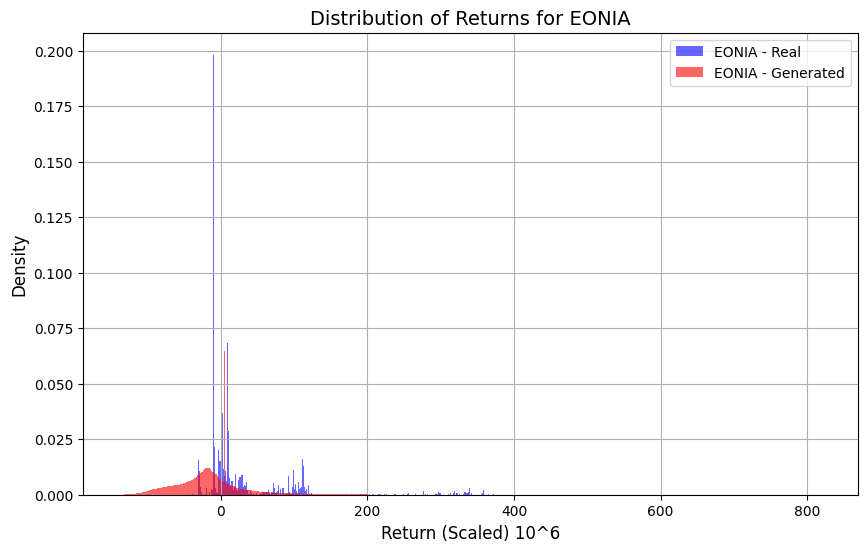

Variance of Real Data: 0.000000
Variance of Generated Data: 0.000000
✅ Generated Data Shows Reasonable Variance


Mean Pairwise Distance (Real): 0.001171
Mean Pairwise Distance (Generated): 0.000515
⚠️ Warning: Potential Mode Collapse - Samples are too similar


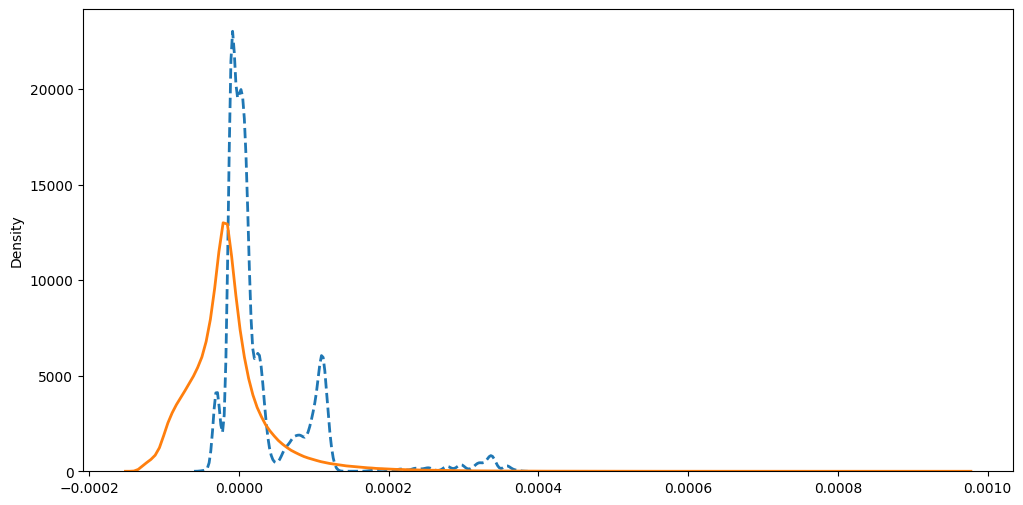

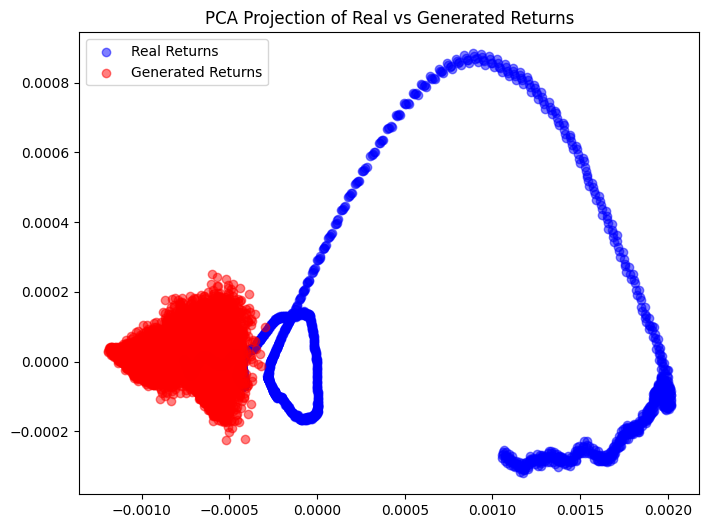

C:\Users\nicka\AppData\Local\Temp\ipykernel_2828\3665352069.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Assets', fontsize=12)


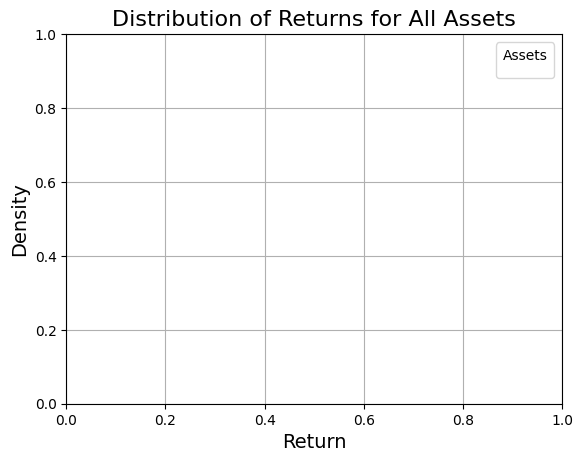

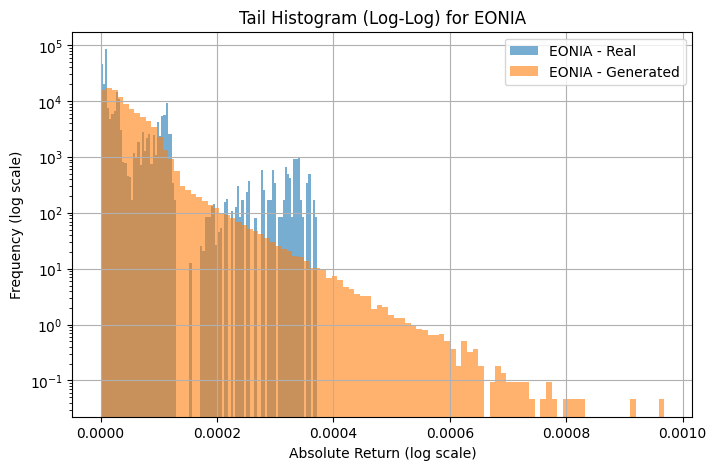

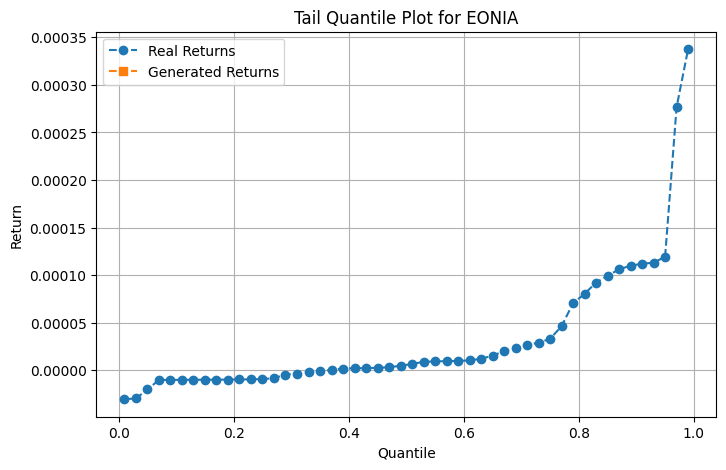

In [9]:
precomputed_rolling_returns = {asset: create_rolling_empirical(returns_df[asset].values) for asset in returns_df.columns}

# Call functions using precomputed returns
plot_histogram_distributions(returns_df, precomputed_rolling_returns)
plot_distributions_with_mode_collapse_check(returns_df, precomputed_rolling_returns)
extreme_value_analysis(returns_df, precomputed_rolling_returns)